# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 72339 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)


  0% (    0 of 72339) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   10 of 72339) |             | Elapsed Time: 0:00:25 ETA: 2 days, 3:32:16

  0% (   27 of 72339) |                    | Elapsed Time: 0:00:25 ETA: 19:14:09

  0% (   44 of 72339) |                    | Elapsed Time: 0:00:26 ETA: 11:53:38

  0% (   61 of 72339) |                     | Elapsed Time: 0:00:26 ETA: 8:38:51

  0% (   78 of 72339) |                     | Elapsed Time: 0:00:26 ETA: 0:14:36

  0% (   96 of 72339) |                     | Elapsed Time: 0:00:26 ETA: 0:14:42

  0% (  114 of 72339) |                     | Elapsed Time: 0:00:26 ETA: 0:14:37

  0% (  131 of 72339) |                     | Elapsed Time: 0:00:27 ETA: 0:14:55

  0% (  147 of 72339) |                     | Elapsed Time: 0:00:27 ETA: 0:14:47

  0% (  163 of 72339) |                     | Elapsed Time: 0:00:27 ETA: 0:15:01

  0% (  179 of 72339) |                     | Elapsed Time: 0:00:27 ETA: 0:15:23

  0% (  195 of 72339) |                     | Elapsed Time: 0:00:27 ETA: 0:15:34

  0% (  211 of 72339) |                     | Elapsed Time: 0:00:28 ETA: 0:15:36

  0% (  227 of 72339) |                     | Elapsed Time: 0:00:28 ETA: 0:15:42

  0% (  243 of 72339) |                     | Elapsed Time: 0:00:28 ETA: 0:15:43

  0% (  259 of 72339) |                     | Elapsed Time: 0:00:28 ETA: 0:15:45

  0% (  275 of 72339) |                     | Elapsed Time: 0:00:29 ETA: 0:15:45

  0% (  291 of 72339) |                     | Elapsed Time: 0:00:29 ETA: 0:15:42

  0% (  307 of 72339) |                     | Elapsed Time: 0:00:29 ETA: 0:15:39

  0% (  323 of 72339) |                     | Elapsed Time: 0:00:29 ETA: 0:15:34

  0% (  340 of 72339) |                     | Elapsed Time: 0:00:29 ETA: 0:15:26

  0% (  357 of 72339) |                     | Elapsed Time: 0:00:30 ETA: 0:15:30

  0% (  374 of 72339) |                     | Elapsed Time: 0:00:30 ETA: 0:15:19

  0% (  390 of 72339) |                     | Elapsed Time: 0:00:30 ETA: 0:15:20

  0% (  406 of 72339) |                     | Elapsed Time: 0:00:30 ETA: 0:15:26

  0% (  423 of 72339) |                     | Elapsed Time: 0:00:30 ETA: 0:15:15

  0% (  439 of 72339) |                     | Elapsed Time: 0:00:31 ETA: 0:15:23

  0% (  455 of 72339) |                     | Elapsed Time: 0:00:31 ETA: 0:15:21

  0% (  471 of 72339) |                     | Elapsed Time: 0:00:31 ETA: 0:15:25

  0% (  487 of 72339) |                     | Elapsed Time: 0:00:31 ETA: 0:15:26

  0% (  503 of 72339) |                     | Elapsed Time: 0:00:31 ETA: 0:15:26

  0% (  519 of 72339) |                     | Elapsed Time: 0:00:32 ETA: 0:15:27

  0% (  537 of 72339) |                     | Elapsed Time: 0:00:32 ETA: 0:15:15

  0% (  554 of 72339) |                     | Elapsed Time: 0:00:32 ETA: 0:15:01

  0% (  570 of 72339) |                     | Elapsed Time: 0:00:32 ETA: 0:15:04

  0% (  587 of 72339) |                     | Elapsed Time: 0:00:33 ETA: 0:15:03

  0% (  603 of 72339) |                     | Elapsed Time: 0:00:33 ETA: 0:15:09

  0% (  620 of 72339) |                     | Elapsed Time: 0:00:33 ETA: 0:15:14

  0% (  637 of 72339) |                     | Elapsed Time: 0:00:33 ETA: 0:15:16

  0% (  654 of 72339) |                     | Elapsed Time: 0:00:33 ETA: 0:15:06

  0% (  669 of 72339) |                     | Elapsed Time: 0:00:34 ETA: 0:15:20

  0% (  686 of 72339) |                     | Elapsed Time: 0:00:34 ETA: 0:15:13

  0% (  703 of 72339) |                     | Elapsed Time: 0:00:34 ETA: 0:15:14

  0% (  719 of 72339) |                     | Elapsed Time: 0:00:34 ETA: 0:15:14

  1% (  735 of 72339) |                     | Elapsed Time: 0:00:34 ETA: 0:15:09

  1% (  751 of 72339) |                     | Elapsed Time: 0:00:35 ETA: 0:15:08

  1% (  768 of 72339) |                     | Elapsed Time: 0:00:35 ETA: 0:15:10

  1% (  786 of 72339) |                     | Elapsed Time: 0:00:35 ETA: 0:15:05

  1% (  802 of 72339) |                     | Elapsed Time: 0:00:35 ETA: 0:15:07

  1% (  819 of 72339) |                     | Elapsed Time: 0:00:35 ETA: 0:15:00

  1% (  836 of 72339) |                     | Elapsed Time: 0:00:36 ETA: 0:14:58

  1% (  854 of 72339) |                     | Elapsed Time: 0:00:36 ETA: 0:14:55

  1% (  872 of 72339) |                     | Elapsed Time: 0:00:36 ETA: 0:14:49

  1% (  888 of 72339) |                     | Elapsed Time: 0:00:36 ETA: 0:14:55

  1% (  905 of 72339) |                     | Elapsed Time: 0:00:37 ETA: 0:14:48

  1% (  921 of 72339) |                     | Elapsed Time: 0:00:37 ETA: 0:14:52

  1% (  938 of 72339) |                     | Elapsed Time: 0:00:37 ETA: 0:14:55

  1% (  955 of 72339) |                     | Elapsed Time: 0:00:37 ETA: 0:15:00

  1% (  973 of 72339) |                     | Elapsed Time: 0:00:37 ETA: 0:14:52

  1% (  990 of 72339) |                     | Elapsed Time: 0:00:38 ETA: 0:14:46

  1% ( 1007 of 72339) |                     | Elapsed Time: 0:00:38 ETA: 0:14:46

  1% ( 1023 of 72339) |                     | Elapsed Time: 0:00:38 ETA: 0:14:46

  1% ( 1041 of 72339) |                     | Elapsed Time: 0:00:38 ETA: 0:14:42

  1% ( 1059 of 72339) |                     | Elapsed Time: 0:00:38 ETA: 0:14:43

  1% ( 1075 of 72339) |                     | Elapsed Time: 0:00:39 ETA: 0:14:45

  1% ( 1093 of 72339) |                     | Elapsed Time: 0:00:39 ETA: 0:14:39

  1% ( 1111 of 72339) |                     | Elapsed Time: 0:00:39 ETA: 0:14:34

  1% ( 1129 of 72339) |                     | Elapsed Time: 0:00:39 ETA: 0:14:35

  1% ( 1147 of 72339) |                     | Elapsed Time: 0:00:40 ETA: 0:14:31

  1% ( 1164 of 72339) |                     | Elapsed Time: 0:00:40 ETA: 0:14:33

  1% ( 1182 of 72339) |                     | Elapsed Time: 0:00:40 ETA: 0:14:36

  1% ( 1198 of 72339) |                     | Elapsed Time: 0:00:40 ETA: 0:14:39

  1% ( 1214 of 72339) |                     | Elapsed Time: 0:00:40 ETA: 0:14:44

  1% ( 1232 of 72339) |                     | Elapsed Time: 0:00:41 ETA: 0:14:39

  1% ( 1250 of 72339) |                     | Elapsed Time: 0:00:41 ETA: 0:14:33

  1% ( 1267 of 72339) |                     | Elapsed Time: 0:00:41 ETA: 0:14:40

  1% ( 1284 of 72339) |                     | Elapsed Time: 0:00:41 ETA: 0:14:40

  1% ( 1302 of 72339) |                     | Elapsed Time: 0:00:41 ETA: 0:14:34

  1% ( 1320 of 72339) |                     | Elapsed Time: 0:00:42 ETA: 0:14:35

  1% ( 1338 of 72339) |                     | Elapsed Time: 0:00:42 ETA: 0:14:28

  1% ( 1356 of 72339) |                     | Elapsed Time: 0:00:42 ETA: 0:14:20

  1% ( 1373 of 72339) |                     | Elapsed Time: 0:00:42 ETA: 0:14:18

  1% ( 1391 of 72339) |                     | Elapsed Time: 0:00:43 ETA: 0:14:15

  1% ( 1409 of 72339) |                     | Elapsed Time: 0:00:43 ETA: 0:14:20

  1% ( 1426 of 72339) |                     | Elapsed Time: 0:00:43 ETA: 0:14:29

  1% ( 1443 of 72339) |                     | Elapsed Time: 0:00:43 ETA: 0:14:35

  2% ( 1460 of 72339) |                     | Elapsed Time: 0:00:43 ETA: 0:14:46

  2% ( 1476 of 72339) |                     | Elapsed Time: 0:00:44 ETA: 0:15:07

  2% ( 1493 of 72339) |                     | Elapsed Time: 0:00:44 ETA: 0:15:13

  2% ( 1511 of 72339) |                     | Elapsed Time: 0:00:44 ETA: 0:14:59

  2% ( 1529 of 72339) |                     | Elapsed Time: 0:00:44 ETA: 0:14:37

  2% ( 1547 of 72339) |                     | Elapsed Time: 0:00:44 ETA: 0:14:12

  2% ( 1565 of 72339) |                     | Elapsed Time: 0:00:45 ETA: 0:14:08

  2% ( 1583 of 72339) |                     | Elapsed Time: 0:00:45 ETA: 0:14:01

  2% ( 1601 of 72339) |                     | Elapsed Time: 0:00:45 ETA: 0:14:01

  2% ( 1618 of 72339) |                     | Elapsed Time: 0:00:45 ETA: 0:14:06

  2% ( 1636 of 72339) |                     | Elapsed Time: 0:00:46 ETA: 0:14:00

  2% ( 1654 of 72339) |                     | Elapsed Time: 0:00:46 ETA: 0:13:56

  2% ( 1672 of 72339) |                     | Elapsed Time: 0:00:46 ETA: 0:13:54

  2% ( 1689 of 72339) |                     | Elapsed Time: 0:00:46 ETA: 0:13:54

  2% ( 1706 of 72339) |                     | Elapsed Time: 0:00:46 ETA: 0:14:07

  2% ( 1723 of 72339) |                     | Elapsed Time: 0:00:47 ETA: 0:14:18

  2% ( 1740 of 72339) |                     | Elapsed Time: 0:00:47 ETA: 0:14:30

  2% ( 1758 of 72339) |                     | Elapsed Time: 0:00:47 ETA: 0:14:33

  2% ( 1776 of 72339) |                     | Elapsed Time: 0:00:47 ETA: 0:14:31

  2% ( 1794 of 72339) |                     | Elapsed Time: 0:00:47 ETA: 0:14:25

  2% ( 1818 of 72339) |                     | Elapsed Time: 0:00:48 ETA: 0:14:14

  2% ( 1835 of 72339) |                     | Elapsed Time: 0:00:48 ETA: 0:14:10

  2% ( 1853 of 72339) |                     | Elapsed Time: 0:00:48 ETA: 0:14:00

  2% ( 1871 of 72339) |                     | Elapsed Time: 0:00:48 ETA: 0:13:54

  2% ( 1889 of 72339) |                     | Elapsed Time: 0:00:49 ETA: 0:13:59

  2% ( 1907 of 72339) |                     | Elapsed Time: 0:00:49 ETA: 0:13:58

  2% ( 1925 of 72339) |                     | Elapsed Time: 0:00:49 ETA: 0:14:05

  2% ( 1943 of 72339) |                     | Elapsed Time: 0:00:49 ETA: 0:14:07

  2% ( 1961 of 72339) |                     | Elapsed Time: 0:00:49 ETA: 0:14:04

  2% ( 1979 of 72339) |                     | Elapsed Time: 0:00:50 ETA: 0:14:07

  2% ( 1996 of 72339) |                     | Elapsed Time: 0:00:50 ETA: 0:14:08

  2% ( 2012 of 72339) |                     | Elapsed Time: 0:00:50 ETA: 0:14:26

  2% ( 2029 of 72339) |                     | Elapsed Time: 0:00:50 ETA: 0:14:39

  2% ( 2045 of 72339) |                     | Elapsed Time: 0:00:51 ETA: 0:14:49

  2% ( 2060 of 72339) |                     | Elapsed Time: 0:00:51 ETA: 0:15:29

  2% ( 2075 of 72339) |                     | Elapsed Time: 0:00:51 ETA: 0:15:47

  2% ( 2090 of 72339) |                     | Elapsed Time: 0:00:51 ETA: 0:16:22

  2% ( 2105 of 72339) |                     | Elapsed Time: 0:00:51 ETA: 0:16:35

  2% ( 2113 of 72339) |                     | Elapsed Time: 0:00:51 ETA: 0:16:47

  2% ( 2125 of 72339) |                     | Elapsed Time: 0:00:52 ETA: 0:32:03

  2% ( 2139 of 72339) |                     | Elapsed Time: 0:00:53 ETA: 0:32:34

  2% ( 2153 of 72339) |                     | Elapsed Time: 0:00:53 ETA: 0:33:01

  2% ( 2167 of 72339) |                     | Elapsed Time: 0:00:53 ETA: 0:33:32

  3% ( 2181 of 72339) |                     | Elapsed Time: 0:00:53 ETA: 0:17:54

  3% ( 2195 of 72339) |                     | Elapsed Time: 0:00:54 ETA: 0:18:03

  3% ( 2209 of 72339) |                     | Elapsed Time: 0:00:54 ETA: 0:18:06

  3% ( 2223 of 72339) |                     | Elapsed Time: 0:00:54 ETA: 0:18:06

  3% ( 2237 of 72339) |                     | Elapsed Time: 0:00:54 ETA: 0:18:12

  3% ( 2251 of 72339) |                     | Elapsed Time: 0:00:54 ETA: 0:18:11

  3% ( 2265 of 72339) |                     | Elapsed Time: 0:00:55 ETA: 0:18:05

  3% ( 2279 of 72339) |                     | Elapsed Time: 0:00:55 ETA: 0:17:58

  3% ( 2293 of 72339) |                     | Elapsed Time: 0:00:55 ETA: 0:17:46

  3% ( 2307 of 72339) |                     | Elapsed Time: 0:00:55 ETA: 0:17:42

  3% ( 2321 of 72339) |                     | Elapsed Time: 0:00:56 ETA: 0:17:35

  3% ( 2335 of 72339) |                     | Elapsed Time: 0:00:56 ETA: 0:17:38

  3% ( 2349 of 72339) |                     | Elapsed Time: 0:00:56 ETA: 0:17:35

  3% ( 2363 of 72339) |                     | Elapsed Time: 0:00:56 ETA: 0:17:27

  3% ( 2377 of 72339) |                     | Elapsed Time: 0:00:56 ETA: 0:17:23

  3% ( 2391 of 72339) |                     | Elapsed Time: 0:00:57 ETA: 0:17:20

  3% ( 2405 of 72339) |                     | Elapsed Time: 0:00:57 ETA: 0:17:13

  3% ( 2420 of 72339) |                     | Elapsed Time: 0:00:57 ETA: 0:17:08

  3% ( 2435 of 72339) |                     | Elapsed Time: 0:00:57 ETA: 0:16:58

  3% ( 2449 of 72339) |                     | Elapsed Time: 0:00:57 ETA: 0:16:56

  3% ( 2463 of 72339) |                     | Elapsed Time: 0:00:58 ETA: 0:16:55

  3% ( 2478 of 72339) |                     | Elapsed Time: 0:00:58 ETA: 0:16:51

  3% ( 2492 of 72339) |                     | Elapsed Time: 0:00:58 ETA: 0:17:07

  3% ( 2506 of 72339) |                     | Elapsed Time: 0:00:58 ETA: 0:17:05

  3% ( 2520 of 72339) |                     | Elapsed Time: 0:00:58 ETA: 0:17:08

  3% ( 2534 of 72339) |                     | Elapsed Time: 0:00:59 ETA: 0:17:09

  3% ( 2548 of 72339) |                     | Elapsed Time: 0:00:59 ETA: 0:17:14

  3% ( 2562 of 72339) |                     | Elapsed Time: 0:00:59 ETA: 0:17:19

  3% ( 2577 of 72339) |                     | Elapsed Time: 0:00:59 ETA: 0:17:09

  3% ( 2591 of 72339) |                     | Elapsed Time: 0:00:59 ETA: 0:17:08

  3% ( 2605 of 72339) |                     | Elapsed Time: 0:01:00 ETA: 0:17:11

  3% ( 2619 of 72339) |                     | Elapsed Time: 0:01:00 ETA: 0:17:09

  3% ( 2633 of 72339) |                     | Elapsed Time: 0:01:00 ETA: 0:17:16

  3% ( 2647 of 72339) |                     | Elapsed Time: 0:01:00 ETA: 0:17:22

  3% ( 2661 of 72339) |                     | Elapsed Time: 0:01:01 ETA: 0:17:17

  3% ( 2675 of 72339) |                     | Elapsed Time: 0:01:01 ETA: 0:17:11

  3% ( 2689 of 72339) |                     | Elapsed Time: 0:01:01 ETA: 0:17:08

  3% ( 2703 of 72339) |                     | Elapsed Time: 0:01:01 ETA: 0:17:07

  3% ( 2720 of 72339) |                     | Elapsed Time: 0:01:01 ETA: 0:17:11

  3% ( 2734 of 72339) |                     | Elapsed Time: 0:01:02 ETA: 0:17:14

  3% ( 2749 of 72339) |                     | Elapsed Time: 0:01:02 ETA: 0:17:19

  3% ( 2763 of 72339) |                     | Elapsed Time: 0:01:02 ETA: 0:17:13

  3% ( 2777 of 72339) |                     | Elapsed Time: 0:01:02 ETA: 0:17:06

  3% ( 2792 of 72339) |                     | Elapsed Time: 0:01:02 ETA: 0:16:53

  3% ( 2809 of 72339) |                     | Elapsed Time: 0:01:03 ETA: 0:16:13

  3% ( 2823 of 72339) |                     | Elapsed Time: 0:01:03 ETA: 0:16:22

  3% ( 2837 of 72339) |                     | Elapsed Time: 0:01:03 ETA: 0:16:29

  3% ( 2851 of 72339) |                     | Elapsed Time: 0:01:03 ETA: 0:16:32

  3% ( 2865 of 72339) |                     | Elapsed Time: 0:01:04 ETA: 0:17:22

  3% ( 2881 of 72339) |                     | Elapsed Time: 0:01:04 ETA: 0:17:05

  4% ( 2897 of 72339) |                     | Elapsed Time: 0:01:04 ETA: 0:16:36

  4% ( 2913 of 72339) |                     | Elapsed Time: 0:01:04 ETA: 0:16:10

  4% ( 2929 of 72339) |                     | Elapsed Time: 0:01:04 ETA: 0:15:54

  4% ( 2944 of 72339) |                     | Elapsed Time: 0:01:05 ETA: 0:15:51

  4% ( 2958 of 72339) |                     | Elapsed Time: 0:01:05 ETA: 0:16:08

  4% ( 2975 of 72339) |                     | Elapsed Time: 0:01:05 ETA: 0:15:54

  4% ( 2991 of 72339) |                     | Elapsed Time: 0:01:05 ETA: 0:15:43

  4% ( 3007 of 72339) |                     | Elapsed Time: 0:01:05 ETA: 0:15:24

  4% ( 3024 of 72339) |                     | Elapsed Time: 0:01:06 ETA: 0:14:41

  4% ( 3040 of 72339) |                     | Elapsed Time: 0:01:06 ETA: 0:14:51

  4% ( 3056 of 72339) |                     | Elapsed Time: 0:01:06 ETA: 0:14:53

  4% ( 3072 of 72339) |                     | Elapsed Time: 0:01:06 ETA: 0:14:55

  4% ( 3089 of 72339) |                     | Elapsed Time: 0:01:06 ETA: 0:15:00

  4% ( 3105 of 72339) |                     | Elapsed Time: 0:01:07 ETA: 0:14:59

  4% ( 3121 of 72339) |                     | Elapsed Time: 0:01:07 ETA: 0:14:56

  4% ( 3137 of 72339) |                     | Elapsed Time: 0:01:07 ETA: 0:15:02

  4% ( 3153 of 72339) |                     | Elapsed Time: 0:01:07 ETA: 0:15:18

  4% ( 3169 of 72339) |                     | Elapsed Time: 0:01:08 ETA: 0:15:22

  4% ( 3186 of 72339) |                     | Elapsed Time: 0:01:08 ETA: 0:15:14

  4% ( 3203 of 72339) |                     | Elapsed Time: 0:01:08 ETA: 0:14:57

  4% ( 3220 of 72339) |                     | Elapsed Time: 0:01:08 ETA: 0:14:46

  4% ( 3235 of 72339) |                     | Elapsed Time: 0:01:08 ETA: 0:14:53

  4% ( 3251 of 72339) |                     | Elapsed Time: 0:01:09 ETA: 0:14:54

  4% ( 3267 of 72339) |                     | Elapsed Time: 0:01:09 ETA: 0:14:53

  4% ( 3284 of 72339) |                     | Elapsed Time: 0:01:09 ETA: 0:15:01

  4% ( 3301 of 72339) |                     | Elapsed Time: 0:01:09 ETA: 0:14:38

  4% ( 3319 of 72339) |                     | Elapsed Time: 0:01:09 ETA: 0:14:32

  4% ( 3335 of 72339) |                     | Elapsed Time: 0:01:10 ETA: 0:14:28

  4% ( 3351 of 72339) |                     | Elapsed Time: 0:01:10 ETA: 0:14:29

  4% ( 3367 of 72339) |                     | Elapsed Time: 0:01:10 ETA: 0:14:35

  4% ( 3383 of 72339) |                     | Elapsed Time: 0:01:10 ETA: 0:14:38

  4% ( 3399 of 72339) |                     | Elapsed Time: 0:01:10 ETA: 0:14:45

  4% ( 3415 of 72339) |                     | Elapsed Time: 0:01:11 ETA: 0:14:45

  4% ( 3431 of 72339) |                     | Elapsed Time: 0:01:11 ETA: 0:14:46

  4% ( 3447 of 72339) |#                    | Elapsed Time: 0:01:11 ETA: 0:14:47

  4% ( 3463 of 72339) |#                    | Elapsed Time: 0:01:11 ETA: 0:14:43

  4% ( 3480 of 72339) |#                    | Elapsed Time: 0:01:12 ETA: 0:14:37

  4% ( 3496 of 72339) |#                    | Elapsed Time: 0:01:12 ETA: 0:14:36

  4% ( 3512 of 72339) |#                    | Elapsed Time: 0:01:12 ETA: 0:14:37

  4% ( 3529 of 72339) |#                    | Elapsed Time: 0:01:12 ETA: 0:14:34

  4% ( 3546 of 72339) |#                    | Elapsed Time: 0:01:12 ETA: 0:14:29

  4% ( 3563 of 72339) |#                    | Elapsed Time: 0:01:13 ETA: 0:14:28

  4% ( 3587 of 72339) |#                    | Elapsed Time: 0:01:13 ETA: 0:14:22

  4% ( 3603 of 72339) |#                    | Elapsed Time: 0:01:13 ETA: 0:14:22

  5% ( 3626 of 72339) |#                    | Elapsed Time: 0:01:13 ETA: 0:14:18

  5% ( 3643 of 72339) |#                    | Elapsed Time: 0:01:14 ETA: 0:14:20

  5% ( 3662 of 72339) |#                    | Elapsed Time: 0:01:14 ETA: 0:13:59

  5% ( 3681 of 72339) |#                    | Elapsed Time: 0:01:14 ETA: 0:13:39

  5% ( 3699 of 72339) |#                    | Elapsed Time: 0:01:14 ETA: 0:13:27

  5% ( 3717 of 72339) |#                    | Elapsed Time: 0:01:14 ETA: 0:13:15

  5% ( 3733 of 72339) |#                    | Elapsed Time: 0:01:15 ETA: 0:13:26

  5% ( 3749 of 72339) |#                    | Elapsed Time: 0:01:15 ETA: 0:13:57

  5% ( 3765 of 72339) |#                    | Elapsed Time: 0:01:15 ETA: 0:14:21

  5% ( 3781 of 72339) |#                    | Elapsed Time: 0:01:15 ETA: 0:14:47

  5% ( 3797 of 72339) |#                    | Elapsed Time: 0:01:15 ETA: 0:14:55

  5% ( 3813 of 72339) |#                    | Elapsed Time: 0:01:16 ETA: 0:14:46

  5% ( 3831 of 72339) |#                    | Elapsed Time: 0:01:16 ETA: 0:14:31

  5% ( 3848 of 72339) |#                    | Elapsed Time: 0:01:16 ETA: 0:14:26

  5% ( 3864 of 72339) |#                    | Elapsed Time: 0:01:16 ETA: 0:14:22

  5% ( 3880 of 72339) |#                    | Elapsed Time: 0:01:17 ETA: 0:14:24

  5% ( 3896 of 72339) |#                    | Elapsed Time: 0:01:17 ETA: 0:14:28

  5% ( 3913 of 72339) |#                    | Elapsed Time: 0:01:17 ETA: 0:14:29

  5% ( 3929 of 72339) |#                    | Elapsed Time: 0:01:17 ETA: 0:14:35

  5% ( 3945 of 72339) |#                    | Elapsed Time: 0:01:17 ETA: 0:14:31

  5% ( 3961 of 72339) |#                    | Elapsed Time: 0:01:18 ETA: 0:14:28

  5% ( 3978 of 72339) |#                    | Elapsed Time: 0:01:18 ETA: 0:14:23

  5% ( 3994 of 72339) |#                    | Elapsed Time: 0:01:18 ETA: 0:14:30

  5% ( 4018 of 72339) |#                    | Elapsed Time: 0:01:18 ETA: 0:14:24

  5% ( 4035 of 72339) |#                    | Elapsed Time: 0:01:18 ETA: 0:14:24

  5% ( 4052 of 72339) |#                    | Elapsed Time: 0:01:19 ETA: 0:14:24

  5% ( 4070 of 72339) |#                    | Elapsed Time: 0:01:19 ETA: 0:14:13

  5% ( 4087 of 72339) |#                    | Elapsed Time: 0:01:19 ETA: 0:14:13

  5% ( 4104 of 72339) |#                    | Elapsed Time: 0:01:19 ETA: 0:14:11

  5% ( 4120 of 72339) |#                    | Elapsed Time: 0:01:20 ETA: 0:14:14

  5% ( 4137 of 72339) |#                    | Elapsed Time: 0:01:20 ETA: 0:14:16

  5% ( 4153 of 72339) |#                    | Elapsed Time: 0:01:20 ETA: 0:14:18

  5% ( 4171 of 72339) |#                    | Elapsed Time: 0:01:20 ETA: 0:14:14

  5% ( 4187 of 72339) |#                    | Elapsed Time: 0:01:20 ETA: 0:14:13

  5% ( 4203 of 72339) |#                    | Elapsed Time: 0:01:21 ETA: 0:14:15

  5% ( 4219 of 72339) |#                    | Elapsed Time: 0:01:21 ETA: 0:14:16

  5% ( 4235 of 72339) |#                    | Elapsed Time: 0:01:21 ETA: 0:14:24

  5% ( 4252 of 72339) |#                    | Elapsed Time: 0:01:21 ETA: 0:14:23

  5% ( 4270 of 72339) |#                    | Elapsed Time: 0:01:21 ETA: 0:14:15

  5% ( 4288 of 72339) |#                    | Elapsed Time: 0:01:22 ETA: 0:14:08

  5% ( 4306 of 72339) |#                    | Elapsed Time: 0:01:22 ETA: 0:14:01

  5% ( 4330 of 72339) |#                    | Elapsed Time: 0:01:22 ETA: 0:14:06

  6% ( 4348 of 72339) |#                    | Elapsed Time: 0:01:22 ETA: 0:14:08

  6% ( 4365 of 72339) |#                    | Elapsed Time: 0:01:23 ETA: 0:14:08

  6% ( 4382 of 72339) |#                    | Elapsed Time: 0:01:23 ETA: 0:14:08

  6% ( 4399 of 72339) |#                    | Elapsed Time: 0:01:23 ETA: 0:14:02

  6% ( 4417 of 72339) |#                    | Elapsed Time: 0:01:23 ETA: 0:13:59

  6% ( 4433 of 72339) |#                    | Elapsed Time: 0:01:23 ETA: 0:14:04

  6% ( 4451 of 72339) |#                    | Elapsed Time: 0:01:24 ETA: 0:13:56

  6% ( 4469 of 72339) |#                    | Elapsed Time: 0:01:24 ETA: 0:13:49

  6% ( 4487 of 72339) |#                    | Elapsed Time: 0:01:24 ETA: 0:13:46

  6% ( 4505 of 72339) |#                    | Elapsed Time: 0:01:24 ETA: 0:13:36

  6% ( 4522 of 72339) |#                    | Elapsed Time: 0:01:25 ETA: 0:13:32

  6% ( 4540 of 72339) |#                    | Elapsed Time: 0:01:25 ETA: 0:13:36

  6% ( 4558 of 72339) |#                    | Elapsed Time: 0:01:25 ETA: 0:13:39

  6% ( 4574 of 72339) |#                    | Elapsed Time: 0:01:25 ETA: 0:13:44

  6% ( 4591 of 72339) |#                    | Elapsed Time: 0:01:25 ETA: 0:13:51

  6% ( 4608 of 72339) |#                    | Elapsed Time: 0:01:26 ETA: 0:13:57

  6% ( 4624 of 72339) |#                    | Elapsed Time: 0:01:26 ETA: 0:14:04

  6% ( 4640 of 72339) |#                    | Elapsed Time: 0:01:26 ETA: 0:14:12

  6% ( 4657 of 72339) |#                    | Elapsed Time: 0:01:26 ETA: 0:14:11

  6% ( 4674 of 72339) |#                    | Elapsed Time: 0:01:26 ETA: 0:14:12

  6% ( 4692 of 72339) |#                    | Elapsed Time: 0:01:27 ETA: 0:14:10

  6% ( 4707 of 72339) |#                    | Elapsed Time: 0:01:27 ETA: 0:14:25

  6% ( 4723 of 72339) |#                    | Elapsed Time: 0:01:27 ETA: 0:14:25

  6% ( 4740 of 72339) |#                    | Elapsed Time: 0:01:27 ETA: 0:14:23

  6% ( 4756 of 72339) |#                    | Elapsed Time: 0:01:27 ETA: 0:14:29

  6% ( 4774 of 72339) |#                    | Elapsed Time: 0:01:28 ETA: 0:14:22

  6% ( 4792 of 72339) |#                    | Elapsed Time: 0:01:28 ETA: 0:13:56

  6% ( 4808 of 72339) |#                    | Elapsed Time: 0:01:28 ETA: 0:13:53

  6% ( 4826 of 72339) |#                    | Elapsed Time: 0:01:28 ETA: 0:13:49

  6% ( 4842 of 72339) |#                    | Elapsed Time: 0:01:29 ETA: 0:13:56

  6% ( 4860 of 72339) |#                    | Elapsed Time: 0:01:29 ETA: 0:13:58

  6% ( 4877 of 72339) |#                    | Elapsed Time: 0:01:29 ETA: 0:13:57

  6% ( 4895 of 72339) |#                    | Elapsed Time: 0:01:29 ETA: 0:13:55

  6% ( 4912 of 72339) |#                    | Elapsed Time: 0:01:29 ETA: 0:13:53

  6% ( 4928 of 72339) |#                    | Elapsed Time: 0:01:30 ETA: 0:14:04

  6% ( 4944 of 72339) |#                    | Elapsed Time: 0:01:30 ETA: 0:14:18

  6% ( 4960 of 72339) |#                    | Elapsed Time: 0:01:30 ETA: 0:14:28

  6% ( 4976 of 72339) |#                    | Elapsed Time: 0:01:30 ETA: 0:14:37

  6% ( 4992 of 72339) |#                    | Elapsed Time: 0:01:30 ETA: 0:14:43

  6% ( 5008 of 72339) |#                    | Elapsed Time: 0:01:31 ETA: 0:14:38

  6% ( 5024 of 72339) |#                    | Elapsed Time: 0:01:31 ETA: 0:14:46

  6% ( 5040 of 72339) |#                    | Elapsed Time: 0:01:31 ETA: 0:14:38

  6% ( 5056 of 72339) |#                    | Elapsed Time: 0:01:31 ETA: 0:14:34

  7% ( 5072 of 72339) |#                    | Elapsed Time: 0:01:31 ETA: 0:14:38

  7% ( 5088 of 72339) |#                    | Elapsed Time: 0:01:32 ETA: 0:14:40

  7% ( 5104 of 72339) |#                    | Elapsed Time: 0:01:32 ETA: 0:14:33

  7% ( 5120 of 72339) |#                    | Elapsed Time: 0:01:32 ETA: 0:14:32

  7% ( 5138 of 72339) |#                    | Elapsed Time: 0:01:32 ETA: 0:14:24

  7% ( 5156 of 72339) |#                    | Elapsed Time: 0:01:33 ETA: 0:14:04

  7% ( 5172 of 72339) |#                    | Elapsed Time: 0:01:33 ETA: 0:14:07

  7% ( 5187 of 72339) |#                    | Elapsed Time: 0:01:33 ETA: 0:14:15

  7% ( 5203 of 72339) |#                    | Elapsed Time: 0:01:33 ETA: 0:14:38

  7% ( 5219 of 72339) |#                    | Elapsed Time: 0:01:33 ETA: 0:15:06

  7% ( 5234 of 72339) |#                    | Elapsed Time: 0:01:34 ETA: 0:15:43

  7% ( 5250 of 72339) |#                    | Elapsed Time: 0:01:34 ETA: 0:15:59

  7% ( 5266 of 72339) |#                    | Elapsed Time: 0:01:34 ETA: 0:15:43

  7% ( 5284 of 72339) |#                    | Elapsed Time: 0:01:34 ETA: 0:15:03

  7% ( 5302 of 72339) |#                    | Elapsed Time: 0:01:35 ETA: 0:14:32

  7% ( 5320 of 72339) |#                    | Elapsed Time: 0:01:35 ETA: 0:13:49

  7% ( 5338 of 72339) |#                    | Elapsed Time: 0:01:35 ETA: 0:13:11

  7% ( 5355 of 72339) |#                    | Elapsed Time: 0:01:35 ETA: 0:13:11

  7% ( 5370 of 72339) |#                    | Elapsed Time: 0:01:35 ETA: 0:13:45

  7% ( 5384 of 72339) |#                    | Elapsed Time: 0:01:36 ETA: 0:14:20

  7% ( 5400 of 72339) |#                    | Elapsed Time: 0:01:36 ETA: 0:15:04

  7% ( 5416 of 72339) |#                    | Elapsed Time: 0:01:36 ETA: 0:15:51

  7% ( 5433 of 72339) |#                    | Elapsed Time: 0:01:36 ETA: 0:15:53

  7% ( 5449 of 72339) |#                    | Elapsed Time: 0:01:36 ETA: 0:15:48

  7% ( 5465 of 72339) |#                    | Elapsed Time: 0:01:37 ETA: 0:15:43

  7% ( 5481 of 72339) |#                    | Elapsed Time: 0:01:37 ETA: 0:15:45

  7% ( 5496 of 72339) |#                    | Elapsed Time: 0:01:37 ETA: 0:15:42

  7% ( 5512 of 72339) |#                    | Elapsed Time: 0:01:37 ETA: 0:15:41

  7% ( 5526 of 72339) |#                    | Elapsed Time: 0:01:38 ETA: 0:15:46

  7% ( 5534 of 72339) |#                    | Elapsed Time: 0:01:38 ETA: 0:15:47

  7% ( 5544 of 72339) |#                    | Elapsed Time: 0:01:39 ETA: 0:34:28

  7% ( 5558 of 72339) |#                    | Elapsed Time: 0:01:39 ETA: 0:34:58

  7% ( 5572 of 72339) |#                    | Elapsed Time: 0:01:39 ETA: 0:35:47

  7% ( 5586 of 72339) |#                    | Elapsed Time: 0:01:40 ETA: 0:35:55

  7% ( 5600 of 72339) |#                    | Elapsed Time: 0:01:40 ETA: 0:16:29

  7% ( 5614 of 72339) |#                    | Elapsed Time: 0:01:40 ETA: 0:16:30

  7% ( 5628 of 72339) |#                    | Elapsed Time: 0:01:40 ETA: 0:16:29

  7% ( 5642 of 72339) |#                    | Elapsed Time: 0:01:40 ETA: 0:16:29

  7% ( 5656 of 72339) |#                    | Elapsed Time: 0:01:41 ETA: 0:16:28

  7% ( 5670 of 72339) |#                    | Elapsed Time: 0:01:41 ETA: 0:16:25

  7% ( 5684 of 72339) |#                    | Elapsed Time: 0:01:41 ETA: 0:16:17

  7% ( 5698 of 72339) |#                    | Elapsed Time: 0:01:41 ETA: 0:16:17

  7% ( 5712 of 72339) |#                    | Elapsed Time: 0:01:41 ETA: 0:16:16

  7% ( 5726 of 72339) |#                    | Elapsed Time: 0:01:42 ETA: 0:16:17

  7% ( 5740 of 72339) |#                    | Elapsed Time: 0:01:42 ETA: 0:16:16

  7% ( 5754 of 72339) |#                    | Elapsed Time: 0:01:42 ETA: 0:16:18

  7% ( 5770 of 72339) |#                    | Elapsed Time: 0:01:42 ETA: 0:16:00

  7% ( 5784 of 72339) |#                    | Elapsed Time: 0:01:42 ETA: 0:16:08

  8% ( 5798 of 72339) |#                    | Elapsed Time: 0:01:43 ETA: 0:16:12

  8% ( 5812 of 72339) |#                    | Elapsed Time: 0:01:43 ETA: 0:16:11

  8% ( 5826 of 72339) |#                    | Elapsed Time: 0:01:43 ETA: 0:16:37

  8% ( 5840 of 72339) |#                    | Elapsed Time: 0:01:43 ETA: 0:16:17

  8% ( 5857 of 72339) |#                    | Elapsed Time: 0:01:43 ETA: 0:15:43

  8% ( 5873 of 72339) |#                    | Elapsed Time: 0:01:44 ETA: 0:15:19

  8% ( 5889 of 72339) |#                    | Elapsed Time: 0:01:44 ETA: 0:14:57

  8% ( 5904 of 72339) |#                    | Elapsed Time: 0:01:44 ETA: 0:14:45

  8% ( 5917 of 72339) |#                    | Elapsed Time: 0:01:44 ETA: 0:15:15

  8% ( 5931 of 72339) |#                    | Elapsed Time: 0:01:45 ETA: 0:15:58

  8% ( 5945 of 72339) |#                    | Elapsed Time: 0:01:45 ETA: 0:16:29

  8% ( 5960 of 72339) |#                    | Elapsed Time: 0:01:45 ETA: 0:16:49

  8% ( 5974 of 72339) |#                    | Elapsed Time: 0:01:45 ETA: 0:16:38

  8% ( 5989 of 72339) |#                    | Elapsed Time: 0:01:45 ETA: 0:16:16

  8% ( 6002 of 72339) |#                    | Elapsed Time: 0:01:46 ETA: 0:16:19

  8% ( 6015 of 72339) |#                    | Elapsed Time: 0:01:46 ETA: 0:16:45

  8% ( 6029 of 72339) |#                    | Elapsed Time: 0:01:46 ETA: 0:16:50

  8% ( 6044 of 72339) |#                    | Elapsed Time: 0:01:46 ETA: 0:16:29

  8% ( 6060 of 72339) |#                    | Elapsed Time: 0:01:46 ETA: 0:16:05

  8% ( 6076 of 72339) |#                    | Elapsed Time: 0:01:47 ETA: 0:15:08

  8% ( 6092 of 72339) |#                    | Elapsed Time: 0:01:47 ETA: 0:14:37

  8% ( 6108 of 72339) |#                    | Elapsed Time: 0:01:47 ETA: 0:14:22

  8% ( 6122 of 72339) |#                    | Elapsed Time: 0:01:47 ETA: 0:14:51

  8% ( 6140 of 72339) |#                    | Elapsed Time: 0:01:47 ETA: 0:14:35

  8% ( 6158 of 72339) |#                    | Elapsed Time: 0:01:48 ETA: 0:14:19

  8% ( 6185 of 72339) |#                    | Elapsed Time: 0:01:48 ETA: 0:13:34

  8% ( 6203 of 72339) |#                    | Elapsed Time: 0:01:48 ETA: 0:12:58

  8% ( 6221 of 72339) |#                    | Elapsed Time: 0:01:48 ETA: 0:12:57

  8% ( 6239 of 72339) |#                    | Elapsed Time: 0:01:49 ETA: 0:12:57

  8% ( 6256 of 72339) |#                    | Elapsed Time: 0:01:49 ETA: 0:13:13

  8% ( 6272 of 72339) |#                    | Elapsed Time: 0:01:49 ETA: 0:13:34

  8% ( 6288 of 72339) |#                    | Elapsed Time: 0:01:49 ETA: 0:13:53

  8% ( 6304 of 72339) |#                    | Elapsed Time: 0:01:49 ETA: 0:14:15

  8% ( 6320 of 72339) |#                    | Elapsed Time: 0:01:50 ETA: 0:14:34

  8% ( 6338 of 72339) |#                    | Elapsed Time: 0:01:50 ETA: 0:14:35

  8% ( 6354 of 72339) |#                    | Elapsed Time: 0:01:50 ETA: 0:14:36

  8% ( 6370 of 72339) |#                    | Elapsed Time: 0:01:50 ETA: 0:14:36

  8% ( 6386 of 72339) |#                    | Elapsed Time: 0:01:51 ETA: 0:14:31

  8% ( 6402 of 72339) |#                    | Elapsed Time: 0:01:51 ETA: 0:14:46

  8% ( 6418 of 72339) |#                    | Elapsed Time: 0:01:51 ETA: 0:14:50

  8% ( 6433 of 72339) |#                    | Elapsed Time: 0:01:51 ETA: 0:15:01

  8% ( 6449 of 72339) |#                    | Elapsed Time: 0:01:51 ETA: 0:15:07

  8% ( 6465 of 72339) |#                    | Elapsed Time: 0:01:52 ETA: 0:15:01

  8% ( 6481 of 72339) |#                    | Elapsed Time: 0:01:52 ETA: 0:15:00

  8% ( 6497 of 72339) |#                    | Elapsed Time: 0:01:52 ETA: 0:14:56

  9% ( 6513 of 72339) |#                    | Elapsed Time: 0:01:52 ETA: 0:14:55

  9% ( 6529 of 72339) |#                    | Elapsed Time: 0:01:53 ETA: 0:14:56

  9% ( 6544 of 72339) |#                    | Elapsed Time: 0:01:53 ETA: 0:15:02

  9% ( 6560 of 72339) |#                    | Elapsed Time: 0:01:53 ETA: 0:15:01

  9% ( 6576 of 72339) |#                    | Elapsed Time: 0:01:53 ETA: 0:15:01

  9% ( 6592 of 72339) |#                    | Elapsed Time: 0:01:53 ETA: 0:15:00

  9% ( 6608 of 72339) |#                    | Elapsed Time: 0:01:54 ETA: 0:14:48

  9% ( 6624 of 72339) |#                    | Elapsed Time: 0:01:54 ETA: 0:14:40

  9% ( 6640 of 72339) |#                    | Elapsed Time: 0:01:54 ETA: 0:14:31

  9% ( 6656 of 72339) |#                    | Elapsed Time: 0:01:54 ETA: 0:14:29

  9% ( 6672 of 72339) |#                    | Elapsed Time: 0:01:54 ETA: 0:14:28

  9% ( 6688 of 72339) |#                    | Elapsed Time: 0:01:55 ETA: 0:14:35

  9% ( 6704 of 72339) |#                    | Elapsed Time: 0:01:55 ETA: 0:14:34

  9% ( 6720 of 72339) |#                    | Elapsed Time: 0:01:55 ETA: 0:14:33

  9% ( 6736 of 72339) |#                    | Elapsed Time: 0:01:55 ETA: 0:14:34

  9% ( 6752 of 72339) |#                    | Elapsed Time: 0:01:56 ETA: 0:14:34

  9% ( 6770 of 72339) |#                    | Elapsed Time: 0:01:56 ETA: 0:14:10

  9% ( 6786 of 72339) |#                    | Elapsed Time: 0:01:56 ETA: 0:14:09

  9% ( 6802 of 72339) |#                    | Elapsed Time: 0:01:56 ETA: 0:14:07

  9% ( 6818 of 72339) |#                    | Elapsed Time: 0:01:56 ETA: 0:14:03

  9% ( 6834 of 72339) |#                    | Elapsed Time: 0:01:57 ETA: 0:14:08

  9% ( 6850 of 72339) |#                    | Elapsed Time: 0:01:57 ETA: 0:14:39

  9% ( 6868 of 72339) |#                    | Elapsed Time: 0:01:57 ETA: 0:14:02

  9% ( 6886 of 72339) |#                    | Elapsed Time: 0:01:57 ETA: 0:13:41

  9% ( 6904 of 72339) |##                   | Elapsed Time: 0:01:57 ETA: 0:13:26

  9% ( 6922 of 72339) |##                   | Elapsed Time: 0:01:58 ETA: 0:13:03

  9% ( 6939 of 72339) |##                   | Elapsed Time: 0:01:58 ETA: 0:13:01

  9% ( 6957 of 72339) |##                   | Elapsed Time: 0:01:58 ETA: 0:12:57

  9% ( 6975 of 72339) |##                   | Elapsed Time: 0:01:58 ETA: 0:12:55

  9% ( 6993 of 72339) |##                   | Elapsed Time: 0:01:58 ETA: 0:12:46

  9% ( 7012 of 72339) |##                   | Elapsed Time: 0:01:59 ETA: 0:12:25

  9% ( 7031 of 72339) |##                   | Elapsed Time: 0:01:59 ETA: 0:12:19

  9% ( 7049 of 72339) |##                   | Elapsed Time: 0:01:59 ETA: 0:12:21

  9% ( 7067 of 72339) |##                   | Elapsed Time: 0:01:59 ETA: 0:12:28

  9% ( 7085 of 72339) |##                   | Elapsed Time: 0:02:00 ETA: 0:12:40

  9% ( 7103 of 72339) |##                   | Elapsed Time: 0:02:00 ETA: 0:12:46

  9% ( 7121 of 72339) |##                   | Elapsed Time: 0:02:00 ETA: 0:12:50

  9% ( 7139 of 72339) |##                   | Elapsed Time: 0:02:00 ETA: 0:12:56

  9% ( 7157 of 72339) |##                   | Elapsed Time: 0:02:00 ETA: 0:12:57

  9% ( 7175 of 72339) |##                   | Elapsed Time: 0:02:01 ETA: 0:12:59

  9% ( 7190 of 72339) |##                   | Elapsed Time: 0:02:01 ETA: 0:13:31

  9% ( 7206 of 72339) |##                   | Elapsed Time: 0:02:01 ETA: 0:13:57

  9% ( 7222 of 72339) |##                   | Elapsed Time: 0:02:01 ETA: 0:14:19

 10% ( 7242 of 72339) |##                   | Elapsed Time: 0:02:02 ETA: 0:14:37

 10% ( 7258 of 72339) |##                   | Elapsed Time: 0:02:02 ETA: 0:14:42

 10% ( 7274 of 72339) |##                   | Elapsed Time: 0:02:02 ETA: 0:14:38

 10% ( 7286 of 72339) |##                   | Elapsed Time: 0:02:02 ETA: 0:15:18

 10% ( 7302 of 72339) |##                   | Elapsed Time: 0:02:02 ETA: 0:15:15

 10% ( 7318 of 72339) |##                   | Elapsed Time: 0:02:03 ETA: 0:15:14

 10% ( 7334 of 72339) |##                   | Elapsed Time: 0:02:03 ETA: 0:15:14

 10% ( 7350 of 72339) |##                   | Elapsed Time: 0:02:03 ETA: 0:14:58

 10% ( 7366 of 72339) |##                   | Elapsed Time: 0:02:03 ETA: 0:14:19

 10% ( 7382 of 72339) |##                   | Elapsed Time: 0:02:03 ETA: 0:14:12

 10% ( 7398 of 72339) |##                   | Elapsed Time: 0:02:04 ETA: 0:14:11

 10% ( 7414 of 72339) |##                   | Elapsed Time: 0:02:04 ETA: 0:14:07

 10% ( 7430 of 72339) |##                   | Elapsed Time: 0:02:04 ETA: 0:14:08

 10% ( 7446 of 72339) |##                   | Elapsed Time: 0:02:04 ETA: 0:14:06

 10% ( 7462 of 72339) |##                   | Elapsed Time: 0:02:04 ETA: 0:14:05

 10% ( 7478 of 72339) |##                   | Elapsed Time: 0:02:05 ETA: 0:14:08

 10% ( 7494 of 72339) |##                   | Elapsed Time: 0:02:05 ETA: 0:14:07

 10% ( 7510 of 72339) |##                   | Elapsed Time: 0:02:05 ETA: 0:14:07

 10% ( 7526 of 72339) |##                   | Elapsed Time: 0:02:05 ETA: 0:14:10

 10% ( 7542 of 72339) |##                   | Elapsed Time: 0:02:06 ETA: 0:14:12

 10% ( 7558 of 72339) |##                   | Elapsed Time: 0:02:06 ETA: 0:14:13

 10% ( 7574 of 72339) |##                   | Elapsed Time: 0:02:06 ETA: 0:14:16

 10% ( 7590 of 72339) |##                   | Elapsed Time: 0:02:06 ETA: 0:14:22

 10% ( 7606 of 72339) |##                   | Elapsed Time: 0:02:06 ETA: 0:14:19

 10% ( 7622 of 72339) |##                   | Elapsed Time: 0:02:07 ETA: 0:14:19

 10% ( 7638 of 72339) |##                   | Elapsed Time: 0:02:07 ETA: 0:14:17

 10% ( 7654 of 72339) |##                   | Elapsed Time: 0:02:07 ETA: 0:14:20

 10% ( 7670 of 72339) |##                   | Elapsed Time: 0:02:07 ETA: 0:14:17

 10% ( 7686 of 72339) |##                   | Elapsed Time: 0:02:07 ETA: 0:14:15

 10% ( 7702 of 72339) |##                   | Elapsed Time: 0:02:08 ETA: 0:14:13

 10% ( 7718 of 72339) |##                   | Elapsed Time: 0:02:08 ETA: 0:14:11

 10% ( 7734 of 72339) |##                   | Elapsed Time: 0:02:08 ETA: 0:14:06

 10% ( 7750 of 72339) |##                   | Elapsed Time: 0:02:08 ETA: 0:14:02

 10% ( 7766 of 72339) |##                   | Elapsed Time: 0:02:08 ETA: 0:14:03

 10% ( 7782 of 72339) |##                   | Elapsed Time: 0:02:09 ETA: 0:14:01

 10% ( 7798 of 72339) |##                   | Elapsed Time: 0:02:09 ETA: 0:13:59

 10% ( 7814 of 72339) |##                   | Elapsed Time: 0:02:09 ETA: 0:13:54

 10% ( 7830 of 72339) |##                   | Elapsed Time: 0:02:09 ETA: 0:13:56

 10% ( 7846 of 72339) |##                   | Elapsed Time: 0:02:10 ETA: 0:13:56

 10% ( 7863 of 72339) |##                   | Elapsed Time: 0:02:10 ETA: 0:13:50

 10% ( 7879 of 72339) |##                   | Elapsed Time: 0:02:10 ETA: 0:13:50

 10% ( 7895 of 72339) |##                   | Elapsed Time: 0:02:10 ETA: 0:13:48

 10% ( 7911 of 72339) |##                   | Elapsed Time: 0:02:10 ETA: 0:13:46

 10% ( 7927 of 72339) |##                   | Elapsed Time: 0:02:11 ETA: 0:13:44

 10% ( 7943 of 72339) |##                   | Elapsed Time: 0:02:11 ETA: 0:13:51

 11% ( 7959 of 72339) |##                   | Elapsed Time: 0:02:11 ETA: 0:13:49

 11% ( 7975 of 72339) |##                   | Elapsed Time: 0:02:11 ETA: 0:13:49

 11% ( 7991 of 72339) |##                   | Elapsed Time: 0:02:11 ETA: 0:13:49

 11% ( 8007 of 72339) |##                   | Elapsed Time: 0:02:12 ETA: 0:13:47

 11% ( 8023 of 72339) |##                   | Elapsed Time: 0:02:12 ETA: 0:13:44

 11% ( 8039 of 72339) |##                   | Elapsed Time: 0:02:12 ETA: 0:13:51

 11% ( 8055 of 72339) |##                   | Elapsed Time: 0:02:12 ETA: 0:13:53

 11% ( 8071 of 72339) |##                   | Elapsed Time: 0:02:12 ETA: 0:13:53

 11% ( 8087 of 72339) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:54

 11% ( 8103 of 72339) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:49

 11% ( 8119 of 72339) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:49

 11% ( 8139 of 72339) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:46

 11% ( 8155 of 72339) |##                   | Elapsed Time: 0:02:13 ETA: 0:13:47

 11% ( 8170 of 72339) |##                   | Elapsed Time: 0:02:14 ETA: 0:14:01

 11% ( 8186 of 72339) |##                   | Elapsed Time: 0:02:14 ETA: 0:14:01

 11% ( 8202 of 72339) |##                   | Elapsed Time: 0:02:14 ETA: 0:14:04

 11% ( 8218 of 72339) |##                   | Elapsed Time: 0:02:14 ETA: 0:14:08

 11% ( 8234 of 72339) |##                   | Elapsed Time: 0:02:15 ETA: 0:14:08

 11% ( 8250 of 72339) |##                   | Elapsed Time: 0:02:15 ETA: 0:14:11

 11% ( 8266 of 72339) |##                   | Elapsed Time: 0:02:15 ETA: 0:14:10

 11% ( 8282 of 72339) |##                   | Elapsed Time: 0:02:15 ETA: 0:14:08

 11% ( 8298 of 72339) |##                   | Elapsed Time: 0:02:15 ETA: 0:14:11

 11% ( 8314 of 72339) |##                   | Elapsed Time: 0:02:16 ETA: 0:13:58

 11% ( 8330 of 72339) |##                   | Elapsed Time: 0:02:16 ETA: 0:14:00

 11% ( 8346 of 72339) |##                   | Elapsed Time: 0:02:16 ETA: 0:14:00

 11% ( 8362 of 72339) |##                   | Elapsed Time: 0:02:16 ETA: 0:13:51

 11% ( 8378 of 72339) |##                   | Elapsed Time: 0:02:16 ETA: 0:13:48

 11% ( 8394 of 72339) |##                   | Elapsed Time: 0:02:17 ETA: 0:13:44

 11% ( 8411 of 72339) |##                   | Elapsed Time: 0:02:17 ETA: 0:13:45

 11% ( 8427 of 72339) |##                   | Elapsed Time: 0:02:17 ETA: 0:13:43

 11% ( 8443 of 72339) |##                   | Elapsed Time: 0:02:17 ETA: 0:13:41

 11% ( 8460 of 72339) |##                   | Elapsed Time: 0:02:17 ETA: 0:13:37

 11% ( 8476 of 72339) |##                   | Elapsed Time: 0:02:18 ETA: 0:13:32

 11% ( 8492 of 72339) |##                   | Elapsed Time: 0:02:18 ETA: 0:13:36

 11% ( 8508 of 72339) |##                   | Elapsed Time: 0:02:18 ETA: 0:13:40

 11% ( 8524 of 72339) |##                   | Elapsed Time: 0:02:18 ETA: 0:13:48

 11% ( 8540 of 72339) |##                   | Elapsed Time: 0:02:19 ETA: 0:13:56

 11% ( 8556 of 72339) |##                   | Elapsed Time: 0:02:19 ETA: 0:13:59

 11% ( 8572 of 72339) |##                   | Elapsed Time: 0:02:19 ETA: 0:14:03

 11% ( 8588 of 72339) |##                   | Elapsed Time: 0:02:19 ETA: 0:14:00

 11% ( 8604 of 72339) |##                   | Elapsed Time: 0:02:19 ETA: 0:14:00

 11% ( 8620 of 72339) |##                   | Elapsed Time: 0:02:20 ETA: 0:14:02

 11% ( 8636 of 72339) |##                   | Elapsed Time: 0:02:20 ETA: 0:14:06

 11% ( 8652 of 72339) |##                   | Elapsed Time: 0:02:20 ETA: 0:14:06

 11% ( 8668 of 72339) |##                   | Elapsed Time: 0:02:20 ETA: 0:14:06

 12% ( 8684 of 72339) |##                   | Elapsed Time: 0:02:20 ETA: 0:14:04

 12% ( 8700 of 72339) |##                   | Elapsed Time: 0:02:21 ETA: 0:14:00

 12% ( 8716 of 72339) |##                   | Elapsed Time: 0:02:21 ETA: 0:14:00

 12% ( 8732 of 72339) |##                   | Elapsed Time: 0:02:21 ETA: 0:13:59

 12% ( 8748 of 72339) |##                   | Elapsed Time: 0:02:21 ETA: 0:14:04

 12% ( 8764 of 72339) |##                   | Elapsed Time: 0:02:22 ETA: 0:14:04

 12% ( 8780 of 72339) |##                   | Elapsed Time: 0:02:22 ETA: 0:14:03

 12% ( 8796 of 72339) |##                   | Elapsed Time: 0:02:22 ETA: 0:14:02

 12% ( 8812 of 72339) |##                   | Elapsed Time: 0:02:22 ETA: 0:14:03

 12% ( 8828 of 72339) |##                   | Elapsed Time: 0:02:22 ETA: 0:13:59

 12% ( 8844 of 72339) |##                   | Elapsed Time: 0:02:23 ETA: 0:13:59

 12% ( 8860 of 72339) |##                   | Elapsed Time: 0:02:23 ETA: 0:14:03

 12% ( 8876 of 72339) |##                   | Elapsed Time: 0:02:23 ETA: 0:14:03

 12% ( 8892 of 72339) |##                   | Elapsed Time: 0:02:23 ETA: 0:14:03

 12% ( 8908 of 72339) |##                   | Elapsed Time: 0:02:23 ETA: 0:14:01

 12% ( 8924 of 72339) |##                   | Elapsed Time: 0:02:24 ETA: 0:14:01

 12% ( 8940 of 72339) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:55

 12% ( 8956 of 72339) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:50

 12% ( 8972 of 72339) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:46

 12% ( 8988 of 72339) |##                   | Elapsed Time: 0:02:24 ETA: 0:13:48

 12% ( 9004 of 72339) |##                   | Elapsed Time: 0:02:25 ETA: 0:13:48

 12% ( 9020 of 72339) |##                   | Elapsed Time: 0:02:25 ETA: 0:13:48

 12% ( 9043 of 72339) |##                   | Elapsed Time: 0:02:25 ETA: 0:13:53

 12% ( 9059 of 72339) |##                   | Elapsed Time: 0:02:25 ETA: 0:13:53

 12% ( 9075 of 72339) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:51

 12% ( 9091 of 72339) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:55

 12% ( 9107 of 72339) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:57

 12% ( 9123 of 72339) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:55

 12% ( 9139 of 72339) |##                   | Elapsed Time: 0:02:26 ETA: 0:13:53

 12% ( 9155 of 72339) |##                   | Elapsed Time: 0:02:27 ETA: 0:13:55

 12% ( 9172 of 72339) |##                   | Elapsed Time: 0:02:27 ETA: 0:13:39

 12% ( 9189 of 72339) |##                   | Elapsed Time: 0:02:27 ETA: 0:13:28

 12% ( 9206 of 72339) |##                   | Elapsed Time: 0:02:27 ETA: 0:13:18

 12% ( 9224 of 72339) |##                   | Elapsed Time: 0:02:28 ETA: 0:13:00

 12% ( 9242 of 72339) |##                   | Elapsed Time: 0:02:28 ETA: 0:12:49

 12% ( 9259 of 72339) |##                   | Elapsed Time: 0:02:28 ETA: 0:12:51

 12% ( 9275 of 72339) |##                   | Elapsed Time: 0:02:28 ETA: 0:13:03

 12% ( 9291 of 72339) |##                   | Elapsed Time: 0:02:28 ETA: 0:13:06

 12% ( 9308 of 72339) |##                   | Elapsed Time: 0:02:29 ETA: 0:13:09

 12% ( 9326 of 72339) |##                   | Elapsed Time: 0:02:29 ETA: 0:13:15

 12% ( 9344 of 72339) |##                   | Elapsed Time: 0:02:29 ETA: 0:13:00

 12% ( 9361 of 72339) |##                   | Elapsed Time: 0:02:29 ETA: 0:12:55

 12% ( 9377 of 72339) |##                   | Elapsed Time: 0:02:29 ETA: 0:12:58

 12% ( 9394 of 72339) |##                   | Elapsed Time: 0:02:30 ETA: 0:13:11

 13% ( 9412 of 72339) |##                   | Elapsed Time: 0:02:30 ETA: 0:13:04

 13% ( 9430 of 72339) |##                   | Elapsed Time: 0:02:30 ETA: 0:13:00

 13% ( 9448 of 72339) |##                   | Elapsed Time: 0:02:30 ETA: 0:12:44

 13% ( 9466 of 72339) |##                   | Elapsed Time: 0:02:30 ETA: 0:12:29

 13% ( 9483 of 72339) |##                   | Elapsed Time: 0:02:31 ETA: 0:12:26

 13% ( 9501 of 72339) |##                   | Elapsed Time: 0:02:31 ETA: 0:12:24

 13% ( 9518 of 72339) |##                   | Elapsed Time: 0:02:31 ETA: 0:12:32

 13% ( 9535 of 72339) |##                   | Elapsed Time: 0:02:31 ETA: 0:12:40

 13% ( 9553 of 72339) |##                   | Elapsed Time: 0:02:32 ETA: 0:12:32

 13% ( 9571 of 72339) |##                   | Elapsed Time: 0:02:32 ETA: 0:12:33

 13% ( 9589 of 72339) |##                   | Elapsed Time: 0:02:32 ETA: 0:12:34

 13% ( 9607 of 72339) |##                   | Elapsed Time: 0:02:32 ETA: 0:12:25

 13% ( 9625 of 72339) |##                   | Elapsed Time: 0:02:32 ETA: 0:12:18

 13% ( 9643 of 72339) |##                   | Elapsed Time: 0:02:33 ETA: 0:12:17

 13% ( 9661 of 72339) |##                   | Elapsed Time: 0:02:33 ETA: 0:12:15

 13% ( 9679 of 72339) |##                   | Elapsed Time: 0:02:33 ETA: 0:12:16

 13% ( 9697 of 72339) |##                   | Elapsed Time: 0:02:33 ETA: 0:12:19

 13% ( 9714 of 72339) |##                   | Elapsed Time: 0:02:33 ETA: 0:12:29

 13% ( 9731 of 72339) |##                   | Elapsed Time: 0:02:34 ETA: 0:12:41

 13% ( 9748 of 72339) |##                   | Elapsed Time: 0:02:34 ETA: 0:12:50

 13% ( 9756 of 72339) |##                   | Elapsed Time: 0:02:34 ETA: 0:12:55

 13% ( 9768 of 72339) |##                   | Elapsed Time: 0:02:35 ETA: 0:32:43

 13% ( 9783 of 72339) |##                   | Elapsed Time: 0:02:36 ETA: 0:33:42

 13% ( 9799 of 72339) |##                   | Elapsed Time: 0:02:36 ETA: 0:34:10

 13% ( 9815 of 72339) |##                   | Elapsed Time: 0:02:36 ETA: 0:34:42

 13% ( 9831 of 72339) |##                   | Elapsed Time: 0:02:36 ETA: 0:14:00

 13% ( 9847 of 72339) |##                   | Elapsed Time: 0:02:37 ETA: 0:13:57

 13% ( 9863 of 72339) |##                   | Elapsed Time: 0:02:37 ETA: 0:13:46

 13% ( 9879 of 72339) |##                   | Elapsed Time: 0:02:37 ETA: 0:13:47

 13% ( 9895 of 72339) |##                   | Elapsed Time: 0:02:37 ETA: 0:13:52

 13% ( 9911 of 72339) |##                   | Elapsed Time: 0:02:37 ETA: 0:13:56

 13% ( 9927 of 72339) |##                   | Elapsed Time: 0:02:38 ETA: 0:14:02

 13% ( 9947 of 72339) |##                   | Elapsed Time: 0:02:38 ETA: 0:14:12

 13% ( 9963 of 72339) |##                   | Elapsed Time: 0:02:38 ETA: 0:14:13

 13% ( 9980 of 72339) |##                   | Elapsed Time: 0:02:38 ETA: 0:13:55

 13% ( 9996 of 72339) |##                   | Elapsed Time: 0:02:39 ETA: 0:13:47

 13% (10014 of 72339) |##                   | Elapsed Time: 0:02:39 ETA: 0:13:28

 13% (10031 of 72339) |##                   | Elapsed Time: 0:02:39 ETA: 0:13:01

 13% (10049 of 72339) |##                   | Elapsed Time: 0:02:39 ETA: 0:12:46

 13% (10067 of 72339) |##                   | Elapsed Time: 0:02:39 ETA: 0:12:35

 13% (10085 of 72339) |##                   | Elapsed Time: 0:02:40 ETA: 0:12:25

 13% (10103 of 72339) |##                   | Elapsed Time: 0:02:40 ETA: 0:12:14

 13% (10121 of 72339) |##                   | Elapsed Time: 0:02:40 ETA: 0:12:11

 14% (10139 of 72339) |##                   | Elapsed Time: 0:02:40 ETA: 0:12:10

 14% (10157 of 72339) |##                   | Elapsed Time: 0:02:40 ETA: 0:12:02

 14% (10175 of 72339) |##                   | Elapsed Time: 0:02:41 ETA: 0:12:02

 14% (10193 of 72339) |##                   | Elapsed Time: 0:02:41 ETA: 0:12:06

 14% (10211 of 72339) |##                   | Elapsed Time: 0:02:41 ETA: 0:12:03

 14% (10229 of 72339) |##                   | Elapsed Time: 0:02:41 ETA: 0:12:04

 14% (10247 of 72339) |##                   | Elapsed Time: 0:02:41 ETA: 0:12:04

 14% (10265 of 72339) |##                   | Elapsed Time: 0:02:42 ETA: 0:12:01

 14% (10283 of 72339) |##                   | Elapsed Time: 0:02:42 ETA: 0:11:59

 14% (10301 of 72339) |##                   | Elapsed Time: 0:02:42 ETA: 0:12:00

 14% (10319 of 72339) |##                   | Elapsed Time: 0:02:42 ETA: 0:11:59

 14% (10337 of 72339) |###                  | Elapsed Time: 0:02:43 ETA: 0:11:58

 14% (10355 of 72339) |###                  | Elapsed Time: 0:02:43 ETA: 0:11:56

 14% (10373 of 72339) |###                  | Elapsed Time: 0:02:43 ETA: 0:11:58

 14% (10391 of 72339) |###                  | Elapsed Time: 0:02:43 ETA: 0:11:58

 14% (10409 of 72339) |###                  | Elapsed Time: 0:02:43 ETA: 0:11:57

 14% (10427 of 72339) |###                  | Elapsed Time: 0:02:44 ETA: 0:11:56

 14% (10445 of 72339) |###                  | Elapsed Time: 0:02:44 ETA: 0:11:56

 14% (10463 of 72339) |###                  | Elapsed Time: 0:02:44 ETA: 0:11:58

 14% (10481 of 72339) |###                  | Elapsed Time: 0:02:44 ETA: 0:12:04

 14% (10499 of 72339) |###                  | Elapsed Time: 0:02:44 ETA: 0:12:14

 14% (10515 of 72339) |###                  | Elapsed Time: 0:02:45 ETA: 0:12:27

 14% (10533 of 72339) |###                  | Elapsed Time: 0:02:45 ETA: 0:12:33

 14% (10551 of 72339) |###                  | Elapsed Time: 0:02:45 ETA: 0:12:40

 14% (10569 of 72339) |###                  | Elapsed Time: 0:02:45 ETA: 0:12:40

 14% (10587 of 72339) |###                  | Elapsed Time: 0:02:46 ETA: 0:12:35

 14% (10605 of 72339) |###                  | Elapsed Time: 0:02:46 ETA: 0:12:32

 14% (10623 of 72339) |###                  | Elapsed Time: 0:02:46 ETA: 0:12:32

 14% (10641 of 72339) |###                  | Elapsed Time: 0:02:46 ETA: 0:12:34

 14% (10659 of 72339) |###                  | Elapsed Time: 0:02:46 ETA: 0:12:32

 14% (10677 of 72339) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:31

 14% (10695 of 72339) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:32

 14% (10712 of 72339) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:33

 14% (10730 of 72339) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:32

 14% (10748 of 72339) |###                  | Elapsed Time: 0:02:47 ETA: 0:12:30

 14% (10765 of 72339) |###                  | Elapsed Time: 0:02:48 ETA: 0:12:30

 14% (10782 of 72339) |###                  | Elapsed Time: 0:02:48 ETA: 0:12:37

 14% (10800 of 72339) |###                  | Elapsed Time: 0:02:48 ETA: 0:12:36

 14% (10818 of 72339) |###                  | Elapsed Time: 0:02:48 ETA: 0:12:37

 14% (10835 of 72339) |###                  | Elapsed Time: 0:02:49 ETA: 0:12:39

 15% (10860 of 72339) |###                  | Elapsed Time: 0:02:49 ETA: 0:12:36

 15% (10878 of 72339) |###                  | Elapsed Time: 0:02:49 ETA: 0:12:30

 15% (10896 of 72339) |###                  | Elapsed Time: 0:02:49 ETA: 0:12:29

 15% (10914 of 72339) |###                  | Elapsed Time: 0:02:50 ETA: 0:12:26

 15% (10932 of 72339) |###                  | Elapsed Time: 0:02:50 ETA: 0:12:26

 15% (10950 of 72339) |###                  | Elapsed Time: 0:02:50 ETA: 0:12:29

 15% (10968 of 72339) |###                  | Elapsed Time: 0:02:50 ETA: 0:12:28

 15% (10986 of 72339) |###                  | Elapsed Time: 0:02:50 ETA: 0:12:28

 15% (11004 of 72339) |###                  | Elapsed Time: 0:02:51 ETA: 0:12:28

 15% (11021 of 72339) |###                  | Elapsed Time: 0:02:51 ETA: 0:12:31

 15% (11039 of 72339) |###                  | Elapsed Time: 0:02:51 ETA: 0:12:30

 15% (11057 of 72339) |###                  | Elapsed Time: 0:02:51 ETA: 0:12:29

 15% (11075 of 72339) |###                  | Elapsed Time: 0:02:51 ETA: 0:12:28

 15% (11093 of 72339) |###                  | Elapsed Time: 0:02:52 ETA: 0:12:26

 15% (11111 of 72339) |###                  | Elapsed Time: 0:02:52 ETA: 0:12:25

 15% (11129 of 72339) |###                  | Elapsed Time: 0:02:52 ETA: 0:12:25

 15% (11147 of 72339) |###                  | Elapsed Time: 0:02:52 ETA: 0:12:24

 15% (11165 of 72339) |###                  | Elapsed Time: 0:02:53 ETA: 0:12:23

 15% (11183 of 72339) |###                  | Elapsed Time: 0:02:53 ETA: 0:12:22

 15% (11200 of 72339) |###                  | Elapsed Time: 0:02:53 ETA: 0:12:33

 15% (11217 of 72339) |###                  | Elapsed Time: 0:02:53 ETA: 0:12:35

 15% (11235 of 72339) |###                  | Elapsed Time: 0:02:53 ETA: 0:12:29

 15% (11251 of 72339) |###                  | Elapsed Time: 0:02:54 ETA: 0:12:44

 15% (11267 of 72339) |###                  | Elapsed Time: 0:02:54 ETA: 0:13:01

 15% (11285 of 72339) |###                  | Elapsed Time: 0:02:54 ETA: 0:12:42

 15% (11302 of 72339) |###                  | Elapsed Time: 0:02:54 ETA: 0:12:54

 15% (11319 of 72339) |###                  | Elapsed Time: 0:02:55 ETA: 0:12:51

 15% (11336 of 72339) |###                  | Elapsed Time: 0:02:55 ETA: 0:12:35

 15% (11354 of 72339) |###                  | Elapsed Time: 0:02:55 ETA: 0:12:24

 15% (11372 of 72339) |###                  | Elapsed Time: 0:02:55 ETA: 0:12:18

 15% (11389 of 72339) |###                  | Elapsed Time: 0:02:55 ETA: 0:12:25

 15% (11405 of 72339) |###                  | Elapsed Time: 0:02:56 ETA: 0:12:27

 15% (11422 of 72339) |###                  | Elapsed Time: 0:02:56 ETA: 0:12:38

 15% (11440 of 72339) |###                  | Elapsed Time: 0:02:56 ETA: 0:12:40

 15% (11458 of 72339) |###                  | Elapsed Time: 0:02:56 ETA: 0:12:38

 15% (11475 of 72339) |###                  | Elapsed Time: 0:02:56 ETA: 0:12:33

 15% (11493 of 72339) |###                  | Elapsed Time: 0:02:57 ETA: 0:12:18

 15% (11509 of 72339) |###                  | Elapsed Time: 0:02:57 ETA: 0:12:28

 15% (11527 of 72339) |###                  | Elapsed Time: 0:02:57 ETA: 0:12:24

 15% (11545 of 72339) |###                  | Elapsed Time: 0:02:57 ETA: 0:12:23

 15% (11563 of 72339) |###                  | Elapsed Time: 0:02:57 ETA: 0:12:23

 16% (11581 of 72339) |###                  | Elapsed Time: 0:02:58 ETA: 0:12:15

 16% (11598 of 72339) |###                  | Elapsed Time: 0:02:58 ETA: 0:12:16

 16% (11616 of 72339) |###                  | Elapsed Time: 0:02:58 ETA: 0:12:20

 16% (11634 of 72339) |###                  | Elapsed Time: 0:02:58 ETA: 0:12:21

 16% (11652 of 72339) |###                  | Elapsed Time: 0:02:59 ETA: 0:12:17

 16% (11670 of 72339) |###                  | Elapsed Time: 0:02:59 ETA: 0:12:09

 16% (11688 of 72339) |###                  | Elapsed Time: 0:02:59 ETA: 0:12:09

 16% (11705 of 72339) |###                  | Elapsed Time: 0:02:59 ETA: 0:12:10

 16% (11722 of 72339) |###                  | Elapsed Time: 0:02:59 ETA: 0:12:14

 16% (11739 of 72339) |###                  | Elapsed Time: 0:03:00 ETA: 0:12:23

 16% (11765 of 72339) |###                  | Elapsed Time: 0:03:00 ETA: 0:12:15

 16% (11783 of 72339) |###                  | Elapsed Time: 0:03:00 ETA: 0:12:10

 16% (11801 of 72339) |###                  | Elapsed Time: 0:03:00 ETA: 0:12:06

 16% (11819 of 72339) |###                  | Elapsed Time: 0:03:01 ETA: 0:12:03

 16% (11837 of 72339) |###                  | Elapsed Time: 0:03:01 ETA: 0:12:01

 16% (11854 of 72339) |###                  | Elapsed Time: 0:03:01 ETA: 0:12:08

 16% (11872 of 72339) |###                  | Elapsed Time: 0:03:01 ETA: 0:12:09

 16% (11890 of 72339) |###                  | Elapsed Time: 0:03:01 ETA: 0:12:04

 16% (11907 of 72339) |###                  | Elapsed Time: 0:03:02 ETA: 0:12:05

 16% (11923 of 72339) |###                  | Elapsed Time: 0:03:02 ETA: 0:12:12

 16% (11940 of 72339) |###                  | Elapsed Time: 0:03:02 ETA: 0:12:20

 16% (11956 of 72339) |###                  | Elapsed Time: 0:03:02 ETA: 0:12:37

 16% (11973 of 72339) |###                  | Elapsed Time: 0:03:02 ETA: 0:12:44

 16% (11989 of 72339) |###                  | Elapsed Time: 0:03:03 ETA: 0:12:57

 16% (12005 of 72339) |###                  | Elapsed Time: 0:03:03 ETA: 0:13:05

 16% (12022 of 72339) |###                  | Elapsed Time: 0:03:03 ETA: 0:12:59

 16% (12040 of 72339) |###                  | Elapsed Time: 0:03:03 ETA: 0:12:53

 16% (12056 of 72339) |###                  | Elapsed Time: 0:03:04 ETA: 0:12:55

 16% (12073 of 72339) |###                  | Elapsed Time: 0:03:04 ETA: 0:12:43

 16% (12089 of 72339) |###                  | Elapsed Time: 0:03:04 ETA: 0:12:37

 16% (12107 of 72339) |###                  | Elapsed Time: 0:03:04 ETA: 0:12:42

 16% (12125 of 72339) |###                  | Elapsed Time: 0:03:04 ETA: 0:12:28

 16% (12142 of 72339) |###                  | Elapsed Time: 0:03:05 ETA: 0:12:30

 16% (12159 of 72339) |###                  | Elapsed Time: 0:03:05 ETA: 0:12:24

 16% (12175 of 72339) |###                  | Elapsed Time: 0:03:05 ETA: 0:12:34

 16% (12191 of 72339) |###                  | Elapsed Time: 0:03:05 ETA: 0:12:49

 16% (12208 of 72339) |###                  | Elapsed Time: 0:03:05 ETA: 0:12:45

 16% (12224 of 72339) |###                  | Elapsed Time: 0:03:06 ETA: 0:12:57

 16% (12242 of 72339) |###                  | Elapsed Time: 0:03:06 ETA: 0:12:48

 16% (12259 of 72339) |###                  | Elapsed Time: 0:03:06 ETA: 0:12:35

 16% (12276 of 72339) |###                  | Elapsed Time: 0:03:06 ETA: 0:12:25

 16% (12293 of 72339) |###                  | Elapsed Time: 0:03:07 ETA: 0:12:25

 17% (12311 of 72339) |###                  | Elapsed Time: 0:03:07 ETA: 0:12:24

 17% (12328 of 72339) |###                  | Elapsed Time: 0:03:07 ETA: 0:12:34

 17% (12344 of 72339) |###                  | Elapsed Time: 0:03:07 ETA: 0:12:42

 17% (12362 of 72339) |###                  | Elapsed Time: 0:03:07 ETA: 0:12:40

 17% (12380 of 72339) |###                  | Elapsed Time: 0:03:08 ETA: 0:12:34

 17% (12398 of 72339) |###                  | Elapsed Time: 0:03:08 ETA: 0:12:25

 17% (12415 of 72339) |###                  | Elapsed Time: 0:03:08 ETA: 0:12:23

 17% (12432 of 72339) |###                  | Elapsed Time: 0:03:08 ETA: 0:12:20

 17% (12449 of 72339) |###                  | Elapsed Time: 0:03:08 ETA: 0:12:21

 17% (12466 of 72339) |###                  | Elapsed Time: 0:03:09 ETA: 0:12:17

 17% (12482 of 72339) |###                  | Elapsed Time: 0:03:09 ETA: 0:12:26

 17% (12498 of 72339) |###                  | Elapsed Time: 0:03:09 ETA: 0:12:36

 17% (12514 of 72339) |###                  | Elapsed Time: 0:03:09 ETA: 0:12:45

 17% (12531 of 72339) |###                  | Elapsed Time: 0:03:10 ETA: 0:12:55

 17% (12549 of 72339) |###                  | Elapsed Time: 0:03:10 ETA: 0:12:54

 17% (12567 of 72339) |###                  | Elapsed Time: 0:03:10 ETA: 0:12:42

 17% (12584 of 72339) |###                  | Elapsed Time: 0:03:10 ETA: 0:12:26

 17% (12601 of 72339) |###                  | Elapsed Time: 0:03:10 ETA: 0:12:34

 17% (12618 of 72339) |###                  | Elapsed Time: 0:03:11 ETA: 0:12:35

 17% (12636 of 72339) |###                  | Elapsed Time: 0:03:11 ETA: 0:12:30

 17% (12653 of 72339) |###                  | Elapsed Time: 0:03:11 ETA: 0:12:23

 17% (12669 of 72339) |###                  | Elapsed Time: 0:03:11 ETA: 0:12:29

 17% (12687 of 72339) |###                  | Elapsed Time: 0:03:11 ETA: 0:12:13

 17% (12704 of 72339) |###                  | Elapsed Time: 0:03:12 ETA: 0:12:07

 17% (12722 of 72339) |###                  | Elapsed Time: 0:03:12 ETA: 0:12:06

 17% (12740 of 72339) |###                  | Elapsed Time: 0:03:12 ETA: 0:12:04

 17% (12758 of 72339) |###                  | Elapsed Time: 0:03:12 ETA: 0:11:59

 17% (12775 of 72339) |###                  | Elapsed Time: 0:03:13 ETA: 0:12:10

 17% (12792 of 72339) |###                  | Elapsed Time: 0:03:13 ETA: 0:12:16

 17% (12809 of 72339) |###                  | Elapsed Time: 0:03:13 ETA: 0:12:26

 17% (12827 of 72339) |###                  | Elapsed Time: 0:03:13 ETA: 0:12:20

 17% (12845 of 72339) |###                  | Elapsed Time: 0:03:13 ETA: 0:12:10

 17% (12863 of 72339) |###                  | Elapsed Time: 0:03:14 ETA: 0:11:56

 17% (12880 of 72339) |###                  | Elapsed Time: 0:03:14 ETA: 0:12:01

 17% (12898 of 72339) |###                  | Elapsed Time: 0:03:14 ETA: 0:11:56

 17% (12916 of 72339) |###                  | Elapsed Time: 0:03:14 ETA: 0:11:53

 17% (12933 of 72339) |###                  | Elapsed Time: 0:03:14 ETA: 0:12:04

 17% (12950 of 72339) |###                  | Elapsed Time: 0:03:15 ETA: 0:12:13

 17% (12967 of 72339) |###                  | Elapsed Time: 0:03:15 ETA: 0:12:09

 17% (12984 of 72339) |###                  | Elapsed Time: 0:03:15 ETA: 0:12:19

 17% (13000 of 72339) |###                  | Elapsed Time: 0:03:15 ETA: 0:12:21

 17% (13017 of 72339) |###                  | Elapsed Time: 0:03:16 ETA: 0:12:21

 18% (13034 of 72339) |###                  | Elapsed Time: 0:03:16 ETA: 0:12:27

 18% (13051 of 72339) |###                  | Elapsed Time: 0:03:16 ETA: 0:12:28

 18% (13068 of 72339) |###                  | Elapsed Time: 0:03:16 ETA: 0:12:27

 18% (13086 of 72339) |###                  | Elapsed Time: 0:03:16 ETA: 0:12:21

 18% (13103 of 72339) |###                  | Elapsed Time: 0:03:17 ETA: 0:12:12

 18% (13121 of 72339) |###                  | Elapsed Time: 0:03:17 ETA: 0:12:06

 18% (13139 of 72339) |###                  | Elapsed Time: 0:03:17 ETA: 0:12:01

 18% (13157 of 72339) |###                  | Elapsed Time: 0:03:17 ETA: 0:11:58

 18% (13175 of 72339) |###                  | Elapsed Time: 0:03:17 ETA: 0:11:55

 18% (13193 of 72339) |###                  | Elapsed Time: 0:03:18 ETA: 0:11:49

 18% (13210 of 72339) |###                  | Elapsed Time: 0:03:18 ETA: 0:11:56

 18% (13227 of 72339) |###                  | Elapsed Time: 0:03:18 ETA: 0:11:59

 18% (13245 of 72339) |###                  | Elapsed Time: 0:03:18 ETA: 0:11:59

 18% (13263 of 72339) |###                  | Elapsed Time: 0:03:19 ETA: 0:11:58

 18% (13281 of 72339) |###                  | Elapsed Time: 0:03:19 ETA: 0:11:55

 18% (13298 of 72339) |###                  | Elapsed Time: 0:03:19 ETA: 0:11:49

 18% (13316 of 72339) |###                  | Elapsed Time: 0:03:19 ETA: 0:11:50

 18% (13334 of 72339) |###                  | Elapsed Time: 0:03:19 ETA: 0:11:46

 18% (13351 of 72339) |###                  | Elapsed Time: 0:03:20 ETA: 0:11:50

 18% (13369 of 72339) |###                  | Elapsed Time: 0:03:20 ETA: 0:11:49

 18% (13386 of 72339) |###                  | Elapsed Time: 0:03:20 ETA: 0:11:56

 18% (13404 of 72339) |###                  | Elapsed Time: 0:03:20 ETA: 0:11:55

 18% (13421 of 72339) |###                  | Elapsed Time: 0:03:20 ETA: 0:12:02

 18% (13439 of 72339) |###                  | Elapsed Time: 0:03:21 ETA: 0:12:03

 18% (13457 of 72339) |###                  | Elapsed Time: 0:03:21 ETA: 0:12:01

 18% (13475 of 72339) |###                  | Elapsed Time: 0:03:21 ETA: 0:11:56

 18% (13492 of 72339) |###                  | Elapsed Time: 0:03:21 ETA: 0:11:56

 18% (13510 of 72339) |###                  | Elapsed Time: 0:03:22 ETA: 0:11:46

 18% (13528 of 72339) |###                  | Elapsed Time: 0:03:22 ETA: 0:11:48

 18% (13545 of 72339) |###                  | Elapsed Time: 0:03:22 ETA: 0:11:49

 18% (13564 of 72339) |###                  | Elapsed Time: 0:03:22 ETA: 0:11:50

 18% (13582 of 72339) |###                  | Elapsed Time: 0:03:22 ETA: 0:11:51

 18% (13600 of 72339) |###                  | Elapsed Time: 0:03:23 ETA: 0:11:50

 18% (13618 of 72339) |###                  | Elapsed Time: 0:03:23 ETA: 0:11:50

 18% (13636 of 72339) |###                  | Elapsed Time: 0:03:23 ETA: 0:11:51

 18% (13654 of 72339) |###                  | Elapsed Time: 0:03:23 ETA: 0:11:48

 18% (13672 of 72339) |###                  | Elapsed Time: 0:03:24 ETA: 0:11:45

 18% (13690 of 72339) |###                  | Elapsed Time: 0:03:24 ETA: 0:11:42

 18% (13708 of 72339) |###                  | Elapsed Time: 0:03:24 ETA: 0:11:41

 18% (13726 of 72339) |###                  | Elapsed Time: 0:03:24 ETA: 0:11:37

 18% (13744 of 72339) |###                  | Elapsed Time: 0:03:24 ETA: 0:11:40

 19% (13761 of 72339) |###                  | Elapsed Time: 0:03:25 ETA: 0:11:44

 19% (13778 of 72339) |###                  | Elapsed Time: 0:03:25 ETA: 0:11:48

 19% (13795 of 72339) |####                 | Elapsed Time: 0:03:25 ETA: 0:11:54

 19% (13813 of 72339) |####                 | Elapsed Time: 0:03:25 ETA: 0:11:55

 19% (13830 of 72339) |####                 | Elapsed Time: 0:03:25 ETA: 0:11:55

 19% (13847 of 72339) |####                 | Elapsed Time: 0:03:26 ETA: 0:11:55

 19% (13865 of 72339) |####                 | Elapsed Time: 0:03:26 ETA: 0:12:02

 19% (13883 of 72339) |####                 | Elapsed Time: 0:03:26 ETA: 0:11:55

 19% (13901 of 72339) |####                 | Elapsed Time: 0:03:26 ETA: 0:11:49

 19% (13918 of 72339) |####                 | Elapsed Time: 0:03:26 ETA: 0:11:48

 19% (13935 of 72339) |####                 | Elapsed Time: 0:03:27 ETA: 0:11:51

 19% (13952 of 72339) |####                 | Elapsed Time: 0:03:27 ETA: 0:12:01

 19% (13970 of 72339) |####                 | Elapsed Time: 0:03:27 ETA: 0:11:58

 19% (13988 of 72339) |####                 | Elapsed Time: 0:03:27 ETA: 0:11:56

 19% (14006 of 72339) |####                 | Elapsed Time: 0:03:28 ETA: 0:12:02

 19% (14024 of 72339) |####                 | Elapsed Time: 0:03:28 ETA: 0:11:49

 19% (14042 of 72339) |####                 | Elapsed Time: 0:03:28 ETA: 0:11:49

 19% (14060 of 72339) |####                 | Elapsed Time: 0:03:28 ETA: 0:11:49

 19% (14078 of 72339) |####                 | Elapsed Time: 0:03:28 ETA: 0:11:48

 19% (14096 of 72339) |####                 | Elapsed Time: 0:03:29 ETA: 0:11:46

 19% (14114 of 72339) |####                 | Elapsed Time: 0:03:29 ETA: 0:11:46

 19% (14131 of 72339) |####                 | Elapsed Time: 0:03:29 ETA: 0:11:46

 19% (14149 of 72339) |####                 | Elapsed Time: 0:03:29 ETA: 0:11:41

 19% (14166 of 72339) |####                 | Elapsed Time: 0:03:30 ETA: 0:11:47

 19% (14183 of 72339) |####                 | Elapsed Time: 0:03:30 ETA: 0:11:52

 19% (14201 of 72339) |####                 | Elapsed Time: 0:03:30 ETA: 0:11:57

 19% (14218 of 72339) |####                 | Elapsed Time: 0:03:30 ETA: 0:11:59

 19% (14235 of 72339) |####                 | Elapsed Time: 0:03:30 ETA: 0:12:04

 19% (14253 of 72339) |####                 | Elapsed Time: 0:03:31 ETA: 0:11:57

 19% (14271 of 72339) |####                 | Elapsed Time: 0:03:31 ETA: 0:11:54

 19% (14288 of 72339) |####                 | Elapsed Time: 0:03:31 ETA: 0:11:56

 19% (14305 of 72339) |####                 | Elapsed Time: 0:03:31 ETA: 0:11:57

 19% (14322 of 72339) |####                 | Elapsed Time: 0:03:31 ETA: 0:11:53

 19% (14338 of 72339) |####                 | Elapsed Time: 0:03:32 ETA: 0:12:03

 19% (14355 of 72339) |####                 | Elapsed Time: 0:03:32 ETA: 0:12:12

 19% (14372 of 72339) |####                 | Elapsed Time: 0:03:32 ETA: 0:12:16

 19% (14390 of 72339) |####                 | Elapsed Time: 0:03:32 ETA: 0:12:16

 19% (14407 of 72339) |####                 | Elapsed Time: 0:03:33 ETA: 0:12:12

 19% (14422 of 72339) |####                 | Elapsed Time: 0:03:33 ETA: 0:12:14

 19% (14438 of 72339) |####                 | Elapsed Time: 0:03:33 ETA: 0:12:34

 19% (14455 of 72339) |####                 | Elapsed Time: 0:03:33 ETA: 0:12:37

 20% (14476 of 72339) |####                 | Elapsed Time: 0:03:33 ETA: 0:12:44

 20% (14492 of 72339) |####                 | Elapsed Time: 0:03:34 ETA: 0:12:42

 20% (14509 of 72339) |####                 | Elapsed Time: 0:03:34 ETA: 0:12:31

 20% (14523 of 72339) |####                 | Elapsed Time: 0:03:34 ETA: 0:12:39

 20% (14540 of 72339) |####                 | Elapsed Time: 0:03:34 ETA: 0:12:42

 20% (14556 of 72339) |####                 | Elapsed Time: 0:03:34 ETA: 0:12:35

 20% (14572 of 72339) |####                 | Elapsed Time: 0:03:35 ETA: 0:13:38

 20% (14588 of 72339) |####                 | Elapsed Time: 0:03:35 ETA: 0:13:26

 20% (14606 of 72339) |####                 | Elapsed Time: 0:03:35 ETA: 0:13:11

 20% (14622 of 72339) |####                 | Elapsed Time: 0:03:35 ETA: 0:13:15

 20% (14638 of 72339) |####                 | Elapsed Time: 0:03:36 ETA: 0:12:18

 20% (14654 of 72339) |####                 | Elapsed Time: 0:03:36 ETA: 0:12:18

 20% (14670 of 72339) |####                 | Elapsed Time: 0:03:36 ETA: 0:12:20

 20% (14686 of 72339) |####                 | Elapsed Time: 0:03:36 ETA: 0:12:15

 20% (14702 of 72339) |####                 | Elapsed Time: 0:03:36 ETA: 0:12:13

 20% (14717 of 72339) |####                 | Elapsed Time: 0:03:37 ETA: 0:12:22

 20% (14733 of 72339) |####                 | Elapsed Time: 0:03:37 ETA: 0:12:26

 20% (14749 of 72339) |####                 | Elapsed Time: 0:03:37 ETA: 0:12:26

 20% (14767 of 72339) |####                 | Elapsed Time: 0:03:37 ETA: 0:12:21

 20% (14783 of 72339) |####                 | Elapsed Time: 0:03:37 ETA: 0:12:34

 20% (14798 of 72339) |####                 | Elapsed Time: 0:03:38 ETA: 0:12:39

 20% (14813 of 72339) |####                 | Elapsed Time: 0:03:38 ETA: 0:12:50

 20% (14827 of 72339) |####                 | Elapsed Time: 0:03:38 ETA: 0:13:25

 20% (14841 of 72339) |####                 | Elapsed Time: 0:03:38 ETA: 0:14:03

 20% (14856 of 72339) |####                 | Elapsed Time: 0:03:39 ETA: 0:14:06

 20% (14872 of 72339) |####                 | Elapsed Time: 0:03:39 ETA: 0:13:57

 20% (14887 of 72339) |####                 | Elapsed Time: 0:03:39 ETA: 0:14:08

 20% (14903 of 72339) |####                 | Elapsed Time: 0:03:39 ETA: 0:13:26

 20% (14919 of 72339) |####                 | Elapsed Time: 0:03:39 ETA: 0:13:02

 20% (14933 of 72339) |####                 | Elapsed Time: 0:03:40 ETA: 0:13:26

 20% (14948 of 72339) |####                 | Elapsed Time: 0:03:40 ETA: 0:13:26

 20% (14964 of 72339) |####                 | Elapsed Time: 0:03:40 ETA: 0:13:26

 20% (14980 of 72339) |####                 | Elapsed Time: 0:03:40 ETA: 0:13:30

 20% (14998 of 72339) |####                 | Elapsed Time: 0:03:41 ETA: 0:12:57

 20% (15007 of 72339) |####                 | Elapsed Time: 0:03:41 ETA: 0:12:36

 20% (15016 of 72339) |####                 | Elapsed Time: 0:03:42 ETA: 0:36:02

 20% (15032 of 72339) |####                 | Elapsed Time: 0:03:43 ETA: 0:35:49

 20% (15049 of 72339) |####                 | Elapsed Time: 0:03:43 ETA: 0:35:20

 20% (15065 of 72339) |####                 | Elapsed Time: 0:03:43 ETA: 0:36:15

 20% (15081 of 72339) |####                 | Elapsed Time: 0:03:43 ETA: 0:12:20

 20% (15097 of 72339) |####                 | Elapsed Time: 0:03:43 ETA: 0:12:20

 20% (15113 of 72339) |####                 | Elapsed Time: 0:03:44 ETA: 0:12:15

 20% (15130 of 72339) |####                 | Elapsed Time: 0:03:44 ETA: 0:12:13

 20% (15146 of 72339) |####                 | Elapsed Time: 0:03:44 ETA: 0:12:12

 20% (15162 of 72339) |####                 | Elapsed Time: 0:03:44 ETA: 0:12:13

 20% (15178 of 72339) |####                 | Elapsed Time: 0:03:45 ETA: 0:12:11

 21% (15195 of 72339) |####                 | Elapsed Time: 0:03:45 ETA: 0:12:10

 21% (15212 of 72339) |####                 | Elapsed Time: 0:03:45 ETA: 0:12:12

 21% (15229 of 72339) |####                 | Elapsed Time: 0:03:45 ETA: 0:12:07

 21% (15246 of 72339) |####                 | Elapsed Time: 0:03:45 ETA: 0:12:08

 21% (15262 of 72339) |####                 | Elapsed Time: 0:03:46 ETA: 0:12:06

 21% (15286 of 72339) |####                 | Elapsed Time: 0:03:46 ETA: 0:12:03

 21% (15303 of 72339) |####                 | Elapsed Time: 0:03:46 ETA: 0:12:04

 21% (15321 of 72339) |####                 | Elapsed Time: 0:03:46 ETA: 0:11:58

 21% (15338 of 72339) |####                 | Elapsed Time: 0:03:47 ETA: 0:11:55

 21% (15356 of 72339) |####                 | Elapsed Time: 0:03:47 ETA: 0:11:50

 21% (15373 of 72339) |####                 | Elapsed Time: 0:03:47 ETA: 0:11:49

 21% (15391 of 72339) |####                 | Elapsed Time: 0:03:47 ETA: 0:11:45

 21% (15409 of 72339) |####                 | Elapsed Time: 0:03:47 ETA: 0:11:42

 21% (15427 of 72339) |####                 | Elapsed Time: 0:03:48 ETA: 0:11:39

 21% (15445 of 72339) |####                 | Elapsed Time: 0:03:48 ETA: 0:11:36

 21% (15463 of 72339) |####                 | Elapsed Time: 0:03:48 ETA: 0:11:37

 21% (15481 of 72339) |####                 | Elapsed Time: 0:03:48 ETA: 0:11:37

 21% (15499 of 72339) |####                 | Elapsed Time: 0:03:49 ETA: 0:11:36

 21% (15516 of 72339) |####                 | Elapsed Time: 0:03:49 ETA: 0:11:42

 21% (15534 of 72339) |####                 | Elapsed Time: 0:03:49 ETA: 0:11:40

 21% (15552 of 72339) |####                 | Elapsed Time: 0:03:49 ETA: 0:11:38

 21% (15570 of 72339) |####                 | Elapsed Time: 0:03:49 ETA: 0:11:36

 21% (15587 of 72339) |####                 | Elapsed Time: 0:03:50 ETA: 0:11:35

 21% (15604 of 72339) |####                 | Elapsed Time: 0:03:50 ETA: 0:11:33

 21% (15622 of 72339) |####                 | Elapsed Time: 0:03:50 ETA: 0:11:35

 21% (15640 of 72339) |####                 | Elapsed Time: 0:03:50 ETA: 0:11:35

 21% (15658 of 72339) |####                 | Elapsed Time: 0:03:50 ETA: 0:11:34

 21% (15673 of 72339) |####                 | Elapsed Time: 0:03:51 ETA: 0:11:56

 21% (15688 of 72339) |####                 | Elapsed Time: 0:03:51 ETA: 0:12:21

 21% (15704 of 72339) |####                 | Elapsed Time: 0:03:51 ETA: 0:12:36

 21% (15720 of 72339) |####                 | Elapsed Time: 0:03:51 ETA: 0:12:46

 21% (15736 of 72339) |####                 | Elapsed Time: 0:03:52 ETA: 0:12:51

 21% (15754 of 72339) |####                 | Elapsed Time: 0:03:52 ETA: 0:12:10

 21% (15772 of 72339) |####                 | Elapsed Time: 0:03:52 ETA: 0:11:35

 21% (15789 of 72339) |####                 | Elapsed Time: 0:03:52 ETA: 0:11:29

 21% (15806 of 72339) |####                 | Elapsed Time: 0:03:52 ETA: 0:11:25

 21% (15822 of 72339) |####                 | Elapsed Time: 0:03:53 ETA: 0:11:33

 21% (15837 of 72339) |####                 | Elapsed Time: 0:03:53 ETA: 0:12:08

 21% (15853 of 72339) |####                 | Elapsed Time: 0:03:53 ETA: 0:12:34

 21% (15869 of 72339) |####                 | Elapsed Time: 0:03:53 ETA: 0:12:40

 21% (15885 of 72339) |####                 | Elapsed Time: 0:03:53 ETA: 0:12:45

 21% (15902 of 72339) |####                 | Elapsed Time: 0:03:54 ETA: 0:12:28

 22% (15918 of 72339) |####                 | Elapsed Time: 0:03:54 ETA: 0:12:28

 22% (15934 of 72339) |####                 | Elapsed Time: 0:03:54 ETA: 0:12:32

 22% (15950 of 72339) |####                 | Elapsed Time: 0:03:54 ETA: 0:12:38

 22% (15966 of 72339) |####                 | Elapsed Time: 0:03:55 ETA: 0:12:47

 22% (15982 of 72339) |####                 | Elapsed Time: 0:03:55 ETA: 0:12:51

 22% (15998 of 72339) |####                 | Elapsed Time: 0:03:55 ETA: 0:12:57

 22% (16014 of 72339) |####                 | Elapsed Time: 0:03:55 ETA: 0:12:55

 22% (16030 of 72339) |####                 | Elapsed Time: 0:03:55 ETA: 0:12:45

 22% (16047 of 72339) |####                 | Elapsed Time: 0:03:56 ETA: 0:12:33

 22% (16063 of 72339) |####                 | Elapsed Time: 0:03:56 ETA: 0:12:29

 22% (16079 of 72339) |####                 | Elapsed Time: 0:03:56 ETA: 0:12:20

 22% (16095 of 72339) |####                 | Elapsed Time: 0:03:56 ETA: 0:12:23

 22% (16111 of 72339) |####                 | Elapsed Time: 0:03:56 ETA: 0:12:32

 22% (16127 of 72339) |####                 | Elapsed Time: 0:03:57 ETA: 0:12:35

 22% (16143 of 72339) |####                 | Elapsed Time: 0:03:57 ETA: 0:12:39

 22% (16159 of 72339) |####                 | Elapsed Time: 0:03:57 ETA: 0:12:39

 22% (16175 of 72339) |####                 | Elapsed Time: 0:03:57 ETA: 0:12:34

 22% (16191 of 72339) |####                 | Elapsed Time: 0:03:58 ETA: 0:12:33

 22% (16207 of 72339) |####                 | Elapsed Time: 0:03:58 ETA: 0:12:31

 22% (16223 of 72339) |####                 | Elapsed Time: 0:03:58 ETA: 0:12:33

 22% (16239 of 72339) |####                 | Elapsed Time: 0:03:58 ETA: 0:12:34

 22% (16255 of 72339) |####                 | Elapsed Time: 0:03:58 ETA: 0:12:41

 22% (16277 of 72339) |####                 | Elapsed Time: 0:03:59 ETA: 0:12:42

 22% (16293 of 72339) |####                 | Elapsed Time: 0:03:59 ETA: 0:12:38

 22% (16309 of 72339) |####                 | Elapsed Time: 0:03:59 ETA: 0:12:36

 22% (16325 of 72339) |####                 | Elapsed Time: 0:03:59 ETA: 0:12:39

 22% (16341 of 72339) |####                 | Elapsed Time: 0:04:00 ETA: 0:12:46

 22% (16357 of 72339) |####                 | Elapsed Time: 0:04:00 ETA: 0:12:47

 22% (16373 of 72339) |####                 | Elapsed Time: 0:04:00 ETA: 0:12:50

 22% (16389 of 72339) |####                 | Elapsed Time: 0:04:00 ETA: 0:12:38

 22% (16406 of 72339) |####                 | Elapsed Time: 0:04:00 ETA: 0:12:31

 22% (16422 of 72339) |####                 | Elapsed Time: 0:04:01 ETA: 0:12:23

 22% (16438 of 72339) |####                 | Elapsed Time: 0:04:01 ETA: 0:12:21

 22% (16454 of 72339) |####                 | Elapsed Time: 0:04:01 ETA: 0:12:14

 22% (16470 of 72339) |####                 | Elapsed Time: 0:04:01 ETA: 0:12:16

 22% (16486 of 72339) |####                 | Elapsed Time: 0:04:01 ETA: 0:12:06

 22% (16502 of 72339) |####                 | Elapsed Time: 0:04:02 ETA: 0:12:05

 22% (16518 of 72339) |####                 | Elapsed Time: 0:04:02 ETA: 0:12:10

 22% (16534 of 72339) |####                 | Elapsed Time: 0:04:02 ETA: 0:12:15

 22% (16550 of 72339) |####                 | Elapsed Time: 0:04:02 ETA: 0:12:16

 22% (16567 of 72339) |####                 | Elapsed Time: 0:04:03 ETA: 0:12:12

 22% (16583 of 72339) |####                 | Elapsed Time: 0:04:03 ETA: 0:12:15

 22% (16599 of 72339) |####                 | Elapsed Time: 0:04:03 ETA: 0:12:12

 22% (16615 of 72339) |####                 | Elapsed Time: 0:04:03 ETA: 0:12:09

 22% (16631 of 72339) |####                 | Elapsed Time: 0:04:03 ETA: 0:12:20

 23% (16648 of 72339) |####                 | Elapsed Time: 0:04:04 ETA: 0:12:10

 23% (16664 of 72339) |####                 | Elapsed Time: 0:04:04 ETA: 0:12:08

 23% (16680 of 72339) |####                 | Elapsed Time: 0:04:04 ETA: 0:12:12

 23% (16696 of 72339) |####                 | Elapsed Time: 0:04:04 ETA: 0:12:14

 23% (16712 of 72339) |####                 | Elapsed Time: 0:04:04 ETA: 0:12:28

 23% (16728 of 72339) |####                 | Elapsed Time: 0:04:05 ETA: 0:12:36

 23% (16744 of 72339) |####                 | Elapsed Time: 0:04:05 ETA: 0:12:43

 23% (16760 of 72339) |####                 | Elapsed Time: 0:04:05 ETA: 0:12:42

 23% (16775 of 72339) |####                 | Elapsed Time: 0:04:05 ETA: 0:12:48

 23% (16794 of 72339) |####                 | Elapsed Time: 0:04:06 ETA: 0:12:15

 23% (16812 of 72339) |####                 | Elapsed Time: 0:04:06 ETA: 0:11:41

 23% (16832 of 72339) |####                 | Elapsed Time: 0:04:06 ETA: 0:11:08

 23% (16851 of 72339) |####                 | Elapsed Time: 0:04:06 ETA: 0:10:34

 23% (16867 of 72339) |####                 | Elapsed Time: 0:04:06 ETA: 0:10:42

 23% (16883 of 72339) |####                 | Elapsed Time: 0:04:07 ETA: 0:11:11

 23% (16899 of 72339) |####                 | Elapsed Time: 0:04:07 ETA: 0:11:41

 23% (16915 of 72339) |####                 | Elapsed Time: 0:04:07 ETA: 0:12:13

 23% (16931 of 72339) |####                 | Elapsed Time: 0:04:07 ETA: 0:12:27

 23% (16947 of 72339) |####                 | Elapsed Time: 0:04:08 ETA: 0:12:21

 23% (16963 of 72339) |####                 | Elapsed Time: 0:04:08 ETA: 0:12:20

 23% (16979 of 72339) |####                 | Elapsed Time: 0:04:08 ETA: 0:12:17

 23% (16995 of 72339) |####                 | Elapsed Time: 0:04:08 ETA: 0:12:16

 23% (17011 of 72339) |####                 | Elapsed Time: 0:04:08 ETA: 0:12:19

 23% (17027 of 72339) |####                 | Elapsed Time: 0:04:09 ETA: 0:12:17

 23% (17043 of 72339) |####                 | Elapsed Time: 0:04:09 ETA: 0:12:15

 23% (17059 of 72339) |####                 | Elapsed Time: 0:04:09 ETA: 0:12:16

 23% (17075 of 72339) |####                 | Elapsed Time: 0:04:09 ETA: 0:12:14

 23% (17091 of 72339) |####                 | Elapsed Time: 0:04:09 ETA: 0:12:14

 23% (17107 of 72339) |####                 | Elapsed Time: 0:04:10 ETA: 0:12:16

 23% (17123 of 72339) |####                 | Elapsed Time: 0:04:10 ETA: 0:12:21

 23% (17139 of 72339) |####                 | Elapsed Time: 0:04:10 ETA: 0:12:22

 23% (17155 of 72339) |####                 | Elapsed Time: 0:04:10 ETA: 0:12:22

 23% (17171 of 72339) |####                 | Elapsed Time: 0:04:11 ETA: 0:12:20

 23% (17189 of 72339) |####                 | Elapsed Time: 0:04:11 ETA: 0:12:20

 23% (17205 of 72339) |####                 | Elapsed Time: 0:04:11 ETA: 0:12:15

 23% (17221 of 72339) |####                 | Elapsed Time: 0:04:11 ETA: 0:12:13

 23% (17237 of 72339) |#####                | Elapsed Time: 0:04:11 ETA: 0:12:10

 23% (17254 of 72339) |#####                | Elapsed Time: 0:04:12 ETA: 0:12:00

 23% (17270 of 72339) |#####                | Elapsed Time: 0:04:12 ETA: 0:11:52

 23% (17287 of 72339) |#####                | Elapsed Time: 0:04:12 ETA: 0:11:41

 23% (17304 of 72339) |#####                | Elapsed Time: 0:04:12 ETA: 0:11:34

 23% (17322 of 72339) |#####                | Elapsed Time: 0:04:12 ETA: 0:11:24

 23% (17340 of 72339) |#####                | Elapsed Time: 0:04:13 ETA: 0:11:21

 23% (17356 of 72339) |#####                | Elapsed Time: 0:04:13 ETA: 0:11:22

 24% (17372 of 72339) |#####                | Elapsed Time: 0:04:13 ETA: 0:11:27

 24% (17396 of 72339) |#####                | Elapsed Time: 0:04:13 ETA: 0:11:32

 24% (17414 of 72339) |#####                | Elapsed Time: 0:04:14 ETA: 0:11:30

 24% (17431 of 72339) |#####                | Elapsed Time: 0:04:14 ETA: 0:11:28

 24% (17449 of 72339) |#####                | Elapsed Time: 0:04:14 ETA: 0:11:17

 24% (17467 of 72339) |#####                | Elapsed Time: 0:04:14 ETA: 0:11:12

 24% (17484 of 72339) |#####                | Elapsed Time: 0:04:14 ETA: 0:11:13

 24% (17501 of 72339) |#####                | Elapsed Time: 0:04:15 ETA: 0:11:14

 24% (17518 of 72339) |#####                | Elapsed Time: 0:04:15 ETA: 0:11:18

 24% (17536 of 72339) |#####                | Elapsed Time: 0:04:15 ETA: 0:11:19

 24% (17554 of 72339) |#####                | Elapsed Time: 0:04:15 ETA: 0:11:17

 24% (17571 of 72339) |#####                | Elapsed Time: 0:04:16 ETA: 0:11:16

 24% (17589 of 72339) |#####                | Elapsed Time: 0:04:16 ETA: 0:11:08

 24% (17606 of 72339) |#####                | Elapsed Time: 0:04:16 ETA: 0:11:09

 24% (17624 of 72339) |#####                | Elapsed Time: 0:04:16 ETA: 0:11:11

 24% (17641 of 72339) |#####                | Elapsed Time: 0:04:16 ETA: 0:11:10

 24% (17659 of 72339) |#####                | Elapsed Time: 0:04:17 ETA: 0:11:12

 24% (17675 of 72339) |#####                | Elapsed Time: 0:04:17 ETA: 0:11:15

 24% (17692 of 72339) |#####                | Elapsed Time: 0:04:17 ETA: 0:11:18

 24% (17710 of 72339) |#####                | Elapsed Time: 0:04:17 ETA: 0:11:15

 24% (17727 of 72339) |#####                | Elapsed Time: 0:04:17 ETA: 0:11:17

 24% (17745 of 72339) |#####                | Elapsed Time: 0:04:18 ETA: 0:11:15

 24% (17762 of 72339) |#####                | Elapsed Time: 0:04:18 ETA: 0:11:20

 24% (17780 of 72339) |#####                | Elapsed Time: 0:04:18 ETA: 0:11:20

 24% (17798 of 72339) |#####                | Elapsed Time: 0:04:18 ETA: 0:11:13

 24% (17815 of 72339) |#####                | Elapsed Time: 0:04:19 ETA: 0:11:18

 24% (17833 of 72339) |#####                | Elapsed Time: 0:04:19 ETA: 0:11:06

 24% (17850 of 72339) |#####                | Elapsed Time: 0:04:19 ETA: 0:11:07

 24% (17868 of 72339) |#####                | Elapsed Time: 0:04:19 ETA: 0:11:09

 24% (17886 of 72339) |#####                | Elapsed Time: 0:04:19 ETA: 0:11:06

 24% (17903 of 72339) |#####                | Elapsed Time: 0:04:20 ETA: 0:11:07

 24% (17920 of 72339) |#####                | Elapsed Time: 0:04:20 ETA: 0:11:08

 24% (17938 of 72339) |#####                | Elapsed Time: 0:04:20 ETA: 0:11:08

 24% (17955 of 72339) |#####                | Elapsed Time: 0:04:20 ETA: 0:11:08

 24% (17972 of 72339) |#####                | Elapsed Time: 0:04:20 ETA: 0:11:09

 24% (17990 of 72339) |#####                | Elapsed Time: 0:04:21 ETA: 0:11:05

 24% (18008 of 72339) |#####                | Elapsed Time: 0:04:21 ETA: 0:11:04

 24% (18026 of 72339) |#####                | Elapsed Time: 0:04:21 ETA: 0:11:01

 24% (18044 of 72339) |#####                | Elapsed Time: 0:04:21 ETA: 0:10:58

 24% (18061 of 72339) |#####                | Elapsed Time: 0:04:22 ETA: 0:10:58

 25% (18085 of 72339) |#####                | Elapsed Time: 0:04:22 ETA: 0:11:00

 25% (18102 of 72339) |#####                | Elapsed Time: 0:04:22 ETA: 0:11:04

 25% (18119 of 72339) |#####                | Elapsed Time: 0:04:22 ETA: 0:11:07

 25% (18136 of 72339) |#####                | Elapsed Time: 0:04:22 ETA: 0:11:09

 25% (18153 of 72339) |#####                | Elapsed Time: 0:04:23 ETA: 0:11:14

 25% (18169 of 72339) |#####                | Elapsed Time: 0:04:23 ETA: 0:11:17

 25% (18185 of 72339) |#####                | Elapsed Time: 0:04:23 ETA: 0:11:34

 25% (18203 of 72339) |#####                | Elapsed Time: 0:04:23 ETA: 0:11:24

 25% (18219 of 72339) |#####                | Elapsed Time: 0:04:24 ETA: 0:11:38

 25% (18235 of 72339) |#####                | Elapsed Time: 0:04:24 ETA: 0:11:49

 25% (18251 of 72339) |#####                | Elapsed Time: 0:04:24 ETA: 0:11:40

 25% (18267 of 72339) |#####                | Elapsed Time: 0:04:24 ETA: 0:11:52

 25% (18283 of 72339) |#####                | Elapsed Time: 0:04:24 ETA: 0:12:04

 25% (18299 of 72339) |#####                | Elapsed Time: 0:04:25 ETA: 0:12:01

 25% (18315 of 72339) |#####                | Elapsed Time: 0:04:25 ETA: 0:12:01

 25% (18331 of 72339) |#####                | Elapsed Time: 0:04:25 ETA: 0:11:56

 25% (18347 of 72339) |#####                | Elapsed Time: 0:04:25 ETA: 0:11:57

 25% (18363 of 72339) |#####                | Elapsed Time: 0:04:25 ETA: 0:11:52

 25% (18379 of 72339) |#####                | Elapsed Time: 0:04:26 ETA: 0:11:48

 25% (18395 of 72339) |#####                | Elapsed Time: 0:04:26 ETA: 0:11:52

 25% (18411 of 72339) |#####                | Elapsed Time: 0:04:26 ETA: 0:11:52

 25% (18427 of 72339) |#####                | Elapsed Time: 0:04:26 ETA: 0:11:46

 25% (18443 of 72339) |#####                | Elapsed Time: 0:04:27 ETA: 0:11:49

 25% (18459 of 72339) |#####                | Elapsed Time: 0:04:27 ETA: 0:11:45

 25% (18475 of 72339) |#####                | Elapsed Time: 0:04:27 ETA: 0:11:43

 25% (18491 of 72339) |#####                | Elapsed Time: 0:04:27 ETA: 0:11:43

 25% (18507 of 72339) |#####                | Elapsed Time: 0:04:27 ETA: 0:11:42

 25% (18523 of 72339) |#####                | Elapsed Time: 0:04:28 ETA: 0:11:43

 25% (18539 of 72339) |#####                | Elapsed Time: 0:04:28 ETA: 0:11:44

 25% (18555 of 72339) |#####                | Elapsed Time: 0:04:28 ETA: 0:11:46

 25% (18571 of 72339) |#####                | Elapsed Time: 0:04:28 ETA: 0:11:45

 25% (18587 of 72339) |#####                | Elapsed Time: 0:04:28 ETA: 0:11:41

 25% (18603 of 72339) |#####                | Elapsed Time: 0:04:29 ETA: 0:11:36

 25% (18620 of 72339) |#####                | Elapsed Time: 0:04:29 ETA: 0:11:24

 25% (18644 of 72339) |#####                | Elapsed Time: 0:04:29 ETA: 0:11:17

 25% (18660 of 72339) |#####                | Elapsed Time: 0:04:29 ETA: 0:11:16

 25% (18678 of 72339) |#####                | Elapsed Time: 0:04:30 ETA: 0:11:06

 25% (18696 of 72339) |#####                | Elapsed Time: 0:04:30 ETA: 0:10:53

 25% (18714 of 72339) |#####                | Elapsed Time: 0:04:30 ETA: 0:10:41

 25% (18732 of 72339) |#####                | Elapsed Time: 0:04:30 ETA: 0:10:28

 25% (18750 of 72339) |#####                | Elapsed Time: 0:04:30 ETA: 0:10:17

 25% (18768 of 72339) |#####                | Elapsed Time: 0:04:31 ETA: 0:10:15

 25% (18786 of 72339) |#####                | Elapsed Time: 0:04:31 ETA: 0:10:15

 25% (18804 of 72339) |#####                | Elapsed Time: 0:04:31 ETA: 0:10:17

 26% (18820 of 72339) |#####                | Elapsed Time: 0:04:31 ETA: 0:10:32

 26% (18836 of 72339) |#####                | Elapsed Time: 0:04:31 ETA: 0:10:45

 26% (18852 of 72339) |#####                | Elapsed Time: 0:04:32 ETA: 0:10:59

 26% (18868 of 72339) |#####                | Elapsed Time: 0:04:32 ETA: 0:11:16

 26% (18884 of 72339) |#####                | Elapsed Time: 0:04:32 ETA: 0:11:20

 26% (18900 of 72339) |#####                | Elapsed Time: 0:04:32 ETA: 0:11:21

 26% (18916 of 72339) |#####                | Elapsed Time: 0:04:32 ETA: 0:11:33

 26% (18932 of 72339) |#####                | Elapsed Time: 0:04:33 ETA: 0:11:31

 26% (18950 of 72339) |#####                | Elapsed Time: 0:04:33 ETA: 0:11:25

 26% (18967 of 72339) |#####                | Elapsed Time: 0:04:33 ETA: 0:11:22

 26% (18989 of 72339) |#####                | Elapsed Time: 0:04:33 ETA: 0:11:19

 26% (19007 of 72339) |#####                | Elapsed Time: 0:04:34 ETA: 0:11:09

 26% (19025 of 72339) |#####                | Elapsed Time: 0:04:34 ETA: 0:11:02

 26% (19043 of 72339) |#####                | Elapsed Time: 0:04:34 ETA: 0:10:58

 26% (19061 of 72339) |#####                | Elapsed Time: 0:04:34 ETA: 0:10:54

 26% (19079 of 72339) |#####                | Elapsed Time: 0:04:34 ETA: 0:10:40

 26% (19097 of 72339) |#####                | Elapsed Time: 0:04:35 ETA: 0:10:41

 26% (19114 of 72339) |#####                | Elapsed Time: 0:04:35 ETA: 0:10:44

 26% (19132 of 72339) |#####                | Elapsed Time: 0:04:35 ETA: 0:10:43

 26% (19149 of 72339) |#####                | Elapsed Time: 0:04:35 ETA: 0:10:47

 26% (19167 of 72339) |#####                | Elapsed Time: 0:04:36 ETA: 0:10:47

 26% (19185 of 72339) |#####                | Elapsed Time: 0:04:36 ETA: 0:10:46

 26% (19203 of 72339) |#####                | Elapsed Time: 0:04:36 ETA: 0:10:49

 26% (19221 of 72339) |#####                | Elapsed Time: 0:04:36 ETA: 0:10:54

 26% (19239 of 72339) |#####                | Elapsed Time: 0:04:36 ETA: 0:10:52

 26% (19256 of 72339) |#####                | Elapsed Time: 0:04:37 ETA: 0:10:57

 26% (19273 of 72339) |#####                | Elapsed Time: 0:04:37 ETA: 0:11:00

 26% (19289 of 72339) |#####                | Elapsed Time: 0:04:37 ETA: 0:11:11

 26% (19306 of 72339) |#####                | Elapsed Time: 0:04:37 ETA: 0:11:18

 26% (19322 of 72339) |#####                | Elapsed Time: 0:04:37 ETA: 0:11:24

 26% (19338 of 72339) |#####                | Elapsed Time: 0:04:38 ETA: 0:11:20

 26% (19355 of 72339) |#####                | Elapsed Time: 0:04:38 ETA: 0:11:20

 26% (19371 of 72339) |#####                | Elapsed Time: 0:04:38 ETA: 0:11:14

 26% (19388 of 72339) |#####                | Elapsed Time: 0:04:38 ETA: 0:11:17

 26% (19406 of 72339) |#####                | Elapsed Time: 0:04:39 ETA: 0:11:13

 26% (19424 of 72339) |#####                | Elapsed Time: 0:04:39 ETA: 0:11:10

 26% (19440 of 72339) |#####                | Elapsed Time: 0:04:39 ETA: 0:11:08

 26% (19456 of 72339) |#####                | Elapsed Time: 0:04:39 ETA: 0:11:09

 26% (19473 of 72339) |#####                | Elapsed Time: 0:04:39 ETA: 0:11:03

 26% (19489 of 72339) |#####                | Elapsed Time: 0:04:40 ETA: 0:11:13

 26% (19503 of 72339) |#####                | Elapsed Time: 0:04:40 ETA: 0:11:48

 26% (19519 of 72339) |#####                | Elapsed Time: 0:04:40 ETA: 0:11:50

 27% (19536 of 72339) |#####                | Elapsed Time: 0:04:40 ETA: 0:11:48

 27% (19554 of 72339) |#####                | Elapsed Time: 0:04:40 ETA: 0:11:37

 27% (19572 of 72339) |#####                | Elapsed Time: 0:04:41 ETA: 0:10:58

 27% (19590 of 72339) |#####                | Elapsed Time: 0:04:41 ETA: 0:10:39

 27% (19608 of 72339) |#####                | Elapsed Time: 0:04:41 ETA: 0:10:32

 27% (19626 of 72339) |#####                | Elapsed Time: 0:04:41 ETA: 0:10:32

 27% (19642 of 72339) |#####                | Elapsed Time: 0:04:42 ETA: 0:10:50

 27% (19658 of 72339) |#####                | Elapsed Time: 0:04:42 ETA: 0:10:57

 27% (19674 of 72339) |#####                | Elapsed Time: 0:04:42 ETA: 0:11:05

 27% (19691 of 72339) |#####                | Elapsed Time: 0:04:42 ETA: 0:11:09

 27% (19707 of 72339) |#####                | Elapsed Time: 0:04:42 ETA: 0:11:09

 27% (19723 of 72339) |#####                | Elapsed Time: 0:04:43 ETA: 0:11:05

 27% (19739 of 72339) |#####                | Elapsed Time: 0:04:43 ETA: 0:11:06

 27% (19755 of 72339) |#####                | Elapsed Time: 0:04:43 ETA: 0:11:10

 27% (19771 of 72339) |#####                | Elapsed Time: 0:04:43 ETA: 0:11:08

 27% (19787 of 72339) |#####                | Elapsed Time: 0:04:43 ETA: 0:11:10

 27% (19803 of 72339) |#####                | Elapsed Time: 0:04:44 ETA: 0:11:09

 27% (19819 of 72339) |#####                | Elapsed Time: 0:04:44 ETA: 0:11:09

 27% (19835 of 72339) |#####                | Elapsed Time: 0:04:44 ETA: 0:11:06

 27% (19851 of 72339) |#####                | Elapsed Time: 0:04:44 ETA: 0:11:08

 27% (19867 of 72339) |#####                | Elapsed Time: 0:04:44 ETA: 0:11:07

 27% (19884 of 72339) |#####                | Elapsed Time: 0:04:45 ETA: 0:11:11

 27% (19902 of 72339) |#####                | Elapsed Time: 0:04:45 ETA: 0:11:21

 27% (19918 of 72339) |#####                | Elapsed Time: 0:04:45 ETA: 0:11:25

 27% (19934 of 72339) |#####                | Elapsed Time: 0:04:45 ETA: 0:11:23

 27% (19950 of 72339) |#####                | Elapsed Time: 0:04:45 ETA: 0:11:19

 27% (19967 of 72339) |#####                | Elapsed Time: 0:04:46 ETA: 0:11:19

 27% (19982 of 72339) |#####                | Elapsed Time: 0:04:46 ETA: 0:11:28

 27% (19998 of 72339) |#####                | Elapsed Time: 0:04:46 ETA: 0:11:36

 27% (20014 of 72339) |#####                | Elapsed Time: 0:04:46 ETA: 0:11:38

 27% (20030 of 72339) |#####                | Elapsed Time: 0:04:47 ETA: 0:11:44

 27% (20047 of 72339) |#####                | Elapsed Time: 0:04:47 ETA: 0:11:22

 27% (20066 of 72339) |#####                | Elapsed Time: 0:04:47 ETA: 0:10:50

 27% (20085 of 72339) |#####                | Elapsed Time: 0:04:47 ETA: 0:10:24

 27% (20105 of 72339) |#####                | Elapsed Time: 0:04:47 ETA: 0:10:01

 27% (20123 of 72339) |#####                | Elapsed Time: 0:04:48 ETA: 0:09:48

 27% (20141 of 72339) |#####                | Elapsed Time: 0:04:48 ETA: 0:09:43

 27% (20161 of 72339) |#####                | Elapsed Time: 0:04:48 ETA: 0:09:43

 27% (20180 of 72339) |#####                | Elapsed Time: 0:04:48 ETA: 0:09:41

 27% (20199 of 72339) |#####                | Elapsed Time: 0:04:48 ETA: 0:09:38

 27% (20218 of 72339) |#####                | Elapsed Time: 0:04:49 ETA: 0:09:37

 27% (20238 of 72339) |#####                | Elapsed Time: 0:04:49 ETA: 0:09:36

 28% (20256 of 72339) |#####                | Elapsed Time: 0:04:49 ETA: 0:09:40

 28% (20275 of 72339) |#####                | Elapsed Time: 0:04:49 ETA: 0:09:43

 28% (20294 of 72339) |#####                | Elapsed Time: 0:04:50 ETA: 0:09:43

 28% (20313 of 72339) |#####                | Elapsed Time: 0:04:50 ETA: 0:09:44

 28% (20331 of 72339) |#####                | Elapsed Time: 0:04:50 ETA: 0:09:53

 28% (20350 of 72339) |#####                | Elapsed Time: 0:04:50 ETA: 0:09:48

 28% (20369 of 72339) |#####                | Elapsed Time: 0:04:50 ETA: 0:09:53

 28% (20386 of 72339) |#####                | Elapsed Time: 0:04:51 ETA: 0:10:04

 28% (20401 of 72339) |#####                | Elapsed Time: 0:04:51 ETA: 0:10:29

 28% (20417 of 72339) |#####                | Elapsed Time: 0:04:51 ETA: 0:10:48

 28% (20435 of 72339) |#####                | Elapsed Time: 0:04:51 ETA: 0:11:01

 28% (20453 of 72339) |#####                | Elapsed Time: 0:04:51 ETA: 0:11:03

 28% (20471 of 72339) |#####                | Elapsed Time: 0:04:52 ETA: 0:10:43

 28% (20489 of 72339) |#####                | Elapsed Time: 0:04:52 ETA: 0:10:37

 28% (20506 of 72339) |#####                | Elapsed Time: 0:04:52 ETA: 0:10:33

 28% (20524 of 72339) |#####                | Elapsed Time: 0:04:52 ETA: 0:10:32

 28% (20542 of 72339) |#####                | Elapsed Time: 0:04:53 ETA: 0:10:32

 28% (20558 of 72339) |#####                | Elapsed Time: 0:04:53 ETA: 0:10:41

 28% (20574 of 72339) |#####                | Elapsed Time: 0:04:53 ETA: 0:10:53

 28% (20590 of 72339) |#####                | Elapsed Time: 0:04:53 ETA: 0:11:00

 28% (20606 of 72339) |#####                | Elapsed Time: 0:04:53 ETA: 0:11:07

 28% (20622 of 72339) |#####                | Elapsed Time: 0:04:54 ETA: 0:11:15

 28% (20638 of 72339) |#####                | Elapsed Time: 0:04:54 ETA: 0:11:06

 28% (20655 of 72339) |#####                | Elapsed Time: 0:04:54 ETA: 0:11:03

 28% (20673 of 72339) |######               | Elapsed Time: 0:04:54 ETA: 0:10:57

 28% (20692 of 72339) |######               | Elapsed Time: 0:04:54 ETA: 0:10:37

 28% (20710 of 72339) |######               | Elapsed Time: 0:04:55 ETA: 0:10:18

 28% (20728 of 72339) |######               | Elapsed Time: 0:04:55 ETA: 0:10:03

 28% (20746 of 72339) |######               | Elapsed Time: 0:04:55 ETA: 0:09:50

 28% (20764 of 72339) |######               | Elapsed Time: 0:04:55 ETA: 0:09:46

 28% (20782 of 72339) |######               | Elapsed Time: 0:04:55 ETA: 0:09:47

 28% (20807 of 72339) |######               | Elapsed Time: 0:04:56 ETA: 0:09:43

 28% (20827 of 72339) |######               | Elapsed Time: 0:04:56 ETA: 0:09:41

 28% (20846 of 72339) |######               | Elapsed Time: 0:04:56 ETA: 0:09:37

 28% (20864 of 72339) |######               | Elapsed Time: 0:04:56 ETA: 0:09:40

 28% (20882 of 72339) |######               | Elapsed Time: 0:04:57 ETA: 0:09:49

 28% (20899 of 72339) |######               | Elapsed Time: 0:04:57 ETA: 0:10:03

 28% (20916 of 72339) |######               | Elapsed Time: 0:04:57 ETA: 0:10:19

 28% (20932 of 72339) |######               | Elapsed Time: 0:04:57 ETA: 0:10:37

 28% (20948 of 72339) |######               | Elapsed Time: 0:04:57 ETA: 0:10:51

 28% (20962 of 72339) |######               | Elapsed Time: 0:04:58 ETA: 0:11:26

 28% (20978 of 72339) |######               | Elapsed Time: 0:04:58 ETA: 0:11:33

 29% (20994 of 72339) |######               | Elapsed Time: 0:04:58 ETA: 0:11:35

 29% (21010 of 72339) |######               | Elapsed Time: 0:04:58 ETA: 0:11:38

 29% (21026 of 72339) |######               | Elapsed Time: 0:04:58 ETA: 0:11:17

 29% (21042 of 72339) |######               | Elapsed Time: 0:04:59 ETA: 0:11:17

 29% (21058 of 72339) |######               | Elapsed Time: 0:04:59 ETA: 0:11:15

 29% (21075 of 72339) |######               | Elapsed Time: 0:04:59 ETA: 0:11:07

 29% (21091 of 72339) |######               | Elapsed Time: 0:04:59 ETA: 0:11:04

 29% (21107 of 72339) |######               | Elapsed Time: 0:05:00 ETA: 0:11:03

 29% (21123 of 72339) |######               | Elapsed Time: 0:05:00 ETA: 0:11:01

 29% (21139 of 72339) |######               | Elapsed Time: 0:05:00 ETA: 0:11:03

 29% (21156 of 72339) |######               | Elapsed Time: 0:05:00 ETA: 0:11:01

 29% (21172 of 72339) |######               | Elapsed Time: 0:05:00 ETA: 0:11:00

 29% (21188 of 72339) |######               | Elapsed Time: 0:05:01 ETA: 0:11:01

 29% (21204 of 72339) |######               | Elapsed Time: 0:05:01 ETA: 0:10:59

 29% (21222 of 72339) |######               | Elapsed Time: 0:05:01 ETA: 0:10:51

 29% (21239 of 72339) |######               | Elapsed Time: 0:05:01 ETA: 0:10:53

 29% (21256 of 72339) |######               | Elapsed Time: 0:05:01 ETA: 0:10:48

 29% (21273 of 72339) |######               | Elapsed Time: 0:05:02 ETA: 0:10:42

 29% (21289 of 72339) |######               | Elapsed Time: 0:05:02 ETA: 0:10:48

 29% (21306 of 72339) |######               | Elapsed Time: 0:05:02 ETA: 0:10:38

 29% (21325 of 72339) |######               | Elapsed Time: 0:05:02 ETA: 0:10:21

 29% (21342 of 72339) |######               | Elapsed Time: 0:05:02 ETA: 0:10:21

 29% (21359 of 72339) |######               | Elapsed Time: 0:05:03 ETA: 0:10:18

 29% (21376 of 72339) |######               | Elapsed Time: 0:05:03 ETA: 0:10:20

 29% (21394 of 72339) |######               | Elapsed Time: 0:05:03 ETA: 0:10:34

 29% (21412 of 72339) |######               | Elapsed Time: 0:05:03 ETA: 0:10:38

 29% (21428 of 72339) |######               | Elapsed Time: 0:05:04 ETA: 0:10:39

 29% (21445 of 72339) |######               | Elapsed Time: 0:05:04 ETA: 0:10:28

 29% (21457 of 72339) |######               | Elapsed Time: 0:05:06 ETA: 0:35:11

 29% (21474 of 72339) |######               | Elapsed Time: 0:05:06 ETA: 0:35:30

 29% (21491 of 72339) |######               | Elapsed Time: 0:05:06 ETA: 0:35:33

 29% (21508 of 72339) |######               | Elapsed Time: 0:05:07 ETA: 0:35:12

 29% (21525 of 72339) |######               | Elapsed Time: 0:05:07 ETA: 0:10:36

 29% (21543 of 72339) |######               | Elapsed Time: 0:05:07 ETA: 0:10:29

 29% (21561 of 72339) |######               | Elapsed Time: 0:05:07 ETA: 0:10:23

 29% (21579 of 72339) |######               | Elapsed Time: 0:05:08 ETA: 0:10:17

 29% (21597 of 72339) |######               | Elapsed Time: 0:05:08 ETA: 0:10:11

 29% (21613 of 72339) |######               | Elapsed Time: 0:05:08 ETA: 0:10:19

 29% (21631 of 72339) |######               | Elapsed Time: 0:05:08 ETA: 0:10:17

 29% (21649 of 72339) |######               | Elapsed Time: 0:05:08 ETA: 0:10:18

 29% (21667 of 72339) |######               | Elapsed Time: 0:05:09 ETA: 0:10:18

 29% (21685 of 72339) |######               | Elapsed Time: 0:05:09 ETA: 0:10:12

 30% (21702 of 72339) |######               | Elapsed Time: 0:05:09 ETA: 0:10:08

 30% (21720 of 72339) |######               | Elapsed Time: 0:05:09 ETA: 0:10:06

 30% (21737 of 72339) |######               | Elapsed Time: 0:05:09 ETA: 0:10:10

 30% (21755 of 72339) |######               | Elapsed Time: 0:05:10 ETA: 0:10:11

 30% (21773 of 72339) |######               | Elapsed Time: 0:05:10 ETA: 0:10:08

 30% (21791 of 72339) |######               | Elapsed Time: 0:05:10 ETA: 0:10:08

 30% (21806 of 72339) |######               | Elapsed Time: 0:05:10 ETA: 0:10:34

 30% (21823 of 72339) |######               | Elapsed Time: 0:05:11 ETA: 0:10:34

 30% (21839 of 72339) |######               | Elapsed Time: 0:05:11 ETA: 0:10:43

 30% (21856 of 72339) |######               | Elapsed Time: 0:05:11 ETA: 0:10:52

 30% (21874 of 72339) |######               | Elapsed Time: 0:05:11 ETA: 0:10:40

 30% (21892 of 72339) |######               | Elapsed Time: 0:05:11 ETA: 0:10:32

 30% (21909 of 72339) |######               | Elapsed Time: 0:05:12 ETA: 0:10:32

 30% (21927 of 72339) |######               | Elapsed Time: 0:05:12 ETA: 0:10:21

 30% (21944 of 72339) |######               | Elapsed Time: 0:05:12 ETA: 0:10:15

 30% (21964 of 72339) |######               | Elapsed Time: 0:05:12 ETA: 0:09:58

 30% (21984 of 72339) |######               | Elapsed Time: 0:05:12 ETA: 0:09:36

 30% (22004 of 72339) |######               | Elapsed Time: 0:05:13 ETA: 0:09:28

 30% (22022 of 72339) |######               | Elapsed Time: 0:05:13 ETA: 0:09:29

 30% (22039 of 72339) |######               | Elapsed Time: 0:05:13 ETA: 0:09:42

 30% (22056 of 72339) |######               | Elapsed Time: 0:05:13 ETA: 0:09:59

 30% (22073 of 72339) |######               | Elapsed Time: 0:05:14 ETA: 0:10:15

 30% (22090 of 72339) |######               | Elapsed Time: 0:05:14 ETA: 0:10:26

 30% (22107 of 72339) |######               | Elapsed Time: 0:05:14 ETA: 0:10:25

 30% (22125 of 72339) |######               | Elapsed Time: 0:05:14 ETA: 0:10:21

 30% (22142 of 72339) |######               | Elapsed Time: 0:05:14 ETA: 0:10:25

 30% (22158 of 72339) |######               | Elapsed Time: 0:05:15 ETA: 0:10:34

 30% (22175 of 72339) |######               | Elapsed Time: 0:05:15 ETA: 0:10:37

 30% (22193 of 72339) |######               | Elapsed Time: 0:05:15 ETA: 0:10:31

 30% (22209 of 72339) |######               | Elapsed Time: 0:05:15 ETA: 0:10:46

 30% (22223 of 72339) |######               | Elapsed Time: 0:05:15 ETA: 0:10:57

 30% (22239 of 72339) |######               | Elapsed Time: 0:05:16 ETA: 0:11:01

 30% (22256 of 72339) |######               | Elapsed Time: 0:05:16 ETA: 0:10:58

 30% (22273 of 72339) |######               | Elapsed Time: 0:05:16 ETA: 0:10:54

 30% (22290 of 72339) |######               | Elapsed Time: 0:05:16 ETA: 0:10:32

 30% (22308 of 72339) |######               | Elapsed Time: 0:05:17 ETA: 0:10:10

 30% (22326 of 72339) |######               | Elapsed Time: 0:05:17 ETA: 0:09:56

 30% (22344 of 72339) |######               | Elapsed Time: 0:05:17 ETA: 0:09:58

 30% (22362 of 72339) |######               | Elapsed Time: 0:05:17 ETA: 0:09:46

 30% (22380 of 72339) |######               | Elapsed Time: 0:05:17 ETA: 0:09:47

 30% (22398 of 72339) |######               | Elapsed Time: 0:05:18 ETA: 0:09:48

 30% (22416 of 72339) |######               | Elapsed Time: 0:05:18 ETA: 0:09:48

 31% (22434 of 72339) |######               | Elapsed Time: 0:05:18 ETA: 0:09:46

 31% (22452 of 72339) |######               | Elapsed Time: 0:05:18 ETA: 0:09:47

 31% (22470 of 72339) |######               | Elapsed Time: 0:05:18 ETA: 0:09:48

 31% (22488 of 72339) |######               | Elapsed Time: 0:05:19 ETA: 0:09:44

 31% (22506 of 72339) |######               | Elapsed Time: 0:05:19 ETA: 0:09:45

 31% (22524 of 72339) |######               | Elapsed Time: 0:05:19 ETA: 0:09:45

 31% (22541 of 72339) |######               | Elapsed Time: 0:05:19 ETA: 0:09:50

 31% (22557 of 72339) |######               | Elapsed Time: 0:05:19 ETA: 0:10:04

 31% (22575 of 72339) |######               | Elapsed Time: 0:05:20 ETA: 0:10:04

 31% (22592 of 72339) |######               | Elapsed Time: 0:05:20 ETA: 0:10:12

 31% (22615 of 72339) |######               | Elapsed Time: 0:05:20 ETA: 0:10:18

 31% (22633 of 72339) |######               | Elapsed Time: 0:05:20 ETA: 0:10:06

 31% (22650 of 72339) |######               | Elapsed Time: 0:05:21 ETA: 0:10:11

 31% (22668 of 72339) |######               | Elapsed Time: 0:05:21 ETA: 0:10:12

 31% (22686 of 72339) |######               | Elapsed Time: 0:05:21 ETA: 0:09:55

 31% (22704 of 72339) |######               | Elapsed Time: 0:05:21 ETA: 0:09:50

 31% (22722 of 72339) |######               | Elapsed Time: 0:05:21 ETA: 0:09:42

 31% (22739 of 72339) |######               | Elapsed Time: 0:05:22 ETA: 0:09:39

 31% (22756 of 72339) |######               | Elapsed Time: 0:05:22 ETA: 0:09:48

 31% (22774 of 72339) |######               | Elapsed Time: 0:05:22 ETA: 0:09:51

 31% (22791 of 72339) |######               | Elapsed Time: 0:05:22 ETA: 0:10:01

 31% (22808 of 72339) |######               | Elapsed Time: 0:05:23 ETA: 0:10:09

 31% (22826 of 72339) |######               | Elapsed Time: 0:05:23 ETA: 0:10:00

 31% (22843 of 72339) |######               | Elapsed Time: 0:05:23 ETA: 0:10:11

 31% (22860 of 72339) |######               | Elapsed Time: 0:05:23 ETA: 0:10:16

 31% (22876 of 72339) |######               | Elapsed Time: 0:05:23 ETA: 0:10:31

 31% (22892 of 72339) |######               | Elapsed Time: 0:05:24 ETA: 0:10:29

 31% (22909 of 72339) |######               | Elapsed Time: 0:05:24 ETA: 0:10:37

 31% (22927 of 72339) |######               | Elapsed Time: 0:05:24 ETA: 0:10:21

 31% (22945 of 72339) |######               | Elapsed Time: 0:05:24 ETA: 0:10:09

 31% (22962 of 72339) |######               | Elapsed Time: 0:05:24 ETA: 0:09:57

 31% (22980 of 72339) |######               | Elapsed Time: 0:05:25 ETA: 0:09:46

 31% (22996 of 72339) |######               | Elapsed Time: 0:05:25 ETA: 0:09:52

 31% (23013 of 72339) |######               | Elapsed Time: 0:05:25 ETA: 0:10:03

 31% (23031 of 72339) |######               | Elapsed Time: 0:05:25 ETA: 0:09:56

 31% (23047 of 72339) |######               | Elapsed Time: 0:05:25 ETA: 0:10:14

 31% (23063 of 72339) |######               | Elapsed Time: 0:05:26 ETA: 0:10:24

 31% (23079 of 72339) |######               | Elapsed Time: 0:05:26 ETA: 0:10:18

 31% (23095 of 72339) |######               | Elapsed Time: 0:05:26 ETA: 0:10:32

 31% (23111 of 72339) |######               | Elapsed Time: 0:05:26 ETA: 0:10:33

 31% (23127 of 72339) |######               | Elapsed Time: 0:05:26 ETA: 0:10:31

 32% (23152 of 72339) |######               | Elapsed Time: 0:05:27 ETA: 0:10:29

 32% (23167 of 72339) |######               | Elapsed Time: 0:05:27 ETA: 0:10:41

 32% (23185 of 72339) |######               | Elapsed Time: 0:05:27 ETA: 0:10:34

 32% (23203 of 72339) |######               | Elapsed Time: 0:05:27 ETA: 0:10:19

 32% (23221 of 72339) |######               | Elapsed Time: 0:05:28 ETA: 0:10:10

 32% (23239 of 72339) |######               | Elapsed Time: 0:05:28 ETA: 0:09:44

 32% (23256 of 72339) |######               | Elapsed Time: 0:05:28 ETA: 0:09:46

 32% (23273 of 72339) |######               | Elapsed Time: 0:05:28 ETA: 0:09:56

 32% (23289 of 72339) |######               | Elapsed Time: 0:05:29 ETA: 0:10:07

 32% (23305 of 72339) |######               | Elapsed Time: 0:05:29 ETA: 0:10:28

 32% (23321 of 72339) |######               | Elapsed Time: 0:05:29 ETA: 0:10:37

 32% (23337 of 72339) |######               | Elapsed Time: 0:05:29 ETA: 0:10:45

 32% (23353 of 72339) |######               | Elapsed Time: 0:05:29 ETA: 0:10:42

 32% (23369 of 72339) |######               | Elapsed Time: 0:05:30 ETA: 0:10:39

 32% (23385 of 72339) |######               | Elapsed Time: 0:05:30 ETA: 0:10:39

 32% (23401 of 72339) |######               | Elapsed Time: 0:05:30 ETA: 0:10:40

 32% (23417 of 72339) |######               | Elapsed Time: 0:05:30 ETA: 0:10:40

 32% (23433 of 72339) |######               | Elapsed Time: 0:05:30 ETA: 0:10:42

 32% (23449 of 72339) |######               | Elapsed Time: 0:05:31 ETA: 0:10:45

 32% (23465 of 72339) |######               | Elapsed Time: 0:05:31 ETA: 0:10:44

 32% (23481 of 72339) |######               | Elapsed Time: 0:05:31 ETA: 0:10:42

 32% (23497 of 72339) |######               | Elapsed Time: 0:05:31 ETA: 0:10:41

 32% (23519 of 72339) |######               | Elapsed Time: 0:05:32 ETA: 0:10:41

 32% (23535 of 72339) |######               | Elapsed Time: 0:05:32 ETA: 0:10:43

 32% (23551 of 72339) |######               | Elapsed Time: 0:05:32 ETA: 0:10:43

 32% (23567 of 72339) |######               | Elapsed Time: 0:05:32 ETA: 0:10:43

 32% (23583 of 72339) |######               | Elapsed Time: 0:05:32 ETA: 0:10:40

 32% (23599 of 72339) |######               | Elapsed Time: 0:05:33 ETA: 0:10:36

 32% (23614 of 72339) |######               | Elapsed Time: 0:05:33 ETA: 0:10:40

 32% (23630 of 72339) |######               | Elapsed Time: 0:05:33 ETA: 0:10:37

 32% (23646 of 72339) |######               | Elapsed Time: 0:05:33 ETA: 0:10:39

 32% (23662 of 72339) |######               | Elapsed Time: 0:05:33 ETA: 0:10:40

 32% (23678 of 72339) |######               | Elapsed Time: 0:05:34 ETA: 0:10:43

 32% (23693 of 72339) |######               | Elapsed Time: 0:05:34 ETA: 0:10:55

 32% (23710 of 72339) |######               | Elapsed Time: 0:05:34 ETA: 0:10:48

 32% (23728 of 72339) |######               | Elapsed Time: 0:05:34 ETA: 0:10:39

 32% (23746 of 72339) |######               | Elapsed Time: 0:05:34 ETA: 0:10:20

 32% (23764 of 72339) |######               | Elapsed Time: 0:05:35 ETA: 0:09:49

 32% (23781 of 72339) |######               | Elapsed Time: 0:05:35 ETA: 0:09:50

 32% (23796 of 72339) |######               | Elapsed Time: 0:05:35 ETA: 0:10:05

 32% (23812 of 72339) |######               | Elapsed Time: 0:05:35 ETA: 0:10:16

 32% (23828 of 72339) |######               | Elapsed Time: 0:05:36 ETA: 0:10:29

 32% (23844 of 72339) |######               | Elapsed Time: 0:05:36 ETA: 0:10:42

 32% (23860 of 72339) |######               | Elapsed Time: 0:05:36 ETA: 0:10:25

 33% (23876 of 72339) |######               | Elapsed Time: 0:05:36 ETA: 0:10:24

 33% (23892 of 72339) |######               | Elapsed Time: 0:05:36 ETA: 0:10:20

 33% (23909 of 72339) |######               | Elapsed Time: 0:05:37 ETA: 0:10:17

 33% (23925 of 72339) |######               | Elapsed Time: 0:05:37 ETA: 0:10:15

 33% (23943 of 72339) |######               | Elapsed Time: 0:05:37 ETA: 0:10:11

 33% (23960 of 72339) |######               | Elapsed Time: 0:05:37 ETA: 0:10:13

 33% (23976 of 72339) |######               | Elapsed Time: 0:05:37 ETA: 0:10:16

 33% (23992 of 72339) |######               | Elapsed Time: 0:05:38 ETA: 0:10:18

 33% (24008 of 72339) |######               | Elapsed Time: 0:05:38 ETA: 0:10:21

 33% (24024 of 72339) |######               | Elapsed Time: 0:05:38 ETA: 0:10:18

 33% (24042 of 72339) |######               | Elapsed Time: 0:05:38 ETA: 0:10:10

 33% (24058 of 72339) |######               | Elapsed Time: 0:05:38 ETA: 0:10:19

 33% (24072 of 72339) |######               | Elapsed Time: 0:05:39 ETA: 0:10:39

 33% (24087 of 72339) |######               | Elapsed Time: 0:05:39 ETA: 0:10:56

 33% (24104 of 72339) |######               | Elapsed Time: 0:05:39 ETA: 0:10:59

 33% (24122 of 72339) |#######              | Elapsed Time: 0:05:39 ETA: 0:10:54

 33% (24138 of 72339) |#######              | Elapsed Time: 0:05:40 ETA: 0:10:31

 33% (24155 of 72339) |#######              | Elapsed Time: 0:05:40 ETA: 0:10:03

 33% (24172 of 72339) |#######              | Elapsed Time: 0:05:40 ETA: 0:10:02

 33% (24189 of 72339) |#######              | Elapsed Time: 0:05:40 ETA: 0:10:06

 33% (24206 of 72339) |#######              | Elapsed Time: 0:05:40 ETA: 0:10:08

 33% (24223 of 72339) |#######              | Elapsed Time: 0:05:41 ETA: 0:10:03

 33% (24241 of 72339) |#######              | Elapsed Time: 0:05:41 ETA: 0:09:51

 33% (24257 of 72339) |#######              | Elapsed Time: 0:05:41 ETA: 0:09:50

 33% (24273 of 72339) |#######              | Elapsed Time: 0:05:41 ETA: 0:10:06

 33% (24289 of 72339) |#######              | Elapsed Time: 0:05:41 ETA: 0:10:07

 33% (24306 of 72339) |#######              | Elapsed Time: 0:05:42 ETA: 0:10:20

 33% (24324 of 72339) |#######              | Elapsed Time: 0:05:42 ETA: 0:10:16

 33% (24342 of 72339) |#######              | Elapsed Time: 0:05:42 ETA: 0:10:01

 33% (24360 of 72339) |#######              | Elapsed Time: 0:05:42 ETA: 0:09:36

 33% (24378 of 72339) |#######              | Elapsed Time: 0:05:43 ETA: 0:09:19

 33% (24396 of 72339) |#######              | Elapsed Time: 0:05:43 ETA: 0:09:09

 33% (24415 of 72339) |#######              | Elapsed Time: 0:05:43 ETA: 0:09:15

 33% (24433 of 72339) |#######              | Elapsed Time: 0:05:43 ETA: 0:09:18

 33% (24451 of 72339) |#######              | Elapsed Time: 0:05:43 ETA: 0:09:18

 33% (24469 of 72339) |#######              | Elapsed Time: 0:05:44 ETA: 0:09:25

 33% (24487 of 72339) |#######              | Elapsed Time: 0:05:44 ETA: 0:09:23

 33% (24503 of 72339) |#######              | Elapsed Time: 0:05:44 ETA: 0:09:41

 33% (24521 of 72339) |#######              | Elapsed Time: 0:05:44 ETA: 0:09:42

 33% (24539 of 72339) |#######              | Elapsed Time: 0:05:44 ETA: 0:09:42

 33% (24556 of 72339) |#######              | Elapsed Time: 0:05:45 ETA: 0:09:43

 33% (24574 of 72339) |#######              | Elapsed Time: 0:05:45 ETA: 0:09:37

 33% (24592 of 72339) |#######              | Elapsed Time: 0:05:45 ETA: 0:09:29

 34% (24610 of 72339) |#######              | Elapsed Time: 0:05:45 ETA: 0:09:29

 34% (24626 of 72339) |#######              | Elapsed Time: 0:05:45 ETA: 0:09:34

 34% (24644 of 72339) |#######              | Elapsed Time: 0:05:46 ETA: 0:09:39

 34% (24661 of 72339) |#######              | Elapsed Time: 0:05:46 ETA: 0:09:41

 34% (24677 of 72339) |#######              | Elapsed Time: 0:05:46 ETA: 0:09:53

 34% (24693 of 72339) |#######              | Elapsed Time: 0:05:46 ETA: 0:09:55

 34% (24711 of 72339) |#######              | Elapsed Time: 0:05:47 ETA: 0:09:50

 34% (24729 of 72339) |#######              | Elapsed Time: 0:05:47 ETA: 0:09:42

 34% (24747 of 72339) |#######              | Elapsed Time: 0:05:47 ETA: 0:09:35

 34% (24765 of 72339) |#######              | Elapsed Time: 0:05:47 ETA: 0:09:23

 34% (24783 of 72339) |#######              | Elapsed Time: 0:05:47 ETA: 0:09:12

 34% (24801 of 72339) |#######              | Elapsed Time: 0:05:48 ETA: 0:09:11

 34% (24819 of 72339) |#######              | Elapsed Time: 0:05:48 ETA: 0:09:11

 34% (24837 of 72339) |#######              | Elapsed Time: 0:05:48 ETA: 0:09:12

 34% (24855 of 72339) |#######              | Elapsed Time: 0:05:48 ETA: 0:09:11

 34% (24873 of 72339) |#######              | Elapsed Time: 0:05:48 ETA: 0:09:11

 34% (24891 of 72339) |#######              | Elapsed Time: 0:05:49 ETA: 0:09:10

 34% (24909 of 72339) |#######              | Elapsed Time: 0:05:49 ETA: 0:09:08

 34% (24927 of 72339) |#######              | Elapsed Time: 0:05:49 ETA: 0:09:08

 34% (24945 of 72339) |#######              | Elapsed Time: 0:05:49 ETA: 0:09:07

 34% (24963 of 72339) |#######              | Elapsed Time: 0:05:49 ETA: 0:09:09

 34% (24981 of 72339) |#######              | Elapsed Time: 0:05:50 ETA: 0:09:10

 34% (24999 of 72339) |#######              | Elapsed Time: 0:05:50 ETA: 0:09:11

 34% (25017 of 72339) |#######              | Elapsed Time: 0:05:50 ETA: 0:09:10

 34% (25035 of 72339) |#######              | Elapsed Time: 0:05:50 ETA: 0:09:09

 34% (25053 of 72339) |#######              | Elapsed Time: 0:05:51 ETA: 0:09:09

 34% (25068 of 72339) |#######              | Elapsed Time: 0:05:51 ETA: 0:09:32

 34% (25085 of 72339) |#######              | Elapsed Time: 0:05:51 ETA: 0:09:45

 34% (25103 of 72339) |#######              | Elapsed Time: 0:05:51 ETA: 0:09:50

 34% (25121 of 72339) |#######              | Elapsed Time: 0:05:51 ETA: 0:09:55

 34% (25139 of 72339) |#######              | Elapsed Time: 0:05:52 ETA: 0:09:51

 34% (25157 of 72339) |#######              | Elapsed Time: 0:05:52 ETA: 0:09:33

 34% (25175 of 72339) |#######              | Elapsed Time: 0:05:52 ETA: 0:09:33

 34% (25193 of 72339) |#######              | Elapsed Time: 0:05:52 ETA: 0:09:25

 34% (25211 of 72339) |#######              | Elapsed Time: 0:05:52 ETA: 0:09:22

 34% (25228 of 72339) |#######              | Elapsed Time: 0:05:53 ETA: 0:09:22

 34% (25245 of 72339) |#######              | Elapsed Time: 0:05:53 ETA: 0:09:23

 34% (25261 of 72339) |#######              | Elapsed Time: 0:05:53 ETA: 0:09:35

 34% (25279 of 72339) |#######              | Elapsed Time: 0:05:53 ETA: 0:09:37

 34% (25297 of 72339) |#######              | Elapsed Time: 0:05:54 ETA: 0:09:41

 34% (25310 of 72339) |#######              | Elapsed Time: 0:05:54 ETA: 0:10:16

 35% (25326 of 72339) |#######              | Elapsed Time: 0:05:54 ETA: 0:10:46

 35% (25340 of 72339) |#######              | Elapsed Time: 0:05:54 ETA: 0:11:26

 35% (25354 of 72339) |#######              | Elapsed Time: 0:05:54 ETA: 0:12:05

 35% (25367 of 72339) |#######              | Elapsed Time: 0:05:55 ETA: 0:12:26

 35% (25382 of 72339) |#######              | Elapsed Time: 0:05:55 ETA: 0:12:11

 35% (25396 of 72339) |#######              | Elapsed Time: 0:05:55 ETA: 0:12:09

 35% (25411 of 72339) |#######              | Elapsed Time: 0:05:55 ETA: 0:11:51

 35% (25429 of 72339) |#######              | Elapsed Time: 0:05:56 ETA: 0:11:03

 35% (25447 of 72339) |#######              | Elapsed Time: 0:05:56 ETA: 0:10:23

 35% (25465 of 72339) |#######              | Elapsed Time: 0:05:56 ETA: 0:09:51

 35% (25483 of 72339) |#######              | Elapsed Time: 0:05:56 ETA: 0:09:20

 35% (25501 of 72339) |#######              | Elapsed Time: 0:05:56 ETA: 0:09:12

 35% (25518 of 72339) |#######              | Elapsed Time: 0:05:57 ETA: 0:09:16

 35% (25534 of 72339) |#######              | Elapsed Time: 0:05:57 ETA: 0:09:32

 35% (25550 of 72339) |#######              | Elapsed Time: 0:05:57 ETA: 0:09:46

 35% (25575 of 72339) |#######              | Elapsed Time: 0:05:57 ETA: 0:09:58

 35% (25591 of 72339) |#######              | Elapsed Time: 0:05:58 ETA: 0:10:02

 35% (25607 of 72339) |#######              | Elapsed Time: 0:05:58 ETA: 0:09:58

 35% (25623 of 72339) |#######              | Elapsed Time: 0:05:58 ETA: 0:09:55

 35% (25639 of 72339) |#######              | Elapsed Time: 0:05:58 ETA: 0:10:02

 35% (25655 of 72339) |#######              | Elapsed Time: 0:05:58 ETA: 0:10:04

 35% (25671 of 72339) |#######              | Elapsed Time: 0:05:59 ETA: 0:10:06

 35% (25687 of 72339) |#######              | Elapsed Time: 0:05:59 ETA: 0:10:09

 35% (25703 of 72339) |#######              | Elapsed Time: 0:05:59 ETA: 0:10:10

 35% (25719 of 72339) |#######              | Elapsed Time: 0:05:59 ETA: 0:10:12

 35% (25735 of 72339) |#######              | Elapsed Time: 0:05:59 ETA: 0:10:16

 35% (25751 of 72339) |#######              | Elapsed Time: 0:06:00 ETA: 0:10:26

 35% (25768 of 72339) |#######              | Elapsed Time: 0:06:00 ETA: 0:10:19

 35% (25784 of 72339) |#######              | Elapsed Time: 0:06:00 ETA: 0:10:18

 35% (25808 of 72339) |#######              | Elapsed Time: 0:06:00 ETA: 0:10:06

 35% (25824 of 72339) |#######              | Elapsed Time: 0:06:01 ETA: 0:09:53

 35% (25840 of 72339) |#######              | Elapsed Time: 0:06:01 ETA: 0:09:56

 35% (25856 of 72339) |#######              | Elapsed Time: 0:06:01 ETA: 0:09:52

 35% (25872 of 72339) |#######              | Elapsed Time: 0:06:01 ETA: 0:09:57

 35% (25888 of 72339) |#######              | Elapsed Time: 0:06:01 ETA: 0:10:02

 35% (25904 of 72339) |#######              | Elapsed Time: 0:06:02 ETA: 0:10:01

 35% (25920 of 72339) |#######              | Elapsed Time: 0:06:02 ETA: 0:10:05

 35% (25938 of 72339) |#######              | Elapsed Time: 0:06:02 ETA: 0:09:55

 35% (25956 of 72339) |#######              | Elapsed Time: 0:06:02 ETA: 0:09:44

 35% (25974 of 72339) |#######              | Elapsed Time: 0:06:02 ETA: 0:09:37

 35% (25991 of 72339) |#######              | Elapsed Time: 0:06:03 ETA: 0:09:34

 35% (26009 of 72339) |#######              | Elapsed Time: 0:06:03 ETA: 0:09:29

 35% (26025 of 72339) |#######              | Elapsed Time: 0:06:03 ETA: 0:09:41

 35% (26041 of 72339) |#######              | Elapsed Time: 0:06:03 ETA: 0:09:50

 36% (26057 of 72339) |#######              | Elapsed Time: 0:06:04 ETA: 0:09:58

 36% (26074 of 72339) |#######              | Elapsed Time: 0:06:04 ETA: 0:10:01

 36% (26090 of 72339) |#######              | Elapsed Time: 0:06:04 ETA: 0:10:18

 36% (26106 of 72339) |#######              | Elapsed Time: 0:06:04 ETA: 0:10:15

 36% (26124 of 72339) |#######              | Elapsed Time: 0:06:04 ETA: 0:09:59

 36% (26141 of 72339) |#######              | Elapsed Time: 0:06:05 ETA: 0:10:03

 36% (26157 of 72339) |#######              | Elapsed Time: 0:06:05 ETA: 0:09:50

 36% (26174 of 72339) |#######              | Elapsed Time: 0:06:05 ETA: 0:09:41

 36% (26192 of 72339) |#######              | Elapsed Time: 0:06:05 ETA: 0:09:36

 36% (26209 of 72339) |#######              | Elapsed Time: 0:06:05 ETA: 0:09:32

 36% (26231 of 72339) |#######              | Elapsed Time: 0:06:06 ETA: 0:09:39

 36% (26248 of 72339) |#######              | Elapsed Time: 0:06:06 ETA: 0:09:38

 36% (26265 of 72339) |#######              | Elapsed Time: 0:06:06 ETA: 0:09:33

 36% (26282 of 72339) |#######              | Elapsed Time: 0:06:06 ETA: 0:09:32

 36% (26299 of 72339) |#######              | Elapsed Time: 0:06:07 ETA: 0:09:33

 36% (26315 of 72339) |#######              | Elapsed Time: 0:06:07 ETA: 0:09:33

 36% (26331 of 72339) |#######              | Elapsed Time: 0:06:07 ETA: 0:09:38

 36% (26347 of 72339) |#######              | Elapsed Time: 0:06:07 ETA: 0:09:56

 36% (26363 of 72339) |#######              | Elapsed Time: 0:06:07 ETA: 0:10:05

 36% (26379 of 72339) |#######              | Elapsed Time: 0:06:08 ETA: 0:10:03

 36% (26397 of 72339) |#######              | Elapsed Time: 0:06:08 ETA: 0:09:45

 36% (26412 of 72339) |#######              | Elapsed Time: 0:06:08 ETA: 0:09:49

 36% (26428 of 72339) |#######              | Elapsed Time: 0:06:08 ETA: 0:09:44

 36% (26444 of 72339) |#######              | Elapsed Time: 0:06:08 ETA: 0:09:45

 36% (26460 of 72339) |#######              | Elapsed Time: 0:06:09 ETA: 0:09:59

 36% (26476 of 72339) |#######              | Elapsed Time: 0:06:09 ETA: 0:09:57

 36% (26493 of 72339) |#######              | Elapsed Time: 0:06:09 ETA: 0:09:52

 36% (26511 of 72339) |#######              | Elapsed Time: 0:06:09 ETA: 0:09:36

 36% (26529 of 72339) |#######              | Elapsed Time: 0:06:10 ETA: 0:09:11

 36% (26546 of 72339) |#######              | Elapsed Time: 0:06:10 ETA: 0:09:03

 36% (26563 of 72339) |#######              | Elapsed Time: 0:06:10 ETA: 0:08:56

 36% (26581 of 72339) |#######              | Elapsed Time: 0:06:10 ETA: 0:08:56

 36% (26601 of 72339) |#######              | Elapsed Time: 0:06:10 ETA: 0:08:50

 36% (26618 of 72339) |#######              | Elapsed Time: 0:06:11 ETA: 0:08:58

 36% (26636 of 72339) |#######              | Elapsed Time: 0:06:11 ETA: 0:08:49

 36% (26654 of 72339) |#######              | Elapsed Time: 0:06:11 ETA: 0:08:50

 36% (26672 of 72339) |#######              | Elapsed Time: 0:06:11 ETA: 0:08:59

 36% (26689 of 72339) |#######              | Elapsed Time: 0:06:11 ETA: 0:09:05

 36% (26707 of 72339) |#######              | Elapsed Time: 0:06:12 ETA: 0:09:03

 36% (26725 of 72339) |#######              | Elapsed Time: 0:06:12 ETA: 0:09:07

 36% (26742 of 72339) |#######              | Elapsed Time: 0:06:12 ETA: 0:09:08

 36% (26759 of 72339) |#######              | Elapsed Time: 0:06:12 ETA: 0:09:10

 37% (26777 of 72339) |#######              | Elapsed Time: 0:06:12 ETA: 0:09:14

 37% (26795 of 72339) |#######              | Elapsed Time: 0:06:13 ETA: 0:09:20

 37% (26813 of 72339) |#######              | Elapsed Time: 0:06:13 ETA: 0:09:25

 37% (26831 of 72339) |#######              | Elapsed Time: 0:06:13 ETA: 0:09:25

 37% (26849 of 72339) |#######              | Elapsed Time: 0:06:13 ETA: 0:09:19

 37% (26866 of 72339) |#######              | Elapsed Time: 0:06:14 ETA: 0:09:20

 37% (26884 of 72339) |#######              | Elapsed Time: 0:06:14 ETA: 0:09:23

 37% (26900 of 72339) |#######              | Elapsed Time: 0:06:14 ETA: 0:09:26

 37% (26924 of 72339) |#######              | Elapsed Time: 0:06:14 ETA: 0:09:30

 37% (26940 of 72339) |#######              | Elapsed Time: 0:06:15 ETA: 0:09:32

 37% (26956 of 72339) |#######              | Elapsed Time: 0:06:15 ETA: 0:09:34

 37% (26972 of 72339) |#######              | Elapsed Time: 0:06:15 ETA: 0:09:36

 37% (26988 of 72339) |#######              | Elapsed Time: 0:06:15 ETA: 0:09:37

 37% (27005 of 72339) |#######              | Elapsed Time: 0:06:15 ETA: 0:09:35

 37% (27023 of 72339) |#######              | Elapsed Time: 0:06:16 ETA: 0:09:29

 37% (27040 of 72339) |#######              | Elapsed Time: 0:06:16 ETA: 0:09:26

 37% (27057 of 72339) |#######              | Elapsed Time: 0:06:16 ETA: 0:09:23

 37% (27073 of 72339) |#######              | Elapsed Time: 0:06:16 ETA: 0:09:29

 37% (27089 of 72339) |#######              | Elapsed Time: 0:06:16 ETA: 0:09:33

 37% (27105 of 72339) |#######              | Elapsed Time: 0:06:17 ETA: 0:09:41

 37% (27128 of 72339) |#######              | Elapsed Time: 0:06:17 ETA: 0:09:46

 37% (27146 of 72339) |#######              | Elapsed Time: 0:06:17 ETA: 0:09:34

 37% (27164 of 72339) |#######              | Elapsed Time: 0:06:17 ETA: 0:09:20

 37% (27181 of 72339) |#######              | Elapsed Time: 0:06:18 ETA: 0:09:15

 37% (27197 of 72339) |#######              | Elapsed Time: 0:06:18 ETA: 0:09:19

 37% (27213 of 72339) |#######              | Elapsed Time: 0:06:18 ETA: 0:09:28

 37% (27228 of 72339) |#######              | Elapsed Time: 0:06:18 ETA: 0:09:55

 37% (27244 of 72339) |#######              | Elapsed Time: 0:06:18 ETA: 0:10:21

 37% (27260 of 72339) |#######              | Elapsed Time: 0:06:19 ETA: 0:10:22

 37% (27276 of 72339) |#######              | Elapsed Time: 0:06:19 ETA: 0:10:21

 37% (27292 of 72339) |#######              | Elapsed Time: 0:06:19 ETA: 0:10:19

 37% (27307 of 72339) |#######              | Elapsed Time: 0:06:19 ETA: 0:10:23

 37% (27323 of 72339) |#######              | Elapsed Time: 0:06:19 ETA: 0:10:27

 37% (27339 of 72339) |#######              | Elapsed Time: 0:06:20 ETA: 0:10:30

 37% (27355 of 72339) |#######              | Elapsed Time: 0:06:20 ETA: 0:10:27

 37% (27371 of 72339) |#######              | Elapsed Time: 0:06:20 ETA: 0:10:18

 37% (27387 of 72339) |#######              | Elapsed Time: 0:06:20 ETA: 0:10:15

 37% (27403 of 72339) |#######              | Elapsed Time: 0:06:21 ETA: 0:10:10

 37% (27419 of 72339) |#######              | Elapsed Time: 0:06:21 ETA: 0:10:02

 37% (27435 of 72339) |#######              | Elapsed Time: 0:06:21 ETA: 0:10:02

 37% (27451 of 72339) |#######              | Elapsed Time: 0:06:21 ETA: 0:09:57

 37% (27467 of 72339) |#######              | Elapsed Time: 0:06:21 ETA: 0:09:52

 37% (27483 of 72339) |#######              | Elapsed Time: 0:06:22 ETA: 0:09:57

 38% (27500 of 72339) |#######              | Elapsed Time: 0:06:22 ETA: 0:09:54

 38% (27518 of 72339) |#######              | Elapsed Time: 0:06:22 ETA: 0:09:36

 38% (27536 of 72339) |#######              | Elapsed Time: 0:06:22 ETA: 0:09:22

 38% (27553 of 72339) |#######              | Elapsed Time: 0:06:23 ETA: 0:09:19

 38% (27572 of 72339) |########             | Elapsed Time: 0:06:23 ETA: 0:09:02

 38% (27588 of 72339) |########             | Elapsed Time: 0:06:23 ETA: 0:09:09

 38% (27606 of 72339) |########             | Elapsed Time: 0:06:23 ETA: 0:09:06

 38% (27624 of 72339) |########             | Elapsed Time: 0:06:23 ETA: 0:09:04

 38% (27641 of 72339) |########             | Elapsed Time: 0:06:24 ETA: 0:08:55

 38% (27661 of 72339) |########             | Elapsed Time: 0:06:24 ETA: 0:08:45

 38% (27680 of 72339) |########             | Elapsed Time: 0:06:24 ETA: 0:08:33

 38% (27699 of 72339) |########             | Elapsed Time: 0:06:24 ETA: 0:08:32

 38% (27719 of 72339) |########             | Elapsed Time: 0:06:24 ETA: 0:08:21

 38% (27737 of 72339) |########             | Elapsed Time: 0:06:25 ETA: 0:08:21

 38% (27756 of 72339) |########             | Elapsed Time: 0:06:25 ETA: 0:08:21

 38% (27773 of 72339) |########             | Elapsed Time: 0:06:25 ETA: 0:08:25

 38% (27791 of 72339) |########             | Elapsed Time: 0:06:25 ETA: 0:08:32

 38% (27809 of 72339) |########             | Elapsed Time: 0:06:25 ETA: 0:08:41

 38% (27827 of 72339) |########             | Elapsed Time: 0:06:26 ETA: 0:08:49

 38% (27845 of 72339) |########             | Elapsed Time: 0:06:26 ETA: 0:08:47

 38% (27863 of 72339) |########             | Elapsed Time: 0:06:26 ETA: 0:08:48

 38% (27879 of 72339) |########             | Elapsed Time: 0:06:26 ETA: 0:08:57

 38% (27895 of 72339) |########             | Elapsed Time: 0:06:27 ETA: 0:09:08

 38% (27911 of 72339) |########             | Elapsed Time: 0:06:27 ETA: 0:09:27

 38% (27927 of 72339) |########             | Elapsed Time: 0:06:27 ETA: 0:09:43

 38% (27943 of 72339) |########             | Elapsed Time: 0:06:27 ETA: 0:09:53

 38% (27959 of 72339) |########             | Elapsed Time: 0:06:27 ETA: 0:09:56

 38% (27975 of 72339) |########             | Elapsed Time: 0:06:28 ETA: 0:09:54

 38% (27991 of 72339) |########             | Elapsed Time: 0:06:28 ETA: 0:09:54

 38% (28007 of 72339) |########             | Elapsed Time: 0:06:28 ETA: 0:09:54

 38% (28023 of 72339) |########             | Elapsed Time: 0:06:28 ETA: 0:09:56

 38% (28042 of 72339) |########             | Elapsed Time: 0:06:29 ETA: 0:09:46

 38% (28061 of 72339) |########             | Elapsed Time: 0:06:29 ETA: 0:09:23

 38% (28079 of 72339) |########             | Elapsed Time: 0:06:29 ETA: 0:09:02

 38% (28097 of 72339) |########             | Elapsed Time: 0:06:29 ETA: 0:08:40

 38% (28115 of 72339) |########             | Elapsed Time: 0:06:29 ETA: 0:08:26

 38% (28131 of 72339) |########             | Elapsed Time: 0:06:30 ETA: 0:08:35

 38% (28148 of 72339) |########             | Elapsed Time: 0:06:30 ETA: 0:08:51

 38% (28165 of 72339) |########             | Elapsed Time: 0:06:30 ETA: 0:09:07

 38% (28182 of 72339) |########             | Elapsed Time: 0:06:30 ETA: 0:09:23

 38% (28199 of 72339) |########             | Elapsed Time: 0:06:30 ETA: 0:09:17

 39% (28215 of 72339) |########             | Elapsed Time: 0:06:31 ETA: 0:09:18

 39% (28232 of 72339) |########             | Elapsed Time: 0:06:31 ETA: 0:09:13

 39% (28248 of 72339) |########             | Elapsed Time: 0:06:31 ETA: 0:09:12

 39% (28264 of 72339) |########             | Elapsed Time: 0:06:31 ETA: 0:09:15

 39% (28281 of 72339) |########             | Elapsed Time: 0:06:31 ETA: 0:09:14

 39% (28297 of 72339) |########             | Elapsed Time: 0:06:32 ETA: 0:09:18

 39% (28315 of 72339) |########             | Elapsed Time: 0:06:32 ETA: 0:09:18

 39% (28333 of 72339) |########             | Elapsed Time: 0:06:32 ETA: 0:09:12

 39% (28350 of 72339) |########             | Elapsed Time: 0:06:32 ETA: 0:09:12

 39% (28367 of 72339) |########             | Elapsed Time: 0:06:33 ETA: 0:09:05

 39% (28385 of 72339) |########             | Elapsed Time: 0:06:33 ETA: 0:09:00

 39% (28402 of 72339) |########             | Elapsed Time: 0:06:33 ETA: 0:09:00

 39% (28420 of 72339) |########             | Elapsed Time: 0:06:33 ETA: 0:08:53

 39% (28438 of 72339) |########             | Elapsed Time: 0:06:33 ETA: 0:08:44

 39% (28456 of 72339) |########             | Elapsed Time: 0:06:34 ETA: 0:08:44

 39% (28474 of 72339) |########             | Elapsed Time: 0:06:34 ETA: 0:08:41

 39% (28492 of 72339) |########             | Elapsed Time: 0:06:34 ETA: 0:08:37

 39% (28510 of 72339) |########             | Elapsed Time: 0:06:34 ETA: 0:08:34

 39% (28528 of 72339) |########             | Elapsed Time: 0:06:34 ETA: 0:08:33

 39% (28545 of 72339) |########             | Elapsed Time: 0:06:35 ETA: 0:08:37

 39% (28563 of 72339) |########             | Elapsed Time: 0:06:35 ETA: 0:08:40

 39% (28581 of 72339) |########             | Elapsed Time: 0:06:35 ETA: 0:08:43

 39% (28599 of 72339) |########             | Elapsed Time: 0:06:35 ETA: 0:08:47

 39% (28617 of 72339) |########             | Elapsed Time: 0:06:36 ETA: 0:08:51

 39% (28635 of 72339) |########             | Elapsed Time: 0:06:36 ETA: 0:08:49

 39% (28653 of 72339) |########             | Elapsed Time: 0:06:36 ETA: 0:08:49

 39% (28670 of 72339) |########             | Elapsed Time: 0:06:36 ETA: 0:08:53

 39% (28688 of 72339) |########             | Elapsed Time: 0:06:36 ETA: 0:08:51

 39% (28706 of 72339) |########             | Elapsed Time: 0:06:37 ETA: 0:08:52

 39% (28724 of 72339) |########             | Elapsed Time: 0:06:37 ETA: 0:08:52

 39% (28742 of 72339) |########             | Elapsed Time: 0:06:37 ETA: 0:08:51

 39% (28759 of 72339) |########             | Elapsed Time: 0:06:37 ETA: 0:08:49

 39% (28777 of 72339) |########             | Elapsed Time: 0:06:37 ETA: 0:08:46

 39% (28794 of 72339) |########             | Elapsed Time: 0:06:38 ETA: 0:08:47

 39% (28812 of 72339) |########             | Elapsed Time: 0:06:38 ETA: 0:08:45

 39% (28830 of 72339) |########             | Elapsed Time: 0:06:38 ETA: 0:08:40

 39% (28848 of 72339) |########             | Elapsed Time: 0:06:38 ETA: 0:08:36

 39% (28866 of 72339) |########             | Elapsed Time: 0:06:39 ETA: 0:08:36

 39% (28884 of 72339) |########             | Elapsed Time: 0:06:39 ETA: 0:08:31

 39% (28902 of 72339) |########             | Elapsed Time: 0:06:39 ETA: 0:08:30

 39% (28920 of 72339) |########             | Elapsed Time: 0:06:39 ETA: 0:08:32

 40% (28944 of 72339) |########             | Elapsed Time: 0:06:39 ETA: 0:08:38

 40% (28962 of 72339) |########             | Elapsed Time: 0:06:40 ETA: 0:08:42

 40% (28980 of 72339) |########             | Elapsed Time: 0:06:40 ETA: 0:08:45

 40% (28998 of 72339) |########             | Elapsed Time: 0:06:40 ETA: 0:08:48

 40% (29016 of 72339) |########             | Elapsed Time: 0:06:40 ETA: 0:08:48

 40% (29034 of 72339) |########             | Elapsed Time: 0:06:41 ETA: 0:08:48

 40% (29050 of 72339) |########             | Elapsed Time: 0:06:41 ETA: 0:08:56

 40% (29066 of 72339) |########             | Elapsed Time: 0:06:41 ETA: 0:09:03

 40% (29084 of 72339) |########             | Elapsed Time: 0:06:41 ETA: 0:08:59

 40% (29102 of 72339) |########             | Elapsed Time: 0:06:41 ETA: 0:08:56

 40% (29120 of 72339) |########             | Elapsed Time: 0:06:42 ETA: 0:08:49

 40% (29137 of 72339) |########             | Elapsed Time: 0:06:42 ETA: 0:10:08

 40% (29153 of 72339) |########             | Elapsed Time: 0:06:42 ETA: 0:10:14

 40% (29170 of 72339) |########             | Elapsed Time: 0:06:42 ETA: 0:10:18

 40% (29188 of 72339) |########             | Elapsed Time: 0:06:43 ETA: 0:10:21

 40% (29206 of 72339) |########             | Elapsed Time: 0:06:43 ETA: 0:09:00

 40% (29224 of 72339) |########             | Elapsed Time: 0:06:43 ETA: 0:08:57

 40% (29241 of 72339) |########             | Elapsed Time: 0:06:43 ETA: 0:08:54

 40% (29259 of 72339) |########             | Elapsed Time: 0:06:43 ETA: 0:08:54

 40% (29276 of 72339) |########             | Elapsed Time: 0:06:44 ETA: 0:08:57

 40% (29294 of 72339) |########             | Elapsed Time: 0:06:44 ETA: 0:08:57

 40% (29311 of 72339) |########             | Elapsed Time: 0:06:44 ETA: 0:08:59

 40% (29327 of 72339) |########             | Elapsed Time: 0:06:44 ETA: 0:09:01

 40% (29343 of 72339) |########             | Elapsed Time: 0:06:45 ETA: 0:09:05

 40% (29359 of 72339) |########             | Elapsed Time: 0:06:45 ETA: 0:09:06

 40% (29375 of 72339) |########             | Elapsed Time: 0:06:45 ETA: 0:09:08

 40% (29386 of 72339) |########             | Elapsed Time: 0:06:48 ETA: 0:38:03

 40% (29402 of 72339) |########             | Elapsed Time: 0:06:48 ETA: 0:38:07

 40% (29418 of 72339) |########             | Elapsed Time: 0:06:48 ETA: 0:38:13

 40% (29434 of 72339) |########             | Elapsed Time: 0:06:48 ETA: 0:38:21

 40% (29448 of 72339) |########             | Elapsed Time: 0:06:49 ETA: 0:09:45

 40% (29464 of 72339) |########             | Elapsed Time: 0:06:49 ETA: 0:09:43

 40% (29482 of 72339) |########             | Elapsed Time: 0:06:49 ETA: 0:09:31

 40% (29500 of 72339) |########             | Elapsed Time: 0:06:49 ETA: 0:09:15

 40% (29518 of 72339) |########             | Elapsed Time: 0:06:50 ETA: 0:08:53

 40% (29535 of 72339) |########             | Elapsed Time: 0:06:50 ETA: 0:08:35

 40% (29551 of 72339) |########             | Elapsed Time: 0:06:50 ETA: 0:08:47

 40% (29567 of 72339) |########             | Elapsed Time: 0:06:50 ETA: 0:09:00

 40% (29583 of 72339) |########             | Elapsed Time: 0:06:50 ETA: 0:09:18

 40% (29599 of 72339) |########             | Elapsed Time: 0:06:51 ETA: 0:09:36

 40% (29615 of 72339) |########             | Elapsed Time: 0:06:51 ETA: 0:09:34

 40% (29633 of 72339) |########             | Elapsed Time: 0:06:51 ETA: 0:09:15

 40% (29649 of 72339) |########             | Elapsed Time: 0:06:51 ETA: 0:09:06

 41% (29666 of 72339) |########             | Elapsed Time: 0:06:51 ETA: 0:09:01

 41% (29684 of 72339) |########             | Elapsed Time: 0:06:52 ETA: 0:08:49

 41% (29702 of 72339) |########             | Elapsed Time: 0:06:52 ETA: 0:08:46

 41% (29719 of 72339) |########             | Elapsed Time: 0:06:52 ETA: 0:08:48

 41% (29737 of 72339) |########             | Elapsed Time: 0:06:52 ETA: 0:08:46

 41% (29755 of 72339) |########             | Elapsed Time: 0:06:53 ETA: 0:08:40

 41% (29771 of 72339) |########             | Elapsed Time: 0:06:53 ETA: 0:08:46

 41% (29787 of 72339) |########             | Elapsed Time: 0:06:53 ETA: 0:08:52

 41% (29804 of 72339) |########             | Elapsed Time: 0:06:53 ETA: 0:08:56

 41% (29822 of 72339) |########             | Elapsed Time: 0:06:53 ETA: 0:08:58

 41% (29840 of 72339) |########             | Elapsed Time: 0:06:54 ETA: 0:08:57

 41% (29858 of 72339) |########             | Elapsed Time: 0:06:54 ETA: 0:08:50

 41% (29874 of 72339) |########             | Elapsed Time: 0:06:54 ETA: 0:08:47

 41% (29891 of 72339) |########             | Elapsed Time: 0:06:54 ETA: 0:08:48

 41% (29909 of 72339) |########             | Elapsed Time: 0:06:54 ETA: 0:08:49

 41% (29927 of 72339) |########             | Elapsed Time: 0:06:55 ETA: 0:08:48

 41% (29944 of 72339) |########             | Elapsed Time: 0:06:55 ETA: 0:08:49

 41% (29961 of 72339) |########             | Elapsed Time: 0:06:55 ETA: 0:08:51

 41% (29978 of 72339) |########             | Elapsed Time: 0:06:55 ETA: 0:08:51

 41% (29996 of 72339) |########             | Elapsed Time: 0:06:56 ETA: 0:08:50

 41% (30013 of 72339) |########             | Elapsed Time: 0:06:56 ETA: 0:08:51

 41% (30031 of 72339) |########             | Elapsed Time: 0:06:56 ETA: 0:08:47

 41% (30049 of 72339) |########             | Elapsed Time: 0:06:56 ETA: 0:08:47

 41% (30067 of 72339) |########             | Elapsed Time: 0:06:56 ETA: 0:08:44

 41% (30085 of 72339) |########             | Elapsed Time: 0:06:57 ETA: 0:08:43

 41% (30102 of 72339) |########             | Elapsed Time: 0:06:57 ETA: 0:08:42

 41% (30119 of 72339) |########             | Elapsed Time: 0:06:57 ETA: 0:08:42

 41% (30136 of 72339) |########             | Elapsed Time: 0:06:57 ETA: 0:08:43

 41% (30154 of 72339) |########             | Elapsed Time: 0:06:58 ETA: 0:08:43

 41% (30172 of 72339) |########             | Elapsed Time: 0:06:58 ETA: 0:08:43

 41% (30190 of 72339) |########             | Elapsed Time: 0:06:58 ETA: 0:08:43

 41% (30207 of 72339) |########             | Elapsed Time: 0:06:58 ETA: 0:08:43

 41% (30225 of 72339) |########             | Elapsed Time: 0:06:58 ETA: 0:08:38

 41% (30243 of 72339) |########             | Elapsed Time: 0:06:59 ETA: 0:08:30

 41% (30261 of 72339) |########             | Elapsed Time: 0:06:59 ETA: 0:08:24

 41% (30279 of 72339) |########             | Elapsed Time: 0:06:59 ETA: 0:08:16

 41% (30297 of 72339) |########             | Elapsed Time: 0:06:59 ETA: 0:08:11

 41% (30315 of 72339) |########             | Elapsed Time: 0:06:59 ETA: 0:08:10

 41% (30333 of 72339) |########             | Elapsed Time: 0:07:00 ETA: 0:08:10

 41% (30351 of 72339) |########             | Elapsed Time: 0:07:00 ETA: 0:08:10

 41% (30369 of 72339) |########             | Elapsed Time: 0:07:00 ETA: 0:08:10

 42% (30387 of 72339) |########             | Elapsed Time: 0:07:00 ETA: 0:08:13

 42% (30405 of 72339) |########             | Elapsed Time: 0:07:01 ETA: 0:08:13

 42% (30423 of 72339) |########             | Elapsed Time: 0:07:01 ETA: 0:08:15

 42% (30441 of 72339) |########             | Elapsed Time: 0:07:01 ETA: 0:08:17

 42% (30459 of 72339) |########             | Elapsed Time: 0:07:01 ETA: 0:08:19

 42% (30477 of 72339) |########             | Elapsed Time: 0:07:01 ETA: 0:08:18

 42% (30495 of 72339) |########             | Elapsed Time: 0:07:02 ETA: 0:08:17

 42% (30511 of 72339) |########             | Elapsed Time: 0:07:02 ETA: 0:08:22

 42% (30529 of 72339) |########             | Elapsed Time: 0:07:02 ETA: 0:08:24

 42% (30547 of 72339) |########             | Elapsed Time: 0:07:02 ETA: 0:08:25

 42% (30565 of 72339) |########             | Elapsed Time: 0:07:02 ETA: 0:08:26

 42% (30582 of 72339) |########             | Elapsed Time: 0:07:03 ETA: 0:08:28

 42% (30599 of 72339) |########             | Elapsed Time: 0:07:03 ETA: 0:08:28

 42% (30616 of 72339) |########             | Elapsed Time: 0:07:03 ETA: 0:08:28

 42% (30634 of 72339) |########             | Elapsed Time: 0:07:03 ETA: 0:08:26

 42% (30652 of 72339) |########             | Elapsed Time: 0:07:03 ETA: 0:08:22

 42% (30670 of 72339) |########             | Elapsed Time: 0:07:04 ETA: 0:08:11

 42% (30688 of 72339) |########             | Elapsed Time: 0:07:04 ETA: 0:08:05

 42% (30706 of 72339) |########             | Elapsed Time: 0:07:04 ETA: 0:08:02

 42% (30724 of 72339) |########             | Elapsed Time: 0:07:04 ETA: 0:08:01

 42% (30745 of 72339) |########             | Elapsed Time: 0:07:05 ETA: 0:08:00

 42% (30763 of 72339) |########             | Elapsed Time: 0:07:05 ETA: 0:08:02

 42% (30781 of 72339) |########             | Elapsed Time: 0:07:05 ETA: 0:08:03

 42% (30799 of 72339) |########             | Elapsed Time: 0:07:05 ETA: 0:08:05

 42% (30817 of 72339) |########             | Elapsed Time: 0:07:05 ETA: 0:08:07

 42% (30835 of 72339) |########             | Elapsed Time: 0:07:06 ETA: 0:08:05

 42% (30853 of 72339) |########             | Elapsed Time: 0:07:06 ETA: 0:08:04

 42% (30871 of 72339) |########             | Elapsed Time: 0:07:06 ETA: 0:08:02

 42% (30889 of 72339) |########             | Elapsed Time: 0:07:06 ETA: 0:08:00

 42% (30908 of 72339) |########             | Elapsed Time: 0:07:06 ETA: 0:07:58

 42% (30926 of 72339) |########             | Elapsed Time: 0:07:07 ETA: 0:07:58

 42% (30946 of 72339) |########             | Elapsed Time: 0:07:07 ETA: 0:07:52

 42% (30961 of 72339) |########             | Elapsed Time: 0:07:07 ETA: 0:08:16

 42% (30977 of 72339) |########             | Elapsed Time: 0:07:07 ETA: 0:08:31

 42% (30993 of 72339) |########             | Elapsed Time: 0:07:08 ETA: 0:08:54

 42% (31009 of 72339) |#########            | Elapsed Time: 0:07:08 ETA: 0:09:13

 42% (31025 of 72339) |#########            | Elapsed Time: 0:07:08 ETA: 0:09:22

 42% (31041 of 72339) |#########            | Elapsed Time: 0:07:08 ETA: 0:09:22

 42% (31057 of 72339) |#########            | Elapsed Time: 0:07:08 ETA: 0:09:19

 42% (31073 of 72339) |#########            | Elapsed Time: 0:07:09 ETA: 0:09:24

 42% (31089 of 72339) |#########            | Elapsed Time: 0:07:09 ETA: 0:09:22

 42% (31105 of 72339) |#########            | Elapsed Time: 0:07:09 ETA: 0:09:21

 43% (31121 of 72339) |#########            | Elapsed Time: 0:07:09 ETA: 0:09:21

 43% (31137 of 72339) |#########            | Elapsed Time: 0:07:09 ETA: 0:09:22

 43% (31153 of 72339) |#########            | Elapsed Time: 0:07:10 ETA: 0:09:21

 43% (31168 of 72339) |#########            | Elapsed Time: 0:07:10 ETA: 0:09:21

 43% (31184 of 72339) |#########            | Elapsed Time: 0:07:10 ETA: 0:09:19

 43% (31200 of 72339) |#########            | Elapsed Time: 0:07:10 ETA: 0:09:17

 43% (31216 of 72339) |#########            | Elapsed Time: 0:07:11 ETA: 0:09:12

 43% (31232 of 72339) |#########            | Elapsed Time: 0:07:11 ETA: 0:09:09

 43% (31248 of 72339) |#########            | Elapsed Time: 0:07:11 ETA: 0:09:10

 43% (31264 of 72339) |#########            | Elapsed Time: 0:07:11 ETA: 0:09:09

 43% (31280 of 72339) |#########            | Elapsed Time: 0:07:11 ETA: 0:09:09

 43% (31298 of 72339) |#########            | Elapsed Time: 0:07:12 ETA: 0:08:53

 43% (31315 of 72339) |#########            | Elapsed Time: 0:07:12 ETA: 0:08:43

 43% (31331 of 72339) |#########            | Elapsed Time: 0:07:12 ETA: 0:08:38

 43% (31347 of 72339) |#########            | Elapsed Time: 0:07:12 ETA: 0:08:33

 43% (31364 of 72339) |#########            | Elapsed Time: 0:07:12 ETA: 0:08:27

 43% (31382 of 72339) |#########            | Elapsed Time: 0:07:13 ETA: 0:08:34

 43% (31400 of 72339) |#########            | Elapsed Time: 0:07:13 ETA: 0:08:20

 43% (31418 of 72339) |#########            | Elapsed Time: 0:07:13 ETA: 0:08:08

 43% (31438 of 72339) |#########            | Elapsed Time: 0:07:13 ETA: 0:07:50

 43% (31458 of 72339) |#########            | Elapsed Time: 0:07:14 ETA: 0:07:43

 43% (31475 of 72339) |#########            | Elapsed Time: 0:07:14 ETA: 0:07:43

 43% (31491 of 72339) |#########            | Elapsed Time: 0:07:14 ETA: 0:07:57

 43% (31506 of 72339) |#########            | Elapsed Time: 0:07:14 ETA: 0:08:21

 43% (31522 of 72339) |#########            | Elapsed Time: 0:07:14 ETA: 0:08:50

 43% (31537 of 72339) |#########            | Elapsed Time: 0:07:15 ETA: 0:09:19

 43% (31553 of 72339) |#########            | Elapsed Time: 0:07:15 ETA: 0:09:34

 43% (31568 of 72339) |#########            | Elapsed Time: 0:07:15 ETA: 0:09:34

 43% (31582 of 72339) |#########            | Elapsed Time: 0:07:15 ETA: 0:09:40

 43% (31600 of 72339) |#########            | Elapsed Time: 0:07:15 ETA: 0:09:18

 43% (31618 of 72339) |#########            | Elapsed Time: 0:07:16 ETA: 0:08:57

 43% (31635 of 72339) |#########            | Elapsed Time: 0:07:16 ETA: 0:08:39

 43% (31658 of 72339) |#########            | Elapsed Time: 0:07:16 ETA: 0:08:20

 43% (31676 of 72339) |#########            | Elapsed Time: 0:07:16 ETA: 0:08:11

 43% (31694 of 72339) |#########            | Elapsed Time: 0:07:17 ETA: 0:08:11

 43% (31711 of 72339) |#########            | Elapsed Time: 0:07:17 ETA: 0:08:22

 43% (31729 of 72339) |#########            | Elapsed Time: 0:07:17 ETA: 0:08:12

 43% (31747 of 72339) |#########            | Elapsed Time: 0:07:17 ETA: 0:08:12

 43% (31765 of 72339) |#########            | Elapsed Time: 0:07:17 ETA: 0:08:10

 43% (31783 of 72339) |#########            | Elapsed Time: 0:07:18 ETA: 0:08:06

 43% (31801 of 72339) |#########            | Elapsed Time: 0:07:18 ETA: 0:08:07

 43% (31819 of 72339) |#########            | Elapsed Time: 0:07:18 ETA: 0:08:06

 44% (31837 of 72339) |#########            | Elapsed Time: 0:07:18 ETA: 0:08:04

 44% (31855 of 72339) |#########            | Elapsed Time: 0:07:19 ETA: 0:08:05

 44% (31873 of 72339) |#########            | Elapsed Time: 0:07:19 ETA: 0:08:05

 44% (31891 of 72339) |#########            | Elapsed Time: 0:07:19 ETA: 0:08:02

 44% (31909 of 72339) |#########            | Elapsed Time: 0:07:19 ETA: 0:08:06

 44% (31927 of 72339) |#########            | Elapsed Time: 0:07:19 ETA: 0:08:07

 44% (31945 of 72339) |#########            | Elapsed Time: 0:07:20 ETA: 0:08:09

 44% (31962 of 72339) |#########            | Elapsed Time: 0:07:20 ETA: 0:08:16

 44% (31980 of 72339) |#########            | Elapsed Time: 0:07:20 ETA: 0:08:12

 44% (31998 of 72339) |#########            | Elapsed Time: 0:07:20 ETA: 0:08:06

 44% (32016 of 72339) |#########            | Elapsed Time: 0:07:20 ETA: 0:08:04

 44% (32034 of 72339) |#########            | Elapsed Time: 0:07:21 ETA: 0:08:02

 44% (32050 of 72339) |#########            | Elapsed Time: 0:07:21 ETA: 0:08:08

 44% (32066 of 72339) |#########            | Elapsed Time: 0:07:21 ETA: 0:08:19

 44% (32082 of 72339) |#########            | Elapsed Time: 0:07:21 ETA: 0:08:33

 44% (32099 of 72339) |#########            | Elapsed Time: 0:07:22 ETA: 0:08:41

 44% (32116 of 72339) |#########            | Elapsed Time: 0:07:22 ETA: 0:08:40

 44% (32132 of 72339) |#########            | Elapsed Time: 0:07:22 ETA: 0:08:43

 44% (32148 of 72339) |#########            | Elapsed Time: 0:07:22 ETA: 0:08:48

 44% (32165 of 72339) |#########            | Elapsed Time: 0:07:22 ETA: 0:08:41

 44% (32183 of 72339) |#########            | Elapsed Time: 0:07:23 ETA: 0:08:34

 44% (32201 of 72339) |#########            | Elapsed Time: 0:07:23 ETA: 0:08:14

 44% (32219 of 72339) |#########            | Elapsed Time: 0:07:23 ETA: 0:07:54

 44% (32236 of 72339) |#########            | Elapsed Time: 0:07:23 ETA: 0:07:41

 44% (32254 of 72339) |#########            | Elapsed Time: 0:07:23 ETA: 0:07:41

 44% (32272 of 72339) |#########            | Elapsed Time: 0:07:24 ETA: 0:07:43

 44% (32289 of 72339) |#########            | Elapsed Time: 0:07:24 ETA: 0:07:57

 44% (32305 of 72339) |#########            | Elapsed Time: 0:07:24 ETA: 0:08:04

 44% (32324 of 72339) |#########            | Elapsed Time: 0:07:24 ETA: 0:08:07

 44% (32341 of 72339) |#########            | Elapsed Time: 0:07:25 ETA: 0:08:23

 44% (32357 of 72339) |#########            | Elapsed Time: 0:07:25 ETA: 0:08:33

 44% (32373 of 72339) |#########            | Elapsed Time: 0:07:25 ETA: 0:08:36

 44% (32388 of 72339) |#########            | Elapsed Time: 0:07:25 ETA: 0:08:44

 44% (32404 of 72339) |#########            | Elapsed Time: 0:07:25 ETA: 0:08:59

 44% (32420 of 72339) |#########            | Elapsed Time: 0:07:26 ETA: 0:08:57

 44% (32438 of 72339) |#########            | Elapsed Time: 0:07:26 ETA: 0:08:42

 44% (32456 of 72339) |#########            | Elapsed Time: 0:07:26 ETA: 0:08:22

 44% (32472 of 72339) |#########            | Elapsed Time: 0:07:26 ETA: 0:08:20

 44% (32490 of 72339) |#########            | Elapsed Time: 0:07:26 ETA: 0:08:07

 44% (32506 of 72339) |#########            | Elapsed Time: 0:07:27 ETA: 0:08:11

 44% (32524 of 72339) |#########            | Elapsed Time: 0:07:27 ETA: 0:08:11

 44% (32542 of 72339) |#########            | Elapsed Time: 0:07:27 ETA: 0:08:05

 45% (32562 of 72339) |#########            | Elapsed Time: 0:07:27 ETA: 0:07:58

 45% (32580 of 72339) |#########            | Elapsed Time: 0:07:27 ETA: 0:08:00

 45% (32598 of 72339) |#########            | Elapsed Time: 0:07:28 ETA: 0:07:46

 45% (32615 of 72339) |#########            | Elapsed Time: 0:07:28 ETA: 0:07:50

 45% (32630 of 72339) |#########            | Elapsed Time: 0:07:28 ETA: 0:08:08

 45% (32646 of 72339) |#########            | Elapsed Time: 0:07:28 ETA: 0:08:19

 45% (32663 of 72339) |#########            | Elapsed Time: 0:07:29 ETA: 0:08:24

 45% (32680 of 72339) |#########            | Elapsed Time: 0:07:29 ETA: 0:08:33

 45% (32696 of 72339) |#########            | Elapsed Time: 0:07:29 ETA: 0:08:28

 45% (32714 of 72339) |#########            | Elapsed Time: 0:07:29 ETA: 0:08:10

 45% (32732 of 72339) |#########            | Elapsed Time: 0:07:29 ETA: 0:08:10

 45% (32749 of 72339) |#########            | Elapsed Time: 0:07:30 ETA: 0:08:09

 45% (32767 of 72339) |#########            | Elapsed Time: 0:07:30 ETA: 0:08:07

 45% (32783 of 72339) |#########            | Elapsed Time: 0:07:30 ETA: 0:08:09

 45% (32801 of 72339) |#########            | Elapsed Time: 0:07:30 ETA: 0:08:04

 45% (32819 of 72339) |#########            | Elapsed Time: 0:07:30 ETA: 0:07:58

 45% (32837 of 72339) |#########            | Elapsed Time: 0:07:31 ETA: 0:07:51

 45% (32855 of 72339) |#########            | Elapsed Time: 0:07:31 ETA: 0:07:45

 45% (32873 of 72339) |#########            | Elapsed Time: 0:07:31 ETA: 0:07:40

 45% (32891 of 72339) |#########            | Elapsed Time: 0:07:31 ETA: 0:07:38

 45% (32908 of 72339) |#########            | Elapsed Time: 0:07:32 ETA: 0:07:45

 45% (32925 of 72339) |#########            | Elapsed Time: 0:07:32 ETA: 0:07:54

 45% (32941 of 72339) |#########            | Elapsed Time: 0:07:32 ETA: 0:08:02

 45% (32959 of 72339) |#########            | Elapsed Time: 0:07:32 ETA: 0:08:10

 45% (32976 of 72339) |#########            | Elapsed Time: 0:07:32 ETA: 0:08:14

 45% (32994 of 72339) |#########            | Elapsed Time: 0:07:33 ETA: 0:08:14

 45% (33012 of 72339) |#########            | Elapsed Time: 0:07:33 ETA: 0:08:11

 45% (33029 of 72339) |#########            | Elapsed Time: 0:07:33 ETA: 0:08:11

 45% (33047 of 72339) |#########            | Elapsed Time: 0:07:33 ETA: 0:08:12

 45% (33063 of 72339) |#########            | Elapsed Time: 0:07:33 ETA: 0:08:13

 45% (33080 of 72339) |#########            | Elapsed Time: 0:07:34 ETA: 0:08:20

 45% (33096 of 72339) |#########            | Elapsed Time: 0:07:34 ETA: 0:08:32

 45% (33112 of 72339) |#########            | Elapsed Time: 0:07:34 ETA: 0:08:40

 45% (33128 of 72339) |#########            | Elapsed Time: 0:07:34 ETA: 0:08:49

 45% (33144 of 72339) |#########            | Elapsed Time: 0:07:35 ETA: 0:09:02

 45% (33160 of 72339) |#########            | Elapsed Time: 0:07:35 ETA: 0:08:59

 45% (33176 of 72339) |#########            | Elapsed Time: 0:07:35 ETA: 0:09:01

 45% (33192 of 72339) |#########            | Elapsed Time: 0:07:35 ETA: 0:09:02

 45% (33207 of 72339) |#########            | Elapsed Time: 0:07:35 ETA: 0:09:08

 45% (33223 of 72339) |#########            | Elapsed Time: 0:07:36 ETA: 0:09:00

 45% (33239 of 72339) |#########            | Elapsed Time: 0:07:36 ETA: 0:08:52

 45% (33253 of 72339) |#########            | Elapsed Time: 0:07:36 ETA: 0:08:57

 45% (33268 of 72339) |#########            | Elapsed Time: 0:07:36 ETA: 0:09:05

 46% (33284 of 72339) |#########            | Elapsed Time: 0:07:37 ETA: 0:08:58

 46% (33300 of 72339) |#########            | Elapsed Time: 0:07:37 ETA: 0:09:17

 46% (33316 of 72339) |#########            | Elapsed Time: 0:07:37 ETA: 0:09:05

 46% (33334 of 72339) |#########            | Elapsed Time: 0:07:37 ETA: 0:08:41

 46% (33352 of 72339) |#########            | Elapsed Time: 0:07:37 ETA: 0:08:26

 46% (33370 of 72339) |#########            | Elapsed Time: 0:07:38 ETA: 0:08:08

 46% (33388 of 72339) |#########            | Elapsed Time: 0:07:38 ETA: 0:07:59

 46% (33405 of 72339) |#########            | Elapsed Time: 0:07:38 ETA: 0:07:55

 46% (33423 of 72339) |#########            | Elapsed Time: 0:07:38 ETA: 0:07:54

 46% (33439 of 72339) |#########            | Elapsed Time: 0:07:38 ETA: 0:08:00

 46% (33457 of 72339) |#########            | Elapsed Time: 0:07:39 ETA: 0:08:04

 46% (33472 of 72339) |#########            | Elapsed Time: 0:07:39 ETA: 0:08:13

 46% (33490 of 72339) |#########            | Elapsed Time: 0:07:39 ETA: 0:08:09

 46% (33508 of 72339) |#########            | Elapsed Time: 0:07:39 ETA: 0:08:05

 46% (33524 of 72339) |#########            | Elapsed Time: 0:07:40 ETA: 0:08:04

 46% (33542 of 72339) |#########            | Elapsed Time: 0:07:40 ETA: 0:07:54

 46% (33559 of 72339) |#########            | Elapsed Time: 0:07:40 ETA: 0:08:02

 46% (33577 of 72339) |#########            | Elapsed Time: 0:07:40 ETA: 0:08:01

 46% (33595 of 72339) |#########            | Elapsed Time: 0:07:40 ETA: 0:07:58

 46% (33613 of 72339) |#########            | Elapsed Time: 0:07:41 ETA: 0:07:53

 46% (33631 of 72339) |#########            | Elapsed Time: 0:07:41 ETA: 0:07:48

 46% (33649 of 72339) |#########            | Elapsed Time: 0:07:41 ETA: 0:07:47

 46% (33667 of 72339) |#########            | Elapsed Time: 0:07:41 ETA: 0:07:45

 46% (33685 of 72339) |#########            | Elapsed Time: 0:07:41 ETA: 0:07:45

 46% (33703 of 72339) |#########            | Elapsed Time: 0:07:42 ETA: 0:07:45

 46% (33721 of 72339) |#########            | Elapsed Time: 0:07:42 ETA: 0:07:44

 46% (33739 of 72339) |#########            | Elapsed Time: 0:07:42 ETA: 0:07:44

 46% (33756 of 72339) |#########            | Elapsed Time: 0:07:42 ETA: 0:07:46

 46% (33774 of 72339) |#########            | Elapsed Time: 0:07:43 ETA: 0:07:42

 46% (33792 of 72339) |#########            | Elapsed Time: 0:07:43 ETA: 0:07:38

 46% (33809 of 72339) |#########            | Elapsed Time: 0:07:43 ETA: 0:07:42

 46% (33826 of 72339) |#########            | Elapsed Time: 0:07:43 ETA: 0:07:45

 46% (33843 of 72339) |#########            | Elapsed Time: 0:07:43 ETA: 0:07:46

 46% (33863 of 72339) |#########            | Elapsed Time: 0:07:44 ETA: 0:07:39

 46% (33883 of 72339) |#########            | Elapsed Time: 0:07:44 ETA: 0:07:29

 46% (33900 of 72339) |#########            | Elapsed Time: 0:07:44 ETA: 0:07:26

 46% (33918 of 72339) |#########            | Elapsed Time: 0:07:44 ETA: 0:07:21

 46% (33936 of 72339) |#########            | Elapsed Time: 0:07:44 ETA: 0:07:20

 46% (33954 of 72339) |#########            | Elapsed Time: 0:07:45 ETA: 0:07:27

 46% (33971 of 72339) |#########            | Elapsed Time: 0:07:45 ETA: 0:07:32

 46% (33988 of 72339) |#########            | Elapsed Time: 0:07:45 ETA: 0:07:39

 47% (34004 of 72339) |#########            | Elapsed Time: 0:07:45 ETA: 0:07:53

 47% (34020 of 72339) |#########            | Elapsed Time: 0:07:46 ETA: 0:08:05

 47% (34036 of 72339) |#########            | Elapsed Time: 0:07:46 ETA: 0:08:16

 47% (34052 of 72339) |#########            | Elapsed Time: 0:07:46 ETA: 0:08:18

 47% (34068 of 72339) |#########            | Elapsed Time: 0:07:46 ETA: 0:08:18

 47% (34084 of 72339) |#########            | Elapsed Time: 0:07:46 ETA: 0:08:20

 47% (34100 of 72339) |#########            | Elapsed Time: 0:07:47 ETA: 0:08:18

 47% (34117 of 72339) |#########            | Elapsed Time: 0:07:47 ETA: 0:08:13

 47% (34133 of 72339) |#########            | Elapsed Time: 0:07:47 ETA: 0:08:12

 47% (34149 of 72339) |#########            | Elapsed Time: 0:07:47 ETA: 0:08:08

 47% (34166 of 72339) |#########            | Elapsed Time: 0:07:47 ETA: 0:08:06

 47% (34184 of 72339) |#########            | Elapsed Time: 0:07:48 ETA: 0:07:57

 47% (34202 of 72339) |#########            | Elapsed Time: 0:07:48 ETA: 0:07:49

 47% (34220 of 72339) |#########            | Elapsed Time: 0:07:48 ETA: 0:07:41

 47% (34238 of 72339) |#########            | Elapsed Time: 0:07:48 ETA: 0:07:34

 47% (34254 of 72339) |#########            | Elapsed Time: 0:07:48 ETA: 0:07:39

 47% (34272 of 72339) |#########            | Elapsed Time: 0:07:49 ETA: 0:07:38

 47% (34290 of 72339) |#########            | Elapsed Time: 0:07:49 ETA: 0:07:40

 47% (34307 of 72339) |#########            | Elapsed Time: 0:07:49 ETA: 0:07:41

 47% (34325 of 72339) |#########            | Elapsed Time: 0:07:49 ETA: 0:07:39

 47% (34341 of 72339) |#########            | Elapsed Time: 0:07:50 ETA: 0:07:45

 47% (34362 of 72339) |#########            | Elapsed Time: 0:07:50 ETA: 0:07:49

 47% (34378 of 72339) |#########            | Elapsed Time: 0:07:50 ETA: 0:08:00

 47% (34395 of 72339) |#########            | Elapsed Time: 0:07:50 ETA: 0:08:04

 47% (34413 of 72339) |#########            | Elapsed Time: 0:07:50 ETA: 0:07:59

 47% (34431 of 72339) |#########            | Elapsed Time: 0:07:51 ETA: 0:07:53

 47% (34449 of 72339) |##########           | Elapsed Time: 0:07:51 ETA: 0:07:45

 47% (34466 of 72339) |##########           | Elapsed Time: 0:07:51 ETA: 0:07:41

 47% (34484 of 72339) |##########           | Elapsed Time: 0:07:51 ETA: 0:07:43

 47% (34502 of 72339) |##########           | Elapsed Time: 0:07:52 ETA: 0:07:41

 47% (34520 of 72339) |##########           | Elapsed Time: 0:07:52 ETA: 0:07:43

 47% (34538 of 72339) |##########           | Elapsed Time: 0:07:52 ETA: 0:07:40

 47% (34555 of 72339) |##########           | Elapsed Time: 0:07:52 ETA: 0:07:45

 47% (34571 of 72339) |##########           | Elapsed Time: 0:07:52 ETA: 0:07:49

 47% (34587 of 72339) |##########           | Elapsed Time: 0:07:53 ETA: 0:07:52

 47% (34605 of 72339) |##########           | Elapsed Time: 0:07:53 ETA: 0:07:54

 47% (34622 of 72339) |##########           | Elapsed Time: 0:07:53 ETA: 0:07:57

 47% (34638 of 72339) |##########           | Elapsed Time: 0:07:53 ETA: 0:07:54

 47% (34655 of 72339) |##########           | Elapsed Time: 0:07:53 ETA: 0:07:53

 47% (34673 of 72339) |##########           | Elapsed Time: 0:07:54 ETA: 0:07:50

 47% (34690 of 72339) |##########           | Elapsed Time: 0:07:54 ETA: 0:07:50

 47% (34706 of 72339) |##########           | Elapsed Time: 0:07:54 ETA: 0:07:51

 48% (34724 of 72339) |##########           | Elapsed Time: 0:07:54 ETA: 0:07:45

 48% (34742 of 72339) |##########           | Elapsed Time: 0:07:54 ETA: 0:07:40

 48% (34760 of 72339) |##########           | Elapsed Time: 0:07:55 ETA: 0:07:35

 48% (34778 of 72339) |##########           | Elapsed Time: 0:07:55 ETA: 0:07:29

 48% (34796 of 72339) |##########           | Elapsed Time: 0:07:55 ETA: 0:07:26

 48% (34814 of 72339) |##########           | Elapsed Time: 0:07:55 ETA: 0:07:27

 48% (34832 of 72339) |##########           | Elapsed Time: 0:07:56 ETA: 0:07:25

 48% (34850 of 72339) |##########           | Elapsed Time: 0:07:56 ETA: 0:07:26

 48% (34868 of 72339) |##########           | Elapsed Time: 0:07:56 ETA: 0:07:24

 48% (34886 of 72339) |##########           | Elapsed Time: 0:07:56 ETA: 0:07:24

 48% (34904 of 72339) |##########           | Elapsed Time: 0:07:56 ETA: 0:07:24

 48% (34922 of 72339) |##########           | Elapsed Time: 0:07:57 ETA: 0:07:24

 48% (34940 of 72339) |##########           | Elapsed Time: 0:07:57 ETA: 0:07:22

 48% (34958 of 72339) |##########           | Elapsed Time: 0:07:57 ETA: 0:07:21

 48% (34976 of 72339) |##########           | Elapsed Time: 0:07:57 ETA: 0:07:21

 48% (34994 of 72339) |##########           | Elapsed Time: 0:07:57 ETA: 0:07:21

 48% (35012 of 72339) |##########           | Elapsed Time: 0:07:58 ETA: 0:07:21

 48% (35030 of 72339) |##########           | Elapsed Time: 0:07:58 ETA: 0:07:22

 48% (35048 of 72339) |##########           | Elapsed Time: 0:07:58 ETA: 0:07:22

 48% (35066 of 72339) |##########           | Elapsed Time: 0:07:58 ETA: 0:07:22

 48% (35084 of 72339) |##########           | Elapsed Time: 0:07:59 ETA: 0:07:20

 48% (35102 of 72339) |##########           | Elapsed Time: 0:07:59 ETA: 0:07:19

 48% (35120 of 72339) |##########           | Elapsed Time: 0:07:59 ETA: 0:07:19

 48% (35138 of 72339) |##########           | Elapsed Time: 0:07:59 ETA: 0:07:20

 48% (35156 of 72339) |##########           | Elapsed Time: 0:07:59 ETA: 0:07:20

 48% (35174 of 72339) |##########           | Elapsed Time: 0:08:00 ETA: 0:07:20

 48% (35192 of 72339) |##########           | Elapsed Time: 0:08:00 ETA: 0:07:18

 48% (35210 of 72339) |##########           | Elapsed Time: 0:08:00 ETA: 0:07:19

 48% (35228 of 72339) |##########           | Elapsed Time: 0:08:00 ETA: 0:07:18

 48% (35246 of 72339) |##########           | Elapsed Time: 0:08:00 ETA: 0:07:19

 48% (35266 of 72339) |##########           | Elapsed Time: 0:08:01 ETA: 0:07:18

 48% (35284 of 72339) |##########           | Elapsed Time: 0:08:01 ETA: 0:07:18

 48% (35302 of 72339) |##########           | Elapsed Time: 0:08:01 ETA: 0:07:19

 48% (35320 of 72339) |##########           | Elapsed Time: 0:08:01 ETA: 0:07:22

 48% (35338 of 72339) |##########           | Elapsed Time: 0:08:02 ETA: 0:07:17

 48% (35356 of 72339) |##########           | Elapsed Time: 0:08:02 ETA: 0:07:20

 48% (35374 of 72339) |##########           | Elapsed Time: 0:08:02 ETA: 0:07:18

 48% (35392 of 72339) |##########           | Elapsed Time: 0:08:02 ETA: 0:07:13

 48% (35410 of 72339) |##########           | Elapsed Time: 0:08:02 ETA: 0:07:10

 48% (35428 of 72339) |##########           | Elapsed Time: 0:08:03 ETA: 0:07:02

 48% (35446 of 72339) |##########           | Elapsed Time: 0:08:03 ETA: 0:07:02

 49% (35464 of 72339) |##########           | Elapsed Time: 0:08:03 ETA: 0:07:03

 49% (35481 of 72339) |##########           | Elapsed Time: 0:08:03 ETA: 0:07:07

 49% (35499 of 72339) |##########           | Elapsed Time: 0:08:03 ETA: 0:07:10

 49% (35517 of 72339) |##########           | Elapsed Time: 0:08:04 ETA: 0:07:12

 49% (35535 of 72339) |##########           | Elapsed Time: 0:08:04 ETA: 0:07:15

 49% (35552 of 72339) |##########           | Elapsed Time: 0:08:04 ETA: 0:07:14

 49% (35570 of 72339) |##########           | Elapsed Time: 0:08:04 ETA: 0:07:15

 49% (35588 of 72339) |##########           | Elapsed Time: 0:08:04 ETA: 0:07:13

 49% (35605 of 72339) |##########           | Elapsed Time: 0:08:05 ETA: 0:07:17

 49% (35621 of 72339) |##########           | Elapsed Time: 0:08:05 ETA: 0:07:20

 49% (35637 of 72339) |##########           | Elapsed Time: 0:08:05 ETA: 0:07:37

 49% (35653 of 72339) |##########           | Elapsed Time: 0:08:05 ETA: 0:07:57

 49% (35669 of 72339) |##########           | Elapsed Time: 0:08:06 ETA: 0:08:14

 49% (35685 of 72339) |##########           | Elapsed Time: 0:08:06 ETA: 0:08:22

 49% (35701 of 72339) |##########           | Elapsed Time: 0:08:06 ETA: 0:08:27

 49% (35717 of 72339) |##########           | Elapsed Time: 0:08:06 ETA: 0:08:28

 49% (35733 of 72339) |##########           | Elapsed Time: 0:08:06 ETA: 0:08:27

 49% (35748 of 72339) |##########           | Elapsed Time: 0:08:07 ETA: 0:08:29

 49% (35764 of 72339) |##########           | Elapsed Time: 0:08:07 ETA: 0:08:29

 49% (35781 of 72339) |##########           | Elapsed Time: 0:08:07 ETA: 0:08:17

 49% (35799 of 72339) |##########           | Elapsed Time: 0:08:07 ETA: 0:07:53

 49% (35817 of 72339) |##########           | Elapsed Time: 0:08:08 ETA: 0:07:31

 49% (35835 of 72339) |##########           | Elapsed Time: 0:08:08 ETA: 0:07:10

 49% (35853 of 72339) |##########           | Elapsed Time: 0:08:08 ETA: 0:06:53

 49% (35871 of 72339) |##########           | Elapsed Time: 0:08:08 ETA: 0:06:57

 49% (35889 of 72339) |##########           | Elapsed Time: 0:08:08 ETA: 0:07:05

 49% (35907 of 72339) |##########           | Elapsed Time: 0:08:09 ETA: 0:07:11

 49% (35924 of 72339) |##########           | Elapsed Time: 0:08:09 ETA: 0:07:18

 49% (35943 of 72339) |##########           | Elapsed Time: 0:08:09 ETA: 0:07:18

 49% (35963 of 72339) |##########           | Elapsed Time: 0:08:09 ETA: 0:07:07

 49% (35983 of 72339) |##########           | Elapsed Time: 0:08:09 ETA: 0:06:57

 49% (36002 of 72339) |##########           | Elapsed Time: 0:08:10 ETA: 0:06:50

 49% (36020 of 72339) |##########           | Elapsed Time: 0:08:10 ETA: 0:06:47

 49% (36038 of 72339) |##########           | Elapsed Time: 0:08:10 ETA: 0:06:55

 49% (36056 of 72339) |##########           | Elapsed Time: 0:08:10 ETA: 0:07:03

 49% (36074 of 72339) |##########           | Elapsed Time: 0:08:11 ETA: 0:07:13

 49% (36091 of 72339) |##########           | Elapsed Time: 0:08:11 ETA: 0:07:18

 49% (36107 of 72339) |##########           | Elapsed Time: 0:08:11 ETA: 0:07:24

 49% (36125 of 72339) |##########           | Elapsed Time: 0:08:11 ETA: 0:07:23

 49% (36142 of 72339) |##########           | Elapsed Time: 0:08:11 ETA: 0:07:27

 49% (36158 of 72339) |##########           | Elapsed Time: 0:08:12 ETA: 0:07:34

 50% (36178 of 72339) |##########           | Elapsed Time: 0:08:12 ETA: 0:07:34

 50% (36195 of 72339) |##########           | Elapsed Time: 0:08:12 ETA: 0:07:36

 50% (36210 of 72339) |##########           | Elapsed Time: 0:08:12 ETA: 0:07:48

 50% (36224 of 72339) |##########           | Elapsed Time: 0:08:12 ETA: 0:08:09

 50% (36238 of 72339) |##########           | Elapsed Time: 0:08:13 ETA: 0:08:31

 50% (36252 of 72339) |##########           | Elapsed Time: 0:08:13 ETA: 0:08:57

 50% (36266 of 72339) |##########           | Elapsed Time: 0:08:13 ETA: 0:09:30

 50% (36280 of 72339) |##########           | Elapsed Time: 0:08:13 ETA: 0:09:32

 50% (36294 of 72339) |##########           | Elapsed Time: 0:08:14 ETA: 0:09:28

 50% (36308 of 72339) |##########           | Elapsed Time: 0:08:14 ETA: 0:09:28

 50% (36322 of 72339) |##########           | Elapsed Time: 0:08:14 ETA: 0:09:24

 50% (36336 of 72339) |##########           | Elapsed Time: 0:08:14 ETA: 0:09:14

 50% (36350 of 72339) |##########           | Elapsed Time: 0:08:14 ETA: 0:09:06

 50% (36364 of 72339) |##########           | Elapsed Time: 0:08:15 ETA: 0:08:58

 50% (36378 of 72339) |##########           | Elapsed Time: 0:08:15 ETA: 0:08:53

 50% (36396 of 72339) |##########           | Elapsed Time: 0:08:15 ETA: 0:08:28

 50% (36413 of 72339) |##########           | Elapsed Time: 0:08:15 ETA: 0:08:05

 50% (36431 of 72339) |##########           | Elapsed Time: 0:08:15 ETA: 0:07:40

 50% (36449 of 72339) |##########           | Elapsed Time: 0:08:16 ETA: 0:07:19

 50% (36467 of 72339) |##########           | Elapsed Time: 0:08:16 ETA: 0:07:06

 50% (36484 of 72339) |##########           | Elapsed Time: 0:08:16 ETA: 0:07:04

 50% (36503 of 72339) |##########           | Elapsed Time: 0:08:16 ETA: 0:07:03

 50% (36521 of 72339) |##########           | Elapsed Time: 0:08:17 ETA: 0:07:01

 50% (36540 of 72339) |##########           | Elapsed Time: 0:08:17 ETA: 0:06:56

 50% (36558 of 72339) |##########           | Elapsed Time: 0:08:17 ETA: 0:06:48

 50% (36576 of 72339) |##########           | Elapsed Time: 0:08:17 ETA: 0:06:48

 50% (36594 of 72339) |##########           | Elapsed Time: 0:08:17 ETA: 0:06:51

 50% (36611 of 72339) |##########           | Elapsed Time: 0:08:18 ETA: 0:06:59

 50% (36627 of 72339) |##########           | Elapsed Time: 0:08:18 ETA: 0:07:14

 50% (36643 of 72339) |##########           | Elapsed Time: 0:08:18 ETA: 0:07:32

 50% (36659 of 72339) |##########           | Elapsed Time: 0:08:18 ETA: 0:07:50

 50% (36674 of 72339) |##########           | Elapsed Time: 0:08:18 ETA: 0:08:12

 50% (36690 of 72339) |##########           | Elapsed Time: 0:08:19 ETA: 0:08:16

 50% (36706 of 72339) |##########           | Elapsed Time: 0:08:19 ETA: 0:08:13

 50% (36722 of 72339) |##########           | Elapsed Time: 0:08:19 ETA: 0:08:11

 50% (36738 of 72339) |##########           | Elapsed Time: 0:08:19 ETA: 0:08:04

 50% (36754 of 72339) |##########           | Elapsed Time: 0:08:20 ETA: 0:07:59

 50% (36770 of 72339) |##########           | Elapsed Time: 0:08:20 ETA: 0:08:02

 50% (36786 of 72339) |##########           | Elapsed Time: 0:08:20 ETA: 0:07:58

 50% (36803 of 72339) |##########           | Elapsed Time: 0:08:20 ETA: 0:07:55

 50% (36821 of 72339) |##########           | Elapsed Time: 0:08:20 ETA: 0:07:44

 50% (36839 of 72339) |##########           | Elapsed Time: 0:08:21 ETA: 0:07:29

 50% (36857 of 72339) |##########           | Elapsed Time: 0:08:21 ETA: 0:07:17

 50% (36875 of 72339) |##########           | Elapsed Time: 0:08:21 ETA: 0:07:05

 51% (36893 of 72339) |##########           | Elapsed Time: 0:08:21 ETA: 0:07:02

 51% (36911 of 72339) |##########           | Elapsed Time: 0:08:21 ETA: 0:07:01

 51% (36929 of 72339) |##########           | Elapsed Time: 0:08:22 ETA: 0:07:01

 51% (36947 of 72339) |##########           | Elapsed Time: 0:08:22 ETA: 0:07:02

 51% (36965 of 72339) |##########           | Elapsed Time: 0:08:22 ETA: 0:07:02

 51% (36983 of 72339) |##########           | Elapsed Time: 0:08:22 ETA: 0:07:01

 51% (37001 of 72339) |##########           | Elapsed Time: 0:08:23 ETA: 0:07:01

 51% (37019 of 72339) |##########           | Elapsed Time: 0:08:23 ETA: 0:07:01

 51% (37037 of 72339) |##########           | Elapsed Time: 0:08:23 ETA: 0:07:00

 51% (37054 of 72339) |##########           | Elapsed Time: 0:08:23 ETA: 0:07:04

 51% (37074 of 72339) |##########           | Elapsed Time: 0:08:23 ETA: 0:07:04

 51% (37092 of 72339) |##########           | Elapsed Time: 0:08:24 ETA: 0:07:04

 51% (37110 of 72339) |##########           | Elapsed Time: 0:08:24 ETA: 0:07:04

 51% (37128 of 72339) |##########           | Elapsed Time: 0:08:24 ETA: 0:07:01

 51% (37146 of 72339) |##########           | Elapsed Time: 0:08:24 ETA: 0:06:59

 51% (37164 of 72339) |##########           | Elapsed Time: 0:08:25 ETA: 0:07:00

 51% (37182 of 72339) |##########           | Elapsed Time: 0:08:25 ETA: 0:07:01

 51% (37200 of 72339) |##########           | Elapsed Time: 0:08:25 ETA: 0:07:01

 51% (37216 of 72339) |##########           | Elapsed Time: 0:08:25 ETA: 0:07:04

 51% (37233 of 72339) |##########           | Elapsed Time: 0:08:25 ETA: 0:07:07

 51% (37249 of 72339) |##########           | Elapsed Time: 0:08:26 ETA: 0:07:15

 51% (37265 of 72339) |##########           | Elapsed Time: 0:08:26 ETA: 0:07:21

 51% (37281 of 72339) |##########           | Elapsed Time: 0:08:26 ETA: 0:07:27

 51% (37297 of 72339) |##########           | Elapsed Time: 0:08:26 ETA: 0:07:32

 51% (37313 of 72339) |##########           | Elapsed Time: 0:08:26 ETA: 0:07:29

 51% (37330 of 72339) |##########           | Elapsed Time: 0:08:27 ETA: 0:07:23

 51% (37348 of 72339) |##########           | Elapsed Time: 0:08:27 ETA: 0:07:17

 51% (37366 of 72339) |##########           | Elapsed Time: 0:08:27 ETA: 0:07:12

 51% (37384 of 72339) |##########           | Elapsed Time: 0:08:27 ETA: 0:07:08

 51% (37401 of 72339) |##########           | Elapsed Time: 0:08:27 ETA: 0:07:09

 51% (37418 of 72339) |##########           | Elapsed Time: 0:08:28 ETA: 0:07:07

 51% (37435 of 72339) |##########           | Elapsed Time: 0:08:28 ETA: 0:07:05

 51% (37452 of 72339) |##########           | Elapsed Time: 0:08:28 ETA: 0:07:06

 51% (37470 of 72339) |##########           | Elapsed Time: 0:08:28 ETA: 0:07:04

 51% (37488 of 72339) |##########           | Elapsed Time: 0:08:29 ETA: 0:06:58

 51% (37506 of 72339) |##########           | Elapsed Time: 0:08:29 ETA: 0:07:01

 51% (37524 of 72339) |##########           | Elapsed Time: 0:08:29 ETA: 0:06:58

 51% (37542 of 72339) |##########           | Elapsed Time: 0:08:29 ETA: 0:06:55

 51% (37560 of 72339) |##########           | Elapsed Time: 0:08:29 ETA: 0:06:55

 51% (37578 of 72339) |##########           | Elapsed Time: 0:08:30 ETA: 0:06:56

 51% (37596 of 72339) |##########           | Elapsed Time: 0:08:30 ETA: 0:06:55

 51% (37614 of 72339) |##########           | Elapsed Time: 0:08:30 ETA: 0:06:55

 52% (37632 of 72339) |##########           | Elapsed Time: 0:08:30 ETA: 0:06:55

 52% (37650 of 72339) |##########           | Elapsed Time: 0:08:30 ETA: 0:06:54

 52% (37668 of 72339) |##########           | Elapsed Time: 0:08:31 ETA: 0:06:55

 52% (37685 of 72339) |##########           | Elapsed Time: 0:08:31 ETA: 0:06:57

 52% (37703 of 72339) |##########           | Elapsed Time: 0:08:31 ETA: 0:06:53

 52% (37721 of 72339) |##########           | Elapsed Time: 0:08:31 ETA: 0:06:52

 52% (37739 of 72339) |##########           | Elapsed Time: 0:08:32 ETA: 0:06:50

 52% (37757 of 72339) |##########           | Elapsed Time: 0:08:32 ETA: 0:06:45

 52% (37775 of 72339) |##########           | Elapsed Time: 0:08:32 ETA: 0:06:44

 52% (37793 of 72339) |##########           | Elapsed Time: 0:08:32 ETA: 0:06:44

 52% (37811 of 72339) |##########           | Elapsed Time: 0:08:32 ETA: 0:06:46

 52% (37829 of 72339) |##########           | Elapsed Time: 0:08:33 ETA: 0:06:46

 52% (37847 of 72339) |##########           | Elapsed Time: 0:08:33 ETA: 0:06:45

 52% (37865 of 72339) |##########           | Elapsed Time: 0:08:33 ETA: 0:06:44

 52% (37882 of 72339) |##########           | Elapsed Time: 0:08:33 ETA: 0:06:47

 52% (37900 of 72339) |###########          | Elapsed Time: 0:08:33 ETA: 0:06:46

 52% (37918 of 72339) |###########          | Elapsed Time: 0:08:34 ETA: 0:06:46

 52% (37936 of 72339) |###########          | Elapsed Time: 0:08:34 ETA: 0:06:47

 52% (37954 of 72339) |###########          | Elapsed Time: 0:08:34 ETA: 0:06:43

 52% (37978 of 72339) |###########          | Elapsed Time: 0:08:34 ETA: 0:06:42

 52% (37996 of 72339) |###########          | Elapsed Time: 0:08:35 ETA: 0:06:42

 52% (38014 of 72339) |###########          | Elapsed Time: 0:08:35 ETA: 0:06:40

 52% (38032 of 72339) |###########          | Elapsed Time: 0:08:35 ETA: 0:06:40

 52% (38050 of 72339) |###########          | Elapsed Time: 0:08:35 ETA: 0:06:40

 52% (38068 of 72339) |###########          | Elapsed Time: 0:08:35 ETA: 0:06:42

 52% (38086 of 72339) |###########          | Elapsed Time: 0:08:36 ETA: 0:06:41

 52% (38104 of 72339) |###########          | Elapsed Time: 0:08:36 ETA: 0:06:41

 52% (38122 of 72339) |###########          | Elapsed Time: 0:08:36 ETA: 0:06:39

 52% (38140 of 72339) |###########          | Elapsed Time: 0:08:36 ETA: 0:06:39

 52% (38158 of 72339) |###########          | Elapsed Time: 0:08:36 ETA: 0:06:38

 52% (38176 of 72339) |###########          | Elapsed Time: 0:08:37 ETA: 0:06:38

 52% (38194 of 72339) |###########          | Elapsed Time: 0:08:37 ETA: 0:06:38

 52% (38212 of 72339) |###########          | Elapsed Time: 0:08:37 ETA: 0:06:38

 52% (38229 of 72339) |###########          | Elapsed Time: 0:08:37 ETA: 0:06:43

 52% (38246 of 72339) |###########          | Elapsed Time: 0:08:37 ETA: 0:06:51

 52% (38264 of 72339) |###########          | Elapsed Time: 0:08:38 ETA: 0:06:55

 52% (38281 of 72339) |###########          | Elapsed Time: 0:08:38 ETA: 0:07:02

 52% (38299 of 72339) |###########          | Elapsed Time: 0:08:38 ETA: 0:07:00

 52% (38315 of 72339) |###########          | Elapsed Time: 0:08:38 ETA: 0:07:04

 52% (38332 of 72339) |###########          | Elapsed Time: 0:08:39 ETA: 0:07:06

 53% (38349 of 72339) |###########          | Elapsed Time: 0:08:39 ETA: 0:07:09

 53% (38365 of 72339) |###########          | Elapsed Time: 0:08:39 ETA: 0:07:10

 53% (38382 of 72339) |###########          | Elapsed Time: 0:08:39 ETA: 0:07:14

 53% (38399 of 72339) |###########          | Elapsed Time: 0:08:39 ETA: 0:07:13

 53% (38416 of 72339) |###########          | Elapsed Time: 0:08:40 ETA: 0:07:08

 53% (38433 of 72339) |###########          | Elapsed Time: 0:08:40 ETA: 0:07:11

 53% (38450 of 72339) |###########          | Elapsed Time: 0:08:40 ETA: 0:07:07

 53% (38468 of 72339) |###########          | Elapsed Time: 0:08:40 ETA: 0:07:01

 53% (38486 of 72339) |###########          | Elapsed Time: 0:08:40 ETA: 0:06:53

 53% (38504 of 72339) |###########          | Elapsed Time: 0:08:41 ETA: 0:06:45

 53% (38522 of 72339) |###########          | Elapsed Time: 0:08:41 ETA: 0:06:37

 53% (38540 of 72339) |###########          | Elapsed Time: 0:08:41 ETA: 0:06:33

 53% (38558 of 72339) |###########          | Elapsed Time: 0:08:41 ETA: 0:06:32

 53% (38576 of 72339) |###########          | Elapsed Time: 0:08:42 ETA: 0:06:30

 53% (38595 of 72339) |###########          | Elapsed Time: 0:08:42 ETA: 0:06:28

 53% (38612 of 72339) |###########          | Elapsed Time: 0:08:42 ETA: 0:06:33

 53% (38630 of 72339) |###########          | Elapsed Time: 0:08:42 ETA: 0:06:33

 53% (38647 of 72339) |###########          | Elapsed Time: 0:08:42 ETA: 0:06:40

 53% (38665 of 72339) |###########          | Elapsed Time: 0:08:43 ETA: 0:06:38

 53% (38683 of 72339) |###########          | Elapsed Time: 0:08:43 ETA: 0:06:39

 53% (38701 of 72339) |###########          | Elapsed Time: 0:08:43 ETA: 0:06:40

 53% (38719 of 72339) |###########          | Elapsed Time: 0:08:43 ETA: 0:06:35

 53% (38737 of 72339) |###########          | Elapsed Time: 0:08:43 ETA: 0:06:31

 53% (38755 of 72339) |###########          | Elapsed Time: 0:08:44 ETA: 0:06:31

 53% (38773 of 72339) |###########          | Elapsed Time: 0:08:44 ETA: 0:06:33

 53% (38791 of 72339) |###########          | Elapsed Time: 0:08:44 ETA: 0:06:33

 53% (38809 of 72339) |###########          | Elapsed Time: 0:08:44 ETA: 0:06:33

 53% (38827 of 72339) |###########          | Elapsed Time: 0:08:44 ETA: 0:06:33

 53% (38845 of 72339) |###########          | Elapsed Time: 0:08:45 ETA: 0:06:31

 53% (38863 of 72339) |###########          | Elapsed Time: 0:08:45 ETA: 0:06:34

 53% (38883 of 72339) |###########          | Elapsed Time: 0:08:45 ETA: 0:06:34

 53% (38901 of 72339) |###########          | Elapsed Time: 0:08:45 ETA: 0:06:33

 53% (38919 of 72339) |###########          | Elapsed Time: 0:08:46 ETA: 0:06:31

 53% (38936 of 72339) |###########          | Elapsed Time: 0:08:46 ETA: 0:06:31

 53% (38953 of 72339) |###########          | Elapsed Time: 0:08:46 ETA: 0:06:34

 53% (38969 of 72339) |###########          | Elapsed Time: 0:08:46 ETA: 0:06:46

 53% (38985 of 72339) |###########          | Elapsed Time: 0:08:46 ETA: 0:06:59

 53% (39002 of 72339) |###########          | Elapsed Time: 0:08:47 ETA: 0:07:07

 53% (39019 of 72339) |###########          | Elapsed Time: 0:08:47 ETA: 0:07:07

 53% (39036 of 72339) |###########          | Elapsed Time: 0:08:47 ETA: 0:07:07

 53% (39054 of 72339) |###########          | Elapsed Time: 0:08:47 ETA: 0:06:54

 54% (39072 of 72339) |###########          | Elapsed Time: 0:08:47 ETA: 0:06:50

 54% (39090 of 72339) |###########          | Elapsed Time: 0:08:48 ETA: 0:06:43

 54% (39108 of 72339) |###########          | Elapsed Time: 0:08:48 ETA: 0:06:37

 54% (39126 of 72339) |###########          | Elapsed Time: 0:08:48 ETA: 0:06:38

 54% (39144 of 72339) |###########          | Elapsed Time: 0:08:48 ETA: 0:06:36

 54% (39162 of 72339) |###########          | Elapsed Time: 0:08:49 ETA: 0:06:36

 54% (39180 of 72339) |###########          | Elapsed Time: 0:08:49 ETA: 0:06:37

 54% (39198 of 72339) |###########          | Elapsed Time: 0:08:49 ETA: 0:06:37

 54% (39207 of 72339) |###########          | Elapsed Time: 0:08:49 ETA: 0:06:37

 54% (39222 of 72339) |###########          | Elapsed Time: 0:08:53 ETA: 0:30:18

 54% (39239 of 72339) |###########          | Elapsed Time: 0:08:53 ETA: 0:30:40

 54% (39256 of 72339) |###########          | Elapsed Time: 0:08:53 ETA: 0:31:02

 54% (39273 of 72339) |###########          | Elapsed Time: 0:08:53 ETA: 0:31:24

 54% (39289 of 72339) |###########          | Elapsed Time: 0:08:53 ETA: 0:06:56

 54% (39306 of 72339) |###########          | Elapsed Time: 0:08:54 ETA: 0:06:56

 54% (39324 of 72339) |###########          | Elapsed Time: 0:08:54 ETA: 0:06:55

 54% (39341 of 72339) |###########          | Elapsed Time: 0:08:54 ETA: 0:06:55

 54% (39359 of 72339) |###########          | Elapsed Time: 0:08:54 ETA: 0:06:51

 54% (39376 of 72339) |###########          | Elapsed Time: 0:08:55 ETA: 0:06:52

 54% (39393 of 72339) |###########          | Elapsed Time: 0:08:55 ETA: 0:06:52

 54% (39411 of 72339) |###########          | Elapsed Time: 0:08:55 ETA: 0:06:50

 54% (39428 of 72339) |###########          | Elapsed Time: 0:08:55 ETA: 0:06:50

 54% (39445 of 72339) |###########          | Elapsed Time: 0:08:55 ETA: 0:06:51

 54% (39463 of 72339) |###########          | Elapsed Time: 0:08:56 ETA: 0:06:43

 54% (39481 of 72339) |###########          | Elapsed Time: 0:08:56 ETA: 0:06:39

 54% (39499 of 72339) |###########          | Elapsed Time: 0:08:56 ETA: 0:06:38

 54% (39515 of 72339) |###########          | Elapsed Time: 0:08:56 ETA: 0:06:42

 54% (39531 of 72339) |###########          | Elapsed Time: 0:08:56 ETA: 0:06:45

 54% (39547 of 72339) |###########          | Elapsed Time: 0:08:57 ETA: 0:06:50

 54% (39563 of 72339) |###########          | Elapsed Time: 0:08:57 ETA: 0:06:56

 54% (39580 of 72339) |###########          | Elapsed Time: 0:08:57 ETA: 0:06:56

 54% (39597 of 72339) |###########          | Elapsed Time: 0:08:57 ETA: 0:06:52

 54% (39615 of 72339) |###########          | Elapsed Time: 0:08:58 ETA: 0:06:49

 54% (39633 of 72339) |###########          | Elapsed Time: 0:08:58 ETA: 0:06:45

 54% (39650 of 72339) |###########          | Elapsed Time: 0:08:58 ETA: 0:06:41

 54% (39668 of 72339) |###########          | Elapsed Time: 0:08:58 ETA: 0:06:41

 54% (39686 of 72339) |###########          | Elapsed Time: 0:08:58 ETA: 0:06:39

 54% (39704 of 72339) |###########          | Elapsed Time: 0:08:59 ETA: 0:06:38

 54% (39722 of 72339) |###########          | Elapsed Time: 0:08:59 ETA: 0:06:37

 54% (39740 of 72339) |###########          | Elapsed Time: 0:08:59 ETA: 0:06:37

 54% (39758 of 72339) |###########          | Elapsed Time: 0:08:59 ETA: 0:06:38

 54% (39776 of 72339) |###########          | Elapsed Time: 0:08:59 ETA: 0:06:38

 55% (39796 of 72339) |###########          | Elapsed Time: 0:09:00 ETA: 0:06:38

 55% (39814 of 72339) |###########          | Elapsed Time: 0:09:00 ETA: 0:06:36

 55% (39832 of 72339) |###########          | Elapsed Time: 0:09:00 ETA: 0:06:34

 55% (39850 of 72339) |###########          | Elapsed Time: 0:09:00 ETA: 0:06:32

 55% (39868 of 72339) |###########          | Elapsed Time: 0:09:01 ETA: 0:06:28

 55% (39882 of 72339) |###########          | Elapsed Time: 0:09:01 ETA: 0:06:45

 55% (39897 of 72339) |###########          | Elapsed Time: 0:09:01 ETA: 0:07:02

 55% (39912 of 72339) |###########          | Elapsed Time: 0:09:01 ETA: 0:07:20

 55% (39927 of 72339) |###########          | Elapsed Time: 0:09:01 ETA: 0:07:39

 55% (39942 of 72339) |###########          | Elapsed Time: 0:09:02 ETA: 0:07:48

 55% (39958 of 72339) |###########          | Elapsed Time: 0:09:02 ETA: 0:07:37

 55% (39976 of 72339) |###########          | Elapsed Time: 0:09:02 ETA: 0:07:13

 55% (39994 of 72339) |###########          | Elapsed Time: 0:09:02 ETA: 0:06:52

 55% (40012 of 72339) |###########          | Elapsed Time: 0:09:02 ETA: 0:06:34

 55% (40029 of 72339) |###########          | Elapsed Time: 0:09:03 ETA: 0:06:24

 55% (40046 of 72339) |###########          | Elapsed Time: 0:09:03 ETA: 0:06:32

 55% (40064 of 72339) |###########          | Elapsed Time: 0:09:03 ETA: 0:06:31

 55% (40083 of 72339) |###########          | Elapsed Time: 0:09:03 ETA: 0:06:26

 55% (40103 of 72339) |###########          | Elapsed Time: 0:09:04 ETA: 0:06:21

 55% (40120 of 72339) |###########          | Elapsed Time: 0:09:04 ETA: 0:06:13

 55% (40135 of 72339) |###########          | Elapsed Time: 0:09:04 ETA: 0:06:26

 55% (40151 of 72339) |###########          | Elapsed Time: 0:09:04 ETA: 0:06:38

 55% (40167 of 72339) |###########          | Elapsed Time: 0:09:04 ETA: 0:06:54

 55% (40183 of 72339) |###########          | Elapsed Time: 0:09:05 ETA: 0:07:09

 55% (40200 of 72339) |###########          | Elapsed Time: 0:09:05 ETA: 0:07:02

 55% (40217 of 72339) |###########          | Elapsed Time: 0:09:05 ETA: 0:06:56

 55% (40235 of 72339) |###########          | Elapsed Time: 0:09:05 ETA: 0:06:47

 55% (40253 of 72339) |###########          | Elapsed Time: 0:09:05 ETA: 0:06:37

 55% (40271 of 72339) |###########          | Elapsed Time: 0:09:06 ETA: 0:06:27

 55% (40289 of 72339) |###########          | Elapsed Time: 0:09:06 ETA: 0:06:22

 55% (40307 of 72339) |###########          | Elapsed Time: 0:09:06 ETA: 0:06:19

 55% (40324 of 72339) |###########          | Elapsed Time: 0:09:06 ETA: 0:06:25

 55% (40341 of 72339) |###########          | Elapsed Time: 0:09:07 ETA: 0:06:31

 55% (40357 of 72339) |###########          | Elapsed Time: 0:09:07 ETA: 0:06:36

 55% (40374 of 72339) |###########          | Elapsed Time: 0:09:07 ETA: 0:06:44

 55% (40391 of 72339) |###########          | Elapsed Time: 0:09:07 ETA: 0:06:44

 55% (40409 of 72339) |###########          | Elapsed Time: 0:09:07 ETA: 0:06:37

 55% (40427 of 72339) |###########          | Elapsed Time: 0:09:08 ETA: 0:06:29

 55% (40445 of 72339) |###########          | Elapsed Time: 0:09:08 ETA: 0:06:20

 55% (40463 of 72339) |###########          | Elapsed Time: 0:09:08 ETA: 0:06:12

 55% (40480 of 72339) |###########          | Elapsed Time: 0:09:08 ETA: 0:06:13

 55% (40498 of 72339) |###########          | Elapsed Time: 0:09:08 ETA: 0:06:14

 56% (40516 of 72339) |###########          | Elapsed Time: 0:09:09 ETA: 0:06:14

 56% (40534 of 72339) |###########          | Elapsed Time: 0:09:09 ETA: 0:06:14

 56% (40552 of 72339) |###########          | Elapsed Time: 0:09:09 ETA: 0:06:13

 56% (40569 of 72339) |###########          | Elapsed Time: 0:09:09 ETA: 0:06:11

 56% (40587 of 72339) |###########          | Elapsed Time: 0:09:10 ETA: 0:06:11

 56% (40605 of 72339) |###########          | Elapsed Time: 0:09:10 ETA: 0:06:09

 56% (40621 of 72339) |###########          | Elapsed Time: 0:09:10 ETA: 0:06:18

 56% (40637 of 72339) |###########          | Elapsed Time: 0:09:10 ETA: 0:06:26

 56% (40653 of 72339) |###########          | Elapsed Time: 0:09:10 ETA: 0:06:37

 56% (40669 of 72339) |###########          | Elapsed Time: 0:09:11 ETA: 0:06:51

 56% (40691 of 72339) |###########          | Elapsed Time: 0:09:11 ETA: 0:07:06

 56% (40707 of 72339) |###########          | Elapsed Time: 0:09:11 ETA: 0:07:05

 56% (40723 of 72339) |###########          | Elapsed Time: 0:09:11 ETA: 0:07:07

 56% (40739 of 72339) |###########          | Elapsed Time: 0:09:12 ETA: 0:07:12

 56% (40755 of 72339) |###########          | Elapsed Time: 0:09:12 ETA: 0:07:12

 56% (40772 of 72339) |###########          | Elapsed Time: 0:09:12 ETA: 0:07:05

 56% (40789 of 72339) |###########          | Elapsed Time: 0:09:12 ETA: 0:06:54

 56% (40806 of 72339) |###########          | Elapsed Time: 0:09:12 ETA: 0:06:43

 56% (40823 of 72339) |###########          | Elapsed Time: 0:09:13 ETA: 0:06:37

 56% (40841 of 72339) |###########          | Elapsed Time: 0:09:13 ETA: 0:06:28

 56% (40857 of 72339) |###########          | Elapsed Time: 0:09:13 ETA: 0:06:34

 56% (40873 of 72339) |###########          | Elapsed Time: 0:09:13 ETA: 0:06:37

 56% (40889 of 72339) |###########          | Elapsed Time: 0:09:13 ETA: 0:06:46

 56% (40905 of 72339) |###########          | Elapsed Time: 0:09:14 ETA: 0:06:56

 56% (40921 of 72339) |###########          | Elapsed Time: 0:09:14 ETA: 0:07:01

 56% (40939 of 72339) |###########          | Elapsed Time: 0:09:14 ETA: 0:06:51

 56% (40957 of 72339) |###########          | Elapsed Time: 0:09:14 ETA: 0:06:39

 56% (40975 of 72339) |###########          | Elapsed Time: 0:09:15 ETA: 0:06:28

 56% (40993 of 72339) |###########          | Elapsed Time: 0:09:15 ETA: 0:06:15

 56% (41011 of 72339) |###########          | Elapsed Time: 0:09:15 ETA: 0:06:11

 56% (41028 of 72339) |###########          | Elapsed Time: 0:09:15 ETA: 0:06:14

 56% (41045 of 72339) |###########          | Elapsed Time: 0:09:15 ETA: 0:06:17

 56% (41063 of 72339) |###########          | Elapsed Time: 0:09:16 ETA: 0:06:15

 56% (41081 of 72339) |###########          | Elapsed Time: 0:09:16 ETA: 0:06:15

 56% (41098 of 72339) |###########          | Elapsed Time: 0:09:16 ETA: 0:06:18

 56% (41116 of 72339) |###########          | Elapsed Time: 0:09:16 ETA: 0:06:13

 56% (41134 of 72339) |###########          | Elapsed Time: 0:09:16 ETA: 0:06:08

 56% (41152 of 72339) |###########          | Elapsed Time: 0:09:17 ETA: 0:06:09

 56% (41170 of 72339) |###########          | Elapsed Time: 0:09:17 ETA: 0:06:07

 56% (41188 of 72339) |###########          | Elapsed Time: 0:09:17 ETA: 0:06:04

 56% (41208 of 72339) |###########          | Elapsed Time: 0:09:17 ETA: 0:05:59

 56% (41227 of 72339) |###########          | Elapsed Time: 0:09:17 ETA: 0:05:57

 57% (41247 of 72339) |###########          | Elapsed Time: 0:09:18 ETA: 0:05:50

 57% (41266 of 72339) |###########          | Elapsed Time: 0:09:18 ETA: 0:05:47

 57% (41284 of 72339) |###########          | Elapsed Time: 0:09:18 ETA: 0:05:49

 57% (41302 of 72339) |###########          | Elapsed Time: 0:09:18 ETA: 0:05:55

 57% (41320 of 72339) |###########          | Elapsed Time: 0:09:19 ETA: 0:06:03

 57% (41338 of 72339) |############         | Elapsed Time: 0:09:19 ETA: 0:06:10

 57% (41354 of 72339) |############         | Elapsed Time: 0:09:19 ETA: 0:06:16

 57% (41372 of 72339) |############         | Elapsed Time: 0:09:19 ETA: 0:06:20

 57% (41390 of 72339) |############         | Elapsed Time: 0:09:19 ETA: 0:06:19

 57% (41407 of 72339) |############         | Elapsed Time: 0:09:20 ETA: 0:06:21

 57% (41425 of 72339) |############         | Elapsed Time: 0:09:20 ETA: 0:06:20

 57% (41443 of 72339) |############         | Elapsed Time: 0:09:20 ETA: 0:06:19

 57% (41460 of 72339) |############         | Elapsed Time: 0:09:20 ETA: 0:06:19

 57% (41478 of 72339) |############         | Elapsed Time: 0:09:20 ETA: 0:06:14

 57% (41496 of 72339) |############         | Elapsed Time: 0:09:21 ETA: 0:06:10

 57% (41514 of 72339) |############         | Elapsed Time: 0:09:21 ETA: 0:06:06

 57% (41532 of 72339) |############         | Elapsed Time: 0:09:21 ETA: 0:06:00

 57% (41549 of 72339) |############         | Elapsed Time: 0:09:21 ETA: 0:06:07

 57% (41567 of 72339) |############         | Elapsed Time: 0:09:22 ETA: 0:06:09

 57% (41585 of 72339) |############         | Elapsed Time: 0:09:22 ETA: 0:06:13

 57% (41603 of 72339) |############         | Elapsed Time: 0:09:22 ETA: 0:06:18

 57% (41621 of 72339) |############         | Elapsed Time: 0:09:22 ETA: 0:06:15

 57% (41639 of 72339) |############         | Elapsed Time: 0:09:22 ETA: 0:06:15

 57% (41657 of 72339) |############         | Elapsed Time: 0:09:23 ETA: 0:06:12

 57% (41675 of 72339) |############         | Elapsed Time: 0:09:23 ETA: 0:06:12

 57% (41692 of 72339) |############         | Elapsed Time: 0:09:23 ETA: 0:06:11

 57% (41710 of 72339) |############         | Elapsed Time: 0:09:23 ETA: 0:06:09

 57% (41728 of 72339) |############         | Elapsed Time: 0:09:24 ETA: 0:06:09

 57% (41746 of 72339) |############         | Elapsed Time: 0:09:24 ETA: 0:06:10

 57% (41763 of 72339) |############         | Elapsed Time: 0:09:24 ETA: 0:06:09

 57% (41781 of 72339) |############         | Elapsed Time: 0:09:24 ETA: 0:06:08

 57% (41799 of 72339) |############         | Elapsed Time: 0:09:24 ETA: 0:06:10

 57% (41817 of 72339) |############         | Elapsed Time: 0:09:25 ETA: 0:06:10

 57% (41835 of 72339) |############         | Elapsed Time: 0:09:25 ETA: 0:06:06

 57% (41853 of 72339) |############         | Elapsed Time: 0:09:25 ETA: 0:06:07

 57% (41871 of 72339) |############         | Elapsed Time: 0:09:25 ETA: 0:06:07

 57% (41889 of 72339) |############         | Elapsed Time: 0:09:25 ETA: 0:06:05

 57% (41907 of 72339) |############         | Elapsed Time: 0:09:26 ETA: 0:06:06

 57% (41925 of 72339) |############         | Elapsed Time: 0:09:26 ETA: 0:06:07

 57% (41943 of 72339) |############         | Elapsed Time: 0:09:26 ETA: 0:06:05

 58% (41960 of 72339) |############         | Elapsed Time: 0:09:26 ETA: 0:06:05

 58% (41978 of 72339) |############         | Elapsed Time: 0:09:27 ETA: 0:06:04

 58% (41993 of 72339) |############         | Elapsed Time: 0:09:27 ETA: 0:06:17

 58% (42011 of 72339) |############         | Elapsed Time: 0:09:27 ETA: 0:06:19

 58% (42028 of 72339) |############         | Elapsed Time: 0:09:27 ETA: 0:06:19

 58% (42048 of 72339) |############         | Elapsed Time: 0:09:27 ETA: 0:06:13

 58% (42067 of 72339) |############         | Elapsed Time: 0:09:28 ETA: 0:06:06

 58% (42082 of 72339) |############         | Elapsed Time: 0:09:28 ETA: 0:06:05

 58% (42097 of 72339) |############         | Elapsed Time: 0:09:28 ETA: 0:06:19

 58% (42113 of 72339) |############         | Elapsed Time: 0:09:28 ETA: 0:06:31

 58% (42129 of 72339) |############         | Elapsed Time: 0:09:28 ETA: 0:06:52

 58% (42145 of 72339) |############         | Elapsed Time: 0:09:29 ETA: 0:07:02

 58% (42161 of 72339) |############         | Elapsed Time: 0:09:29 ETA: 0:06:58

 58% (42177 of 72339) |############         | Elapsed Time: 0:09:29 ETA: 0:06:55

 58% (42193 of 72339) |############         | Elapsed Time: 0:09:29 ETA: 0:06:58

 58% (42209 of 72339) |############         | Elapsed Time: 0:09:30 ETA: 0:06:57

 58% (42226 of 72339) |############         | Elapsed Time: 0:09:30 ETA: 0:06:48

 58% (42244 of 72339) |############         | Elapsed Time: 0:09:30 ETA: 0:06:35

 58% (42262 of 72339) |############         | Elapsed Time: 0:09:30 ETA: 0:06:18

 58% (42282 of 72339) |############         | Elapsed Time: 0:09:30 ETA: 0:05:58

 58% (42300 of 72339) |############         | Elapsed Time: 0:09:31 ETA: 0:05:51

 58% (42319 of 72339) |############         | Elapsed Time: 0:09:31 ETA: 0:05:49

 58% (42338 of 72339) |############         | Elapsed Time: 0:09:31 ETA: 0:05:44

 58% (42357 of 72339) |############         | Elapsed Time: 0:09:31 ETA: 0:05:45

 58% (42376 of 72339) |############         | Elapsed Time: 0:09:32 ETA: 0:05:37

 58% (42395 of 72339) |############         | Elapsed Time: 0:09:32 ETA: 0:05:40

 58% (42414 of 72339) |############         | Elapsed Time: 0:09:32 ETA: 0:05:36

 58% (42432 of 72339) |############         | Elapsed Time: 0:09:32 ETA: 0:05:41

 58% (42449 of 72339) |############         | Elapsed Time: 0:09:32 ETA: 0:05:45

 58% (42465 of 72339) |############         | Elapsed Time: 0:09:33 ETA: 0:05:59

 58% (42481 of 72339) |############         | Elapsed Time: 0:09:33 ETA: 0:06:09

 58% (42500 of 72339) |############         | Elapsed Time: 0:09:33 ETA: 0:06:20

 58% (42518 of 72339) |############         | Elapsed Time: 0:09:33 ETA: 0:06:19

 58% (42536 of 72339) |############         | Elapsed Time: 0:09:33 ETA: 0:06:07

 58% (42554 of 72339) |############         | Elapsed Time: 0:09:34 ETA: 0:06:02

 58% (42572 of 72339) |############         | Elapsed Time: 0:09:34 ETA: 0:05:53

 58% (42590 of 72339) |############         | Elapsed Time: 0:09:34 ETA: 0:05:51

 58% (42608 of 72339) |############         | Elapsed Time: 0:09:34 ETA: 0:05:49

 58% (42626 of 72339) |############         | Elapsed Time: 0:09:35 ETA: 0:05:52

 58% (42645 of 72339) |############         | Elapsed Time: 0:09:35 ETA: 0:05:45

 58% (42665 of 72339) |############         | Elapsed Time: 0:09:35 ETA: 0:05:38

 59% (42684 of 72339) |############         | Elapsed Time: 0:09:35 ETA: 0:05:39

 59% (42701 of 72339) |############         | Elapsed Time: 0:09:35 ETA: 0:05:46

 59% (42718 of 72339) |############         | Elapsed Time: 0:09:36 ETA: 0:05:49

 59% (42734 of 72339) |############         | Elapsed Time: 0:09:36 ETA: 0:06:02

 59% (42752 of 72339) |############         | Elapsed Time: 0:09:36 ETA: 0:06:08

 59% (42770 of 72339) |############         | Elapsed Time: 0:09:36 ETA: 0:06:04

 59% (42788 of 72339) |############         | Elapsed Time: 0:09:36 ETA: 0:05:56

 59% (42806 of 72339) |############         | Elapsed Time: 0:09:37 ETA: 0:05:49

 59% (42824 of 72339) |############         | Elapsed Time: 0:09:37 ETA: 0:05:45

 59% (42842 of 72339) |############         | Elapsed Time: 0:09:37 ETA: 0:05:46

 59% (42860 of 72339) |############         | Elapsed Time: 0:09:37 ETA: 0:05:49

 59% (42877 of 72339) |############         | Elapsed Time: 0:09:38 ETA: 0:05:54

 59% (42895 of 72339) |############         | Elapsed Time: 0:09:38 ETA: 0:05:58

 59% (42912 of 72339) |############         | Elapsed Time: 0:09:38 ETA: 0:06:04

 59% (42928 of 72339) |############         | Elapsed Time: 0:09:38 ETA: 0:06:10

 59% (42944 of 72339) |############         | Elapsed Time: 0:09:38 ETA: 0:06:11

 59% (42960 of 72339) |############         | Elapsed Time: 0:09:39 ETA: 0:06:13

 59% (42976 of 72339) |############         | Elapsed Time: 0:09:39 ETA: 0:06:20

 59% (42993 of 72339) |############         | Elapsed Time: 0:09:39 ETA: 0:06:14

 59% (43011 of 72339) |############         | Elapsed Time: 0:09:39 ETA: 0:06:07

 59% (43029 of 72339) |############         | Elapsed Time: 0:09:39 ETA: 0:06:00

 59% (43048 of 72339) |############         | Elapsed Time: 0:09:40 ETA: 0:05:46

 59% (43065 of 72339) |############         | Elapsed Time: 0:09:40 ETA: 0:05:44

 59% (43083 of 72339) |############         | Elapsed Time: 0:09:40 ETA: 0:05:42

 59% (43101 of 72339) |############         | Elapsed Time: 0:09:40 ETA: 0:05:42

 59% (43119 of 72339) |############         | Elapsed Time: 0:09:40 ETA: 0:05:40

 59% (43137 of 72339) |############         | Elapsed Time: 0:09:41 ETA: 0:05:38

 59% (43155 of 72339) |############         | Elapsed Time: 0:09:41 ETA: 0:05:36

 59% (43173 of 72339) |############         | Elapsed Time: 0:09:41 ETA: 0:05:36

 59% (43191 of 72339) |############         | Elapsed Time: 0:09:41 ETA: 0:05:38

 59% (43209 of 72339) |############         | Elapsed Time: 0:09:42 ETA: 0:05:41

 59% (43227 of 72339) |############         | Elapsed Time: 0:09:42 ETA: 0:05:42

 59% (43245 of 72339) |############         | Elapsed Time: 0:09:42 ETA: 0:05:43

 59% (43263 of 72339) |############         | Elapsed Time: 0:09:42 ETA: 0:05:45

 59% (43280 of 72339) |############         | Elapsed Time: 0:09:42 ETA: 0:05:45

 59% (43298 of 72339) |############         | Elapsed Time: 0:09:43 ETA: 0:05:39

 59% (43317 of 72339) |############         | Elapsed Time: 0:09:43 ETA: 0:05:36

 59% (43334 of 72339) |############         | Elapsed Time: 0:09:43 ETA: 0:05:38

 59% (43352 of 72339) |############         | Elapsed Time: 0:09:43 ETA: 0:05:36

 59% (43370 of 72339) |############         | Elapsed Time: 0:09:43 ETA: 0:05:38

 59% (43388 of 72339) |############         | Elapsed Time: 0:09:44 ETA: 0:05:40

 60% (43413 of 72339) |############         | Elapsed Time: 0:09:44 ETA: 0:05:40

 60% (43431 of 72339) |############         | Elapsed Time: 0:09:44 ETA: 0:05:36

 60% (43449 of 72339) |############         | Elapsed Time: 0:09:44 ETA: 0:05:35

 60% (43467 of 72339) |############         | Elapsed Time: 0:09:45 ETA: 0:05:35

 60% (43485 of 72339) |############         | Elapsed Time: 0:09:45 ETA: 0:05:36

 60% (43503 of 72339) |############         | Elapsed Time: 0:09:45 ETA: 0:05:37

 60% (43520 of 72339) |############         | Elapsed Time: 0:09:45 ETA: 0:05:43

 60% (43536 of 72339) |############         | Elapsed Time: 0:09:45 ETA: 0:05:49

 60% (43554 of 72339) |############         | Elapsed Time: 0:09:46 ETA: 0:05:50

 60% (43571 of 72339) |############         | Elapsed Time: 0:09:46 ETA: 0:05:50

 60% (43589 of 72339) |############         | Elapsed Time: 0:09:46 ETA: 0:05:50

 60% (43606 of 72339) |############         | Elapsed Time: 0:09:46 ETA: 0:05:49

 60% (43624 of 72339) |############         | Elapsed Time: 0:09:46 ETA: 0:05:47

 60% (43642 of 72339) |############         | Elapsed Time: 0:09:47 ETA: 0:05:45

 60% (43659 of 72339) |############         | Elapsed Time: 0:09:47 ETA: 0:05:49

 60% (43677 of 72339) |############         | Elapsed Time: 0:09:47 ETA: 0:05:50

 60% (43694 of 72339) |############         | Elapsed Time: 0:09:47 ETA: 0:05:49

 60% (43712 of 72339) |############         | Elapsed Time: 0:09:48 ETA: 0:05:48

 60% (43730 of 72339) |############         | Elapsed Time: 0:09:48 ETA: 0:05:44

 60% (43748 of 72339) |############         | Elapsed Time: 0:09:48 ETA: 0:05:42

 60% (43765 of 72339) |############         | Elapsed Time: 0:09:48 ETA: 0:05:44

 60% (43782 of 72339) |############         | Elapsed Time: 0:09:48 ETA: 0:05:48

 60% (43799 of 72339) |############         | Elapsed Time: 0:09:49 ETA: 0:05:52

 60% (43815 of 72339) |############         | Elapsed Time: 0:09:49 ETA: 0:05:56

 60% (43832 of 72339) |############         | Elapsed Time: 0:09:49 ETA: 0:06:04

 60% (43848 of 72339) |############         | Elapsed Time: 0:09:49 ETA: 0:06:00

 60% (43864 of 72339) |############         | Elapsed Time: 0:09:49 ETA: 0:06:03

 60% (43881 of 72339) |############         | Elapsed Time: 0:09:50 ETA: 0:06:00

 60% (43899 of 72339) |############         | Elapsed Time: 0:09:50 ETA: 0:05:53

 60% (43918 of 72339) |############         | Elapsed Time: 0:09:50 ETA: 0:05:39

 60% (43934 of 72339) |############         | Elapsed Time: 0:09:50 ETA: 0:05:43

 60% (43951 of 72339) |############         | Elapsed Time: 0:09:50 ETA: 0:05:43

 60% (43968 of 72339) |############         | Elapsed Time: 0:09:51 ETA: 0:05:47

 60% (43985 of 72339) |############         | Elapsed Time: 0:09:51 ETA: 0:05:55

 60% (44001 of 72339) |############         | Elapsed Time: 0:09:51 ETA: 0:05:58

 60% (44019 of 72339) |############         | Elapsed Time: 0:09:51 ETA: 0:05:46

 60% (44037 of 72339) |############         | Elapsed Time: 0:09:52 ETA: 0:05:45

 60% (44055 of 72339) |############         | Elapsed Time: 0:09:52 ETA: 0:05:38

 60% (44073 of 72339) |############         | Elapsed Time: 0:09:52 ETA: 0:05:33

 60% (44090 of 72339) |############         | Elapsed Time: 0:09:52 ETA: 0:05:32

 60% (44108 of 72339) |############         | Elapsed Time: 0:09:52 ETA: 0:05:35

 60% (44125 of 72339) |############         | Elapsed Time: 0:09:53 ETA: 0:05:42

 61% (44141 of 72339) |############         | Elapsed Time: 0:09:53 ETA: 0:05:50

 61% (44157 of 72339) |############         | Elapsed Time: 0:09:53 ETA: 0:06:01

 61% (44173 of 72339) |############         | Elapsed Time: 0:09:53 ETA: 0:06:04

 61% (44189 of 72339) |############         | Elapsed Time: 0:09:53 ETA: 0:06:10

 61% (44203 of 72339) |############         | Elapsed Time: 0:09:54 ETA: 0:06:15

 61% (44220 of 72339) |############         | Elapsed Time: 0:09:54 ETA: 0:06:11

 61% (44236 of 72339) |############         | Elapsed Time: 0:09:54 ETA: 0:06:11

 61% (44254 of 72339) |############         | Elapsed Time: 0:09:54 ETA: 0:06:05

 61% (44272 of 72339) |############         | Elapsed Time: 0:09:54 ETA: 0:05:48

 61% (44290 of 72339) |############         | Elapsed Time: 0:09:55 ETA: 0:05:34

 61% (44317 of 72339) |############         | Elapsed Time: 0:09:55 ETA: 0:05:22

 61% (44335 of 72339) |############         | Elapsed Time: 0:09:55 ETA: 0:05:19

 61% (44353 of 72339) |############         | Elapsed Time: 0:09:55 ETA: 0:05:21

 61% (44371 of 72339) |############         | Elapsed Time: 0:09:56 ETA: 0:05:24

 61% (44389 of 72339) |############         | Elapsed Time: 0:09:56 ETA: 0:05:28

 61% (44407 of 72339) |############         | Elapsed Time: 0:09:56 ETA: 0:05:32

 61% (44425 of 72339) |############         | Elapsed Time: 0:09:56 ETA: 0:05:29

 61% (44443 of 72339) |############         | Elapsed Time: 0:09:56 ETA: 0:05:29

 61% (44461 of 72339) |############         | Elapsed Time: 0:09:57 ETA: 0:05:29

 61% (44480 of 72339) |############         | Elapsed Time: 0:09:57 ETA: 0:05:27

 61% (44498 of 72339) |############         | Elapsed Time: 0:09:57 ETA: 0:05:23

 61% (44517 of 72339) |############         | Elapsed Time: 0:09:57 ETA: 0:05:18

 61% (44536 of 72339) |############         | Elapsed Time: 0:09:58 ETA: 0:05:14

 61% (44554 of 72339) |############         | Elapsed Time: 0:09:58 ETA: 0:05:14

 61% (44572 of 72339) |############         | Elapsed Time: 0:09:58 ETA: 0:05:17

 61% (44589 of 72339) |############         | Elapsed Time: 0:09:58 ETA: 0:05:23

 61% (44607 of 72339) |############         | Elapsed Time: 0:09:58 ETA: 0:05:27

 61% (44625 of 72339) |############         | Elapsed Time: 0:09:59 ETA: 0:05:30

 61% (44643 of 72339) |############         | Elapsed Time: 0:09:59 ETA: 0:05:32

 61% (44661 of 72339) |############         | Elapsed Time: 0:09:59 ETA: 0:05:32

 61% (44678 of 72339) |############         | Elapsed Time: 0:09:59 ETA: 0:05:32

 61% (44696 of 72339) |############         | Elapsed Time: 0:09:59 ETA: 0:05:35

 61% (44712 of 72339) |############         | Elapsed Time: 0:10:00 ETA: 0:05:39

 61% (44729 of 72339) |############         | Elapsed Time: 0:10:00 ETA: 0:05:42

 61% (44747 of 72339) |############         | Elapsed Time: 0:10:00 ETA: 0:05:41

 61% (44765 of 72339) |############         | Elapsed Time: 0:10:00 ETA: 0:05:39

 61% (44783 of 72339) |#############        | Elapsed Time: 0:10:01 ETA: 0:05:36

 61% (44801 of 72339) |#############        | Elapsed Time: 0:10:01 ETA: 0:05:32

 61% (44817 of 72339) |#############        | Elapsed Time: 0:10:01 ETA: 0:05:36

 61% (44833 of 72339) |#############        | Elapsed Time: 0:10:01 ETA: 0:05:44

 61% (44848 of 72339) |#############        | Elapsed Time: 0:10:01 ETA: 0:05:53

 62% (44864 of 72339) |#############        | Elapsed Time: 0:10:02 ETA: 0:06:00

 62% (44880 of 72339) |#############        | Elapsed Time: 0:10:02 ETA: 0:06:06

 62% (44896 of 72339) |#############        | Elapsed Time: 0:10:02 ETA: 0:06:05

 62% (44912 of 72339) |#############        | Elapsed Time: 0:10:02 ETA: 0:05:59

 62% (44928 of 72339) |#############        | Elapsed Time: 0:10:02 ETA: 0:05:59

 62% (44944 of 72339) |#############        | Elapsed Time: 0:10:03 ETA: 0:05:59

 62% (44960 of 72339) |#############        | Elapsed Time: 0:10:03 ETA: 0:05:59

 62% (44976 of 72339) |#############        | Elapsed Time: 0:10:03 ETA: 0:05:59

 62% (44992 of 72339) |#############        | Elapsed Time: 0:10:03 ETA: 0:05:59

 62% (45008 of 72339) |#############        | Elapsed Time: 0:10:03 ETA: 0:05:59

 62% (45024 of 72339) |#############        | Elapsed Time: 0:10:04 ETA: 0:05:57

 62% (45040 of 72339) |#############        | Elapsed Time: 0:10:04 ETA: 0:05:57

 62% (45056 of 72339) |#############        | Elapsed Time: 0:10:04 ETA: 0:05:57

 62% (45072 of 72339) |#############        | Elapsed Time: 0:10:04 ETA: 0:05:58

 62% (45088 of 72339) |#############        | Elapsed Time: 0:10:05 ETA: 0:05:59

 62% (45104 of 72339) |#############        | Elapsed Time: 0:10:05 ETA: 0:05:59

 62% (45121 of 72339) |#############        | Elapsed Time: 0:10:05 ETA: 0:05:53

 62% (45138 of 72339) |#############        | Elapsed Time: 0:10:05 ETA: 0:05:49

 62% (45154 of 72339) |#############        | Elapsed Time: 0:10:05 ETA: 0:05:49

 62% (45170 of 72339) |#############        | Elapsed Time: 0:10:06 ETA: 0:05:48

 62% (45186 of 72339) |#############        | Elapsed Time: 0:10:06 ETA: 0:05:50

 62% (45202 of 72339) |#############        | Elapsed Time: 0:10:06 ETA: 0:05:55

 62% (45221 of 72339) |#############        | Elapsed Time: 0:10:06 ETA: 0:05:59

 62% (45237 of 72339) |#############        | Elapsed Time: 0:10:06 ETA: 0:06:00

 62% (45252 of 72339) |#############        | Elapsed Time: 0:10:07 ETA: 0:06:04

 62% (45268 of 72339) |#############        | Elapsed Time: 0:10:07 ETA: 0:06:04

 62% (45285 of 72339) |#############        | Elapsed Time: 0:10:07 ETA: 0:05:57

 62% (45301 of 72339) |#############        | Elapsed Time: 0:10:07 ETA: 0:05:58

 62% (45319 of 72339) |#############        | Elapsed Time: 0:10:08 ETA: 0:05:49

 62% (45335 of 72339) |#############        | Elapsed Time: 0:10:08 ETA: 0:05:48

 62% (45352 of 72339) |#############        | Elapsed Time: 0:10:08 ETA: 0:05:46

 62% (45368 of 72339) |#############        | Elapsed Time: 0:10:08 ETA: 0:05:44

 62% (45386 of 72339) |#############        | Elapsed Time: 0:10:08 ETA: 0:05:39

 62% (45404 of 72339) |#############        | Elapsed Time: 0:10:09 ETA: 0:05:35

 62% (45420 of 72339) |#############        | Elapsed Time: 0:10:09 ETA: 0:05:30

 62% (45444 of 72339) |#############        | Elapsed Time: 0:10:09 ETA: 0:05:29

 62% (45460 of 72339) |#############        | Elapsed Time: 0:10:09 ETA: 0:05:32

 62% (45477 of 72339) |#############        | Elapsed Time: 0:10:10 ETA: 0:05:39

 62% (45493 of 72339) |#############        | Elapsed Time: 0:10:10 ETA: 0:05:39

 62% (45509 of 72339) |#############        | Elapsed Time: 0:10:10 ETA: 0:05:40

 62% (45525 of 72339) |#############        | Elapsed Time: 0:10:10 ETA: 0:05:42

 62% (45543 of 72339) |#############        | Elapsed Time: 0:10:10 ETA: 0:05:37

 62% (45558 of 72339) |#############        | Elapsed Time: 0:10:11 ETA: 0:05:45

 62% (45573 of 72339) |#############        | Elapsed Time: 0:10:11 ETA: 0:05:50

 63% (45589 of 72339) |#############        | Elapsed Time: 0:10:11 ETA: 0:05:51

 63% (45605 of 72339) |#############        | Elapsed Time: 0:10:11 ETA: 0:05:55

 63% (45621 of 72339) |#############        | Elapsed Time: 0:10:11 ETA: 0:05:55

 63% (45637 of 72339) |#############        | Elapsed Time: 0:10:12 ETA: 0:05:50

 63% (45653 of 72339) |#############        | Elapsed Time: 0:10:12 ETA: 0:05:52

 63% (45671 of 72339) |#############        | Elapsed Time: 0:10:12 ETA: 0:05:46

 63% (45688 of 72339) |#############        | Elapsed Time: 0:10:12 ETA: 0:05:43

 63% (45705 of 72339) |#############        | Elapsed Time: 0:10:12 ETA: 0:05:39

 63% (45723 of 72339) |#############        | Elapsed Time: 0:10:13 ETA: 0:05:31

 63% (45741 of 72339) |#############        | Elapsed Time: 0:10:13 ETA: 0:05:28

 63% (45759 of 72339) |#############        | Elapsed Time: 0:10:13 ETA: 0:05:24

 63% (45776 of 72339) |#############        | Elapsed Time: 0:10:13 ETA: 0:05:27

 63% (45792 of 72339) |#############        | Elapsed Time: 0:10:14 ETA: 0:05:28

 63% (45808 of 72339) |#############        | Elapsed Time: 0:10:14 ETA: 0:05:32

 63% (45824 of 72339) |#############        | Elapsed Time: 0:10:14 ETA: 0:05:35

 63% (45840 of 72339) |#############        | Elapsed Time: 0:10:14 ETA: 0:05:36

 63% (45856 of 72339) |#############        | Elapsed Time: 0:10:14 ETA: 0:05:36

 63% (45872 of 72339) |#############        | Elapsed Time: 0:10:15 ETA: 0:05:36

 63% (45890 of 72339) |#############        | Elapsed Time: 0:10:15 ETA: 0:05:29

 63% (45908 of 72339) |#############        | Elapsed Time: 0:10:15 ETA: 0:05:20

 63% (45926 of 72339) |#############        | Elapsed Time: 0:10:15 ETA: 0:05:12

 63% (45943 of 72339) |#############        | Elapsed Time: 0:10:15 ETA: 0:05:12

 63% (45961 of 72339) |#############        | Elapsed Time: 0:10:16 ETA: 0:05:07

 63% (45979 of 72339) |#############        | Elapsed Time: 0:10:16 ETA: 0:05:10

 63% (45995 of 72339) |#############        | Elapsed Time: 0:10:16 ETA: 0:05:20

 63% (46012 of 72339) |#############        | Elapsed Time: 0:10:16 ETA: 0:05:24

 63% (46029 of 72339) |#############        | Elapsed Time: 0:10:16 ETA: 0:05:25

 63% (46046 of 72339) |#############        | Elapsed Time: 0:10:17 ETA: 0:05:31

 63% (46063 of 72339) |#############        | Elapsed Time: 0:10:17 ETA: 0:05:28

 63% (46081 of 72339) |#############        | Elapsed Time: 0:10:17 ETA: 0:05:23

 63% (46099 of 72339) |#############        | Elapsed Time: 0:10:17 ETA: 0:05:25

 63% (46117 of 72339) |#############        | Elapsed Time: 0:10:18 ETA: 0:05:22

 63% (46134 of 72339) |#############        | Elapsed Time: 0:10:18 ETA: 0:05:19

 63% (46152 of 72339) |#############        | Elapsed Time: 0:10:18 ETA: 0:05:19

 63% (46170 of 72339) |#############        | Elapsed Time: 0:10:18 ETA: 0:05:20

 63% (46188 of 72339) |#############        | Elapsed Time: 0:10:18 ETA: 0:05:21

 63% (46206 of 72339) |#############        | Elapsed Time: 0:10:19 ETA: 0:05:22

 63% (46223 of 72339) |#############        | Elapsed Time: 0:10:19 ETA: 0:05:21

 63% (46239 of 72339) |#############        | Elapsed Time: 0:10:19 ETA: 0:05:25

 63% (46255 of 72339) |#############        | Elapsed Time: 0:10:19 ETA: 0:05:30

 63% (46270 of 72339) |#############        | Elapsed Time: 0:10:19 ETA: 0:05:40

 63% (46286 of 72339) |#############        | Elapsed Time: 0:10:20 ETA: 0:05:50

 64% (46301 of 72339) |#############        | Elapsed Time: 0:10:20 ETA: 0:05:58

 64% (46315 of 72339) |#############        | Elapsed Time: 0:10:20 ETA: 0:06:13

 64% (46329 of 72339) |#############        | Elapsed Time: 0:10:20 ETA: 0:06:14

 64% (46343 of 72339) |#############        | Elapsed Time: 0:10:21 ETA: 0:06:20

 64% (46357 of 72339) |#############        | Elapsed Time: 0:10:21 ETA: 0:06:26

 64% (46371 of 72339) |#############        | Elapsed Time: 0:10:21 ETA: 0:06:32

 64% (46385 of 72339) |#############        | Elapsed Time: 0:10:21 ETA: 0:06:31

 64% (46399 of 72339) |#############        | Elapsed Time: 0:10:21 ETA: 0:06:33

 64% (46416 of 72339) |#############        | Elapsed Time: 0:10:22 ETA: 0:06:17

 64% (46434 of 72339) |#############        | Elapsed Time: 0:10:22 ETA: 0:05:56

 64% (46452 of 72339) |#############        | Elapsed Time: 0:10:22 ETA: 0:05:40

 64% (46470 of 72339) |#############        | Elapsed Time: 0:10:22 ETA: 0:05:21

 64% (46488 of 72339) |#############        | Elapsed Time: 0:10:22 ETA: 0:05:08

 64% (46506 of 72339) |#############        | Elapsed Time: 0:10:23 ETA: 0:05:04

 64% (46525 of 72339) |#############        | Elapsed Time: 0:10:23 ETA: 0:04:58

 64% (46545 of 72339) |#############        | Elapsed Time: 0:10:23 ETA: 0:04:55

 64% (46561 of 72339) |#############        | Elapsed Time: 0:10:23 ETA: 0:05:03

 64% (46579 of 72339) |#############        | Elapsed Time: 0:10:24 ETA: 0:05:06

 64% (46597 of 72339) |#############        | Elapsed Time: 0:10:24 ETA: 0:05:10

 64% (46614 of 72339) |#############        | Elapsed Time: 0:10:24 ETA: 0:05:18

 64% (46632 of 72339) |#############        | Elapsed Time: 0:10:24 ETA: 0:05:13

 64% (46650 of 72339) |#############        | Elapsed Time: 0:10:24 ETA: 0:05:09

 64% (46668 of 72339) |#############        | Elapsed Time: 0:10:25 ETA: 0:05:08

 64% (46686 of 72339) |#############        | Elapsed Time: 0:10:25 ETA: 0:05:03

 64% (46704 of 72339) |#############        | Elapsed Time: 0:10:25 ETA: 0:05:02

 64% (46722 of 72339) |#############        | Elapsed Time: 0:10:25 ETA: 0:05:00

 64% (46739 of 72339) |#############        | Elapsed Time: 0:10:25 ETA: 0:05:04

 64% (46755 of 72339) |#############        | Elapsed Time: 0:10:26 ETA: 0:05:12

 64% (46773 of 72339) |#############        | Elapsed Time: 0:10:26 ETA: 0:05:14

 64% (46791 of 72339) |#############        | Elapsed Time: 0:10:26 ETA: 0:05:16

 64% (46809 of 72339) |#############        | Elapsed Time: 0:10:26 ETA: 0:05:17

 64% (46827 of 72339) |#############        | Elapsed Time: 0:10:27 ETA: 0:05:08

 64% (46845 of 72339) |#############        | Elapsed Time: 0:10:27 ETA: 0:05:03

 64% (46862 of 72339) |#############        | Elapsed Time: 0:10:27 ETA: 0:05:04

 64% (46879 of 72339) |#############        | Elapsed Time: 0:10:27 ETA: 0:05:07

 64% (46896 of 72339) |#############        | Elapsed Time: 0:10:27 ETA: 0:05:12

 64% (46914 of 72339) |#############        | Elapsed Time: 0:10:28 ETA: 0:05:14

 64% (46930 of 72339) |#############        | Elapsed Time: 0:10:28 ETA: 0:05:17

 64% (46946 of 72339) |#############        | Elapsed Time: 0:10:28 ETA: 0:05:22

 64% (46962 of 72339) |#############        | Elapsed Time: 0:10:28 ETA: 0:05:21

 64% (46979 of 72339) |#############        | Elapsed Time: 0:10:28 ETA: 0:05:26

 64% (46997 of 72339) |#############        | Elapsed Time: 0:10:29 ETA: 0:05:23

 64% (47013 of 72339) |#############        | Elapsed Time: 0:10:29 ETA: 0:05:28

 65% (47029 of 72339) |#############        | Elapsed Time: 0:10:29 ETA: 0:05:29

 65% (47048 of 72339) |#############        | Elapsed Time: 0:10:29 ETA: 0:05:18

 65% (47067 of 72339) |#############        | Elapsed Time: 0:10:30 ETA: 0:05:12

 65% (47084 of 72339) |#############        | Elapsed Time: 0:10:30 ETA: 0:05:12

 65% (47099 of 72339) |#############        | Elapsed Time: 0:10:30 ETA: 0:05:13

 65% (47115 of 72339) |#############        | Elapsed Time: 0:10:30 ETA: 0:05:14

 65% (47131 of 72339) |#############        | Elapsed Time: 0:10:30 ETA: 0:05:26

 65% (47147 of 72339) |#############        | Elapsed Time: 0:10:31 ETA: 0:05:31

 65% (47163 of 72339) |#############        | Elapsed Time: 0:10:31 ETA: 0:05:25

 65% (47181 of 72339) |#############        | Elapsed Time: 0:10:31 ETA: 0:05:16

 65% (47199 of 72339) |#############        | Elapsed Time: 0:10:31 ETA: 0:05:08

 65% (47216 of 72339) |#############        | Elapsed Time: 0:10:31 ETA: 0:05:06

 65% (47232 of 72339) |#############        | Elapsed Time: 0:10:32 ETA: 0:05:10

 65% (47248 of 72339) |#############        | Elapsed Time: 0:10:32 ETA: 0:05:17

 65% (47264 of 72339) |#############        | Elapsed Time: 0:10:32 ETA: 0:05:28

 65% (47280 of 72339) |#############        | Elapsed Time: 0:10:32 ETA: 0:05:37

 65% (47296 of 72339) |#############        | Elapsed Time: 0:10:32 ETA: 0:05:38

 65% (47312 of 72339) |#############        | Elapsed Time: 0:10:33 ETA: 0:05:37

 65% (47329 of 72339) |#############        | Elapsed Time: 0:10:33 ETA: 0:05:30

 65% (47347 of 72339) |#############        | Elapsed Time: 0:10:33 ETA: 0:05:19

 65% (47365 of 72339) |#############        | Elapsed Time: 0:10:33 ETA: 0:05:08

 65% (47383 of 72339) |#############        | Elapsed Time: 0:10:34 ETA: 0:04:58

 65% (47401 of 72339) |#############        | Elapsed Time: 0:10:34 ETA: 0:04:49

 65% (47419 of 72339) |#############        | Elapsed Time: 0:10:34 ETA: 0:04:52

 65% (47437 of 72339) |#############        | Elapsed Time: 0:10:34 ETA: 0:04:55

 65% (47454 of 72339) |#############        | Elapsed Time: 0:10:34 ETA: 0:05:01

 65% (47472 of 72339) |#############        | Elapsed Time: 0:10:35 ETA: 0:05:04

 65% (47490 of 72339) |#############        | Elapsed Time: 0:10:35 ETA: 0:05:04

 65% (47508 of 72339) |#############        | Elapsed Time: 0:10:35 ETA: 0:05:04

 65% (47526 of 72339) |#############        | Elapsed Time: 0:10:35 ETA: 0:05:02

 65% (47543 of 72339) |#############        | Elapsed Time: 0:10:35 ETA: 0:05:00

 65% (47560 of 72339) |#############        | Elapsed Time: 0:10:36 ETA: 0:05:05

 65% (47578 of 72339) |#############        | Elapsed Time: 0:10:36 ETA: 0:05:07

 65% (47594 of 72339) |#############        | Elapsed Time: 0:10:36 ETA: 0:05:13

 65% (47610 of 72339) |#############        | Elapsed Time: 0:10:36 ETA: 0:05:15

 65% (47626 of 72339) |#############        | Elapsed Time: 0:10:37 ETA: 0:05:18

 65% (47643 of 72339) |#############        | Elapsed Time: 0:10:37 ETA: 0:05:21

 65% (47660 of 72339) |#############        | Elapsed Time: 0:10:37 ETA: 0:05:14

 65% (47678 of 72339) |#############        | Elapsed Time: 0:10:37 ETA: 0:05:07

 65% (47695 of 72339) |#############        | Elapsed Time: 0:10:37 ETA: 0:05:04

 65% (47713 of 72339) |#############        | Elapsed Time: 0:10:38 ETA: 0:04:56

 65% (47731 of 72339) |#############        | Elapsed Time: 0:10:38 ETA: 0:05:01

 66% (47749 of 72339) |#############        | Elapsed Time: 0:10:38 ETA: 0:04:58

 66% (47767 of 72339) |#############        | Elapsed Time: 0:10:38 ETA: 0:04:55

 66% (47784 of 72339) |#############        | Elapsed Time: 0:10:38 ETA: 0:04:57

 66% (47802 of 72339) |#############        | Elapsed Time: 0:10:39 ETA: 0:04:57

 66% (47819 of 72339) |#############        | Elapsed Time: 0:10:39 ETA: 0:05:00

 66% (47837 of 72339) |#############        | Elapsed Time: 0:10:39 ETA: 0:05:04

 66% (47853 of 72339) |#############        | Elapsed Time: 0:10:39 ETA: 0:05:07

 66% (47871 of 72339) |#############        | Elapsed Time: 0:10:40 ETA: 0:05:03

 66% (47889 of 72339) |#############        | Elapsed Time: 0:10:40 ETA: 0:04:58

 66% (47907 of 72339) |#############        | Elapsed Time: 0:10:40 ETA: 0:04:54

 66% (47925 of 72339) |#############        | Elapsed Time: 0:10:40 ETA: 0:04:52

 66% (47942 of 72339) |#############        | Elapsed Time: 0:10:40 ETA: 0:04:54

 66% (47959 of 72339) |#############        | Elapsed Time: 0:10:41 ETA: 0:04:59

 66% (47975 of 72339) |#############        | Elapsed Time: 0:10:41 ETA: 0:05:06

 66% (47992 of 72339) |#############        | Elapsed Time: 0:10:41 ETA: 0:05:06

 66% (48010 of 72339) |#############        | Elapsed Time: 0:10:41 ETA: 0:05:04

 66% (48028 of 72339) |#############        | Elapsed Time: 0:10:41 ETA: 0:05:02

 66% (48045 of 72339) |#############        | Elapsed Time: 0:10:42 ETA: 0:04:58

 66% (48063 of 72339) |#############        | Elapsed Time: 0:10:42 ETA: 0:04:55

 66% (48081 of 72339) |#############        | Elapsed Time: 0:10:42 ETA: 0:04:54

 66% (48100 of 72339) |#############        | Elapsed Time: 0:10:42 ETA: 0:04:49

 66% (48118 of 72339) |#############        | Elapsed Time: 0:10:43 ETA: 0:04:48

 66% (48136 of 72339) |#############        | Elapsed Time: 0:10:43 ETA: 0:04:43

 66% (48154 of 72339) |#############        | Elapsed Time: 0:10:43 ETA: 0:04:42

 66% (48171 of 72339) |#############        | Elapsed Time: 0:10:43 ETA: 0:04:45

 66% (48188 of 72339) |#############        | Elapsed Time: 0:10:43 ETA: 0:04:50

 66% (48206 of 72339) |#############        | Elapsed Time: 0:10:44 ETA: 0:04:52

 66% (48224 of 72339) |#############        | Elapsed Time: 0:10:44 ETA: 0:04:53

 66% (48241 of 72339) |##############       | Elapsed Time: 0:10:44 ETA: 0:04:56

 66% (48259 of 72339) |##############       | Elapsed Time: 0:10:44 ETA: 0:04:52

 66% (48277 of 72339) |##############       | Elapsed Time: 0:10:44 ETA: 0:04:48

 66% (48295 of 72339) |##############       | Elapsed Time: 0:10:45 ETA: 0:04:45

 66% (48313 of 72339) |##############       | Elapsed Time: 0:10:45 ETA: 0:04:42

 66% (48331 of 72339) |##############       | Elapsed Time: 0:10:45 ETA: 0:04:40

 66% (48349 of 72339) |##############       | Elapsed Time: 0:10:45 ETA: 0:04:40

 66% (48367 of 72339) |##############       | Elapsed Time: 0:10:46 ETA: 0:04:42

 66% (48385 of 72339) |##############       | Elapsed Time: 0:10:46 ETA: 0:04:43

 66% (48404 of 72339) |##############       | Elapsed Time: 0:10:46 ETA: 0:04:41

 66% (48421 of 72339) |##############       | Elapsed Time: 0:10:46 ETA: 0:04:44

 66% (48436 of 72339) |##############       | Elapsed Time: 0:10:46 ETA: 0:04:53

 66% (48452 of 72339) |##############       | Elapsed Time: 0:10:47 ETA: 0:05:04

 67% (48469 of 72339) |##############       | Elapsed Time: 0:10:47 ETA: 0:05:05

 67% (48489 of 72339) |##############       | Elapsed Time: 0:10:47 ETA: 0:04:58

 67% (48508 of 72339) |##############       | Elapsed Time: 0:10:47 ETA: 0:04:50

 67% (48526 of 72339) |##############       | Elapsed Time: 0:10:47 ETA: 0:04:36

 67% (48544 of 72339) |##############       | Elapsed Time: 0:10:48 ETA: 0:04:28

 67% (48562 of 72339) |##############       | Elapsed Time: 0:10:48 ETA: 0:04:30

 67% (48580 of 72339) |##############       | Elapsed Time: 0:10:48 ETA: 0:04:31

 67% (48598 of 72339) |##############       | Elapsed Time: 0:10:48 ETA: 0:04:33

 67% (48616 of 72339) |##############       | Elapsed Time: 0:10:48 ETA: 0:04:33

 67% (48634 of 72339) |##############       | Elapsed Time: 0:10:49 ETA: 0:04:32

 67% (48652 of 72339) |##############       | Elapsed Time: 0:10:49 ETA: 0:04:30

 67% (48670 of 72339) |##############       | Elapsed Time: 0:10:49 ETA: 0:04:30

 67% (48688 of 72339) |##############       | Elapsed Time: 0:10:49 ETA: 0:04:32

 67% (48706 of 72339) |##############       | Elapsed Time: 0:10:50 ETA: 0:04:37

 67% (48723 of 72339) |##############       | Elapsed Time: 0:10:50 ETA: 0:04:42

 67% (48740 of 72339) |##############       | Elapsed Time: 0:10:50 ETA: 0:04:47

 67% (48755 of 72339) |##############       | Elapsed Time: 0:10:50 ETA: 0:05:00

 67% (48772 of 72339) |##############       | Elapsed Time: 0:10:50 ETA: 0:05:03

 67% (48790 of 72339) |##############       | Elapsed Time: 0:10:51 ETA: 0:04:58

 67% (48806 of 72339) |##############       | Elapsed Time: 0:10:51 ETA: 0:04:57

 67% (48829 of 72339) |##############       | Elapsed Time: 0:10:51 ETA: 0:04:57

 67% (48846 of 72339) |##############       | Elapsed Time: 0:10:51 ETA: 0:04:49

 67% (48864 of 72339) |##############       | Elapsed Time: 0:10:52 ETA: 0:04:53

 67% (48882 of 72339) |##############       | Elapsed Time: 0:10:52 ETA: 0:04:53

 67% (48900 of 72339) |##############       | Elapsed Time: 0:10:52 ETA: 0:04:49

 67% (48918 of 72339) |##############       | Elapsed Time: 0:10:52 ETA: 0:04:41

 67% (48935 of 72339) |##############       | Elapsed Time: 0:10:52 ETA: 0:04:42

 67% (48953 of 72339) |##############       | Elapsed Time: 0:10:53 ETA: 0:04:41

 67% (48970 of 72339) |##############       | Elapsed Time: 0:10:53 ETA: 0:04:44

 67% (48986 of 72339) |##############       | Elapsed Time: 0:10:53 ETA: 0:04:50

 67% (49002 of 72339) |##############       | Elapsed Time: 0:10:53 ETA: 0:04:54

 67% (49018 of 72339) |##############       | Elapsed Time: 0:10:53 ETA: 0:04:59

 67% (49034 of 72339) |##############       | Elapsed Time: 0:10:54 ETA: 0:05:04

 67% (49050 of 72339) |##############       | Elapsed Time: 0:10:54 ETA: 0:05:03

 67% (49066 of 72339) |##############       | Elapsed Time: 0:10:54 ETA: 0:05:02

 67% (49083 of 72339) |##############       | Elapsed Time: 0:10:54 ETA: 0:04:56

 67% (49101 of 72339) |##############       | Elapsed Time: 0:10:54 ETA: 0:04:47

 67% (49117 of 72339) |##############       | Elapsed Time: 0:10:55 ETA: 0:04:46

 67% (49133 of 72339) |##############       | Elapsed Time: 0:10:55 ETA: 0:04:46

 67% (49150 of 72339) |##############       | Elapsed Time: 0:10:55 ETA: 0:04:45

 67% (49167 of 72339) |##############       | Elapsed Time: 0:10:55 ETA: 0:04:50

 67% (49182 of 72339) |##############       | Elapsed Time: 0:10:56 ETA: 0:04:57

 68% (49200 of 72339) |##############       | Elapsed Time: 0:10:56 ETA: 0:04:50

 68% (49218 of 72339) |##############       | Elapsed Time: 0:10:56 ETA: 0:04:44

 68% (49236 of 72339) |##############       | Elapsed Time: 0:10:56 ETA: 0:04:39

 68% (49254 of 72339) |##############       | Elapsed Time: 0:10:56 ETA: 0:04:32

 68% (49271 of 72339) |##############       | Elapsed Time: 0:10:57 ETA: 0:04:30

 68% (49286 of 72339) |##############       | Elapsed Time: 0:10:57 ETA: 0:04:39

 68% (49300 of 72339) |##############       | Elapsed Time: 0:10:57 ETA: 0:04:52

 68% (49315 of 72339) |##############       | Elapsed Time: 0:10:57 ETA: 0:05:05

 68% (49333 of 72339) |##############       | Elapsed Time: 0:10:57 ETA: 0:05:05

 68% (49351 of 72339) |##############       | Elapsed Time: 0:10:58 ETA: 0:04:58

 68% (49370 of 72339) |##############       | Elapsed Time: 0:10:58 ETA: 0:04:43

 68% (49388 of 72339) |##############       | Elapsed Time: 0:10:58 ETA: 0:04:30

 68% (49406 of 72339) |##############       | Elapsed Time: 0:10:58 ETA: 0:04:27

 68% (49423 of 72339) |##############       | Elapsed Time: 0:10:58 ETA: 0:04:33

 68% (49440 of 72339) |##############       | Elapsed Time: 0:10:59 ETA: 0:04:32

 68% (49457 of 72339) |##############       | Elapsed Time: 0:10:59 ETA: 0:04:38

 68% (49475 of 72339) |##############       | Elapsed Time: 0:10:59 ETA: 0:04:40

 68% (49489 of 72339) |##############       | Elapsed Time: 0:10:59 ETA: 0:04:48

 68% (49505 of 72339) |##############       | Elapsed Time: 0:11:00 ETA: 0:04:55

 68% (49522 of 72339) |##############       | Elapsed Time: 0:11:00 ETA: 0:04:58

 68% (49540 of 72339) |##############       | Elapsed Time: 0:11:00 ETA: 0:04:55

 68% (49558 of 72339) |##############       | Elapsed Time: 0:11:00 ETA: 0:04:47

 68% (49576 of 72339) |##############       | Elapsed Time: 0:11:00 ETA: 0:04:36

 68% (49594 of 72339) |##############       | Elapsed Time: 0:11:01 ETA: 0:04:23

 68% (49611 of 72339) |##############       | Elapsed Time: 0:11:01 ETA: 0:04:26

 68% (49629 of 72339) |##############       | Elapsed Time: 0:11:01 ETA: 0:04:26

 68% (49648 of 72339) |##############       | Elapsed Time: 0:11:01 ETA: 0:04:25

 68% (49668 of 72339) |##############       | Elapsed Time: 0:11:01 ETA: 0:04:22

 68% (49686 of 72339) |##############       | Elapsed Time: 0:11:02 ETA: 0:04:21

 68% (49704 of 72339) |##############       | Elapsed Time: 0:11:02 ETA: 0:04:21

 68% (49722 of 72339) |##############       | Elapsed Time: 0:11:02 ETA: 0:04:21

 68% (49743 of 72339) |##############       | Elapsed Time: 0:11:02 ETA: 0:04:25

 68% (49761 of 72339) |##############       | Elapsed Time: 0:11:03 ETA: 0:04:28

 68% (49779 of 72339) |##############       | Elapsed Time: 0:11:03 ETA: 0:04:27

 68% (49797 of 72339) |##############       | Elapsed Time: 0:11:03 ETA: 0:04:27

 68% (49815 of 72339) |##############       | Elapsed Time: 0:11:03 ETA: 0:04:29

 68% (49833 of 72339) |##############       | Elapsed Time: 0:11:03 ETA: 0:04:28

 68% (49851 of 72339) |##############       | Elapsed Time: 0:11:04 ETA: 0:04:27

 68% (49869 of 72339) |##############       | Elapsed Time: 0:11:04 ETA: 0:04:24

 68% (49887 of 72339) |##############       | Elapsed Time: 0:11:04 ETA: 0:04:19

 68% (49906 of 72339) |##############       | Elapsed Time: 0:11:04 ETA: 0:04:15

 69% (49924 of 72339) |##############       | Elapsed Time: 0:11:04 ETA: 0:04:13

 69% (49940 of 72339) |##############       | Elapsed Time: 0:11:05 ETA: 0:04:19

 69% (49958 of 72339) |##############       | Elapsed Time: 0:11:05 ETA: 0:04:20

 69% (49976 of 72339) |##############       | Elapsed Time: 0:11:05 ETA: 0:04:26

 69% (49992 of 72339) |##############       | Elapsed Time: 0:11:05 ETA: 0:04:36

 69% (50009 of 72339) |##############       | Elapsed Time: 0:11:05 ETA: 0:04:37

 69% (50027 of 72339) |##############       | Elapsed Time: 0:11:06 ETA: 0:04:35

 69% (50045 of 72339) |##############       | Elapsed Time: 0:11:06 ETA: 0:04:35

 69% (50063 of 72339) |##############       | Elapsed Time: 0:11:06 ETA: 0:04:32

 69% (50081 of 72339) |##############       | Elapsed Time: 0:11:06 ETA: 0:04:26

 69% (50099 of 72339) |##############       | Elapsed Time: 0:11:07 ETA: 0:04:26

 69% (50117 of 72339) |##############       | Elapsed Time: 0:11:07 ETA: 0:04:25

 69% (50133 of 72339) |##############       | Elapsed Time: 0:11:07 ETA: 0:04:27

 69% (50152 of 72339) |##############       | Elapsed Time: 0:11:07 ETA: 0:04:22

 69% (50171 of 72339) |##############       | Elapsed Time: 0:11:07 ETA: 0:04:21

 69% (50189 of 72339) |##############       | Elapsed Time: 0:11:08 ETA: 0:04:22

 69% (50207 of 72339) |##############       | Elapsed Time: 0:11:08 ETA: 0:04:22

 69% (50225 of 72339) |##############       | Elapsed Time: 0:11:08 ETA: 0:04:21

 69% (50243 of 72339) |##############       | Elapsed Time: 0:11:08 ETA: 0:04:27

 69% (50261 of 72339) |##############       | Elapsed Time: 0:11:09 ETA: 0:04:27

 69% (50279 of 72339) |##############       | Elapsed Time: 0:11:09 ETA: 0:04:24

 69% (50297 of 72339) |##############       | Elapsed Time: 0:11:09 ETA: 0:04:21

 69% (50313 of 72339) |##############       | Elapsed Time: 0:11:09 ETA: 0:04:27

 69% (50330 of 72339) |##############       | Elapsed Time: 0:11:09 ETA: 0:04:29

 69% (50346 of 72339) |##############       | Elapsed Time: 0:11:10 ETA: 0:04:33

 69% (50364 of 72339) |##############       | Elapsed Time: 0:11:10 ETA: 0:04:37

 69% (50381 of 72339) |##############       | Elapsed Time: 0:11:10 ETA: 0:04:38

 69% (50399 of 72339) |##############       | Elapsed Time: 0:11:10 ETA: 0:04:33

 69% (50417 of 72339) |##############       | Elapsed Time: 0:11:10 ETA: 0:04:29

 69% (50434 of 72339) |##############       | Elapsed Time: 0:11:11 ETA: 0:04:28

 69% (50452 of 72339) |##############       | Elapsed Time: 0:11:11 ETA: 0:04:26

 69% (50470 of 72339) |##############       | Elapsed Time: 0:11:11 ETA: 0:04:23

 69% (50488 of 72339) |##############       | Elapsed Time: 0:11:11 ETA: 0:04:20

 69% (50506 of 72339) |##############       | Elapsed Time: 0:11:11 ETA: 0:04:19

 69% (50524 of 72339) |##############       | Elapsed Time: 0:11:12 ETA: 0:04:19

 69% (50542 of 72339) |##############       | Elapsed Time: 0:11:12 ETA: 0:04:18

 69% (50560 of 72339) |##############       | Elapsed Time: 0:11:12 ETA: 0:04:18

 69% (50578 of 72339) |##############       | Elapsed Time: 0:11:12 ETA: 0:04:17

 69% (50596 of 72339) |##############       | Elapsed Time: 0:11:13 ETA: 0:04:14

 69% (50614 of 72339) |##############       | Elapsed Time: 0:11:13 ETA: 0:04:15

 70% (50638 of 72339) |##############       | Elapsed Time: 0:11:13 ETA: 0:04:16

 70% (50655 of 72339) |##############       | Elapsed Time: 0:11:13 ETA: 0:04:19

 70% (50671 of 72339) |##############       | Elapsed Time: 0:11:13 ETA: 0:04:28

 70% (50687 of 72339) |##############       | Elapsed Time: 0:11:14 ETA: 0:04:33

 70% (50704 of 72339) |##############       | Elapsed Time: 0:11:14 ETA: 0:04:34

 70% (50722 of 72339) |##############       | Elapsed Time: 0:11:14 ETA: 0:04:37

 70% (50740 of 72339) |##############       | Elapsed Time: 0:11:14 ETA: 0:04:30

 70% (50758 of 72339) |##############       | Elapsed Time: 0:11:15 ETA: 0:04:22

 70% (50776 of 72339) |##############       | Elapsed Time: 0:11:15 ETA: 0:04:17

 70% (50794 of 72339) |##############       | Elapsed Time: 0:11:15 ETA: 0:04:14

 70% (50811 of 72339) |##############       | Elapsed Time: 0:11:15 ETA: 0:04:15

 70% (50827 of 72339) |##############       | Elapsed Time: 0:11:15 ETA: 0:04:23

 70% (50845 of 72339) |##############       | Elapsed Time: 0:11:16 ETA: 0:04:24

 70% (50863 of 72339) |##############       | Elapsed Time: 0:11:16 ETA: 0:04:24

 70% (50880 of 72339) |##############       | Elapsed Time: 0:11:16 ETA: 0:04:27

 70% (50898 of 72339) |##############       | Elapsed Time: 0:11:16 ETA: 0:04:17

 70% (50916 of 72339) |##############       | Elapsed Time: 0:11:16 ETA: 0:04:12

 70% (50934 of 72339) |##############       | Elapsed Time: 0:11:17 ETA: 0:04:11

 70% (50952 of 72339) |##############       | Elapsed Time: 0:11:17 ETA: 0:04:09

 70% (50968 of 72339) |##############       | Elapsed Time: 0:11:17 ETA: 0:04:14

 70% (50986 of 72339) |##############       | Elapsed Time: 0:11:17 ETA: 0:04:18

 70% (51004 of 72339) |##############       | Elapsed Time: 0:11:18 ETA: 0:04:20

 70% (51022 of 72339) |##############       | Elapsed Time: 0:11:18 ETA: 0:04:19

 70% (51040 of 72339) |##############       | Elapsed Time: 0:11:18 ETA: 0:04:13

 70% (51058 of 72339) |##############       | Elapsed Time: 0:11:18 ETA: 0:04:10

 70% (51076 of 72339) |##############       | Elapsed Time: 0:11:18 ETA: 0:04:08

 70% (51094 of 72339) |##############       | Elapsed Time: 0:11:19 ETA: 0:04:05

 70% (51112 of 72339) |##############       | Elapsed Time: 0:11:19 ETA: 0:04:06

 70% (51128 of 72339) |##############       | Elapsed Time: 0:11:19 ETA: 0:04:16

 70% (51143 of 72339) |##############       | Elapsed Time: 0:11:19 ETA: 0:04:27

 70% (51158 of 72339) |##############       | Elapsed Time: 0:11:19 ETA: 0:04:39

 70% (51173 of 72339) |##############       | Elapsed Time: 0:11:20 ETA: 0:04:52

 70% (51189 of 72339) |##############       | Elapsed Time: 0:11:20 ETA: 0:05:00

 70% (51207 of 72339) |##############       | Elapsed Time: 0:11:20 ETA: 0:04:47

 70% (51225 of 72339) |##############       | Elapsed Time: 0:11:20 ETA: 0:04:32

 70% (51244 of 72339) |##############       | Elapsed Time: 0:11:20 ETA: 0:04:17

 70% (51259 of 72339) |##############       | Elapsed Time: 0:11:21 ETA: 0:04:19

 70% (51274 of 72339) |##############       | Elapsed Time: 0:11:21 ETA: 0:04:22

 70% (51290 of 72339) |##############       | Elapsed Time: 0:11:21 ETA: 0:04:34

 70% (51306 of 72339) |##############       | Elapsed Time: 0:11:21 ETA: 0:04:45

 70% (51315 of 72339) |##############       | Elapsed Time: 0:11:26 ETA: 0:27:22

 70% (51331 of 72339) |##############       | Elapsed Time: 0:11:26 ETA: 0:27:19

 70% (51347 of 72339) |##############       | Elapsed Time: 0:11:26 ETA: 0:26:53

 71% (51362 of 72339) |##############       | Elapsed Time: 0:11:26 ETA: 0:26:51

 71% (51378 of 72339) |##############       | Elapsed Time: 0:11:26 ETA: 0:04:44

 71% (51393 of 72339) |##############       | Elapsed Time: 0:11:27 ETA: 0:04:48

 71% (51408 of 72339) |##############       | Elapsed Time: 0:11:27 ETA: 0:04:54

 71% (51424 of 72339) |##############       | Elapsed Time: 0:11:27 ETA: 0:04:53

 71% (51440 of 72339) |##############       | Elapsed Time: 0:11:27 ETA: 0:04:50

 71% (51458 of 72339) |##############       | Elapsed Time: 0:11:28 ETA: 0:04:38

 71% (51476 of 72339) |##############       | Elapsed Time: 0:11:28 ETA: 0:04:30

 71% (51494 of 72339) |##############       | Elapsed Time: 0:11:28 ETA: 0:04:22

 71% (51511 of 72339) |##############       | Elapsed Time: 0:11:28 ETA: 0:04:15

 71% (51529 of 72339) |##############       | Elapsed Time: 0:11:28 ETA: 0:04:15

 71% (51551 of 72339) |##############       | Elapsed Time: 0:11:29 ETA: 0:04:16

 71% (51567 of 72339) |##############       | Elapsed Time: 0:11:29 ETA: 0:04:21

 71% (51584 of 72339) |##############       | Elapsed Time: 0:11:29 ETA: 0:04:21

 71% (51600 of 72339) |##############       | Elapsed Time: 0:11:29 ETA: 0:04:24

 71% (51617 of 72339) |##############       | Elapsed Time: 0:11:30 ETA: 0:04:25

 71% (51634 of 72339) |##############       | Elapsed Time: 0:11:30 ETA: 0:04:24

 71% (51651 of 72339) |##############       | Elapsed Time: 0:11:30 ETA: 0:04:21

 71% (51667 of 72339) |##############       | Elapsed Time: 0:11:30 ETA: 0:04:21

 71% (51685 of 72339) |###############      | Elapsed Time: 0:11:30 ETA: 0:04:17

 71% (51703 of 72339) |###############      | Elapsed Time: 0:11:31 ETA: 0:04:17

 71% (51721 of 72339) |###############      | Elapsed Time: 0:11:31 ETA: 0:04:16

 71% (51737 of 72339) |###############      | Elapsed Time: 0:11:31 ETA: 0:04:21

 71% (51754 of 72339) |###############      | Elapsed Time: 0:11:31 ETA: 0:04:19

 71% (51772 of 72339) |###############      | Elapsed Time: 0:11:31 ETA: 0:04:17

 71% (51790 of 72339) |###############      | Elapsed Time: 0:11:32 ETA: 0:04:14

 71% (51807 of 72339) |###############      | Elapsed Time: 0:11:32 ETA: 0:04:09

 71% (51823 of 72339) |###############      | Elapsed Time: 0:11:32 ETA: 0:04:13

 71% (51839 of 72339) |###############      | Elapsed Time: 0:11:32 ETA: 0:04:18

 71% (51857 of 72339) |###############      | Elapsed Time: 0:11:33 ETA: 0:04:21

 71% (51874 of 72339) |###############      | Elapsed Time: 0:11:33 ETA: 0:04:22

 71% (51890 of 72339) |###############      | Elapsed Time: 0:11:33 ETA: 0:04:22

 71% (51906 of 72339) |###############      | Elapsed Time: 0:11:33 ETA: 0:04:22

 71% (51924 of 72339) |###############      | Elapsed Time: 0:11:33 ETA: 0:04:20

 71% (51940 of 72339) |###############      | Elapsed Time: 0:11:34 ETA: 0:04:23

 71% (51954 of 72339) |###############      | Elapsed Time: 0:11:34 ETA: 0:04:33

 71% (51969 of 72339) |###############      | Elapsed Time: 0:11:34 ETA: 0:04:36

 71% (51986 of 72339) |###############      | Elapsed Time: 0:11:34 ETA: 0:04:34

 71% (52003 of 72339) |###############      | Elapsed Time: 0:11:34 ETA: 0:04:33

 71% (52019 of 72339) |###############      | Elapsed Time: 0:11:35 ETA: 0:04:28

 71% (52035 of 72339) |###############      | Elapsed Time: 0:11:35 ETA: 0:04:21

 71% (52052 of 72339) |###############      | Elapsed Time: 0:11:35 ETA: 0:04:22

 71% (52067 of 72339) |###############      | Elapsed Time: 0:11:35 ETA: 0:04:31

 71% (52080 of 72339) |###############      | Elapsed Time: 0:11:36 ETA: 0:04:44

 72% (52094 of 72339) |###############      | Elapsed Time: 0:11:36 ETA: 0:04:50

 72% (52109 of 72339) |###############      | Elapsed Time: 0:11:36 ETA: 0:04:51

 72% (52126 of 72339) |###############      | Elapsed Time: 0:11:36 ETA: 0:04:51

 72% (52144 of 72339) |###############      | Elapsed Time: 0:11:36 ETA: 0:04:28

 72% (52162 of 72339) |###############      | Elapsed Time: 0:11:37 ETA: 0:04:15

 72% (52179 of 72339) |###############      | Elapsed Time: 0:11:37 ETA: 0:04:05

 72% (52197 of 72339) |###############      | Elapsed Time: 0:11:37 ETA: 0:04:00

 72% (52216 of 72339) |###############      | Elapsed Time: 0:11:37 ETA: 0:03:55

 72% (52235 of 72339) |###############      | Elapsed Time: 0:11:37 ETA: 0:03:54

 72% (52253 of 72339) |###############      | Elapsed Time: 0:11:38 ETA: 0:03:53

 72% (52271 of 72339) |###############      | Elapsed Time: 0:11:38 ETA: 0:03:54

 72% (52289 of 72339) |###############      | Elapsed Time: 0:11:38 ETA: 0:03:59

 72% (52307 of 72339) |###############      | Elapsed Time: 0:11:38 ETA: 0:04:00

 72% (52325 of 72339) |###############      | Elapsed Time: 0:11:39 ETA: 0:04:04

 72% (52343 of 72339) |###############      | Elapsed Time: 0:11:39 ETA: 0:04:02

 72% (52361 of 72339) |###############      | Elapsed Time: 0:11:39 ETA: 0:03:57

 72% (52377 of 72339) |###############      | Elapsed Time: 0:11:39 ETA: 0:04:04

 72% (52393 of 72339) |###############      | Elapsed Time: 0:11:39 ETA: 0:04:08

 72% (52409 of 72339) |###############      | Elapsed Time: 0:11:40 ETA: 0:04:16

 72% (52427 of 72339) |###############      | Elapsed Time: 0:11:40 ETA: 0:04:16

 72% (52446 of 72339) |###############      | Elapsed Time: 0:11:40 ETA: 0:04:13

 72% (52462 of 72339) |###############      | Elapsed Time: 0:11:40 ETA: 0:04:12

 72% (52478 of 72339) |###############      | Elapsed Time: 0:11:40 ETA: 0:04:09

 72% (52494 of 72339) |###############      | Elapsed Time: 0:11:41 ETA: 0:04:12

 72% (52512 of 72339) |###############      | Elapsed Time: 0:11:41 ETA: 0:04:12

 72% (52530 of 72339) |###############      | Elapsed Time: 0:11:41 ETA: 0:04:05

 72% (52549 of 72339) |###############      | Elapsed Time: 0:11:41 ETA: 0:03:55

 72% (52569 of 72339) |###############      | Elapsed Time: 0:11:42 ETA: 0:03:45

 72% (52585 of 72339) |###############      | Elapsed Time: 0:11:42 ETA: 0:03:46

 72% (52601 of 72339) |###############      | Elapsed Time: 0:11:42 ETA: 0:03:55

 72% (52619 of 72339) |###############      | Elapsed Time: 0:11:42 ETA: 0:03:59

 72% (52636 of 72339) |###############      | Elapsed Time: 0:11:42 ETA: 0:04:05

 72% (52654 of 72339) |###############      | Elapsed Time: 0:11:43 ETA: 0:04:06

 72% (52672 of 72339) |###############      | Elapsed Time: 0:11:43 ETA: 0:04:00

 72% (52690 of 72339) |###############      | Elapsed Time: 0:11:43 ETA: 0:03:57

 72% (52708 of 72339) |###############      | Elapsed Time: 0:11:43 ETA: 0:03:55

 72% (52726 of 72339) |###############      | Elapsed Time: 0:11:43 ETA: 0:03:54

 72% (52744 of 72339) |###############      | Elapsed Time: 0:11:44 ETA: 0:03:52

 72% (52761 of 72339) |###############      | Elapsed Time: 0:11:44 ETA: 0:03:52

 72% (52776 of 72339) |###############      | Elapsed Time: 0:11:44 ETA: 0:04:01

 72% (52790 of 72339) |###############      | Elapsed Time: 0:11:44 ETA: 0:04:13

 72% (52804 of 72339) |###############      | Elapsed Time: 0:11:45 ETA: 0:04:27

 73% (52822 of 72339) |###############      | Elapsed Time: 0:11:45 ETA: 0:04:27

 73% (52840 of 72339) |###############      | Elapsed Time: 0:11:45 ETA: 0:04:24

 73% (52858 of 72339) |###############      | Elapsed Time: 0:11:45 ETA: 0:04:14

 73% (52874 of 72339) |###############      | Elapsed Time: 0:11:45 ETA: 0:04:08

 73% (52891 of 72339) |###############      | Elapsed Time: 0:11:46 ETA: 0:04:03

 73% (52908 of 72339) |###############      | Elapsed Time: 0:11:46 ETA: 0:04:03

 73% (52926 of 72339) |###############      | Elapsed Time: 0:11:46 ETA: 0:04:00

 73% (52944 of 72339) |###############      | Elapsed Time: 0:11:46 ETA: 0:03:59

 73% (52962 of 72339) |###############      | Elapsed Time: 0:11:46 ETA: 0:03:55

 73% (52980 of 72339) |###############      | Elapsed Time: 0:11:47 ETA: 0:03:54

 73% (52998 of 72339) |###############      | Elapsed Time: 0:11:47 ETA: 0:03:54

 73% (53015 of 72339) |###############      | Elapsed Time: 0:11:47 ETA: 0:03:54

 73% (53032 of 72339) |###############      | Elapsed Time: 0:11:47 ETA: 0:03:55

 73% (53049 of 72339) |###############      | Elapsed Time: 0:11:48 ETA: 0:03:57

 73% (53067 of 72339) |###############      | Elapsed Time: 0:11:48 ETA: 0:03:57

 73% (53084 of 72339) |###############      | Elapsed Time: 0:11:48 ETA: 0:03:59

 73% (53102 of 72339) |###############      | Elapsed Time: 0:11:48 ETA: 0:03:56

 73% (53120 of 72339) |###############      | Elapsed Time: 0:11:48 ETA: 0:03:52

 73% (53138 of 72339) |###############      | Elapsed Time: 0:11:49 ETA: 0:03:51

 73% (53157 of 72339) |###############      | Elapsed Time: 0:11:49 ETA: 0:03:46

 73% (53176 of 72339) |###############      | Elapsed Time: 0:11:49 ETA: 0:03:43

 73% (53195 of 72339) |###############      | Elapsed Time: 0:11:49 ETA: 0:03:40

 73% (53214 of 72339) |###############      | Elapsed Time: 0:11:49 ETA: 0:03:37

 73% (53232 of 72339) |###############      | Elapsed Time: 0:11:50 ETA: 0:03:35

 73% (53250 of 72339) |###############      | Elapsed Time: 0:11:50 ETA: 0:03:37

 73% (53268 of 72339) |###############      | Elapsed Time: 0:11:50 ETA: 0:03:36

 73% (53284 of 72339) |###############      | Elapsed Time: 0:11:50 ETA: 0:03:45

 73% (53301 of 72339) |###############      | Elapsed Time: 0:11:51 ETA: 0:03:51

 73% (53318 of 72339) |###############      | Elapsed Time: 0:11:51 ETA: 0:03:57

 73% (53335 of 72339) |###############      | Elapsed Time: 0:11:51 ETA: 0:04:03

 73% (53351 of 72339) |###############      | Elapsed Time: 0:11:51 ETA: 0:04:04

 73% (53367 of 72339) |###############      | Elapsed Time: 0:11:51 ETA: 0:04:05

 73% (53383 of 72339) |###############      | Elapsed Time: 0:11:52 ETA: 0:04:08

 73% (53399 of 72339) |###############      | Elapsed Time: 0:11:52 ETA: 0:04:06

 73% (53415 of 72339) |###############      | Elapsed Time: 0:11:52 ETA: 0:04:06

 73% (53432 of 72339) |###############      | Elapsed Time: 0:11:52 ETA: 0:04:03

 73% (53450 of 72339) |###############      | Elapsed Time: 0:11:52 ETA: 0:03:57

 73% (53467 of 72339) |###############      | Elapsed Time: 0:11:53 ETA: 0:03:53

 73% (53483 of 72339) |###############      | Elapsed Time: 0:11:53 ETA: 0:03:56

 73% (53499 of 72339) |###############      | Elapsed Time: 0:11:53 ETA: 0:03:58

 73% (53516 of 72339) |###############      | Elapsed Time: 0:11:53 ETA: 0:04:00

 74% (53534 of 72339) |###############      | Elapsed Time: 0:11:53 ETA: 0:04:02

 74% (53552 of 72339) |###############      | Elapsed Time: 0:11:54 ETA: 0:03:56

 74% (53568 of 72339) |###############      | Elapsed Time: 0:11:54 ETA: 0:03:54

 74% (53585 of 72339) |###############      | Elapsed Time: 0:11:54 ETA: 0:03:54

 74% (53600 of 72339) |###############      | Elapsed Time: 0:11:54 ETA: 0:03:59

 74% (53617 of 72339) |###############      | Elapsed Time: 0:11:55 ETA: 0:04:02

 74% (53634 of 72339) |###############      | Elapsed Time: 0:11:55 ETA: 0:04:01

 74% (53651 of 72339) |###############      | Elapsed Time: 0:11:55 ETA: 0:03:57

 74% (53669 of 72339) |###############      | Elapsed Time: 0:11:55 ETA: 0:03:50

 74% (53687 of 72339) |###############      | Elapsed Time: 0:11:55 ETA: 0:03:45

 74% (53704 of 72339) |###############      | Elapsed Time: 0:11:56 ETA: 0:03:45

 74% (53720 of 72339) |###############      | Elapsed Time: 0:11:56 ETA: 0:03:45

 74% (53735 of 72339) |###############      | Elapsed Time: 0:11:56 ETA: 0:03:53

 74% (53751 of 72339) |###############      | Elapsed Time: 0:11:56 ETA: 0:04:01

 74% (53769 of 72339) |###############      | Elapsed Time: 0:11:56 ETA: 0:03:58

 74% (53785 of 72339) |###############      | Elapsed Time: 0:11:57 ETA: 0:03:59

 74% (53801 of 72339) |###############      | Elapsed Time: 0:11:57 ETA: 0:03:57

 74% (53817 of 72339) |###############      | Elapsed Time: 0:11:57 ETA: 0:03:56

 74% (53833 of 72339) |###############      | Elapsed Time: 0:11:57 ETA: 0:04:02

 74% (53849 of 72339) |###############      | Elapsed Time: 0:11:58 ETA: 0:04:07

 74% (53866 of 72339) |###############      | Elapsed Time: 0:11:58 ETA: 0:04:03

 74% (53884 of 72339) |###############      | Elapsed Time: 0:11:58 ETA: 0:03:54

 74% (53902 of 72339) |###############      | Elapsed Time: 0:11:58 ETA: 0:03:47

 74% (53919 of 72339) |###############      | Elapsed Time: 0:11:58 ETA: 0:03:42

 74% (53937 of 72339) |###############      | Elapsed Time: 0:11:59 ETA: 0:03:36

 74% (53955 of 72339) |###############      | Elapsed Time: 0:11:59 ETA: 0:03:40

 74% (53971 of 72339) |###############      | Elapsed Time: 0:11:59 ETA: 0:03:48

 74% (53987 of 72339) |###############      | Elapsed Time: 0:11:59 ETA: 0:03:52

 74% (54005 of 72339) |###############      | Elapsed Time: 0:11:59 ETA: 0:03:54

 74% (54023 of 72339) |###############      | Elapsed Time: 0:12:00 ETA: 0:03:51

 74% (54042 of 72339) |###############      | Elapsed Time: 0:12:00 ETA: 0:03:45

 74% (54060 of 72339) |###############      | Elapsed Time: 0:12:00 ETA: 0:03:37

 74% (54078 of 72339) |###############      | Elapsed Time: 0:12:00 ETA: 0:03:34

 74% (54094 of 72339) |###############      | Elapsed Time: 0:12:00 ETA: 0:03:37

 74% (54110 of 72339) |###############      | Elapsed Time: 0:12:01 ETA: 0:03:43

 74% (54126 of 72339) |###############      | Elapsed Time: 0:12:01 ETA: 0:03:49

 74% (54142 of 72339) |###############      | Elapsed Time: 0:12:01 ETA: 0:03:55

 74% (54158 of 72339) |###############      | Elapsed Time: 0:12:01 ETA: 0:03:58

 74% (54174 of 72339) |###############      | Elapsed Time: 0:12:02 ETA: 0:03:58

 74% (54190 of 72339) |###############      | Elapsed Time: 0:12:02 ETA: 0:03:58

 74% (54206 of 72339) |###############      | Elapsed Time: 0:12:02 ETA: 0:03:57

 74% (54224 of 72339) |###############      | Elapsed Time: 0:12:02 ETA: 0:03:51

 74% (54242 of 72339) |###############      | Elapsed Time: 0:12:02 ETA: 0:03:44

 75% (54264 of 72339) |###############      | Elapsed Time: 0:12:03 ETA: 0:03:38

 75% (54282 of 72339) |###############      | Elapsed Time: 0:12:03 ETA: 0:03:31

 75% (54300 of 72339) |###############      | Elapsed Time: 0:12:03 ETA: 0:03:27

 75% (54318 of 72339) |###############      | Elapsed Time: 0:12:03 ETA: 0:03:26

 75% (54336 of 72339) |###############      | Elapsed Time: 0:12:03 ETA: 0:03:27

 75% (54354 of 72339) |###############      | Elapsed Time: 0:12:04 ETA: 0:03:27

 75% (54372 of 72339) |###############      | Elapsed Time: 0:12:04 ETA: 0:03:28

 75% (54390 of 72339) |###############      | Elapsed Time: 0:12:04 ETA: 0:03:28

 75% (54408 of 72339) |###############      | Elapsed Time: 0:12:04 ETA: 0:03:28

 75% (54425 of 72339) |###############      | Elapsed Time: 0:12:05 ETA: 0:03:29

 75% (54442 of 72339) |###############      | Elapsed Time: 0:12:05 ETA: 0:03:32

 75% (54458 of 72339) |###############      | Elapsed Time: 0:12:05 ETA: 0:03:41

 75% (54473 of 72339) |###############      | Elapsed Time: 0:12:05 ETA: 0:03:51

 75% (54489 of 72339) |###############      | Elapsed Time: 0:12:05 ETA: 0:04:01

 75% (54503 of 72339) |###############      | Elapsed Time: 0:12:06 ETA: 0:04:06

 75% (54517 of 72339) |###############      | Elapsed Time: 0:12:06 ETA: 0:04:17

 75% (54531 of 72339) |###############      | Elapsed Time: 0:12:06 ETA: 0:04:19

 75% (54546 of 72339) |###############      | Elapsed Time: 0:12:06 ETA: 0:04:20

 75% (54563 of 72339) |###############      | Elapsed Time: 0:12:06 ETA: 0:04:14

 75% (54581 of 72339) |###############      | Elapsed Time: 0:12:07 ETA: 0:04:01

 75% (54599 of 72339) |###############      | Elapsed Time: 0:12:07 ETA: 0:03:50

 75% (54617 of 72339) |###############      | Elapsed Time: 0:12:07 ETA: 0:03:40

 75% (54635 of 72339) |###############      | Elapsed Time: 0:12:07 ETA: 0:03:32

 75% (54652 of 72339) |###############      | Elapsed Time: 0:12:08 ETA: 0:03:33

 75% (54668 of 72339) |###############      | Elapsed Time: 0:12:08 ETA: 0:03:39

 75% (54684 of 72339) |###############      | Elapsed Time: 0:12:08 ETA: 0:03:44

 75% (54700 of 72339) |###############      | Elapsed Time: 0:12:08 ETA: 0:03:52

 75% (54716 of 72339) |###############      | Elapsed Time: 0:12:08 ETA: 0:03:55

 75% (54731 of 72339) |###############      | Elapsed Time: 0:12:09 ETA: 0:03:58

 75% (54747 of 72339) |###############      | Elapsed Time: 0:12:09 ETA: 0:04:00

 75% (54763 of 72339) |###############      | Elapsed Time: 0:12:09 ETA: 0:03:58

 75% (54779 of 72339) |###############      | Elapsed Time: 0:12:09 ETA: 0:03:55

 75% (54795 of 72339) |###############      | Elapsed Time: 0:12:09 ETA: 0:03:54

 75% (54813 of 72339) |###############      | Elapsed Time: 0:12:10 ETA: 0:03:45

 75% (54831 of 72339) |###############      | Elapsed Time: 0:12:10 ETA: 0:03:38

 75% (54849 of 72339) |###############      | Elapsed Time: 0:12:10 ETA: 0:03:34

 75% (54867 of 72339) |###############      | Elapsed Time: 0:12:10 ETA: 0:03:27

 75% (54885 of 72339) |###############      | Elapsed Time: 0:12:10 ETA: 0:03:23

 75% (54902 of 72339) |###############      | Elapsed Time: 0:12:11 ETA: 0:03:24

 75% (54920 of 72339) |###############      | Elapsed Time: 0:12:11 ETA: 0:03:25

 75% (54938 of 72339) |###############      | Elapsed Time: 0:12:11 ETA: 0:03:25

 75% (54956 of 72339) |###############      | Elapsed Time: 0:12:11 ETA: 0:03:26

 75% (54974 of 72339) |###############      | Elapsed Time: 0:12:12 ETA: 0:03:24

 76% (54992 of 72339) |###############      | Elapsed Time: 0:12:12 ETA: 0:03:23

 76% (55010 of 72339) |###############      | Elapsed Time: 0:12:12 ETA: 0:03:23

 76% (55028 of 72339) |###############      | Elapsed Time: 0:12:12 ETA: 0:03:23

 76% (55046 of 72339) |###############      | Elapsed Time: 0:12:12 ETA: 0:03:23

 76% (55064 of 72339) |###############      | Elapsed Time: 0:12:13 ETA: 0:03:25

 76% (55082 of 72339) |###############      | Elapsed Time: 0:12:13 ETA: 0:03:26

 76% (55100 of 72339) |###############      | Elapsed Time: 0:12:13 ETA: 0:03:27

 76% (55118 of 72339) |################     | Elapsed Time: 0:12:13 ETA: 0:03:28

 76% (55135 of 72339) |################     | Elapsed Time: 0:12:13 ETA: 0:03:30

 76% (55151 of 72339) |################     | Elapsed Time: 0:12:14 ETA: 0:03:34

 76% (55167 of 72339) |################     | Elapsed Time: 0:12:14 ETA: 0:03:38

 76% (55183 of 72339) |################     | Elapsed Time: 0:12:14 ETA: 0:03:41

 76% (55199 of 72339) |################     | Elapsed Time: 0:12:14 ETA: 0:03:46

 76% (55216 of 72339) |################     | Elapsed Time: 0:12:15 ETA: 0:03:44

 76% (55234 of 72339) |################     | Elapsed Time: 0:12:15 ETA: 0:03:37

 76% (55252 of 72339) |################     | Elapsed Time: 0:12:15 ETA: 0:03:30

 76% (55270 of 72339) |################     | Elapsed Time: 0:12:15 ETA: 0:03:23

 76% (55286 of 72339) |################     | Elapsed Time: 0:12:15 ETA: 0:03:23

 76% (55303 of 72339) |################     | Elapsed Time: 0:12:16 ETA: 0:03:25

 76% (55322 of 72339) |################     | Elapsed Time: 0:12:16 ETA: 0:03:24

 76% (55340 of 72339) |################     | Elapsed Time: 0:12:16 ETA: 0:03:23

 76% (55356 of 72339) |################     | Elapsed Time: 0:12:16 ETA: 0:03:27

 76% (55372 of 72339) |################     | Elapsed Time: 0:12:16 ETA: 0:03:26

 76% (55387 of 72339) |################     | Elapsed Time: 0:12:17 ETA: 0:03:31

 76% (55402 of 72339) |################     | Elapsed Time: 0:12:17 ETA: 0:03:41

 76% (55419 of 72339) |################     | Elapsed Time: 0:12:17 ETA: 0:03:41

 76% (55435 of 72339) |################     | Elapsed Time: 0:12:17 ETA: 0:03:40

 76% (55453 of 72339) |################     | Elapsed Time: 0:12:17 ETA: 0:03:37

 76% (55469 of 72339) |################     | Elapsed Time: 0:12:18 ETA: 0:03:35

 76% (55484 of 72339) |################     | Elapsed Time: 0:12:18 ETA: 0:03:39

 76% (55499 of 72339) |################     | Elapsed Time: 0:12:18 ETA: 0:03:45

 76% (55515 of 72339) |################     | Elapsed Time: 0:12:18 ETA: 0:03:52

 76% (55531 of 72339) |################     | Elapsed Time: 0:12:19 ETA: 0:03:53

 76% (55547 of 72339) |################     | Elapsed Time: 0:12:19 ETA: 0:03:51

 76% (55563 of 72339) |################     | Elapsed Time: 0:12:19 ETA: 0:03:48

 76% (55579 of 72339) |################     | Elapsed Time: 0:12:19 ETA: 0:03:45

 76% (55595 of 72339) |################     | Elapsed Time: 0:12:19 ETA: 0:03:40

 76% (55611 of 72339) |################     | Elapsed Time: 0:12:20 ETA: 0:03:42

 76% (55628 of 72339) |################     | Elapsed Time: 0:12:20 ETA: 0:03:41

 76% (55646 of 72339) |################     | Elapsed Time: 0:12:20 ETA: 0:03:35

 76% (55664 of 72339) |################     | Elapsed Time: 0:12:20 ETA: 0:03:28

 76% (55681 of 72339) |################     | Elapsed Time: 0:12:20 ETA: 0:03:26

 76% (55699 of 72339) |################     | Elapsed Time: 0:12:21 ETA: 0:03:21

 77% (55716 of 72339) |################     | Elapsed Time: 0:12:21 ETA: 0:03:23

 77% (55733 of 72339) |################     | Elapsed Time: 0:12:21 ETA: 0:03:25

 77% (55751 of 72339) |################     | Elapsed Time: 0:12:21 ETA: 0:03:25

 77% (55768 of 72339) |################     | Elapsed Time: 0:12:22 ETA: 0:03:23

 77% (55786 of 72339) |################     | Elapsed Time: 0:12:22 ETA: 0:03:19

 77% (55804 of 72339) |################     | Elapsed Time: 0:12:22 ETA: 0:03:17

 77% (55822 of 72339) |################     | Elapsed Time: 0:12:22 ETA: 0:03:13

 77% (55838 of 72339) |################     | Elapsed Time: 0:12:22 ETA: 0:03:15

 77% (55856 of 72339) |################     | Elapsed Time: 0:12:23 ETA: 0:03:16

 77% (55874 of 72339) |################     | Elapsed Time: 0:12:23 ETA: 0:03:16

 77% (55892 of 72339) |################     | Elapsed Time: 0:12:23 ETA: 0:03:17

 77% (55910 of 72339) |################     | Elapsed Time: 0:12:23 ETA: 0:03:15

 77% (55928 of 72339) |################     | Elapsed Time: 0:12:23 ETA: 0:03:13

 77% (55946 of 72339) |################     | Elapsed Time: 0:12:24 ETA: 0:03:13

 77% (55964 of 72339) |################     | Elapsed Time: 0:12:24 ETA: 0:03:13

 77% (55982 of 72339) |################     | Elapsed Time: 0:12:24 ETA: 0:03:14

 77% (56000 of 72339) |################     | Elapsed Time: 0:12:24 ETA: 0:03:14

 77% (56018 of 72339) |################     | Elapsed Time: 0:12:25 ETA: 0:03:14

 77% (56036 of 72339) |################     | Elapsed Time: 0:12:25 ETA: 0:03:16

 77% (56054 of 72339) |################     | Elapsed Time: 0:12:25 ETA: 0:03:15

 77% (56072 of 72339) |################     | Elapsed Time: 0:12:25 ETA: 0:03:12

 77% (56091 of 72339) |################     | Elapsed Time: 0:12:25 ETA: 0:03:09

 77% (56108 of 72339) |################     | Elapsed Time: 0:12:26 ETA: 0:03:12

 77% (56124 of 72339) |################     | Elapsed Time: 0:12:26 ETA: 0:03:14

 77% (56140 of 72339) |################     | Elapsed Time: 0:12:26 ETA: 0:03:19

 77% (56156 of 72339) |################     | Elapsed Time: 0:12:26 ETA: 0:03:25

 77% (56173 of 72339) |################     | Elapsed Time: 0:12:26 ETA: 0:03:24

 77% (56189 of 72339) |################     | Elapsed Time: 0:12:27 ETA: 0:03:26

 77% (56206 of 72339) |################     | Elapsed Time: 0:12:27 ETA: 0:03:24

 77% (56224 of 72339) |################     | Elapsed Time: 0:12:27 ETA: 0:03:21

 77% (56242 of 72339) |################     | Elapsed Time: 0:12:27 ETA: 0:03:17

 77% (56257 of 72339) |################     | Elapsed Time: 0:12:27 ETA: 0:03:19

 77% (56275 of 72339) |################     | Elapsed Time: 0:12:28 ETA: 0:03:17

 77% (56293 of 72339) |################     | Elapsed Time: 0:12:28 ETA: 0:03:14

 77% (56311 of 72339) |################     | Elapsed Time: 0:12:28 ETA: 0:03:15

 77% (56327 of 72339) |################     | Elapsed Time: 0:12:28 ETA: 0:03:19

 77% (56343 of 72339) |################     | Elapsed Time: 0:12:29 ETA: 0:03:17

 77% (56360 of 72339) |################     | Elapsed Time: 0:12:29 ETA: 0:03:20

 77% (56378 of 72339) |################     | Elapsed Time: 0:12:29 ETA: 0:03:22

 77% (56396 of 72339) |################     | Elapsed Time: 0:12:29 ETA: 0:03:16

 77% (56414 of 72339) |################     | Elapsed Time: 0:12:29 ETA: 0:03:12

 78% (56432 of 72339) |################     | Elapsed Time: 0:12:30 ETA: 0:03:08

 78% (56452 of 72339) |################     | Elapsed Time: 0:12:30 ETA: 0:03:04

 78% (56470 of 72339) |################     | Elapsed Time: 0:12:30 ETA: 0:03:01

 78% (56489 of 72339) |################     | Elapsed Time: 0:12:30 ETA: 0:03:00

 78% (56507 of 72339) |################     | Elapsed Time: 0:12:30 ETA: 0:02:57

 78% (56525 of 72339) |################     | Elapsed Time: 0:12:31 ETA: 0:02:58

 78% (56543 of 72339) |################     | Elapsed Time: 0:12:31 ETA: 0:02:58

 78% (56559 of 72339) |################     | Elapsed Time: 0:12:31 ETA: 0:03:05

 78% (56575 of 72339) |################     | Elapsed Time: 0:12:31 ETA: 0:03:12

 78% (56591 of 72339) |################     | Elapsed Time: 0:12:31 ETA: 0:03:22

 78% (56607 of 72339) |################     | Elapsed Time: 0:12:32 ETA: 0:03:30

 78% (56623 of 72339) |################     | Elapsed Time: 0:12:32 ETA: 0:03:31

 78% (56640 of 72339) |################     | Elapsed Time: 0:12:32 ETA: 0:03:27

 78% (56659 of 72339) |################     | Elapsed Time: 0:12:32 ETA: 0:03:16

 78% (56679 of 72339) |################     | Elapsed Time: 0:12:33 ETA: 0:03:06

 78% (56695 of 72339) |################     | Elapsed Time: 0:12:33 ETA: 0:03:06

 78% (56711 of 72339) |################     | Elapsed Time: 0:12:33 ETA: 0:03:06

 78% (56729 of 72339) |################     | Elapsed Time: 0:12:33 ETA: 0:03:09

 78% (56745 of 72339) |################     | Elapsed Time: 0:12:33 ETA: 0:03:17

 78% (56762 of 72339) |################     | Elapsed Time: 0:12:34 ETA: 0:03:17

 78% (56780 of 72339) |################     | Elapsed Time: 0:12:34 ETA: 0:03:12

 78% (56798 of 72339) |################     | Elapsed Time: 0:12:34 ETA: 0:03:09

 78% (56816 of 72339) |################     | Elapsed Time: 0:12:34 ETA: 0:03:04

 78% (56834 of 72339) |################     | Elapsed Time: 0:12:34 ETA: 0:03:00

 78% (56852 of 72339) |################     | Elapsed Time: 0:12:35 ETA: 0:03:00

 78% (56870 of 72339) |################     | Elapsed Time: 0:12:35 ETA: 0:02:58

 78% (56886 of 72339) |################     | Elapsed Time: 0:12:35 ETA: 0:03:03

 78% (56904 of 72339) |################     | Elapsed Time: 0:12:35 ETA: 0:03:04

 78% (56921 of 72339) |################     | Elapsed Time: 0:12:36 ETA: 0:03:07

 78% (56938 of 72339) |################     | Elapsed Time: 0:12:36 ETA: 0:03:12

 78% (56953 of 72339) |################     | Elapsed Time: 0:12:36 ETA: 0:03:17

 78% (56975 of 72339) |################     | Elapsed Time: 0:12:36 ETA: 0:03:15

 78% (56992 of 72339) |################     | Elapsed Time: 0:12:36 ETA: 0:03:15

 78% (57009 of 72339) |################     | Elapsed Time: 0:12:37 ETA: 0:03:15

 78% (57027 of 72339) |################     | Elapsed Time: 0:12:37 ETA: 0:03:09

 78% (57045 of 72339) |################     | Elapsed Time: 0:12:37 ETA: 0:03:08

 78% (57063 of 72339) |################     | Elapsed Time: 0:12:37 ETA: 0:03:05

 78% (57080 of 72339) |################     | Elapsed Time: 0:12:37 ETA: 0:03:03

 78% (57096 of 72339) |################     | Elapsed Time: 0:12:38 ETA: 0:03:07

 78% (57110 of 72339) |################     | Elapsed Time: 0:12:38 ETA: 0:03:15

 78% (57124 of 72339) |################     | Elapsed Time: 0:12:38 ETA: 0:03:26

 78% (57141 of 72339) |################     | Elapsed Time: 0:12:38 ETA: 0:03:32

 79% (57158 of 72339) |################     | Elapsed Time: 0:12:39 ETA: 0:03:28

 79% (57175 of 72339) |################     | Elapsed Time: 0:12:39 ETA: 0:03:22

 79% (57193 of 72339) |################     | Elapsed Time: 0:12:39 ETA: 0:03:13

 79% (57211 of 72339) |################     | Elapsed Time: 0:12:39 ETA: 0:03:08

 79% (57229 of 72339) |################     | Elapsed Time: 0:12:39 ETA: 0:03:07

 79% (57246 of 72339) |################     | Elapsed Time: 0:12:40 ETA: 0:03:08

 79% (57263 of 72339) |################     | Elapsed Time: 0:12:40 ETA: 0:03:07

 79% (57281 of 72339) |################     | Elapsed Time: 0:12:40 ETA: 0:03:07

 79% (57299 of 72339) |################     | Elapsed Time: 0:12:40 ETA: 0:03:07

 79% (57315 of 72339) |################     | Elapsed Time: 0:12:41 ETA: 0:03:06

 79% (57333 of 72339) |################     | Elapsed Time: 0:12:41 ETA: 0:03:03

 79% (57351 of 72339) |################     | Elapsed Time: 0:12:41 ETA: 0:03:02

 79% (57369 of 72339) |################     | Elapsed Time: 0:12:41 ETA: 0:03:00

 79% (57386 of 72339) |################     | Elapsed Time: 0:12:41 ETA: 0:02:59

 79% (57403 of 72339) |################     | Elapsed Time: 0:12:42 ETA: 0:03:01

 79% (57420 of 72339) |################     | Elapsed Time: 0:12:42 ETA: 0:03:03

 79% (57437 of 72339) |################     | Elapsed Time: 0:12:42 ETA: 0:03:04

 79% (57453 of 72339) |################     | Elapsed Time: 0:12:42 ETA: 0:03:07

 79% (57470 of 72339) |################     | Elapsed Time: 0:12:42 ETA: 0:03:06

 79% (57485 of 72339) |################     | Elapsed Time: 0:12:43 ETA: 0:03:09

 79% (57502 of 72339) |################     | Elapsed Time: 0:12:43 ETA: 0:03:11

 79% (57518 of 72339) |################     | Elapsed Time: 0:12:43 ETA: 0:03:12

 79% (57535 of 72339) |################     | Elapsed Time: 0:12:43 ETA: 0:03:11

 79% (57552 of 72339) |################     | Elapsed Time: 0:12:43 ETA: 0:03:10

 79% (57570 of 72339) |################     | Elapsed Time: 0:12:44 ETA: 0:03:04

 79% (57588 of 72339) |################     | Elapsed Time: 0:12:44 ETA: 0:03:03

 79% (57605 of 72339) |################     | Elapsed Time: 0:12:44 ETA: 0:03:02

 79% (57622 of 72339) |################     | Elapsed Time: 0:12:44 ETA: 0:03:01

 79% (57638 of 72339) |################     | Elapsed Time: 0:12:45 ETA: 0:03:04

 79% (57654 of 72339) |################     | Elapsed Time: 0:12:45 ETA: 0:03:07

 79% (57675 of 72339) |################     | Elapsed Time: 0:12:45 ETA: 0:03:16

 79% (57690 of 72339) |################     | Elapsed Time: 0:12:45 ETA: 0:03:21

 79% (57706 of 72339) |################     | Elapsed Time: 0:12:45 ETA: 0:03:19

 79% (57722 of 72339) |################     | Elapsed Time: 0:12:46 ETA: 0:03:20

 79% (57739 of 72339) |################     | Elapsed Time: 0:12:46 ETA: 0:03:13

 79% (57755 of 72339) |################     | Elapsed Time: 0:12:46 ETA: 0:03:08

 79% (57773 of 72339) |################     | Elapsed Time: 0:12:46 ETA: 0:03:00

 79% (57787 of 72339) |################     | Elapsed Time: 0:12:47 ETA: 0:03:04

 79% (57803 of 72339) |################     | Elapsed Time: 0:12:47 ETA: 0:03:04

 79% (57821 of 72339) |################     | Elapsed Time: 0:12:47 ETA: 0:03:01

 79% (57840 of 72339) |################     | Elapsed Time: 0:12:47 ETA: 0:02:58

 79% (57858 of 72339) |################     | Elapsed Time: 0:12:47 ETA: 0:02:56

 80% (57881 of 72339) |################     | Elapsed Time: 0:12:48 ETA: 0:02:50

 80% (57898 of 72339) |################     | Elapsed Time: 0:12:48 ETA: 0:02:51

 80% (57916 of 72339) |################     | Elapsed Time: 0:12:48 ETA: 0:02:51

 80% (57933 of 72339) |################     | Elapsed Time: 0:12:48 ETA: 0:02:54

 80% (57951 of 72339) |################     | Elapsed Time: 0:12:48 ETA: 0:02:53

 80% (57970 of 72339) |################     | Elapsed Time: 0:12:49 ETA: 0:02:50

 80% (57988 of 72339) |################     | Elapsed Time: 0:12:49 ETA: 0:02:48

 80% (58006 of 72339) |################     | Elapsed Time: 0:12:49 ETA: 0:02:46

 80% (58024 of 72339) |################     | Elapsed Time: 0:12:49 ETA: 0:02:44

 80% (58042 of 72339) |################     | Elapsed Time: 0:12:50 ETA: 0:02:45

 80% (58058 of 72339) |################     | Elapsed Time: 0:12:50 ETA: 0:02:50

 80% (58074 of 72339) |################     | Elapsed Time: 0:12:50 ETA: 0:02:54

 80% (58091 of 72339) |################     | Elapsed Time: 0:12:50 ETA: 0:02:56

 80% (58108 of 72339) |################     | Elapsed Time: 0:12:50 ETA: 0:02:58

 80% (58126 of 72339) |################     | Elapsed Time: 0:12:51 ETA: 0:02:56

 80% (58144 of 72339) |################     | Elapsed Time: 0:12:51 ETA: 0:02:53

 80% (58162 of 72339) |################     | Elapsed Time: 0:12:51 ETA: 0:02:49

 80% (58180 of 72339) |################     | Elapsed Time: 0:12:51 ETA: 0:02:46

 80% (58197 of 72339) |################     | Elapsed Time: 0:12:51 ETA: 0:02:46

 80% (58214 of 72339) |################     | Elapsed Time: 0:12:52 ETA: 0:02:47

 80% (58233 of 72339) |################     | Elapsed Time: 0:12:52 ETA: 0:02:45

 80% (58251 of 72339) |################     | Elapsed Time: 0:12:52 ETA: 0:02:43

 80% (58264 of 72339) |################     | Elapsed Time: 0:12:52 ETA: 0:03:39

 80% (58282 of 72339) |################     | Elapsed Time: 0:12:53 ETA: 0:03:34

 80% (58301 of 72339) |################     | Elapsed Time: 0:12:53 ETA: 0:03:33

 80% (58317 of 72339) |################     | Elapsed Time: 0:12:53 ETA: 0:03:41

 80% (58332 of 72339) |################     | Elapsed Time: 0:12:53 ETA: 0:02:54

 80% (58347 of 72339) |################     | Elapsed Time: 0:12:54 ETA: 0:03:00

 80% (58362 of 72339) |################     | Elapsed Time: 0:12:54 ETA: 0:03:10

 80% (58376 of 72339) |################     | Elapsed Time: 0:12:54 ETA: 0:03:20

 80% (58391 of 72339) |################     | Elapsed Time: 0:12:54 ETA: 0:03:20

 80% (58406 of 72339) |################     | Elapsed Time: 0:12:54 ETA: 0:03:18

 80% (58424 of 72339) |################     | Elapsed Time: 0:12:55 ETA: 0:03:07

 80% (58442 of 72339) |################     | Elapsed Time: 0:12:55 ETA: 0:02:58

 80% (58460 of 72339) |################     | Elapsed Time: 0:12:55 ETA: 0:02:49

 80% (58477 of 72339) |################     | Elapsed Time: 0:12:55 ETA: 0:02:43

 80% (58494 of 72339) |################     | Elapsed Time: 0:12:55 ETA: 0:02:45

 80% (58509 of 72339) |################     | Elapsed Time: 0:12:56 ETA: 0:02:51

 80% (58525 of 72339) |################     | Elapsed Time: 0:12:56 ETA: 0:02:54

 80% (58541 of 72339) |################     | Elapsed Time: 0:12:56 ETA: 0:02:59

 80% (58558 of 72339) |################     | Elapsed Time: 0:12:56 ETA: 0:02:58

 80% (58574 of 72339) |#################    | Elapsed Time: 0:12:56 ETA: 0:02:57

 80% (58590 of 72339) |#################    | Elapsed Time: 0:12:57 ETA: 0:02:59

 81% (58607 of 72339) |#################    | Elapsed Time: 0:12:57 ETA: 0:02:59

 81% (58624 of 72339) |#################    | Elapsed Time: 0:12:57 ETA: 0:03:00

 81% (58641 of 72339) |#################    | Elapsed Time: 0:12:57 ETA: 0:02:58

 81% (58659 of 72339) |#################    | Elapsed Time: 0:12:58 ETA: 0:02:53

 81% (58677 of 72339) |#################    | Elapsed Time: 0:12:58 ETA: 0:02:48

 81% (58694 of 72339) |#################    | Elapsed Time: 0:12:58 ETA: 0:02:51

 81% (58712 of 72339) |#################    | Elapsed Time: 0:12:58 ETA: 0:02:47

 81% (58729 of 72339) |#################    | Elapsed Time: 0:12:58 ETA: 0:02:49

 81% (58745 of 72339) |#################    | Elapsed Time: 0:12:59 ETA: 0:02:52

 81% (58763 of 72339) |#################    | Elapsed Time: 0:12:59 ETA: 0:02:52

 81% (58785 of 72339) |#################    | Elapsed Time: 0:12:59 ETA: 0:02:50

 81% (58801 of 72339) |#################    | Elapsed Time: 0:12:59 ETA: 0:02:51

 81% (58817 of 72339) |#################    | Elapsed Time: 0:13:00 ETA: 0:02:52

 81% (58833 of 72339) |#################    | Elapsed Time: 0:13:00 ETA: 0:02:54

 81% (58849 of 72339) |#################    | Elapsed Time: 0:13:00 ETA: 0:02:55

 81% (58865 of 72339) |#################    | Elapsed Time: 0:13:00 ETA: 0:02:57

 81% (58881 of 72339) |#################    | Elapsed Time: 0:13:00 ETA: 0:02:58

 81% (58898 of 72339) |#################    | Elapsed Time: 0:13:01 ETA: 0:02:57

 81% (58913 of 72339) |#################    | Elapsed Time: 0:13:01 ETA: 0:02:59

 81% (58930 of 72339) |#################    | Elapsed Time: 0:13:01 ETA: 0:02:56

 81% (58946 of 72339) |#################    | Elapsed Time: 0:13:01 ETA: 0:02:56

 81% (58964 of 72339) |#################    | Elapsed Time: 0:13:01 ETA: 0:02:52

 81% (58982 of 72339) |#################    | Elapsed Time: 0:13:02 ETA: 0:02:45

 81% (58998 of 72339) |#################    | Elapsed Time: 0:13:02 ETA: 0:02:46

 81% (59015 of 72339) |#################    | Elapsed Time: 0:13:02 ETA: 0:02:43

 81% (59031 of 72339) |#################    | Elapsed Time: 0:13:02 ETA: 0:02:45

 81% (59048 of 72339) |#################    | Elapsed Time: 0:13:03 ETA: 0:02:47

 81% (59064 of 72339) |#################    | Elapsed Time: 0:13:03 ETA: 0:02:51

 81% (59080 of 72339) |#################    | Elapsed Time: 0:13:03 ETA: 0:02:56

 81% (59096 of 72339) |#################    | Elapsed Time: 0:13:03 ETA: 0:02:55

 81% (59114 of 72339) |#################    | Elapsed Time: 0:13:03 ETA: 0:02:54

 81% (59129 of 72339) |#################    | Elapsed Time: 0:13:04 ETA: 0:02:54

 81% (59145 of 72339) |#################    | Elapsed Time: 0:13:04 ETA: 0:02:51

 81% (59161 of 72339) |#################    | Elapsed Time: 0:13:04 ETA: 0:02:48

 81% (59178 of 72339) |#################    | Elapsed Time: 0:13:04 ETA: 0:02:49

 81% (59195 of 72339) |#################    | Elapsed Time: 0:13:04 ETA: 0:02:50

 81% (59213 of 72339) |#################    | Elapsed Time: 0:13:05 ETA: 0:02:44

 81% (59231 of 72339) |#################    | Elapsed Time: 0:13:05 ETA: 0:02:39

 81% (59249 of 72339) |#################    | Elapsed Time: 0:13:05 ETA: 0:02:36

 81% (59267 of 72339) |#################    | Elapsed Time: 0:13:05 ETA: 0:02:34

 81% (59285 of 72339) |#################    | Elapsed Time: 0:13:06 ETA: 0:02:31

 81% (59313 of 72339) |#################    | Elapsed Time: 0:13:06 ETA: 0:02:29

 82% (59331 of 72339) |#################    | Elapsed Time: 0:13:06 ETA: 0:02:29

 82% (59347 of 72339) |#################    | Elapsed Time: 0:13:06 ETA: 0:02:32

 82% (59365 of 72339) |#################    | Elapsed Time: 0:13:06 ETA: 0:02:34

 82% (59383 of 72339) |#################    | Elapsed Time: 0:13:07 ETA: 0:02:38

 82% (59400 of 72339) |#################    | Elapsed Time: 0:13:07 ETA: 0:02:40

 82% (59418 of 72339) |#################    | Elapsed Time: 0:13:07 ETA: 0:02:38

 82% (59435 of 72339) |#################    | Elapsed Time: 0:13:07 ETA: 0:02:36

 82% (59452 of 72339) |#################    | Elapsed Time: 0:13:08 ETA: 0:02:37

 82% (59470 of 72339) |#################    | Elapsed Time: 0:13:08 ETA: 0:02:36

 82% (59487 of 72339) |#################    | Elapsed Time: 0:13:08 ETA: 0:02:39

 82% (59504 of 72339) |#################    | Elapsed Time: 0:13:08 ETA: 0:02:40

 82% (59522 of 72339) |#################    | Elapsed Time: 0:13:08 ETA: 0:02:38

 82% (59538 of 72339) |#################    | Elapsed Time: 0:13:09 ETA: 0:02:39

 82% (59555 of 72339) |#################    | Elapsed Time: 0:13:09 ETA: 0:02:37

 82% (59573 of 72339) |#################    | Elapsed Time: 0:13:09 ETA: 0:02:36

 82% (59591 of 72339) |#################    | Elapsed Time: 0:13:09 ETA: 0:02:36

 82% (59609 of 72339) |#################    | Elapsed Time: 0:13:09 ETA: 0:02:33

 82% (59627 of 72339) |#################    | Elapsed Time: 0:13:10 ETA: 0:02:32

 82% (59644 of 72339) |#################    | Elapsed Time: 0:13:10 ETA: 0:02:32

 82% (59663 of 72339) |#################    | Elapsed Time: 0:13:10 ETA: 0:02:30

 82% (59688 of 72339) |#################    | Elapsed Time: 0:13:10 ETA: 0:02:30

 82% (59704 of 72339) |#################    | Elapsed Time: 0:13:11 ETA: 0:02:32

 82% (59720 of 72339) |#################    | Elapsed Time: 0:13:11 ETA: 0:02:36

 82% (59736 of 72339) |#################    | Elapsed Time: 0:13:11 ETA: 0:02:38

 82% (59752 of 72339) |#################    | Elapsed Time: 0:13:11 ETA: 0:02:45

 82% (59770 of 72339) |#################    | Elapsed Time: 0:13:11 ETA: 0:02:43

 82% (59788 of 72339) |#################    | Elapsed Time: 0:13:12 ETA: 0:02:41

 82% (59807 of 72339) |#################    | Elapsed Time: 0:13:12 ETA: 0:02:35

 82% (59827 of 72339) |#################    | Elapsed Time: 0:13:12 ETA: 0:02:28

 82% (59845 of 72339) |#################    | Elapsed Time: 0:13:12 ETA: 0:02:25

 82% (59863 of 72339) |#################    | Elapsed Time: 0:13:13 ETA: 0:02:25

 82% (59881 of 72339) |#################    | Elapsed Time: 0:13:13 ETA: 0:02:25

 82% (59898 of 72339) |#################    | Elapsed Time: 0:13:13 ETA: 0:02:28

 82% (59915 of 72339) |#################    | Elapsed Time: 0:13:13 ETA: 0:02:31

 82% (59931 of 72339) |#################    | Elapsed Time: 0:13:13 ETA: 0:02:33

 82% (59948 of 72339) |#################    | Elapsed Time: 0:13:14 ETA: 0:02:33

 82% (59966 of 72339) |#################    | Elapsed Time: 0:13:14 ETA: 0:02:32

 82% (59984 of 72339) |#################    | Elapsed Time: 0:13:14 ETA: 0:02:31

 82% (60002 of 72339) |#################    | Elapsed Time: 0:13:14 ETA: 0:02:26

 82% (60020 of 72339) |#################    | Elapsed Time: 0:13:14 ETA: 0:02:22

 82% (60038 of 72339) |#################    | Elapsed Time: 0:13:15 ETA: 0:02:20

 83% (60056 of 72339) |#################    | Elapsed Time: 0:13:15 ETA: 0:02:19

 83% (60073 of 72339) |#################    | Elapsed Time: 0:13:15 ETA: 0:02:23

 83% (60090 of 72339) |#################    | Elapsed Time: 0:13:15 ETA: 0:02:26

 83% (60107 of 72339) |#################    | Elapsed Time: 0:13:15 ETA: 0:02:30

 83% (60124 of 72339) |#################    | Elapsed Time: 0:13:16 ETA: 0:02:33

 83% (60142 of 72339) |#################    | Elapsed Time: 0:13:16 ETA: 0:02:33

 83% (60160 of 72339) |#################    | Elapsed Time: 0:13:16 ETA: 0:02:28

 83% (60178 of 72339) |#################    | Elapsed Time: 0:13:16 ETA: 0:02:27

 83% (60195 of 72339) |#################    | Elapsed Time: 0:13:17 ETA: 0:02:26

 83% (60210 of 72339) |#################    | Elapsed Time: 0:13:17 ETA: 0:02:30

 83% (60226 of 72339) |#################    | Elapsed Time: 0:13:17 ETA: 0:02:34

 83% (60242 of 72339) |#################    | Elapsed Time: 0:13:17 ETA: 0:02:37

 83% (60260 of 72339) |#################    | Elapsed Time: 0:13:17 ETA: 0:02:36

 83% (60278 of 72339) |#################    | Elapsed Time: 0:13:18 ETA: 0:02:27

 83% (60296 of 72339) |#################    | Elapsed Time: 0:13:18 ETA: 0:02:24

 83% (60313 of 72339) |#################    | Elapsed Time: 0:13:18 ETA: 0:02:21

 83% (60331 of 72339) |#################    | Elapsed Time: 0:13:18 ETA: 0:02:20

 83% (60350 of 72339) |#################    | Elapsed Time: 0:13:18 ETA: 0:02:19

 83% (60368 of 72339) |#################    | Elapsed Time: 0:13:19 ETA: 0:02:19

 83% (60386 of 72339) |#################    | Elapsed Time: 0:13:19 ETA: 0:02:21

 83% (60403 of 72339) |#################    | Elapsed Time: 0:13:19 ETA: 0:02:22

 83% (60418 of 72339) |#################    | Elapsed Time: 0:13:19 ETA: 0:02:28

 83% (60434 of 72339) |#################    | Elapsed Time: 0:13:20 ETA: 0:02:35

 83% (60451 of 72339) |#################    | Elapsed Time: 0:13:20 ETA: 0:02:37

 83% (60469 of 72339) |#################    | Elapsed Time: 0:13:20 ETA: 0:02:35

 83% (60486 of 72339) |#################    | Elapsed Time: 0:13:20 ETA: 0:02:31

 83% (60504 of 72339) |#################    | Elapsed Time: 0:13:20 ETA: 0:02:24

 83% (60522 of 72339) |#################    | Elapsed Time: 0:13:21 ETA: 0:02:22

 83% (60540 of 72339) |#################    | Elapsed Time: 0:13:21 ETA: 0:02:18

 83% (60558 of 72339) |#################    | Elapsed Time: 0:13:21 ETA: 0:02:15

 83% (60576 of 72339) |#################    | Elapsed Time: 0:13:21 ETA: 0:02:15

 83% (60593 of 72339) |#################    | Elapsed Time: 0:13:21 ETA: 0:02:18

 83% (60610 of 72339) |#################    | Elapsed Time: 0:13:22 ETA: 0:02:20

 83% (60627 of 72339) |#################    | Elapsed Time: 0:13:22 ETA: 0:02:22

 83% (60645 of 72339) |#################    | Elapsed Time: 0:13:22 ETA: 0:02:22

 83% (60663 of 72339) |#################    | Elapsed Time: 0:13:22 ETA: 0:02:19

 83% (60681 of 72339) |#################    | Elapsed Time: 0:13:22 ETA: 0:02:19

 83% (60698 of 72339) |#################    | Elapsed Time: 0:13:23 ETA: 0:02:17

 83% (60715 of 72339) |#################    | Elapsed Time: 0:13:23 ETA: 0:02:19

 83% (60731 of 72339) |#################    | Elapsed Time: 0:13:23 ETA: 0:02:23

 83% (60747 of 72339) |#################    | Elapsed Time: 0:13:23 ETA: 0:02:28

 83% (60763 of 72339) |#################    | Elapsed Time: 0:13:24 ETA: 0:02:30

 84% (60780 of 72339) |#################    | Elapsed Time: 0:13:24 ETA: 0:02:28

 84% (60798 of 72339) |#################    | Elapsed Time: 0:13:24 ETA: 0:02:28

 84% (60816 of 72339) |#################    | Elapsed Time: 0:13:24 ETA: 0:02:23

 84% (60835 of 72339) |#################    | Elapsed Time: 0:13:24 ETA: 0:02:17

 84% (60853 of 72339) |#################    | Elapsed Time: 0:13:25 ETA: 0:02:16

 84% (60871 of 72339) |#################    | Elapsed Time: 0:13:25 ETA: 0:02:14

 84% (60889 of 72339) |#################    | Elapsed Time: 0:13:25 ETA: 0:02:12

 84% (60906 of 72339) |#################    | Elapsed Time: 0:13:25 ETA: 0:02:13

 84% (60922 of 72339) |#################    | Elapsed Time: 0:13:25 ETA: 0:02:17

 84% (60941 of 72339) |#################    | Elapsed Time: 0:13:26 ETA: 0:02:16

 84% (60959 of 72339) |#################    | Elapsed Time: 0:13:26 ETA: 0:02:17

 84% (60979 of 72339) |#################    | Elapsed Time: 0:13:26 ETA: 0:02:16

 84% (60997 of 72339) |#################    | Elapsed Time: 0:13:26 ETA: 0:02:14

 84% (61015 of 72339) |#################    | Elapsed Time: 0:13:27 ETA: 0:02:14

 84% (61033 of 72339) |#################    | Elapsed Time: 0:13:27 ETA: 0:02:13

 84% (61050 of 72339) |#################    | Elapsed Time: 0:13:27 ETA: 0:02:14

 84% (61068 of 72339) |#################    | Elapsed Time: 0:13:27 ETA: 0:02:14

 84% (61086 of 72339) |#################    | Elapsed Time: 0:13:27 ETA: 0:02:11

 84% (61104 of 72339) |#################    | Elapsed Time: 0:13:28 ETA: 0:02:10

 84% (61121 of 72339) |#################    | Elapsed Time: 0:13:28 ETA: 0:02:09

 84% (61138 of 72339) |#################    | Elapsed Time: 0:13:28 ETA: 0:02:11

 84% (61156 of 72339) |#################    | Elapsed Time: 0:13:28 ETA: 0:02:12

 84% (61173 of 72339) |#################    | Elapsed Time: 0:13:28 ETA: 0:02:15

 84% (61190 of 72339) |#################    | Elapsed Time: 0:13:29 ETA: 0:02:18

 84% (61208 of 72339) |#################    | Elapsed Time: 0:13:29 ETA: 0:02:16

 84% (61226 of 72339) |#################    | Elapsed Time: 0:13:29 ETA: 0:02:16

 84% (61242 of 72339) |#################    | Elapsed Time: 0:13:29 ETA: 0:02:17

 84% (61258 of 72339) |#################    | Elapsed Time: 0:13:29 ETA: 0:02:18

 84% (61274 of 72339) |#################    | Elapsed Time: 0:13:30 ETA: 0:02:21

 84% (61289 of 72339) |#################    | Elapsed Time: 0:13:30 ETA: 0:02:25

 84% (61307 of 72339) |#################    | Elapsed Time: 0:13:30 ETA: 0:02:25

 84% (61325 of 72339) |#################    | Elapsed Time: 0:13:30 ETA: 0:02:20

 84% (61343 of 72339) |#################    | Elapsed Time: 0:13:31 ETA: 0:02:16

 84% (61361 of 72339) |#################    | Elapsed Time: 0:13:31 ETA: 0:02:10

 84% (61379 of 72339) |#################    | Elapsed Time: 0:13:31 ETA: 0:02:08

 84% (61397 of 72339) |#################    | Elapsed Time: 0:13:31 ETA: 0:02:07

 84% (61415 of 72339) |#################    | Elapsed Time: 0:13:31 ETA: 0:02:07

 84% (61433 of 72339) |#################    | Elapsed Time: 0:13:32 ETA: 0:02:06

 84% (61451 of 72339) |#################    | Elapsed Time: 0:13:32 ETA: 0:02:06

 84% (61470 of 72339) |#################    | Elapsed Time: 0:13:32 ETA: 0:02:05

 85% (61489 of 72339) |#################    | Elapsed Time: 0:13:32 ETA: 0:02:08

 85% (61505 of 72339) |#################    | Elapsed Time: 0:13:32 ETA: 0:02:14

 85% (61523 of 72339) |#################    | Elapsed Time: 0:13:33 ETA: 0:02:15

 85% (61542 of 72339) |#################    | Elapsed Time: 0:13:33 ETA: 0:02:15

 85% (61561 of 72339) |#################    | Elapsed Time: 0:13:33 ETA: 0:02:11

 85% (61579 of 72339) |#################    | Elapsed Time: 0:13:33 ETA: 0:02:08

 85% (61597 of 72339) |#################    | Elapsed Time: 0:13:34 ETA: 0:02:05

 85% (61615 of 72339) |#################    | Elapsed Time: 0:13:34 ETA: 0:02:05

 85% (61633 of 72339) |#################    | Elapsed Time: 0:13:34 ETA: 0:02:05

 85% (61651 of 72339) |#################    | Elapsed Time: 0:13:34 ETA: 0:02:04

 85% (61669 of 72339) |#################    | Elapsed Time: 0:13:34 ETA: 0:02:04

 85% (61687 of 72339) |#################    | Elapsed Time: 0:13:35 ETA: 0:02:04

 85% (61705 of 72339) |#################    | Elapsed Time: 0:13:35 ETA: 0:02:05

 85% (61723 of 72339) |#################    | Elapsed Time: 0:13:35 ETA: 0:02:07

 85% (61741 of 72339) |#################    | Elapsed Time: 0:13:35 ETA: 0:02:07

 85% (61758 of 72339) |#################    | Elapsed Time: 0:13:35 ETA: 0:02:08

 85% (61775 of 72339) |#################    | Elapsed Time: 0:13:36 ETA: 0:02:08

 85% (61792 of 72339) |#################    | Elapsed Time: 0:13:36 ETA: 0:02:10

 85% (61808 of 72339) |#################    | Elapsed Time: 0:13:36 ETA: 0:02:12

 85% (61825 of 72339) |#################    | Elapsed Time: 0:13:36 ETA: 0:02:13

 85% (61840 of 72339) |#################    | Elapsed Time: 0:13:37 ETA: 0:02:15

 85% (61856 of 72339) |#################    | Elapsed Time: 0:13:37 ETA: 0:02:20

 85% (61872 of 72339) |#################    | Elapsed Time: 0:13:37 ETA: 0:02:20

 85% (61890 of 72339) |#################    | Elapsed Time: 0:13:37 ETA: 0:02:19

 85% (61910 of 72339) |#################    | Elapsed Time: 0:13:37 ETA: 0:02:12

 85% (61926 of 72339) |#################    | Elapsed Time: 0:13:38 ETA: 0:02:10

 85% (61943 of 72339) |#################    | Elapsed Time: 0:13:38 ETA: 0:02:06

 85% (61961 of 72339) |#################    | Elapsed Time: 0:13:38 ETA: 0:02:04

 85% (61979 of 72339) |#################    | Elapsed Time: 0:13:38 ETA: 0:02:05

 85% (61997 of 72339) |#################    | Elapsed Time: 0:13:38 ETA: 0:02:04

 85% (62015 of 72339) |##################   | Elapsed Time: 0:13:39 ETA: 0:02:03

 85% (62032 of 72339) |##################   | Elapsed Time: 0:13:39 ETA: 0:02:03

 85% (62049 of 72339) |##################   | Elapsed Time: 0:13:39 ETA: 0:02:04

 85% (62068 of 72339) |##################   | Elapsed Time: 0:13:39 ETA: 0:02:02

 85% (62086 of 72339) |##################   | Elapsed Time: 0:13:40 ETA: 0:02:02

 85% (62104 of 72339) |##################   | Elapsed Time: 0:13:40 ETA: 0:02:01

 85% (62122 of 72339) |##################   | Elapsed Time: 0:13:40 ETA: 0:01:59

 85% (62140 of 72339) |##################   | Elapsed Time: 0:13:40 ETA: 0:01:59

 85% (62158 of 72339) |##################   | Elapsed Time: 0:13:40 ETA: 0:02:00

 85% (62175 of 72339) |##################   | Elapsed Time: 0:13:41 ETA: 0:02:00

 85% (62191 of 72339) |##################   | Elapsed Time: 0:13:41 ETA: 0:02:02

 85% (62209 of 72339) |##################   | Elapsed Time: 0:13:41 ETA: 0:02:01

 86% (62227 of 72339) |##################   | Elapsed Time: 0:13:41 ETA: 0:02:01

 86% (62245 of 72339) |##################   | Elapsed Time: 0:13:41 ETA: 0:02:01

 86% (62264 of 72339) |##################   | Elapsed Time: 0:13:42 ETA: 0:02:01

 86% (62281 of 72339) |##################   | Elapsed Time: 0:13:42 ETA: 0:01:59

 86% (62299 of 72339) |##################   | Elapsed Time: 0:13:42 ETA: 0:02:00

 86% (62317 of 72339) |##################   | Elapsed Time: 0:13:42 ETA: 0:01:59

 86% (62335 of 72339) |##################   | Elapsed Time: 0:13:43 ETA: 0:01:57

 86% (62352 of 72339) |##################   | Elapsed Time: 0:13:43 ETA: 0:02:00

 86% (62370 of 72339) |##################   | Elapsed Time: 0:13:43 ETA: 0:01:59

 86% (62393 of 72339) |##################   | Elapsed Time: 0:13:43 ETA: 0:01:58

 86% (62410 of 72339) |##################   | Elapsed Time: 0:13:43 ETA: 0:01:58

 86% (62428 of 72339) |##################   | Elapsed Time: 0:13:44 ETA: 0:01:57

 86% (62446 of 72339) |##################   | Elapsed Time: 0:13:44 ETA: 0:01:56

 86% (62463 of 72339) |##################   | Elapsed Time: 0:13:44 ETA: 0:01:57

 86% (62481 of 72339) |##################   | Elapsed Time: 0:13:44 ETA: 0:01:58

 86% (62499 of 72339) |##################   | Elapsed Time: 0:13:44 ETA: 0:01:55

 86% (62518 of 72339) |##################   | Elapsed Time: 0:13:45 ETA: 0:01:55

 86% (62534 of 72339) |##################   | Elapsed Time: 0:13:45 ETA: 0:01:57

 86% (62550 of 72339) |##################   | Elapsed Time: 0:13:45 ETA: 0:02:00

 86% (62566 of 72339) |##################   | Elapsed Time: 0:13:45 ETA: 0:02:06

 86% (62578 of 72339) |##################   | Elapsed Time: 0:13:46 ETA: 0:02:18

 86% (62591 of 72339) |##################   | Elapsed Time: 0:13:46 ETA: 0:02:26

 86% (62605 of 72339) |##################   | Elapsed Time: 0:13:46 ETA: 0:02:30

 86% (62623 of 72339) |##################   | Elapsed Time: 0:13:46 ETA: 0:02:28

 86% (62642 of 72339) |##################   | Elapsed Time: 0:13:46 ETA: 0:02:15

 86% (62660 of 72339) |##################   | Elapsed Time: 0:13:47 ETA: 0:02:04

 86% (62678 of 72339) |##################   | Elapsed Time: 0:13:47 ETA: 0:01:56

 86% (62694 of 72339) |##################   | Elapsed Time: 0:13:47 ETA: 0:01:56

 86% (62709 of 72339) |##################   | Elapsed Time: 0:13:47 ETA: 0:02:01

 86% (62725 of 72339) |##################   | Elapsed Time: 0:13:47 ETA: 0:02:04

 86% (62743 of 72339) |##################   | Elapsed Time: 0:13:48 ETA: 0:02:04

 86% (62761 of 72339) |##################   | Elapsed Time: 0:13:48 ETA: 0:02:02

 86% (62779 of 72339) |##################   | Elapsed Time: 0:13:48 ETA: 0:01:55

 86% (62797 of 72339) |##################   | Elapsed Time: 0:13:48 ETA: 0:01:51

 86% (62814 of 72339) |##################   | Elapsed Time: 0:13:49 ETA: 0:01:51

 86% (62832 of 72339) |##################   | Elapsed Time: 0:13:49 ETA: 0:01:50

 86% (62850 of 72339) |##################   | Elapsed Time: 0:13:49 ETA: 0:01:50

 86% (62868 of 72339) |##################   | Elapsed Time: 0:13:49 ETA: 0:01:50

 86% (62886 of 72339) |##################   | Elapsed Time: 0:13:49 ETA: 0:01:50

 86% (62904 of 72339) |##################   | Elapsed Time: 0:13:50 ETA: 0:01:51

 86% (62922 of 72339) |##################   | Elapsed Time: 0:13:50 ETA: 0:01:52

 87% (62940 of 72339) |##################   | Elapsed Time: 0:13:50 ETA: 0:01:52

 87% (62957 of 72339) |##################   | Elapsed Time: 0:13:50 ETA: 0:01:53

 87% (62973 of 72339) |##################   | Elapsed Time: 0:13:50 ETA: 0:01:54

 87% (62991 of 72339) |##################   | Elapsed Time: 0:13:51 ETA: 0:01:53

 87% (63007 of 72339) |##################   | Elapsed Time: 0:13:51 ETA: 0:01:56

 87% (63023 of 72339) |##################   | Elapsed Time: 0:13:51 ETA: 0:01:59

 87% (63041 of 72339) |##################   | Elapsed Time: 0:13:51 ETA: 0:01:56

 87% (63058 of 72339) |##################   | Elapsed Time: 0:13:51 ETA: 0:01:57

 87% (63074 of 72339) |##################   | Elapsed Time: 0:13:52 ETA: 0:01:57

 87% (63090 of 72339) |##################   | Elapsed Time: 0:13:52 ETA: 0:01:56

 87% (63106 of 72339) |##################   | Elapsed Time: 0:13:52 ETA: 0:01:56

 87% (63123 of 72339) |##################   | Elapsed Time: 0:13:52 ETA: 0:01:57

 87% (63141 of 72339) |##################   | Elapsed Time: 0:13:53 ETA: 0:01:54

 87% (63157 of 72339) |##################   | Elapsed Time: 0:13:53 ETA: 0:01:56

 87% (63173 of 72339) |##################   | Elapsed Time: 0:13:53 ETA: 0:01:58

 87% (63189 of 72339) |##################   | Elapsed Time: 0:13:53 ETA: 0:01:58

 87% (63205 of 72339) |##################   | Elapsed Time: 0:13:53 ETA: 0:02:01

 87% (63222 of 72339) |##################   | Elapsed Time: 0:13:54 ETA: 0:02:00

 87% (63239 of 72339) |##################   | Elapsed Time: 0:13:54 ETA: 0:01:56

 87% (63257 of 72339) |##################   | Elapsed Time: 0:13:54 ETA: 0:01:53

 87% (63275 of 72339) |##################   | Elapsed Time: 0:13:54 ETA: 0:01:51

 87% (63297 of 72339) |##################   | Elapsed Time: 0:13:55 ETA: 0:01:50

 87% (63314 of 72339) |##################   | Elapsed Time: 0:13:55 ETA: 0:01:52

 87% (63332 of 72339) |##################   | Elapsed Time: 0:13:55 ETA: 0:01:52

 87% (63349 of 72339) |##################   | Elapsed Time: 0:13:55 ETA: 0:01:52

 87% (63365 of 72339) |##################   | Elapsed Time: 0:13:55 ETA: 0:01:54

 87% (63382 of 72339) |##################   | Elapsed Time: 0:13:56 ETA: 0:01:50

 87% (63400 of 72339) |##################   | Elapsed Time: 0:13:56 ETA: 0:01:50

 87% (63418 of 72339) |##################   | Elapsed Time: 0:13:56 ETA: 0:01:50

 87% (63436 of 72339) |##################   | Elapsed Time: 0:13:56 ETA: 0:01:49

 87% (63453 of 72339) |##################   | Elapsed Time: 0:13:56 ETA: 0:01:47

 87% (63471 of 72339) |##################   | Elapsed Time: 0:13:57 ETA: 0:01:48

 87% (63488 of 72339) |##################   | Elapsed Time: 0:13:57 ETA: 0:01:48

 87% (63504 of 72339) |##################   | Elapsed Time: 0:13:57 ETA: 0:01:49

 87% (63521 of 72339) |##################   | Elapsed Time: 0:13:57 ETA: 0:01:50

 87% (63538 of 72339) |##################   | Elapsed Time: 0:13:58 ETA: 0:01:49

 87% (63554 of 72339) |##################   | Elapsed Time: 0:13:58 ETA: 0:01:52

 87% (63570 of 72339) |##################   | Elapsed Time: 0:13:58 ETA: 0:01:52

 87% (63587 of 72339) |##################   | Elapsed Time: 0:13:58 ETA: 0:01:52

 87% (63605 of 72339) |##################   | Elapsed Time: 0:13:58 ETA: 0:01:52

 87% (63623 of 72339) |##################   | Elapsed Time: 0:13:59 ETA: 0:01:48

 87% (63640 of 72339) |##################   | Elapsed Time: 0:13:59 ETA: 0:01:45

 87% (63657 of 72339) |##################   | Elapsed Time: 0:13:59 ETA: 0:01:45

 88% (63675 of 72339) |##################   | Elapsed Time: 0:13:59 ETA: 0:01:44

 88% (63692 of 72339) |##################   | Elapsed Time: 0:13:59 ETA: 0:01:46

 88% (63708 of 72339) |##################   | Elapsed Time: 0:14:00 ETA: 0:01:49

 88% (63726 of 72339) |##################   | Elapsed Time: 0:14:00 ETA: 0:01:47

 88% (63744 of 72339) |##################   | Elapsed Time: 0:14:00 ETA: 0:01:45

 88% (63762 of 72339) |##################   | Elapsed Time: 0:14:00 ETA: 0:01:44

 88% (63777 of 72339) |##################   | Elapsed Time: 0:14:00 ETA: 0:01:45

 88% (63795 of 72339) |##################   | Elapsed Time: 0:14:01 ETA: 0:01:45

 88% (63811 of 72339) |##################   | Elapsed Time: 0:14:01 ETA: 0:01:46

 88% (63827 of 72339) |##################   | Elapsed Time: 0:14:01 ETA: 0:01:49

 88% (63843 of 72339) |##################   | Elapsed Time: 0:14:01 ETA: 0:01:49

 88% (63861 of 72339) |##################   | Elapsed Time: 0:14:02 ETA: 0:01:47

 88% (63879 of 72339) |##################   | Elapsed Time: 0:14:02 ETA: 0:01:46

 88% (63897 of 72339) |##################   | Elapsed Time: 0:14:02 ETA: 0:01:43

 88% (63914 of 72339) |##################   | Elapsed Time: 0:14:02 ETA: 0:01:41

 88% (63930 of 72339) |##################   | Elapsed Time: 0:14:02 ETA: 0:01:42

 88% (63946 of 72339) |##################   | Elapsed Time: 0:14:03 ETA: 0:01:44

 88% (63962 of 72339) |##################   | Elapsed Time: 0:14:03 ETA: 0:01:47

 88% (63979 of 72339) |##################   | Elapsed Time: 0:14:03 ETA: 0:01:48

 88% (63996 of 72339) |##################   | Elapsed Time: 0:14:03 ETA: 0:01:47

 88% (64012 of 72339) |##################   | Elapsed Time: 0:14:03 ETA: 0:01:46

 88% (64028 of 72339) |##################   | Elapsed Time: 0:14:04 ETA: 0:01:46

 88% (64046 of 72339) |##################   | Elapsed Time: 0:14:04 ETA: 0:01:43

 88% (64065 of 72339) |##################   | Elapsed Time: 0:14:04 ETA: 0:01:42

 88% (64083 of 72339) |##################   | Elapsed Time: 0:14:04 ETA: 0:01:41

 88% (64101 of 72339) |##################   | Elapsed Time: 0:14:05 ETA: 0:01:37

 88% (64119 of 72339) |##################   | Elapsed Time: 0:14:05 ETA: 0:01:37

 88% (64137 of 72339) |##################   | Elapsed Time: 0:14:05 ETA: 0:01:36

 88% (64153 of 72339) |##################   | Elapsed Time: 0:14:05 ETA: 0:01:39

 88% (64169 of 72339) |##################   | Elapsed Time: 0:14:05 ETA: 0:01:40

 88% (64185 of 72339) |##################   | Elapsed Time: 0:14:06 ETA: 0:01:44

 88% (64201 of 72339) |##################   | Elapsed Time: 0:14:06 ETA: 0:01:47

 88% (64217 of 72339) |##################   | Elapsed Time: 0:14:06 ETA: 0:01:47

 88% (64234 of 72339) |##################   | Elapsed Time: 0:14:06 ETA: 0:01:45

 88% (64251 of 72339) |##################   | Elapsed Time: 0:14:06 ETA: 0:01:43

 88% (64268 of 72339) |##################   | Elapsed Time: 0:14:07 ETA: 0:01:41

 88% (64285 of 72339) |##################   | Elapsed Time: 0:14:07 ETA: 0:01:41

 88% (64302 of 72339) |##################   | Elapsed Time: 0:14:07 ETA: 0:01:40

 88% (64320 of 72339) |##################   | Elapsed Time: 0:14:07 ETA: 0:01:39

 88% (64337 of 72339) |##################   | Elapsed Time: 0:14:08 ETA: 0:01:40

 88% (64353 of 72339) |##################   | Elapsed Time: 0:14:08 ETA: 0:01:41

 88% (64369 of 72339) |##################   | Elapsed Time: 0:14:08 ETA: 0:01:41

 89% (64385 of 72339) |##################   | Elapsed Time: 0:14:08 ETA: 0:01:42

 89% (64402 of 72339) |##################   | Elapsed Time: 0:14:08 ETA: 0:01:42

 89% (64419 of 72339) |##################   | Elapsed Time: 0:14:09 ETA: 0:01:41

 89% (64437 of 72339) |##################   | Elapsed Time: 0:14:09 ETA: 0:01:37

 89% (64453 of 72339) |##################   | Elapsed Time: 0:14:09 ETA: 0:01:38

 89% (64471 of 72339) |##################   | Elapsed Time: 0:14:09 ETA: 0:01:37

 89% (64489 of 72339) |##################   | Elapsed Time: 0:14:09 ETA: 0:01:35

 89% (64507 of 72339) |##################   | Elapsed Time: 0:14:10 ETA: 0:01:34

 89% (64525 of 72339) |##################   | Elapsed Time: 0:14:10 ETA: 0:01:33

 89% (64543 of 72339) |##################   | Elapsed Time: 0:14:10 ETA: 0:01:32

 89% (64560 of 72339) |##################   | Elapsed Time: 0:14:10 ETA: 0:01:32

 89% (64578 of 72339) |##################   | Elapsed Time: 0:14:10 ETA: 0:01:33

 89% (64595 of 72339) |##################   | Elapsed Time: 0:14:11 ETA: 0:01:33

 89% (64610 of 72339) |##################   | Elapsed Time: 0:14:11 ETA: 0:01:38

 89% (64624 of 72339) |##################   | Elapsed Time: 0:14:11 ETA: 0:01:45

 89% (64639 of 72339) |##################   | Elapsed Time: 0:14:11 ETA: 0:01:49

 89% (64656 of 72339) |##################   | Elapsed Time: 0:14:12 ETA: 0:01:50

 89% (64673 of 72339) |##################   | Elapsed Time: 0:14:12 ETA: 0:01:49

 89% (64689 of 72339) |##################   | Elapsed Time: 0:14:12 ETA: 0:01:45

 89% (64707 of 72339) |##################   | Elapsed Time: 0:14:12 ETA: 0:01:37

 89% (64723 of 72339) |##################   | Elapsed Time: 0:14:12 ETA: 0:01:38

 89% (64739 of 72339) |##################   | Elapsed Time: 0:14:13 ETA: 0:01:39

 89% (64755 of 72339) |##################   | Elapsed Time: 0:14:13 ETA: 0:01:39

 89% (64771 of 72339) |##################   | Elapsed Time: 0:14:13 ETA: 0:01:40

 89% (64787 of 72339) |##################   | Elapsed Time: 0:14:13 ETA: 0:01:41

 89% (64804 of 72339) |##################   | Elapsed Time: 0:14:14 ETA: 0:01:39

 89% (64822 of 72339) |##################   | Elapsed Time: 0:14:14 ETA: 0:01:35

 89% (64839 of 72339) |##################   | Elapsed Time: 0:14:14 ETA: 0:01:33

 89% (64856 of 72339) |##################   | Elapsed Time: 0:14:14 ETA: 0:01:31

 89% (64874 of 72339) |##################   | Elapsed Time: 0:14:14 ETA: 0:01:29

 89% (64892 of 72339) |##################   | Elapsed Time: 0:14:15 ETA: 0:01:30

 89% (64910 of 72339) |##################   | Elapsed Time: 0:14:15 ETA: 0:01:31

 89% (64928 of 72339) |##################   | Elapsed Time: 0:14:15 ETA: 0:01:30

 89% (64946 of 72339) |##################   | Elapsed Time: 0:14:15 ETA: 0:01:29

 89% (64963 of 72339) |##################   | Elapsed Time: 0:14:15 ETA: 0:01:30

 89% (64980 of 72339) |##################   | Elapsed Time: 0:14:16 ETA: 0:01:30

 89% (64998 of 72339) |##################   | Elapsed Time: 0:14:16 ETA: 0:01:29

 89% (65016 of 72339) |##################   | Elapsed Time: 0:14:16 ETA: 0:01:27

 89% (65033 of 72339) |##################   | Elapsed Time: 0:14:16 ETA: 0:01:27

 89% (65049 of 72339) |##################   | Elapsed Time: 0:14:16 ETA: 0:01:28

 89% (65067 of 72339) |##################   | Elapsed Time: 0:14:17 ETA: 0:01:28

 89% (65084 of 72339) |##################   | Elapsed Time: 0:14:17 ETA: 0:01:29

 90% (65106 of 72339) |##################   | Elapsed Time: 0:14:17 ETA: 0:01:28

 90% (65124 of 72339) |##################   | Elapsed Time: 0:14:17 ETA: 0:01:28

 90% (65140 of 72339) |##################   | Elapsed Time: 0:14:18 ETA: 0:01:27

 90% (65158 of 72339) |##################   | Elapsed Time: 0:14:18 ETA: 0:01:27

 90% (65176 of 72339) |##################   | Elapsed Time: 0:14:18 ETA: 0:01:27

 90% (65192 of 72339) |##################   | Elapsed Time: 0:14:18 ETA: 0:01:29

 90% (65211 of 72339) |##################   | Elapsed Time: 0:14:18 ETA: 0:01:26

 90% (65229 of 72339) |##################   | Elapsed Time: 0:14:19 ETA: 0:01:25

 90% (65247 of 72339) |##################   | Elapsed Time: 0:14:19 ETA: 0:01:24

 90% (65262 of 72339) |##################   | Elapsed Time: 0:14:19 ETA: 0:01:26

 90% (65279 of 72339) |##################   | Elapsed Time: 0:14:19 ETA: 0:01:26

 90% (65297 of 72339) |##################   | Elapsed Time: 0:14:20 ETA: 0:01:27

 90% (65315 of 72339) |##################   | Elapsed Time: 0:14:20 ETA: 0:01:28

 90% (65332 of 72339) |##################   | Elapsed Time: 0:14:20 ETA: 0:01:26

 90% (65350 of 72339) |##################   | Elapsed Time: 0:14:20 ETA: 0:01:23

 90% (65367 of 72339) |##################   | Elapsed Time: 0:14:20 ETA: 0:01:23

 90% (65385 of 72339) |##################   | Elapsed Time: 0:14:21 ETA: 0:01:23

 90% (65403 of 72339) |##################   | Elapsed Time: 0:14:21 ETA: 0:01:23

 90% (65421 of 72339) |##################   | Elapsed Time: 0:14:21 ETA: 0:01:21

 90% (65439 of 72339) |##################   | Elapsed Time: 0:14:21 ETA: 0:01:21

 90% (65457 of 72339) |###################  | Elapsed Time: 0:14:21 ETA: 0:01:21

 90% (65474 of 72339) |###################  | Elapsed Time: 0:14:22 ETA: 0:01:22

 90% (65490 of 72339) |###################  | Elapsed Time: 0:14:22 ETA: 0:01:24

 90% (65507 of 72339) |###################  | Elapsed Time: 0:14:22 ETA: 0:01:25

 90% (65524 of 72339) |###################  | Elapsed Time: 0:14:22 ETA: 0:01:25

 90% (65542 of 72339) |###################  | Elapsed Time: 0:14:22 ETA: 0:01:25

 90% (65560 of 72339) |###################  | Elapsed Time: 0:14:23 ETA: 0:01:22

 90% (65576 of 72339) |###################  | Elapsed Time: 0:14:23 ETA: 0:01:23

 90% (65594 of 72339) |###################  | Elapsed Time: 0:14:23 ETA: 0:01:22

 90% (65612 of 72339) |###################  | Elapsed Time: 0:14:23 ETA: 0:01:21

 90% (65630 of 72339) |###################  | Elapsed Time: 0:14:24 ETA: 0:01:22

 90% (65647 of 72339) |###################  | Elapsed Time: 0:14:24 ETA: 0:01:21

 90% (65663 of 72339) |###################  | Elapsed Time: 0:14:24 ETA: 0:01:21

 90% (65680 of 72339) |###################  | Elapsed Time: 0:14:24 ETA: 0:01:22

 90% (65698 of 72339) |###################  | Elapsed Time: 0:14:24 ETA: 0:01:21

 90% (65715 of 72339) |###################  | Elapsed Time: 0:14:25 ETA: 0:01:21

 90% (65733 of 72339) |###################  | Elapsed Time: 0:14:25 ETA: 0:01:21

 90% (65750 of 72339) |###################  | Elapsed Time: 0:14:25 ETA: 0:01:20

 90% (65768 of 72339) |###################  | Elapsed Time: 0:14:25 ETA: 0:01:21

 90% (65784 of 72339) |###################  | Elapsed Time: 0:14:25 ETA: 0:01:22

 90% (65801 of 72339) |###################  | Elapsed Time: 0:14:26 ETA: 0:01:22

 90% (65819 of 72339) |###################  | Elapsed Time: 0:14:26 ETA: 0:01:21

 91% (65836 of 72339) |###################  | Elapsed Time: 0:14:26 ETA: 0:01:21

 91% (65853 of 72339) |###################  | Elapsed Time: 0:14:26 ETA: 0:01:22

 91% (65869 of 72339) |###################  | Elapsed Time: 0:14:27 ETA: 0:01:21

 91% (65885 of 72339) |###################  | Elapsed Time: 0:14:27 ETA: 0:01:22

 91% (65903 of 72339) |###################  | Elapsed Time: 0:14:27 ETA: 0:01:22

 91% (65919 of 72339) |###################  | Elapsed Time: 0:14:27 ETA: 0:01:22

 91% (65936 of 72339) |###################  | Elapsed Time: 0:14:27 ETA: 0:01:20

 91% (65954 of 72339) |###################  | Elapsed Time: 0:14:28 ETA: 0:01:17

 91% (65974 of 72339) |###################  | Elapsed Time: 0:14:28 ETA: 0:01:15

 91% (65992 of 72339) |###################  | Elapsed Time: 0:14:28 ETA: 0:01:12

 91% (66010 of 72339) |###################  | Elapsed Time: 0:14:28 ETA: 0:01:11

 91% (66025 of 72339) |###################  | Elapsed Time: 0:14:28 ETA: 0:01:14

 91% (66041 of 72339) |###################  | Elapsed Time: 0:14:29 ETA: 0:01:17

 91% (66058 of 72339) |###################  | Elapsed Time: 0:14:29 ETA: 0:01:18

 91% (66075 of 72339) |###################  | Elapsed Time: 0:14:29 ETA: 0:01:20

 91% (66093 of 72339) |###################  | Elapsed Time: 0:14:29 ETA: 0:01:18

 91% (66111 of 72339) |###################  | Elapsed Time: 0:14:29 ETA: 0:01:15

 91% (66129 of 72339) |###################  | Elapsed Time: 0:14:30 ETA: 0:01:13

 91% (66146 of 72339) |###################  | Elapsed Time: 0:14:30 ETA: 0:01:13

 91% (66164 of 72339) |###################  | Elapsed Time: 0:14:30 ETA: 0:01:12

 91% (66180 of 72339) |###################  | Elapsed Time: 0:14:30 ETA: 0:01:14

 91% (66189 of 72339) |###################  | Elapsed Time: 0:14:30 ETA: 0:01:14

 91% (66205 of 72339) |###################  | Elapsed Time: 0:14:36 ETA: 0:08:19

 91% (66222 of 72339) |###################  | Elapsed Time: 0:14:36 ETA: 0:08:18

 91% (66236 of 72339) |###################  | Elapsed Time: 0:14:36 ETA: 0:08:45

 91% (66253 of 72339) |###################  | Elapsed Time: 0:14:37 ETA: 0:08:37

 91% (66269 of 72339) |###################  | Elapsed Time: 0:14:37 ETA: 0:01:20

 91% (66285 of 72339) |###################  | Elapsed Time: 0:14:37 ETA: 0:01:21

 91% (66301 of 72339) |###################  | Elapsed Time: 0:14:37 ETA: 0:01:21

 91% (66318 of 72339) |###################  | Elapsed Time: 0:14:37 ETA: 0:01:19

 91% (66334 of 72339) |###################  | Elapsed Time: 0:14:38 ETA: 0:01:20

 91% (66348 of 72339) |###################  | Elapsed Time: 0:14:38 ETA: 0:01:23

 91% (66364 of 72339) |###################  | Elapsed Time: 0:14:38 ETA: 0:01:22

 91% (66379 of 72339) |###################  | Elapsed Time: 0:14:38 ETA: 0:01:24

 91% (66395 of 72339) |###################  | Elapsed Time: 0:14:38 ETA: 0:01:24

 91% (66411 of 72339) |###################  | Elapsed Time: 0:14:39 ETA: 0:01:21

 91% (66427 of 72339) |###################  | Elapsed Time: 0:14:39 ETA: 0:01:20

 91% (66444 of 72339) |###################  | Elapsed Time: 0:14:39 ETA: 0:01:18

 91% (66460 of 72339) |###################  | Elapsed Time: 0:14:39 ETA: 0:01:16

 91% (66477 of 72339) |###################  | Elapsed Time: 0:14:40 ETA: 0:01:15

 91% (66493 of 72339) |###################  | Elapsed Time: 0:14:40 ETA: 0:01:13

 91% (66510 of 72339) |###################  | Elapsed Time: 0:14:40 ETA: 0:01:14

 91% (66526 of 72339) |###################  | Elapsed Time: 0:14:40 ETA: 0:01:14

 91% (66543 of 72339) |###################  | Elapsed Time: 0:14:40 ETA: 0:01:14

 92% (66560 of 72339) |###################  | Elapsed Time: 0:14:41 ETA: 0:01:14

 92% (66576 of 72339) |###################  | Elapsed Time: 0:14:41 ETA: 0:01:13

 92% (66592 of 72339) |###################  | Elapsed Time: 0:14:41 ETA: 0:01:13

 92% (66608 of 72339) |###################  | Elapsed Time: 0:14:41 ETA: 0:01:13

 92% (66622 of 72339) |###################  | Elapsed Time: 0:14:41 ETA: 0:01:14

 92% (66638 of 72339) |###################  | Elapsed Time: 0:14:42 ETA: 0:01:14

 92% (66654 of 72339) |###################  | Elapsed Time: 0:14:42 ETA: 0:01:14

 92% (66671 of 72339) |###################  | Elapsed Time: 0:14:42 ETA: 0:01:13

 92% (66687 of 72339) |###################  | Elapsed Time: 0:14:42 ETA: 0:01:12

 92% (66704 of 72339) |###################  | Elapsed Time: 0:14:42 ETA: 0:01:11

 92% (66720 of 72339) |###################  | Elapsed Time: 0:14:43 ETA: 0:01:11

 92% (66736 of 72339) |###################  | Elapsed Time: 0:14:43 ETA: 0:01:11

 92% (66752 of 72339) |###################  | Elapsed Time: 0:14:43 ETA: 0:01:12

 92% (66769 of 72339) |###################  | Elapsed Time: 0:14:43 ETA: 0:01:11

 92% (66786 of 72339) |###################  | Elapsed Time: 0:14:44 ETA: 0:01:11

 92% (66804 of 72339) |###################  | Elapsed Time: 0:14:44 ETA: 0:01:09

 92% (66821 of 72339) |###################  | Elapsed Time: 0:14:44 ETA: 0:01:08

 92% (66837 of 72339) |###################  | Elapsed Time: 0:14:44 ETA: 0:01:09

 92% (66853 of 72339) |###################  | Elapsed Time: 0:14:44 ETA: 0:01:10

 92% (66869 of 72339) |###################  | Elapsed Time: 0:14:45 ETA: 0:01:11

 92% (66886 of 72339) |###################  | Elapsed Time: 0:14:45 ETA: 0:01:11

 92% (66903 of 72339) |###################  | Elapsed Time: 0:14:45 ETA: 0:01:10

 92% (66922 of 72339) |###################  | Elapsed Time: 0:14:45 ETA: 0:01:09

 92% (66938 of 72339) |###################  | Elapsed Time: 0:14:45 ETA: 0:01:09

 92% (66954 of 72339) |###################  | Elapsed Time: 0:14:46 ETA: 0:01:08

 92% (66970 of 72339) |###################  | Elapsed Time: 0:14:46 ETA: 0:01:09

 92% (66986 of 72339) |###################  | Elapsed Time: 0:14:46 ETA: 0:01:09

 92% (67002 of 72339) |###################  | Elapsed Time: 0:14:46 ETA: 0:01:08

 92% (67019 of 72339) |###################  | Elapsed Time: 0:14:47 ETA: 0:01:08

 92% (67034 of 72339) |###################  | Elapsed Time: 0:14:47 ETA: 0:01:10

 92% (67048 of 72339) |###################  | Elapsed Time: 0:14:47 ETA: 0:01:11

 92% (67065 of 72339) |###################  | Elapsed Time: 0:14:47 ETA: 0:01:10

 92% (67082 of 72339) |###################  | Elapsed Time: 0:14:47 ETA: 0:01:10

 92% (67100 of 72339) |###################  | Elapsed Time: 0:14:48 ETA: 0:01:07

 92% (67118 of 72339) |###################  | Elapsed Time: 0:14:48 ETA: 0:01:04

 92% (67136 of 72339) |###################  | Elapsed Time: 0:14:48 ETA: 0:01:02

 92% (67150 of 72339) |###################  | Elapsed Time: 0:14:48 ETA: 0:01:04

 92% (67168 of 72339) |###################  | Elapsed Time: 0:14:48 ETA: 0:01:03

 92% (67186 of 72339) |###################  | Elapsed Time: 0:14:49 ETA: 0:01:03

 92% (67204 of 72339) |###################  | Elapsed Time: 0:14:49 ETA: 0:01:03

 92% (67222 of 72339) |###################  | Elapsed Time: 0:14:49 ETA: 0:01:01

 92% (67239 of 72339) |###################  | Elapsed Time: 0:14:49 ETA: 0:01:01

 92% (67256 of 72339) |###################  | Elapsed Time: 0:14:50 ETA: 0:01:02

 92% (67274 of 72339) |###################  | Elapsed Time: 0:14:50 ETA: 0:01:01

 93% (67292 of 72339) |###################  | Elapsed Time: 0:14:50 ETA: 0:01:01

 93% (67308 of 72339) |###################  | Elapsed Time: 0:14:50 ETA: 0:01:02

 93% (67325 of 72339) |###################  | Elapsed Time: 0:14:50 ETA: 0:01:01

 93% (67343 of 72339) |###################  | Elapsed Time: 0:14:51 ETA: 0:01:01

 93% (67360 of 72339) |###################  | Elapsed Time: 0:14:51 ETA: 0:01:02

 93% (67378 of 72339) |###################  | Elapsed Time: 0:14:51 ETA: 0:01:00

 93% (67396 of 72339) |###################  | Elapsed Time: 0:14:51 ETA: 0:00:59

 93% (67414 of 72339) |###################  | Elapsed Time: 0:14:51 ETA: 0:00:59

 93% (67432 of 72339) |###################  | Elapsed Time: 0:14:52 ETA: 0:00:59

 93% (67450 of 72339) |###################  | Elapsed Time: 0:14:52 ETA: 0:00:58

 93% (67467 of 72339) |###################  | Elapsed Time: 0:14:52 ETA: 0:00:59

 93% (67484 of 72339) |###################  | Elapsed Time: 0:14:52 ETA: 0:00:59

 93% (67500 of 72339) |###################  | Elapsed Time: 0:14:52 ETA: 0:01:00

 93% (67516 of 72339) |###################  | Elapsed Time: 0:14:53 ETA: 0:01:02

 93% (67532 of 72339) |###################  | Elapsed Time: 0:14:53 ETA: 0:01:01

 93% (67551 of 72339) |###################  | Elapsed Time: 0:14:53 ETA: 0:01:00

 93% (67570 of 72339) |###################  | Elapsed Time: 0:14:53 ETA: 0:00:58

 93% (67588 of 72339) |###################  | Elapsed Time: 0:14:54 ETA: 0:00:56

 93% (67606 of 72339) |###################  | Elapsed Time: 0:14:54 ETA: 0:00:55

 93% (67624 of 72339) |###################  | Elapsed Time: 0:14:54 ETA: 0:00:54

 93% (67642 of 72339) |###################  | Elapsed Time: 0:14:54 ETA: 0:00:55

 93% (67658 of 72339) |###################  | Elapsed Time: 0:14:54 ETA: 0:00:57

 93% (67676 of 72339) |###################  | Elapsed Time: 0:14:55 ETA: 0:00:56

 93% (67693 of 72339) |###################  | Elapsed Time: 0:14:55 ETA: 0:00:57

 93% (67711 of 72339) |###################  | Elapsed Time: 0:14:55 ETA: 0:00:57

 93% (67728 of 72339) |###################  | Elapsed Time: 0:14:55 ETA: 0:00:56

 93% (67746 of 72339) |###################  | Elapsed Time: 0:14:55 ETA: 0:00:55

 93% (67764 of 72339) |###################  | Elapsed Time: 0:14:56 ETA: 0:00:54

 93% (67779 of 72339) |###################  | Elapsed Time: 0:14:56 ETA: 0:00:56

 93% (67795 of 72339) |###################  | Elapsed Time: 0:14:56 ETA: 0:00:57

 93% (67818 of 72339) |###################  | Elapsed Time: 0:14:56 ETA: 0:00:57

 93% (67835 of 72339) |###################  | Elapsed Time: 0:14:57 ETA: 0:00:57

 93% (67852 of 72339) |###################  | Elapsed Time: 0:14:57 ETA: 0:00:56

 93% (67868 of 72339) |###################  | Elapsed Time: 0:14:57 ETA: 0:00:55

 93% (67885 of 72339) |###################  | Elapsed Time: 0:14:57 ETA: 0:00:55

 93% (67903 of 72339) |###################  | Elapsed Time: 0:14:57 ETA: 0:00:54

 93% (67919 of 72339) |###################  | Elapsed Time: 0:14:58 ETA: 0:00:55

 93% (67935 of 72339) |###################  | Elapsed Time: 0:14:58 ETA: 0:00:56

 93% (67951 of 72339) |###################  | Elapsed Time: 0:14:58 ETA: 0:00:56

 93% (67969 of 72339) |###################  | Elapsed Time: 0:14:58 ETA: 0:00:55

 93% (67987 of 72339) |###################  | Elapsed Time: 0:14:59 ETA: 0:00:54

 94% (68004 of 72339) |###################  | Elapsed Time: 0:14:59 ETA: 0:00:53

 94% (68020 of 72339) |###################  | Elapsed Time: 0:14:59 ETA: 0:00:53

 94% (68036 of 72339) |###################  | Elapsed Time: 0:14:59 ETA: 0:00:53

 94% (68054 of 72339) |###################  | Elapsed Time: 0:14:59 ETA: 0:00:53

 94% (68070 of 72339) |###################  | Elapsed Time: 0:15:00 ETA: 0:00:54

 94% (68088 of 72339) |###################  | Elapsed Time: 0:15:00 ETA: 0:00:53

 94% (68106 of 72339) |###################  | Elapsed Time: 0:15:00 ETA: 0:00:52

 94% (68122 of 72339) |###################  | Elapsed Time: 0:15:00 ETA: 0:00:52

 94% (68140 of 72339) |###################  | Elapsed Time: 0:15:00 ETA: 0:00:52

 94% (68157 of 72339) |###################  | Elapsed Time: 0:15:01 ETA: 0:00:51

 94% (68172 of 72339) |###################  | Elapsed Time: 0:15:01 ETA: 0:00:53

 94% (68190 of 72339) |###################  | Elapsed Time: 0:15:01 ETA: 0:00:53

 94% (68208 of 72339) |###################  | Elapsed Time: 0:15:01 ETA: 0:00:52

 94% (68226 of 72339) |###################  | Elapsed Time: 0:15:02 ETA: 0:00:51

 94% (68243 of 72339) |###################  | Elapsed Time: 0:15:02 ETA: 0:00:51

 94% (68259 of 72339) |###################  | Elapsed Time: 0:15:02 ETA: 0:00:50

 94% (68276 of 72339) |###################  | Elapsed Time: 0:15:02 ETA: 0:00:51

 94% (68294 of 72339) |###################  | Elapsed Time: 0:15:02 ETA: 0:00:51

 94% (68312 of 72339) |###################  | Elapsed Time: 0:15:03 ETA: 0:00:50

 94% (68330 of 72339) |###################  | Elapsed Time: 0:15:03 ETA: 0:00:49

 94% (68348 of 72339) |###################  | Elapsed Time: 0:15:03 ETA: 0:00:48

 94% (68365 of 72339) |###################  | Elapsed Time: 0:15:03 ETA: 0:00:48

 94% (68383 of 72339) |###################  | Elapsed Time: 0:15:03 ETA: 0:00:48

 94% (68401 of 72339) |###################  | Elapsed Time: 0:15:04 ETA: 0:00:48

 94% (68417 of 72339) |###################  | Elapsed Time: 0:15:04 ETA: 0:00:48

 94% (68434 of 72339) |###################  | Elapsed Time: 0:15:04 ETA: 0:00:48

 94% (68451 of 72339) |###################  | Elapsed Time: 0:15:04 ETA: 0:00:48

 94% (68468 of 72339) |###################  | Elapsed Time: 0:15:05 ETA: 0:00:48

 94% (68486 of 72339) |###################  | Elapsed Time: 0:15:05 ETA: 0:00:47

 94% (68504 of 72339) |###################  | Elapsed Time: 0:15:05 ETA: 0:00:46

 94% (68522 of 72339) |###################  | Elapsed Time: 0:15:05 ETA: 0:00:45

 94% (68540 of 72339) |###################  | Elapsed Time: 0:15:05 ETA: 0:00:45

 94% (68557 of 72339) |###################  | Elapsed Time: 0:15:06 ETA: 0:00:45

 94% (68574 of 72339) |###################  | Elapsed Time: 0:15:06 ETA: 0:00:45

 94% (68591 of 72339) |###################  | Elapsed Time: 0:15:06 ETA: 0:00:46

 94% (68609 of 72339) |###################  | Elapsed Time: 0:15:06 ETA: 0:00:45

 94% (68626 of 72339) |###################  | Elapsed Time: 0:15:06 ETA: 0:00:45

 94% (68643 of 72339) |###################  | Elapsed Time: 0:15:07 ETA: 0:00:45

 94% (68661 of 72339) |###################  | Elapsed Time: 0:15:07 ETA: 0:00:44

 94% (68678 of 72339) |###################  | Elapsed Time: 0:15:07 ETA: 0:00:43

 94% (68696 of 72339) |###################  | Elapsed Time: 0:15:07 ETA: 0:00:44

 94% (68712 of 72339) |###################  | Elapsed Time: 0:15:07 ETA: 0:00:44

 95% (68731 of 72339) |###################  | Elapsed Time: 0:15:08 ETA: 0:00:44

 95% (68748 of 72339) |###################  | Elapsed Time: 0:15:08 ETA: 0:00:44

 95% (68766 of 72339) |###################  | Elapsed Time: 0:15:08 ETA: 0:00:44

 95% (68784 of 72339) |###################  | Elapsed Time: 0:15:08 ETA: 0:00:43

 95% (68803 of 72339) |###################  | Elapsed Time: 0:15:09 ETA: 0:00:42

 95% (68820 of 72339) |###################  | Elapsed Time: 0:15:09 ETA: 0:00:41

 95% (68836 of 72339) |###################  | Elapsed Time: 0:15:09 ETA: 0:00:42

 95% (68853 of 72339) |###################  | Elapsed Time: 0:15:09 ETA: 0:00:42

 95% (68871 of 72339) |###################  | Elapsed Time: 0:15:09 ETA: 0:00:41

 95% (68888 of 72339) |###################  | Elapsed Time: 0:15:10 ETA: 0:00:42

 95% (68906 of 72339) |#################### | Elapsed Time: 0:15:10 ETA: 0:00:41

 95% (68924 of 72339) |#################### | Elapsed Time: 0:15:10 ETA: 0:00:40

 95% (68942 of 72339) |#################### | Elapsed Time: 0:15:10 ETA: 0:00:39

 95% (68959 of 72339) |#################### | Elapsed Time: 0:15:10 ETA: 0:00:40

 95% (68977 of 72339) |#################### | Elapsed Time: 0:15:11 ETA: 0:00:40

 95% (68994 of 72339) |#################### | Elapsed Time: 0:15:11 ETA: 0:00:40

 95% (69012 of 72339) |#################### | Elapsed Time: 0:15:11 ETA: 0:00:40

 95% (69030 of 72339) |#################### | Elapsed Time: 0:15:11 ETA: 0:00:39

 95% (69048 of 72339) |#################### | Elapsed Time: 0:15:12 ETA: 0:00:39

 95% (69065 of 72339) |#################### | Elapsed Time: 0:15:12 ETA: 0:00:39

 95% (69082 of 72339) |#################### | Elapsed Time: 0:15:12 ETA: 0:00:39

 95% (69099 of 72339) |#################### | Elapsed Time: 0:15:12 ETA: 0:00:39

 95% (69116 of 72339) |#################### | Elapsed Time: 0:15:12 ETA: 0:00:39

 95% (69134 of 72339) |#################### | Elapsed Time: 0:15:13 ETA: 0:00:39

 95% (69152 of 72339) |#################### | Elapsed Time: 0:15:13 ETA: 0:00:38

 95% (69167 of 72339) |#################### | Elapsed Time: 0:15:13 ETA: 0:00:39

 95% (69185 of 72339) |#################### | Elapsed Time: 0:15:13 ETA: 0:00:38

 95% (69203 of 72339) |#################### | Elapsed Time: 0:15:13 ETA: 0:00:38

 95% (69221 of 72339) |#################### | Elapsed Time: 0:15:14 ETA: 0:00:38

 95% (69239 of 72339) |#################### | Elapsed Time: 0:15:14 ETA: 0:00:37

 95% (69257 of 72339) |#################### | Elapsed Time: 0:15:14 ETA: 0:00:36

 95% (69275 of 72339) |#################### | Elapsed Time: 0:15:14 ETA: 0:00:36

 95% (69292 of 72339) |#################### | Elapsed Time: 0:15:15 ETA: 0:00:36

 95% (69310 of 72339) |#################### | Elapsed Time: 0:15:15 ETA: 0:00:36

 95% (69326 of 72339) |#################### | Elapsed Time: 0:15:15 ETA: 0:00:37

 95% (69342 of 72339) |#################### | Elapsed Time: 0:15:15 ETA: 0:00:38

 95% (69358 of 72339) |#################### | Elapsed Time: 0:15:15 ETA: 0:00:38

 95% (69374 of 72339) |#################### | Elapsed Time: 0:15:16 ETA: 0:00:39

 95% (69390 of 72339) |#################### | Elapsed Time: 0:15:16 ETA: 0:00:39

 95% (69406 of 72339) |#################### | Elapsed Time: 0:15:16 ETA: 0:00:39

 95% (69424 of 72339) |#################### | Elapsed Time: 0:15:16 ETA: 0:00:38

 95% (69441 of 72339) |#################### | Elapsed Time: 0:15:16 ETA: 0:00:36

 96% (69458 of 72339) |#################### | Elapsed Time: 0:15:17 ETA: 0:00:35

 96% (69476 of 72339) |#################### | Elapsed Time: 0:15:17 ETA: 0:00:34

 96% (69494 of 72339) |#################### | Elapsed Time: 0:15:17 ETA: 0:00:34

 96% (69512 of 72339) |#################### | Elapsed Time: 0:15:17 ETA: 0:00:34

 96% (69528 of 72339) |#################### | Elapsed Time: 0:15:18 ETA: 0:00:34

 96% (69544 of 72339) |#################### | Elapsed Time: 0:15:18 ETA: 0:00:35

 96% (69561 of 72339) |#################### | Elapsed Time: 0:15:18 ETA: 0:00:35

 96% (69579 of 72339) |#################### | Elapsed Time: 0:15:18 ETA: 0:00:34

 96% (69597 of 72339) |#################### | Elapsed Time: 0:15:18 ETA: 0:00:34

 96% (69615 of 72339) |#################### | Elapsed Time: 0:15:19 ETA: 0:00:33

 96% (69636 of 72339) |#################### | Elapsed Time: 0:15:19 ETA: 0:00:32

 96% (69652 of 72339) |#################### | Elapsed Time: 0:15:19 ETA: 0:00:32

 96% (69669 of 72339) |#################### | Elapsed Time: 0:15:19 ETA: 0:00:32

 96% (69685 of 72339) |#################### | Elapsed Time: 0:15:19 ETA: 0:00:33

 96% (69703 of 72339) |#################### | Elapsed Time: 0:15:20 ETA: 0:00:33

 96% (69721 of 72339) |#################### | Elapsed Time: 0:15:20 ETA: 0:00:32

 96% (69739 of 72339) |#################### | Elapsed Time: 0:15:20 ETA: 0:00:31

 96% (69757 of 72339) |#################### | Elapsed Time: 0:15:20 ETA: 0:00:30

 96% (69775 of 72339) |#################### | Elapsed Time: 0:15:21 ETA: 0:00:30

 96% (69790 of 72339) |#################### | Elapsed Time: 0:15:21 ETA: 0:00:31

 96% (69808 of 72339) |#################### | Elapsed Time: 0:15:21 ETA: 0:00:31

 96% (69825 of 72339) |#################### | Elapsed Time: 0:15:21 ETA: 0:00:31

 96% (69842 of 72339) |#################### | Elapsed Time: 0:15:21 ETA: 0:00:32

 96% (69860 of 72339) |#################### | Elapsed Time: 0:15:22 ETA: 0:00:31

 96% (69875 of 72339) |#################### | Elapsed Time: 0:15:22 ETA: 0:00:31

 96% (69892 of 72339) |#################### | Elapsed Time: 0:15:22 ETA: 0:00:31

 96% (69909 of 72339) |#################### | Elapsed Time: 0:15:22 ETA: 0:00:30

 96% (69925 of 72339) |#################### | Elapsed Time: 0:15:22 ETA: 0:00:30

 96% (69937 of 72339) |#################### | Elapsed Time: 0:15:23 ETA: 0:00:32

 96% (69955 of 72339) |#################### | Elapsed Time: 0:15:23 ETA: 0:00:32

 96% (69972 of 72339) |#################### | Elapsed Time: 0:15:23 ETA: 0:00:32

 96% (69988 of 72339) |#################### | Elapsed Time: 0:15:23 ETA: 0:00:32

 96% (70004 of 72339) |#################### | Elapsed Time: 0:15:24 ETA: 0:00:31

 96% (70021 of 72339) |#################### | Elapsed Time: 0:15:24 ETA: 0:00:29

 96% (70039 of 72339) |#################### | Elapsed Time: 0:15:24 ETA: 0:00:28

 96% (70057 of 72339) |#################### | Elapsed Time: 0:15:24 ETA: 0:00:27

 96% (70076 of 72339) |#################### | Elapsed Time: 0:15:24 ETA: 0:00:26

 96% (70093 of 72339) |#################### | Elapsed Time: 0:15:25 ETA: 0:00:26

 96% (70111 of 72339) |#################### | Elapsed Time: 0:15:25 ETA: 0:00:26

 96% (70128 of 72339) |#################### | Elapsed Time: 0:15:25 ETA: 0:00:26

 96% (70145 of 72339) |#################### | Elapsed Time: 0:15:25 ETA: 0:00:26

 96% (70163 of 72339) |#################### | Elapsed Time: 0:15:25 ETA: 0:00:26

 97% (70180 of 72339) |#################### | Elapsed Time: 0:15:26 ETA: 0:00:26

 97% (70196 of 72339) |#################### | Elapsed Time: 0:15:26 ETA: 0:00:26

 97% (70213 of 72339) |#################### | Elapsed Time: 0:15:26 ETA: 0:00:26

 97% (70230 of 72339) |#################### | Elapsed Time: 0:15:26 ETA: 0:00:27

 97% (70246 of 72339) |#################### | Elapsed Time: 0:15:27 ETA: 0:00:27

 97% (70260 of 72339) |#################### | Elapsed Time: 0:15:27 ETA: 0:00:28

 97% (70276 of 72339) |#################### | Elapsed Time: 0:15:27 ETA: 0:00:28

 97% (70293 of 72339) |#################### | Elapsed Time: 0:15:27 ETA: 0:00:28

 97% (70310 of 72339) |#################### | Elapsed Time: 0:15:27 ETA: 0:00:26

 97% (70327 of 72339) |#################### | Elapsed Time: 0:15:28 ETA: 0:00:26

 97% (70345 of 72339) |#################### | Elapsed Time: 0:15:28 ETA: 0:00:24

 97% (70362 of 72339) |#################### | Elapsed Time: 0:15:28 ETA: 0:00:23

 97% (70379 of 72339) |#################### | Elapsed Time: 0:15:28 ETA: 0:00:24

 97% (70394 of 72339) |#################### | Elapsed Time: 0:15:28 ETA: 0:00:24

 97% (70411 of 72339) |#################### | Elapsed Time: 0:15:29 ETA: 0:00:24

 97% (70429 of 72339) |#################### | Elapsed Time: 0:15:29 ETA: 0:00:24

 97% (70445 of 72339) |#################### | Elapsed Time: 0:15:29 ETA: 0:00:24

 97% (70461 of 72339) |#################### | Elapsed Time: 0:15:29 ETA: 0:00:24

 97% (70478 of 72339) |#################### | Elapsed Time: 0:15:29 ETA: 0:00:23

 97% (70495 of 72339) |#################### | Elapsed Time: 0:15:30 ETA: 0:00:23

 97% (70512 of 72339) |#################### | Elapsed Time: 0:15:30 ETA: 0:00:23

 97% (70531 of 72339) |#################### | Elapsed Time: 0:15:30 ETA: 0:00:22

 97% (70548 of 72339) |#################### | Elapsed Time: 0:15:30 ETA: 0:00:22

 97% (70565 of 72339) |#################### | Elapsed Time: 0:15:31 ETA: 0:00:22

 97% (70582 of 72339) |#################### | Elapsed Time: 0:15:31 ETA: 0:00:21

 97% (70599 of 72339) |#################### | Elapsed Time: 0:15:31 ETA: 0:00:21

 97% (70616 of 72339) |#################### | Elapsed Time: 0:15:31 ETA: 0:00:21

 97% (70633 of 72339) |#################### | Elapsed Time: 0:15:31 ETA: 0:00:21

 97% (70650 of 72339) |#################### | Elapsed Time: 0:15:32 ETA: 0:00:21

 97% (70667 of 72339) |#################### | Elapsed Time: 0:15:32 ETA: 0:00:20

 97% (70685 of 72339) |#################### | Elapsed Time: 0:15:32 ETA: 0:00:20

 97% (70702 of 72339) |#################### | Elapsed Time: 0:15:32 ETA: 0:00:20

 97% (70720 of 72339) |#################### | Elapsed Time: 0:15:32 ETA: 0:00:19

 97% (70736 of 72339) |#################### | Elapsed Time: 0:15:33 ETA: 0:00:19

 97% (70753 of 72339) |#################### | Elapsed Time: 0:15:33 ETA: 0:00:19

 97% (70770 of 72339) |#################### | Elapsed Time: 0:15:33 ETA: 0:00:19

 97% (70788 of 72339) |#################### | Elapsed Time: 0:15:33 ETA: 0:00:19

 97% (70806 of 72339) |#################### | Elapsed Time: 0:15:34 ETA: 0:00:18

 97% (70824 of 72339) |#################### | Elapsed Time: 0:15:34 ETA: 0:00:18

 97% (70841 of 72339) |#################### | Elapsed Time: 0:15:34 ETA: 0:00:18

 97% (70859 of 72339) |#################### | Elapsed Time: 0:15:34 ETA: 0:00:18

 97% (70877 of 72339) |#################### | Elapsed Time: 0:15:34 ETA: 0:00:17

 98% (70895 of 72339) |#################### | Elapsed Time: 0:15:35 ETA: 0:00:17

 98% (70913 of 72339) |#################### | Elapsed Time: 0:15:35 ETA: 0:00:17

 98% (70930 of 72339) |#################### | Elapsed Time: 0:15:35 ETA: 0:00:17

 98% (70946 of 72339) |#################### | Elapsed Time: 0:15:35 ETA: 0:00:17

 98% (70962 of 72339) |#################### | Elapsed Time: 0:15:35 ETA: 0:00:17

 98% (70979 of 72339) |#################### | Elapsed Time: 0:15:36 ETA: 0:00:17

 98% (70995 of 72339) |#################### | Elapsed Time: 0:15:36 ETA: 0:00:17

 98% (71012 of 72339) |#################### | Elapsed Time: 0:15:36 ETA: 0:00:16

 98% (71027 of 72339) |#################### | Elapsed Time: 0:15:36 ETA: 0:00:17

 98% (71044 of 72339) |#################### | Elapsed Time: 0:15:37 ETA: 0:00:16

 98% (71060 of 72339) |#################### | Elapsed Time: 0:15:37 ETA: 0:00:16

 98% (71076 of 72339) |#################### | Elapsed Time: 0:15:37 ETA: 0:00:16

 98% (71093 of 72339) |#################### | Elapsed Time: 0:15:37 ETA: 0:00:16

 98% (71111 of 72339) |#################### | Elapsed Time: 0:15:37 ETA: 0:00:15

 98% (71128 of 72339) |#################### | Elapsed Time: 0:15:38 ETA: 0:00:15

 98% (71145 of 72339) |#################### | Elapsed Time: 0:15:38 ETA: 0:00:14

 98% (71163 of 72339) |#################### | Elapsed Time: 0:15:38 ETA: 0:00:14

 98% (71181 of 72339) |#################### | Elapsed Time: 0:15:38 ETA: 0:00:14

 98% (71198 of 72339) |#################### | Elapsed Time: 0:15:38 ETA: 0:00:13

 98% (71214 of 72339) |#################### | Elapsed Time: 0:15:39 ETA: 0:00:13

 98% (71231 of 72339) |#################### | Elapsed Time: 0:15:39 ETA: 0:00:13

 98% (71248 of 72339) |#################### | Elapsed Time: 0:15:39 ETA: 0:00:13

 98% (71265 of 72339) |#################### | Elapsed Time: 0:15:39 ETA: 0:00:13

 98% (71283 of 72339) |#################### | Elapsed Time: 0:15:40 ETA: 0:00:13

 98% (71299 of 72339) |#################### | Elapsed Time: 0:15:40 ETA: 0:00:13

 98% (71313 of 72339) |#################### | Elapsed Time: 0:15:40 ETA: 0:00:13

 98% (71328 of 72339) |#################### | Elapsed Time: 0:15:40 ETA: 0:00:13

 98% (71345 of 72339) |#################### | Elapsed Time: 0:15:40 ETA: 0:00:13

 98% (71360 of 72339) |#################### | Elapsed Time: 0:15:41 ETA: 0:00:13

 98% (71377 of 72339) |#################### | Elapsed Time: 0:15:41 ETA: 0:00:12

 98% (71396 of 72339) |#################### | Elapsed Time: 0:15:41 ETA: 0:00:11

 98% (71411 of 72339) |#################### | Elapsed Time: 0:15:41 ETA: 0:00:12

 98% (71427 of 72339) |#################### | Elapsed Time: 0:15:41 ETA: 0:00:11

 98% (71443 of 72339) |#################### | Elapsed Time: 0:15:42 ETA: 0:00:11

 98% (71461 of 72339) |#################### | Elapsed Time: 0:15:42 ETA: 0:00:11

 98% (71478 of 72339) |#################### | Elapsed Time: 0:15:42 ETA: 0:00:11

 98% (71495 of 72339) |#################### | Elapsed Time: 0:15:42 ETA: 0:00:10

 98% (71513 of 72339) |#################### | Elapsed Time: 0:15:42 ETA: 0:00:10

 98% (71531 of 72339) |#################### | Elapsed Time: 0:15:43 ETA: 0:00:09

 98% (71549 of 72339) |#################### | Elapsed Time: 0:15:43 ETA: 0:00:09

 98% (71565 of 72339) |#################### | Elapsed Time: 0:15:43 ETA: 0:00:09

 98% (71582 of 72339) |#################### | Elapsed Time: 0:15:43 ETA: 0:00:09

 98% (71599 of 72339) |#################### | Elapsed Time: 0:15:44 ETA: 0:00:09

 99% (71616 of 72339) |#################### | Elapsed Time: 0:15:44 ETA: 0:00:09

 99% (71632 of 72339) |#################### | Elapsed Time: 0:15:44 ETA: 0:00:08

 99% (71650 of 72339) |#################### | Elapsed Time: 0:15:44 ETA: 0:00:08

 99% (71668 of 72339) |#################### | Elapsed Time: 0:15:44 ETA: 0:00:08

 99% (71686 of 72339) |#################### | Elapsed Time: 0:15:45 ETA: 0:00:07

 99% (71704 of 72339) |#################### | Elapsed Time: 0:15:45 ETA: 0:00:07

 99% (71720 of 72339) |#################### | Elapsed Time: 0:15:45 ETA: 0:00:07

 99% (71737 of 72339) |#################### | Elapsed Time: 0:15:45 ETA: 0:00:07

 99% (71755 of 72339) |#################### | Elapsed Time: 0:15:45 ETA: 0:00:07

 99% (71773 of 72339) |#################### | Elapsed Time: 0:15:46 ETA: 0:00:07

 99% (71791 of 72339) |#################### | Elapsed Time: 0:15:46 ETA: 0:00:06

 99% (71808 of 72339) |#################### | Elapsed Time: 0:15:46 ETA: 0:00:06

 99% (71825 of 72339) |#################### | Elapsed Time: 0:15:46 ETA: 0:00:06

 99% (71841 of 72339) |#################### | Elapsed Time: 0:15:47 ETA: 0:00:06

 99% (71858 of 72339) |#################### | Elapsed Time: 0:15:47 ETA: 0:00:05

 99% (71874 of 72339) |#################### | Elapsed Time: 0:15:47 ETA: 0:00:05

 99% (71888 of 72339) |#################### | Elapsed Time: 0:15:47 ETA: 0:00:05

 99% (71904 of 72339) |#################### | Elapsed Time: 0:15:47 ETA: 0:00:05

 99% (71922 of 72339) |#################### | Elapsed Time: 0:15:48 ETA: 0:00:05

 99% (71939 of 72339) |#################### | Elapsed Time: 0:15:48 ETA: 0:00:05

 99% (71955 of 72339) |#################### | Elapsed Time: 0:15:48 ETA: 0:00:04

 99% (71972 of 72339) |#################### | Elapsed Time: 0:15:48 ETA: 0:00:04

 99% (71990 of 72339) |#################### | Elapsed Time: 0:15:48 ETA: 0:00:04

 99% (72006 of 72339) |#################### | Elapsed Time: 0:15:49 ETA: 0:00:04

 99% (72022 of 72339) |#################### | Elapsed Time: 0:15:49 ETA: 0:00:04

 99% (72040 of 72339) |#################### | Elapsed Time: 0:15:49 ETA: 0:00:03

 99% (72058 of 72339) |#################### | Elapsed Time: 0:15:49 ETA: 0:00:03

 99% (72074 of 72339) |#################### | Elapsed Time: 0:15:49 ETA: 0:00:03

 99% (72092 of 72339) |#################### | Elapsed Time: 0:15:50 ETA: 0:00:03

 99% (72108 of 72339) |#################### | Elapsed Time: 0:15:50 ETA: 0:00:02

 99% (72124 of 72339) |#################### | Elapsed Time: 0:15:50 ETA: 0:00:02

 99% (72140 of 72339) |#################### | Elapsed Time: 0:15:50 ETA: 0:00:02

 99% (72158 of 72339) |#################### | Elapsed Time: 0:15:51 ETA: 0:00:02

 99% (72174 of 72339) |#################### | Elapsed Time: 0:15:51 ETA: 0:00:02

 99% (72188 of 72339) |#################### | Elapsed Time: 0:15:51 ETA: 0:00:01

 99% (72205 of 72339) |#################### | Elapsed Time: 0:15:51 ETA: 0:00:01

 99% (72222 of 72339) |#################### | Elapsed Time: 0:15:51 ETA: 0:00:01

 99% (72239 of 72339) |#################### | Elapsed Time: 0:15:52 ETA: 0:00:01

 99% (72256 of 72339) |#################### | Elapsed Time: 0:15:52 ETA: 0:00:01

 99% (72272 of 72339) |#################### | Elapsed Time: 0:15:52 ETA: 0:00:00

 99% (72288 of 72339) |#################### | Elapsed Time: 0:15:52 ETA: 0:00:00

 99% (72303 of 72339) |#################### | Elapsed Time: 0:15:52 ETA: 0:00:00

 99% (72321 of 72339) |#################### | Elapsed Time: 0:15:53 ETA: 0:00:00

100% (72339 of 72339) |####################| Elapsed Time: 0:15:53 Time: 0:15:53


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *** | *** | *** | **  |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | ns. | *   | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | *   |
H_00 | *** | *   | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | *** |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | ns. | *** | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | ns. | *** |


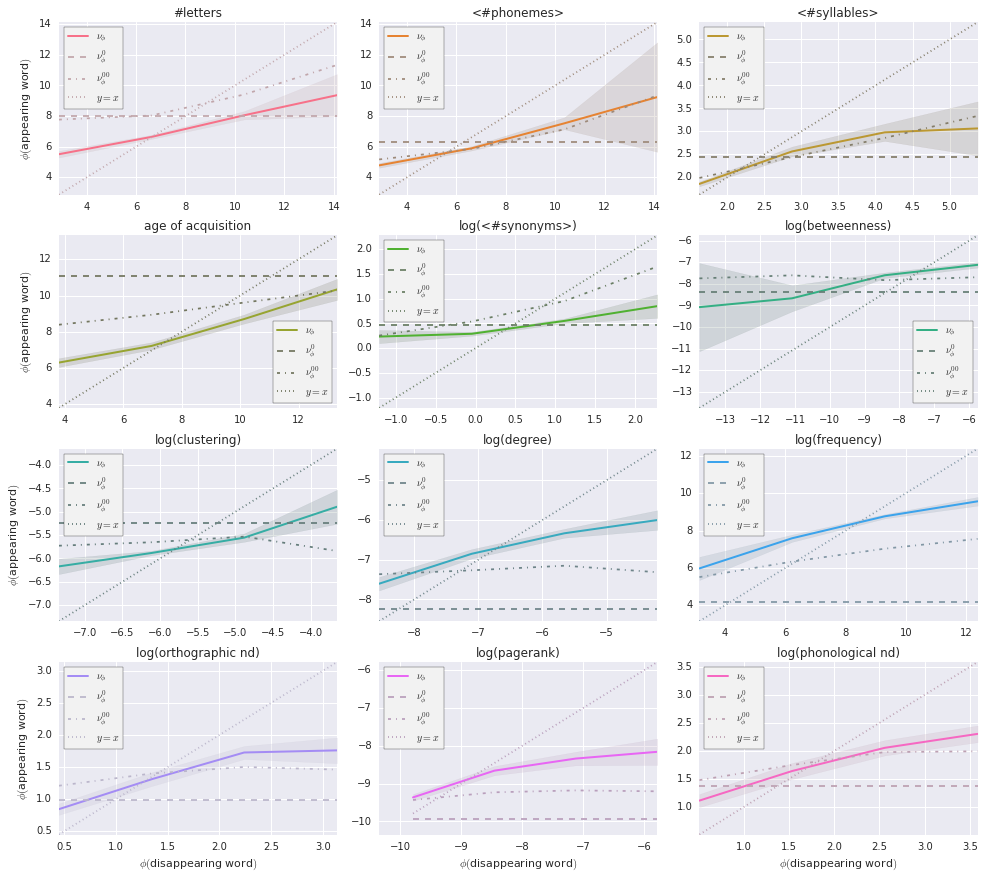

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

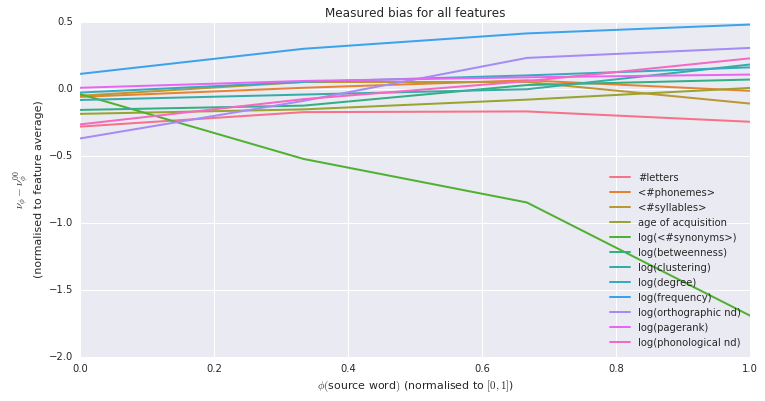

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |


H_00 | *** | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | ns. | *** | **  |


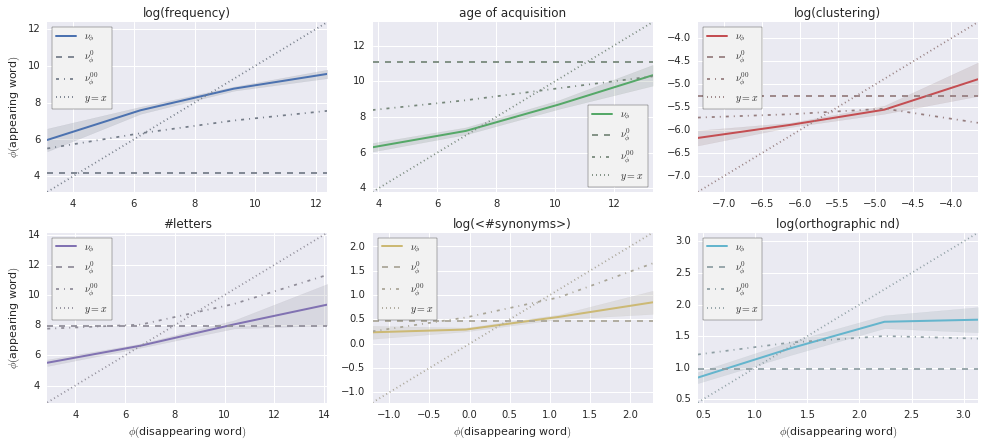

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

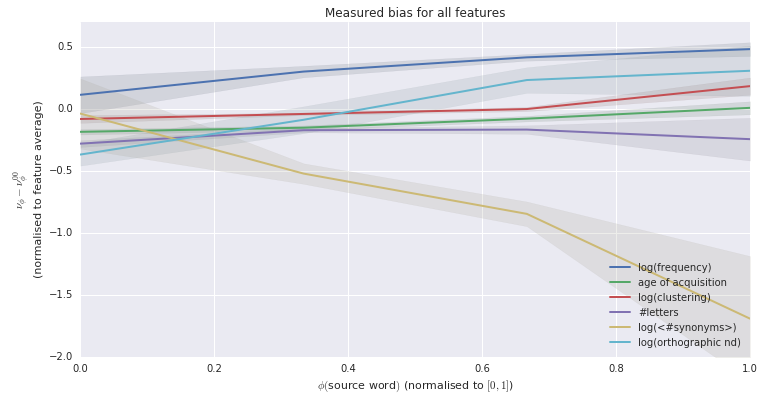

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *** |
H_00 | *** | **  | **  |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | *** |
H_00 | *** | *** | ns. | *** |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *   | ns. | *** |


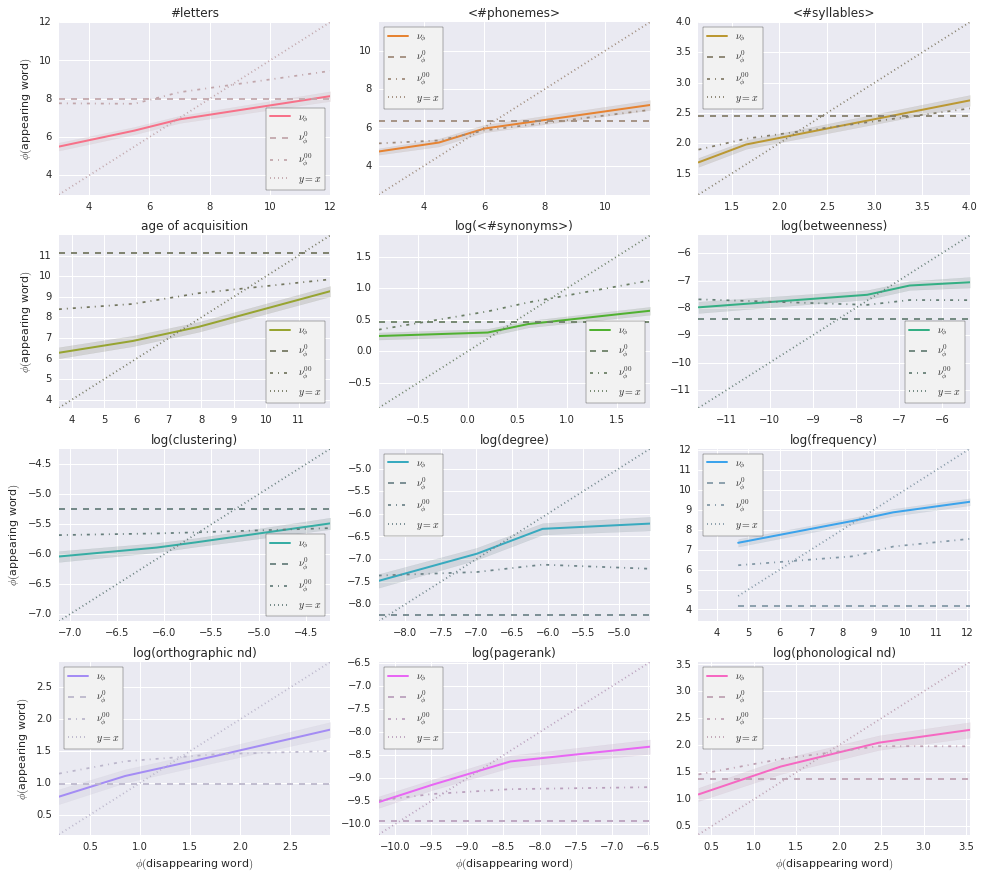

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

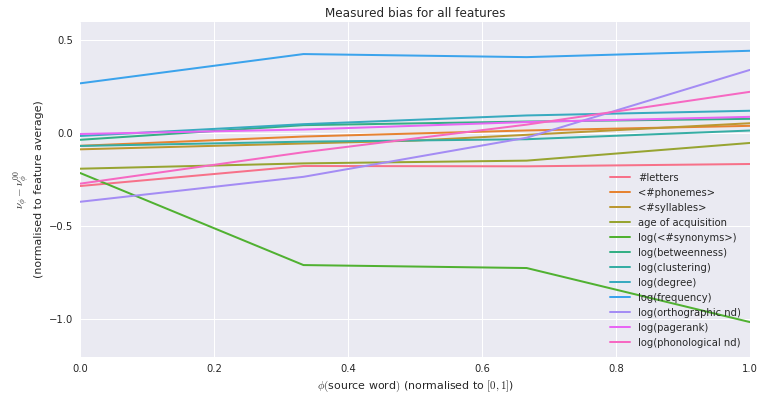

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | *** |
H_00 | *** | *** | ns. | *** |


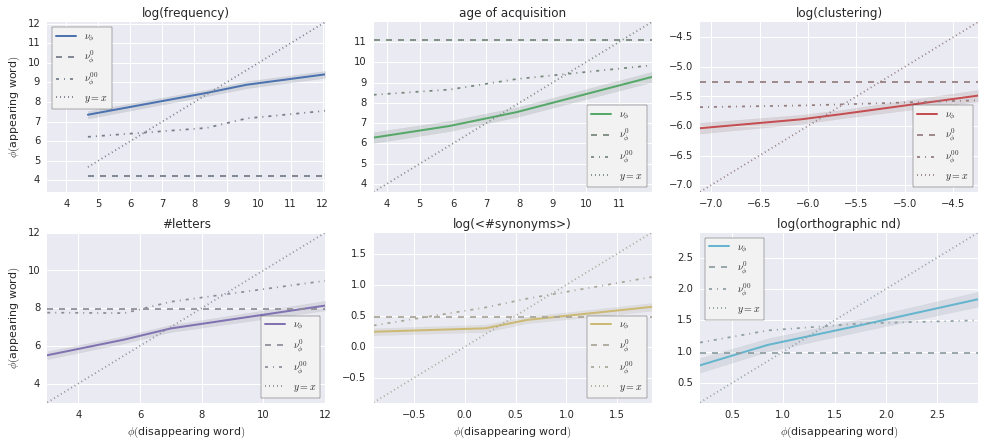

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

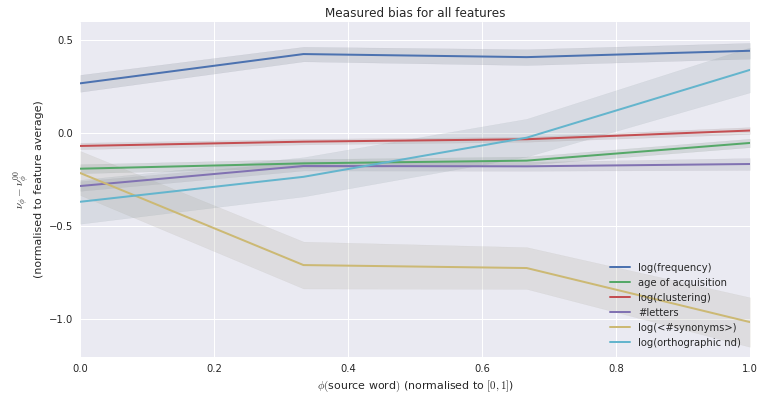

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | ns. | *** | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | *** |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | *** | **  |
H_00 | *** | *** | *** | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *** | *** | ns. | *   |


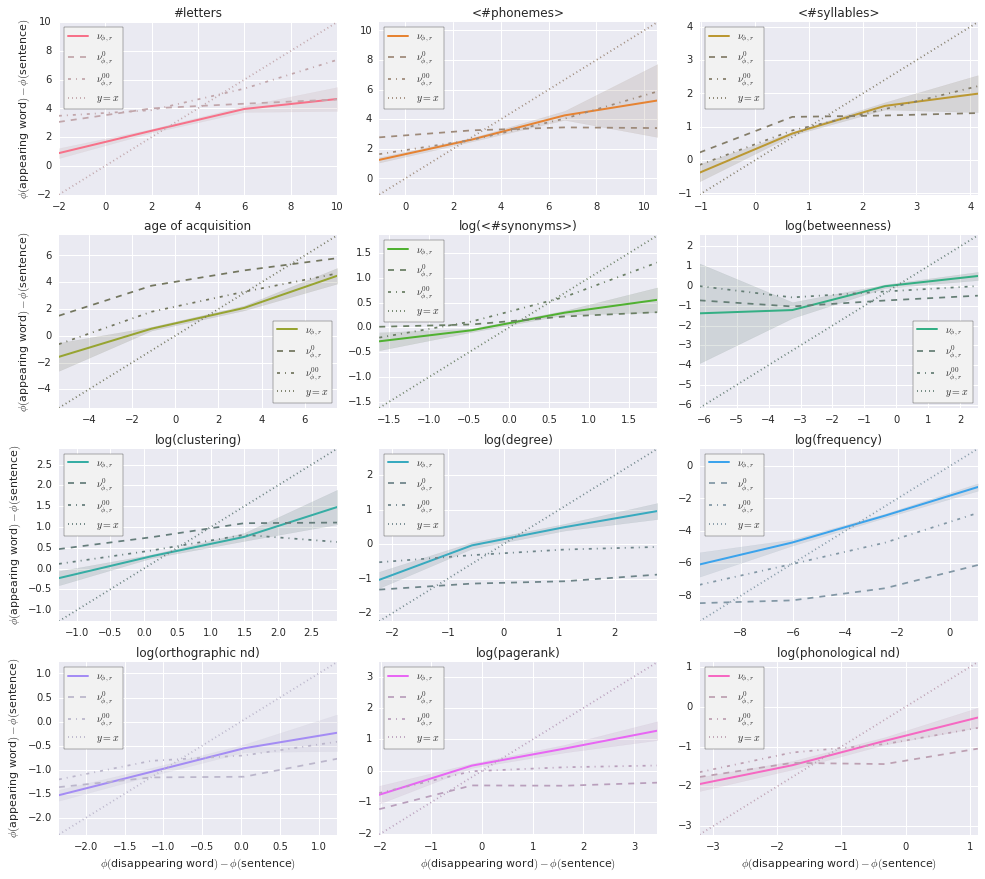

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

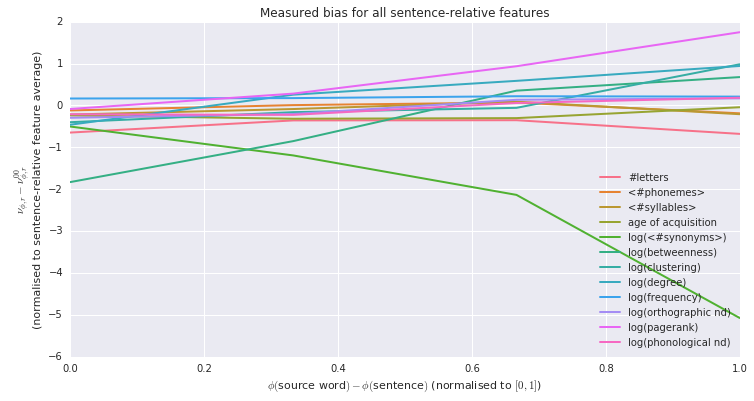

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | *** | **  |
H_00 | *** | *** | *** | ns. |


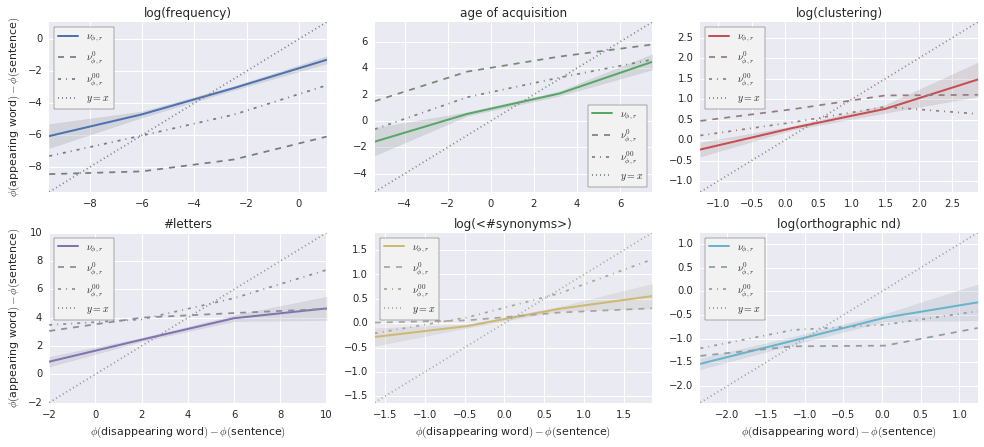

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

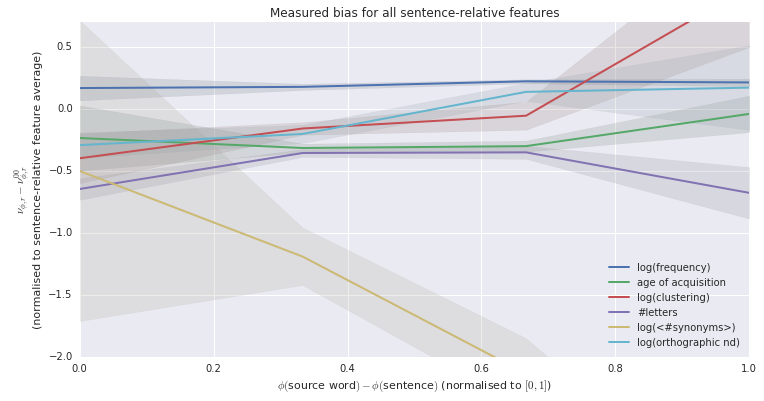

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | ns. | *** | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | *** |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *   | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *   | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | *** | *** |


H_00 | *** | *** | ns. | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | *** | *** |
H_00 | *** | *** | ns. | **  |


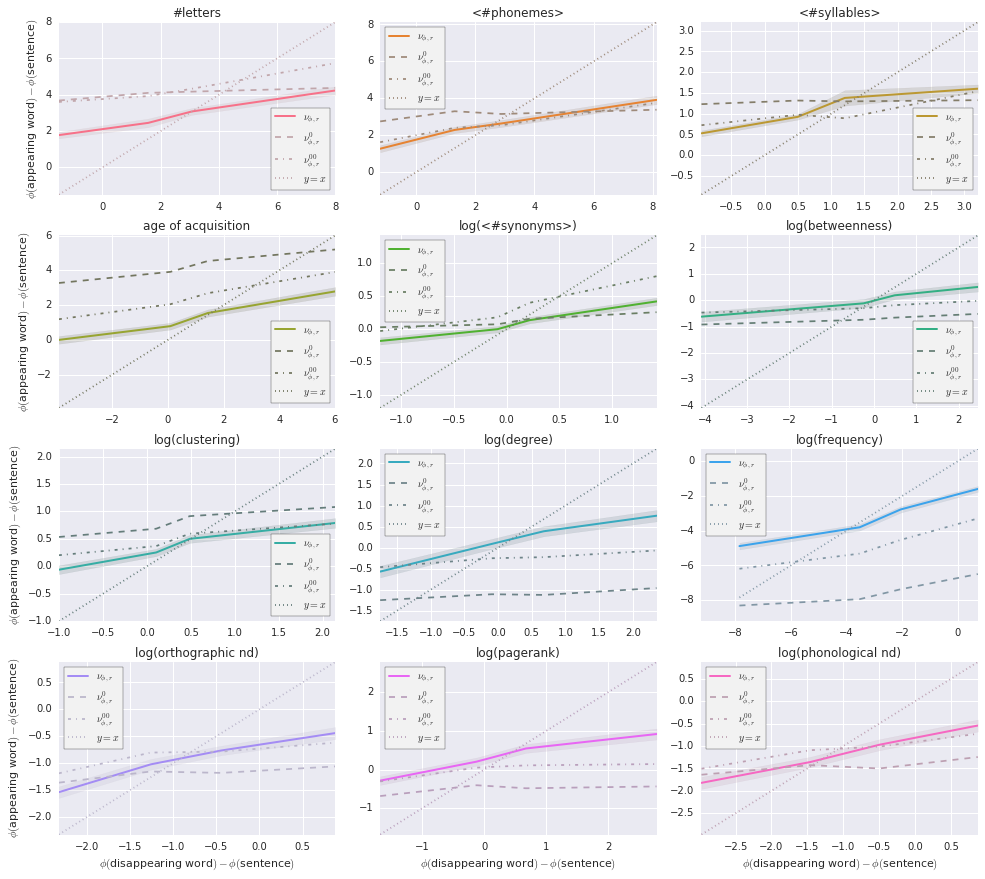

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

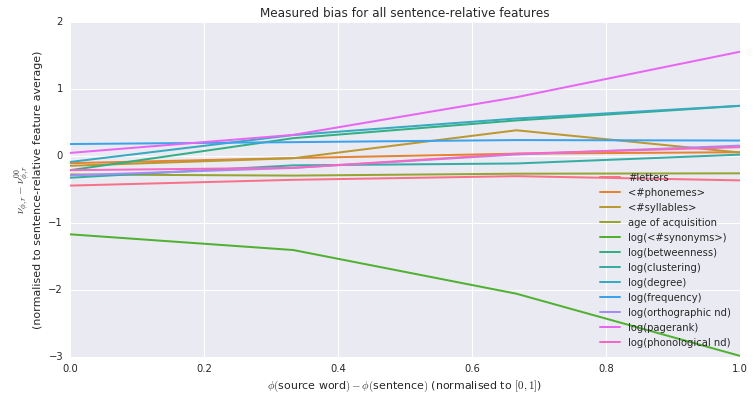

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *   | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | *** | *** |
H_00 | *** | *** | ns. | **  |


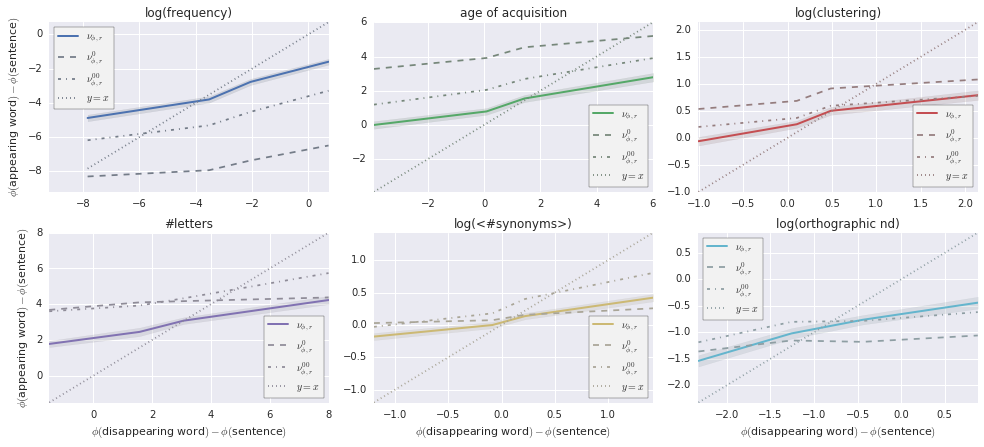

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

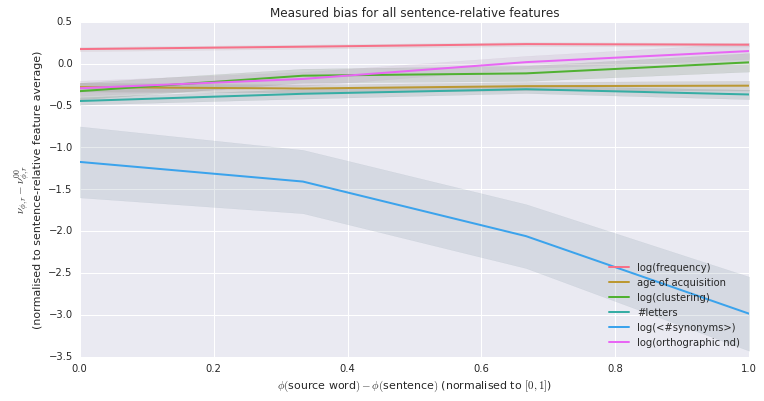

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


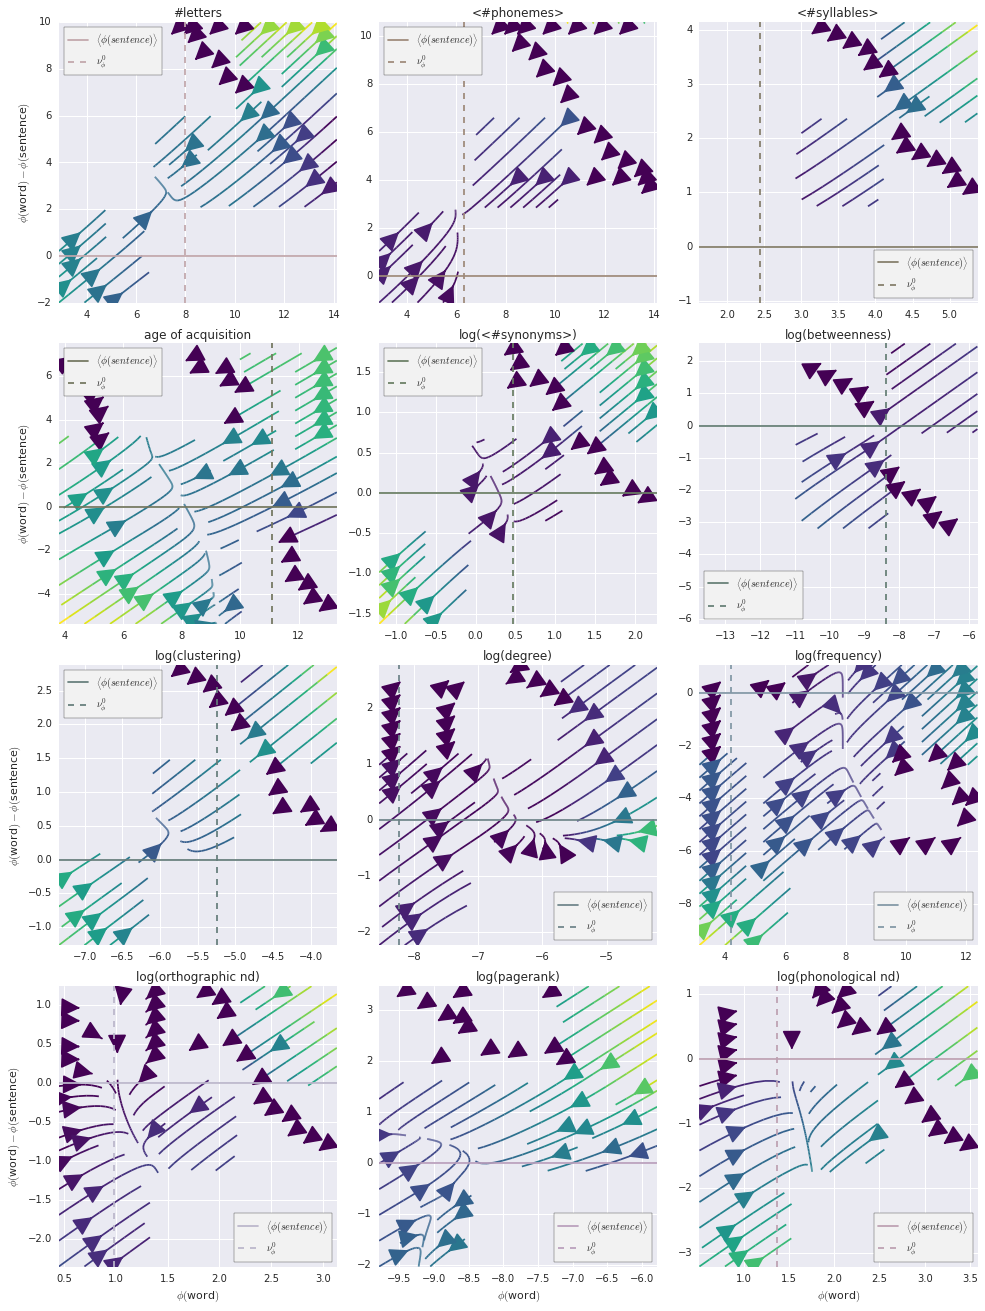

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


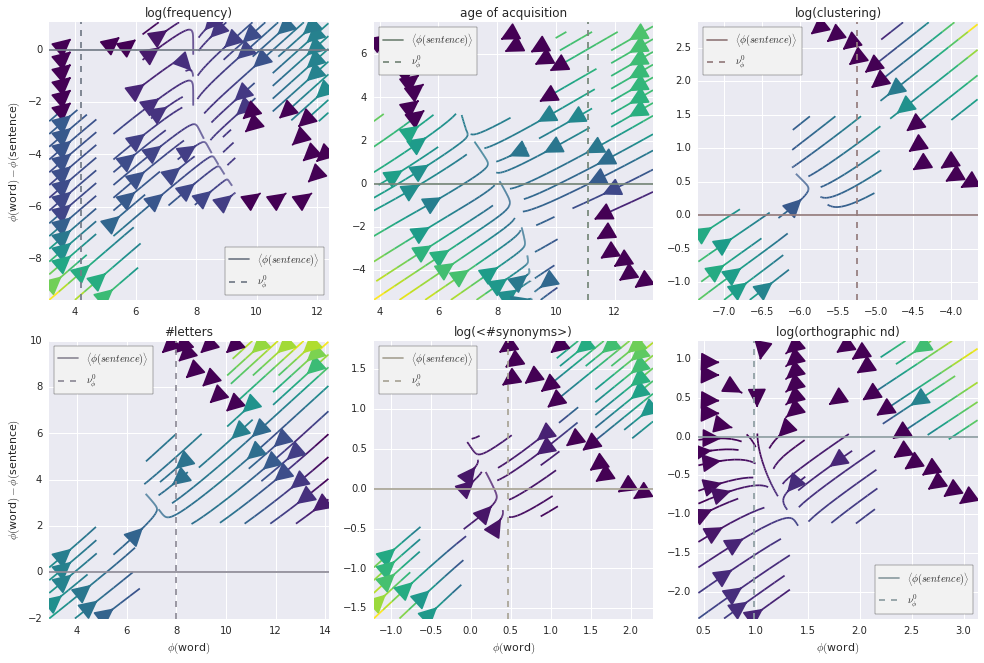

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.53021943  0.17022503  0.08534988  0.07293969  0.03480271  0.02990274
  0.0204932   0.01925337  0.01484704  0.00893759  0.00728417]

We're plotting variation for the first 3 components:


aoa  betweenness  clustering    degree  frequency  \
Component-0 -0.471563     0.285607   -0.075055  0.240294   0.222977   
Component-1 -0.282763     0.411094   -0.136292  0.295905   0.301852   
Component-2  0.788189     0.324780   -0.134258  0.110124   0.448288   

             letters_count  orthographic_density  pagerank  phonemes_count  \
Component-0      -0.429385              0.216526  0.278773       -0.408300   
Component-1       0.419188             -0.159628  0.293292        0.441173   
Component-2      -0.135275             -0.009689  0.069429       -0.090489   

             phonological_density  syllables_count  synonyms_count  
Component-0              0.283009        -0.164866       -0.003193  
Component-1             -0.208442         0.167111       -0.023857  
Component-2              0.093961        -0.020747       -0.038745

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 72339) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   12 of 72339) |             | Elapsed Time: 0:00:45 ETA: 3 days, 3:57:58

  0% (   35 of 72339) |              | Elapsed Time: 0:00:45 ETA: 1 day, 2:09:31

  0% (   61 of 72339) |                    | Elapsed Time: 0:00:45 ETA: 15:04:20

  0% (   83 of 72339) |                    | Elapsed Time: 0:00:45 ETA: 11:07:23

  0% (  105 of 72339) |                     | Elapsed Time: 0:00:46 ETA: 0:10:44

  0% (  129 of 72339) |                     | Elapsed Time: 0:00:46 ETA: 0:10:17

  0% (  153 of 72339) |                     | Elapsed Time: 0:00:46 ETA: 0:10:36

  0% (  177 of 72339) |                     | Elapsed Time: 0:00:46 ETA: 0:10:33

  0% (  201 of 72339) |                     | Elapsed Time: 0:00:47 ETA: 0:10:27

  0% (  225 of 72339) |                     | Elapsed Time: 0:00:47 ETA: 0:10:26

  0% (  249 of 72339) |                     | Elapsed Time: 0:00:47 ETA: 0:10:33

  0% (  273 of 72339) |                     | Elapsed Time: 0:00:47 ETA: 0:10:34

  0% (  297 of 72339) |                     | Elapsed Time: 0:00:47 ETA: 0:10:32

  0% (  321 of 72339) |                     | Elapsed Time: 0:00:48 ETA: 0:10:30

  0% (  345 of 72339) |                     | Elapsed Time: 0:00:48 ETA: 0:10:24

  0% (  371 of 72339) |                     | Elapsed Time: 0:00:48 ETA: 0:10:09

  0% (  395 of 72339) |                     | Elapsed Time: 0:00:48 ETA: 0:10:06

  0% (  420 of 72339) |                     | Elapsed Time: 0:00:48 ETA: 0:10:02

  0% (  445 of 72339) |                     | Elapsed Time: 0:00:49 ETA: 0:10:01

  0% (  470 of 72339) |                     | Elapsed Time: 0:00:49 ETA: 0:10:05

  0% (  493 of 72339) |                     | Elapsed Time: 0:00:49 ETA: 0:10:15

  0% (  518 of 72339) |                     | Elapsed Time: 0:00:49 ETA: 0:10:12

  0% (  544 of 72339) |                     | Elapsed Time: 0:00:49 ETA: 0:10:07

  0% (  569 of 72339) |                     | Elapsed Time: 0:00:50 ETA: 0:10:07

  0% (  594 of 72339) |                     | Elapsed Time: 0:00:50 ETA: 0:09:54

  0% (  618 of 72339) |                     | Elapsed Time: 0:00:50 ETA: 0:09:55

  0% (  644 of 72339) |                     | Elapsed Time: 0:00:50 ETA: 0:09:54

  0% (  669 of 72339) |                     | Elapsed Time: 0:00:50 ETA: 0:09:59

  0% (  695 of 72339) |                     | Elapsed Time: 0:00:51 ETA: 0:09:52

  0% (  721 of 72339) |                     | Elapsed Time: 0:00:51 ETA: 0:09:45

  1% (  746 of 72339) |                     | Elapsed Time: 0:00:51 ETA: 0:09:45

  1% (  773 of 72339) |                     | Elapsed Time: 0:00:51 ETA: 0:09:43

  1% (  798 of 72339) |                     | Elapsed Time: 0:00:52 ETA: 0:09:39

  1% (  826 of 72339) |                     | Elapsed Time: 0:00:52 ETA: 0:09:27

  1% (  854 of 72339) |                     | Elapsed Time: 0:00:52 ETA: 0:09:23

  1% (  880 of 72339) |                     | Elapsed Time: 0:00:52 ETA: 0:09:16

  1% (  905 of 72339) |                     | Elapsed Time: 0:00:52 ETA: 0:09:20

  1% (  931 of 72339) |                     | Elapsed Time: 0:00:53 ETA: 0:09:22

  1% (  957 of 72339) |                     | Elapsed Time: 0:00:53 ETA: 0:09:29

  1% (  984 of 72339) |                     | Elapsed Time: 0:00:53 ETA: 0:09:30

  1% ( 1011 of 72339) |                     | Elapsed Time: 0:00:53 ETA: 0:09:22

  1% ( 1037 of 72339) |                     | Elapsed Time: 0:00:53 ETA: 0:09:22

  1% ( 1063 of 72339) |                     | Elapsed Time: 0:00:54 ETA: 0:09:26

  1% ( 1087 of 72339) |                     | Elapsed Time: 0:00:54 ETA: 0:09:40

  1% ( 1114 of 72339) |                     | Elapsed Time: 0:00:54 ETA: 0:09:38

  1% ( 1140 of 72339) |                     | Elapsed Time: 0:00:54 ETA: 0:09:36

  1% ( 1166 of 72339) |                     | Elapsed Time: 0:00:54 ETA: 0:09:40

  1% ( 1192 of 72339) |                     | Elapsed Time: 0:00:55 ETA: 0:09:26

  1% ( 1219 of 72339) |                     | Elapsed Time: 0:00:55 ETA: 0:09:24

  1% ( 1247 of 72339) |                     | Elapsed Time: 0:00:55 ETA: 0:09:13

  1% ( 1273 of 72339) |                     | Elapsed Time: 0:00:55 ETA: 0:09:09

  1% ( 1299 of 72339) |                     | Elapsed Time: 0:00:56 ETA: 0:09:12

  1% ( 1327 of 72339) |                     | Elapsed Time: 0:00:56 ETA: 0:09:04

  1% ( 1355 of 72339) |                     | Elapsed Time: 0:00:56 ETA: 0:09:07

  1% ( 1382 of 72339) |                     | Elapsed Time: 0:00:56 ETA: 0:09:02

  1% ( 1410 of 72339) |                     | Elapsed Time: 0:00:56 ETA: 0:08:57

  1% ( 1437 of 72339) |                     | Elapsed Time: 0:00:57 ETA: 0:09:00

  2% ( 1462 of 72339) |                     | Elapsed Time: 0:00:57 ETA: 0:09:09

  2% ( 1490 of 72339) |                     | Elapsed Time: 0:00:57 ETA: 0:09:05

  2% ( 1516 of 72339) |                     | Elapsed Time: 0:00:57 ETA: 0:09:10

  2% ( 1542 of 72339) |                     | Elapsed Time: 0:00:57 ETA: 0:09:16

  2% ( 1568 of 72339) |                     | Elapsed Time: 0:00:58 ETA: 0:09:12

  2% ( 1594 of 72339) |                     | Elapsed Time: 0:00:58 ETA: 0:09:10

  2% ( 1624 of 72339) |                     | Elapsed Time: 0:00:58 ETA: 0:09:01

  2% ( 1655 of 72339) |                     | Elapsed Time: 0:00:58 ETA: 0:08:41

  2% ( 1688 of 72339) |                     | Elapsed Time: 0:00:58 ETA: 0:08:15

  2% ( 1718 of 72339) |                     | Elapsed Time: 0:00:59 ETA: 0:08:03

  2% ( 1747 of 72339) |                     | Elapsed Time: 0:00:59 ETA: 0:07:54

  2% ( 1777 of 72339) |                     | Elapsed Time: 0:00:59 ETA: 0:07:58

  2% ( 1809 of 72339) |                     | Elapsed Time: 0:00:59 ETA: 0:07:57

  2% ( 1843 of 72339) |                     | Elapsed Time: 0:00:59 ETA: 0:07:46

  2% ( 1876 of 72339) |                     | Elapsed Time: 0:01:00 ETA: 0:07:39

  2% ( 1907 of 72339) |                     | Elapsed Time: 0:01:00 ETA: 0:07:32

  2% ( 1939 of 72339) |                     | Elapsed Time: 0:01:00 ETA: 0:07:29

  2% ( 1971 of 72339) |                     | Elapsed Time: 0:01:00 ETA: 0:07:32

  2% ( 1999 of 72339) |                     | Elapsed Time: 0:01:00 ETA: 0:07:52

  2% ( 2019 of 72339) |                     | Elapsed Time: 0:01:01 ETA: 0:08:32

  2% ( 2043 of 72339) |                     | Elapsed Time: 0:01:01 ETA: 0:09:06

  2% ( 2060 of 72339) |                     | Elapsed Time: 0:01:01 ETA: 0:10:35

  2% ( 2074 of 72339) |                     | Elapsed Time: 0:01:01 ETA: 0:13:01

  2% ( 2088 of 72339) |                     | Elapsed Time: 0:01:02 ETA: 0:13:44

  2% ( 2102 of 72339) |                     | Elapsed Time: 0:01:02 ETA: 0:16:18

  2% ( 2116 of 72339) |                     | Elapsed Time: 0:01:02 ETA: 0:17:59

  2% ( 2130 of 72339) |                     | Elapsed Time: 0:01:02 ETA: 0:18:04

  2% ( 2144 of 72339) |                     | Elapsed Time: 0:01:02 ETA: 0:18:11

  2% ( 2158 of 72339) |                     | Elapsed Time: 0:01:03 ETA: 0:18:16

  3% ( 2172 of 72339) |                     | Elapsed Time: 0:01:03 ETA: 0:18:31

  3% ( 2186 of 72339) |                     | Elapsed Time: 0:01:03 ETA: 0:18:38

  3% ( 2200 of 72339) |                     | Elapsed Time: 0:01:03 ETA: 0:18:43

  3% ( 2214 of 72339) |                     | Elapsed Time: 0:01:04 ETA: 0:18:45

  3% ( 2228 of 72339) |                     | Elapsed Time: 0:01:04 ETA: 0:18:49

  3% ( 2241 of 72339) |                     | Elapsed Time: 0:01:04 ETA: 0:18:59

  3% ( 2253 of 72339) |                     | Elapsed Time: 0:01:04 ETA: 0:19:07

  3% ( 2266 of 72339) |                     | Elapsed Time: 0:01:04 ETA: 0:19:17

  3% ( 2279 of 72339) |                     | Elapsed Time: 0:01:05 ETA: 0:19:28

  3% ( 2292 of 72339) |                     | Elapsed Time: 0:01:05 ETA: 0:19:37

  3% ( 2306 of 72339) |                     | Elapsed Time: 0:01:05 ETA: 0:19:31

  3% ( 2320 of 72339) |                     | Elapsed Time: 0:01:05 ETA: 0:19:26

  3% ( 2334 of 72339) |                     | Elapsed Time: 0:01:06 ETA: 0:19:27

  3% ( 2346 of 72339) |                     | Elapsed Time: 0:01:06 ETA: 0:19:21

  3% ( 2360 of 72339) |                     | Elapsed Time: 0:01:06 ETA: 0:19:16

  3% ( 2373 of 72339) |                     | Elapsed Time: 0:01:06 ETA: 0:19:15

  3% ( 2386 of 72339) |                     | Elapsed Time: 0:01:06 ETA: 0:19:16

  3% ( 2400 of 72339) |                     | Elapsed Time: 0:01:07 ETA: 0:19:08

  3% ( 2414 of 72339) |                     | Elapsed Time: 0:01:07 ETA: 0:19:01

  3% ( 2433 of 72339) |                     | Elapsed Time: 0:01:07 ETA: 0:17:15

  3% ( 2447 of 72339) |                     | Elapsed Time: 0:01:07 ETA: 0:17:16

  3% ( 2461 of 72339) |                     | Elapsed Time: 0:01:08 ETA: 0:17:13

  3% ( 2475 of 72339) |                     | Elapsed Time: 0:01:08 ETA: 0:17:15

  3% ( 2489 of 72339) |                     | Elapsed Time: 0:01:08 ETA: 0:18:38

  3% ( 2503 of 72339) |                     | Elapsed Time: 0:01:08 ETA: 0:19:00

  3% ( 2517 of 72339) |                     | Elapsed Time: 0:01:08 ETA: 0:18:59

  3% ( 2530 of 72339) |                     | Elapsed Time: 0:01:09 ETA: 0:19:06

  3% ( 2543 of 72339) |                     | Elapsed Time: 0:01:09 ETA: 0:19:11

  3% ( 2557 of 72339) |                     | Elapsed Time: 0:01:09 ETA: 0:19:12

  3% ( 2571 of 72339) |                     | Elapsed Time: 0:01:09 ETA: 0:19:07

  3% ( 2585 of 72339) |                     | Elapsed Time: 0:01:10 ETA: 0:19:09

  3% ( 2599 of 72339) |                     | Elapsed Time: 0:01:10 ETA: 0:19:09

  3% ( 2613 of 72339) |                     | Elapsed Time: 0:01:10 ETA: 0:18:58

  3% ( 2627 of 72339) |                     | Elapsed Time: 0:01:10 ETA: 0:18:59

  3% ( 2641 of 72339) |                     | Elapsed Time: 0:01:10 ETA: 0:19:04

  3% ( 2655 of 72339) |                     | Elapsed Time: 0:01:11 ETA: 0:18:50

  3% ( 2669 of 72339) |                     | Elapsed Time: 0:01:11 ETA: 0:18:47

  3% ( 2683 of 72339) |                     | Elapsed Time: 0:01:11 ETA: 0:18:42

  3% ( 2697 of 72339) |                     | Elapsed Time: 0:01:11 ETA: 0:18:38

  3% ( 2713 of 72339) |                     | Elapsed Time: 0:01:12 ETA: 0:18:39

  3% ( 2727 of 72339) |                     | Elapsed Time: 0:01:12 ETA: 0:18:42

  3% ( 2741 of 72339) |                     | Elapsed Time: 0:01:12 ETA: 0:18:49

  3% ( 2755 of 72339) |                     | Elapsed Time: 0:01:12 ETA: 0:18:42

  3% ( 2769 of 72339) |                     | Elapsed Time: 0:01:13 ETA: 0:18:35

  3% ( 2783 of 72339) |                     | Elapsed Time: 0:01:13 ETA: 0:18:31

  3% ( 2803 of 72339) |                     | Elapsed Time: 0:01:13 ETA: 0:16:41

  3% ( 2817 of 72339) |                     | Elapsed Time: 0:01:13 ETA: 0:16:38

  3% ( 2831 of 72339) |                     | Elapsed Time: 0:01:13 ETA: 0:16:47

  3% ( 2844 of 72339) |                     | Elapsed Time: 0:01:14 ETA: 0:16:54

  3% ( 2858 of 72339) |                     | Elapsed Time: 0:01:14 ETA: 0:16:57

  3% ( 2883 of 72339) |                     | Elapsed Time: 0:01:14 ETA: 0:15:38

  4% ( 2911 of 72339) |                     | Elapsed Time: 0:01:14 ETA: 0:12:50

  4% ( 2940 of 72339) |                     | Elapsed Time: 0:01:14 ETA: 0:10:46

  4% ( 2968 of 72339) |                     | Elapsed Time: 0:01:15 ETA: 0:09:19

  4% ( 2996 of 72339) |                     | Elapsed Time: 0:01:15 ETA: 0:08:33

  4% ( 3024 of 72339) |                     | Elapsed Time: 0:01:15 ETA: 0:08:36

  4% ( 3052 of 72339) |                     | Elapsed Time: 0:01:15 ETA: 0:08:39

  4% ( 3080 of 72339) |                     | Elapsed Time: 0:01:16 ETA: 0:08:38

  4% ( 3108 of 72339) |                     | Elapsed Time: 0:01:16 ETA: 0:08:37

  4% ( 3136 of 72339) |                     | Elapsed Time: 0:01:16 ETA: 0:08:37

  4% ( 3164 of 72339) |                     | Elapsed Time: 0:01:16 ETA: 0:08:34

  4% ( 3193 of 72339) |                     | Elapsed Time: 0:01:16 ETA: 0:08:35

  4% ( 3219 of 72339) |                     | Elapsed Time: 0:01:17 ETA: 0:08:42

  4% ( 3246 of 72339) |                     | Elapsed Time: 0:01:17 ETA: 0:08:47

  4% ( 3273 of 72339) |                     | Elapsed Time: 0:01:17 ETA: 0:08:49

  4% ( 3301 of 72339) |                     | Elapsed Time: 0:01:17 ETA: 0:08:54

  4% ( 3328 of 72339) |                     | Elapsed Time: 0:01:17 ETA: 0:08:53

  4% ( 3355 of 72339) |                     | Elapsed Time: 0:01:18 ETA: 0:08:46

  4% ( 3382 of 72339) |                     | Elapsed Time: 0:01:18 ETA: 0:08:46

  4% ( 3410 of 72339) |                     | Elapsed Time: 0:01:18 ETA: 0:08:47

  4% ( 3437 of 72339) |                     | Elapsed Time: 0:01:18 ETA: 0:08:46

  4% ( 3462 of 72339) |#                    | Elapsed Time: 0:01:18 ETA: 0:08:56

  4% ( 3487 of 72339) |#                    | Elapsed Time: 0:01:19 ETA: 0:09:06

  4% ( 3513 of 72339) |#                    | Elapsed Time: 0:01:19 ETA: 0:09:11

  4% ( 3541 of 72339) |#                    | Elapsed Time: 0:01:19 ETA: 0:09:08

  4% ( 3581 of 72339) |#                    | Elapsed Time: 0:01:19 ETA: 0:08:59

  5% ( 3617 of 72339) |#                    | Elapsed Time: 0:01:20 ETA: 0:08:56

  5% ( 3645 of 72339) |#                    | Elapsed Time: 0:01:20 ETA: 0:08:43

  5% ( 3671 of 72339) |#                    | Elapsed Time: 0:01:20 ETA: 0:08:47

  5% ( 3702 of 72339) |#                    | Elapsed Time: 0:01:20 ETA: 0:08:33

  5% ( 3730 of 72339) |#                    | Elapsed Time: 0:01:21 ETA: 0:08:29

  5% ( 3758 of 72339) |#                    | Elapsed Time: 0:01:21 ETA: 0:08:27

  5% ( 3786 of 72339) |#                    | Elapsed Time: 0:01:21 ETA: 0:08:21

  5% ( 3814 of 72339) |#                    | Elapsed Time: 0:01:21 ETA: 0:08:22

  5% ( 3842 of 72339) |#                    | Elapsed Time: 0:01:21 ETA: 0:08:24

  5% ( 3870 of 72339) |#                    | Elapsed Time: 0:01:22 ETA: 0:08:25

  5% ( 3898 of 72339) |#                    | Elapsed Time: 0:01:22 ETA: 0:08:26

  5% ( 3926 of 72339) |#                    | Elapsed Time: 0:01:22 ETA: 0:08:26

  5% ( 3954 of 72339) |#                    | Elapsed Time: 0:01:22 ETA: 0:08:31

  5% ( 3982 of 72339) |#                    | Elapsed Time: 0:01:22 ETA: 0:08:33

  5% ( 4010 of 72339) |#                    | Elapsed Time: 0:01:23 ETA: 0:08:34

  5% ( 4038 of 72339) |#                    | Elapsed Time: 0:01:23 ETA: 0:08:34

  5% ( 4066 of 72339) |#                    | Elapsed Time: 0:01:23 ETA: 0:08:35

  5% ( 4094 of 72339) |#                    | Elapsed Time: 0:01:23 ETA: 0:08:34

  5% ( 4122 of 72339) |#                    | Elapsed Time: 0:01:23 ETA: 0:08:37

  5% ( 4148 of 72339) |#                    | Elapsed Time: 0:01:24 ETA: 0:08:41

  5% ( 4174 of 72339) |#                    | Elapsed Time: 0:01:24 ETA: 0:08:47

  5% ( 4201 of 72339) |#                    | Elapsed Time: 0:01:24 ETA: 0:08:48

  5% ( 4229 of 72339) |#                    | Elapsed Time: 0:01:24 ETA: 0:08:49

  5% ( 4257 of 72339) |#                    | Elapsed Time: 0:01:24 ETA: 0:08:45

  5% ( 4285 of 72339) |#                    | Elapsed Time: 0:01:25 ETA: 0:08:38

  5% ( 4313 of 72339) |#                    | Elapsed Time: 0:01:25 ETA: 0:08:35

  6% ( 4341 of 72339) |#                    | Elapsed Time: 0:01:25 ETA: 0:08:33

  6% ( 4368 of 72339) |#                    | Elapsed Time: 0:01:25 ETA: 0:08:35

  6% ( 4395 of 72339) |#                    | Elapsed Time: 0:01:26 ETA: 0:08:38

  6% ( 4423 of 72339) |#                    | Elapsed Time: 0:01:26 ETA: 0:08:37

  6% ( 4451 of 72339) |#                    | Elapsed Time: 0:01:26 ETA: 0:08:34

  6% ( 4493 of 72339) |#                    | Elapsed Time: 0:01:26 ETA: 0:08:24

  6% ( 4522 of 72339) |#                    | Elapsed Time: 0:01:26 ETA: 0:08:18

  6% ( 4550 of 72339) |#                    | Elapsed Time: 0:01:27 ETA: 0:08:17

  6% ( 4577 of 72339) |#                    | Elapsed Time: 0:01:27 ETA: 0:08:23

  6% ( 4605 of 72339) |#                    | Elapsed Time: 0:01:27 ETA: 0:08:26

  6% ( 4633 of 72339) |#                    | Elapsed Time: 0:01:27 ETA: 0:08:29

  6% ( 4661 of 72339) |#                    | Elapsed Time: 0:01:28 ETA: 0:08:32

  6% ( 4689 of 72339) |#                    | Elapsed Time: 0:01:28 ETA: 0:08:31

  6% ( 4717 of 72339) |#                    | Elapsed Time: 0:01:28 ETA: 0:08:27

  6% ( 4745 of 72339) |#                    | Elapsed Time: 0:01:28 ETA: 0:08:26

  6% ( 4773 of 72339) |#                    | Elapsed Time: 0:01:28 ETA: 0:08:27

  6% ( 4801 of 72339) |#                    | Elapsed Time: 0:01:29 ETA: 0:08:25

  6% ( 4829 of 72339) |#                    | Elapsed Time: 0:01:29 ETA: 0:08:22

  6% ( 4856 of 72339) |#                    | Elapsed Time: 0:01:29 ETA: 0:08:24

  6% ( 4884 of 72339) |#                    | Elapsed Time: 0:01:29 ETA: 0:08:24

  6% ( 4912 of 72339) |#                    | Elapsed Time: 0:01:29 ETA: 0:08:23

  6% ( 4934 of 72339) |#                    | Elapsed Time: 0:01:30 ETA: 0:08:51

  6% ( 4954 of 72339) |#                    | Elapsed Time: 0:01:30 ETA: 0:09:29

  6% ( 4974 of 72339) |#                    | Elapsed Time: 0:01:30 ETA: 0:10:07

  6% ( 4994 of 72339) |#                    | Elapsed Time: 0:01:30 ETA: 0:10:54

  6% ( 5014 of 72339) |#                    | Elapsed Time: 0:01:30 ETA: 0:11:45

  6% ( 5034 of 72339) |#                    | Elapsed Time: 0:01:31 ETA: 0:11:30

  6% ( 5054 of 72339) |#                    | Elapsed Time: 0:01:31 ETA: 0:11:29

  7% ( 5074 of 72339) |#                    | Elapsed Time: 0:01:31 ETA: 0:11:29

  7% ( 5094 of 72339) |#                    | Elapsed Time: 0:01:31 ETA: 0:11:28

  7% ( 5114 of 72339) |#                    | Elapsed Time: 0:01:31 ETA: 0:11:27

  7% ( 5136 of 72339) |#                    | Elapsed Time: 0:01:32 ETA: 0:11:21

  7% ( 5159 of 72339) |#                    | Elapsed Time: 0:01:32 ETA: 0:10:59

  7% ( 5179 of 72339) |#                    | Elapsed Time: 0:01:32 ETA: 0:11:07

  7% ( 5191 of 72339) |#                    | Elapsed Time: 0:01:32 ETA: 0:12:33

  7% ( 5203 of 72339) |#                    | Elapsed Time: 0:01:33 ETA: 0:14:25

  7% ( 5215 of 72339) |#                    | Elapsed Time: 0:01:33 ETA: 0:16:44

  7% ( 5227 of 72339) |#                    | Elapsed Time: 0:01:33 ETA: 0:19:45

  7% ( 5239 of 72339) |#                    | Elapsed Time: 0:01:33 ETA: 0:22:09

  7% ( 5251 of 72339) |#                    | Elapsed Time: 0:01:34 ETA: 0:22:10

  7% ( 5271 of 72339) |#                    | Elapsed Time: 0:01:34 ETA: 0:18:41

  7% ( 5308 of 72339) |#                    | Elapsed Time: 0:01:34 ETA: 0:12:53

  7% ( 5346 of 72339) |#                    | Elapsed Time: 0:01:34 ETA: 0:09:36

  7% ( 5374 of 72339) |#                    | Elapsed Time: 0:01:34 ETA: 0:08:07

  7% ( 5401 of 72339) |#                    | Elapsed Time: 0:01:35 ETA: 0:07:16

  7% ( 5439 of 72339) |#                    | Elapsed Time: 0:01:35 ETA: 0:07:31

  7% ( 5465 of 72339) |#                    | Elapsed Time: 0:01:35 ETA: 0:08:09

  7% ( 5491 of 72339) |#                    | Elapsed Time: 0:01:35 ETA: 0:08:39

  7% ( 5518 of 72339) |#                    | Elapsed Time: 0:01:35 ETA: 0:08:36

  7% ( 5544 of 72339) |#                    | Elapsed Time: 0:01:36 ETA: 0:08:40

  7% ( 5572 of 72339) |#                    | Elapsed Time: 0:01:36 ETA: 0:08:37

  7% ( 5598 of 72339) |#                    | Elapsed Time: 0:01:36 ETA: 0:08:37

  7% ( 5625 of 72339) |#                    | Elapsed Time: 0:01:36 ETA: 0:08:36

  7% ( 5653 of 72339) |#                    | Elapsed Time: 0:01:37 ETA: 0:08:34

  7% ( 5693 of 72339) |#                    | Elapsed Time: 0:01:37 ETA: 0:08:34

  7% ( 5720 of 72339) |#                    | Elapsed Time: 0:01:37 ETA: 0:08:34

  7% ( 5748 of 72339) |#                    | Elapsed Time: 0:01:37 ETA: 0:08:31

  7% ( 5769 of 72339) |#                    | Elapsed Time: 0:01:37 ETA: 0:08:54

  7% ( 5781 of 72339) |#                    | Elapsed Time: 0:01:38 ETA: 0:10:30

  8% ( 5793 of 72339) |#                    | Elapsed Time: 0:01:38 ETA: 0:12:34

  8% ( 5805 of 72339) |#                    | Elapsed Time: 0:01:38 ETA: 0:15:43

  8% ( 5817 of 72339) |#                    | Elapsed Time: 0:01:38 ETA: 0:20:47

  8% ( 5829 of 72339) |#                    | Elapsed Time: 0:01:39 ETA: 0:21:28

  8% ( 5848 of 72339) |#                    | Elapsed Time: 0:01:39 ETA: 0:18:49

  8% ( 5882 of 72339) |#                    | Elapsed Time: 0:01:39 ETA: 0:13:29

  8% ( 5906 of 72339) |#                    | Elapsed Time: 0:01:39 ETA: 0:11:37

  8% ( 5918 of 72339) |#                    | Elapsed Time: 0:01:39 ETA: 0:11:42

  8% ( 5930 of 72339) |#                    | Elapsed Time: 0:01:40 ETA: 0:11:45

  8% ( 5943 of 72339) |#                    | Elapsed Time: 0:01:40 ETA: 0:14:17

  8% ( 5956 of 72339) |#                    | Elapsed Time: 0:01:40 ETA: 0:19:34

  8% ( 5968 of 72339) |#                    | Elapsed Time: 0:01:40 ETA: 0:20:30

  8% ( 5981 of 72339) |#                    | Elapsed Time: 0:01:41 ETA: 0:19:48

  8% ( 5994 of 72339) |#                    | Elapsed Time: 0:01:41 ETA: 0:19:47

  8% ( 6006 of 72339) |#                    | Elapsed Time: 0:01:41 ETA: 0:20:14

  8% ( 6018 of 72339) |#                    | Elapsed Time: 0:01:41 ETA: 0:20:14

  8% ( 6036 of 72339) |#                    | Elapsed Time: 0:01:42 ETA: 0:17:54

  8% ( 6058 of 72339) |#                    | Elapsed Time: 0:01:42 ETA: 0:15:40

  8% ( 6080 of 72339) |#                    | Elapsed Time: 0:01:42 ETA: 0:13:27

  8% ( 6100 of 72339) |#                    | Elapsed Time: 0:01:42 ETA: 0:11:50

  8% ( 6131 of 72339) |#                    | Elapsed Time: 0:01:42 ETA: 0:10:51

  8% ( 6163 of 72339) |#                    | Elapsed Time: 0:01:43 ETA: 0:09:52

  8% ( 6194 of 72339) |#                    | Elapsed Time: 0:01:43 ETA: 0:09:05

  8% ( 6223 of 72339) |#                    | Elapsed Time: 0:01:43 ETA: 0:08:22

  8% ( 6249 of 72339) |#                    | Elapsed Time: 0:01:43 ETA: 0:07:47

  8% ( 6269 of 72339) |#                    | Elapsed Time: 0:01:44 ETA: 0:08:32

  8% ( 6289 of 72339) |#                    | Elapsed Time: 0:01:44 ETA: 0:09:37

  8% ( 6309 of 72339) |#                    | Elapsed Time: 0:01:44 ETA: 0:10:36

  8% ( 6330 of 72339) |#                    | Elapsed Time: 0:01:44 ETA: 0:11:25

  8% ( 6350 of 72339) |#                    | Elapsed Time: 0:01:44 ETA: 0:11:47

  8% ( 6370 of 72339) |#                    | Elapsed Time: 0:01:45 ETA: 0:11:45

  8% ( 6390 of 72339) |#                    | Elapsed Time: 0:01:45 ETA: 0:11:44

  8% ( 6410 of 72339) |#                    | Elapsed Time: 0:01:45 ETA: 0:11:52

  8% ( 6430 of 72339) |#                    | Elapsed Time: 0:01:45 ETA: 0:11:52

  8% ( 6450 of 72339) |#                    | Elapsed Time: 0:01:45 ETA: 0:11:49

  8% ( 6470 of 72339) |#                    | Elapsed Time: 0:01:46 ETA: 0:11:47

  8% ( 6490 of 72339) |#                    | Elapsed Time: 0:01:46 ETA: 0:11:46

  8% ( 6510 of 72339) |#                    | Elapsed Time: 0:01:46 ETA: 0:11:45

  9% ( 6530 of 72339) |#                    | Elapsed Time: 0:01:46 ETA: 0:11:45

  9% ( 6550 of 72339) |#                    | Elapsed Time: 0:01:47 ETA: 0:11:49

  9% ( 6570 of 72339) |#                    | Elapsed Time: 0:01:47 ETA: 0:11:44

  9% ( 6590 of 72339) |#                    | Elapsed Time: 0:01:47 ETA: 0:11:43

  9% ( 6610 of 72339) |#                    | Elapsed Time: 0:01:47 ETA: 0:11:39

  9% ( 6630 of 72339) |#                    | Elapsed Time: 0:01:47 ETA: 0:11:33

  9% ( 6650 of 72339) |#                    | Elapsed Time: 0:01:48 ETA: 0:11:32

  9% ( 6670 of 72339) |#                    | Elapsed Time: 0:01:48 ETA: 0:11:36

  9% ( 6690 of 72339) |#                    | Elapsed Time: 0:01:48 ETA: 0:11:40

  9% ( 6710 of 72339) |#                    | Elapsed Time: 0:01:48 ETA: 0:11:42

  9% ( 6730 of 72339) |#                    | Elapsed Time: 0:01:48 ETA: 0:11:48

  9% ( 6751 of 72339) |#                    | Elapsed Time: 0:01:49 ETA: 0:11:37

  9% ( 6775 of 72339) |#                    | Elapsed Time: 0:01:49 ETA: 0:11:01

  9% ( 6808 of 72339) |#                    | Elapsed Time: 0:01:49 ETA: 0:09:32

  9% ( 6844 of 72339) |#                    | Elapsed Time: 0:01:49 ETA: 0:08:12

  9% ( 6880 of 72339) |#                    | Elapsed Time: 0:01:49 ETA: 0:07:11

  9% ( 6910 of 72339) |##                   | Elapsed Time: 0:01:50 ETA: 0:06:48

  9% ( 6935 of 72339) |##                   | Elapsed Time: 0:01:50 ETA: 0:06:54

  9% ( 6959 of 72339) |##                   | Elapsed Time: 0:01:50 ETA: 0:07:30

  9% ( 6984 of 72339) |##                   | Elapsed Time: 0:01:50 ETA: 0:08:11

  9% ( 7012 of 72339) |##                   | Elapsed Time: 0:01:51 ETA: 0:08:44

  9% ( 7040 of 72339) |##                   | Elapsed Time: 0:01:51 ETA: 0:08:42

  9% ( 7069 of 72339) |##                   | Elapsed Time: 0:01:51 ETA: 0:08:23

  9% ( 7098 of 72339) |##                   | Elapsed Time: 0:01:51 ETA: 0:08:05

  9% ( 7128 of 72339) |##                   | Elapsed Time: 0:01:51 ETA: 0:07:56

  9% ( 7154 of 72339) |##                   | Elapsed Time: 0:01:52 ETA: 0:08:00

  9% ( 7177 of 72339) |##                   | Elapsed Time: 0:01:52 ETA: 0:08:20

  9% ( 7195 of 72339) |##                   | Elapsed Time: 0:01:52 ETA: 0:09:10

  9% ( 7213 of 72339) |##                   | Elapsed Time: 0:01:52 ETA: 0:10:16

 10% ( 7234 of 72339) |##                   | Elapsed Time: 0:01:52 ETA: 0:11:20

 10% ( 7254 of 72339) |##                   | Elapsed Time: 0:01:53 ETA: 0:12:01

 10% ( 7274 of 72339) |##                   | Elapsed Time: 0:01:53 ETA: 0:12:06

 10% ( 7293 of 72339) |##                   | Elapsed Time: 0:01:53 ETA: 0:11:57

 10% ( 7314 of 72339) |##                   | Elapsed Time: 0:01:53 ETA: 0:11:31

 10% ( 7335 of 72339) |##                   | Elapsed Time: 0:01:53 ETA: 0:11:20

 10% ( 7356 of 72339) |##                   | Elapsed Time: 0:01:54 ETA: 0:11:14

 10% ( 7377 of 72339) |##                   | Elapsed Time: 0:01:54 ETA: 0:11:03

 10% ( 7397 of 72339) |##                   | Elapsed Time: 0:01:54 ETA: 0:10:59

 10% ( 7417 of 72339) |##                   | Elapsed Time: 0:01:54 ETA: 0:11:22

 10% ( 7437 of 72339) |##                   | Elapsed Time: 0:01:55 ETA: 0:11:25

 10% ( 7456 of 72339) |##                   | Elapsed Time: 0:01:55 ETA: 0:11:34

 10% ( 7485 of 72339) |##                   | Elapsed Time: 0:01:55 ETA: 0:11:35

 10% ( 7505 of 72339) |##                   | Elapsed Time: 0:01:55 ETA: 0:11:35

 10% ( 7524 of 72339) |##                   | Elapsed Time: 0:01:56 ETA: 0:11:43

 10% ( 7543 of 72339) |##                   | Elapsed Time: 0:01:56 ETA: 0:11:39

 10% ( 7563 of 72339) |##                   | Elapsed Time: 0:01:56 ETA: 0:11:31

 10% ( 7583 of 72339) |##                   | Elapsed Time: 0:01:56 ETA: 0:11:31

 10% ( 7603 of 72339) |##                   | Elapsed Time: 0:01:56 ETA: 0:11:31

 10% ( 7623 of 72339) |##                   | Elapsed Time: 0:01:57 ETA: 0:11:34

 10% ( 7643 of 72339) |##                   | Elapsed Time: 0:01:57 ETA: 0:11:36

 10% ( 7662 of 72339) |##                   | Elapsed Time: 0:01:57 ETA: 0:11:31

 10% ( 7681 of 72339) |##                   | Elapsed Time: 0:01:57 ETA: 0:11:33

 10% ( 7701 of 72339) |##                   | Elapsed Time: 0:01:57 ETA: 0:11:32

 10% ( 7721 of 72339) |##                   | Elapsed Time: 0:01:58 ETA: 0:11:33

 10% ( 7741 of 72339) |##                   | Elapsed Time: 0:01:58 ETA: 0:11:39

 10% ( 7762 of 72339) |##                   | Elapsed Time: 0:01:58 ETA: 0:11:27

 10% ( 7782 of 72339) |##                   | Elapsed Time: 0:01:58 ETA: 0:11:27

 10% ( 7803 of 72339) |##                   | Elapsed Time: 0:01:58 ETA: 0:11:19

 10% ( 7824 of 72339) |##                   | Elapsed Time: 0:01:59 ETA: 0:11:12

 10% ( 7844 of 72339) |##                   | Elapsed Time: 0:01:59 ETA: 0:11:09

 10% ( 7865 of 72339) |##                   | Elapsed Time: 0:01:59 ETA: 0:11:02

 10% ( 7886 of 72339) |##                   | Elapsed Time: 0:01:59 ETA: 0:10:47

 10% ( 7908 of 72339) |##                   | Elapsed Time: 0:02:00 ETA: 0:10:38

 10% ( 7929 of 72339) |##                   | Elapsed Time: 0:02:00 ETA: 0:10:42

 10% ( 7950 of 72339) |##                   | Elapsed Time: 0:02:00 ETA: 0:10:37

 11% ( 7972 of 72339) |##                   | Elapsed Time: 0:02:00 ETA: 0:10:40

 11% ( 7994 of 72339) |##                   | Elapsed Time: 0:02:00 ETA: 0:10:37

 11% ( 8016 of 72339) |##                   | Elapsed Time: 0:02:01 ETA: 0:10:37

 11% ( 8037 of 72339) |##                   | Elapsed Time: 0:02:01 ETA: 0:10:42

 11% ( 8058 of 72339) |##                   | Elapsed Time: 0:02:01 ETA: 0:10:41

 11% ( 8080 of 72339) |##                   | Elapsed Time: 0:02:01 ETA: 0:10:37

 11% ( 8101 of 72339) |##                   | Elapsed Time: 0:02:01 ETA: 0:10:39

 11% ( 8122 of 72339) |##                   | Elapsed Time: 0:02:02 ETA: 0:10:40

 11% ( 8149 of 72339) |##                   | Elapsed Time: 0:02:02 ETA: 0:10:45

 11% ( 8170 of 72339) |##                   | Elapsed Time: 0:02:02 ETA: 0:10:43

 11% ( 8191 of 72339) |##                   | Elapsed Time: 0:02:02 ETA: 0:10:46

 11% ( 8211 of 72339) |##                   | Elapsed Time: 0:02:03 ETA: 0:10:46

 11% ( 8232 of 72339) |##                   | Elapsed Time: 0:02:03 ETA: 0:10:47

 11% ( 8253 of 72339) |##                   | Elapsed Time: 0:02:03 ETA: 0:10:55

 11% ( 8273 of 72339) |##                   | Elapsed Time: 0:02:03 ETA: 0:10:53

 11% ( 8293 of 72339) |##                   | Elapsed Time: 0:02:03 ETA: 0:10:55

 11% ( 8313 of 72339) |##                   | Elapsed Time: 0:02:04 ETA: 0:10:54

 11% ( 8333 of 72339) |##                   | Elapsed Time: 0:02:04 ETA: 0:10:56

 11% ( 8353 of 72339) |##                   | Elapsed Time: 0:02:04 ETA: 0:10:56

 11% ( 8373 of 72339) |##                   | Elapsed Time: 0:02:04 ETA: 0:10:59

 11% ( 8394 of 72339) |##                   | Elapsed Time: 0:02:04 ETA: 0:10:54

 11% ( 8414 of 72339) |##                   | Elapsed Time: 0:02:05 ETA: 0:11:01

 11% ( 8435 of 72339) |##                   | Elapsed Time: 0:02:05 ETA: 0:10:57

 11% ( 8459 of 72339) |##                   | Elapsed Time: 0:02:05 ETA: 0:10:39

 11% ( 8479 of 72339) |##                   | Elapsed Time: 0:02:05 ETA: 0:10:38

 11% ( 8499 of 72339) |##                   | Elapsed Time: 0:02:05 ETA: 0:10:37

 11% ( 8519 of 72339) |##                   | Elapsed Time: 0:02:06 ETA: 0:10:33

 11% ( 8539 of 72339) |##                   | Elapsed Time: 0:02:06 ETA: 0:10:40

 11% ( 8559 of 72339) |##                   | Elapsed Time: 0:02:06 ETA: 0:10:57

 11% ( 8579 of 72339) |##                   | Elapsed Time: 0:02:06 ETA: 0:10:56

 11% ( 8599 of 72339) |##                   | Elapsed Time: 0:02:07 ETA: 0:10:57

 11% ( 8619 of 72339) |##                   | Elapsed Time: 0:02:07 ETA: 0:10:56

 11% ( 8639 of 72339) |##                   | Elapsed Time: 0:02:07 ETA: 0:10:56

 11% ( 8659 of 72339) |##                   | Elapsed Time: 0:02:07 ETA: 0:10:51

 12% ( 8689 of 72339) |##                   | Elapsed Time: 0:02:07 ETA: 0:10:51

 12% ( 8709 of 72339) |##                   | Elapsed Time: 0:02:08 ETA: 0:10:57

 12% ( 8729 of 72339) |##                   | Elapsed Time: 0:02:08 ETA: 0:10:54

 12% ( 8750 of 72339) |##                   | Elapsed Time: 0:02:08 ETA: 0:10:53

 12% ( 8770 of 72339) |##                   | Elapsed Time: 0:02:08 ETA: 0:10:54

 12% ( 8790 of 72339) |##                   | Elapsed Time: 0:02:08 ETA: 0:10:51

 12% ( 8810 of 72339) |##                   | Elapsed Time: 0:02:09 ETA: 0:10:52

 12% ( 8830 of 72339) |##                   | Elapsed Time: 0:02:09 ETA: 0:10:51

 12% ( 8850 of 72339) |##                   | Elapsed Time: 0:02:09 ETA: 0:10:55

 12% ( 8870 of 72339) |##                   | Elapsed Time: 0:02:09 ETA: 0:10:54

 12% ( 8890 of 72339) |##                   | Elapsed Time: 0:02:10 ETA: 0:10:52

 12% ( 8911 of 72339) |##                   | Elapsed Time: 0:02:10 ETA: 0:10:57

 12% ( 8931 of 72339) |##                   | Elapsed Time: 0:02:10 ETA: 0:10:53

 12% ( 8951 of 72339) |##                   | Elapsed Time: 0:02:10 ETA: 0:10:53

 12% ( 8971 of 72339) |##                   | Elapsed Time: 0:02:10 ETA: 0:10:49

 12% ( 8991 of 72339) |##                   | Elapsed Time: 0:02:11 ETA: 0:10:51

 12% ( 9012 of 72339) |##                   | Elapsed Time: 0:02:11 ETA: 0:10:42

 12% ( 9033 of 72339) |##                   | Elapsed Time: 0:02:11 ETA: 0:10:36

 12% ( 9053 of 72339) |##                   | Elapsed Time: 0:02:11 ETA: 0:10:37

 12% ( 9074 of 72339) |##                   | Elapsed Time: 0:02:11 ETA: 0:10:32

 12% ( 9096 of 72339) |##                   | Elapsed Time: 0:02:12 ETA: 0:10:32

 12% ( 9118 of 72339) |##                   | Elapsed Time: 0:02:12 ETA: 0:10:27

 12% ( 9140 of 72339) |##                   | Elapsed Time: 0:02:12 ETA: 0:10:24

 12% ( 9161 of 72339) |##                   | Elapsed Time: 0:02:12 ETA: 0:10:22

 12% ( 9186 of 72339) |##                   | Elapsed Time: 0:02:12 ETA: 0:09:57

 12% ( 9212 of 72339) |##                   | Elapsed Time: 0:02:13 ETA: 0:09:29

 12% ( 9238 of 72339) |##                   | Elapsed Time: 0:02:13 ETA: 0:09:07

 12% ( 9264 of 72339) |##                   | Elapsed Time: 0:02:13 ETA: 0:08:41

 12% ( 9287 of 72339) |##                   | Elapsed Time: 0:02:13 ETA: 0:08:46

 12% ( 9309 of 72339) |##                   | Elapsed Time: 0:02:13 ETA: 0:09:00

 12% ( 9334 of 72339) |##                   | Elapsed Time: 0:02:14 ETA: 0:09:06

 12% ( 9359 of 72339) |##                   | Elapsed Time: 0:02:14 ETA: 0:09:13

 12% ( 9380 of 72339) |##                   | Elapsed Time: 0:02:14 ETA: 0:09:23

 12% ( 9403 of 72339) |##                   | Elapsed Time: 0:02:14 ETA: 0:09:27

 13% ( 9428 of 72339) |##                   | Elapsed Time: 0:02:15 ETA: 0:09:24

 13% ( 9453 of 72339) |##                   | Elapsed Time: 0:02:15 ETA: 0:09:23

 13% ( 9476 of 72339) |##                   | Elapsed Time: 0:02:15 ETA: 0:09:18

 13% ( 9501 of 72339) |##                   | Elapsed Time: 0:02:15 ETA: 0:08:58

 13% ( 9525 of 72339) |##                   | Elapsed Time: 0:02:15 ETA: 0:08:59

 13% ( 9548 of 72339) |##                   | Elapsed Time: 0:02:16 ETA: 0:09:06

 13% ( 9574 of 72339) |##                   | Elapsed Time: 0:02:16 ETA: 0:09:00

 13% ( 9600 of 72339) |##                   | Elapsed Time: 0:02:16 ETA: 0:08:45

 13% ( 9624 of 72339) |##                   | Elapsed Time: 0:02:16 ETA: 0:08:44

 13% ( 9649 of 72339) |##                   | Elapsed Time: 0:02:16 ETA: 0:08:30

 13% ( 9675 of 72339) |##                   | Elapsed Time: 0:02:17 ETA: 0:08:32

 13% ( 9698 of 72339) |##                   | Elapsed Time: 0:02:17 ETA: 0:08:48

 13% ( 9720 of 72339) |##                   | Elapsed Time: 0:02:17 ETA: 0:09:03

 13% ( 9743 of 72339) |##                   | Elapsed Time: 0:02:17 ETA: 0:09:10

 13% ( 9766 of 72339) |##                   | Elapsed Time: 0:02:17 ETA: 0:09:26

 13% ( 9788 of 72339) |##                   | Elapsed Time: 0:02:18 ETA: 0:09:32

 13% ( 9811 of 72339) |##                   | Elapsed Time: 0:02:18 ETA: 0:09:35

 13% ( 9834 of 72339) |##                   | Elapsed Time: 0:02:18 ETA: 0:09:33

 13% ( 9856 of 72339) |##                   | Elapsed Time: 0:02:18 ETA: 0:09:35

 13% ( 9879 of 72339) |##                   | Elapsed Time: 0:02:19 ETA: 0:09:36

 13% ( 9901 of 72339) |##                   | Elapsed Time: 0:02:19 ETA: 0:09:44

 13% ( 9923 of 72339) |##                   | Elapsed Time: 0:02:19 ETA: 0:09:48

 13% ( 9947 of 72339) |##                   | Elapsed Time: 0:02:19 ETA: 0:09:54

 13% ( 9971 of 72339) |##                   | Elapsed Time: 0:02:19 ETA: 0:09:44

 13% ( 9996 of 72339) |##                   | Elapsed Time: 0:02:20 ETA: 0:09:28

 13% (10021 of 72339) |##                   | Elapsed Time: 0:02:20 ETA: 0:09:08

 13% (10051 of 72339) |##                   | Elapsed Time: 0:02:20 ETA: 0:08:30

 13% (10081 of 72339) |##                   | Elapsed Time: 0:02:20 ETA: 0:07:58

 13% (10111 of 72339) |##                   | Elapsed Time: 0:02:20 ETA: 0:07:39

 14% (10141 of 72339) |##                   | Elapsed Time: 0:02:21 ETA: 0:07:16

 14% (10171 of 72339) |##                   | Elapsed Time: 0:02:21 ETA: 0:07:11

 14% (10201 of 72339) |##                   | Elapsed Time: 0:02:21 ETA: 0:07:10

 14% (10230 of 72339) |##                   | Elapsed Time: 0:02:21 ETA: 0:07:14

 14% (10259 of 72339) |##                   | Elapsed Time: 0:02:21 ETA: 0:07:17

 14% (10287 of 72339) |##                   | Elapsed Time: 0:02:22 ETA: 0:07:22

 14% (10316 of 72339) |##                   | Elapsed Time: 0:02:22 ETA: 0:07:22

 14% (10345 of 72339) |###                  | Elapsed Time: 0:02:22 ETA: 0:07:25

 14% (10375 of 72339) |###                  | Elapsed Time: 0:02:22 ETA: 0:07:18

 14% (10404 of 72339) |###                  | Elapsed Time: 0:02:22 ETA: 0:07:16

 14% (10433 of 72339) |###                  | Elapsed Time: 0:02:23 ETA: 0:07:18

 14% (10463 of 72339) |###                  | Elapsed Time: 0:02:23 ETA: 0:07:17

 14% (10494 of 72339) |###                  | Elapsed Time: 0:02:23 ETA: 0:07:14

 14% (10526 of 72339) |###                  | Elapsed Time: 0:02:23 ETA: 0:07:07

 14% (10557 of 72339) |###                  | Elapsed Time: 0:02:24 ETA: 0:06:58

 14% (10588 of 72339) |###                  | Elapsed Time: 0:02:24 ETA: 0:06:54

 14% (10620 of 72339) |###                  | Elapsed Time: 0:02:24 ETA: 0:06:48

 14% (10650 of 72339) |###                  | Elapsed Time: 0:02:24 ETA: 0:06:50

 14% (10680 of 72339) |###                  | Elapsed Time: 0:02:24 ETA: 0:06:56

 14% (10710 of 72339) |###                  | Elapsed Time: 0:02:25 ETA: 0:06:55

 14% (10740 of 72339) |###                  | Elapsed Time: 0:02:25 ETA: 0:06:59

 14% (10770 of 72339) |###                  | Elapsed Time: 0:02:25 ETA: 0:07:02

 14% (10800 of 72339) |###                  | Elapsed Time: 0:02:25 ETA: 0:07:02

 14% (10830 of 72339) |###                  | Elapsed Time: 0:02:25 ETA: 0:07:01

 15% (10866 of 72339) |###                  | Elapsed Time: 0:02:26 ETA: 0:07:01

 15% (10895 of 72339) |###                  | Elapsed Time: 0:02:26 ETA: 0:07:03

 15% (10925 of 72339) |###                  | Elapsed Time: 0:02:26 ETA: 0:07:03

 15% (10955 of 72339) |###                  | Elapsed Time: 0:02:26 ETA: 0:07:02

 15% (10985 of 72339) |###                  | Elapsed Time: 0:02:26 ETA: 0:07:02

 15% (11015 of 72339) |###                  | Elapsed Time: 0:02:27 ETA: 0:06:59

 15% (11045 of 72339) |###                  | Elapsed Time: 0:02:27 ETA: 0:06:58

 15% (11075 of 72339) |###                  | Elapsed Time: 0:02:27 ETA: 0:06:58

 15% (11105 of 72339) |###                  | Elapsed Time: 0:02:27 ETA: 0:07:00

 15% (11135 of 72339) |###                  | Elapsed Time: 0:02:27 ETA: 0:07:00

 15% (11165 of 72339) |###                  | Elapsed Time: 0:02:28 ETA: 0:07:00

 15% (11195 of 72339) |###                  | Elapsed Time: 0:02:28 ETA: 0:07:00

 15% (11223 of 72339) |###                  | Elapsed Time: 0:02:28 ETA: 0:07:03

 15% (11249 of 72339) |###                  | Elapsed Time: 0:02:28 ETA: 0:07:23

 15% (11272 of 72339) |###                  | Elapsed Time: 0:02:29 ETA: 0:07:51

 15% (11296 of 72339) |###                  | Elapsed Time: 0:02:29 ETA: 0:08:15

 15% (11319 of 72339) |###                  | Elapsed Time: 0:02:29 ETA: 0:08:49

 15% (11345 of 72339) |###                  | Elapsed Time: 0:02:29 ETA: 0:08:45

 15% (11371 of 72339) |###                  | Elapsed Time: 0:02:29 ETA: 0:08:31

 15% (11393 of 72339) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:44

 15% (11415 of 72339) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:51

 15% (11441 of 72339) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:36

 15% (11465 of 72339) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:52

 15% (11490 of 72339) |###                  | Elapsed Time: 0:02:30 ETA: 0:08:57

 15% (11512 of 72339) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:47

 15% (11538 of 72339) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:35

 15% (11561 of 72339) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:40

 16% (11587 of 72339) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:33

 16% (11612 of 72339) |###                  | Elapsed Time: 0:02:31 ETA: 0:08:34

 16% (11636 of 72339) |###                  | Elapsed Time: 0:02:32 ETA: 0:08:34

 16% (11663 of 72339) |###                  | Elapsed Time: 0:02:32 ETA: 0:08:20

 16% (11690 of 72339) |###                  | Elapsed Time: 0:02:32 ETA: 0:08:29

 16% (11712 of 72339) |###                  | Elapsed Time: 0:02:32 ETA: 0:08:37

 16% (11736 of 72339) |###                  | Elapsed Time: 0:02:32 ETA: 0:08:33

 16% (11769 of 72339) |###                  | Elapsed Time: 0:02:33 ETA: 0:08:29

 16% (11795 of 72339) |###                  | Elapsed Time: 0:02:33 ETA: 0:08:37

 16% (11821 of 72339) |###                  | Elapsed Time: 0:02:33 ETA: 0:08:26

 16% (11844 of 72339) |###                  | Elapsed Time: 0:02:33 ETA: 0:08:30

 16% (11871 of 72339) |###                  | Elapsed Time: 0:02:34 ETA: 0:08:20

 16% (11898 of 72339) |###                  | Elapsed Time: 0:02:34 ETA: 0:08:17

 16% (11922 of 72339) |###                  | Elapsed Time: 0:02:34 ETA: 0:08:26

 16% (11944 of 72339) |###                  | Elapsed Time: 0:02:34 ETA: 0:08:44

 16% (11966 of 72339) |###                  | Elapsed Time: 0:02:34 ETA: 0:08:51

 16% (11987 of 72339) |###                  | Elapsed Time: 0:02:35 ETA: 0:09:29

 16% (12004 of 72339) |###                  | Elapsed Time: 0:02:35 ETA: 0:10:15

 16% (12026 of 72339) |###                  | Elapsed Time: 0:02:35 ETA: 0:10:26

 16% (12047 of 72339) |###                  | Elapsed Time: 0:02:35 ETA: 0:10:16

 16% (12068 of 72339) |###                  | Elapsed Time: 0:02:36 ETA: 0:10:19

 16% (12089 of 72339) |###                  | Elapsed Time: 0:02:36 ETA: 0:10:06

 16% (12112 of 72339) |###                  | Elapsed Time: 0:02:36 ETA: 0:09:35

 16% (12135 of 72339) |###                  | Elapsed Time: 0:02:36 ETA: 0:09:54

 16% (12158 of 72339) |###                  | Elapsed Time: 0:02:36 ETA: 0:09:14

 16% (12179 of 72339) |###                  | Elapsed Time: 0:02:37 ETA: 0:09:31

 16% (12196 of 72339) |###                  | Elapsed Time: 0:02:37 ETA: 0:09:55

 16% (12217 of 72339) |###                  | Elapsed Time: 0:02:37 ETA: 0:10:19

 16% (12241 of 72339) |###                  | Elapsed Time: 0:02:37 ETA: 0:09:58

 16% (12265 of 72339) |###                  | Elapsed Time: 0:02:37 ETA: 0:09:59

 16% (12288 of 72339) |###                  | Elapsed Time: 0:02:38 ETA: 0:09:29

 17% (12309 of 72339) |###                  | Elapsed Time: 0:02:38 ETA: 0:09:29

 17% (12328 of 72339) |###                  | Elapsed Time: 0:02:38 ETA: 0:09:23

 17% (12347 of 72339) |###                  | Elapsed Time: 0:02:38 ETA: 0:10:01

 17% (12372 of 72339) |###                  | Elapsed Time: 0:02:38 ETA: 0:09:44

 17% (12396 of 72339) |###                  | Elapsed Time: 0:02:39 ETA: 0:09:34

 17% (12421 of 72339) |###                  | Elapsed Time: 0:02:39 ETA: 0:09:11

 17% (12442 of 72339) |###                  | Elapsed Time: 0:02:39 ETA: 0:08:57

 17% (12468 of 72339) |###                  | Elapsed Time: 0:02:39 ETA: 0:08:35

 17% (12488 of 72339) |###                  | Elapsed Time: 0:02:40 ETA: 0:09:10

 17% (12505 of 72339) |###                  | Elapsed Time: 0:02:40 ETA: 0:09:55

 17% (12526 of 72339) |###                  | Elapsed Time: 0:02:40 ETA: 0:10:03

 17% (12549 of 72339) |###                  | Elapsed Time: 0:02:40 ETA: 0:10:07

 17% (12572 of 72339) |###                  | Elapsed Time: 0:02:40 ETA: 0:10:07

 17% (12594 of 72339) |###                  | Elapsed Time: 0:02:41 ETA: 0:10:02

 17% (12610 of 72339) |###                  | Elapsed Time: 0:02:41 ETA: 0:10:19

 17% (12636 of 72339) |###                  | Elapsed Time: 0:02:41 ETA: 0:09:45

 17% (12660 of 72339) |###                  | Elapsed Time: 0:02:41 ETA: 0:10:02

 17% (12686 of 72339) |###                  | Elapsed Time: 0:02:41 ETA: 0:09:30

 17% (12712 of 72339) |###                  | Elapsed Time: 0:02:42 ETA: 0:08:54

 17% (12736 of 72339) |###                  | Elapsed Time: 0:02:42 ETA: 0:08:35

 17% (12761 of 72339) |###                  | Elapsed Time: 0:02:42 ETA: 0:08:34

 17% (12782 of 72339) |###                  | Elapsed Time: 0:02:42 ETA: 0:08:44

 17% (12804 of 72339) |###                  | Elapsed Time: 0:02:43 ETA: 0:08:57

 17% (12831 of 72339) |###                  | Elapsed Time: 0:02:43 ETA: 0:08:59

 17% (12857 of 72339) |###                  | Elapsed Time: 0:02:43 ETA: 0:08:43

 17% (12878 of 72339) |###                  | Elapsed Time: 0:02:43 ETA: 0:08:36

 17% (12905 of 72339) |###                  | Elapsed Time: 0:02:43 ETA: 0:08:23

 17% (12929 of 72339) |###                  | Elapsed Time: 0:02:44 ETA: 0:08:21

 17% (12953 of 72339) |###                  | Elapsed Time: 0:02:44 ETA: 0:08:36

 17% (12974 of 72339) |###                  | Elapsed Time: 0:02:44 ETA: 0:09:08

 17% (12995 of 72339) |###                  | Elapsed Time: 0:02:44 ETA: 0:09:08

 17% (13015 of 72339) |###                  | Elapsed Time: 0:02:44 ETA: 0:09:42

 18% (13035 of 72339) |###                  | Elapsed Time: 0:02:45 ETA: 0:09:58

 18% (13055 of 72339) |###                  | Elapsed Time: 0:02:45 ETA: 0:10:33

 18% (13077 of 72339) |###                  | Elapsed Time: 0:02:45 ETA: 0:10:07

 18% (13099 of 72339) |###                  | Elapsed Time: 0:02:45 ETA: 0:09:48

 18% (13124 of 72339) |###                  | Elapsed Time: 0:02:45 ETA: 0:09:04

 18% (13150 of 72339) |###                  | Elapsed Time: 0:02:46 ETA: 0:08:38

 18% (13186 of 72339) |###                  | Elapsed Time: 0:02:46 ETA: 0:08:25

 18% (13210 of 72339) |###                  | Elapsed Time: 0:02:46 ETA: 0:08:14

 18% (13234 of 72339) |###                  | Elapsed Time: 0:02:46 ETA: 0:08:19

 18% (13259 of 72339) |###                  | Elapsed Time: 0:02:47 ETA: 0:08:23

 18% (13283 of 72339) |###                  | Elapsed Time: 0:02:47 ETA: 0:08:26

 18% (13309 of 72339) |###                  | Elapsed Time: 0:02:47 ETA: 0:08:24

 18% (13335 of 72339) |###                  | Elapsed Time: 0:02:47 ETA: 0:08:12

 18% (13358 of 72339) |###                  | Elapsed Time: 0:02:47 ETA: 0:08:21

 18% (13382 of 72339) |###                  | Elapsed Time: 0:02:48 ETA: 0:08:35

 18% (13406 of 72339) |###                  | Elapsed Time: 0:02:48 ETA: 0:08:25

 18% (13425 of 72339) |###                  | Elapsed Time: 0:02:48 ETA: 0:09:04

 18% (13449 of 72339) |###                  | Elapsed Time: 0:02:48 ETA: 0:08:58

 18% (13474 of 72339) |###                  | Elapsed Time: 0:02:49 ETA: 0:08:54

 18% (13501 of 72339) |###                  | Elapsed Time: 0:02:49 ETA: 0:08:37

 18% (13527 of 72339) |###                  | Elapsed Time: 0:02:49 ETA: 0:08:20

 18% (13552 of 72339) |###                  | Elapsed Time: 0:02:49 ETA: 0:08:08

 18% (13578 of 72339) |###                  | Elapsed Time: 0:02:49 ETA: 0:08:01

 18% (13603 of 72339) |###                  | Elapsed Time: 0:02:50 ETA: 0:07:58

 18% (13625 of 72339) |###                  | Elapsed Time: 0:02:50 ETA: 0:08:16

 18% (13651 of 72339) |###                  | Elapsed Time: 0:02:50 ETA: 0:08:18

 18% (13677 of 72339) |###                  | Elapsed Time: 0:02:50 ETA: 0:08:07

 18% (13702 of 72339) |###                  | Elapsed Time: 0:02:50 ETA: 0:08:09

 18% (13728 of 72339) |###                  | Elapsed Time: 0:02:51 ETA: 0:08:02

 19% (13754 of 72339) |###                  | Elapsed Time: 0:02:51 ETA: 0:07:54

 19% (13779 of 72339) |####                 | Elapsed Time: 0:02:51 ETA: 0:07:55

 19% (13800 of 72339) |####                 | Elapsed Time: 0:02:51 ETA: 0:08:16

 19% (13834 of 72339) |####                 | Elapsed Time: 0:02:52 ETA: 0:08:29

 19% (13856 of 72339) |####                 | Elapsed Time: 0:02:52 ETA: 0:08:51

 19% (13881 of 72339) |####                 | Elapsed Time: 0:02:52 ETA: 0:08:53

 19% (13905 of 72339) |####                 | Elapsed Time: 0:02:52 ETA: 0:08:37

 19% (13929 of 72339) |####                 | Elapsed Time: 0:02:52 ETA: 0:08:32

 19% (13955 of 72339) |####                 | Elapsed Time: 0:02:53 ETA: 0:08:12

 19% (13981 of 72339) |####                 | Elapsed Time: 0:02:53 ETA: 0:08:01

 19% (14007 of 72339) |####                 | Elapsed Time: 0:02:53 ETA: 0:07:57

 19% (14034 of 72339) |####                 | Elapsed Time: 0:02:53 ETA: 0:07:40

 19% (14061 of 72339) |####                 | Elapsed Time: 0:02:53 ETA: 0:07:36

 19% (14089 of 72339) |####                 | Elapsed Time: 0:02:54 ETA: 0:07:31

 19% (14115 of 72339) |####                 | Elapsed Time: 0:02:54 ETA: 0:07:32

 19% (14141 of 72339) |####                 | Elapsed Time: 0:02:54 ETA: 0:07:40

 19% (14165 of 72339) |####                 | Elapsed Time: 0:02:54 ETA: 0:07:57

 19% (14191 of 72339) |####                 | Elapsed Time: 0:02:54 ETA: 0:08:01

 19% (14217 of 72339) |####                 | Elapsed Time: 0:02:55 ETA: 0:08:04

 19% (14241 of 72339) |####                 | Elapsed Time: 0:02:55 ETA: 0:08:04

 19% (14269 of 72339) |####                 | Elapsed Time: 0:02:55 ETA: 0:07:57

 19% (14296 of 72339) |####                 | Elapsed Time: 0:02:55 ETA: 0:07:49

 19% (14321 of 72339) |####                 | Elapsed Time: 0:02:56 ETA: 0:07:53

 19% (14345 of 72339) |####                 | Elapsed Time: 0:02:56 ETA: 0:08:06

 19% (14371 of 72339) |####                 | Elapsed Time: 0:02:56 ETA: 0:08:00

 19% (14397 of 72339) |####                 | Elapsed Time: 0:02:56 ETA: 0:08:02

 19% (14418 of 72339) |####                 | Elapsed Time: 0:02:56 ETA: 0:08:28

 19% (14433 of 72339) |####                 | Elapsed Time: 0:02:57 ETA: 0:09:31

 19% (14456 of 72339) |####                 | Elapsed Time: 0:02:57 ETA: 0:09:41

 20% (14477 of 72339) |####                 | Elapsed Time: 0:02:57 ETA: 0:10:25

 20% (14503 of 72339) |####                 | Elapsed Time: 0:02:57 ETA: 0:10:19

 20% (14517 of 72339) |####                 | Elapsed Time: 0:02:58 ETA: 0:10:38

 20% (14531 of 72339) |####                 | Elapsed Time: 0:02:58 ETA: 0:10:58

 20% (14553 of 72339) |####                 | Elapsed Time: 0:02:58 ETA: 0:11:17

 20% (14574 of 72339) |####                 | Elapsed Time: 0:02:58 ETA: 0:11:05

 20% (14598 of 72339) |####                 | Elapsed Time: 0:02:58 ETA: 0:10:46

 20% (14618 of 72339) |####                 | Elapsed Time: 0:02:59 ETA: 0:09:24

 20% (14641 of 72339) |####                 | Elapsed Time: 0:02:59 ETA: 0:09:06

 20% (14663 of 72339) |####                 | Elapsed Time: 0:02:59 ETA: 0:09:08

 20% (14685 of 72339) |####                 | Elapsed Time: 0:02:59 ETA: 0:09:02

 20% (14708 of 72339) |####                 | Elapsed Time: 0:02:59 ETA: 0:08:53

 20% (14729 of 72339) |####                 | Elapsed Time: 0:03:00 ETA: 0:09:07

 20% (14754 of 72339) |####                 | Elapsed Time: 0:03:00 ETA: 0:09:00

 20% (14775 of 72339) |####                 | Elapsed Time: 0:03:00 ETA: 0:09:15

 20% (14788 of 72339) |####                 | Elapsed Time: 0:03:00 ETA: 0:10:27

 20% (14803 of 72339) |####                 | Elapsed Time: 0:03:01 ETA: 0:11:05

 20% (14818 of 72339) |####                 | Elapsed Time: 0:03:01 ETA: 0:12:22

 20% (14828 of 72339) |####                 | Elapsed Time: 0:03:01 ETA: 0:14:55

 20% (14838 of 72339) |####                 | Elapsed Time: 0:03:01 ETA: 0:16:39

 20% (14848 of 72339) |####                 | Elapsed Time: 0:03:01 ETA: 0:17:23

 20% (14866 of 72339) |####                 | Elapsed Time: 0:03:02 ETA: 0:16:34

 20% (14881 of 72339) |####                 | Elapsed Time: 0:03:02 ETA: 0:16:02

 20% (14897 of 72339) |####                 | Elapsed Time: 0:03:02 ETA: 0:14:27

 20% (14917 of 72339) |####                 | Elapsed Time: 0:03:02 ETA: 0:12:43

 20% (14928 of 72339) |####                 | Elapsed Time: 0:03:02 ETA: 0:12:58

 20% (14938 of 72339) |####                 | Elapsed Time: 0:03:03 ETA: 0:14:07

 20% (14955 of 72339) |####                 | Elapsed Time: 0:03:03 ETA: 0:13:17

 20% (14967 of 72339) |####                 | Elapsed Time: 0:03:03 ETA: 0:14:52

 20% (14989 of 72339) |####                 | Elapsed Time: 0:03:03 ETA: 0:13:38

 20% (15014 of 72339) |####                 | Elapsed Time: 0:03:03 ETA: 0:11:10

 20% (15038 of 72339) |####                 | Elapsed Time: 0:03:04 ETA: 0:09:46

 20% (15063 of 72339) |####                 | Elapsed Time: 0:03:04 ETA: 0:08:57

 20% (15088 of 72339) |####                 | Elapsed Time: 0:03:04 ETA: 0:08:02

 20% (15112 of 72339) |####                 | Elapsed Time: 0:03:04 ETA: 0:08:09

 20% (15137 of 72339) |####                 | Elapsed Time: 0:03:05 ETA: 0:08:11

 20% (15161 of 72339) |####                 | Elapsed Time: 0:03:05 ETA: 0:08:18

 20% (15186 of 72339) |####                 | Elapsed Time: 0:03:05 ETA: 0:08:16

 21% (15210 of 72339) |####                 | Elapsed Time: 0:03:05 ETA: 0:08:19

 21% (15235 of 72339) |####                 | Elapsed Time: 0:03:05 ETA: 0:08:18

 21% (15260 of 72339) |####                 | Elapsed Time: 0:03:06 ETA: 0:08:10

 21% (15285 of 72339) |####                 | Elapsed Time: 0:03:06 ETA: 0:08:12

 21% (15310 of 72339) |####                 | Elapsed Time: 0:03:06 ETA: 0:08:13

 21% (15335 of 72339) |####                 | Elapsed Time: 0:03:06 ETA: 0:08:04

 21% (15360 of 72339) |####                 | Elapsed Time: 0:03:06 ETA: 0:08:06

 21% (15386 of 72339) |####                 | Elapsed Time: 0:03:07 ETA: 0:08:07

 21% (15411 of 72339) |####                 | Elapsed Time: 0:03:07 ETA: 0:08:07

 21% (15436 of 72339) |####                 | Elapsed Time: 0:03:07 ETA: 0:08:06

 21% (15461 of 72339) |####                 | Elapsed Time: 0:03:07 ETA: 0:08:06

 21% (15486 of 72339) |####                 | Elapsed Time: 0:03:08 ETA: 0:08:06

 21% (15510 of 72339) |####                 | Elapsed Time: 0:03:08 ETA: 0:08:09

 21% (15533 of 72339) |####                 | Elapsed Time: 0:03:08 ETA: 0:08:12

 21% (15557 of 72339) |####                 | Elapsed Time: 0:03:08 ETA: 0:08:13

 21% (15582 of 72339) |####                 | Elapsed Time: 0:03:08 ETA: 0:08:13

 21% (15607 of 72339) |####                 | Elapsed Time: 0:03:09 ETA: 0:08:15

 21% (15632 of 72339) |####                 | Elapsed Time: 0:03:09 ETA: 0:08:10

 21% (15657 of 72339) |####                 | Elapsed Time: 0:03:09 ETA: 0:08:09

 21% (15675 of 72339) |####                 | Elapsed Time: 0:03:09 ETA: 0:08:41

 21% (15687 of 72339) |####                 | Elapsed Time: 0:03:09 ETA: 0:09:48

 21% (15702 of 72339) |####                 | Elapsed Time: 0:03:10 ETA: 0:10:56

 21% (15724 of 72339) |####                 | Elapsed Time: 0:03:10 ETA: 0:11:25

 21% (15742 of 72339) |####                 | Elapsed Time: 0:03:10 ETA: 0:11:56

 21% (15773 of 72339) |####                 | Elapsed Time: 0:03:10 ETA: 0:09:41

 21% (15805 of 72339) |####                 | Elapsed Time: 0:03:11 ETA: 0:08:04

 21% (15835 of 72339) |####                 | Elapsed Time: 0:03:11 ETA: 0:07:16

 21% (15864 of 72339) |####                 | Elapsed Time: 0:03:11 ETA: 0:06:44

 21% (15894 of 72339) |####                 | Elapsed Time: 0:03:11 ETA: 0:06:26

 22% (15924 of 72339) |####                 | Elapsed Time: 0:03:11 ETA: 0:06:29

 22% (15952 of 72339) |####                 | Elapsed Time: 0:03:12 ETA: 0:06:37

 22% (15982 of 72339) |####                 | Elapsed Time: 0:03:12 ETA: 0:06:37

 22% (16010 of 72339) |####                 | Elapsed Time: 0:03:12 ETA: 0:06:38

 22% (16042 of 72339) |####                 | Elapsed Time: 0:03:12 ETA: 0:06:34

 22% (16071 of 72339) |####                 | Elapsed Time: 0:03:12 ETA: 0:06:34

 22% (16099 of 72339) |####                 | Elapsed Time: 0:03:13 ETA: 0:06:39

 22% (16129 of 72339) |####                 | Elapsed Time: 0:03:13 ETA: 0:06:36

 22% (16158 of 72339) |####                 | Elapsed Time: 0:03:13 ETA: 0:06:37

 22% (16187 of 72339) |####                 | Elapsed Time: 0:03:13 ETA: 0:06:43

 22% (16216 of 72339) |####                 | Elapsed Time: 0:03:13 ETA: 0:06:41

 22% (16245 of 72339) |####                 | Elapsed Time: 0:03:14 ETA: 0:06:42

 22% (16277 of 72339) |####                 | Elapsed Time: 0:03:14 ETA: 0:06:36

 22% (16306 of 72339) |####                 | Elapsed Time: 0:03:14 ETA: 0:06:38

 22% (16336 of 72339) |####                 | Elapsed Time: 0:03:14 ETA: 0:06:37

 22% (16367 of 72339) |####                 | Elapsed Time: 0:03:14 ETA: 0:06:28

 22% (16402 of 72339) |####                 | Elapsed Time: 0:03:15 ETA: 0:06:16

 22% (16436 of 72339) |####                 | Elapsed Time: 0:03:15 ETA: 0:06:01

 22% (16471 of 72339) |####                 | Elapsed Time: 0:03:15 ETA: 0:05:47

 22% (16506 of 72339) |####                 | Elapsed Time: 0:03:15 ETA: 0:05:36

 22% (16539 of 72339) |####                 | Elapsed Time: 0:03:16 ETA: 0:05:33

 22% (16574 of 72339) |####                 | Elapsed Time: 0:03:16 ETA: 0:05:33

 22% (16608 of 72339) |####                 | Elapsed Time: 0:03:16 ETA: 0:05:35

 23% (16643 of 72339) |####                 | Elapsed Time: 0:03:16 ETA: 0:05:36

 23% (16677 of 72339) |####                 | Elapsed Time: 0:03:16 ETA: 0:05:36

 23% (16711 of 72339) |####                 | Elapsed Time: 0:03:17 ETA: 0:05:37

 23% (16745 of 72339) |####                 | Elapsed Time: 0:03:17 ETA: 0:05:37

 23% (16778 of 72339) |####                 | Elapsed Time: 0:03:17 ETA: 0:05:39

 23% (16810 of 72339) |####                 | Elapsed Time: 0:03:17 ETA: 0:05:47

 23% (16841 of 72339) |####                 | Elapsed Time: 0:03:17 ETA: 0:05:54

 23% (16875 of 72339) |####                 | Elapsed Time: 0:03:18 ETA: 0:05:52

 23% (16896 of 72339) |####                 | Elapsed Time: 0:03:18 ETA: 0:06:29

 23% (16916 of 72339) |####                 | Elapsed Time: 0:03:18 ETA: 0:07:11

 23% (16936 of 72339) |####                 | Elapsed Time: 0:03:18 ETA: 0:07:57

 23% (16956 of 72339) |####                 | Elapsed Time: 0:03:18 ETA: 0:08:58

 23% (16976 of 72339) |####                 | Elapsed Time: 0:03:19 ETA: 0:09:57

 23% (16996 of 72339) |####                 | Elapsed Time: 0:03:19 ETA: 0:09:57

 23% (17016 of 72339) |####                 | Elapsed Time: 0:03:19 ETA: 0:09:57

 23% (17036 of 72339) |####                 | Elapsed Time: 0:03:19 ETA: 0:09:57

 23% (17056 of 72339) |####                 | Elapsed Time: 0:03:20 ETA: 0:09:55

 23% (17076 of 72339) |####                 | Elapsed Time: 0:03:20 ETA: 0:09:54

 23% (17096 of 72339) |####                 | Elapsed Time: 0:03:20 ETA: 0:09:54

 23% (17116 of 72339) |####                 | Elapsed Time: 0:03:20 ETA: 0:09:54

 23% (17136 of 72339) |####                 | Elapsed Time: 0:03:20 ETA: 0:09:54

 23% (17156 of 72339) |####                 | Elapsed Time: 0:03:21 ETA: 0:09:54

 23% (17181 of 72339) |####                 | Elapsed Time: 0:03:21 ETA: 0:09:54

 23% (17201 of 72339) |####                 | Elapsed Time: 0:03:21 ETA: 0:09:52

 23% (17224 of 72339) |#####                | Elapsed Time: 0:03:21 ETA: 0:09:32

 23% (17250 of 72339) |#####                | Elapsed Time: 0:03:22 ETA: 0:08:57

 23% (17274 of 72339) |#####                | Elapsed Time: 0:03:22 ETA: 0:08:31

 23% (17300 of 72339) |#####                | Elapsed Time: 0:03:22 ETA: 0:07:55

 23% (17329 of 72339) |#####                | Elapsed Time: 0:03:22 ETA: 0:07:14

 23% (17357 of 72339) |#####                | Elapsed Time: 0:03:22 ETA: 0:07:05

 24% (17384 of 72339) |#####                | Elapsed Time: 0:03:23 ETA: 0:06:54

 24% (17414 of 72339) |#####                | Elapsed Time: 0:03:23 ETA: 0:06:36

 24% (17442 of 72339) |#####                | Elapsed Time: 0:03:23 ETA: 0:06:36

 24% (17473 of 72339) |#####                | Elapsed Time: 0:03:23 ETA: 0:06:29

 24% (17501 of 72339) |#####                | Elapsed Time: 0:03:23 ETA: 0:06:30

 24% (17530 of 72339) |#####                | Elapsed Time: 0:03:24 ETA: 0:06:27

 24% (17559 of 72339) |#####                | Elapsed Time: 0:03:24 ETA: 0:06:29

 24% (17584 of 72339) |#####                | Elapsed Time: 0:03:24 ETA: 0:06:45

 24% (17612 of 72339) |#####                | Elapsed Time: 0:03:24 ETA: 0:06:52

 24% (17639 of 72339) |#####                | Elapsed Time: 0:03:24 ETA: 0:06:59

 24% (17666 of 72339) |#####                | Elapsed Time: 0:03:25 ETA: 0:07:02

 24% (17695 of 72339) |#####                | Elapsed Time: 0:03:25 ETA: 0:06:50

 24% (17720 of 72339) |#####                | Elapsed Time: 0:03:25 ETA: 0:06:51

 24% (17748 of 72339) |#####                | Elapsed Time: 0:03:25 ETA: 0:06:54

 24% (17773 of 72339) |#####                | Elapsed Time: 0:03:25 ETA: 0:07:05

 24% (17800 of 72339) |#####                | Elapsed Time: 0:03:26 ETA: 0:07:06

 24% (17826 of 72339) |#####                | Elapsed Time: 0:03:26 ETA: 0:07:18

 24% (17855 of 72339) |#####                | Elapsed Time: 0:03:26 ETA: 0:07:15

 24% (17882 of 72339) |#####                | Elapsed Time: 0:03:26 ETA: 0:07:09

 24% (17908 of 72339) |#####                | Elapsed Time: 0:03:27 ETA: 0:07:06

 24% (17934 of 72339) |#####                | Elapsed Time: 0:03:27 ETA: 0:07:06

 24% (17960 of 72339) |#####                | Elapsed Time: 0:03:27 ETA: 0:07:12

 24% (17986 of 72339) |#####                | Elapsed Time: 0:03:27 ETA: 0:07:15

 24% (18015 of 72339) |#####                | Elapsed Time: 0:03:27 ETA: 0:07:06

 24% (18038 of 72339) |#####                | Elapsed Time: 0:03:28 ETA: 0:07:15

 24% (18065 of 72339) |#####                | Elapsed Time: 0:03:28 ETA: 0:07:07

 25% (18099 of 72339) |#####                | Elapsed Time: 0:03:28 ETA: 0:06:52

 25% (18124 of 72339) |#####                | Elapsed Time: 0:03:28 ETA: 0:07:09

 25% (18148 of 72339) |#####                | Elapsed Time: 0:03:28 ETA: 0:07:19

 25% (18172 of 72339) |#####                | Elapsed Time: 0:03:29 ETA: 0:07:21

 25% (18200 of 72339) |#####                | Elapsed Time: 0:03:29 ETA: 0:07:18

 25% (18223 of 72339) |#####                | Elapsed Time: 0:03:29 ETA: 0:07:38

 25% (18245 of 72339) |#####                | Elapsed Time: 0:03:29 ETA: 0:07:49

 25% (18266 of 72339) |#####                | Elapsed Time: 0:03:29 ETA: 0:07:57

 25% (18287 of 72339) |#####                | Elapsed Time: 0:03:30 ETA: 0:08:12

 25% (18309 of 72339) |#####                | Elapsed Time: 0:03:30 ETA: 0:08:55

 25% (18331 of 72339) |#####                | Elapsed Time: 0:03:30 ETA: 0:08:47

 25% (18352 of 72339) |#####                | Elapsed Time: 0:03:30 ETA: 0:08:48

 25% (18374 of 72339) |#####                | Elapsed Time: 0:03:31 ETA: 0:08:49

 25% (18395 of 72339) |#####                | Elapsed Time: 0:03:31 ETA: 0:08:48

 25% (18417 of 72339) |#####                | Elapsed Time: 0:03:31 ETA: 0:08:46

 25% (18439 of 72339) |#####                | Elapsed Time: 0:03:31 ETA: 0:08:44

 25% (18461 of 72339) |#####                | Elapsed Time: 0:03:31 ETA: 0:08:41

 25% (18483 of 72339) |#####                | Elapsed Time: 0:03:32 ETA: 0:08:38

 25% (18505 of 72339) |#####                | Elapsed Time: 0:03:32 ETA: 0:08:39

 25% (18527 of 72339) |#####                | Elapsed Time: 0:03:32 ETA: 0:08:44

 25% (18549 of 72339) |#####                | Elapsed Time: 0:03:32 ETA: 0:08:45

 25% (18578 of 72339) |#####                | Elapsed Time: 0:03:32 ETA: 0:08:09

 25% (18610 of 72339) |#####                | Elapsed Time: 0:03:33 ETA: 0:07:23

 25% (18642 of 72339) |#####                | Elapsed Time: 0:03:33 ETA: 0:06:44

 25% (18674 of 72339) |#####                | Elapsed Time: 0:03:33 ETA: 0:06:11

 25% (18706 of 72339) |#####                | Elapsed Time: 0:03:33 ETA: 0:05:48

 25% (18738 of 72339) |#####                | Elapsed Time: 0:03:33 ETA: 0:05:48

 25% (18769 of 72339) |#####                | Elapsed Time: 0:03:34 ETA: 0:05:49

 25% (18801 of 72339) |#####                | Elapsed Time: 0:03:34 ETA: 0:05:49

 26% (18835 of 72339) |#####                | Elapsed Time: 0:03:34 ETA: 0:05:43

 26% (18869 of 72339) |#####                | Elapsed Time: 0:03:34 ETA: 0:05:36

 26% (18902 of 72339) |#####                | Elapsed Time: 0:03:35 ETA: 0:05:30

 26% (18920 of 72339) |#####                | Elapsed Time: 0:03:35 ETA: 0:06:08

 26% (18940 of 72339) |#####                | Elapsed Time: 0:03:35 ETA: 0:06:52

 26% (18959 of 72339) |#####                | Elapsed Time: 0:03:35 ETA: 0:07:55

 26% (18989 of 72339) |#####                | Elapsed Time: 0:03:35 ETA: 0:09:15

 26% (19013 of 72339) |#####                | Elapsed Time: 0:03:36 ETA: 0:09:10

 26% (19037 of 72339) |#####                | Elapsed Time: 0:03:36 ETA: 0:08:41

 26% (19061 of 72339) |#####                | Elapsed Time: 0:03:36 ETA: 0:08:17

 26% (19085 of 72339) |#####                | Elapsed Time: 0:03:36 ETA: 0:07:55

 26% (19109 of 72339) |#####                | Elapsed Time: 0:03:37 ETA: 0:07:46

 26% (19133 of 72339) |#####                | Elapsed Time: 0:03:37 ETA: 0:07:46

 26% (19157 of 72339) |#####                | Elapsed Time: 0:03:37 ETA: 0:07:47

 26% (19181 of 72339) |#####                | Elapsed Time: 0:03:37 ETA: 0:07:46

 26% (19205 of 72339) |#####                | Elapsed Time: 0:03:37 ETA: 0:07:46

 26% (19229 of 72339) |#####                | Elapsed Time: 0:03:38 ETA: 0:07:45

 26% (19253 of 72339) |#####                | Elapsed Time: 0:03:38 ETA: 0:07:45

 26% (19281 of 72339) |#####                | Elapsed Time: 0:03:38 ETA: 0:07:29

 26% (19307 of 72339) |#####                | Elapsed Time: 0:03:38 ETA: 0:07:18

 26% (19333 of 72339) |#####                | Elapsed Time: 0:03:38 ETA: 0:07:12

 26% (19357 of 72339) |#####                | Elapsed Time: 0:03:39 ETA: 0:07:10

 26% (19381 of 72339) |#####                | Elapsed Time: 0:03:39 ETA: 0:07:17

 26% (19407 of 72339) |#####                | Elapsed Time: 0:03:39 ETA: 0:07:16

 26% (19433 of 72339) |#####                | Elapsed Time: 0:03:39 ETA: 0:07:22

 26% (19457 of 72339) |#####                | Elapsed Time: 0:03:39 ETA: 0:07:23

 26% (19482 of 72339) |#####                | Elapsed Time: 0:03:40 ETA: 0:07:18

 26% (19499 of 72339) |#####                | Elapsed Time: 0:03:40 ETA: 0:07:55

 27% (19532 of 72339) |#####                | Elapsed Time: 0:03:40 ETA: 0:07:26

 27% (19562 of 72339) |#####                | Elapsed Time: 0:03:40 ETA: 0:07:08

 27% (19586 of 72339) |#####                | Elapsed Time: 0:03:40 ETA: 0:07:12

 27% (19613 of 72339) |#####                | Elapsed Time: 0:03:41 ETA: 0:06:43

 27% (19638 of 72339) |#####                | Elapsed Time: 0:03:41 ETA: 0:06:42

 27% (19664 of 72339) |#####                | Elapsed Time: 0:03:41 ETA: 0:07:07

 27% (19690 of 72339) |#####                | Elapsed Time: 0:03:41 ETA: 0:07:06

 27% (19716 of 72339) |#####                | Elapsed Time: 0:03:42 ETA: 0:07:07

 27% (19742 of 72339) |#####                | Elapsed Time: 0:03:42 ETA: 0:07:00

 27% (19768 of 72339) |#####                | Elapsed Time: 0:03:42 ETA: 0:06:58

 27% (19793 of 72339) |#####                | Elapsed Time: 0:03:42 ETA: 0:06:59

 27% (19819 of 72339) |#####                | Elapsed Time: 0:03:42 ETA: 0:07:01

 27% (19845 of 72339) |#####                | Elapsed Time: 0:03:43 ETA: 0:07:01

 27% (19871 of 72339) |#####                | Elapsed Time: 0:03:43 ETA: 0:07:03

 27% (19907 of 72339) |#####                | Elapsed Time: 0:03:43 ETA: 0:07:02

 27% (19933 of 72339) |#####                | Elapsed Time: 0:03:43 ETA: 0:06:57

 27% (19959 of 72339) |#####                | Elapsed Time: 0:03:43 ETA: 0:06:56

 27% (19985 of 72339) |#####                | Elapsed Time: 0:03:44 ETA: 0:06:55

 27% (20012 of 72339) |#####                | Elapsed Time: 0:03:44 ETA: 0:06:53

 27% (20039 of 72339) |#####                | Elapsed Time: 0:03:44 ETA: 0:06:49

 27% (20071 of 72339) |#####                | Elapsed Time: 0:03:44 ETA: 0:06:29

 27% (20103 of 72339) |#####                | Elapsed Time: 0:03:45 ETA: 0:06:12

 27% (20135 of 72339) |#####                | Elapsed Time: 0:03:45 ETA: 0:05:55

 27% (20167 of 72339) |#####                | Elapsed Time: 0:03:45 ETA: 0:05:42

 27% (20199 of 72339) |#####                | Elapsed Time: 0:03:45 ETA: 0:05:34

 27% (20231 of 72339) |#####                | Elapsed Time: 0:03:45 ETA: 0:05:34

 28% (20262 of 72339) |#####                | Elapsed Time: 0:03:46 ETA: 0:05:37

 28% (20294 of 72339) |#####                | Elapsed Time: 0:03:46 ETA: 0:05:38

 28% (20324 of 72339) |#####                | Elapsed Time: 0:03:46 ETA: 0:05:45

 28% (20355 of 72339) |#####                | Elapsed Time: 0:03:46 ETA: 0:05:49

 28% (20383 of 72339) |#####                | Elapsed Time: 0:03:46 ETA: 0:06:00

 28% (20406 of 72339) |#####                | Elapsed Time: 0:03:47 ETA: 0:06:19

 28% (20430 of 72339) |#####                | Elapsed Time: 0:03:47 ETA: 0:06:42

 28% (20458 of 72339) |#####                | Elapsed Time: 0:03:47 ETA: 0:06:42

 28% (20488 of 72339) |#####                | Elapsed Time: 0:03:47 ETA: 0:06:42

 28% (20518 of 72339) |#####                | Elapsed Time: 0:03:47 ETA: 0:06:29

 28% (20547 of 72339) |#####                | Elapsed Time: 0:03:48 ETA: 0:06:05

 28% (20572 of 72339) |#####                | Elapsed Time: 0:03:48 ETA: 0:06:13

 28% (20596 of 72339) |#####                | Elapsed Time: 0:03:48 ETA: 0:06:29

 28% (20621 of 72339) |#####                | Elapsed Time: 0:03:48 ETA: 0:06:45

 28% (20647 of 72339) |#####                | Elapsed Time: 0:03:48 ETA: 0:07:02

 28% (20679 of 72339) |######               | Elapsed Time: 0:03:49 ETA: 0:06:40

 28% (20713 of 72339) |######               | Elapsed Time: 0:03:49 ETA: 0:06:13

 28% (20747 of 72339) |######               | Elapsed Time: 0:03:49 ETA: 0:05:49

 28% (20781 of 72339) |######               | Elapsed Time: 0:03:49 ETA: 0:05:28

 28% (20814 of 72339) |######               | Elapsed Time: 0:03:49 ETA: 0:05:17

 28% (20847 of 72339) |######               | Elapsed Time: 0:03:50 ETA: 0:05:18

 28% (20880 of 72339) |######               | Elapsed Time: 0:03:50 ETA: 0:05:20

 28% (20906 of 72339) |######               | Elapsed Time: 0:03:50 ETA: 0:05:38

 28% (20932 of 72339) |######               | Elapsed Time: 0:03:50 ETA: 0:06:00

 28% (20957 of 72339) |######               | Elapsed Time: 0:03:51 ETA: 0:06:20

 29% (20983 of 72339) |######               | Elapsed Time: 0:03:51 ETA: 0:06:40

 29% (21009 of 72339) |######               | Elapsed Time: 0:03:51 ETA: 0:06:56

 29% (21033 of 72339) |######               | Elapsed Time: 0:03:51 ETA: 0:06:51

 29% (21058 of 72339) |######               | Elapsed Time: 0:03:51 ETA: 0:06:53

 29% (21083 of 72339) |######               | Elapsed Time: 0:03:52 ETA: 0:07:02

 29% (21107 of 72339) |######               | Elapsed Time: 0:03:52 ETA: 0:07:13

 29% (21130 of 72339) |######               | Elapsed Time: 0:03:52 ETA: 0:07:22

 29% (21152 of 72339) |######               | Elapsed Time: 0:03:52 ETA: 0:07:35

 29% (21174 of 72339) |######               | Elapsed Time: 0:03:52 ETA: 0:07:39

 29% (21203 of 72339) |######               | Elapsed Time: 0:03:53 ETA: 0:07:19

 29% (21236 of 72339) |######               | Elapsed Time: 0:03:53 ETA: 0:06:42

 29% (21270 of 72339) |######               | Elapsed Time: 0:03:53 ETA: 0:06:09

 29% (21303 of 72339) |######               | Elapsed Time: 0:03:53 ETA: 0:05:41

 29% (21337 of 72339) |######               | Elapsed Time: 0:03:53 ETA: 0:05:21

 29% (21368 of 72339) |######               | Elapsed Time: 0:03:54 ETA: 0:05:22

 29% (21398 of 72339) |######               | Elapsed Time: 0:03:54 ETA: 0:05:27

 29% (21428 of 72339) |######               | Elapsed Time: 0:03:54 ETA: 0:05:32

 29% (21455 of 72339) |######               | Elapsed Time: 0:03:54 ETA: 0:05:49

 29% (21484 of 72339) |######               | Elapsed Time: 0:03:54 ETA: 0:05:58

 29% (21517 of 72339) |######               | Elapsed Time: 0:03:55 ETA: 0:05:52

 29% (21551 of 72339) |######               | Elapsed Time: 0:03:55 ETA: 0:05:44

 29% (21585 of 72339) |######               | Elapsed Time: 0:03:55 ETA: 0:05:31

 29% (21618 of 72339) |######               | Elapsed Time: 0:03:55 ETA: 0:05:17

 29% (21650 of 72339) |######               | Elapsed Time: 0:03:55 ETA: 0:05:14

 29% (21682 of 72339) |######               | Elapsed Time: 0:03:56 ETA: 0:05:15

 30% (21718 of 72339) |######               | Elapsed Time: 0:03:56 ETA: 0:05:17

 30% (21751 of 72339) |######               | Elapsed Time: 0:03:56 ETA: 0:05:19

 30% (21783 of 72339) |######               | Elapsed Time: 0:03:56 ETA: 0:05:19

 30% (21811 of 72339) |######               | Elapsed Time: 0:03:57 ETA: 0:05:28

 30% (21837 of 72339) |######               | Elapsed Time: 0:03:57 ETA: 0:05:42

 30% (21873 of 72339) |######               | Elapsed Time: 0:03:57 ETA: 0:06:16

 30% (21898 of 72339) |######               | Elapsed Time: 0:03:57 ETA: 0:06:39

 30% (21928 of 72339) |######               | Elapsed Time: 0:03:57 ETA: 0:06:33

 30% (21958 of 72339) |######               | Elapsed Time: 0:03:58 ETA: 0:06:23

 30% (21987 of 72339) |######               | Elapsed Time: 0:03:58 ETA: 0:06:09

 30% (22014 of 72339) |######               | Elapsed Time: 0:03:58 ETA: 0:06:02

 30% (22036 of 72339) |######               | Elapsed Time: 0:03:58 ETA: 0:06:22

 30% (22058 of 72339) |######               | Elapsed Time: 0:03:58 ETA: 0:06:52

 30% (22079 of 72339) |######               | Elapsed Time: 0:03:59 ETA: 0:07:26

 30% (22099 of 72339) |######               | Elapsed Time: 0:03:59 ETA: 0:08:08

 30% (22121 of 72339) |######               | Elapsed Time: 0:03:59 ETA: 0:08:18

 30% (22142 of 72339) |######               | Elapsed Time: 0:03:59 ETA: 0:08:18

 30% (22172 of 72339) |######               | Elapsed Time: 0:04:00 ETA: 0:07:34

 30% (22201 of 72339) |######               | Elapsed Time: 0:04:00 ETA: 0:07:03

 30% (22235 of 72339) |######               | Elapsed Time: 0:04:00 ETA: 0:06:16

 30% (22269 of 72339) |######               | Elapsed Time: 0:04:00 ETA: 0:05:39

 30% (22303 of 72339) |######               | Elapsed Time: 0:04:00 ETA: 0:05:22

 30% (22337 of 72339) |######               | Elapsed Time: 0:04:01 ETA: 0:05:07

 30% (22371 of 72339) |######               | Elapsed Time: 0:04:01 ETA: 0:05:03

 30% (22405 of 72339) |######               | Elapsed Time: 0:04:01 ETA: 0:05:03

 31% (22439 of 72339) |######               | Elapsed Time: 0:04:01 ETA: 0:05:03

 31% (22473 of 72339) |######               | Elapsed Time: 0:04:01 ETA: 0:05:02

 31% (22507 of 72339) |######               | Elapsed Time: 0:04:02 ETA: 0:05:01

 31% (22541 of 72339) |######               | Elapsed Time: 0:04:02 ETA: 0:05:00

 31% (22575 of 72339) |######               | Elapsed Time: 0:04:02 ETA: 0:05:00

 31% (22623 of 72339) |######               | Elapsed Time: 0:04:02 ETA: 0:05:00

 31% (22657 of 72339) |######               | Elapsed Time: 0:04:03 ETA: 0:05:01

 31% (22688 of 72339) |######               | Elapsed Time: 0:04:03 ETA: 0:05:06

 31% (22720 of 72339) |######               | Elapsed Time: 0:04:03 ETA: 0:05:09

 31% (22753 of 72339) |######               | Elapsed Time: 0:04:03 ETA: 0:05:09

 31% (22786 of 72339) |######               | Elapsed Time: 0:04:03 ETA: 0:05:12

 31% (22819 of 72339) |######               | Elapsed Time: 0:04:04 ETA: 0:05:10

 31% (22852 of 72339) |######               | Elapsed Time: 0:04:04 ETA: 0:05:07

 31% (22885 of 72339) |######               | Elapsed Time: 0:04:04 ETA: 0:05:06

 31% (22919 of 72339) |######               | Elapsed Time: 0:04:04 ETA: 0:05:04

 31% (22953 of 72339) |######               | Elapsed Time: 0:04:04 ETA: 0:05:04

 31% (22986 of 72339) |######               | Elapsed Time: 0:04:05 ETA: 0:05:07

 31% (23016 of 72339) |######               | Elapsed Time: 0:04:05 ETA: 0:05:12

 31% (23047 of 72339) |######               | Elapsed Time: 0:04:05 ETA: 0:05:18

 31% (23075 of 72339) |######               | Elapsed Time: 0:04:05 ETA: 0:05:32

 31% (23103 of 72339) |######               | Elapsed Time: 0:04:05 ETA: 0:05:43

 31% (23131 of 72339) |######               | Elapsed Time: 0:04:06 ETA: 0:05:57

 32% (23159 of 72339) |######               | Elapsed Time: 0:04:06 ETA: 0:06:01

 32% (23184 of 72339) |######               | Elapsed Time: 0:04:06 ETA: 0:06:12

 32% (23210 of 72339) |######               | Elapsed Time: 0:04:06 ETA: 0:06:20

 32% (23243 of 72339) |######               | Elapsed Time: 0:04:06 ETA: 0:06:04

 32% (23266 of 72339) |######               | Elapsed Time: 0:04:07 ETA: 0:06:19

 32% (23289 of 72339) |######               | Elapsed Time: 0:04:07 ETA: 0:06:33

 32% (23307 of 72339) |######               | Elapsed Time: 0:04:07 ETA: 0:07:01

 32% (23328 of 72339) |######               | Elapsed Time: 0:04:07 ETA: 0:07:26

 32% (23347 of 72339) |######               | Elapsed Time: 0:04:08 ETA: 0:08:25

 32% (23368 of 72339) |######               | Elapsed Time: 0:04:08 ETA: 0:08:45

 32% (23385 of 72339) |######               | Elapsed Time: 0:04:08 ETA: 0:09:05

 32% (23402 of 72339) |######               | Elapsed Time: 0:04:08 ETA: 0:09:20

 32% (23417 of 72339) |######               | Elapsed Time: 0:04:08 ETA: 0:09:49

 32% (23432 of 72339) |######               | Elapsed Time: 0:04:09 ETA: 0:10:39

 32% (23447 of 72339) |######               | Elapsed Time: 0:04:09 ETA: 0:11:11

 32% (23463 of 72339) |######               | Elapsed Time: 0:04:09 ETA: 0:11:32

 32% (23480 of 72339) |######               | Elapsed Time: 0:04:09 ETA: 0:11:09

 32% (23496 of 72339) |######               | Elapsed Time: 0:04:09 ETA: 0:11:12

 32% (23511 of 72339) |######               | Elapsed Time: 0:04:10 ETA: 0:11:11

 32% (23534 of 72339) |######               | Elapsed Time: 0:04:10 ETA: 0:09:59

 32% (23562 of 72339) |######               | Elapsed Time: 0:04:10 ETA: 0:08:41

 32% (23591 of 72339) |######               | Elapsed Time: 0:04:10 ETA: 0:07:30

 32% (23616 of 72339) |######               | Elapsed Time: 0:04:11 ETA: 0:06:54

 32% (23644 of 72339) |######               | Elapsed Time: 0:04:11 ETA: 0:06:10

 32% (23666 of 72339) |######               | Elapsed Time: 0:04:11 ETA: 0:06:29

 32% (23682 of 72339) |######               | Elapsed Time: 0:04:11 ETA: 0:07:17

 32% (23706 of 72339) |######               | Elapsed Time: 0:04:11 ETA: 0:07:28

 32% (23735 of 72339) |######               | Elapsed Time: 0:04:12 ETA: 0:07:14

 32% (23763 of 72339) |######               | Elapsed Time: 0:04:12 ETA: 0:07:10

 32% (23789 of 72339) |######               | Elapsed Time: 0:04:12 ETA: 0:06:41

 32% (23809 of 72339) |######               | Elapsed Time: 0:04:12 ETA: 0:06:27

 32% (23829 of 72339) |######               | Elapsed Time: 0:04:12 ETA: 0:07:03

 32% (23849 of 72339) |######               | Elapsed Time: 0:04:13 ETA: 0:07:42

 32% (23869 of 72339) |######               | Elapsed Time: 0:04:13 ETA: 0:08:31

 33% (23889 of 72339) |######               | Elapsed Time: 0:04:13 ETA: 0:08:41

 33% (23909 of 72339) |######               | Elapsed Time: 0:04:13 ETA: 0:08:40

 33% (23929 of 72339) |######               | Elapsed Time: 0:04:13 ETA: 0:08:40

 33% (23949 of 72339) |######               | Elapsed Time: 0:04:14 ETA: 0:08:39

 33% (23969 of 72339) |######               | Elapsed Time: 0:04:14 ETA: 0:08:38

 33% (23989 of 72339) |######               | Elapsed Time: 0:04:14 ETA: 0:08:38

 33% (24009 of 72339) |######               | Elapsed Time: 0:04:14 ETA: 0:08:41

 33% (24029 of 72339) |######               | Elapsed Time: 0:04:15 ETA: 0:08:38

 33% (24049 of 72339) |######               | Elapsed Time: 0:04:15 ETA: 0:08:33

 33% (24065 of 72339) |######               | Elapsed Time: 0:04:15 ETA: 0:09:01

 33% (24080 of 72339) |######               | Elapsed Time: 0:04:15 ETA: 0:09:39

 33% (24103 of 72339) |######               | Elapsed Time: 0:04:15 ETA: 0:09:18

 33% (24128 of 72339) |#######              | Elapsed Time: 0:04:16 ETA: 0:08:46

 33% (24151 of 72339) |#######              | Elapsed Time: 0:04:16 ETA: 0:08:18

 33% (24173 of 72339) |#######              | Elapsed Time: 0:04:16 ETA: 0:07:36

 33% (24202 of 72339) |#######              | Elapsed Time: 0:04:16 ETA: 0:06:51

 33% (24228 of 72339) |#######              | Elapsed Time: 0:04:16 ETA: 0:06:43

 33% (24259 of 72339) |#######              | Elapsed Time: 0:04:17 ETA: 0:06:18

 33% (24280 of 72339) |#######              | Elapsed Time: 0:04:17 ETA: 0:06:20

 33% (24296 of 72339) |#######              | Elapsed Time: 0:04:17 ETA: 0:07:00

 33% (24321 of 72339) |#######              | Elapsed Time: 0:04:17 ETA: 0:06:54

 33% (24353 of 72339) |#######              | Elapsed Time: 0:04:18 ETA: 0:06:51

 33% (24385 of 72339) |#######              | Elapsed Time: 0:04:18 ETA: 0:06:37

 33% (24415 of 72339) |#######              | Elapsed Time: 0:04:18 ETA: 0:05:56

 33% (24439 of 72339) |#######              | Elapsed Time: 0:04:18 ETA: 0:05:40

 33% (24463 of 72339) |#######              | Elapsed Time: 0:04:18 ETA: 0:05:55

 33% (24491 of 72339) |#######              | Elapsed Time: 0:04:19 ETA: 0:06:07

 33% (24515 of 72339) |#######              | Elapsed Time: 0:04:19 ETA: 0:06:32

 33% (24535 of 72339) |#######              | Elapsed Time: 0:04:19 ETA: 0:06:48

 33% (24555 of 72339) |#######              | Elapsed Time: 0:04:19 ETA: 0:07:09

 33% (24578 of 72339) |#######              | Elapsed Time: 0:04:19 ETA: 0:07:17

 34% (24603 of 72339) |#######              | Elapsed Time: 0:04:20 ETA: 0:07:26

 34% (24621 of 72339) |#######              | Elapsed Time: 0:04:20 ETA: 0:07:44

 34% (24641 of 72339) |#######              | Elapsed Time: 0:04:20 ETA: 0:07:47

 34% (24664 of 72339) |#######              | Elapsed Time: 0:04:20 ETA: 0:07:59

 34% (24680 of 72339) |#######              | Elapsed Time: 0:04:20 ETA: 0:08:39

 34% (24696 of 72339) |#######              | Elapsed Time: 0:04:21 ETA: 0:09:15

 34% (24727 of 72339) |#######              | Elapsed Time: 0:04:21 ETA: 0:07:47

 34% (24759 of 72339) |#######              | Elapsed Time: 0:04:21 ETA: 0:07:03

 34% (24791 of 72339) |#######              | Elapsed Time: 0:04:21 ETA: 0:06:18

 34% (24823 of 72339) |#######              | Elapsed Time: 0:04:22 ETA: 0:05:31

 34% (24855 of 72339) |#######              | Elapsed Time: 0:04:22 ETA: 0:05:08

 34% (24886 of 72339) |#######              | Elapsed Time: 0:04:22 ETA: 0:05:10

 34% (24918 of 72339) |#######              | Elapsed Time: 0:04:22 ETA: 0:05:10

 34% (24950 of 72339) |#######              | Elapsed Time: 0:04:22 ETA: 0:05:10

 34% (24982 of 72339) |#######              | Elapsed Time: 0:04:23 ETA: 0:05:10

 34% (25014 of 72339) |#######              | Elapsed Time: 0:04:23 ETA: 0:05:08

 34% (25046 of 72339) |#######              | Elapsed Time: 0:04:23 ETA: 0:05:07

 34% (25065 of 72339) |#######              | Elapsed Time: 0:04:23 ETA: 0:05:42

 34% (25080 of 72339) |#######              | Elapsed Time: 0:04:23 ETA: 0:06:35

 34% (25100 of 72339) |#######              | Elapsed Time: 0:04:24 ETA: 0:07:25

 34% (25120 of 72339) |#######              | Elapsed Time: 0:04:24 ETA: 0:08:29

 34% (25140 of 72339) |#######              | Elapsed Time: 0:04:24 ETA: 0:09:23

 34% (25160 of 72339) |#######              | Elapsed Time: 0:04:24 ETA: 0:08:36

 34% (25185 of 72339) |#######              | Elapsed Time: 0:04:24 ETA: 0:07:57

 34% (25212 of 72339) |#######              | Elapsed Time: 0:04:25 ETA: 0:07:18

 34% (25235 of 72339) |#######              | Elapsed Time: 0:04:25 ETA: 0:07:04

 34% (25266 of 72339) |#######              | Elapsed Time: 0:04:25 ETA: 0:06:18

 34% (25297 of 72339) |#######              | Elapsed Time: 0:04:25 ETA: 0:05:47

 34% (25309 of 72339) |#######              | Elapsed Time: 0:04:26 ETA: 0:06:43

 35% (25325 of 72339) |#######              | Elapsed Time: 0:04:26 ETA: 0:07:49

 35% (25337 of 72339) |#######              | Elapsed Time: 0:04:26 ETA: 0:09:16

 35% (25350 of 72339) |#######              | Elapsed Time: 0:04:26 ETA: 0:12:05

 35% (25360 of 72339) |#######              | Elapsed Time: 0:04:26 ETA: 0:14:19

 35% (25372 of 72339) |#######              | Elapsed Time: 0:04:27 ETA: 0:14:28

 35% (25385 of 72339) |#######              | Elapsed Time: 0:04:27 ETA: 0:14:06

 35% (25397 of 72339) |#######              | Elapsed Time: 0:04:27 ETA: 0:14:23

 35% (25421 of 72339) |#######              | Elapsed Time: 0:04:27 ETA: 0:11:23

 35% (25453 of 72339) |#######              | Elapsed Time: 0:04:28 ETA: 0:08:35

 35% (25485 of 72339) |#######              | Elapsed Time: 0:04:28 ETA: 0:06:54

 35% (25513 of 72339) |#######              | Elapsed Time: 0:04:28 ETA: 0:06:01

 35% (25540 of 72339) |#######              | Elapsed Time: 0:04:28 ETA: 0:05:28

 35% (25571 of 72339) |#######              | Elapsed Time: 0:04:28 ETA: 0:05:23

 35% (25603 of 72339) |#######              | Elapsed Time: 0:04:29 ETA: 0:05:26

 35% (25635 of 72339) |#######              | Elapsed Time: 0:04:29 ETA: 0:05:24

 35% (25667 of 72339) |#######              | Elapsed Time: 0:04:29 ETA: 0:05:02

 35% (25715 of 72339) |#######              | Elapsed Time: 0:04:29 ETA: 0:04:57

 35% (25740 of 72339) |#######              | Elapsed Time: 0:04:29 ETA: 0:05:15

 35% (25756 of 72339) |#######              | Elapsed Time: 0:04:30 ETA: 0:05:56

 35% (25781 of 72339) |#######              | Elapsed Time: 0:04:30 ETA: 0:06:23

 35% (25803 of 72339) |#######              | Elapsed Time: 0:04:30 ETA: 0:07:01

 35% (25821 of 72339) |#######              | Elapsed Time: 0:04:30 ETA: 0:07:53

 35% (25839 of 72339) |#######              | Elapsed Time: 0:04:31 ETA: 0:08:00

 35% (25859 of 72339) |#######              | Elapsed Time: 0:04:31 ETA: 0:08:15

 35% (25877 of 72339) |#######              | Elapsed Time: 0:04:31 ETA: 0:08:26

 35% (25896 of 72339) |#######              | Elapsed Time: 0:04:31 ETA: 0:08:42

 35% (25916 of 72339) |#######              | Elapsed Time: 0:04:31 ETA: 0:08:29

 35% (25940 of 72339) |#######              | Elapsed Time: 0:04:32 ETA: 0:07:59

 35% (25971 of 72339) |#######              | Elapsed Time: 0:04:32 ETA: 0:07:41

 35% (25993 of 72339) |#######              | Elapsed Time: 0:04:32 ETA: 0:07:27

 35% (26016 of 72339) |#######              | Elapsed Time: 0:04:32 ETA: 0:07:14

 35% (26036 of 72339) |#######              | Elapsed Time: 0:04:33 ETA: 0:07:36

 36% (26056 of 72339) |#######              | Elapsed Time: 0:04:33 ETA: 0:07:47

 36% (26082 of 72339) |#######              | Elapsed Time: 0:04:33 ETA: 0:07:23

 36% (26109 of 72339) |#######              | Elapsed Time: 0:04:33 ETA: 0:06:58

 36% (26137 of 72339) |#######              | Elapsed Time: 0:04:33 ETA: 0:06:33

 36% (26165 of 72339) |#######              | Elapsed Time: 0:04:34 ETA: 0:06:02

 36% (26191 of 72339) |#######              | Elapsed Time: 0:04:34 ETA: 0:05:49

 36% (26223 of 72339) |#######              | Elapsed Time: 0:04:34 ETA: 0:05:47

 36% (26250 of 72339) |#######              | Elapsed Time: 0:04:34 ETA: 0:05:53

 36% (26277 of 72339) |#######              | Elapsed Time: 0:04:34 ETA: 0:06:01

 36% (26296 of 72339) |#######              | Elapsed Time: 0:04:35 ETA: 0:06:26

 36% (26326 of 72339) |#######              | Elapsed Time: 0:04:35 ETA: 0:06:18

 36% (26357 of 72339) |#######              | Elapsed Time: 0:04:35 ETA: 0:05:59

 36% (26388 of 72339) |#######              | Elapsed Time: 0:04:35 ETA: 0:05:52

 36% (26419 of 72339) |#######              | Elapsed Time: 0:04:35 ETA: 0:05:18

 36% (26451 of 72339) |#######              | Elapsed Time: 0:04:36 ETA: 0:05:07

 36% (26483 of 72339) |#######              | Elapsed Time: 0:04:36 ETA: 0:05:04

 36% (26514 of 72339) |#######              | Elapsed Time: 0:04:36 ETA: 0:05:02

 36% (26545 of 72339) |#######              | Elapsed Time: 0:04:36 ETA: 0:05:01

 36% (26571 of 72339) |#######              | Elapsed Time: 0:04:37 ETA: 0:05:13

 36% (26605 of 72339) |#######              | Elapsed Time: 0:04:37 ETA: 0:05:08

 36% (26625 of 72339) |#######              | Elapsed Time: 0:04:37 ETA: 0:05:39

 36% (26655 of 72339) |#######              | Elapsed Time: 0:04:37 ETA: 0:05:45

 36% (26681 of 72339) |#######              | Elapsed Time: 0:04:37 ETA: 0:05:50

 36% (26707 of 72339) |#######              | Elapsed Time: 0:04:38 ETA: 0:06:05

 36% (26733 of 72339) |#######              | Elapsed Time: 0:04:38 ETA: 0:06:08

 36% (26759 of 72339) |#######              | Elapsed Time: 0:04:38 ETA: 0:06:04

 37% (26789 of 72339) |#######              | Elapsed Time: 0:04:38 ETA: 0:05:57

 37% (26818 of 72339) |#######              | Elapsed Time: 0:04:38 ETA: 0:05:48

 37% (26847 of 72339) |#######              | Elapsed Time: 0:04:39 ETA: 0:05:38

 37% (26876 of 72339) |#######              | Elapsed Time: 0:04:39 ETA: 0:05:29

 37% (26898 of 72339) |#######              | Elapsed Time: 0:04:39 ETA: 0:05:43

 37% (26918 of 72339) |#######              | Elapsed Time: 0:04:39 ETA: 0:06:12

 37% (26938 of 72339) |#######              | Elapsed Time: 0:04:39 ETA: 0:06:43

 37% (26958 of 72339) |#######              | Elapsed Time: 0:04:40 ETA: 0:07:24

 37% (26978 of 72339) |#######              | Elapsed Time: 0:04:40 ETA: 0:08:01

 37% (26997 of 72339) |#######              | Elapsed Time: 0:04:40 ETA: 0:08:04

 37% (27017 of 72339) |#######              | Elapsed Time: 0:04:40 ETA: 0:08:03

 37% (27037 of 72339) |#######              | Elapsed Time: 0:04:41 ETA: 0:08:02

 37% (27059 of 72339) |#######              | Elapsed Time: 0:04:41 ETA: 0:07:50

 37% (27088 of 72339) |#######              | Elapsed Time: 0:04:41 ETA: 0:07:03

 37% (27128 of 72339) |#######              | Elapsed Time: 0:04:41 ETA: 0:06:26

 37% (27164 of 72339) |#######              | Elapsed Time: 0:04:41 ETA: 0:05:32

 37% (27188 of 72339) |#######              | Elapsed Time: 0:04:42 ETA: 0:05:23

 37% (27208 of 72339) |#######              | Elapsed Time: 0:04:42 ETA: 0:05:40

 37% (27232 of 72339) |#######              | Elapsed Time: 0:04:42 ETA: 0:05:50

 37% (27258 of 72339) |#######              | Elapsed Time: 0:04:42 ETA: 0:06:15

 37% (27286 of 72339) |#######              | Elapsed Time: 0:04:42 ETA: 0:06:30

 37% (27314 of 72339) |#######              | Elapsed Time: 0:04:43 ETA: 0:06:01

 37% (27342 of 72339) |#######              | Elapsed Time: 0:04:43 ETA: 0:05:41

 37% (27369 of 72339) |#######              | Elapsed Time: 0:04:43 ETA: 0:05:41

 37% (27397 of 72339) |#######              | Elapsed Time: 0:04:43 ETA: 0:05:39

 37% (27426 of 72339) |#######              | Elapsed Time: 0:04:44 ETA: 0:05:37

 37% (27454 of 72339) |#######              | Elapsed Time: 0:04:44 ETA: 0:05:34

 37% (27482 of 72339) |#######              | Elapsed Time: 0:04:44 ETA: 0:05:32

 38% (27502 of 72339) |#######              | Elapsed Time: 0:04:44 ETA: 0:05:54

 38% (27524 of 72339) |#######              | Elapsed Time: 0:04:44 ETA: 0:06:13

 38% (27545 of 72339) |#######              | Elapsed Time: 0:04:45 ETA: 0:06:44

 38% (27562 of 72339) |########             | Elapsed Time: 0:04:45 ETA: 0:07:34

 38% (27590 of 72339) |########             | Elapsed Time: 0:04:45 ETA: 0:07:12

 38% (27614 of 72339) |########             | Elapsed Time: 0:04:45 ETA: 0:06:56

 38% (27643 of 72339) |########             | Elapsed Time: 0:04:45 ETA: 0:06:23

 38% (27677 of 72339) |########             | Elapsed Time: 0:04:46 ETA: 0:05:31

 38% (27711 of 72339) |########             | Elapsed Time: 0:04:46 ETA: 0:05:07

 38% (27745 of 72339) |########             | Elapsed Time: 0:04:46 ETA: 0:04:53

 38% (27780 of 72339) |########             | Elapsed Time: 0:04:46 ETA: 0:04:30

 38% (27814 of 72339) |########             | Elapsed Time: 0:04:46 ETA: 0:04:28

 38% (27849 of 72339) |########             | Elapsed Time: 0:04:47 ETA: 0:04:24

 38% (27876 of 72339) |########             | Elapsed Time: 0:04:47 ETA: 0:04:38

 38% (27896 of 72339) |########             | Elapsed Time: 0:04:47 ETA: 0:05:08

 38% (27914 of 72339) |########             | Elapsed Time: 0:04:47 ETA: 0:05:56

 38% (27932 of 72339) |########             | Elapsed Time: 0:04:47 ETA: 0:06:59

 38% (27950 of 72339) |########             | Elapsed Time: 0:04:48 ETA: 0:08:31

 38% (27968 of 72339) |########             | Elapsed Time: 0:04:48 ETA: 0:08:52

 38% (27986 of 72339) |########             | Elapsed Time: 0:04:48 ETA: 0:09:02

 38% (28004 of 72339) |########             | Elapsed Time: 0:04:48 ETA: 0:09:01

 38% (28022 of 72339) |########             | Elapsed Time: 0:04:49 ETA: 0:09:01

 38% (28047 of 72339) |########             | Elapsed Time: 0:04:49 ETA: 0:08:10

 38% (28077 of 72339) |########             | Elapsed Time: 0:04:49 ETA: 0:07:10

 38% (28107 of 72339) |########             | Elapsed Time: 0:04:49 ETA: 0:06:22

 38% (28132 of 72339) |########             | Elapsed Time: 0:04:49 ETA: 0:05:57

 38% (28157 of 72339) |########             | Elapsed Time: 0:04:50 ETA: 0:05:34

 38% (28179 of 72339) |########             | Elapsed Time: 0:04:50 ETA: 0:05:51

 38% (28201 of 72339) |########             | Elapsed Time: 0:04:50 ETA: 0:06:15

 39% (28221 of 72339) |########             | Elapsed Time: 0:04:50 ETA: 0:06:40

 39% (28241 of 72339) |########             | Elapsed Time: 0:04:50 ETA: 0:07:03

 39% (28261 of 72339) |########             | Elapsed Time: 0:04:51 ETA: 0:07:17

 39% (28281 of 72339) |########             | Elapsed Time: 0:04:51 ETA: 0:07:34

 39% (28301 of 72339) |########             | Elapsed Time: 0:04:51 ETA: 0:07:35

 39% (28324 of 72339) |########             | Elapsed Time: 0:04:51 ETA: 0:07:22

 39% (28348 of 72339) |########             | Elapsed Time: 0:04:51 ETA: 0:07:05

 39% (28372 of 72339) |########             | Elapsed Time: 0:04:52 ETA: 0:06:48

 39% (28395 of 72339) |########             | Elapsed Time: 0:04:52 ETA: 0:06:36

 39% (28424 of 72339) |########             | Elapsed Time: 0:04:52 ETA: 0:06:02

 39% (28452 of 72339) |########             | Elapsed Time: 0:04:52 ETA: 0:05:48

 39% (28480 of 72339) |########             | Elapsed Time: 0:04:53 ETA: 0:05:40

 39% (28508 of 72339) |########             | Elapsed Time: 0:04:53 ETA: 0:05:28

 39% (28536 of 72339) |########             | Elapsed Time: 0:04:53 ETA: 0:05:21

 39% (28564 of 72339) |########             | Elapsed Time: 0:04:53 ETA: 0:05:24

 39% (28592 of 72339) |########             | Elapsed Time: 0:04:53 ETA: 0:05:24

 39% (28619 of 72339) |########             | Elapsed Time: 0:04:54 ETA: 0:05:26

 39% (28647 of 72339) |########             | Elapsed Time: 0:04:54 ETA: 0:05:25

 39% (28675 of 72339) |########             | Elapsed Time: 0:04:54 ETA: 0:05:27

 39% (28703 of 72339) |########             | Elapsed Time: 0:04:54 ETA: 0:05:27

 39% (28731 of 72339) |########             | Elapsed Time: 0:04:54 ETA: 0:05:28

 39% (28759 of 72339) |########             | Elapsed Time: 0:04:55 ETA: 0:05:28

 39% (28787 of 72339) |########             | Elapsed Time: 0:04:55 ETA: 0:05:27

 39% (28815 of 72339) |########             | Elapsed Time: 0:04:55 ETA: 0:05:27

 39% (28843 of 72339) |########             | Elapsed Time: 0:04:55 ETA: 0:05:27

 39% (28871 of 72339) |########             | Elapsed Time: 0:04:55 ETA: 0:05:26

 39% (28899 of 72339) |########             | Elapsed Time: 0:04:56 ETA: 0:05:26

 40% (28936 of 72339) |########             | Elapsed Time: 0:04:56 ETA: 0:05:26

 40% (28965 of 72339) |########             | Elapsed Time: 0:04:56 ETA: 0:05:20

 40% (28994 of 72339) |########             | Elapsed Time: 0:04:56 ETA: 0:05:18

 40% (29022 of 72339) |########             | Elapsed Time: 0:04:57 ETA: 0:05:16

 40% (29050 of 72339) |########             | Elapsed Time: 0:04:57 ETA: 0:05:13

 40% (29077 of 72339) |########             | Elapsed Time: 0:04:57 ETA: 0:05:18

 40% (29105 of 72339) |########             | Elapsed Time: 0:04:57 ETA: 0:05:16

 40% (29129 of 72339) |########             | Elapsed Time: 0:04:57 ETA: 0:05:32

 40% (29155 of 72339) |########             | Elapsed Time: 0:04:58 ETA: 0:05:41

 40% (29180 of 72339) |########             | Elapsed Time: 0:04:58 ETA: 0:05:51

 40% (29206 of 72339) |########             | Elapsed Time: 0:04:58 ETA: 0:05:56

 40% (29231 of 72339) |########             | Elapsed Time: 0:04:58 ETA: 0:06:10

 40% (29257 of 72339) |########             | Elapsed Time: 0:04:58 ETA: 0:05:57

 40% (29282 of 72339) |########             | Elapsed Time: 0:04:59 ETA: 0:05:59

 40% (29308 of 72339) |########             | Elapsed Time: 0:04:59 ETA: 0:05:59

 40% (29341 of 72339) |########             | Elapsed Time: 0:04:59 ETA: 0:05:33

 40% (29375 of 72339) |########             | Elapsed Time: 0:04:59 ETA: 0:05:10

 40% (29407 of 72339) |########             | Elapsed Time: 0:04:59 ETA: 0:04:55

 40% (29425 of 72339) |########             | Elapsed Time: 0:05:00 ETA: 0:05:13

 40% (29442 of 72339) |########             | Elapsed Time: 0:05:00 ETA: 0:05:45

 40% (29462 of 72339) |########             | Elapsed Time: 0:05:00 ETA: 0:06:33

 40% (29491 of 72339) |########             | Elapsed Time: 0:05:00 ETA: 0:06:53

 40% (29523 of 72339) |########             | Elapsed Time: 0:05:01 ETA: 0:06:18

 40% (29543 of 72339) |########             | Elapsed Time: 0:05:01 ETA: 0:06:02

 40% (29557 of 72339) |########             | Elapsed Time: 0:05:01 ETA: 0:06:14

 40% (29571 of 72339) |########             | Elapsed Time: 0:05:01 ETA: 0:06:59

 40% (29588 of 72339) |########             | Elapsed Time: 0:05:01 ETA: 0:08:10

 40% (29615 of 72339) |########             | Elapsed Time: 0:05:02 ETA: 0:08:21

 40% (29641 of 72339) |########             | Elapsed Time: 0:05:02 ETA: 0:07:17

 41% (29671 of 72339) |########             | Elapsed Time: 0:05:02 ETA: 0:06:10

 41% (29704 of 72339) |########             | Elapsed Time: 0:05:02 ETA: 0:05:14

 41% (29732 of 72339) |########             | Elapsed Time: 0:05:02 ETA: 0:05:02

 41% (29763 of 72339) |########             | Elapsed Time: 0:05:03 ETA: 0:04:54

 41% (29790 of 72339) |########             | Elapsed Time: 0:05:03 ETA: 0:04:58

 41% (29818 of 72339) |########             | Elapsed Time: 0:05:03 ETA: 0:05:03

 41% (29854 of 72339) |########             | Elapsed Time: 0:05:03 ETA: 0:05:07

 41% (29882 of 72339) |########             | Elapsed Time: 0:05:03 ETA: 0:05:16

 41% (29910 of 72339) |########             | Elapsed Time: 0:05:04 ETA: 0:05:15

 41% (29938 of 72339) |########             | Elapsed Time: 0:05:04 ETA: 0:05:15

 41% (29966 of 72339) |########             | Elapsed Time: 0:05:04 ETA: 0:05:15

 41% (29994 of 72339) |########             | Elapsed Time: 0:05:04 ETA: 0:05:16

 41% (30022 of 72339) |########             | Elapsed Time: 0:05:05 ETA: 0:05:16

 41% (30048 of 72339) |########             | Elapsed Time: 0:05:05 ETA: 0:05:20

 41% (30076 of 72339) |########             | Elapsed Time: 0:05:05 ETA: 0:05:19

 41% (30104 of 72339) |########             | Elapsed Time: 0:05:05 ETA: 0:05:19

 41% (30132 of 72339) |########             | Elapsed Time: 0:05:05 ETA: 0:05:18

 41% (30159 of 72339) |########             | Elapsed Time: 0:05:06 ETA: 0:05:20

 41% (30187 of 72339) |########             | Elapsed Time: 0:05:06 ETA: 0:05:17

 41% (30211 of 72339) |########             | Elapsed Time: 0:05:06 ETA: 0:05:28

 41% (30235 of 72339) |########             | Elapsed Time: 0:05:06 ETA: 0:05:40

 41% (30259 of 72339) |########             | Elapsed Time: 0:05:06 ETA: 0:05:54

 41% (30283 of 72339) |########             | Elapsed Time: 0:05:07 ETA: 0:06:06

 41% (30307 of 72339) |########             | Elapsed Time: 0:05:07 ETA: 0:06:17

 41% (30331 of 72339) |########             | Elapsed Time: 0:05:07 ETA: 0:06:15

 41% (30355 of 72339) |########             | Elapsed Time: 0:05:07 ETA: 0:06:13

 41% (30379 of 72339) |########             | Elapsed Time: 0:05:07 ETA: 0:06:11

 42% (30403 of 72339) |########             | Elapsed Time: 0:05:08 ETA: 0:06:08

 42% (30427 of 72339) |########             | Elapsed Time: 0:05:08 ETA: 0:06:04

 42% (30451 of 72339) |########             | Elapsed Time: 0:05:08 ETA: 0:06:02

 42% (30475 of 72339) |########             | Elapsed Time: 0:05:08 ETA: 0:06:01

 42% (30499 of 72339) |########             | Elapsed Time: 0:05:09 ETA: 0:06:02

 42% (30523 of 72339) |########             | Elapsed Time: 0:05:09 ETA: 0:06:03

 42% (30547 of 72339) |########             | Elapsed Time: 0:05:09 ETA: 0:06:02

 42% (30571 of 72339) |########             | Elapsed Time: 0:05:09 ETA: 0:06:04

 42% (30613 of 72339) |########             | Elapsed Time: 0:05:09 ETA: 0:05:40

 42% (30643 of 72339) |########             | Elapsed Time: 0:05:10 ETA: 0:05:24

 42% (30671 of 72339) |########             | Elapsed Time: 0:05:10 ETA: 0:05:12

 42% (30699 of 72339) |########             | Elapsed Time: 0:05:10 ETA: 0:04:59

 42% (30727 of 72339) |########             | Elapsed Time: 0:05:10 ETA: 0:04:57

 42% (30759 of 72339) |########             | Elapsed Time: 0:05:11 ETA: 0:05:02

 42% (30789 of 72339) |########             | Elapsed Time: 0:05:11 ETA: 0:05:01

 42% (30817 of 72339) |########             | Elapsed Time: 0:05:11 ETA: 0:05:00

 42% (30845 of 72339) |########             | Elapsed Time: 0:05:11 ETA: 0:05:00

 42% (30874 of 72339) |########             | Elapsed Time: 0:05:11 ETA: 0:04:59

 42% (30906 of 72339) |########             | Elapsed Time: 0:05:12 ETA: 0:04:52

 42% (30939 of 72339) |########             | Elapsed Time: 0:05:12 ETA: 0:04:42

 42% (30972 of 72339) |########             | Elapsed Time: 0:05:12 ETA: 0:04:31

 42% (31003 of 72339) |#########            | Elapsed Time: 0:05:12 ETA: 0:04:27

 42% (31023 of 72339) |#########            | Elapsed Time: 0:05:12 ETA: 0:04:47

 42% (31043 of 72339) |#########            | Elapsed Time: 0:05:13 ETA: 0:05:13

 42% (31063 of 72339) |#########            | Elapsed Time: 0:05:13 ETA: 0:05:56

 42% (31083 of 72339) |#########            | Elapsed Time: 0:05:13 ETA: 0:06:43

 42% (31103 of 72339) |#########            | Elapsed Time: 0:05:13 ETA: 0:07:01

 43% (31123 of 72339) |#########            | Elapsed Time: 0:05:13 ETA: 0:07:01

 43% (31143 of 72339) |#########            | Elapsed Time: 0:05:14 ETA: 0:07:01

 43% (31163 of 72339) |#########            | Elapsed Time: 0:05:14 ETA: 0:07:02

 43% (31183 of 72339) |#########            | Elapsed Time: 0:05:14 ETA: 0:07:01

 43% (31203 of 72339) |#########            | Elapsed Time: 0:05:14 ETA: 0:07:00

 43% (31223 of 72339) |#########            | Elapsed Time: 0:05:14 ETA: 0:06:58

 43% (31243 of 72339) |#########            | Elapsed Time: 0:05:15 ETA: 0:06:58

 43% (31263 of 72339) |#########            | Elapsed Time: 0:05:15 ETA: 0:06:59

 43% (31284 of 72339) |#########            | Elapsed Time: 0:05:15 ETA: 0:06:55

 43% (31315 of 72339) |#########            | Elapsed Time: 0:05:15 ETA: 0:06:13

 43% (31347 of 72339) |#########            | Elapsed Time: 0:05:15 ETA: 0:05:35

 43% (31377 of 72339) |#########            | Elapsed Time: 0:05:16 ETA: 0:05:06

 43% (31406 of 72339) |#########            | Elapsed Time: 0:05:16 ETA: 0:04:46

 43% (31443 of 72339) |#########            | Elapsed Time: 0:05:16 ETA: 0:04:26

 43% (31475 of 72339) |#########            | Elapsed Time: 0:05:16 ETA: 0:04:23

 43% (31495 of 72339) |#########            | Elapsed Time: 0:05:16 ETA: 0:04:47

 43% (31509 of 72339) |#########            | Elapsed Time: 0:05:17 ETA: 0:05:24

 43% (31530 of 72339) |#########            | Elapsed Time: 0:05:17 ETA: 0:07:14

 43% (31544 of 72339) |#########            | Elapsed Time: 0:05:17 ETA: 0:09:05

 43% (31558 of 72339) |#########            | Elapsed Time: 0:05:17 ETA: 0:09:49

 43% (31572 of 72339) |#########            | Elapsed Time: 0:05:18 ETA: 0:09:49

 43% (31591 of 72339) |#########            | Elapsed Time: 0:05:18 ETA: 0:09:05

 43% (31620 of 72339) |#########            | Elapsed Time: 0:05:18 ETA: 0:07:33

 43% (31649 of 72339) |#########            | Elapsed Time: 0:05:18 ETA: 0:06:51

 43% (31675 of 72339) |#########            | Elapsed Time: 0:05:18 ETA: 0:06:01

 43% (31701 of 72339) |#########            | Elapsed Time: 0:05:19 ETA: 0:05:28

 43% (31729 of 72339) |#########            | Elapsed Time: 0:05:19 ETA: 0:05:15

 43% (31753 of 72339) |#########            | Elapsed Time: 0:05:19 ETA: 0:05:29

 43% (31777 of 72339) |#########            | Elapsed Time: 0:05:19 ETA: 0:05:33

 43% (31802 of 72339) |#########            | Elapsed Time: 0:05:20 ETA: 0:05:35

 43% (31827 of 72339) |#########            | Elapsed Time: 0:05:20 ETA: 0:05:40

 44% (31853 of 72339) |#########            | Elapsed Time: 0:05:20 ETA: 0:05:45

 44% (31878 of 72339) |#########            | Elapsed Time: 0:05:20 ETA: 0:05:42

 44% (31902 of 72339) |#########            | Elapsed Time: 0:05:20 ETA: 0:05:47

 44% (31934 of 72339) |#########            | Elapsed Time: 0:05:21 ETA: 0:05:58

 44% (31958 of 72339) |#########            | Elapsed Time: 0:05:21 ETA: 0:06:02

 44% (31982 of 72339) |#########            | Elapsed Time: 0:05:21 ETA: 0:06:04

 44% (32006 of 72339) |#########            | Elapsed Time: 0:05:21 ETA: 0:06:02

 44% (32028 of 72339) |#########            | Elapsed Time: 0:05:22 ETA: 0:05:57

 44% (32050 of 72339) |#########            | Elapsed Time: 0:05:22 ETA: 0:06:03

 44% (32077 of 72339) |#########            | Elapsed Time: 0:05:22 ETA: 0:05:53

 44% (32105 of 72339) |#########            | Elapsed Time: 0:05:22 ETA: 0:05:43

 44% (32129 of 72339) |#########            | Elapsed Time: 0:05:22 ETA: 0:05:35

 44% (32150 of 72339) |#########            | Elapsed Time: 0:05:23 ETA: 0:05:43

 44% (32178 of 72339) |#########            | Elapsed Time: 0:05:23 ETA: 0:05:30

 44% (32210 of 72339) |#########            | Elapsed Time: 0:05:23 ETA: 0:05:19

 44% (32240 of 72339) |#########            | Elapsed Time: 0:05:23 ETA: 0:05:09

 44% (32269 of 72339) |#########            | Elapsed Time: 0:05:23 ETA: 0:04:49

 44% (32299 of 72339) |#########            | Elapsed Time: 0:05:24 ETA: 0:04:33

 44% (32328 of 72339) |#########            | Elapsed Time: 0:05:24 ETA: 0:04:38

 44% (32346 of 72339) |#########            | Elapsed Time: 0:05:24 ETA: 0:05:13

 44% (32362 of 72339) |#########            | Elapsed Time: 0:05:24 ETA: 0:05:53

 44% (32378 of 72339) |#########            | Elapsed Time: 0:05:24 ETA: 0:06:41

 44% (32394 of 72339) |#########            | Elapsed Time: 0:05:25 ETA: 0:07:57

 44% (32410 of 72339) |#########            | Elapsed Time: 0:05:25 ETA: 0:08:46

 44% (32429 of 72339) |#########            | Elapsed Time: 0:05:25 ETA: 0:08:24

 44% (32456 of 72339) |#########            | Elapsed Time: 0:05:25 ETA: 0:07:18

 44% (32474 of 72339) |#########            | Elapsed Time: 0:05:26 ETA: 0:07:12

 44% (32497 of 72339) |#########            | Elapsed Time: 0:05:26 ETA: 0:06:38

 44% (32528 of 72339) |#########            | Elapsed Time: 0:05:26 ETA: 0:05:44

 45% (32569 of 72339) |#########            | Elapsed Time: 0:05:26 ETA: 0:05:17

 45% (32601 of 72339) |#########            | Elapsed Time: 0:05:26 ETA: 0:04:55

 45% (32624 of 72339) |#########            | Elapsed Time: 0:05:27 ETA: 0:04:52

 45% (32634 of 72339) |#########            | Elapsed Time: 0:05:27 ETA: 0:05:28

 45% (32657 of 72339) |#########            | Elapsed Time: 0:05:27 ETA: 0:05:50

 45% (32680 of 72339) |#########            | Elapsed Time: 0:05:27 ETA: 0:06:32

 45% (32703 of 72339) |#########            | Elapsed Time: 0:05:27 ETA: 0:07:07

 45% (32726 of 72339) |#########            | Elapsed Time: 0:05:28 ETA: 0:06:22

 45% (32748 of 72339) |#########            | Elapsed Time: 0:05:28 ETA: 0:05:55

 45% (32770 of 72339) |#########            | Elapsed Time: 0:05:28 ETA: 0:06:09

 45% (32794 of 72339) |#########            | Elapsed Time: 0:05:28 ETA: 0:06:00

 45% (32823 of 72339) |#########            | Elapsed Time: 0:05:29 ETA: 0:05:41

 45% (32851 of 72339) |#########            | Elapsed Time: 0:05:29 ETA: 0:05:22

 45% (32880 of 72339) |#########            | Elapsed Time: 0:05:29 ETA: 0:05:03

 45% (32908 of 72339) |#########            | Elapsed Time: 0:05:29 ETA: 0:04:48

 45% (32933 of 72339) |#########            | Elapsed Time: 0:05:29 ETA: 0:04:57

 45% (32959 of 72339) |#########            | Elapsed Time: 0:05:30 ETA: 0:05:04

 45% (32984 of 72339) |#########            | Elapsed Time: 0:05:30 ETA: 0:05:14

 45% (33010 of 72339) |#########            | Elapsed Time: 0:05:30 ETA: 0:05:24

 45% (33036 of 72339) |#########            | Elapsed Time: 0:05:30 ETA: 0:05:21

 45% (33062 of 72339) |#########            | Elapsed Time: 0:05:30 ETA: 0:05:20

 45% (33087 of 72339) |#########            | Elapsed Time: 0:05:31 ETA: 0:05:20

 45% (33111 of 72339) |#########            | Elapsed Time: 0:05:31 ETA: 0:05:21

 45% (33135 of 72339) |#########            | Elapsed Time: 0:05:31 ETA: 0:05:23

 45% (33160 of 72339) |#########            | Elapsed Time: 0:05:31 ETA: 0:05:27

 45% (33185 of 72339) |#########            | Elapsed Time: 0:05:31 ETA: 0:05:28

 45% (33204 of 72339) |#########            | Elapsed Time: 0:05:32 ETA: 0:05:47

 45% (33224 of 72339) |#########            | Elapsed Time: 0:05:32 ETA: 0:06:04

 45% (33241 of 72339) |#########            | Elapsed Time: 0:05:32 ETA: 0:06:41

 45% (33253 of 72339) |#########            | Elapsed Time: 0:05:32 ETA: 0:07:49

 45% (33269 of 72339) |#########            | Elapsed Time: 0:05:33 ETA: 0:08:51

 46% (33287 of 72339) |#########            | Elapsed Time: 0:05:33 ETA: 0:08:15

 46% (33307 of 72339) |#########            | Elapsed Time: 0:05:33 ETA: 0:08:52

 46% (33334 of 72339) |#########            | Elapsed Time: 0:05:33 ETA: 0:07:12

 46% (33362 of 72339) |#########            | Elapsed Time: 0:05:33 ETA: 0:06:05

 46% (33383 of 72339) |#########            | Elapsed Time: 0:05:34 ETA: 0:05:55

 46% (33409 of 72339) |#########            | Elapsed Time: 0:05:34 ETA: 0:05:28

 46% (33435 of 72339) |#########            | Elapsed Time: 0:05:34 ETA: 0:05:15

 46% (33457 of 72339) |#########            | Elapsed Time: 0:05:34 ETA: 0:05:56

 46% (33482 of 72339) |#########            | Elapsed Time: 0:05:34 ETA: 0:05:48

 46% (33525 of 72339) |#########            | Elapsed Time: 0:05:35 ETA: 0:05:28

 46% (33551 of 72339) |#########            | Elapsed Time: 0:05:35 ETA: 0:05:25

 46% (33580 of 72339) |#########            | Elapsed Time: 0:05:35 ETA: 0:04:57

 46% (33607 of 72339) |#########            | Elapsed Time: 0:05:35 ETA: 0:04:48

 46% (33634 of 72339) |#########            | Elapsed Time: 0:05:36 ETA: 0:04:53

 46% (33660 of 72339) |#########            | Elapsed Time: 0:05:36 ETA: 0:04:58

 46% (33686 of 72339) |#########            | Elapsed Time: 0:05:36 ETA: 0:04:54

 46% (33712 of 72339) |#########            | Elapsed Time: 0:05:36 ETA: 0:05:01

 46% (33738 of 72339) |#########            | Elapsed Time: 0:05:36 ETA: 0:05:02

 46% (33766 of 72339) |#########            | Elapsed Time: 0:05:37 ETA: 0:05:00

 46% (33795 of 72339) |#########            | Elapsed Time: 0:05:37 ETA: 0:04:53

 46% (33822 of 72339) |#########            | Elapsed Time: 0:05:37 ETA: 0:04:52

 46% (33853 of 72339) |#########            | Elapsed Time: 0:05:37 ETA: 0:04:41

 46% (33887 of 72339) |#########            | Elapsed Time: 0:05:37 ETA: 0:04:25

 46% (33915 of 72339) |#########            | Elapsed Time: 0:05:38 ETA: 0:04:27

 46% (33945 of 72339) |#########            | Elapsed Time: 0:05:38 ETA: 0:04:19

 46% (33975 of 72339) |#########            | Elapsed Time: 0:05:38 ETA: 0:04:17

 47% (34005 of 72339) |#########            | Elapsed Time: 0:05:38 ETA: 0:04:24

 47% (34032 of 72339) |#########            | Elapsed Time: 0:05:38 ETA: 0:04:33

 47% (34058 of 72339) |#########            | Elapsed Time: 0:05:39 ETA: 0:04:38

 47% (34084 of 72339) |#########            | Elapsed Time: 0:05:39 ETA: 0:04:50

 47% (34111 of 72339) |#########            | Elapsed Time: 0:05:39 ETA: 0:04:59

 47% (34131 of 72339) |#########            | Elapsed Time: 0:05:39 ETA: 0:05:17

 47% (34151 of 72339) |#########            | Elapsed Time: 0:05:40 ETA: 0:05:37

 47% (34173 of 72339) |#########            | Elapsed Time: 0:05:40 ETA: 0:05:49

 47% (34198 of 72339) |#########            | Elapsed Time: 0:05:40 ETA: 0:05:56

 47% (34227 of 72339) |#########            | Elapsed Time: 0:05:40 ETA: 0:05:40

 47% (34249 of 72339) |#########            | Elapsed Time: 0:05:40 ETA: 0:05:33

 47% (34274 of 72339) |#########            | Elapsed Time: 0:05:41 ETA: 0:05:12

 47% (34296 of 72339) |#########            | Elapsed Time: 0:05:41 ETA: 0:05:19

 47% (34320 of 72339) |#########            | Elapsed Time: 0:05:41 ETA: 0:05:29

 47% (34340 of 72339) |#########            | Elapsed Time: 0:05:41 ETA: 0:05:47

 47% (34362 of 72339) |#########            | Elapsed Time: 0:05:41 ETA: 0:05:54

 47% (34379 of 72339) |#########            | Elapsed Time: 0:05:42 ETA: 0:06:31

 47% (34400 of 72339) |#########            | Elapsed Time: 0:05:42 ETA: 0:06:32

 47% (34420 of 72339) |#########            | Elapsed Time: 0:05:42 ETA: 0:06:46

 47% (34443 of 72339) |#########            | Elapsed Time: 0:05:42 ETA: 0:06:32

 47% (34463 of 72339) |##########           | Elapsed Time: 0:05:42 ETA: 0:06:22

 47% (34481 of 72339) |##########           | Elapsed Time: 0:05:43 ETA: 0:06:25

 47% (34499 of 72339) |##########           | Elapsed Time: 0:05:43 ETA: 0:06:36

 47% (34517 of 72339) |##########           | Elapsed Time: 0:05:43 ETA: 0:06:56

 47% (34535 of 72339) |##########           | Elapsed Time: 0:05:43 ETA: 0:07:22

 47% (34554 of 72339) |##########           | Elapsed Time: 0:05:44 ETA: 0:07:15

 47% (34588 of 72339) |##########           | Elapsed Time: 0:05:44 ETA: 0:06:03

 47% (34622 of 72339) |##########           | Elapsed Time: 0:05:44 ETA: 0:05:11

 47% (34656 of 72339) |##########           | Elapsed Time: 0:05:44 ETA: 0:04:31

 47% (34690 of 72339) |##########           | Elapsed Time: 0:05:44 ETA: 0:03:58

 47% (34718 of 72339) |##########           | Elapsed Time: 0:05:45 ETA: 0:03:57

 48% (34742 of 72339) |##########           | Elapsed Time: 0:05:45 ETA: 0:04:13

 48% (34768 of 72339) |##########           | Elapsed Time: 0:05:45 ETA: 0:04:31

 48% (34793 of 72339) |##########           | Elapsed Time: 0:05:45 ETA: 0:04:50

 48% (34818 of 72339) |##########           | Elapsed Time: 0:05:45 ETA: 0:05:12

 48% (34843 of 72339) |##########           | Elapsed Time: 0:05:46 ETA: 0:05:12

 48% (34869 of 72339) |##########           | Elapsed Time: 0:05:46 ETA: 0:05:12

 48% (34893 of 72339) |##########           | Elapsed Time: 0:05:46 ETA: 0:05:14

 48% (34917 of 72339) |##########           | Elapsed Time: 0:05:46 ETA: 0:05:17

 48% (34940 of 72339) |##########           | Elapsed Time: 0:05:46 ETA: 0:05:22

 48% (34964 of 72339) |##########           | Elapsed Time: 0:05:47 ETA: 0:05:25

 48% (34988 of 72339) |##########           | Elapsed Time: 0:05:47 ETA: 0:05:27

 48% (35012 of 72339) |##########           | Elapsed Time: 0:05:47 ETA: 0:05:26

 48% (35036 of 72339) |##########           | Elapsed Time: 0:05:47 ETA: 0:05:23

 48% (35060 of 72339) |##########           | Elapsed Time: 0:05:47 ETA: 0:05:23

 48% (35084 of 72339) |##########           | Elapsed Time: 0:05:48 ETA: 0:05:22

 48% (35108 of 72339) |##########           | Elapsed Time: 0:05:48 ETA: 0:05:24

 48% (35132 of 72339) |##########           | Elapsed Time: 0:05:48 ETA: 0:05:23

 48% (35156 of 72339) |##########           | Elapsed Time: 0:05:48 ETA: 0:05:24

 48% (35180 of 72339) |##########           | Elapsed Time: 0:05:49 ETA: 0:05:24

 48% (35204 of 72339) |##########           | Elapsed Time: 0:05:49 ETA: 0:05:22

 48% (35228 of 72339) |##########           | Elapsed Time: 0:05:49 ETA: 0:05:22

 48% (35266 of 72339) |##########           | Elapsed Time: 0:05:49 ETA: 0:05:13

 48% (35296 of 72339) |##########           | Elapsed Time: 0:05:49 ETA: 0:04:50

 48% (35327 of 72339) |##########           | Elapsed Time: 0:05:50 ETA: 0:04:34

 48% (35355 of 72339) |##########           | Elapsed Time: 0:05:50 ETA: 0:04:26

 48% (35381 of 72339) |##########           | Elapsed Time: 0:05:50 ETA: 0:04:23

 48% (35407 of 72339) |##########           | Elapsed Time: 0:05:50 ETA: 0:04:35

 48% (35433 of 72339) |##########           | Elapsed Time: 0:05:50 ETA: 0:04:44

 49% (35459 of 72339) |##########           | Elapsed Time: 0:05:51 ETA: 0:04:57

 49% (35484 of 72339) |##########           | Elapsed Time: 0:05:51 ETA: 0:04:59

 49% (35514 of 72339) |##########           | Elapsed Time: 0:05:51 ETA: 0:04:47

 49% (35546 of 72339) |##########           | Elapsed Time: 0:05:51 ETA: 0:04:31

 49% (35578 of 72339) |##########           | Elapsed Time: 0:05:51 ETA: 0:04:17

 49% (35605 of 72339) |##########           | Elapsed Time: 0:05:52 ETA: 0:04:13

 49% (35627 of 72339) |##########           | Elapsed Time: 0:05:52 ETA: 0:04:22

 49% (35655 of 72339) |##########           | Elapsed Time: 0:05:52 ETA: 0:04:29

 49% (35683 of 72339) |##########           | Elapsed Time: 0:05:52 ETA: 0:04:39

 49% (35711 of 72339) |##########           | Elapsed Time: 0:05:53 ETA: 0:04:48

 49% (35740 of 72339) |##########           | Elapsed Time: 0:05:53 ETA: 0:04:30

 49% (35768 of 72339) |##########           | Elapsed Time: 0:05:53 ETA: 0:04:26

 49% (35802 of 72339) |##########           | Elapsed Time: 0:05:53 ETA: 0:04:16

 49% (35836 of 72339) |##########           | Elapsed Time: 0:05:53 ETA: 0:04:03

 49% (35868 of 72339) |##########           | Elapsed Time: 0:05:54 ETA: 0:03:57

 49% (35892 of 72339) |##########           | Elapsed Time: 0:05:54 ETA: 0:04:04

 49% (35915 of 72339) |##########           | Elapsed Time: 0:05:54 ETA: 0:04:18

 49% (35947 of 72339) |##########           | Elapsed Time: 0:05:54 ETA: 0:04:21

 49% (35979 of 72339) |##########           | Elapsed Time: 0:05:54 ETA: 0:04:26

 49% (36011 of 72339) |##########           | Elapsed Time: 0:05:55 ETA: 0:04:15

 49% (36044 of 72339) |##########           | Elapsed Time: 0:05:55 ETA: 0:03:58

 49% (36076 of 72339) |##########           | Elapsed Time: 0:05:55 ETA: 0:03:52

 49% (36101 of 72339) |##########           | Elapsed Time: 0:05:55 ETA: 0:04:05

 49% (36126 of 72339) |##########           | Elapsed Time: 0:05:55 ETA: 0:04:17

 49% (36151 of 72339) |##########           | Elapsed Time: 0:05:56 ETA: 0:04:33

 50% (36182 of 72339) |##########           | Elapsed Time: 0:05:56 ETA: 0:04:58

 50% (36208 of 72339) |##########           | Elapsed Time: 0:05:56 ETA: 0:05:03

 50% (36230 of 72339) |##########           | Elapsed Time: 0:05:56 ETA: 0:05:13

 50% (36252 of 72339) |##########           | Elapsed Time: 0:05:57 ETA: 0:05:21

 50% (36272 of 72339) |##########           | Elapsed Time: 0:05:57 ETA: 0:05:34

 50% (36291 of 72339) |##########           | Elapsed Time: 0:05:57 ETA: 0:06:02

 50% (36309 of 72339) |##########           | Elapsed Time: 0:05:57 ETA: 0:06:24

 50% (36326 of 72339) |##########           | Elapsed Time: 0:05:57 ETA: 0:06:53

 50% (36342 of 72339) |##########           | Elapsed Time: 0:05:58 ETA: 0:07:19

 50% (36358 of 72339) |##########           | Elapsed Time: 0:05:58 ETA: 0:07:40

 50% (36374 of 72339) |##########           | Elapsed Time: 0:05:58 ETA: 0:07:43

 50% (36397 of 72339) |##########           | Elapsed Time: 0:05:58 ETA: 0:07:13

 50% (36420 of 72339) |##########           | Elapsed Time: 0:05:58 ETA: 0:06:37

 50% (36444 of 72339) |##########           | Elapsed Time: 0:05:59 ETA: 0:06:03

 50% (36468 of 72339) |##########           | Elapsed Time: 0:05:59 ETA: 0:05:32

 50% (36498 of 72339) |##########           | Elapsed Time: 0:05:59 ETA: 0:04:59

 50% (36529 of 72339) |##########           | Elapsed Time: 0:05:59 ETA: 0:04:36

 50% (36561 of 72339) |##########           | Elapsed Time: 0:05:59 ETA: 0:04:16

 50% (36594 of 72339) |##########           | Elapsed Time: 0:06:00 ETA: 0:03:59

 50% (36622 of 72339) |##########           | Elapsed Time: 0:06:00 ETA: 0:03:56

 50% (36650 of 72339) |##########           | Elapsed Time: 0:06:00 ETA: 0:04:02

 50% (36676 of 72339) |##########           | Elapsed Time: 0:06:00 ETA: 0:04:11

 50% (36703 of 72339) |##########           | Elapsed Time: 0:06:01 ETA: 0:04:22

 50% (36731 of 72339) |##########           | Elapsed Time: 0:06:01 ETA: 0:04:31

 50% (36758 of 72339) |##########           | Elapsed Time: 0:06:01 ETA: 0:04:30

 50% (36786 of 72339) |##########           | Elapsed Time: 0:06:01 ETA: 0:04:28

 50% (36814 of 72339) |##########           | Elapsed Time: 0:06:01 ETA: 0:04:26

 50% (36846 of 72339) |##########           | Elapsed Time: 0:06:02 ETA: 0:04:15

 50% (36878 of 72339) |##########           | Elapsed Time: 0:06:02 ETA: 0:04:05

 51% (36910 of 72339) |##########           | Elapsed Time: 0:06:02 ETA: 0:03:56

 51% (36942 of 72339) |##########           | Elapsed Time: 0:06:02 ETA: 0:03:47

 51% (36975 of 72339) |##########           | Elapsed Time: 0:06:02 ETA: 0:03:44

 51% (37009 of 72339) |##########           | Elapsed Time: 0:06:03 ETA: 0:03:42

 51% (37042 of 72339) |##########           | Elapsed Time: 0:06:03 ETA: 0:03:40

 51% (37074 of 72339) |##########           | Elapsed Time: 0:06:03 ETA: 0:03:39

 51% (37108 of 72339) |##########           | Elapsed Time: 0:06:03 ETA: 0:03:37

 51% (37142 of 72339) |##########           | Elapsed Time: 0:06:03 ETA: 0:03:35

 51% (37175 of 72339) |##########           | Elapsed Time: 0:06:04 ETA: 0:03:36

 51% (37209 of 72339) |##########           | Elapsed Time: 0:06:04 ETA: 0:03:34

 51% (37240 of 72339) |##########           | Elapsed Time: 0:06:04 ETA: 0:03:37

 51% (37266 of 72339) |##########           | Elapsed Time: 0:06:04 ETA: 0:03:50

 51% (37294 of 72339) |##########           | Elapsed Time: 0:06:04 ETA: 0:04:00

 51% (37326 of 72339) |##########           | Elapsed Time: 0:06:05 ETA: 0:04:02

 51% (37355 of 72339) |##########           | Elapsed Time: 0:06:05 ETA: 0:04:11

 51% (37387 of 72339) |##########           | Elapsed Time: 0:06:05 ETA: 0:04:01

 51% (37416 of 72339) |##########           | Elapsed Time: 0:06:05 ETA: 0:03:58

 51% (37442 of 72339) |##########           | Elapsed Time: 0:06:05 ETA: 0:04:06

 51% (37467 of 72339) |##########           | Elapsed Time: 0:06:06 ETA: 0:04:16

 51% (37491 of 72339) |##########           | Elapsed Time: 0:06:06 ETA: 0:04:32

 51% (37515 of 72339) |##########           | Elapsed Time: 0:06:06 ETA: 0:04:50

 51% (37539 of 72339) |##########           | Elapsed Time: 0:06:06 ETA: 0:04:59

 51% (37563 of 72339) |##########           | Elapsed Time: 0:06:07 ETA: 0:05:04

 51% (37587 of 72339) |##########           | Elapsed Time: 0:06:07 ETA: 0:05:04

 51% (37611 of 72339) |##########           | Elapsed Time: 0:06:07 ETA: 0:05:03

 52% (37635 of 72339) |##########           | Elapsed Time: 0:06:07 ETA: 0:05:03

 52% (37659 of 72339) |##########           | Elapsed Time: 0:06:07 ETA: 0:05:03

 52% (37683 of 72339) |##########           | Elapsed Time: 0:06:08 ETA: 0:05:02

 52% (37708 of 72339) |##########           | Elapsed Time: 0:06:08 ETA: 0:04:58

 52% (37731 of 72339) |##########           | Elapsed Time: 0:06:08 ETA: 0:05:01

 52% (37755 of 72339) |##########           | Elapsed Time: 0:06:08 ETA: 0:05:01

 52% (37779 of 72339) |##########           | Elapsed Time: 0:06:08 ETA: 0:05:02

 52% (37801 of 72339) |##########           | Elapsed Time: 0:06:09 ETA: 0:05:07

 52% (37823 of 72339) |##########           | Elapsed Time: 0:06:09 ETA: 0:05:11

 52% (37847 of 72339) |##########           | Elapsed Time: 0:06:09 ETA: 0:05:11

 52% (37870 of 72339) |##########           | Elapsed Time: 0:06:09 ETA: 0:05:12

 52% (37893 of 72339) |###########          | Elapsed Time: 0:06:09 ETA: 0:05:11

 52% (37927 of 72339) |###########          | Elapsed Time: 0:06:10 ETA: 0:05:08

 52% (37950 of 72339) |###########          | Elapsed Time: 0:06:10 ETA: 0:05:08

 52% (37978 of 72339) |###########          | Elapsed Time: 0:06:10 ETA: 0:05:05

 52% (38002 of 72339) |###########          | Elapsed Time: 0:06:10 ETA: 0:05:00

 52% (38028 of 72339) |###########          | Elapsed Time: 0:06:11 ETA: 0:04:51

 52% (38054 of 72339) |###########          | Elapsed Time: 0:06:11 ETA: 0:04:46

 52% (38079 of 72339) |###########          | Elapsed Time: 0:06:11 ETA: 0:04:42

 52% (38106 of 72339) |###########          | Elapsed Time: 0:06:11 ETA: 0:04:37

 52% (38133 of 72339) |###########          | Elapsed Time: 0:06:11 ETA: 0:04:35

 52% (38160 of 72339) |###########          | Elapsed Time: 0:06:12 ETA: 0:04:32

 52% (38185 of 72339) |###########          | Elapsed Time: 0:06:12 ETA: 0:04:32

 52% (38211 of 72339) |###########          | Elapsed Time: 0:06:12 ETA: 0:04:33

 52% (38233 of 72339) |###########          | Elapsed Time: 0:06:12 ETA: 0:04:41

 52% (38263 of 72339) |###########          | Elapsed Time: 0:06:12 ETA: 0:04:32

 52% (38291 of 72339) |###########          | Elapsed Time: 0:06:13 ETA: 0:04:28

 52% (38318 of 72339) |###########          | Elapsed Time: 0:06:13 ETA: 0:04:24

 53% (38341 of 72339) |###########          | Elapsed Time: 0:06:13 ETA: 0:04:26

 53% (38368 of 72339) |###########          | Elapsed Time: 0:06:13 ETA: 0:04:26

 53% (38390 of 72339) |###########          | Elapsed Time: 0:06:14 ETA: 0:04:44

 53% (38415 of 72339) |###########          | Elapsed Time: 0:06:14 ETA: 0:04:52

 53% (38441 of 72339) |###########          | Elapsed Time: 0:06:14 ETA: 0:04:45

 53% (38469 of 72339) |###########          | Elapsed Time: 0:06:14 ETA: 0:04:42

 53% (38497 of 72339) |###########          | Elapsed Time: 0:06:14 ETA: 0:04:28

 53% (38525 of 72339) |###########          | Elapsed Time: 0:06:15 ETA: 0:04:17

 53% (38553 of 72339) |###########          | Elapsed Time: 0:06:15 ETA: 0:04:11

 53% (38581 of 72339) |###########          | Elapsed Time: 0:06:15 ETA: 0:04:12

 53% (38611 of 72339) |###########          | Elapsed Time: 0:06:15 ETA: 0:04:07

 53% (38640 of 72339) |###########          | Elapsed Time: 0:06:15 ETA: 0:04:05

 53% (38672 of 72339) |###########          | Elapsed Time: 0:06:16 ETA: 0:03:57

 53% (38704 of 72339) |###########          | Elapsed Time: 0:06:16 ETA: 0:03:51

 53% (38736 of 72339) |###########          | Elapsed Time: 0:06:16 ETA: 0:03:45

 53% (38770 of 72339) |###########          | Elapsed Time: 0:06:16 ETA: 0:03:37

 53% (38803 of 72339) |###########          | Elapsed Time: 0:06:16 ETA: 0:03:32

 53% (38836 of 72339) |###########          | Elapsed Time: 0:06:17 ETA: 0:03:30

 53% (38883 of 72339) |###########          | Elapsed Time: 0:06:17 ETA: 0:03:26

 53% (38920 of 72339) |###########          | Elapsed Time: 0:06:17 ETA: 0:03:19

 53% (38951 of 72339) |###########          | Elapsed Time: 0:06:17 ETA: 0:03:23

 53% (38979 of 72339) |###########          | Elapsed Time: 0:06:18 ETA: 0:03:29

 53% (39008 of 72339) |###########          | Elapsed Time: 0:06:18 ETA: 0:03:36

 53% (39035 of 72339) |###########          | Elapsed Time: 0:06:18 ETA: 0:03:54

 53% (39059 of 72339) |###########          | Elapsed Time: 0:06:18 ETA: 0:04:19

 54% (39083 of 72339) |###########          | Elapsed Time: 0:06:18 ETA: 0:04:30

 54% (39105 of 72339) |###########          | Elapsed Time: 0:06:19 ETA: 0:04:46

 54% (39127 of 72339) |###########          | Elapsed Time: 0:06:19 ETA: 0:05:02

 54% (39149 of 72339) |###########          | Elapsed Time: 0:06:19 ETA: 0:05:03

 54% (39171 of 72339) |###########          | Elapsed Time: 0:06:19 ETA: 0:05:05

 54% (39193 of 72339) |###########          | Elapsed Time: 0:06:19 ETA: 0:05:07

 54% (39214 of 72339) |###########          | Elapsed Time: 0:06:20 ETA: 0:05:10

 54% (39236 of 72339) |###########          | Elapsed Time: 0:06:20 ETA: 0:05:10

 54% (39258 of 72339) |###########          | Elapsed Time: 0:06:20 ETA: 0:05:09

 54% (39280 of 72339) |###########          | Elapsed Time: 0:06:20 ETA: 0:05:07

 54% (39304 of 72339) |###########          | Elapsed Time: 0:06:20 ETA: 0:05:03

 54% (39326 of 72339) |###########          | Elapsed Time: 0:06:21 ETA: 0:05:02

 54% (39348 of 72339) |###########          | Elapsed Time: 0:06:21 ETA: 0:05:02

 54% (39370 of 72339) |###########          | Elapsed Time: 0:06:21 ETA: 0:05:03

 54% (39396 of 72339) |###########          | Elapsed Time: 0:06:21 ETA: 0:04:53

 54% (39424 of 72339) |###########          | Elapsed Time: 0:06:21 ETA: 0:04:37

 54% (39456 of 72339) |###########          | Elapsed Time: 0:06:22 ETA: 0:04:15

 54% (39487 of 72339) |###########          | Elapsed Time: 0:06:22 ETA: 0:03:57

 54% (39511 of 72339) |###########          | Elapsed Time: 0:06:22 ETA: 0:03:54

 54% (39533 of 72339) |###########          | Elapsed Time: 0:06:22 ETA: 0:04:06

 54% (39553 of 72339) |###########          | Elapsed Time: 0:06:22 ETA: 0:04:25

 54% (39575 of 72339) |###########          | Elapsed Time: 0:06:23 ETA: 0:04:55

 54% (39603 of 72339) |###########          | Elapsed Time: 0:06:23 ETA: 0:04:55

 54% (39631 of 72339) |###########          | Elapsed Time: 0:06:23 ETA: 0:04:39

 54% (39660 of 72339) |###########          | Elapsed Time: 0:06:23 ETA: 0:04:22

 54% (39688 of 72339) |###########          | Elapsed Time: 0:06:24 ETA: 0:04:01

 54% (39716 of 72339) |###########          | Elapsed Time: 0:06:24 ETA: 0:03:59

 54% (39744 of 72339) |###########          | Elapsed Time: 0:06:24 ETA: 0:03:59

 54% (39772 of 72339) |###########          | Elapsed Time: 0:06:24 ETA: 0:04:00

 55% (39802 of 72339) |###########          | Elapsed Time: 0:06:24 ETA: 0:03:59

 55% (39827 of 72339) |###########          | Elapsed Time: 0:06:25 ETA: 0:04:04

 55% (39855 of 72339) |###########          | Elapsed Time: 0:06:25 ETA: 0:04:03

 55% (39879 of 72339) |###########          | Elapsed Time: 0:06:25 ETA: 0:04:12

 55% (39902 of 72339) |###########          | Elapsed Time: 0:06:25 ETA: 0:04:23

 55% (39926 of 72339) |###########          | Elapsed Time: 0:06:25 ETA: 0:04:31

 55% (39950 of 72339) |###########          | Elapsed Time: 0:06:26 ETA: 0:04:37

 55% (39986 of 72339) |###########          | Elapsed Time: 0:06:26 ETA: 0:04:17

 55% (40020 of 72339) |###########          | Elapsed Time: 0:06:26 ETA: 0:03:52

 55% (40047 of 72339) |###########          | Elapsed Time: 0:06:26 ETA: 0:03:46

 55% (40081 of 72339) |###########          | Elapsed Time: 0:06:26 ETA: 0:03:31

 55% (40112 of 72339) |###########          | Elapsed Time: 0:06:27 ETA: 0:03:29

 55% (40137 of 72339) |###########          | Elapsed Time: 0:06:27 ETA: 0:03:44

 55% (40163 of 72339) |###########          | Elapsed Time: 0:06:27 ETA: 0:03:59

 55% (40188 of 72339) |###########          | Elapsed Time: 0:06:27 ETA: 0:04:06

 55% (40208 of 72339) |###########          | Elapsed Time: 0:06:28 ETA: 0:04:38

 55% (40234 of 72339) |###########          | Elapsed Time: 0:06:28 ETA: 0:04:39

 55% (40268 of 72339) |###########          | Elapsed Time: 0:06:28 ETA: 0:04:20

 55% (40301 of 72339) |###########          | Elapsed Time: 0:06:28 ETA: 0:04:03

 55% (40325 of 72339) |###########          | Elapsed Time: 0:06:28 ETA: 0:03:57

 55% (40345 of 72339) |###########          | Elapsed Time: 0:06:29 ETA: 0:03:55

 55% (40364 of 72339) |###########          | Elapsed Time: 0:06:29 ETA: 0:04:24

 55% (40384 of 72339) |###########          | Elapsed Time: 0:06:29 ETA: 0:04:57

 55% (40412 of 72339) |###########          | Elapsed Time: 0:06:29 ETA: 0:05:08

 55% (40443 of 72339) |###########          | Elapsed Time: 0:06:29 ETA: 0:04:37

 55% (40474 of 72339) |###########          | Elapsed Time: 0:06:30 ETA: 0:04:10

 55% (40504 of 72339) |###########          | Elapsed Time: 0:06:30 ETA: 0:03:48

 56% (40529 of 72339) |###########          | Elapsed Time: 0:06:30 ETA: 0:03:44

 56% (40558 of 72339) |###########          | Elapsed Time: 0:06:30 ETA: 0:03:46

 56% (40584 of 72339) |###########          | Elapsed Time: 0:06:30 ETA: 0:03:56

 56% (40610 of 72339) |###########          | Elapsed Time: 0:06:31 ETA: 0:04:03

 56% (40640 of 72339) |###########          | Elapsed Time: 0:06:31 ETA: 0:03:58

 56% (40669 of 72339) |###########          | Elapsed Time: 0:06:31 ETA: 0:03:57

 56% (40703 of 72339) |###########          | Elapsed Time: 0:06:31 ETA: 0:04:00

 56% (40729 of 72339) |###########          | Elapsed Time: 0:06:32 ETA: 0:04:00

 56% (40755 of 72339) |###########          | Elapsed Time: 0:06:32 ETA: 0:04:01

 56% (40780 of 72339) |###########          | Elapsed Time: 0:06:32 ETA: 0:04:13

 56% (40807 of 72339) |###########          | Elapsed Time: 0:06:32 ETA: 0:04:14

 56% (40840 of 72339) |###########          | Elapsed Time: 0:06:32 ETA: 0:03:59

 56% (40864 of 72339) |###########          | Elapsed Time: 0:06:33 ETA: 0:04:02

 56% (40885 of 72339) |###########          | Elapsed Time: 0:06:33 ETA: 0:04:13

 56% (40902 of 72339) |###########          | Elapsed Time: 0:06:33 ETA: 0:04:32

 56% (40922 of 72339) |###########          | Elapsed Time: 0:06:33 ETA: 0:04:59

 56% (40955 of 72339) |###########          | Elapsed Time: 0:06:33 ETA: 0:04:57

 56% (40989 of 72339) |###########          | Elapsed Time: 0:06:34 ETA: 0:04:17

 56% (41022 of 72339) |###########          | Elapsed Time: 0:06:34 ETA: 0:03:47

 56% (41056 of 72339) |###########          | Elapsed Time: 0:06:34 ETA: 0:03:20

 56% (41089 of 72339) |###########          | Elapsed Time: 0:06:34 ETA: 0:03:11

 56% (41120 of 72339) |###########          | Elapsed Time: 0:06:34 ETA: 0:03:15

 56% (41152 of 72339) |###########          | Elapsed Time: 0:06:35 ETA: 0:03:18

 56% (41182 of 72339) |###########          | Elapsed Time: 0:06:35 ETA: 0:03:23

 56% (41214 of 72339) |###########          | Elapsed Time: 0:06:35 ETA: 0:03:23

 57% (41248 of 72339) |###########          | Elapsed Time: 0:06:35 ETA: 0:03:22

 57% (41277 of 72339) |###########          | Elapsed Time: 0:06:35 ETA: 0:03:26

 57% (41302 of 72339) |###########          | Elapsed Time: 0:06:36 ETA: 0:03:33

 57% (41327 of 72339) |###########          | Elapsed Time: 0:06:36 ETA: 0:03:45

 57% (41351 of 72339) |############         | Elapsed Time: 0:06:36 ETA: 0:04:03

 57% (41377 of 72339) |############         | Elapsed Time: 0:06:36 ETA: 0:04:15

 57% (41401 of 72339) |############         | Elapsed Time: 0:06:37 ETA: 0:04:22

 57% (41427 of 72339) |############         | Elapsed Time: 0:06:37 ETA: 0:04:20

 57% (41454 of 72339) |############         | Elapsed Time: 0:06:37 ETA: 0:04:14

 57% (41484 of 72339) |############         | Elapsed Time: 0:06:37 ETA: 0:04:02

 57% (41514 of 72339) |############         | Elapsed Time: 0:06:37 ETA: 0:03:51

 57% (41542 of 72339) |############         | Elapsed Time: 0:06:38 ETA: 0:03:45

 57% (41572 of 72339) |############         | Elapsed Time: 0:06:38 ETA: 0:03:38

 57% (41595 of 72339) |############         | Elapsed Time: 0:06:38 ETA: 0:03:49

 57% (41617 of 72339) |############         | Elapsed Time: 0:06:38 ETA: 0:04:02

 57% (41641 of 72339) |############         | Elapsed Time: 0:06:38 ETA: 0:04:17

 57% (41664 of 72339) |############         | Elapsed Time: 0:06:39 ETA: 0:04:37

 57% (41692 of 72339) |############         | Elapsed Time: 0:06:39 ETA: 0:04:25

 57% (41725 of 72339) |############         | Elapsed Time: 0:06:39 ETA: 0:04:02

 57% (41751 of 72339) |############         | Elapsed Time: 0:06:39 ETA: 0:03:57

 57% (41775 of 72339) |############         | Elapsed Time: 0:06:39 ETA: 0:03:54

 57% (41801 of 72339) |############         | Elapsed Time: 0:06:40 ETA: 0:03:50

 57% (41825 of 72339) |############         | Elapsed Time: 0:06:40 ETA: 0:04:06

 57% (41850 of 72339) |############         | Elapsed Time: 0:06:40 ETA: 0:04:22

 57% (41875 of 72339) |############         | Elapsed Time: 0:06:40 ETA: 0:04:15

 57% (41901 of 72339) |############         | Elapsed Time: 0:06:41 ETA: 0:04:14

 57% (41925 of 72339) |############         | Elapsed Time: 0:06:41 ETA: 0:04:17

 57% (41947 of 72339) |############         | Elapsed Time: 0:06:41 ETA: 0:04:24

 58% (41973 of 72339) |############         | Elapsed Time: 0:06:41 ETA: 0:04:20

 58% (41999 of 72339) |############         | Elapsed Time: 0:06:41 ETA: 0:04:17

 58% (42025 of 72339) |############         | Elapsed Time: 0:06:42 ETA: 0:04:11

 58% (42059 of 72339) |############         | Elapsed Time: 0:06:42 ETA: 0:03:50

 58% (42078 of 72339) |############         | Elapsed Time: 0:06:42 ETA: 0:03:58

 58% (42094 of 72339) |############         | Elapsed Time: 0:06:42 ETA: 0:04:20

 58% (42111 of 72339) |############         | Elapsed Time: 0:06:42 ETA: 0:04:47

 58% (42128 of 72339) |############         | Elapsed Time: 0:06:43 ETA: 0:05:37

 58% (42142 of 72339) |############         | Elapsed Time: 0:06:43 ETA: 0:06:44

 58% (42162 of 72339) |############         | Elapsed Time: 0:06:43 ETA: 0:06:24

 58% (42177 of 72339) |############         | Elapsed Time: 0:06:43 ETA: 0:06:28

 58% (42191 of 72339) |############         | Elapsed Time: 0:06:43 ETA: 0:06:43

 58% (42208 of 72339) |############         | Elapsed Time: 0:06:44 ETA: 0:06:31

 58% (42239 of 72339) |############         | Elapsed Time: 0:06:44 ETA: 0:05:25

 58% (42272 of 72339) |############         | Elapsed Time: 0:06:44 ETA: 0:04:33

 58% (42303 of 72339) |############         | Elapsed Time: 0:06:44 ETA: 0:03:54

 58% (42340 of 72339) |############         | Elapsed Time: 0:06:44 ETA: 0:03:18

 58% (42373 of 72339) |############         | Elapsed Time: 0:06:45 ETA: 0:03:02

 58% (42405 of 72339) |############         | Elapsed Time: 0:06:45 ETA: 0:03:08

 58% (42433 of 72339) |############         | Elapsed Time: 0:06:45 ETA: 0:03:11

 58% (42457 of 72339) |############         | Elapsed Time: 0:06:45 ETA: 0:03:26

 58% (42481 of 72339) |############         | Elapsed Time: 0:06:46 ETA: 0:03:44

 58% (42516 of 72339) |############         | Elapsed Time: 0:06:46 ETA: 0:03:53

 58% (42542 of 72339) |############         | Elapsed Time: 0:06:46 ETA: 0:04:03

 58% (42564 of 72339) |############         | Elapsed Time: 0:06:46 ETA: 0:04:06

 58% (42591 of 72339) |############         | Elapsed Time: 0:06:46 ETA: 0:03:59

 58% (42618 of 72339) |############         | Elapsed Time: 0:06:47 ETA: 0:03:54

 58% (42649 of 72339) |############         | Elapsed Time: 0:06:47 ETA: 0:03:48

 59% (42687 of 72339) |############         | Elapsed Time: 0:06:47 ETA: 0:03:27

 59% (42709 of 72339) |############         | Elapsed Time: 0:06:47 ETA: 0:03:31

 59% (42729 of 72339) |############         | Elapsed Time: 0:06:47 ETA: 0:03:49

 59% (42755 of 72339) |############         | Elapsed Time: 0:06:48 ETA: 0:03:47

 59% (42781 of 72339) |############         | Elapsed Time: 0:06:48 ETA: 0:04:11

 59% (42807 of 72339) |############         | Elapsed Time: 0:06:48 ETA: 0:04:22

 59% (42834 of 72339) |############         | Elapsed Time: 0:06:48 ETA: 0:04:03

 59% (42860 of 72339) |############         | Elapsed Time: 0:06:49 ETA: 0:03:55

 59% (42883 of 72339) |############         | Elapsed Time: 0:06:49 ETA: 0:04:01

 59% (42911 of 72339) |############         | Elapsed Time: 0:06:49 ETA: 0:03:58

 59% (42933 of 72339) |############         | Elapsed Time: 0:06:49 ETA: 0:04:07

 59% (42953 of 72339) |############         | Elapsed Time: 0:06:49 ETA: 0:04:22

 59% (42975 of 72339) |############         | Elapsed Time: 0:06:50 ETA: 0:04:27

 59% (43001 of 72339) |############         | Elapsed Time: 0:06:50 ETA: 0:04:23

 59% (43031 of 72339) |############         | Elapsed Time: 0:06:50 ETA: 0:04:10

 59% (43059 of 72339) |############         | Elapsed Time: 0:06:50 ETA: 0:03:53

 59% (43087 of 72339) |############         | Elapsed Time: 0:06:50 ETA: 0:03:39

 59% (43115 of 72339) |############         | Elapsed Time: 0:06:51 ETA: 0:03:32

 59% (43143 of 72339) |############         | Elapsed Time: 0:06:51 ETA: 0:03:31

 59% (43171 of 72339) |############         | Elapsed Time: 0:06:51 ETA: 0:03:38

 59% (43198 of 72339) |############         | Elapsed Time: 0:06:51 ETA: 0:03:35

 59% (43228 of 72339) |############         | Elapsed Time: 0:06:51 ETA: 0:03:32

 59% (43259 of 72339) |############         | Elapsed Time: 0:06:52 ETA: 0:03:26

 59% (43289 of 72339) |############         | Elapsed Time: 0:06:52 ETA: 0:03:24

 59% (43317 of 72339) |############         | Elapsed Time: 0:06:52 ETA: 0:03:24

 59% (43341 of 72339) |############         | Elapsed Time: 0:06:52 ETA: 0:03:30

 59% (43367 of 72339) |############         | Elapsed Time: 0:06:52 ETA: 0:03:37

 60% (43404 of 72339) |############         | Elapsed Time: 0:06:53 ETA: 0:03:40

 60% (43432 of 72339) |############         | Elapsed Time: 0:06:53 ETA: 0:03:40

 60% (43460 of 72339) |############         | Elapsed Time: 0:06:53 ETA: 0:03:37

 60% (43489 of 72339) |############         | Elapsed Time: 0:06:53 ETA: 0:03:28

 60% (43516 of 72339) |############         | Elapsed Time: 0:06:54 ETA: 0:03:34

 60% (43536 of 72339) |############         | Elapsed Time: 0:06:54 ETA: 0:03:48

 60% (43557 of 72339) |############         | Elapsed Time: 0:06:54 ETA: 0:04:05

 60% (43583 of 72339) |############         | Elapsed Time: 0:06:54 ETA: 0:04:11

 60% (43610 of 72339) |############         | Elapsed Time: 0:06:54 ETA: 0:04:16

 60% (43634 of 72339) |############         | Elapsed Time: 0:06:55 ETA: 0:04:13

 60% (43658 of 72339) |############         | Elapsed Time: 0:06:55 ETA: 0:04:03

 60% (43686 of 72339) |############         | Elapsed Time: 0:06:55 ETA: 0:03:48

 60% (43718 of 72339) |############         | Elapsed Time: 0:06:55 ETA: 0:03:42

 60% (43749 of 72339) |############         | Elapsed Time: 0:06:55 ETA: 0:03:30

 60% (43776 of 72339) |############         | Elapsed Time: 0:06:56 ETA: 0:03:24

 60% (43804 of 72339) |############         | Elapsed Time: 0:06:56 ETA: 0:03:16

 60% (43828 of 72339) |############         | Elapsed Time: 0:06:56 ETA: 0:03:29

 60% (43864 of 72339) |############         | Elapsed Time: 0:06:56 ETA: 0:03:22

 60% (43892 of 72339) |############         | Elapsed Time: 0:06:56 ETA: 0:03:26

 60% (43919 of 72339) |############         | Elapsed Time: 0:06:57 ETA: 0:03:26

 60% (43935 of 72339) |############         | Elapsed Time: 0:06:57 ETA: 0:03:46

 60% (43960 of 72339) |############         | Elapsed Time: 0:06:57 ETA: 0:03:55

 60% (43983 of 72339) |############         | Elapsed Time: 0:06:57 ETA: 0:04:19

 60% (44009 of 72339) |############         | Elapsed Time: 0:06:57 ETA: 0:04:18

 60% (44037 of 72339) |############         | Elapsed Time: 0:06:58 ETA: 0:04:02

 60% (44063 of 72339) |############         | Elapsed Time: 0:06:58 ETA: 0:03:39

 60% (44092 of 72339) |############         | Elapsed Time: 0:06:58 ETA: 0:03:39

 61% (44132 of 72339) |############         | Elapsed Time: 0:06:58 ETA: 0:03:29

 61% (44162 of 72339) |############         | Elapsed Time: 0:06:59 ETA: 0:03:26

 61% (44187 of 72339) |############         | Elapsed Time: 0:06:59 ETA: 0:03:35

 61% (44207 of 72339) |############         | Elapsed Time: 0:06:59 ETA: 0:03:52

 61% (44239 of 72339) |############         | Elapsed Time: 0:06:59 ETA: 0:03:45

 61% (44272 of 72339) |############         | Elapsed Time: 0:06:59 ETA: 0:03:35

 61% (44308 of 72339) |############         | Elapsed Time: 0:07:00 ETA: 0:03:16

 61% (44338 of 72339) |############         | Elapsed Time: 0:07:00 ETA: 0:03:10

 61% (44367 of 72339) |############         | Elapsed Time: 0:07:00 ETA: 0:03:08

 61% (44393 of 72339) |############         | Elapsed Time: 0:07:00 ETA: 0:03:16

 61% (44419 of 72339) |############         | Elapsed Time: 0:07:01 ETA: 0:03:26

 61% (44445 of 72339) |############         | Elapsed Time: 0:07:01 ETA: 0:03:31

 61% (44472 of 72339) |############         | Elapsed Time: 0:07:01 ETA: 0:03:36

 61% (44504 of 72339) |############         | Elapsed Time: 0:07:01 ETA: 0:03:25

 61% (44536 of 72339) |############         | Elapsed Time: 0:07:01 ETA: 0:03:16

 61% (44562 of 72339) |############         | Elapsed Time: 0:07:02 ETA: 0:03:15

 61% (44586 of 72339) |############         | Elapsed Time: 0:07:02 ETA: 0:03:19

 61% (44610 of 72339) |############         | Elapsed Time: 0:07:02 ETA: 0:03:30

 61% (44632 of 72339) |############         | Elapsed Time: 0:07:02 ETA: 0:03:48

 61% (44655 of 72339) |############         | Elapsed Time: 0:07:02 ETA: 0:04:00

 61% (44677 of 72339) |############         | Elapsed Time: 0:07:03 ETA: 0:04:13

 61% (44696 of 72339) |############         | Elapsed Time: 0:07:03 ETA: 0:04:20

 61% (44715 of 72339) |############         | Elapsed Time: 0:07:03 ETA: 0:04:32

 61% (44733 of 72339) |############         | Elapsed Time: 0:07:03 ETA: 0:04:45

 61% (44755 of 72339) |############         | Elapsed Time: 0:07:03 ETA: 0:04:47

 61% (44776 of 72339) |############         | Elapsed Time: 0:07:04 ETA: 0:04:41

 61% (44798 of 72339) |#############        | Elapsed Time: 0:07:04 ETA: 0:04:31

 61% (44815 of 72339) |#############        | Elapsed Time: 0:07:04 ETA: 0:04:37

 61% (44828 of 72339) |#############        | Elapsed Time: 0:07:04 ETA: 0:04:59

 61% (44843 of 72339) |#############        | Elapsed Time: 0:07:04 ETA: 0:05:26

 62% (44859 of 72339) |#############        | Elapsed Time: 0:07:05 ETA: 0:05:58

 62% (44874 of 72339) |#############        | Elapsed Time: 0:07:05 ETA: 0:06:35

 62% (44890 of 72339) |#############        | Elapsed Time: 0:07:05 ETA: 0:06:24

 62% (44906 of 72339) |#############        | Elapsed Time: 0:07:05 ETA: 0:06:19

 62% (44922 of 72339) |#############        | Elapsed Time: 0:07:06 ETA: 0:06:19

 62% (44938 of 72339) |#############        | Elapsed Time: 0:07:06 ETA: 0:06:17

 62% (44953 of 72339) |#############        | Elapsed Time: 0:07:06 ETA: 0:06:19

 62% (44968 of 72339) |#############        | Elapsed Time: 0:07:06 ETA: 0:06:25

 62% (44984 of 72339) |#############        | Elapsed Time: 0:07:06 ETA: 0:06:26

 62% (45000 of 72339) |#############        | Elapsed Time: 0:07:07 ETA: 0:06:26

 62% (45016 of 72339) |#############        | Elapsed Time: 0:07:07 ETA: 0:06:26

 62% (45031 of 72339) |#############        | Elapsed Time: 0:07:07 ETA: 0:06:20

 62% (45047 of 72339) |#############        | Elapsed Time: 0:07:07 ETA: 0:06:19

 62% (45062 of 72339) |#############        | Elapsed Time: 0:07:07 ETA: 0:06:21

 62% (45078 of 72339) |#############        | Elapsed Time: 0:07:08 ETA: 0:06:20

 62% (45094 of 72339) |#############        | Elapsed Time: 0:07:08 ETA: 0:06:18

 62% (45110 of 72339) |#############        | Elapsed Time: 0:07:08 ETA: 0:06:15

 62% (45137 of 72339) |#############        | Elapsed Time: 0:07:08 ETA: 0:05:20

 62% (45160 of 72339) |#############        | Elapsed Time: 0:07:09 ETA: 0:04:52

 62% (45184 of 72339) |#############        | Elapsed Time: 0:07:09 ETA: 0:04:26

 62% (45204 of 72339) |#############        | Elapsed Time: 0:07:09 ETA: 0:04:13

 62% (45225 of 72339) |#############        | Elapsed Time: 0:07:09 ETA: 0:04:13

 62% (45246 of 72339) |#############        | Elapsed Time: 0:07:09 ETA: 0:04:24

 62% (45267 of 72339) |#############        | Elapsed Time: 0:07:10 ETA: 0:04:28

 62% (45288 of 72339) |#############        | Elapsed Time: 0:07:10 ETA: 0:04:29

 62% (45309 of 72339) |#############        | Elapsed Time: 0:07:10 ETA: 0:04:19

 62% (45330 of 72339) |#############        | Elapsed Time: 0:07:10 ETA: 0:04:25

 62% (45352 of 72339) |#############        | Elapsed Time: 0:07:10 ETA: 0:04:25

 62% (45373 of 72339) |#############        | Elapsed Time: 0:07:11 ETA: 0:04:29

 62% (45395 of 72339) |#############        | Elapsed Time: 0:07:11 ETA: 0:04:24

 62% (45418 of 72339) |#############        | Elapsed Time: 0:07:11 ETA: 0:04:17

 62% (45445 of 72339) |#############        | Elapsed Time: 0:07:11 ETA: 0:04:01

 62% (45473 of 72339) |#############        | Elapsed Time: 0:07:12 ETA: 0:03:53

 62% (45499 of 72339) |#############        | Elapsed Time: 0:07:12 ETA: 0:03:37

 62% (45525 of 72339) |#############        | Elapsed Time: 0:07:12 ETA: 0:03:29

 62% (45550 of 72339) |#############        | Elapsed Time: 0:07:12 ETA: 0:03:33

 63% (45574 of 72339) |#############        | Elapsed Time: 0:07:12 ETA: 0:03:38

 63% (45605 of 72339) |#############        | Elapsed Time: 0:07:13 ETA: 0:03:30

 63% (45637 of 72339) |#############        | Elapsed Time: 0:07:13 ETA: 0:03:22

 63% (45668 of 72339) |#############        | Elapsed Time: 0:07:13 ETA: 0:03:18

 63% (45690 of 72339) |#############        | Elapsed Time: 0:07:13 ETA: 0:03:10

 63% (45709 of 72339) |#############        | Elapsed Time: 0:07:13 ETA: 0:03:28

 63% (45729 of 72339) |#############        | Elapsed Time: 0:07:14 ETA: 0:03:51

 63% (45749 of 72339) |#############        | Elapsed Time: 0:07:14 ETA: 0:04:17

 63% (45768 of 72339) |#############        | Elapsed Time: 0:07:14 ETA: 0:04:42

 63% (45786 of 72339) |#############        | Elapsed Time: 0:07:14 ETA: 0:04:46

 63% (45804 of 72339) |#############        | Elapsed Time: 0:07:14 ETA: 0:04:49

 63% (45822 of 72339) |#############        | Elapsed Time: 0:07:15 ETA: 0:04:57

 63% (45840 of 72339) |#############        | Elapsed Time: 0:07:15 ETA: 0:05:06

 63% (45858 of 72339) |#############        | Elapsed Time: 0:07:15 ETA: 0:05:06

 63% (45883 of 72339) |#############        | Elapsed Time: 0:07:15 ETA: 0:04:41

 63% (45918 of 72339) |#############        | Elapsed Time: 0:07:15 ETA: 0:03:54

 63% (45948 of 72339) |#############        | Elapsed Time: 0:07:16 ETA: 0:03:29

 63% (45979 of 72339) |#############        | Elapsed Time: 0:07:16 ETA: 0:03:07

 63% (45997 of 72339) |#############        | Elapsed Time: 0:07:16 ETA: 0:03:08

 63% (46021 of 72339) |#############        | Elapsed Time: 0:07:16 ETA: 0:03:23

 63% (46042 of 72339) |#############        | Elapsed Time: 0:07:16 ETA: 0:03:47

 63% (46076 of 72339) |#############        | Elapsed Time: 0:07:17 ETA: 0:03:36

 63% (46117 of 72339) |#############        | Elapsed Time: 0:07:17 ETA: 0:03:21

 63% (46151 of 72339) |#############        | Elapsed Time: 0:07:17 ETA: 0:02:52

 63% (46186 of 72339) |#############        | Elapsed Time: 0:07:17 ETA: 0:02:41

 63% (46220 of 72339) |#############        | Elapsed Time: 0:07:18 ETA: 0:02:35

 63% (46245 of 72339) |#############        | Elapsed Time: 0:07:18 ETA: 0:02:44

 63% (46262 of 72339) |#############        | Elapsed Time: 0:07:18 ETA: 0:03:07

 63% (46279 of 72339) |#############        | Elapsed Time: 0:07:18 ETA: 0:03:37

 63% (46294 of 72339) |#############        | Elapsed Time: 0:07:18 ETA: 0:04:27

 64% (46309 of 72339) |#############        | Elapsed Time: 0:07:19 ETA: 0:05:22

 64% (46321 of 72339) |#############        | Elapsed Time: 0:07:19 ETA: 0:06:07

 64% (46334 of 72339) |#############        | Elapsed Time: 0:07:19 ETA: 0:06:31

 64% (46346 of 72339) |#############        | Elapsed Time: 0:07:19 ETA: 0:06:59

 64% (46358 of 72339) |#############        | Elapsed Time: 0:07:19 ETA: 0:07:20

 64% (46370 of 72339) |#############        | Elapsed Time: 0:07:20 ETA: 0:07:24

 64% (46383 of 72339) |#############        | Elapsed Time: 0:07:20 ETA: 0:07:26

 64% (46395 of 72339) |#############        | Elapsed Time: 0:07:20 ETA: 0:07:25

 64% (46415 of 72339) |#############        | Elapsed Time: 0:07:20 ETA: 0:06:29

 64% (46443 of 72339) |#############        | Elapsed Time: 0:07:20 ETA: 0:05:10

 64% (46472 of 72339) |#############        | Elapsed Time: 0:07:21 ETA: 0:04:16

 64% (46502 of 72339) |#############        | Elapsed Time: 0:07:21 ETA: 0:03:33

 64% (46536 of 72339) |#############        | Elapsed Time: 0:07:21 ETA: 0:02:59

 64% (46561 of 72339) |#############        | Elapsed Time: 0:07:21 ETA: 0:03:02

 64% (46587 of 72339) |#############        | Elapsed Time: 0:07:22 ETA: 0:03:06

 64% (46616 of 72339) |#############        | Elapsed Time: 0:07:22 ETA: 0:03:06

 64% (46646 of 72339) |#############        | Elapsed Time: 0:07:22 ETA: 0:03:08

 64% (46676 of 72339) |#############        | Elapsed Time: 0:07:22 ETA: 0:03:07

 64% (46706 of 72339) |#############        | Elapsed Time: 0:07:22 ETA: 0:02:59

 64% (46736 of 72339) |#############        | Elapsed Time: 0:07:23 ETA: 0:02:53

 64% (46765 of 72339) |#############        | Elapsed Time: 0:07:23 ETA: 0:02:56

 64% (46793 of 72339) |#############        | Elapsed Time: 0:07:23 ETA: 0:02:59

 64% (46821 of 72339) |#############        | Elapsed Time: 0:07:23 ETA: 0:03:02

 64% (46849 of 72339) |#############        | Elapsed Time: 0:07:23 ETA: 0:03:04

 64% (46875 of 72339) |#############        | Elapsed Time: 0:07:24 ETA: 0:03:08

 64% (46907 of 72339) |#############        | Elapsed Time: 0:07:24 ETA: 0:03:02

 64% (46933 of 72339) |#############        | Elapsed Time: 0:07:24 ETA: 0:03:06

 64% (46953 of 72339) |#############        | Elapsed Time: 0:07:24 ETA: 0:03:21

 64% (46976 of 72339) |#############        | Elapsed Time: 0:07:24 ETA: 0:03:31

 64% (47000 of 72339) |#############        | Elapsed Time: 0:07:25 ETA: 0:03:39

 64% (47014 of 72339) |#############        | Elapsed Time: 0:07:25 ETA: 0:04:29

 65% (47027 of 72339) |#############        | Elapsed Time: 0:07:25 ETA: 0:04:49

 65% (47049 of 72339) |#############        | Elapsed Time: 0:07:25 ETA: 0:04:45

 65% (47076 of 72339) |#############        | Elapsed Time: 0:07:25 ETA: 0:04:39

 65% (47096 of 72339) |#############        | Elapsed Time: 0:07:26 ETA: 0:04:27

 65% (47119 of 72339) |#############        | Elapsed Time: 0:07:26 ETA: 0:04:01

 65% (47145 of 72339) |#############        | Elapsed Time: 0:07:26 ETA: 0:03:32

 65% (47173 of 72339) |#############        | Elapsed Time: 0:07:26 ETA: 0:03:31

 65% (47202 of 72339) |#############        | Elapsed Time: 0:07:27 ETA: 0:03:20

 65% (47221 of 72339) |#############        | Elapsed Time: 0:07:27 ETA: 0:03:28

 65% (47233 of 72339) |#############        | Elapsed Time: 0:07:27 ETA: 0:03:51

 65% (47245 of 72339) |#############        | Elapsed Time: 0:07:27 ETA: 0:04:30

 65% (47257 of 72339) |#############        | Elapsed Time: 0:07:27 ETA: 0:05:39

 65% (47269 of 72339) |#############        | Elapsed Time: 0:07:28 ETA: 0:07:07

 65% (47281 of 72339) |#############        | Elapsed Time: 0:07:28 ETA: 0:07:07

 65% (47293 of 72339) |#############        | Elapsed Time: 0:07:28 ETA: 0:07:08

 65% (47305 of 72339) |#############        | Elapsed Time: 0:07:28 ETA: 0:07:07

 65% (47337 of 72339) |#############        | Elapsed Time: 0:07:28 ETA: 0:05:37

 65% (47367 of 72339) |#############        | Elapsed Time: 0:07:29 ETA: 0:04:26

 65% (47397 of 72339) |#############        | Elapsed Time: 0:07:29 ETA: 0:03:40

 65% (47427 of 72339) |#############        | Elapsed Time: 0:07:29 ETA: 0:03:09

 65% (47450 of 72339) |#############        | Elapsed Time: 0:07:29 ETA: 0:03:02

 65% (47473 of 72339) |#############        | Elapsed Time: 0:07:30 ETA: 0:03:12

 65% (47496 of 72339) |#############        | Elapsed Time: 0:07:30 ETA: 0:03:25

 65% (47518 of 72339) |#############        | Elapsed Time: 0:07:30 ETA: 0:03:42

 65% (47540 of 72339) |#############        | Elapsed Time: 0:07:30 ETA: 0:03:48

 65% (47567 of 72339) |#############        | Elapsed Time: 0:07:30 ETA: 0:03:38

 65% (47595 of 72339) |#############        | Elapsed Time: 0:07:31 ETA: 0:03:29

 65% (47620 of 72339) |#############        | Elapsed Time: 0:07:31 ETA: 0:03:23

 65% (47639 of 72339) |#############        | Elapsed Time: 0:07:31 ETA: 0:03:31

 65% (47678 of 72339) |#############        | Elapsed Time: 0:07:31 ETA: 0:03:27

 65% (47702 of 72339) |#############        | Elapsed Time: 0:07:31 ETA: 0:03:33

 65% (47727 of 72339) |#############        | Elapsed Time: 0:07:32 ETA: 0:03:34

 66% (47761 of 72339) |#############        | Elapsed Time: 0:07:32 ETA: 0:03:06

 66% (47785 of 72339) |#############        | Elapsed Time: 0:07:32 ETA: 0:03:12

 66% (47809 of 72339) |#############        | Elapsed Time: 0:07:32 ETA: 0:03:15

 66% (47834 of 72339) |#############        | Elapsed Time: 0:07:33 ETA: 0:03:13

 66% (47864 of 72339) |#############        | Elapsed Time: 0:07:33 ETA: 0:03:11

 66% (47890 of 72339) |#############        | Elapsed Time: 0:07:33 ETA: 0:03:21

 66% (47925 of 72339) |#############        | Elapsed Time: 0:07:33 ETA: 0:03:09

 66% (47948 of 72339) |#############        | Elapsed Time: 0:07:33 ETA: 0:03:12

 66% (47968 of 72339) |#############        | Elapsed Time: 0:07:34 ETA: 0:03:31

 66% (47988 of 72339) |#############        | Elapsed Time: 0:07:34 ETA: 0:03:40

 66% (48021 of 72339) |#############        | Elapsed Time: 0:07:34 ETA: 0:03:54

 66% (48050 of 72339) |#############        | Elapsed Time: 0:07:34 ETA: 0:03:43

 66% (48084 of 72339) |#############        | Elapsed Time: 0:07:35 ETA: 0:03:12

 66% (48115 of 72339) |#############        | Elapsed Time: 0:07:35 ETA: 0:02:56

 66% (48143 of 72339) |#############        | Elapsed Time: 0:07:35 ETA: 0:02:50

 66% (48168 of 72339) |#############        | Elapsed Time: 0:07:35 ETA: 0:02:50

 66% (48187 of 72339) |#############        | Elapsed Time: 0:07:35 ETA: 0:03:08

 66% (48209 of 72339) |#############        | Elapsed Time: 0:07:36 ETA: 0:03:28

 66% (48234 of 72339) |##############       | Elapsed Time: 0:07:36 ETA: 0:03:34

 66% (48260 of 72339) |##############       | Elapsed Time: 0:07:36 ETA: 0:03:38

 66% (48290 of 72339) |##############       | Elapsed Time: 0:07:36 ETA: 0:03:17

 66% (48318 of 72339) |##############       | Elapsed Time: 0:07:36 ETA: 0:03:06

 66% (48343 of 72339) |##############       | Elapsed Time: 0:07:37 ETA: 0:03:03

 66% (48368 of 72339) |##############       | Elapsed Time: 0:07:37 ETA: 0:03:04

 66% (48395 of 72339) |##############       | Elapsed Time: 0:07:37 ETA: 0:03:08

 66% (48416 of 72339) |##############       | Elapsed Time: 0:07:37 ETA: 0:03:27

 66% (48434 of 72339) |##############       | Elapsed Time: 0:07:38 ETA: 0:03:42

 66% (48450 of 72339) |##############       | Elapsed Time: 0:07:38 ETA: 0:04:02

 67% (48477 of 72339) |##############       | Elapsed Time: 0:07:38 ETA: 0:03:57

 67% (48508 of 72339) |##############       | Elapsed Time: 0:07:38 ETA: 0:03:43

 67% (48536 of 72339) |##############       | Elapsed Time: 0:07:38 ETA: 0:03:21

 67% (48561 of 72339) |##############       | Elapsed Time: 0:07:39 ETA: 0:03:07

 67% (48587 of 72339) |##############       | Elapsed Time: 0:07:39 ETA: 0:02:59

 67% (48613 of 72339) |##############       | Elapsed Time: 0:07:39 ETA: 0:03:08

 67% (48639 of 72339) |##############       | Elapsed Time: 0:07:39 ETA: 0:03:15

 67% (48664 of 72339) |##############       | Elapsed Time: 0:07:39 ETA: 0:03:15

 67% (48690 of 72339) |##############       | Elapsed Time: 0:07:40 ETA: 0:03:14

 67% (48713 of 72339) |##############       | Elapsed Time: 0:07:40 ETA: 0:03:18

 67% (48735 of 72339) |##############       | Elapsed Time: 0:07:40 ETA: 0:03:24

 67% (48754 of 72339) |##############       | Elapsed Time: 0:07:40 ETA: 0:03:37

 67% (48782 of 72339) |##############       | Elapsed Time: 0:07:40 ETA: 0:03:31

 67% (48812 of 72339) |##############       | Elapsed Time: 0:07:41 ETA: 0:03:24

 67% (48838 of 72339) |##############       | Elapsed Time: 0:07:41 ETA: 0:03:32

 67% (48856 of 72339) |##############       | Elapsed Time: 0:07:41 ETA: 0:03:36

 67% (48874 of 72339) |##############       | Elapsed Time: 0:07:41 ETA: 0:03:38

 67% (48908 of 72339) |##############       | Elapsed Time: 0:07:42 ETA: 0:03:38

 67% (48937 of 72339) |##############       | Elapsed Time: 0:07:42 ETA: 0:03:26

 67% (48960 of 72339) |##############       | Elapsed Time: 0:07:42 ETA: 0:03:12

 67% (48979 of 72339) |##############       | Elapsed Time: 0:07:42 ETA: 0:03:11

 67% (48997 of 72339) |##############       | Elapsed Time: 0:07:42 ETA: 0:03:24

 67% (49015 of 72339) |##############       | Elapsed Time: 0:07:43 ETA: 0:04:04

 67% (49033 of 72339) |##############       | Elapsed Time: 0:07:43 ETA: 0:04:18

 67% (49053 of 72339) |##############       | Elapsed Time: 0:07:43 ETA: 0:04:27

 67% (49073 of 72339) |##############       | Elapsed Time: 0:07:43 ETA: 0:04:19

 67% (49104 of 72339) |##############       | Elapsed Time: 0:07:43 ETA: 0:03:42

 67% (49123 of 72339) |##############       | Elapsed Time: 0:07:44 ETA: 0:03:42

 67% (49152 of 72339) |##############       | Elapsed Time: 0:07:44 ETA: 0:03:18

 67% (49179 of 72339) |##############       | Elapsed Time: 0:07:44 ETA: 0:03:07

 68% (49213 of 72339) |##############       | Elapsed Time: 0:07:44 ETA: 0:02:55

 68% (49243 of 72339) |##############       | Elapsed Time: 0:07:44 ETA: 0:02:44

 68% (49269 of 72339) |##############       | Elapsed Time: 0:07:45 ETA: 0:02:41

 68% (49283 of 72339) |##############       | Elapsed Time: 0:07:45 ETA: 0:03:06

 68% (49293 of 72339) |##############       | Elapsed Time: 0:07:45 ETA: 0:03:40

 68% (49303 of 72339) |##############       | Elapsed Time: 0:07:45 ETA: 0:04:47

 68% (49320 of 72339) |##############       | Elapsed Time: 0:07:46 ETA: 0:05:35

 68% (49350 of 72339) |##############       | Elapsed Time: 0:07:46 ETA: 0:04:51

 68% (49375 of 72339) |##############       | Elapsed Time: 0:07:46 ETA: 0:04:02

 68% (49400 of 72339) |##############       | Elapsed Time: 0:07:46 ETA: 0:03:27

 68% (49417 of 72339) |##############       | Elapsed Time: 0:07:46 ETA: 0:03:14

 68% (49439 of 72339) |##############       | Elapsed Time: 0:07:47 ETA: 0:03:31

 68% (49457 of 72339) |##############       | Elapsed Time: 0:07:47 ETA: 0:03:42

 68% (49477 of 72339) |##############       | Elapsed Time: 0:07:47 ETA: 0:04:00

 68% (49489 of 72339) |##############       | Elapsed Time: 0:07:47 ETA: 0:04:39

 68% (49503 of 72339) |##############       | Elapsed Time: 0:07:47 ETA: 0:05:00

 68% (49518 of 72339) |##############       | Elapsed Time: 0:07:48 ETA: 0:05:21

 68% (49544 of 72339) |##############       | Elapsed Time: 0:07:48 ETA: 0:05:05

 68% (49570 of 72339) |##############       | Elapsed Time: 0:07:48 ETA: 0:04:20

 68% (49596 of 72339) |##############       | Elapsed Time: 0:07:48 ETA: 0:03:40

 68% (49620 of 72339) |##############       | Elapsed Time: 0:07:49 ETA: 0:03:15

 68% (49648 of 72339) |##############       | Elapsed Time: 0:07:49 ETA: 0:03:04

 68% (49679 of 72339) |##############       | Elapsed Time: 0:07:49 ETA: 0:02:55

 68% (49715 of 72339) |##############       | Elapsed Time: 0:07:49 ETA: 0:02:41

 68% (49752 of 72339) |##############       | Elapsed Time: 0:07:49 ETA: 0:02:27

 68% (49788 of 72339) |##############       | Elapsed Time: 0:07:50 ETA: 0:02:16

 68% (49818 of 72339) |##############       | Elapsed Time: 0:07:50 ETA: 0:02:16

 68% (49836 of 72339) |##############       | Elapsed Time: 0:07:50 ETA: 0:02:32

 68% (49861 of 72339) |##############       | Elapsed Time: 0:07:50 ETA: 0:02:44

 68% (49893 of 72339) |##############       | Elapsed Time: 0:07:50 ETA: 0:02:49

 69% (49922 of 72339) |##############       | Elapsed Time: 0:07:51 ETA: 0:02:58

 69% (49947 of 72339) |##############       | Elapsed Time: 0:07:51 ETA: 0:02:51

 69% (49977 of 72339) |##############       | Elapsed Time: 0:07:51 ETA: 0:02:38

 69% (50009 of 72339) |##############       | Elapsed Time: 0:07:51 ETA: 0:02:38

 69% (50035 of 72339) |##############       | Elapsed Time: 0:07:51 ETA: 0:02:46

 69% (50059 of 72339) |##############       | Elapsed Time: 0:07:52 ETA: 0:02:47

 69% (50089 of 72339) |##############       | Elapsed Time: 0:07:52 ETA: 0:02:43

 69% (50119 of 72339) |##############       | Elapsed Time: 0:07:52 ETA: 0:02:47

 69% (50151 of 72339) |##############       | Elapsed Time: 0:07:52 ETA: 0:02:41

 69% (50182 of 72339) |##############       | Elapsed Time: 0:07:52 ETA: 0:02:33

 69% (50209 of 72339) |##############       | Elapsed Time: 0:07:53 ETA: 0:02:32

 69% (50234 of 72339) |##############       | Elapsed Time: 0:07:53 ETA: 0:02:41

 69% (50256 of 72339) |##############       | Elapsed Time: 0:07:53 ETA: 0:02:51

 69% (50286 of 72339) |##############       | Elapsed Time: 0:07:53 ETA: 0:02:55

 69% (50313 of 72339) |##############       | Elapsed Time: 0:07:54 ETA: 0:02:57

 69% (50335 of 72339) |##############       | Elapsed Time: 0:07:54 ETA: 0:03:02

 69% (50368 of 72339) |##############       | Elapsed Time: 0:07:54 ETA: 0:02:46

 69% (50392 of 72339) |##############       | Elapsed Time: 0:07:54 ETA: 0:02:50

 69% (50415 of 72339) |##############       | Elapsed Time: 0:07:54 ETA: 0:03:03

 69% (50440 of 72339) |##############       | Elapsed Time: 0:07:55 ETA: 0:03:06

 69% (50465 of 72339) |##############       | Elapsed Time: 0:07:55 ETA: 0:03:03

 69% (50492 of 72339) |##############       | Elapsed Time: 0:07:55 ETA: 0:03:08

 69% (50515 of 72339) |##############       | Elapsed Time: 0:07:55 ETA: 0:03:07

 69% (50542 of 72339) |##############       | Elapsed Time: 0:07:55 ETA: 0:02:59

 69% (50571 of 72339) |##############       | Elapsed Time: 0:07:56 ETA: 0:02:53

 69% (50599 of 72339) |##############       | Elapsed Time: 0:07:56 ETA: 0:02:49

 69% (50620 of 72339) |##############       | Elapsed Time: 0:07:56 ETA: 0:02:56

 70% (50648 of 72339) |##############       | Elapsed Time: 0:07:56 ETA: 0:03:04

 70% (50667 of 72339) |##############       | Elapsed Time: 0:07:57 ETA: 0:03:19

 70% (50687 of 72339) |##############       | Elapsed Time: 0:07:57 ETA: 0:03:35

 70% (50709 of 72339) |##############       | Elapsed Time: 0:07:57 ETA: 0:03:42

 70% (50733 of 72339) |##############       | Elapsed Time: 0:07:57 ETA: 0:03:34

 70% (50759 of 72339) |##############       | Elapsed Time: 0:07:57 ETA: 0:03:25

 70% (50783 of 72339) |##############       | Elapsed Time: 0:07:58 ETA: 0:03:10

 70% (50808 of 72339) |##############       | Elapsed Time: 0:07:58 ETA: 0:03:05

 70% (50830 of 72339) |##############       | Elapsed Time: 0:07:58 ETA: 0:03:03

 70% (50861 of 72339) |##############       | Elapsed Time: 0:07:58 ETA: 0:02:55

 70% (50888 of 72339) |##############       | Elapsed Time: 0:07:58 ETA: 0:02:53

 70% (50920 of 72339) |##############       | Elapsed Time: 0:07:59 ETA: 0:02:44

 70% (50950 of 72339) |##############       | Elapsed Time: 0:07:59 ETA: 0:02:29

 70% (50971 of 72339) |##############       | Elapsed Time: 0:07:59 ETA: 0:02:45

 70% (50995 of 72339) |##############       | Elapsed Time: 0:07:59 ETA: 0:02:46

 70% (51021 of 72339) |##############       | Elapsed Time: 0:07:59 ETA: 0:02:52

 70% (51053 of 72339) |##############       | Elapsed Time: 0:08:00 ETA: 0:02:52

 70% (51081 of 72339) |##############       | Elapsed Time: 0:08:00 ETA: 0:02:48

 70% (51111 of 72339) |##############       | Elapsed Time: 0:08:00 ETA: 0:02:37

 70% (51134 of 72339) |##############       | Elapsed Time: 0:08:00 ETA: 0:02:37

 70% (51156 of 72339) |##############       | Elapsed Time: 0:08:01 ETA: 0:02:48

 70% (51179 of 72339) |##############       | Elapsed Time: 0:08:01 ETA: 0:03:00

 70% (51205 of 72339) |##############       | Elapsed Time: 0:08:01 ETA: 0:03:03

 70% (51237 of 72339) |##############       | Elapsed Time: 0:08:01 ETA: 0:02:53

 70% (51264 of 72339) |##############       | Elapsed Time: 0:08:01 ETA: 0:02:45

 70% (51289 of 72339) |##############       | Elapsed Time: 0:08:02 ETA: 0:02:41

 70% (51313 of 72339) |##############       | Elapsed Time: 0:08:02 ETA: 0:02:39

 70% (51337 of 72339) |##############       | Elapsed Time: 0:08:02 ETA: 0:02:48

 70% (51359 of 72339) |##############       | Elapsed Time: 0:08:02 ETA: 0:03:03

 71% (51377 of 72339) |##############       | Elapsed Time: 0:08:02 ETA: 0:03:14

 71% (51391 of 72339) |##############       | Elapsed Time: 0:08:03 ETA: 0:03:40

 71% (51410 of 72339) |##############       | Elapsed Time: 0:08:03 ETA: 0:03:52

 71% (51429 of 72339) |##############       | Elapsed Time: 0:08:03 ETA: 0:04:03

 71% (51455 of 72339) |##############       | Elapsed Time: 0:08:03 ETA: 0:03:41

 71% (51483 of 72339) |##############       | Elapsed Time: 0:08:03 ETA: 0:03:15

 71% (51514 of 72339) |##############       | Elapsed Time: 0:08:04 ETA: 0:02:48

 71% (51556 of 72339) |##############       | Elapsed Time: 0:08:04 ETA: 0:02:36

 71% (51580 of 72339) |##############       | Elapsed Time: 0:08:04 ETA: 0:02:32

 71% (51609 of 72339) |##############       | Elapsed Time: 0:08:04 ETA: 0:02:31

 71% (51635 of 72339) |##############       | Elapsed Time: 0:08:05 ETA: 0:02:34

 71% (51657 of 72339) |##############       | Elapsed Time: 0:08:05 ETA: 0:02:49

 71% (51680 of 72339) |###############      | Elapsed Time: 0:08:05 ETA: 0:02:53

 71% (51702 of 72339) |###############      | Elapsed Time: 0:08:05 ETA: 0:03:05

 71% (51724 of 72339) |###############      | Elapsed Time: 0:08:05 ETA: 0:03:11

 71% (51744 of 72339) |###############      | Elapsed Time: 0:08:06 ETA: 0:03:16

 71% (51776 of 72339) |###############      | Elapsed Time: 0:08:06 ETA: 0:02:59

 71% (51805 of 72339) |###############      | Elapsed Time: 0:08:06 ETA: 0:02:48

 71% (51833 of 72339) |###############      | Elapsed Time: 0:08:06 ETA: 0:02:40

 71% (51861 of 72339) |###############      | Elapsed Time: 0:08:06 ETA: 0:02:31

 71% (51889 of 72339) |###############      | Elapsed Time: 0:08:07 ETA: 0:02:29

 71% (51916 of 72339) |###############      | Elapsed Time: 0:08:07 ETA: 0:02:33

 71% (51940 of 72339) |###############      | Elapsed Time: 0:08:07 ETA: 0:02:37

 71% (51968 of 72339) |###############      | Elapsed Time: 0:08:07 ETA: 0:02:36

 71% (51991 of 72339) |###############      | Elapsed Time: 0:08:08 ETA: 0:02:43

 71% (52013 of 72339) |###############      | Elapsed Time: 0:08:08 ETA: 0:02:50

 71% (52036 of 72339) |###############      | Elapsed Time: 0:08:08 ETA: 0:02:56

 71% (52061 of 72339) |###############      | Elapsed Time: 0:08:08 ETA: 0:03:01

 71% (52071 of 72339) |###############      | Elapsed Time: 0:08:08 ETA: 0:03:28

 71% (52081 of 72339) |###############      | Elapsed Time: 0:08:09 ETA: 0:04:01

 72% (52091 of 72339) |###############      | Elapsed Time: 0:08:09 ETA: 0:04:45

 72% (52101 of 72339) |###############      | Elapsed Time: 0:08:09 ETA: 0:06:11

 72% (52128 of 72339) |###############      | Elapsed Time: 0:08:09 ETA: 0:05:01

 72% (52152 of 72339) |###############      | Elapsed Time: 0:08:09 ETA: 0:04:07

 72% (52178 of 72339) |###############      | Elapsed Time: 0:08:10 ETA: 0:03:23

 72% (52216 of 72339) |###############      | Elapsed Time: 0:08:10 ETA: 0:02:36

 72% (52247 of 72339) |###############      | Elapsed Time: 0:08:10 ETA: 0:02:20

 72% (52267 of 72339) |###############      | Elapsed Time: 0:08:10 ETA: 0:02:27

 72% (52287 of 72339) |###############      | Elapsed Time: 0:08:10 ETA: 0:02:32

 72% (52308 of 72339) |###############      | Elapsed Time: 0:08:11 ETA: 0:02:48

 72% (52328 of 72339) |###############      | Elapsed Time: 0:08:11 ETA: 0:03:13

 72% (52353 of 72339) |###############      | Elapsed Time: 0:08:11 ETA: 0:03:15

 72% (52373 of 72339) |###############      | Elapsed Time: 0:08:11 ETA: 0:03:15

 72% (52389 of 72339) |###############      | Elapsed Time: 0:08:11 ETA: 0:03:25

 72% (52411 of 72339) |###############      | Elapsed Time: 0:08:12 ETA: 0:03:22

 72% (52446 of 72339) |###############      | Elapsed Time: 0:08:12 ETA: 0:02:58

 72% (52465 of 72339) |###############      | Elapsed Time: 0:08:12 ETA: 0:03:08

 72% (52481 of 72339) |###############      | Elapsed Time: 0:08:12 ETA: 0:03:08

 72% (52504 of 72339) |###############      | Elapsed Time: 0:08:13 ETA: 0:02:58

 72% (52539 of 72339) |###############      | Elapsed Time: 0:08:13 ETA: 0:02:51

 72% (52573 of 72339) |###############      | Elapsed Time: 0:08:13 ETA: 0:02:40

 72% (52587 of 72339) |###############      | Elapsed Time: 0:08:13 ETA: 0:02:44

 72% (52602 of 72339) |###############      | Elapsed Time: 0:08:13 ETA: 0:02:48

 72% (52637 of 72339) |###############      | Elapsed Time: 0:08:14 ETA: 0:02:40

 72% (52673 of 72339) |###############      | Elapsed Time: 0:08:14 ETA: 0:02:39

 72% (52709 of 72339) |###############      | Elapsed Time: 0:08:14 ETA: 0:02:22

 72% (52745 of 72339) |###############      | Elapsed Time: 0:08:14 ETA: 0:02:00

 72% (52770 of 72339) |###############      | Elapsed Time: 0:08:14 ETA: 0:02:02

 72% (52782 of 72339) |###############      | Elapsed Time: 0:08:15 ETA: 0:02:23

 72% (52794 of 72339) |###############      | Elapsed Time: 0:08:15 ETA: 0:02:55

 73% (52809 of 72339) |###############      | Elapsed Time: 0:08:15 ETA: 0:03:39

 73% (52832 of 72339) |###############      | Elapsed Time: 0:08:15 ETA: 0:04:21

 73% (52854 of 72339) |###############      | Elapsed Time: 0:08:15 ETA: 0:03:52

 73% (52875 of 72339) |###############      | Elapsed Time: 0:08:16 ETA: 0:03:29

 73% (52906 of 72339) |###############      | Elapsed Time: 0:08:16 ETA: 0:02:52

 73% (52937 of 72339) |###############      | Elapsed Time: 0:08:16 ETA: 0:02:36

 73% (52970 of 72339) |###############      | Elapsed Time: 0:08:16 ETA: 0:02:22

 73% (53004 of 72339) |###############      | Elapsed Time: 0:08:16 ETA: 0:02:10

 73% (53032 of 72339) |###############      | Elapsed Time: 0:08:17 ETA: 0:02:06

 73% (53058 of 72339) |###############      | Elapsed Time: 0:08:17 ETA: 0:02:14

 73% (53084 of 72339) |###############      | Elapsed Time: 0:08:17 ETA: 0:02:20

 73% (53110 of 72339) |###############      | Elapsed Time: 0:08:17 ETA: 0:02:28

 73% (53139 of 72339) |###############      | Elapsed Time: 0:08:18 ETA: 0:02:30

 73% (53175 of 72339) |###############      | Elapsed Time: 0:08:18 ETA: 0:02:18

 73% (53211 of 72339) |###############      | Elapsed Time: 0:08:18 ETA: 0:02:07

 73% (53247 of 72339) |###############      | Elapsed Time: 0:08:18 ETA: 0:01:58

 73% (53274 of 72339) |###############      | Elapsed Time: 0:08:18 ETA: 0:01:58

 73% (53296 of 72339) |###############      | Elapsed Time: 0:08:19 ETA: 0:02:09

 73% (53327 of 72339) |###############      | Elapsed Time: 0:08:19 ETA: 0:02:13

 73% (53366 of 72339) |###############      | Elapsed Time: 0:08:19 ETA: 0:02:18

 73% (53384 of 72339) |###############      | Elapsed Time: 0:08:19 ETA: 0:02:39

 73% (53402 of 72339) |###############      | Elapsed Time: 0:08:19 ETA: 0:02:39

 73% (53420 of 72339) |###############      | Elapsed Time: 0:08:20 ETA: 0:02:56

 73% (53449 of 72339) |###############      | Elapsed Time: 0:08:20 ETA: 0:02:57

 73% (53485 of 72339) |###############      | Elapsed Time: 0:08:20 ETA: 0:02:40

 73% (53514 of 72339) |###############      | Elapsed Time: 0:08:20 ETA: 0:02:25

 74% (53545 of 72339) |###############      | Elapsed Time: 0:08:21 ETA: 0:02:10

 74% (53566 of 72339) |###############      | Elapsed Time: 0:08:21 ETA: 0:02:13

 74% (53591 of 72339) |###############      | Elapsed Time: 0:08:21 ETA: 0:02:22

 74% (53621 of 72339) |###############      | Elapsed Time: 0:08:21 ETA: 0:02:26

 74% (53653 of 72339) |###############      | Elapsed Time: 0:08:21 ETA: 0:02:21

 74% (53683 of 72339) |###############      | Elapsed Time: 0:08:22 ETA: 0:02:17

 74% (53716 of 72339) |###############      | Elapsed Time: 0:08:22 ETA: 0:02:02

 74% (53732 of 72339) |###############      | Elapsed Time: 0:08:22 ETA: 0:02:17

 74% (53748 of 72339) |###############      | Elapsed Time: 0:08:22 ETA: 0:02:40

 74% (53775 of 72339) |###############      | Elapsed Time: 0:08:22 ETA: 0:02:44

 74% (53799 of 72339) |###############      | Elapsed Time: 0:08:23 ETA: 0:02:54

 74% (53827 of 72339) |###############      | Elapsed Time: 0:08:23 ETA: 0:02:49

 74% (53855 of 72339) |###############      | Elapsed Time: 0:08:23 ETA: 0:02:30

 74% (53882 of 72339) |###############      | Elapsed Time: 0:08:23 ETA: 0:02:28

 74% (53912 of 72339) |###############      | Elapsed Time: 0:08:23 ETA: 0:02:15

 74% (53938 of 72339) |###############      | Elapsed Time: 0:08:24 ETA: 0:02:16

 74% (53960 of 72339) |###############      | Elapsed Time: 0:08:24 ETA: 0:02:22

 74% (53975 of 72339) |###############      | Elapsed Time: 0:08:24 ETA: 0:02:41

 74% (54000 of 72339) |###############      | Elapsed Time: 0:08:24 ETA: 0:02:45

 74% (54033 of 72339) |###############      | Elapsed Time: 0:08:24 ETA: 0:02:42

 74% (54061 of 72339) |###############      | Elapsed Time: 0:08:25 ETA: 0:02:35

 74% (54086 of 72339) |###############      | Elapsed Time: 0:08:25 ETA: 0:02:23

 74% (54120 of 72339) |###############      | Elapsed Time: 0:08:25 ETA: 0:02:03

 74% (54154 of 72339) |###############      | Elapsed Time: 0:08:25 ETA: 0:02:01

 74% (54178 of 72339) |###############      | Elapsed Time: 0:08:26 ETA: 0:02:11

 74% (54205 of 72339) |###############      | Elapsed Time: 0:08:26 ETA: 0:02:08

 74% (54237 of 72339) |###############      | Elapsed Time: 0:08:26 ETA: 0:02:06

 75% (54269 of 72339) |###############      | Elapsed Time: 0:08:26 ETA: 0:02:10

 75% (54298 of 72339) |###############      | Elapsed Time: 0:08:26 ETA: 0:02:12

 75% (54328 of 72339) |###############      | Elapsed Time: 0:08:27 ETA: 0:02:02

 75% (54360 of 72339) |###############      | Elapsed Time: 0:08:27 ETA: 0:02:02

 75% (54392 of 72339) |###############      | Elapsed Time: 0:08:27 ETA: 0:02:01

 75% (54424 of 72339) |###############      | Elapsed Time: 0:08:27 ETA: 0:01:58

 75% (54456 of 72339) |###############      | Elapsed Time: 0:08:27 ETA: 0:01:56

 75% (54490 of 72339) |###############      | Elapsed Time: 0:08:28 ETA: 0:01:52

 75% (54506 of 72339) |###############      | Elapsed Time: 0:08:28 ETA: 0:02:09

 75% (54518 of 72339) |###############      | Elapsed Time: 0:08:28 ETA: 0:02:37

 75% (54531 of 72339) |###############      | Elapsed Time: 0:08:28 ETA: 0:03:12

 75% (54545 of 72339) |###############      | Elapsed Time: 0:08:28 ETA: 0:04:05

 75% (54566 of 72339) |###############      | Elapsed Time: 0:08:29 ETA: 0:04:21

 75% (54595 of 72339) |###############      | Elapsed Time: 0:08:29 ETA: 0:03:26

 75% (54625 of 72339) |###############      | Elapsed Time: 0:08:29 ETA: 0:02:47

 75% (54653 of 72339) |###############      | Elapsed Time: 0:08:29 ETA: 0:02:26

 75% (54669 of 72339) |###############      | Elapsed Time: 0:08:30 ETA: 0:02:26

 75% (54684 of 72339) |###############      | Elapsed Time: 0:08:30 ETA: 0:02:44

 75% (54700 of 72339) |###############      | Elapsed Time: 0:08:30 ETA: 0:03:13

 75% (54716 of 72339) |###############      | Elapsed Time: 0:08:30 ETA: 0:03:52

 75% (54740 of 72339) |###############      | Elapsed Time: 0:08:30 ETA: 0:03:38

 75% (54772 of 72339) |###############      | Elapsed Time: 0:08:31 ETA: 0:02:57

 75% (54801 of 72339) |###############      | Elapsed Time: 0:08:31 ETA: 0:02:34

 75% (54831 of 72339) |###############      | Elapsed Time: 0:08:31 ETA: 0:02:13

 75% (54863 of 72339) |###############      | Elapsed Time: 0:08:31 ETA: 0:01:57

 75% (54894 of 72339) |###############      | Elapsed Time: 0:08:31 ETA: 0:01:58

 75% (54918 of 72339) |###############      | Elapsed Time: 0:08:32 ETA: 0:02:06

 75% (54946 of 72339) |###############      | Elapsed Time: 0:08:32 ETA: 0:02:06

 75% (54977 of 72339) |###############      | Elapsed Time: 0:08:32 ETA: 0:02:02

 76% (55008 of 72339) |###############      | Elapsed Time: 0:08:32 ETA: 0:02:07

 76% (55044 of 72339) |###############      | Elapsed Time: 0:08:32 ETA: 0:01:55

 76% (55079 of 72339) |###############      | Elapsed Time: 0:08:33 ETA: 0:01:49

 76% (55102 of 72339) |###############      | Elapsed Time: 0:08:33 ETA: 0:01:54

 76% (55124 of 72339) |################     | Elapsed Time: 0:08:33 ETA: 0:02:00

 76% (55159 of 72339) |################     | Elapsed Time: 0:08:33 ETA: 0:02:08

 76% (55189 of 72339) |################     | Elapsed Time: 0:08:34 ETA: 0:02:14

 76% (55219 of 72339) |################     | Elapsed Time: 0:08:34 ETA: 0:02:11

 76% (55251 of 72339) |################     | Elapsed Time: 0:08:34 ETA: 0:02:00

 76% (55281 of 72339) |################     | Elapsed Time: 0:08:34 ETA: 0:01:56

 76% (55307 of 72339) |################     | Elapsed Time: 0:08:34 ETA: 0:02:00

 76% (55337 of 72339) |################     | Elapsed Time: 0:08:35 ETA: 0:01:58

 76% (55361 of 72339) |################     | Elapsed Time: 0:08:35 ETA: 0:02:07

 76% (55381 of 72339) |################     | Elapsed Time: 0:08:35 ETA: 0:02:23

 76% (55393 of 72339) |################     | Elapsed Time: 0:08:35 ETA: 0:02:45

 76% (55420 of 72339) |################     | Elapsed Time: 0:08:36 ETA: 0:02:48

 76% (55450 of 72339) |################     | Elapsed Time: 0:08:36 ETA: 0:02:48

 76% (55465 of 72339) |################     | Elapsed Time: 0:08:36 ETA: 0:02:57

 76% (55477 of 72339) |################     | Elapsed Time: 0:08:36 ETA: 0:03:02

 76% (55490 of 72339) |################     | Elapsed Time: 0:08:36 ETA: 0:03:14

 76% (55502 of 72339) |################     | Elapsed Time: 0:08:37 ETA: 0:04:02

 76% (55515 of 72339) |################     | Elapsed Time: 0:08:37 ETA: 0:04:45

 76% (55531 of 72339) |################     | Elapsed Time: 0:08:37 ETA: 0:04:32

 76% (55546 of 72339) |################     | Elapsed Time: 0:08:37 ETA: 0:04:19

 76% (55563 of 72339) |################     | Elapsed Time: 0:08:37 ETA: 0:03:58

 76% (55581 of 72339) |################     | Elapsed Time: 0:08:38 ETA: 0:03:40

 76% (55599 of 72339) |################     | Elapsed Time: 0:08:38 ETA: 0:03:21

 76% (55615 of 72339) |################     | Elapsed Time: 0:08:38 ETA: 0:03:21

 76% (55638 of 72339) |################     | Elapsed Time: 0:08:38 ETA: 0:03:08

 76% (55666 of 72339) |################     | Elapsed Time: 0:08:38 ETA: 0:02:47

 76% (55693 of 72339) |################     | Elapsed Time: 0:08:39 ETA: 0:02:31

 77% (55721 of 72339) |################     | Elapsed Time: 0:08:39 ETA: 0:02:16

 77% (55751 of 72339) |################     | Elapsed Time: 0:08:39 ETA: 0:02:02

 77% (55779 of 72339) |################     | Elapsed Time: 0:08:39 ETA: 0:02:02

 77% (55809 of 72339) |################     | Elapsed Time: 0:08:40 ETA: 0:02:00

 77% (55838 of 72339) |################     | Elapsed Time: 0:08:40 ETA: 0:01:58

 77% (55864 of 72339) |################     | Elapsed Time: 0:08:40 ETA: 0:02:01

 77% (55890 of 72339) |################     | Elapsed Time: 0:08:40 ETA: 0:02:03

 77% (55916 of 72339) |################     | Elapsed Time: 0:08:40 ETA: 0:02:04

 77% (55942 of 72339) |################     | Elapsed Time: 0:08:41 ETA: 0:02:10

 77% (55968 of 72339) |################     | Elapsed Time: 0:08:41 ETA: 0:02:09

 77% (56002 of 72339) |################     | Elapsed Time: 0:08:41 ETA: 0:02:01

 77% (56032 of 72339) |################     | Elapsed Time: 0:08:41 ETA: 0:01:57

 77% (56063 of 72339) |################     | Elapsed Time: 0:08:41 ETA: 0:01:56

 77% (56096 of 72339) |################     | Elapsed Time: 0:08:42 ETA: 0:01:50

 77% (56122 of 72339) |################     | Elapsed Time: 0:08:42 ETA: 0:01:50

 77% (56149 of 72339) |################     | Elapsed Time: 0:08:42 ETA: 0:01:59

 77% (56177 of 72339) |################     | Elapsed Time: 0:08:42 ETA: 0:01:55

 77% (56202 of 72339) |################     | Elapsed Time: 0:08:42 ETA: 0:02:04

 77% (56224 of 72339) |################     | Elapsed Time: 0:08:43 ETA: 0:02:11

 77% (56249 of 72339) |################     | Elapsed Time: 0:08:43 ETA: 0:02:14

 77% (56272 of 72339) |################     | Elapsed Time: 0:08:43 ETA: 0:02:19

 77% (56308 of 72339) |################     | Elapsed Time: 0:08:43 ETA: 0:02:05

 77% (56336 of 72339) |################     | Elapsed Time: 0:08:44 ETA: 0:02:02

 77% (56359 of 72339) |################     | Elapsed Time: 0:08:44 ETA: 0:02:00

 77% (56383 of 72339) |################     | Elapsed Time: 0:08:44 ETA: 0:01:56

 77% (56415 of 72339) |################     | Elapsed Time: 0:08:44 ETA: 0:01:57

 78% (56443 of 72339) |################     | Elapsed Time: 0:08:44 ETA: 0:02:01

 78% (56473 of 72339) |################     | Elapsed Time: 0:08:45 ETA: 0:01:59

 78% (56503 of 72339) |################     | Elapsed Time: 0:08:45 ETA: 0:01:52

 78% (56533 of 72339) |################     | Elapsed Time: 0:08:45 ETA: 0:01:52

 78% (56567 of 72339) |################     | Elapsed Time: 0:08:45 ETA: 0:01:47

 78% (56591 of 72339) |################     | Elapsed Time: 0:08:45 ETA: 0:01:51

 78% (56611 of 72339) |################     | Elapsed Time: 0:08:46 ETA: 0:02:00

 78% (56631 of 72339) |################     | Elapsed Time: 0:08:46 ETA: 0:02:10

 78% (56666 of 72339) |################     | Elapsed Time: 0:08:46 ETA: 0:02:04

 78% (56690 of 72339) |################     | Elapsed Time: 0:08:46 ETA: 0:02:16

 78% (56706 of 72339) |################     | Elapsed Time: 0:08:46 ETA: 0:02:23

 78% (56727 of 72339) |################     | Elapsed Time: 0:08:47 ETA: 0:02:22

 78% (56760 of 72339) |################     | Elapsed Time: 0:08:47 ETA: 0:02:15

 78% (56788 of 72339) |################     | Elapsed Time: 0:08:47 ETA: 0:02:18

 78% (56822 of 72339) |################     | Elapsed Time: 0:08:47 ETA: 0:01:58

 78% (56852 of 72339) |################     | Elapsed Time: 0:08:47 ETA: 0:01:45

 78% (56880 of 72339) |################     | Elapsed Time: 0:08:48 ETA: 0:01:44

 78% (56904 of 72339) |################     | Elapsed Time: 0:08:48 ETA: 0:01:50

 78% (56926 of 72339) |################     | Elapsed Time: 0:08:48 ETA: 0:01:58

 78% (56940 of 72339) |################     | Elapsed Time: 0:08:48 ETA: 0:02:18

 78% (56952 of 72339) |################     | Elapsed Time: 0:08:49 ETA: 0:02:51

 78% (56977 of 72339) |################     | Elapsed Time: 0:08:49 ETA: 0:02:44

 78% (56998 of 72339) |################     | Elapsed Time: 0:08:49 ETA: 0:02:51

 78% (57018 of 72339) |################     | Elapsed Time: 0:08:49 ETA: 0:02:55

 78% (57042 of 72339) |################     | Elapsed Time: 0:08:49 ETA: 0:02:37

 78% (57073 of 72339) |################     | Elapsed Time: 0:08:50 ETA: 0:02:11

 78% (57102 of 72339) |################     | Elapsed Time: 0:08:50 ETA: 0:02:07

 78% (57114 of 72339) |################     | Elapsed Time: 0:08:50 ETA: 0:02:13

 78% (57126 of 72339) |################     | Elapsed Time: 0:08:50 ETA: 0:02:24

 78% (57145 of 72339) |################     | Elapsed Time: 0:08:50 ETA: 0:02:40

 79% (57169 of 72339) |################     | Elapsed Time: 0:08:51 ETA: 0:03:01

 79% (57189 of 72339) |################     | Elapsed Time: 0:08:51 ETA: 0:02:53

 79% (57219 of 72339) |################     | Elapsed Time: 0:08:51 ETA: 0:02:29

 79% (57239 of 72339) |################     | Elapsed Time: 0:08:51 ETA: 0:02:27

 79% (57261 of 72339) |################     | Elapsed Time: 0:08:52 ETA: 0:02:31

 79% (57282 of 72339) |################     | Elapsed Time: 0:08:52 ETA: 0:02:31

 79% (57302 of 72339) |################     | Elapsed Time: 0:08:52 ETA: 0:02:31

 79% (57328 of 72339) |################     | Elapsed Time: 0:08:52 ETA: 0:02:22

 79% (57363 of 72339) |################     | Elapsed Time: 0:08:52 ETA: 0:02:04

 79% (57396 of 72339) |################     | Elapsed Time: 0:08:53 ETA: 0:01:52

 79% (57430 of 72339) |################     | Elapsed Time: 0:08:53 ETA: 0:01:40

 79% (57460 of 72339) |################     | Elapsed Time: 0:08:53 ETA: 0:01:34

 79% (57489 of 72339) |################     | Elapsed Time: 0:08:53 ETA: 0:01:35

 79% (57512 of 72339) |################     | Elapsed Time: 0:08:53 ETA: 0:01:47

 79% (57534 of 72339) |################     | Elapsed Time: 0:08:54 ETA: 0:01:54

 79% (57562 of 72339) |################     | Elapsed Time: 0:08:54 ETA: 0:02:00

 79% (57589 of 72339) |################     | Elapsed Time: 0:08:54 ETA: 0:02:00

 79% (57611 of 72339) |################     | Elapsed Time: 0:08:54 ETA: 0:02:12

 79% (57639 of 72339) |################     | Elapsed Time: 0:08:54 ETA: 0:01:56

 79% (57669 of 72339) |################     | Elapsed Time: 0:08:55 ETA: 0:01:50

 79% (57696 of 72339) |################     | Elapsed Time: 0:08:55 ETA: 0:01:54

 79% (57716 of 72339) |################     | Elapsed Time: 0:08:55 ETA: 0:01:58

 79% (57747 of 72339) |################     | Elapsed Time: 0:08:55 ETA: 0:01:51

 79% (57776 of 72339) |################     | Elapsed Time: 0:08:55 ETA: 0:01:51

 79% (57788 of 72339) |################     | Elapsed Time: 0:08:56 ETA: 0:02:18

 79% (57806 of 72339) |################     | Elapsed Time: 0:08:56 ETA: 0:02:19

 79% (57837 of 72339) |################     | Elapsed Time: 0:08:56 ETA: 0:02:10

 80% (57872 of 72339) |################     | Elapsed Time: 0:08:56 ETA: 0:02:09

 80% (57901 of 72339) |################     | Elapsed Time: 0:08:57 ETA: 0:01:56

 80% (57925 of 72339) |################     | Elapsed Time: 0:08:57 ETA: 0:01:44

 80% (57950 of 72339) |################     | Elapsed Time: 0:08:57 ETA: 0:01:45

 80% (57982 of 72339) |################     | Elapsed Time: 0:08:57 ETA: 0:01:43

 80% (58010 of 72339) |################     | Elapsed Time: 0:08:57 ETA: 0:01:50

 80% (58036 of 72339) |################     | Elapsed Time: 0:08:58 ETA: 0:01:49

 80% (58058 of 72339) |################     | Elapsed Time: 0:08:58 ETA: 0:01:52

 80% (58078 of 72339) |################     | Elapsed Time: 0:08:58 ETA: 0:02:00

 80% (58105 of 72339) |################     | Elapsed Time: 0:08:58 ETA: 0:02:03

 80% (58138 of 72339) |################     | Elapsed Time: 0:08:58 ETA: 0:01:55

 80% (58172 of 72339) |################     | Elapsed Time: 0:08:59 ETA: 0:01:45

 80% (58205 of 72339) |################     | Elapsed Time: 0:08:59 ETA: 0:01:36

 80% (58235 of 72339) |################     | Elapsed Time: 0:08:59 ETA: 0:01:31

 80% (58259 of 72339) |################     | Elapsed Time: 0:08:59 ETA: 0:01:35

 80% (58287 of 72339) |################     | Elapsed Time: 0:08:59 ETA: 0:01:41

 80% (58317 of 72339) |################     | Elapsed Time: 0:09:00 ETA: 0:01:44

 80% (58327 of 72339) |################     | Elapsed Time: 0:09:00 ETA: 0:02:04

 80% (58338 of 72339) |################     | Elapsed Time: 0:09:00 ETA: 0:02:33

 80% (58348 of 72339) |################     | Elapsed Time: 0:09:00 ETA: 0:02:48

 80% (58358 of 72339) |################     | Elapsed Time: 0:09:01 ETA: 0:04:12

 80% (58368 of 72339) |################     | Elapsed Time: 0:09:01 ETA: 0:04:51

 80% (58378 of 72339) |################     | Elapsed Time: 0:09:01 ETA: 0:04:57

 80% (58388 of 72339) |################     | Elapsed Time: 0:09:01 ETA: 0:04:58

 80% (58398 of 72339) |################     | Elapsed Time: 0:09:01 ETA: 0:04:57

 80% (58428 of 72339) |################     | Elapsed Time: 0:09:02 ETA: 0:03:23

 80% (58461 of 72339) |################     | Elapsed Time: 0:09:02 ETA: 0:02:28

 80% (58491 of 72339) |################     | Elapsed Time: 0:09:02 ETA: 0:01:59

 80% (58520 of 72339) |################     | Elapsed Time: 0:09:02 ETA: 0:01:41

 80% (58550 of 72339) |################     | Elapsed Time: 0:09:02 ETA: 0:01:32

 80% (58567 of 72339) |#################    | Elapsed Time: 0:09:03 ETA: 0:01:43

 80% (58579 of 72339) |#################    | Elapsed Time: 0:09:03 ETA: 0:02:05

 80% (58593 of 72339) |#################    | Elapsed Time: 0:09:03 ETA: 0:02:26

 81% (58612 of 72339) |#################    | Elapsed Time: 0:09:03 ETA: 0:02:48

 81% (58637 of 72339) |#################    | Elapsed Time: 0:09:03 ETA: 0:02:47

 81% (58657 of 72339) |#################    | Elapsed Time: 0:09:04 ETA: 0:02:34

 81% (58677 of 72339) |#################    | Elapsed Time: 0:09:04 ETA: 0:02:22

 81% (58699 of 72339) |#################    | Elapsed Time: 0:09:04 ETA: 0:02:12

 81% (58721 of 72339) |#################    | Elapsed Time: 0:09:04 ETA: 0:02:15

 81% (58742 of 72339) |#################    | Elapsed Time: 0:09:05 ETA: 0:02:16

 81% (58764 of 72339) |#################    | Elapsed Time: 0:09:05 ETA: 0:02:14

 81% (58788 of 72339) |#################    | Elapsed Time: 0:09:05 ETA: 0:02:11

 81% (58804 of 72339) |#################    | Elapsed Time: 0:09:05 ETA: 0:02:16

 81% (58821 of 72339) |#################    | Elapsed Time: 0:09:05 ETA: 0:02:27

 81% (58846 of 72339) |#################    | Elapsed Time: 0:09:06 ETA: 0:02:19

 81% (58869 of 72339) |#################    | Elapsed Time: 0:09:06 ETA: 0:02:18

 81% (58887 of 72339) |#################    | Elapsed Time: 0:09:06 ETA: 0:02:19

 81% (58903 of 72339) |#################    | Elapsed Time: 0:09:06 ETA: 0:02:21

 81% (58926 of 72339) |#################    | Elapsed Time: 0:09:06 ETA: 0:02:12

 81% (58955 of 72339) |#################    | Elapsed Time: 0:09:07 ETA: 0:02:15

 81% (58979 of 72339) |#################    | Elapsed Time: 0:09:07 ETA: 0:02:06

 81% (59009 of 72339) |#################    | Elapsed Time: 0:09:07 ETA: 0:01:53

 81% (59044 of 72339) |#################    | Elapsed Time: 0:09:07 ETA: 0:01:44

 81% (59066 of 72339) |#################    | Elapsed Time: 0:09:08 ETA: 0:01:51

 81% (59083 of 72339) |#################    | Elapsed Time: 0:09:08 ETA: 0:01:59

 81% (59102 of 72339) |#################    | Elapsed Time: 0:09:08 ETA: 0:02:15

 81% (59123 of 72339) |#################    | Elapsed Time: 0:09:08 ETA: 0:02:16

 81% (59140 of 72339) |#################    | Elapsed Time: 0:09:08 ETA: 0:02:31

 81% (59164 of 72339) |#################    | Elapsed Time: 0:09:09 ETA: 0:02:23

 81% (59190 of 72339) |#################    | Elapsed Time: 0:09:09 ETA: 0:02:05

 81% (59220 of 72339) |#################    | Elapsed Time: 0:09:09 ETA: 0:01:58

 81% (59246 of 72339) |#################    | Elapsed Time: 0:09:09 ETA: 0:01:44

 81% (59276 of 72339) |#################    | Elapsed Time: 0:09:10 ETA: 0:01:38

 81% (59308 of 72339) |#################    | Elapsed Time: 0:09:10 ETA: 0:01:34

 82% (59334 of 72339) |#################    | Elapsed Time: 0:09:10 ETA: 0:01:33

 82% (59358 of 72339) |#################    | Elapsed Time: 0:09:10 ETA: 0:01:36

 82% (59393 of 72339) |#################    | Elapsed Time: 0:09:10 ETA: 0:01:29

 82% (59420 of 72339) |#################    | Elapsed Time: 0:09:11 ETA: 0:01:33

 82% (59443 of 72339) |#################    | Elapsed Time: 0:09:11 ETA: 0:01:41

 82% (59471 of 72339) |#################    | Elapsed Time: 0:09:11 ETA: 0:01:36

 82% (59502 of 72339) |#################    | Elapsed Time: 0:09:11 ETA: 0:01:36

 82% (59526 of 72339) |#################    | Elapsed Time: 0:09:11 ETA: 0:01:41

 82% (59550 of 72339) |#################    | Elapsed Time: 0:09:12 ETA: 0:01:42

 82% (59582 of 72339) |#################    | Elapsed Time: 0:09:12 ETA: 0:01:33

 82% (59612 of 72339) |#################    | Elapsed Time: 0:09:12 ETA: 0:01:34

 82% (59641 of 72339) |#################    | Elapsed Time: 0:09:12 ETA: 0:01:34

 82% (59680 of 72339) |#################    | Elapsed Time: 0:09:13 ETA: 0:01:29

 82% (59698 of 72339) |#################    | Elapsed Time: 0:09:13 ETA: 0:01:37

 82% (59716 of 72339) |#################    | Elapsed Time: 0:09:13 ETA: 0:01:49

 82% (59735 of 72339) |#################    | Elapsed Time: 0:09:13 ETA: 0:01:59

 82% (59759 of 72339) |#################    | Elapsed Time: 0:09:13 ETA: 0:02:03

 82% (59784 of 72339) |#################    | Elapsed Time: 0:09:14 ETA: 0:02:03

 82% (59814 of 72339) |#################    | Elapsed Time: 0:09:14 ETA: 0:01:50

 82% (59848 of 72339) |#################    | Elapsed Time: 0:09:14 ETA: 0:01:35

 82% (59880 of 72339) |#################    | Elapsed Time: 0:09:14 ETA: 0:01:27

 82% (59901 of 72339) |#################    | Elapsed Time: 0:09:14 ETA: 0:01:30

 82% (59927 of 72339) |#################    | Elapsed Time: 0:09:15 ETA: 0:01:28

 82% (59951 of 72339) |#################    | Elapsed Time: 0:09:15 ETA: 0:01:36

 82% (59977 of 72339) |#################    | Elapsed Time: 0:09:15 ETA: 0:01:42

 82% (60003 of 72339) |#################    | Elapsed Time: 0:09:15 ETA: 0:01:42

 82% (60029 of 72339) |#################    | Elapsed Time: 0:09:15 ETA: 0:01:38

 83% (60053 of 72339) |#################    | Elapsed Time: 0:09:16 ETA: 0:01:40

 83% (60078 of 72339) |#################    | Elapsed Time: 0:09:16 ETA: 0:01:40

 83% (60099 of 72339) |#################    | Elapsed Time: 0:09:16 ETA: 0:01:43

 83% (60120 of 72339) |#################    | Elapsed Time: 0:09:16 ETA: 0:01:49

 83% (60154 of 72339) |#################    | Elapsed Time: 0:09:16 ETA: 0:01:40

 83% (60188 of 72339) |#################    | Elapsed Time: 0:09:17 ETA: 0:01:34

 83% (60211 of 72339) |#################    | Elapsed Time: 0:09:17 ETA: 0:01:32

 83% (60239 of 72339) |#################    | Elapsed Time: 0:09:17 ETA: 0:01:27

 83% (60271 of 72339) |#################    | Elapsed Time: 0:09:17 ETA: 0:01:23

 83% (60301 of 72339) |#################    | Elapsed Time: 0:09:17 ETA: 0:01:26

 83% (60331 of 72339) |#################    | Elapsed Time: 0:09:18 ETA: 0:01:24

 83% (60361 of 72339) |#################    | Elapsed Time: 0:09:18 ETA: 0:01:22

 83% (60388 of 72339) |#################    | Elapsed Time: 0:09:18 ETA: 0:01:24

 83% (60412 of 72339) |#################    | Elapsed Time: 0:09:18 ETA: 0:01:29

 83% (60440 of 72339) |#################    | Elapsed Time: 0:09:19 ETA: 0:01:29

 83% (60459 of 72339) |#################    | Elapsed Time: 0:09:19 ETA: 0:01:39

 83% (60483 of 72339) |#################    | Elapsed Time: 0:09:19 ETA: 0:01:42

 83% (60512 of 72339) |#################    | Elapsed Time: 0:09:19 ETA: 0:01:37

 83% (60538 of 72339) |#################    | Elapsed Time: 0:09:19 ETA: 0:01:36

 83% (60566 of 72339) |#################    | Elapsed Time: 0:09:20 ETA: 0:01:34

 83% (60596 of 72339) |#################    | Elapsed Time: 0:09:20 ETA: 0:01:30

 83% (60620 of 72339) |#################    | Elapsed Time: 0:09:20 ETA: 0:01:33

 83% (60650 of 72339) |#################    | Elapsed Time: 0:09:20 ETA: 0:01:32

 83% (60677 of 72339) |#################    | Elapsed Time: 0:09:20 ETA: 0:01:32

 83% (60703 of 72339) |#################    | Elapsed Time: 0:09:21 ETA: 0:01:32

 83% (60733 of 72339) |#################    | Elapsed Time: 0:09:21 ETA: 0:01:25

 83% (60764 of 72339) |#################    | Elapsed Time: 0:09:21 ETA: 0:01:23

 84% (60789 of 72339) |#################    | Elapsed Time: 0:09:21 ETA: 0:01:25

 84% (60809 of 72339) |#################    | Elapsed Time: 0:09:21 ETA: 0:01:30

 84% (60836 of 72339) |#################    | Elapsed Time: 0:09:22 ETA: 0:01:30

 84% (60864 of 72339) |#################    | Elapsed Time: 0:09:22 ETA: 0:01:33

 84% (60890 of 72339) |#################    | Elapsed Time: 0:09:22 ETA: 0:01:36

 84% (60922 of 72339) |#################    | Elapsed Time: 0:09:22 ETA: 0:01:26

 84% (60951 of 72339) |#################    | Elapsed Time: 0:09:23 ETA: 0:01:20

 84% (60984 of 72339) |#################    | Elapsed Time: 0:09:23 ETA: 0:01:19

 84% (61004 of 72339) |#################    | Elapsed Time: 0:09:23 ETA: 0:01:23

 84% (61029 of 72339) |#################    | Elapsed Time: 0:09:23 ETA: 0:01:25

 84% (61057 of 72339) |#################    | Elapsed Time: 0:09:23 ETA: 0:01:29

 84% (61084 of 72339) |#################    | Elapsed Time: 0:09:24 ETA: 0:01:31

 84% (61112 of 72339) |#################    | Elapsed Time: 0:09:24 ETA: 0:01:30

 84% (61140 of 72339) |#################    | Elapsed Time: 0:09:24 ETA: 0:01:25

 84% (61161 of 72339) |#################    | Elapsed Time: 0:09:24 ETA: 0:01:29

 84% (61188 of 72339) |#################    | Elapsed Time: 0:09:24 ETA: 0:01:29

 84% (61219 of 72339) |#################    | Elapsed Time: 0:09:25 ETA: 0:01:25

 84% (61247 of 72339) |#################    | Elapsed Time: 0:09:25 ETA: 0:01:26

 84% (61270 of 72339) |#################    | Elapsed Time: 0:09:25 ETA: 0:01:26

 84% (61299 of 72339) |#################    | Elapsed Time: 0:09:25 ETA: 0:01:21

 84% (61347 of 72339) |#################    | Elapsed Time: 0:09:26 ETA: 0:01:19

 84% (61379 of 72339) |#################    | Elapsed Time: 0:09:26 ETA: 0:01:17

 84% (61406 of 72339) |#################    | Elapsed Time: 0:09:26 ETA: 0:01:14

 84% (61434 of 72339) |#################    | Elapsed Time: 0:09:26 ETA: 0:01:14

 84% (61466 of 72339) |#################    | Elapsed Time: 0:09:26 ETA: 0:01:14

 85% (61489 of 72339) |#################    | Elapsed Time: 0:09:27 ETA: 0:01:17

 85% (61516 of 72339) |#################    | Elapsed Time: 0:09:27 ETA: 0:01:21

 85% (61547 of 72339) |#################    | Elapsed Time: 0:09:27 ETA: 0:01:18

 85% (61576 of 72339) |#################    | Elapsed Time: 0:09:27 ETA: 0:01:18

 85% (61602 of 72339) |#################    | Elapsed Time: 0:09:27 ETA: 0:01:21

 85% (61631 of 72339) |#################    | Elapsed Time: 0:09:28 ETA: 0:01:17

 85% (61661 of 72339) |#################    | Elapsed Time: 0:09:28 ETA: 0:01:16

 85% (61693 of 72339) |#################    | Elapsed Time: 0:09:28 ETA: 0:01:16

 85% (61715 of 72339) |#################    | Elapsed Time: 0:09:28 ETA: 0:01:18

 85% (61735 of 72339) |#################    | Elapsed Time: 0:09:28 ETA: 0:01:23

 85% (61759 of 72339) |#################    | Elapsed Time: 0:09:29 ETA: 0:01:27

 85% (61792 of 72339) |#################    | Elapsed Time: 0:09:29 ETA: 0:01:25

 85% (61823 of 72339) |#################    | Elapsed Time: 0:09:29 ETA: 0:01:24

 85% (61834 of 72339) |#################    | Elapsed Time: 0:09:29 ETA: 0:01:32

 85% (61846 of 72339) |#################    | Elapsed Time: 0:09:30 ETA: 0:01:43

 85% (61857 of 72339) |#################    | Elapsed Time: 0:09:30 ETA: 0:02:08

 85% (61875 of 72339) |#################    | Elapsed Time: 0:09:30 ETA: 0:02:43

 85% (61903 of 72339) |#################    | Elapsed Time: 0:09:30 ETA: 0:02:18

 85% (61928 of 72339) |#################    | Elapsed Time: 0:09:30 ETA: 0:01:54

 85% (61950 of 72339) |#################    | Elapsed Time: 0:09:31 ETA: 0:01:39

 85% (61984 of 72339) |#################    | Elapsed Time: 0:09:31 ETA: 0:01:21

 85% (62007 of 72339) |##################   | Elapsed Time: 0:09:31 ETA: 0:01:19

 85% (62029 of 72339) |##################   | Elapsed Time: 0:09:31 ETA: 0:01:25

 85% (62051 of 72339) |##################   | Elapsed Time: 0:09:31 ETA: 0:01:26

 85% (62084 of 72339) |##################   | Elapsed Time: 0:09:32 ETA: 0:01:22

 85% (62113 of 72339) |##################   | Elapsed Time: 0:09:32 ETA: 0:01:22

 85% (62140 of 72339) |##################   | Elapsed Time: 0:09:32 ETA: 0:01:18

 85% (62185 of 72339) |##################   | Elapsed Time: 0:09:32 ETA: 0:01:10

 85% (62201 of 72339) |##################   | Elapsed Time: 0:09:33 ETA: 0:01:19

 86% (62223 of 72339) |##################   | Elapsed Time: 0:09:33 ETA: 0:01:24

 86% (62246 of 72339) |##################   | Elapsed Time: 0:09:33 ETA: 0:01:27

 86% (62276 of 72339) |##################   | Elapsed Time: 0:09:33 ETA: 0:01:26

 86% (62302 of 72339) |##################   | Elapsed Time: 0:09:33 ETA: 0:01:23

 86% (62326 of 72339) |##################   | Elapsed Time: 0:09:34 ETA: 0:01:21

 86% (62355 of 72339) |##################   | Elapsed Time: 0:09:34 ETA: 0:01:17

 86% (62393 of 72339) |##################   | Elapsed Time: 0:09:34 ETA: 0:01:15

 86% (62418 of 72339) |##################   | Elapsed Time: 0:09:34 ETA: 0:01:17

 86% (62442 of 72339) |##################   | Elapsed Time: 0:09:35 ETA: 0:01:18

 86% (62466 of 72339) |##################   | Elapsed Time: 0:09:35 ETA: 0:01:19

 86% (62494 of 72339) |##################   | Elapsed Time: 0:09:35 ETA: 0:01:19

 86% (62520 of 72339) |##################   | Elapsed Time: 0:09:35 ETA: 0:01:21

 86% (62540 of 72339) |##################   | Elapsed Time: 0:09:35 ETA: 0:01:23

 86% (62565 of 72339) |##################   | Elapsed Time: 0:09:36 ETA: 0:01:22

 86% (62575 of 72339) |##################   | Elapsed Time: 0:09:36 ETA: 0:01:37

 86% (62589 of 72339) |##################   | Elapsed Time: 0:09:36 ETA: 0:01:56

 86% (62602 of 72339) |##################   | Elapsed Time: 0:09:36 ETA: 0:02:12

 86% (62629 of 72339) |##################   | Elapsed Time: 0:09:36 ETA: 0:02:06

 86% (62661 of 72339) |##################   | Elapsed Time: 0:09:37 ETA: 0:01:41

 86% (62689 of 72339) |##################   | Elapsed Time: 0:09:37 ETA: 0:01:25

 86% (62721 of 72339) |##################   | Elapsed Time: 0:09:37 ETA: 0:01:10

 86% (62749 of 72339) |##################   | Elapsed Time: 0:09:37 ETA: 0:01:06

 86% (62774 of 72339) |##################   | Elapsed Time: 0:09:37 ETA: 0:01:08

 86% (62799 of 72339) |##################   | Elapsed Time: 0:09:38 ETA: 0:01:12

 86% (62830 of 72339) |##################   | Elapsed Time: 0:09:38 ETA: 0:01:10

 86% (62860 of 72339) |##################   | Elapsed Time: 0:09:38 ETA: 0:01:10

 86% (62880 of 72339) |##################   | Elapsed Time: 0:09:38 ETA: 0:01:14

 86% (62907 of 72339) |##################   | Elapsed Time: 0:09:38 ETA: 0:01:13

 87% (62938 of 72339) |##################   | Elapsed Time: 0:09:39 ETA: 0:01:11

 87% (62966 of 72339) |##################   | Elapsed Time: 0:09:39 ETA: 0:01:12

 87% (62992 of 72339) |##################   | Elapsed Time: 0:09:39 ETA: 0:01:11

 87% (63012 of 72339) |##################   | Elapsed Time: 0:09:39 ETA: 0:01:13

 87% (63040 of 72339) |##################   | Elapsed Time: 0:09:40 ETA: 0:01:13

 87% (63072 of 72339) |##################   | Elapsed Time: 0:09:40 ETA: 0:01:13

 87% (63107 of 72339) |##################   | Elapsed Time: 0:09:40 ETA: 0:01:07

 87% (63138 of 72339) |##################   | Elapsed Time: 0:09:40 ETA: 0:01:02

 87% (63157 of 72339) |##################   | Elapsed Time: 0:09:40 ETA: 0:01:05

 87% (63174 of 72339) |##################   | Elapsed Time: 0:09:41 ETA: 0:01:11

 87% (63198 of 72339) |##################   | Elapsed Time: 0:09:41 ETA: 0:01:33

 87% (63217 of 72339) |##################   | Elapsed Time: 0:09:41 ETA: 0:01:46

 87% (63246 of 72339) |##################   | Elapsed Time: 0:09:41 ETA: 0:01:33

 87% (63272 of 72339) |##################   | Elapsed Time: 0:09:41 ETA: 0:01:25

 87% (63297 of 72339) |##################   | Elapsed Time: 0:09:42 ETA: 0:01:22

 87% (63319 of 72339) |##################   | Elapsed Time: 0:09:42 ETA: 0:01:21

 87% (63343 of 72339) |##################   | Elapsed Time: 0:09:42 ETA: 0:01:19

 87% (63372 of 72339) |##################   | Elapsed Time: 0:09:42 ETA: 0:01:21

 87% (63403 of 72339) |##################   | Elapsed Time: 0:09:43 ETA: 0:01:15

 87% (63429 of 72339) |##################   | Elapsed Time: 0:09:43 ETA: 0:01:08

 87% (63456 of 72339) |##################   | Elapsed Time: 0:09:43 ETA: 0:01:07

 87% (63486 of 72339) |##################   | Elapsed Time: 0:09:43 ETA: 0:01:05

 87% (63506 of 72339) |##################   | Elapsed Time: 0:09:43 ETA: 0:01:12

 87% (63530 of 72339) |##################   | Elapsed Time: 0:09:44 ETA: 0:01:13

 87% (63551 of 72339) |##################   | Elapsed Time: 0:09:44 ETA: 0:01:17

 87% (63573 of 72339) |##################   | Elapsed Time: 0:09:44 ETA: 0:01:23

 87% (63590 of 72339) |##################   | Elapsed Time: 0:09:44 ETA: 0:01:29

 87% (63625 of 72339) |##################   | Elapsed Time: 0:09:45 ETA: 0:01:14

 87% (63649 of 72339) |##################   | Elapsed Time: 0:09:45 ETA: 0:01:17

 88% (63671 of 72339) |##################   | Elapsed Time: 0:09:45 ETA: 0:01:13

 88% (63695 of 72339) |##################   | Elapsed Time: 0:09:45 ETA: 0:01:11

 88% (63723 of 72339) |##################   | Elapsed Time: 0:09:45 ETA: 0:01:08

 88% (63752 of 72339) |##################   | Elapsed Time: 0:09:46 ETA: 0:01:10

 88% (63783 of 72339) |##################   | Elapsed Time: 0:09:46 ETA: 0:01:05

 88% (63804 of 72339) |##################   | Elapsed Time: 0:09:46 ETA: 0:01:06

 88% (63832 of 72339) |##################   | Elapsed Time: 0:09:46 ETA: 0:01:05

 88% (63860 of 72339) |##################   | Elapsed Time: 0:09:46 ETA: 0:01:05

 88% (63885 of 72339) |##################   | Elapsed Time: 0:09:47 ETA: 0:01:08

 88% (63913 of 72339) |##################   | Elapsed Time: 0:09:47 ETA: 0:01:06

 88% (63947 of 72339) |##################   | Elapsed Time: 0:09:47 ETA: 0:00:58

 88% (63977 of 72339) |##################   | Elapsed Time: 0:09:47 ETA: 0:01:00

 88% (64007 of 72339) |##################   | Elapsed Time: 0:09:47 ETA: 0:00:57

 88% (64036 of 72339) |##################   | Elapsed Time: 0:09:48 ETA: 0:00:56

 88% (64065 of 72339) |##################   | Elapsed Time: 0:09:48 ETA: 0:00:56

 88% (64093 of 72339) |##################   | Elapsed Time: 0:09:48 ETA: 0:00:58

 88% (64123 of 72339) |##################   | Elapsed Time: 0:09:48 ETA: 0:00:58

 88% (64147 of 72339) |##################   | Elapsed Time: 0:09:48 ETA: 0:01:00

 88% (64170 of 72339) |##################   | Elapsed Time: 0:09:49 ETA: 0:01:02

 88% (64201 of 72339) |##################   | Elapsed Time: 0:09:49 ETA: 0:01:05

 88% (64226 of 72339) |##################   | Elapsed Time: 0:09:49 ETA: 0:01:08

 88% (64250 of 72339) |##################   | Elapsed Time: 0:09:49 ETA: 0:01:09

 88% (64271 of 72339) |##################   | Elapsed Time: 0:09:50 ETA: 0:01:10

 88% (64293 of 72339) |##################   | Elapsed Time: 0:09:50 ETA: 0:01:11

 88% (64317 of 72339) |##################   | Elapsed Time: 0:09:50 ETA: 0:01:13

 88% (64336 of 72339) |##################   | Elapsed Time: 0:09:50 ETA: 0:01:16

 88% (64360 of 72339) |##################   | Elapsed Time: 0:09:50 ETA: 0:01:15

 89% (64382 of 72339) |##################   | Elapsed Time: 0:09:51 ETA: 0:01:11

 89% (64406 of 72339) |##################   | Elapsed Time: 0:09:51 ETA: 0:01:14

 89% (64432 of 72339) |##################   | Elapsed Time: 0:09:51 ETA: 0:01:10

 89% (64450 of 72339) |##################   | Elapsed Time: 0:09:51 ETA: 0:01:13

 89% (64477 of 72339) |##################   | Elapsed Time: 0:09:51 ETA: 0:01:10

 89% (64505 of 72339) |##################   | Elapsed Time: 0:09:52 ETA: 0:01:05

 89% (64533 of 72339) |##################   | Elapsed Time: 0:09:52 ETA: 0:01:04

 89% (64560 of 72339) |##################   | Elapsed Time: 0:09:52 ETA: 0:01:03

 89% (64585 of 72339) |##################   | Elapsed Time: 0:09:52 ETA: 0:01:00

 89% (64616 of 72339) |##################   | Elapsed Time: 0:09:52 ETA: 0:00:58

 89% (64639 of 72339) |##################   | Elapsed Time: 0:09:53 ETA: 0:01:00

 89% (64664 of 72339) |##################   | Elapsed Time: 0:09:53 ETA: 0:01:01

 89% (64680 of 72339) |##################   | Elapsed Time: 0:09:53 ETA: 0:01:07

 89% (64700 of 72339) |##################   | Elapsed Time: 0:09:53 ETA: 0:01:11

 89% (64721 of 72339) |##################   | Elapsed Time: 0:09:54 ETA: 0:01:22

 89% (64739 of 72339) |##################   | Elapsed Time: 0:09:54 ETA: 0:01:22

 89% (64767 of 72339) |##################   | Elapsed Time: 0:09:54 ETA: 0:01:18

 89% (64787 of 72339) |##################   | Elapsed Time: 0:09:54 ETA: 0:01:13

 89% (64811 of 72339) |##################   | Elapsed Time: 0:09:54 ETA: 0:01:12

 89% (64838 of 72339) |##################   | Elapsed Time: 0:09:55 ETA: 0:01:06

 89% (64865 of 72339) |##################   | Elapsed Time: 0:09:55 ETA: 0:01:03

 89% (64896 of 72339) |##################   | Elapsed Time: 0:09:55 ETA: 0:01:00

 89% (64919 of 72339) |##################   | Elapsed Time: 0:09:55 ETA: 0:00:57

 89% (64945 of 72339) |##################   | Elapsed Time: 0:09:55 ETA: 0:00:58

 89% (64974 of 72339) |##################   | Elapsed Time: 0:09:56 ETA: 0:00:56

 89% (65005 of 72339) |##################   | Elapsed Time: 0:09:56 ETA: 0:00:54

 89% (65027 of 72339) |##################   | Elapsed Time: 0:09:56 ETA: 0:00:58

 89% (65056 of 72339) |##################   | Elapsed Time: 0:09:56 ETA: 0:00:54

 89% (65083 of 72339) |##################   | Elapsed Time: 0:09:56 ETA: 0:00:56

 90% (65119 of 72339) |##################   | Elapsed Time: 0:09:57 ETA: 0:00:57

 90% (65137 of 72339) |##################   | Elapsed Time: 0:09:57 ETA: 0:01:03

 90% (65162 of 72339) |##################   | Elapsed Time: 0:09:57 ETA: 0:01:00

 90% (65185 of 72339) |##################   | Elapsed Time: 0:09:57 ETA: 0:01:03

 90% (65214 of 72339) |##################   | Elapsed Time: 0:09:58 ETA: 0:01:01

 90% (65243 of 72339) |##################   | Elapsed Time: 0:09:58 ETA: 0:00:57

 90% (65267 of 72339) |##################   | Elapsed Time: 0:09:58 ETA: 0:00:55

 90% (65288 of 72339) |##################   | Elapsed Time: 0:09:58 ETA: 0:00:59

 90% (65317 of 72339) |##################   | Elapsed Time: 0:09:58 ETA: 0:00:55

 90% (65346 of 72339) |##################   | Elapsed Time: 0:09:59 ETA: 0:00:55

 90% (65379 of 72339) |##################   | Elapsed Time: 0:09:59 ETA: 0:00:52

 90% (65416 of 72339) |##################   | Elapsed Time: 0:09:59 ETA: 0:00:46

 90% (65447 of 72339) |##################   | Elapsed Time: 0:09:59 ETA: 0:00:44

 90% (65472 of 72339) |###################  | Elapsed Time: 0:09:59 ETA: 0:00:45

 90% (65501 of 72339) |###################  | Elapsed Time: 0:10:00 ETA: 0:00:46

 90% (65529 of 72339) |###################  | Elapsed Time: 0:10:00 ETA: 0:00:48

 90% (65551 of 72339) |###################  | Elapsed Time: 0:10:00 ETA: 0:00:53

 90% (65573 of 72339) |###################  | Elapsed Time: 0:10:00 ETA: 0:00:58

 90% (65603 of 72339) |###################  | Elapsed Time: 0:10:01 ETA: 0:00:53

 90% (65632 of 72339) |###################  | Elapsed Time: 0:10:01 ETA: 0:00:54

 90% (65656 of 72339) |###################  | Elapsed Time: 0:10:01 ETA: 0:00:53

 90% (65682 of 72339) |###################  | Elapsed Time: 0:10:01 ETA: 0:00:52

 90% (65708 of 72339) |###################  | Elapsed Time: 0:10:01 ETA: 0:00:51

 90% (65729 of 72339) |###################  | Elapsed Time: 0:10:02 ETA: 0:00:55

 90% (65754 of 72339) |###################  | Elapsed Time: 0:10:02 ETA: 0:00:55

 90% (65776 of 72339) |###################  | Elapsed Time: 0:10:02 ETA: 0:00:56

 90% (65797 of 72339) |###################  | Elapsed Time: 0:10:02 ETA: 0:01:02

 90% (65818 of 72339) |###################  | Elapsed Time: 0:10:02 ETA: 0:01:02

 91% (65839 of 72339) |###################  | Elapsed Time: 0:10:03 ETA: 0:01:02

 91% (65859 of 72339) |###################  | Elapsed Time: 0:10:03 ETA: 0:01:06

 91% (65881 of 72339) |###################  | Elapsed Time: 0:10:03 ETA: 0:01:04

 91% (65908 of 72339) |###################  | Elapsed Time: 0:10:03 ETA: 0:01:00

 91% (65938 of 72339) |###################  | Elapsed Time: 0:10:03 ETA: 0:00:55

 91% (65970 of 72339) |###################  | Elapsed Time: 0:10:04 ETA: 0:00:49

 91% (66010 of 72339) |###################  | Elapsed Time: 0:10:04 ETA: 0:00:44

 91% (66025 of 72339) |###################  | Elapsed Time: 0:10:04 ETA: 0:00:49

 91% (66039 of 72339) |###################  | Elapsed Time: 0:10:04 ETA: 0:00:55

 91% (66061 of 72339) |###################  | Elapsed Time: 0:10:05 ETA: 0:01:00

 91% (66085 of 72339) |###################  | Elapsed Time: 0:10:05 ETA: 0:01:05

 91% (66118 of 72339) |###################  | Elapsed Time: 0:10:05 ETA: 0:00:56

 91% (66142 of 72339) |###################  | Elapsed Time: 0:10:05 ETA: 0:00:51

 91% (66169 of 72339) |###################  | Elapsed Time: 0:10:05 ETA: 0:00:47

 91% (66194 of 72339) |###################  | Elapsed Time: 0:10:06 ETA: 0:00:47

 91% (66221 of 72339) |###################  | Elapsed Time: 0:10:06 ETA: 0:00:47

 91% (66235 of 72339) |###################  | Elapsed Time: 0:10:06 ETA: 0:00:55

 91% (66262 of 72339) |###################  | Elapsed Time: 0:10:06 ETA: 0:00:56

 91% (66289 of 72339) |###################  | Elapsed Time: 0:10:06 ETA: 0:00:51

 91% (66316 of 72339) |###################  | Elapsed Time: 0:10:07 ETA: 0:00:52

 91% (66334 of 72339) |###################  | Elapsed Time: 0:10:07 ETA: 0:00:54

 91% (66344 of 72339) |###################  | Elapsed Time: 0:10:07 ETA: 0:00:59

 91% (66368 of 72339) |###################  | Elapsed Time: 0:10:07 ETA: 0:01:01

 91% (66390 of 72339) |###################  | Elapsed Time: 0:10:08 ETA: 0:01:04

 91% (66412 of 72339) |###################  | Elapsed Time: 0:10:08 ETA: 0:01:05

 91% (66436 of 72339) |###################  | Elapsed Time: 0:10:08 ETA: 0:00:57

 91% (66466 of 72339) |###################  | Elapsed Time: 0:10:08 ETA: 0:00:50

 91% (66491 of 72339) |###################  | Elapsed Time: 0:10:08 ETA: 0:00:48

 91% (66517 of 72339) |###################  | Elapsed Time: 0:10:09 ETA: 0:00:46

 91% (66541 of 72339) |###################  | Elapsed Time: 0:10:09 ETA: 0:00:45

 92% (66563 of 72339) |###################  | Elapsed Time: 0:10:09 ETA: 0:00:48

 92% (66591 of 72339) |###################  | Elapsed Time: 0:10:09 ETA: 0:00:48

 92% (66614 of 72339) |###################  | Elapsed Time: 0:10:09 ETA: 0:00:49

 92% (66634 of 72339) |###################  | Elapsed Time: 0:10:10 ETA: 0:00:51

 92% (66664 of 72339) |###################  | Elapsed Time: 0:10:10 ETA: 0:00:46

 92% (66693 of 72339) |###################  | Elapsed Time: 0:10:10 ETA: 0:00:45

 92% (66718 of 72339) |###################  | Elapsed Time: 0:10:10 ETA: 0:00:47

 92% (66742 of 72339) |###################  | Elapsed Time: 0:10:10 ETA: 0:00:43

 92% (66767 of 72339) |###################  | Elapsed Time: 0:10:11 ETA: 0:00:43

 92% (66794 of 72339) |###################  | Elapsed Time: 0:10:11 ETA: 0:00:45

 92% (66824 of 72339) |###################  | Elapsed Time: 0:10:11 ETA: 0:00:43

 92% (66853 of 72339) |###################  | Elapsed Time: 0:10:11 ETA: 0:00:41

 92% (66879 of 72339) |###################  | Elapsed Time: 0:10:11 ETA: 0:00:40

 92% (66914 of 72339) |###################  | Elapsed Time: 0:10:12 ETA: 0:00:39

 92% (66949 of 72339) |###################  | Elapsed Time: 0:10:12 ETA: 0:00:37

 92% (66971 of 72339) |###################  | Elapsed Time: 0:10:12 ETA: 0:00:40

 92% (66993 of 72339) |###################  | Elapsed Time: 0:10:12 ETA: 0:00:40

 92% (67026 of 72339) |###################  | Elapsed Time: 0:10:13 ETA: 0:00:43

 92% (67057 of 72339) |###################  | Elapsed Time: 0:10:13 ETA: 0:00:45

 92% (67085 of 72339) |###################  | Elapsed Time: 0:10:13 ETA: 0:00:42

 92% (67113 of 72339) |###################  | Elapsed Time: 0:10:13 ETA: 0:00:40

 92% (67133 of 72339) |###################  | Elapsed Time: 0:10:14 ETA: 0:00:40

 92% (67147 of 72339) |###################  | Elapsed Time: 0:10:14 ETA: 0:00:48

 92% (67175 of 72339) |###################  | Elapsed Time: 0:10:14 ETA: 0:00:47

 92% (67205 of 72339) |###################  | Elapsed Time: 0:10:14 ETA: 0:00:47

 92% (67230 of 72339) |###################  | Elapsed Time: 0:10:14 ETA: 0:00:45

 92% (67250 of 72339) |###################  | Elapsed Time: 0:10:15 ETA: 0:00:44

 92% (67273 of 72339) |###################  | Elapsed Time: 0:10:15 ETA: 0:00:42

 93% (67293 of 72339) |###################  | Elapsed Time: 0:10:23 ETA: 0:07:15

 93% (67307 of 72339) |###################  | Elapsed Time: 0:10:23 ETA: 0:08:33

 93% (67328 of 72339) |###################  | Elapsed Time: 0:10:23 ETA: 0:08:36

 93% (67355 of 72339) |###################  | Elapsed Time: 0:10:24 ETA: 0:07:45

 93% (67380 of 72339) |###################  | Elapsed Time: 0:10:24 ETA: 0:00:48

 93% (67406 of 72339) |###################  | Elapsed Time: 0:10:24 ETA: 0:00:43

 93% (67432 of 72339) |###################  | Elapsed Time: 0:10:24 ETA: 0:00:39

 93% (67457 of 72339) |###################  | Elapsed Time: 0:10:24 ETA: 0:00:39

 93% (67483 of 72339) |###################  | Elapsed Time: 0:10:25 ETA: 0:00:39

 93% (67510 of 72339) |###################  | Elapsed Time: 0:10:25 ETA: 0:00:38

 93% (67536 of 72339) |###################  | Elapsed Time: 0:10:25 ETA: 0:00:38

 93% (67568 of 72339) |###################  | Elapsed Time: 0:10:25 ETA: 0:00:36

 93% (67592 of 72339) |###################  | Elapsed Time: 0:10:26 ETA: 0:00:36

 93% (67622 of 72339) |###################  | Elapsed Time: 0:10:26 ETA: 0:00:34

 93% (67650 of 72339) |###################  | Elapsed Time: 0:10:26 ETA: 0:00:33

 93% (67682 of 72339) |###################  | Elapsed Time: 0:10:26 ETA: 0:00:33

 93% (67709 of 72339) |###################  | Elapsed Time: 0:10:26 ETA: 0:00:33

 93% (67731 of 72339) |###################  | Elapsed Time: 0:10:27 ETA: 0:00:34

 93% (67757 of 72339) |###################  | Elapsed Time: 0:10:27 ETA: 0:00:34

 93% (67772 of 72339) |###################  | Elapsed Time: 0:10:27 ETA: 0:00:39

 93% (67782 of 72339) |###################  | Elapsed Time: 0:10:27 ETA: 0:00:48

 93% (67818 of 72339) |###################  | Elapsed Time: 0:10:27 ETA: 0:00:47

 93% (67838 of 72339) |###################  | Elapsed Time: 0:10:28 ETA: 0:00:46

 93% (67865 of 72339) |###################  | Elapsed Time: 0:10:28 ETA: 0:00:44

 93% (67895 of 72339) |###################  | Elapsed Time: 0:10:28 ETA: 0:00:37

 93% (67927 of 72339) |###################  | Elapsed Time: 0:10:28 ETA: 0:00:33

 93% (67958 of 72339) |###################  | Elapsed Time: 0:10:28 ETA: 0:00:30

 93% (67986 of 72339) |###################  | Elapsed Time: 0:10:29 ETA: 0:00:30

 94% (68004 of 72339) |###################  | Elapsed Time: 0:10:29 ETA: 0:00:32

 94% (68034 of 72339) |###################  | Elapsed Time: 0:10:29 ETA: 0:00:32

 94% (68057 of 72339) |###################  | Elapsed Time: 0:10:29 ETA: 0:00:35

 94% (68083 of 72339) |###################  | Elapsed Time: 0:10:29 ETA: 0:00:35

 94% (68112 of 72339) |###################  | Elapsed Time: 0:10:30 ETA: 0:00:33

 94% (68139 of 72339) |###################  | Elapsed Time: 0:10:30 ETA: 0:00:32

 94% (68159 of 72339) |###################  | Elapsed Time: 0:10:30 ETA: 0:00:34

 94% (68176 of 72339) |###################  | Elapsed Time: 0:10:30 ETA: 0:00:37

 94% (68210 of 72339) |###################  | Elapsed Time: 0:10:31 ETA: 0:00:35

 94% (68236 of 72339) |###################  | Elapsed Time: 0:10:31 ETA: 0:00:35

 94% (68256 of 72339) |###################  | Elapsed Time: 0:10:31 ETA: 0:00:37

 94% (68278 of 72339) |###################  | Elapsed Time: 0:10:31 ETA: 0:00:34

 94% (68306 of 72339) |###################  | Elapsed Time: 0:10:31 ETA: 0:00:33

 94% (68329 of 72339) |###################  | Elapsed Time: 0:10:32 ETA: 0:00:36

 94% (68356 of 72339) |###################  | Elapsed Time: 0:10:32 ETA: 0:00:34

 94% (68384 of 72339) |###################  | Elapsed Time: 0:10:32 ETA: 0:00:31

 94% (68416 of 72339) |###################  | Elapsed Time: 0:10:32 ETA: 0:00:30

 94% (68443 of 72339) |###################  | Elapsed Time: 0:10:32 ETA: 0:00:29

 94% (68470 of 72339) |###################  | Elapsed Time: 0:10:33 ETA: 0:00:28

 94% (68496 of 72339) |###################  | Elapsed Time: 0:10:33 ETA: 0:00:28

 94% (68521 of 72339) |###################  | Elapsed Time: 0:10:33 ETA: 0:00:29

 94% (68550 of 72339) |###################  | Elapsed Time: 0:10:33 ETA: 0:00:30

 94% (68573 of 72339) |###################  | Elapsed Time: 0:10:34 ETA: 0:00:30

 94% (68600 of 72339) |###################  | Elapsed Time: 0:10:34 ETA: 0:00:30

 94% (68626 of 72339) |###################  | Elapsed Time: 0:10:34 ETA: 0:00:29

 94% (68650 of 72339) |###################  | Elapsed Time: 0:10:34 ETA: 0:00:30

 94% (68681 of 72339) |###################  | Elapsed Time: 0:10:34 ETA: 0:00:28

 94% (68706 of 72339) |###################  | Elapsed Time: 0:10:35 ETA: 0:00:28

 95% (68738 of 72339) |###################  | Elapsed Time: 0:10:35 ETA: 0:00:28

 95% (68762 of 72339) |###################  | Elapsed Time: 0:10:35 ETA: 0:00:27

 95% (68789 of 72339) |###################  | Elapsed Time: 0:10:35 ETA: 0:00:28

 95% (68816 of 72339) |###################  | Elapsed Time: 0:10:35 ETA: 0:00:27

 95% (68835 of 72339) |###################  | Elapsed Time: 0:10:36 ETA: 0:00:29

 95% (68858 of 72339) |###################  | Elapsed Time: 0:10:36 ETA: 0:00:30

 95% (68888 of 72339) |###################  | Elapsed Time: 0:10:36 ETA: 0:00:28

 95% (68916 of 72339) |#################### | Elapsed Time: 0:10:36 ETA: 0:00:29

 95% (68945 of 72339) |#################### | Elapsed Time: 0:10:36 ETA: 0:00:26

 95% (68976 of 72339) |#################### | Elapsed Time: 0:10:37 ETA: 0:00:23

 95% (68996 of 72339) |#################### | Elapsed Time: 0:10:37 ETA: 0:00:26

 95% (69023 of 72339) |#################### | Elapsed Time: 0:10:37 ETA: 0:00:25

 95% (69055 of 72339) |#################### | Elapsed Time: 0:10:37 ETA: 0:00:25

 95% (69080 of 72339) |#################### | Elapsed Time: 0:10:38 ETA: 0:00:25

 95% (69106 of 72339) |#################### | Elapsed Time: 0:10:38 ETA: 0:00:25

 95% (69135 of 72339) |#################### | Elapsed Time: 0:10:38 ETA: 0:00:23

 95% (69158 of 72339) |#################### | Elapsed Time: 0:10:38 ETA: 0:00:25

 95% (69176 of 72339) |#################### | Elapsed Time: 0:10:38 ETA: 0:00:27

 95% (69200 of 72339) |#################### | Elapsed Time: 0:10:39 ETA: 0:00:28

 95% (69231 of 72339) |#################### | Elapsed Time: 0:10:39 ETA: 0:00:26

 95% (69256 of 72339) |#################### | Elapsed Time: 0:10:39 ETA: 0:00:27

 95% (69281 of 72339) |#################### | Elapsed Time: 0:10:39 ETA: 0:00:24

 95% (69310 of 72339) |#################### | Elapsed Time: 0:10:39 ETA: 0:00:23

 95% (69332 of 72339) |#################### | Elapsed Time: 0:10:40 ETA: 0:00:24

 95% (69356 of 72339) |#################### | Elapsed Time: 0:10:40 ETA: 0:00:25

 95% (69376 of 72339) |#################### | Elapsed Time: 0:10:40 ETA: 0:00:26

 95% (69396 of 72339) |#################### | Elapsed Time: 0:10:40 ETA: 0:00:27

 95% (69423 of 72339) |#################### | Elapsed Time: 0:10:40 ETA: 0:00:26

 96% (69453 of 72339) |#################### | Elapsed Time: 0:10:41 ETA: 0:00:24

 96% (69474 of 72339) |#################### | Elapsed Time: 0:10:41 ETA: 0:00:25

 96% (69497 of 72339) |#################### | Elapsed Time: 0:10:41 ETA: 0:00:24

 96% (69523 of 72339) |#################### | Elapsed Time: 0:10:41 ETA: 0:00:22

 96% (69537 of 72339) |#################### | Elapsed Time: 0:10:41 ETA: 0:00:26

 96% (69564 of 72339) |#################### | Elapsed Time: 0:10:42 ETA: 0:00:25

 96% (69593 of 72339) |#################### | Elapsed Time: 0:10:42 ETA: 0:00:23

 96% (69627 of 72339) |#################### | Elapsed Time: 0:10:42 ETA: 0:00:23

 96% (69646 of 72339) |#################### | Elapsed Time: 0:10:42 ETA: 0:00:22

 96% (69664 of 72339) |#################### | Elapsed Time: 0:10:43 ETA: 0:00:23

 96% (69685 of 72339) |#################### | Elapsed Time: 0:10:43 ETA: 0:00:24

 96% (69711 of 72339) |#################### | Elapsed Time: 0:10:43 ETA: 0:00:24

 96% (69739 of 72339) |#################### | Elapsed Time: 0:10:43 ETA: 0:00:24

 96% (69765 of 72339) |#################### | Elapsed Time: 0:10:43 ETA: 0:00:21

 96% (69781 of 72339) |#################### | Elapsed Time: 0:10:44 ETA: 0:00:22

 96% (69799 of 72339) |#################### | Elapsed Time: 0:10:44 ETA: 0:00:23

 96% (69820 of 72339) |#################### | Elapsed Time: 0:10:44 ETA: 0:00:24

 96% (69834 of 72339) |#################### | Elapsed Time: 0:10:44 ETA: 0:00:29

 96% (69860 of 72339) |#################### | Elapsed Time: 0:10:44 ETA: 0:00:27

 96% (69879 of 72339) |#################### | Elapsed Time: 0:10:45 ETA: 0:00:24

 96% (69908 of 72339) |#################### | Elapsed Time: 0:10:45 ETA: 0:00:23

 96% (69934 of 72339) |#################### | Elapsed Time: 0:10:45 ETA: 0:00:21

 96% (69958 of 72339) |#################### | Elapsed Time: 0:10:45 ETA: 0:00:19

 96% (69980 of 72339) |#################### | Elapsed Time: 0:10:45 ETA: 0:00:19

 96% (69999 of 72339) |#################### | Elapsed Time: 0:10:46 ETA: 0:00:21

 96% (70026 of 72339) |#################### | Elapsed Time: 0:10:46 ETA: 0:00:20

 96% (70055 of 72339) |#################### | Elapsed Time: 0:10:46 ETA: 0:00:20

 96% (70085 of 72339) |#################### | Elapsed Time: 0:10:46 ETA: 0:00:18

 96% (70111 of 72339) |#################### | Elapsed Time: 0:10:47 ETA: 0:00:17

 96% (70140 of 72339) |#################### | Elapsed Time: 0:10:47 ETA: 0:00:16

 97% (70171 of 72339) |#################### | Elapsed Time: 0:10:47 ETA: 0:00:16

 97% (70191 of 72339) |#################### | Elapsed Time: 0:10:47 ETA: 0:00:17

 97% (70210 of 72339) |#################### | Elapsed Time: 0:10:47 ETA: 0:00:18

 97% (70227 of 72339) |#################### | Elapsed Time: 0:10:48 ETA: 0:00:20

 97% (70241 of 72339) |#################### | Elapsed Time: 0:10:48 ETA: 0:00:23

 97% (70256 of 72339) |#################### | Elapsed Time: 0:10:48 ETA: 0:00:27

 97% (70276 of 72339) |#################### | Elapsed Time: 0:10:48 ETA: 0:00:25

 97% (70299 of 72339) |#################### | Elapsed Time: 0:10:48 ETA: 0:00:25

 97% (70315 of 72339) |#################### | Elapsed Time: 0:10:49 ETA: 0:00:23

 97% (70342 of 72339) |#################### | Elapsed Time: 0:10:49 ETA: 0:00:20

 97% (70362 of 72339) |#################### | Elapsed Time: 0:10:49 ETA: 0:00:19

 97% (70385 of 72339) |#################### | Elapsed Time: 0:10:49 ETA: 0:00:19

 97% (70406 of 72339) |#################### | Elapsed Time: 0:10:50 ETA: 0:00:18

 97% (70428 of 72339) |#################### | Elapsed Time: 0:10:50 ETA: 0:00:17

 97% (70452 of 72339) |#################### | Elapsed Time: 0:10:50 ETA: 0:00:18

 97% (70482 of 72339) |#################### | Elapsed Time: 0:10:50 ETA: 0:00:16

 97% (70509 of 72339) |#################### | Elapsed Time: 0:10:50 ETA: 0:00:15

 97% (70548 of 72339) |#################### | Elapsed Time: 0:10:51 ETA: 0:00:13

 97% (70578 of 72339) |#################### | Elapsed Time: 0:10:51 ETA: 0:00:12

 97% (70602 of 72339) |#################### | Elapsed Time: 0:10:51 ETA: 0:00:12

 97% (70626 of 72339) |#################### | Elapsed Time: 0:10:51 ETA: 0:00:13

 97% (70652 of 72339) |#################### | Elapsed Time: 0:10:51 ETA: 0:00:13

 97% (70681 of 72339) |#################### | Elapsed Time: 0:10:52 ETA: 0:00:13

 97% (70708 of 72339) |#################### | Elapsed Time: 0:10:52 ETA: 0:00:13

 97% (70731 of 72339) |#################### | Elapsed Time: 0:10:52 ETA: 0:00:12

 97% (70758 of 72339) |#################### | Elapsed Time: 0:10:52 ETA: 0:00:12

 97% (70802 of 72339) |#################### | Elapsed Time: 0:10:53 ETA: 0:00:11

 97% (70835 of 72339) |#################### | Elapsed Time: 0:10:53 ETA: 0:00:10

 97% (70868 of 72339) |#################### | Elapsed Time: 0:10:53 ETA: 0:00:09

 98% (70897 of 72339) |#################### | Elapsed Time: 0:10:53 ETA: 0:00:09

 98% (70924 of 72339) |#################### | Elapsed Time: 0:10:53 ETA: 0:00:09

 98% (70945 of 72339) |#################### | Elapsed Time: 0:10:54 ETA: 0:00:10

 98% (70964 of 72339) |#################### | Elapsed Time: 0:10:54 ETA: 0:00:11

 98% (70990 of 72339) |#################### | Elapsed Time: 0:10:54 ETA: 0:00:11

 98% (71014 of 72339) |#################### | Elapsed Time: 0:10:54 ETA: 0:00:12

 98% (71046 of 72339) |#################### | Elapsed Time: 0:10:54 ETA: 0:00:11

 98% (71076 of 72339) |#################### | Elapsed Time: 0:10:55 ETA: 0:00:09

 98% (71102 of 72339) |#################### | Elapsed Time: 0:10:55 ETA: 0:00:09

 98% (71131 of 72339) |#################### | Elapsed Time: 0:10:55 ETA: 0:00:08

 98% (71157 of 72339) |#################### | Elapsed Time: 0:10:55 ETA: 0:00:08

 98% (71185 of 72339) |#################### | Elapsed Time: 0:10:56 ETA: 0:00:08

 98% (71207 of 72339) |#################### | Elapsed Time: 0:10:56 ETA: 0:00:08

 98% (71231 of 72339) |#################### | Elapsed Time: 0:10:56 ETA: 0:00:09

 98% (71255 of 72339) |#################### | Elapsed Time: 0:10:56 ETA: 0:00:09

 98% (71280 of 72339) |#################### | Elapsed Time: 0:10:56 ETA: 0:00:09

 98% (71313 of 72339) |#################### | Elapsed Time: 0:10:57 ETA: 0:00:08

 98% (71341 of 72339) |#################### | Elapsed Time: 0:10:57 ETA: 0:00:07

 98% (71357 of 72339) |#################### | Elapsed Time: 0:10:57 ETA: 0:00:08

 98% (71378 of 72339) |#################### | Elapsed Time: 0:10:57 ETA: 0:00:08

 98% (71400 of 72339) |#################### | Elapsed Time: 0:10:57 ETA: 0:00:08

 98% (71415 of 72339) |#################### | Elapsed Time: 0:10:58 ETA: 0:00:10

 98% (71450 of 72339) |#################### | Elapsed Time: 0:10:58 ETA: 0:00:09

 98% (71472 of 72339) |#################### | Elapsed Time: 0:10:58 ETA: 0:00:08

 98% (71485 of 72339) |#################### | Elapsed Time: 0:10:58 ETA: 0:00:09

 98% (71511 of 72339) |#################### | Elapsed Time: 0:10:59 ETA: 0:00:07

 98% (71538 of 72339) |#################### | Elapsed Time: 0:10:59 ETA: 0:00:06

 98% (71565 of 72339) |#################### | Elapsed Time: 0:10:59 ETA: 0:00:07

 98% (71589 of 72339) |#################### | Elapsed Time: 0:10:59 ETA: 0:00:06

 99% (71621 of 72339) |#################### | Elapsed Time: 0:10:59 ETA: 0:00:05

 99% (71650 of 72339) |#################### | Elapsed Time: 0:11:00 ETA: 0:00:05

 99% (71676 of 72339) |#################### | Elapsed Time: 0:11:00 ETA: 0:00:05

 99% (71707 of 72339) |#################### | Elapsed Time: 0:11:00 ETA: 0:00:04

 99% (71726 of 72339) |#################### | Elapsed Time: 0:11:00 ETA: 0:00:04

 99% (71754 of 72339) |#################### | Elapsed Time: 0:11:00 ETA: 0:00:04

 99% (71781 of 72339) |#################### | Elapsed Time: 0:11:01 ETA: 0:00:04

 99% (71812 of 72339) |#################### | Elapsed Time: 0:11:01 ETA: 0:00:04

 99% (71836 of 72339) |#################### | Elapsed Time: 0:11:01 ETA: 0:00:04

 99% (71868 of 72339) |#################### | Elapsed Time: 0:11:01 ETA: 0:00:03

 99% (71887 of 72339) |#################### | Elapsed Time: 0:11:01 ETA: 0:00:03

 99% (71912 of 72339) |#################### | Elapsed Time: 0:11:02 ETA: 0:00:03

 99% (71942 of 72339) |#################### | Elapsed Time: 0:11:02 ETA: 0:00:03

 99% (71964 of 72339) |#################### | Elapsed Time: 0:11:02 ETA: 0:00:03

 99% (71991 of 72339) |#################### | Elapsed Time: 0:11:02 ETA: 0:00:02

 99% (72008 of 72339) |#################### | Elapsed Time: 0:11:03 ETA: 0:00:02

 99% (72032 of 72339) |#################### | Elapsed Time: 0:11:03 ETA: 0:00:02

 99% (72060 of 72339) |#################### | Elapsed Time: 0:11:03 ETA: 0:00:02

 99% (72093 of 72339) |#################### | Elapsed Time: 0:11:03 ETA: 0:00:02

 99% (72117 of 72339) |#################### | Elapsed Time: 0:11:03 ETA: 0:00:01

 99% (72141 of 72339) |#################### | Elapsed Time: 0:11:04 ETA: 0:00:01

 99% (72168 of 72339) |#################### | Elapsed Time: 0:11:04 ETA: 0:00:01

 99% (72193 of 72339) |#################### | Elapsed Time: 0:11:04 ETA: 0:00:01

 99% (72225 of 72339) |#################### | Elapsed Time: 0:11:04 ETA: 0:00:00

 99% (72249 of 72339) |#################### | Elapsed Time: 0:11:04 ETA: 0:00:00

 99% (72275 of 72339) |#################### | Elapsed Time: 0:11:05 ETA: 0:00:00

 99% (72304 of 72339) |#################### | Elapsed Time: 0:11:05 ETA: 0:00:00

100% (72339 of 72339) |####################| Elapsed Time: 0:11:05 Time: 0:11:05


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | *** | *** |
H_00 | **  | *   | *   | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | *   |


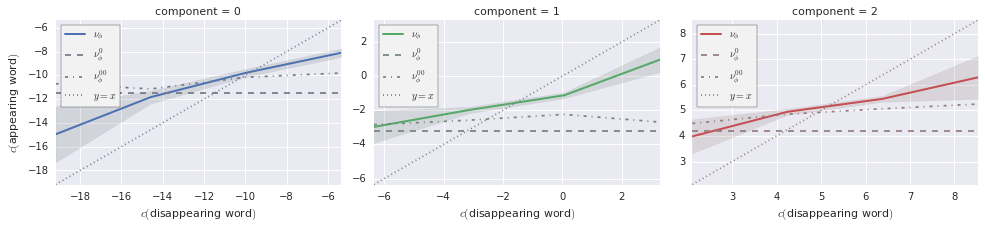

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.67959965  0.18104526]



aoa  frequency  letters_count
Component-0 -0.743352   0.389967      -0.543464
Component-1  0.309099  -0.520263      -0.796106

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 72339) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   18 of 72339) |                     | Elapsed Time: 0:00:03 ETA: 3:21:50

  0% (   52 of 72339) |                     | Elapsed Time: 0:00:03 ETA: 1:14:33

  0% (   84 of 72339) |                     | Elapsed Time: 0:00:03 ETA: 0:49:03

  0% (  116 of 72339) |                     | Elapsed Time: 0:00:03 ETA: 0:37:39

  0% (  147 of 72339) |                     | Elapsed Time: 0:00:03 ETA: 0:07:40

  0% (  175 of 72339) |                     | Elapsed Time: 0:00:04 ETA: 0:07:54

  0% (  204 of 72339) |                     | Elapsed Time: 0:00:04 ETA: 0:08:15

  0% (  232 of 72339) |                     | Elapsed Time: 0:00:04 ETA: 0:08:31

  0% (  261 of 72339) |                     | Elapsed Time: 0:00:04 ETA: 0:08:41

  0% (  291 of 72339) |                     | Elapsed Time: 0:00:04 ETA: 0:08:40

  0% (  320 of 72339) |                     | Elapsed Time: 0:00:05 ETA: 0:08:37

  0% (  350 of 72339) |                     | Elapsed Time: 0:00:05 ETA: 0:08:29

  0% (  381 of 72339) |                     | Elapsed Time: 0:00:05 ETA: 0:08:19

  0% (  411 of 72339) |                     | Elapsed Time: 0:00:05 ETA: 0:08:15

  0% (  441 of 72339) |                     | Elapsed Time: 0:00:05 ETA: 0:08:10

  0% (  472 of 72339) |                     | Elapsed Time: 0:00:06 ETA: 0:08:10

  0% (  502 of 72339) |                     | Elapsed Time: 0:00:06 ETA: 0:08:15

  0% (  532 of 72339) |                     | Elapsed Time: 0:00:06 ETA: 0:08:12

  0% (  564 of 72339) |                     | Elapsed Time: 0:00:06 ETA: 0:08:04

  0% (  595 of 72339) |                     | Elapsed Time: 0:00:06 ETA: 0:08:01

  0% (  625 of 72339) |                     | Elapsed Time: 0:00:07 ETA: 0:08:01

  0% (  657 of 72339) |                     | Elapsed Time: 0:00:07 ETA: 0:07:55

  0% (  686 of 72339) |                     | Elapsed Time: 0:00:07 ETA: 0:08:04

  0% (  718 of 72339) |                     | Elapsed Time: 0:00:07 ETA: 0:08:00

  1% (  749 of 72339) |                     | Elapsed Time: 0:00:07 ETA: 0:07:57

  1% (  780 of 72339) |                     | Elapsed Time: 0:00:08 ETA: 0:08:00

  1% (  811 of 72339) |                     | Elapsed Time: 0:00:08 ETA: 0:07:58

  1% (  844 of 72339) |                     | Elapsed Time: 0:00:08 ETA: 0:07:52

  1% (  877 of 72339) |                     | Elapsed Time: 0:00:08 ETA: 0:07:46

  1% (  920 of 72339) |                     | Elapsed Time: 0:00:09 ETA: 0:07:44

  1% (  951 of 72339) |                     | Elapsed Time: 0:00:09 ETA: 0:07:42

  1% (  984 of 72339) |                     | Elapsed Time: 0:00:09 ETA: 0:07:39

  1% ( 1016 of 72339) |                     | Elapsed Time: 0:00:09 ETA: 0:07:46

  1% ( 1049 of 72339) |                     | Elapsed Time: 0:00:09 ETA: 0:07:41

  1% ( 1081 of 72339) |                     | Elapsed Time: 0:00:10 ETA: 0:07:41

  1% ( 1115 of 72339) |                     | Elapsed Time: 0:00:10 ETA: 0:07:37

  1% ( 1148 of 72339) |                     | Elapsed Time: 0:00:10 ETA: 0:07:33

  1% ( 1181 of 72339) |                     | Elapsed Time: 0:00:10 ETA: 0:07:28

  1% ( 1213 of 72339) |                     | Elapsed Time: 0:00:10 ETA: 0:07:27

  1% ( 1248 of 72339) |                     | Elapsed Time: 0:00:11 ETA: 0:07:21

  1% ( 1280 of 72339) |                     | Elapsed Time: 0:00:11 ETA: 0:07:23

  1% ( 1313 of 72339) |                     | Elapsed Time: 0:00:11 ETA: 0:07:23

  1% ( 1348 of 72339) |                     | Elapsed Time: 0:00:11 ETA: 0:07:17

  1% ( 1381 of 72339) |                     | Elapsed Time: 0:00:12 ETA: 0:07:16

  1% ( 1415 of 72339) |                     | Elapsed Time: 0:00:12 ETA: 0:07:11

  2% ( 1447 of 72339) |                     | Elapsed Time: 0:00:12 ETA: 0:07:16

  2% ( 1479 of 72339) |                     | Elapsed Time: 0:00:12 ETA: 0:07:19

  2% ( 1514 of 72339) |                     | Elapsed Time: 0:00:12 ETA: 0:07:17

  2% ( 1548 of 72339) |                     | Elapsed Time: 0:00:13 ETA: 0:07:17

  2% ( 1582 of 72339) |                     | Elapsed Time: 0:00:13 ETA: 0:07:14

  2% ( 1618 of 72339) |                     | Elapsed Time: 0:00:13 ETA: 0:07:00

  2% ( 1654 of 72339) |                     | Elapsed Time: 0:00:13 ETA: 0:06:54

  2% ( 1689 of 72339) |                     | Elapsed Time: 0:00:13 ETA: 0:06:52

  2% ( 1721 of 72339) |                     | Elapsed Time: 0:00:14 ETA: 0:06:58

  2% ( 1753 of 72339) |                     | Elapsed Time: 0:00:14 ETA: 0:07:03

  2% ( 1786 of 72339) |                     | Elapsed Time: 0:00:14 ETA: 0:07:18

  2% ( 1827 of 72339) |                     | Elapsed Time: 0:00:14 ETA: 0:07:16

  2% ( 1862 of 72339) |                     | Elapsed Time: 0:00:14 ETA: 0:07:09

  2% ( 1895 of 72339) |                     | Elapsed Time: 0:00:15 ETA: 0:07:07

  2% ( 1928 of 72339) |                     | Elapsed Time: 0:00:15 ETA: 0:07:06

  2% ( 1963 of 72339) |                     | Elapsed Time: 0:00:15 ETA: 0:07:02

  2% ( 1997 of 72339) |                     | Elapsed Time: 0:00:15 ETA: 0:07:08

  2% ( 2029 of 72339) |                     | Elapsed Time: 0:00:15 ETA: 0:07:12

  2% ( 2056 of 72339) |                     | Elapsed Time: 0:00:16 ETA: 0:07:32

  2% ( 2077 of 72339) |                     | Elapsed Time: 0:00:16 ETA: 0:08:20

  2% ( 2097 of 72339) |                     | Elapsed Time: 0:00:16 ETA: 0:09:22

  2% ( 2119 of 72339) |                     | Elapsed Time: 0:00:16 ETA: 0:10:06

  2% ( 2139 of 72339) |                     | Elapsed Time: 0:00:16 ETA: 0:11:35

  2% ( 2159 of 72339) |                     | Elapsed Time: 0:00:17 ETA: 0:11:50

  3% ( 2179 of 72339) |                     | Elapsed Time: 0:00:17 ETA: 0:11:55

  3% ( 2198 of 72339) |                     | Elapsed Time: 0:00:17 ETA: 0:12:20

  3% ( 2217 of 72339) |                     | Elapsed Time: 0:00:17 ETA: 0:12:32

  3% ( 2237 of 72339) |                     | Elapsed Time: 0:00:18 ETA: 0:12:38

  3% ( 2257 of 72339) |                     | Elapsed Time: 0:00:18 ETA: 0:12:40

  3% ( 2276 of 72339) |                     | Elapsed Time: 0:00:18 ETA: 0:12:30

  3% ( 2296 of 72339) |                     | Elapsed Time: 0:00:18 ETA: 0:12:22

  3% ( 2316 of 72339) |                     | Elapsed Time: 0:00:18 ETA: 0:12:24

  3% ( 2336 of 72339) |                     | Elapsed Time: 0:00:19 ETA: 0:12:17

  3% ( 2356 of 72339) |                     | Elapsed Time: 0:00:19 ETA: 0:12:15

  3% ( 2376 of 72339) |                     | Elapsed Time: 0:00:19 ETA: 0:12:12

  3% ( 2396 of 72339) |                     | Elapsed Time: 0:00:19 ETA: 0:12:11

  3% ( 2418 of 72339) |                     | Elapsed Time: 0:00:19 ETA: 0:11:58

  3% ( 2442 of 72339) |                     | Elapsed Time: 0:00:20 ETA: 0:11:25

  3% ( 2463 of 72339) |                     | Elapsed Time: 0:00:20 ETA: 0:11:24

  3% ( 2483 of 72339) |                     | Elapsed Time: 0:00:20 ETA: 0:11:24

  3% ( 2503 of 72339) |                     | Elapsed Time: 0:00:20 ETA: 0:11:24

  3% ( 2523 of 72339) |                     | Elapsed Time: 0:00:20 ETA: 0:12:03

  3% ( 2543 of 72339) |                     | Elapsed Time: 0:00:21 ETA: 0:12:08

  3% ( 2563 of 72339) |                     | Elapsed Time: 0:00:21 ETA: 0:12:05

  3% ( 2584 of 72339) |                     | Elapsed Time: 0:00:21 ETA: 0:12:01

  3% ( 2604 of 72339) |                     | Elapsed Time: 0:00:21 ETA: 0:12:05

  3% ( 2624 of 72339) |                     | Elapsed Time: 0:00:22 ETA: 0:12:05

  3% ( 2644 of 72339) |                     | Elapsed Time: 0:00:22 ETA: 0:12:02

  3% ( 2664 of 72339) |                     | Elapsed Time: 0:00:22 ETA: 0:12:08

  3% ( 2684 of 72339) |                     | Elapsed Time: 0:00:22 ETA: 0:12:04

  3% ( 2713 of 72339) |                     | Elapsed Time: 0:00:22 ETA: 0:12:06

  3% ( 2733 of 72339) |                     | Elapsed Time: 0:00:23 ETA: 0:12:05

  3% ( 2753 of 72339) |                     | Elapsed Time: 0:00:23 ETA: 0:12:01

  3% ( 2774 of 72339) |                     | Elapsed Time: 0:00:23 ETA: 0:11:56

  3% ( 2797 of 72339) |                     | Elapsed Time: 0:00:23 ETA: 0:11:33

  3% ( 2820 of 72339) |                     | Elapsed Time: 0:00:24 ETA: 0:11:12

  3% ( 2840 of 72339) |                     | Elapsed Time: 0:00:24 ETA: 0:11:15

  3% ( 2860 of 72339) |                     | Elapsed Time: 0:00:24 ETA: 0:11:19

  4% ( 2895 of 72339) |                     | Elapsed Time: 0:00:24 ETA: 0:09:49

  4% ( 2931 of 72339) |                     | Elapsed Time: 0:00:24 ETA: 0:08:58

  4% ( 2967 of 72339) |                     | Elapsed Time: 0:00:25 ETA: 0:07:53

  4% ( 3003 of 72339) |                     | Elapsed Time: 0:00:25 ETA: 0:07:01

  4% ( 3039 of 72339) |                     | Elapsed Time: 0:00:25 ETA: 0:06:39

  4% ( 3075 of 72339) |                     | Elapsed Time: 0:00:25 ETA: 0:06:40

  4% ( 3111 of 72339) |                     | Elapsed Time: 0:00:25 ETA: 0:06:39

  4% ( 3147 of 72339) |                     | Elapsed Time: 0:00:26 ETA: 0:06:40

  4% ( 3183 of 72339) |                     | Elapsed Time: 0:00:26 ETA: 0:06:39

  4% ( 3219 of 72339) |                     | Elapsed Time: 0:00:26 ETA: 0:06:38

  4% ( 3251 of 72339) |                     | Elapsed Time: 0:00:26 ETA: 0:06:49

  4% ( 3283 of 72339) |                     | Elapsed Time: 0:00:26 ETA: 0:06:57

  4% ( 3315 of 72339) |                     | Elapsed Time: 0:00:27 ETA: 0:07:09

  4% ( 3348 of 72339) |                     | Elapsed Time: 0:00:27 ETA: 0:07:19

  4% ( 3380 of 72339) |                     | Elapsed Time: 0:00:27 ETA: 0:07:23

  4% ( 3410 of 72339) |                     | Elapsed Time: 0:00:27 ETA: 0:07:28

  4% ( 3442 of 72339) |                     | Elapsed Time: 0:00:27 ETA: 0:07:29

  4% ( 3474 of 72339) |#                    | Elapsed Time: 0:00:28 ETA: 0:07:30

  4% ( 3506 of 72339) |#                    | Elapsed Time: 0:00:28 ETA: 0:07:31

  4% ( 3538 of 72339) |#                    | Elapsed Time: 0:00:28 ETA: 0:07:31

  4% ( 3570 of 72339) |#                    | Elapsed Time: 0:00:28 ETA: 0:07:23

  5% ( 3617 of 72339) |#                    | Elapsed Time: 0:00:29 ETA: 0:07:22

  5% ( 3652 of 72339) |#                    | Elapsed Time: 0:00:29 ETA: 0:07:11

  5% ( 3689 of 72339) |#                    | Elapsed Time: 0:00:29 ETA: 0:07:00

  5% ( 3724 of 72339) |#                    | Elapsed Time: 0:00:29 ETA: 0:06:52

  5% ( 3759 of 72339) |#                    | Elapsed Time: 0:00:29 ETA: 0:06:45

  5% ( 3794 of 72339) |#                    | Elapsed Time: 0:00:30 ETA: 0:06:41

  5% ( 3830 of 72339) |#                    | Elapsed Time: 0:00:30 ETA: 0:06:37

  5% ( 3866 of 72339) |#                    | Elapsed Time: 0:00:30 ETA: 0:06:39

  5% ( 3901 of 72339) |#                    | Elapsed Time: 0:00:30 ETA: 0:06:40

  5% ( 3936 of 72339) |#                    | Elapsed Time: 0:00:30 ETA: 0:06:41

  5% ( 3970 of 72339) |#                    | Elapsed Time: 0:00:31 ETA: 0:06:42

  5% ( 4004 of 72339) |#                    | Elapsed Time: 0:00:31 ETA: 0:06:48

  5% ( 4036 of 72339) |#                    | Elapsed Time: 0:00:31 ETA: 0:06:56

  5% ( 4068 of 72339) |#                    | Elapsed Time: 0:00:31 ETA: 0:07:03

  5% ( 4100 of 72339) |#                    | Elapsed Time: 0:00:31 ETA: 0:07:08

  5% ( 4133 of 72339) |#                    | Elapsed Time: 0:00:32 ETA: 0:07:15

  5% ( 4166 of 72339) |#                    | Elapsed Time: 0:00:32 ETA: 0:07:11

  5% ( 4200 of 72339) |#                    | Elapsed Time: 0:00:32 ETA: 0:07:04

  5% ( 4233 of 72339) |#                    | Elapsed Time: 0:00:32 ETA: 0:07:02

  5% ( 4265 of 72339) |#                    | Elapsed Time: 0:00:32 ETA: 0:07:04

  5% ( 4296 of 72339) |#                    | Elapsed Time: 0:00:33 ETA: 0:07:07

  5% ( 4329 of 72339) |#                    | Elapsed Time: 0:00:33 ETA: 0:07:12

  6% ( 4362 of 72339) |#                    | Elapsed Time: 0:00:33 ETA: 0:07:14

  6% ( 4394 of 72339) |#                    | Elapsed Time: 0:00:33 ETA: 0:07:16

  6% ( 4428 of 72339) |#                    | Elapsed Time: 0:00:34 ETA: 0:07:07

  6% ( 4462 of 72339) |#                    | Elapsed Time: 0:00:34 ETA: 0:07:03

  6% ( 4497 of 72339) |#                    | Elapsed Time: 0:00:34 ETA: 0:06:57

  6% ( 4539 of 72339) |#                    | Elapsed Time: 0:00:34 ETA: 0:06:53

  6% ( 4571 of 72339) |#                    | Elapsed Time: 0:00:34 ETA: 0:06:55

  6% ( 4604 of 72339) |#                    | Elapsed Time: 0:00:35 ETA: 0:06:55

  6% ( 4637 of 72339) |#                    | Elapsed Time: 0:00:35 ETA: 0:07:00

  6% ( 4669 of 72339) |#                    | Elapsed Time: 0:00:35 ETA: 0:07:03

  6% ( 4701 of 72339) |#                    | Elapsed Time: 0:00:35 ETA: 0:07:06

  6% ( 4733 of 72339) |#                    | Elapsed Time: 0:00:35 ETA: 0:07:06

  6% ( 4765 of 72339) |#                    | Elapsed Time: 0:00:36 ETA: 0:07:10

  6% ( 4797 of 72339) |#                    | Elapsed Time: 0:00:36 ETA: 0:07:10

  6% ( 4830 of 72339) |#                    | Elapsed Time: 0:00:36 ETA: 0:07:08

  6% ( 4863 of 72339) |#                    | Elapsed Time: 0:00:36 ETA: 0:07:05

  6% ( 4895 of 72339) |#                    | Elapsed Time: 0:00:36 ETA: 0:07:06

  6% ( 4928 of 72339) |#                    | Elapsed Time: 0:00:37 ETA: 0:07:04

  6% ( 4956 of 72339) |#                    | Elapsed Time: 0:00:37 ETA: 0:07:22

  6% ( 4982 of 72339) |#                    | Elapsed Time: 0:00:37 ETA: 0:07:47

  6% ( 5005 of 72339) |#                    | Elapsed Time: 0:00:37 ETA: 0:08:17

  6% ( 5031 of 72339) |#                    | Elapsed Time: 0:00:37 ETA: 0:08:44

  6% ( 5055 of 72339) |#                    | Elapsed Time: 0:00:38 ETA: 0:09:08

  7% ( 5083 of 72339) |#                    | Elapsed Time: 0:00:38 ETA: 0:09:06

  7% ( 5111 of 72339) |#                    | Elapsed Time: 0:00:38 ETA: 0:08:59

  7% ( 5139 of 72339) |#                    | Elapsed Time: 0:00:38 ETA: 0:08:39

  7% ( 5168 of 72339) |#                    | Elapsed Time: 0:00:39 ETA: 0:08:21

  7% ( 5190 of 72339) |#                    | Elapsed Time: 0:00:39 ETA: 0:08:38

  7% ( 5208 of 72339) |#                    | Elapsed Time: 0:00:39 ETA: 0:09:20

  7% ( 5228 of 72339) |#                    | Elapsed Time: 0:00:39 ETA: 0:10:11

  7% ( 5248 of 72339) |#                    | Elapsed Time: 0:00:39 ETA: 0:11:19

  7% ( 5277 of 72339) |#                    | Elapsed Time: 0:00:40 ETA: 0:11:02

  7% ( 5318 of 72339) |#                    | Elapsed Time: 0:00:40 ETA: 0:08:57

  7% ( 5358 of 72339) |#                    | Elapsed Time: 0:00:40 ETA: 0:07:32

  7% ( 5391 of 72339) |#                    | Elapsed Time: 0:00:40 ETA: 0:06:48

  7% ( 5426 of 72339) |#                    | Elapsed Time: 0:00:40 ETA: 0:06:14

  7% ( 5460 of 72339) |#                    | Elapsed Time: 0:00:41 ETA: 0:06:21

  7% ( 5492 of 72339) |#                    | Elapsed Time: 0:00:41 ETA: 0:06:46

  7% ( 5524 of 72339) |#                    | Elapsed Time: 0:00:41 ETA: 0:06:54

  7% ( 5558 of 72339) |#                    | Elapsed Time: 0:00:41 ETA: 0:06:55

  7% ( 5592 of 72339) |#                    | Elapsed Time: 0:00:41 ETA: 0:06:54

  7% ( 5624 of 72339) |#                    | Elapsed Time: 0:00:42 ETA: 0:06:58

  7% ( 5658 of 72339) |#                    | Elapsed Time: 0:00:42 ETA: 0:06:50

  7% ( 5692 of 72339) |#                    | Elapsed Time: 0:00:42 ETA: 0:06:48

  7% ( 5727 of 72339) |#                    | Elapsed Time: 0:00:42 ETA: 0:06:47

  7% ( 5762 of 72339) |#                    | Elapsed Time: 0:00:42 ETA: 0:06:45

  7% ( 5784 of 72339) |#                    | Elapsed Time: 0:00:43 ETA: 0:07:14

  8% ( 5804 of 72339) |#                    | Elapsed Time: 0:00:43 ETA: 0:08:01

  8% ( 5824 of 72339) |#                    | Elapsed Time: 0:00:43 ETA: 0:09:02

  8% ( 5850 of 72339) |#                    | Elapsed Time: 0:00:43 ETA: 0:09:49

  8% ( 5888 of 72339) |#                    | Elapsed Time: 0:00:44 ETA: 0:09:02

  8% ( 5914 of 72339) |#                    | Elapsed Time: 0:00:44 ETA: 0:08:42

  8% ( 5934 of 72339) |#                    | Elapsed Time: 0:00:44 ETA: 0:08:50

  8% ( 5956 of 72339) |#                    | Elapsed Time: 0:00:44 ETA: 0:08:43

  8% ( 5976 of 72339) |#                    | Elapsed Time: 0:00:44 ETA: 0:10:02

  8% ( 5998 of 72339) |#                    | Elapsed Time: 0:00:45 ETA: 0:11:32

  8% ( 6016 of 72339) |#                    | Elapsed Time: 0:00:45 ETA: 0:11:36

  8% ( 6057 of 72339) |#                    | Elapsed Time: 0:00:45 ETA: 0:10:22

  8% ( 6087 of 72339) |#                    | Elapsed Time: 0:00:45 ETA: 0:09:20

  8% ( 6112 of 72339) |#                    | Elapsed Time: 0:00:46 ETA: 0:08:58

  8% ( 6146 of 72339) |#                    | Elapsed Time: 0:00:46 ETA: 0:07:50

  8% ( 6182 of 72339) |#                    | Elapsed Time: 0:00:46 ETA: 0:07:17

  8% ( 6216 of 72339) |#                    | Elapsed Time: 0:00:46 ETA: 0:07:08

  8% ( 6248 of 72339) |#                    | Elapsed Time: 0:00:46 ETA: 0:06:57

  8% ( 6272 of 72339) |#                    | Elapsed Time: 0:00:47 ETA: 0:07:09

  8% ( 6296 of 72339) |#                    | Elapsed Time: 0:00:47 ETA: 0:07:41

  8% ( 6330 of 72339) |#                    | Elapsed Time: 0:00:47 ETA: 0:08:25

  8% ( 6354 of 72339) |#                    | Elapsed Time: 0:00:47 ETA: 0:09:10

  8% ( 6378 of 72339) |#                    | Elapsed Time: 0:00:47 ETA: 0:09:30

  8% ( 6402 of 72339) |#                    | Elapsed Time: 0:00:48 ETA: 0:09:33

  8% ( 6427 of 72339) |#                    | Elapsed Time: 0:00:48 ETA: 0:09:28

  8% ( 6452 of 72339) |#                    | Elapsed Time: 0:00:48 ETA: 0:09:25

  8% ( 6478 of 72339) |#                    | Elapsed Time: 0:00:48 ETA: 0:09:18

  8% ( 6504 of 72339) |#                    | Elapsed Time: 0:00:49 ETA: 0:09:12

  9% ( 6530 of 72339) |#                    | Elapsed Time: 0:00:49 ETA: 0:09:04

  9% ( 6556 of 72339) |#                    | Elapsed Time: 0:00:49 ETA: 0:08:57

  9% ( 6582 of 72339) |#                    | Elapsed Time: 0:00:49 ETA: 0:08:57

  9% ( 6608 of 72339) |#                    | Elapsed Time: 0:00:49 ETA: 0:08:57

  9% ( 6634 of 72339) |#                    | Elapsed Time: 0:00:50 ETA: 0:08:54

  9% ( 6660 of 72339) |#                    | Elapsed Time: 0:00:50 ETA: 0:08:55

  9% ( 6685 of 72339) |#                    | Elapsed Time: 0:00:50 ETA: 0:08:57

  9% ( 6710 of 72339) |#                    | Elapsed Time: 0:00:50 ETA: 0:08:58

  9% ( 6735 of 72339) |#                    | Elapsed Time: 0:00:50 ETA: 0:09:02

  9% ( 6764 of 72339) |#                    | Elapsed Time: 0:00:51 ETA: 0:08:47

  9% ( 6798 of 72339) |#                    | Elapsed Time: 0:00:51 ETA: 0:08:08

  9% ( 6838 of 72339) |#                    | Elapsed Time: 0:00:51 ETA: 0:07:13

  9% ( 6877 of 72339) |#                    | Elapsed Time: 0:00:51 ETA: 0:06:34

  9% ( 6913 of 72339) |##                   | Elapsed Time: 0:00:51 ETA: 0:06:08

  9% ( 6946 of 72339) |##                   | Elapsed Time: 0:00:52 ETA: 0:06:04

  9% ( 6978 of 72339) |##                   | Elapsed Time: 0:00:52 ETA: 0:06:21

  9% ( 7012 of 72339) |##                   | Elapsed Time: 0:00:52 ETA: 0:06:36

  9% ( 7046 of 72339) |##                   | Elapsed Time: 0:00:52 ETA: 0:06:44

  9% ( 7080 of 72339) |##                   | Elapsed Time: 0:00:52 ETA: 0:06:41

  9% ( 7114 of 72339) |##                   | Elapsed Time: 0:00:53 ETA: 0:06:36

  9% ( 7147 of 72339) |##                   | Elapsed Time: 0:00:53 ETA: 0:06:34

  9% ( 7178 of 72339) |##                   | Elapsed Time: 0:00:53 ETA: 0:06:42

  9% ( 7204 of 72339) |##                   | Elapsed Time: 0:00:53 ETA: 0:07:04

 10% ( 7234 of 72339) |##                   | Elapsed Time: 0:00:54 ETA: 0:07:26

 10% ( 7262 of 72339) |##                   | Elapsed Time: 0:00:54 ETA: 0:07:46

 10% ( 7290 of 72339) |##                   | Elapsed Time: 0:00:54 ETA: 0:07:59

 10% ( 7321 of 72339) |##                   | Elapsed Time: 0:00:54 ETA: 0:07:51

 10% ( 7351 of 72339) |##                   | Elapsed Time: 0:00:54 ETA: 0:07:40

 10% ( 7381 of 72339) |##                   | Elapsed Time: 0:00:55 ETA: 0:07:38

 10% ( 7411 of 72339) |##                   | Elapsed Time: 0:00:55 ETA: 0:07:35

 10% ( 7441 of 72339) |##                   | Elapsed Time: 0:00:55 ETA: 0:07:33

 10% ( 7470 of 72339) |##                   | Elapsed Time: 0:00:55 ETA: 0:07:40

 10% ( 7499 of 72339) |##                   | Elapsed Time: 0:00:55 ETA: 0:07:41

 10% ( 7529 of 72339) |##                   | Elapsed Time: 0:00:56 ETA: 0:07:41

 10% ( 7557 of 72339) |##                   | Elapsed Time: 0:00:56 ETA: 0:07:43

 10% ( 7585 of 72339) |##                   | Elapsed Time: 0:00:56 ETA: 0:07:49

 10% ( 7613 of 72339) |##                   | Elapsed Time: 0:00:56 ETA: 0:07:50

 10% ( 7641 of 72339) |##                   | Elapsed Time: 0:00:56 ETA: 0:07:54

 10% ( 7669 of 72339) |##                   | Elapsed Time: 0:00:57 ETA: 0:07:57

 10% ( 7696 of 72339) |##                   | Elapsed Time: 0:00:57 ETA: 0:07:59

 10% ( 7724 of 72339) |##                   | Elapsed Time: 0:00:57 ETA: 0:08:00

 10% ( 7753 of 72339) |##                   | Elapsed Time: 0:00:57 ETA: 0:07:57

 10% ( 7783 of 72339) |##                   | Elapsed Time: 0:00:57 ETA: 0:07:52

 10% ( 7814 of 72339) |##                   | Elapsed Time: 0:00:58 ETA: 0:07:40

 10% ( 7844 of 72339) |##                   | Elapsed Time: 0:00:58 ETA: 0:07:33

 10% ( 7875 of 72339) |##                   | Elapsed Time: 0:00:58 ETA: 0:07:26

 10% ( 7905 of 72339) |##                   | Elapsed Time: 0:00:58 ETA: 0:07:24

 10% ( 7935 of 72339) |##                   | Elapsed Time: 0:00:59 ETA: 0:07:21

 11% ( 7966 of 72339) |##                   | Elapsed Time: 0:00:59 ETA: 0:07:21

 11% ( 7996 of 72339) |##                   | Elapsed Time: 0:00:59 ETA: 0:07:21

 11% ( 8025 of 72339) |##                   | Elapsed Time: 0:00:59 ETA: 0:07:24

 11% ( 8055 of 72339) |##                   | Elapsed Time: 0:00:59 ETA: 0:07:25

 11% ( 8085 of 72339) |##                   | Elapsed Time: 0:01:00 ETA: 0:07:24

 11% ( 8115 of 72339) |##                   | Elapsed Time: 0:01:00 ETA: 0:07:26

 11% ( 8154 of 72339) |##                   | Elapsed Time: 0:01:00 ETA: 0:07:27

 11% ( 8184 of 72339) |##                   | Elapsed Time: 0:01:00 ETA: 0:07:23

 11% ( 8214 of 72339) |##                   | Elapsed Time: 0:01:00 ETA: 0:07:23

 11% ( 8244 of 72339) |##                   | Elapsed Time: 0:01:01 ETA: 0:07:23

 11% ( 8273 of 72339) |##                   | Elapsed Time: 0:01:01 ETA: 0:07:25

 11% ( 8301 of 72339) |##                   | Elapsed Time: 0:01:01 ETA: 0:07:30

 11% ( 8328 of 72339) |##                   | Elapsed Time: 0:01:01 ETA: 0:07:37

 11% ( 8356 of 72339) |##                   | Elapsed Time: 0:01:01 ETA: 0:07:43

 11% ( 8385 of 72339) |##                   | Elapsed Time: 0:01:02 ETA: 0:07:45

 11% ( 8414 of 72339) |##                   | Elapsed Time: 0:01:02 ETA: 0:07:44

 11% ( 8443 of 72339) |##                   | Elapsed Time: 0:01:02 ETA: 0:07:43

 11% ( 8473 of 72339) |##                   | Elapsed Time: 0:01:02 ETA: 0:07:32

 11% ( 8503 of 72339) |##                   | Elapsed Time: 0:01:03 ETA: 0:07:27

 11% ( 8532 of 72339) |##                   | Elapsed Time: 0:01:03 ETA: 0:07:24

 11% ( 8562 of 72339) |##                   | Elapsed Time: 0:01:03 ETA: 0:07:23

 11% ( 8592 of 72339) |##                   | Elapsed Time: 0:01:03 ETA: 0:07:27

 11% ( 8622 of 72339) |##                   | Elapsed Time: 0:01:03 ETA: 0:07:24

 11% ( 8651 of 72339) |##                   | Elapsed Time: 0:01:04 ETA: 0:07:26

 12% ( 8681 of 72339) |##                   | Elapsed Time: 0:01:04 ETA: 0:07:23

 12% ( 8711 of 72339) |##                   | Elapsed Time: 0:01:04 ETA: 0:07:23

 12% ( 8741 of 72339) |##                   | Elapsed Time: 0:01:04 ETA: 0:07:23

 12% ( 8771 of 72339) |##                   | Elapsed Time: 0:01:04 ETA: 0:07:23

 12% ( 8801 of 72339) |##                   | Elapsed Time: 0:01:05 ETA: 0:07:22

 12% ( 8831 of 72339) |##                   | Elapsed Time: 0:01:05 ETA: 0:07:22

 12% ( 8861 of 72339) |##                   | Elapsed Time: 0:01:05 ETA: 0:07:23

 12% ( 8891 of 72339) |##                   | Elapsed Time: 0:01:05 ETA: 0:07:20

 12% ( 8921 of 72339) |##                   | Elapsed Time: 0:01:05 ETA: 0:07:19

 12% ( 8951 of 72339) |##                   | Elapsed Time: 0:01:06 ETA: 0:07:19

 12% ( 8980 of 72339) |##                   | Elapsed Time: 0:01:06 ETA: 0:07:21

 12% ( 9010 of 72339) |##                   | Elapsed Time: 0:01:06 ETA: 0:07:20

 12% ( 9043 of 72339) |##                   | Elapsed Time: 0:01:06 ETA: 0:07:19

 12% ( 9073 of 72339) |##                   | Elapsed Time: 0:01:06 ETA: 0:07:17

 12% ( 9102 of 72339) |##                   | Elapsed Time: 0:01:07 ETA: 0:07:17

 12% ( 9132 of 72339) |##                   | Elapsed Time: 0:01:07 ETA: 0:07:17

 12% ( 9161 of 72339) |##                   | Elapsed Time: 0:01:07 ETA: 0:07:21

 12% ( 9212 of 72339) |##                   | Elapsed Time: 0:01:07 ETA: 0:06:57

 12% ( 9248 of 72339) |##                   | Elapsed Time: 0:01:08 ETA: 0:06:38

 12% ( 9280 of 72339) |##                   | Elapsed Time: 0:01:08 ETA: 0:06:33

 12% ( 9313 of 72339) |##                   | Elapsed Time: 0:01:08 ETA: 0:06:21

 12% ( 9349 of 72339) |##                   | Elapsed Time: 0:01:08 ETA: 0:06:19

 12% ( 9380 of 72339) |##                   | Elapsed Time: 0:01:08 ETA: 0:06:29

 13% ( 9412 of 72339) |##                   | Elapsed Time: 0:01:09 ETA: 0:06:34

 13% ( 9446 of 72339) |##                   | Elapsed Time: 0:01:09 ETA: 0:06:26

 13% ( 9479 of 72339) |##                   | Elapsed Time: 0:01:09 ETA: 0:06:31

 13% ( 9514 of 72339) |##                   | Elapsed Time: 0:01:09 ETA: 0:06:28

 13% ( 9547 of 72339) |##                   | Elapsed Time: 0:01:09 ETA: 0:06:21

 13% ( 9583 of 72339) |##                   | Elapsed Time: 0:01:10 ETA: 0:06:16

 13% ( 9619 of 72339) |##                   | Elapsed Time: 0:01:10 ETA: 0:06:13

 13% ( 9654 of 72339) |##                   | Elapsed Time: 0:01:10 ETA: 0:06:09

 13% ( 9689 of 72339) |##                   | Elapsed Time: 0:01:10 ETA: 0:06:05

 13% ( 9721 of 72339) |##                   | Elapsed Time: 0:01:11 ETA: 0:06:12

 13% ( 9753 of 72339) |##                   | Elapsed Time: 0:01:11 ETA: 0:06:21

 13% ( 9785 of 72339) |##                   | Elapsed Time: 0:01:11 ETA: 0:06:30

 13% ( 9817 of 72339) |##                   | Elapsed Time: 0:01:11 ETA: 0:06:40

 13% ( 9849 of 72339) |##                   | Elapsed Time: 0:01:11 ETA: 0:06:42

 13% ( 9881 of 72339) |##                   | Elapsed Time: 0:01:12 ETA: 0:06:40

 13% ( 9911 of 72339) |##                   | Elapsed Time: 0:01:12 ETA: 0:06:45

 13% ( 9947 of 72339) |##                   | Elapsed Time: 0:01:12 ETA: 0:06:51

 13% ( 9981 of 72339) |##                   | Elapsed Time: 0:01:12 ETA: 0:06:47

 13% (10015 of 72339) |##                   | Elapsed Time: 0:01:12 ETA: 0:06:42

 13% (10051 of 72339) |##                   | Elapsed Time: 0:01:13 ETA: 0:06:29

 13% (10087 of 72339) |##                   | Elapsed Time: 0:01:13 ETA: 0:06:15

 13% (10123 of 72339) |##                   | Elapsed Time: 0:01:13 ETA: 0:06:02

 14% (10159 of 72339) |##                   | Elapsed Time: 0:01:13 ETA: 0:05:58

 14% (10194 of 72339) |##                   | Elapsed Time: 0:01:13 ETA: 0:05:59

 14% (10230 of 72339) |##                   | Elapsed Time: 0:01:14 ETA: 0:05:59

 14% (10266 of 72339) |##                   | Elapsed Time: 0:01:14 ETA: 0:05:58

 14% (10302 of 72339) |##                   | Elapsed Time: 0:01:14 ETA: 0:05:58

 14% (10337 of 72339) |###                  | Elapsed Time: 0:01:14 ETA: 0:05:57

 14% (10373 of 72339) |###                  | Elapsed Time: 0:01:14 ETA: 0:05:58

 14% (10409 of 72339) |###                  | Elapsed Time: 0:01:15 ETA: 0:05:58

 14% (10445 of 72339) |###                  | Elapsed Time: 0:01:15 ETA: 0:05:59

 14% (10480 of 72339) |###                  | Elapsed Time: 0:01:15 ETA: 0:06:00

 14% (10514 of 72339) |###                  | Elapsed Time: 0:01:15 ETA: 0:06:00

 14% (10548 of 72339) |###                  | Elapsed Time: 0:01:15 ETA: 0:06:03

 14% (10582 of 72339) |###                  | Elapsed Time: 0:01:16 ETA: 0:06:05

 14% (10617 of 72339) |###                  | Elapsed Time: 0:01:16 ETA: 0:06:06

 14% (10650 of 72339) |###                  | Elapsed Time: 0:01:16 ETA: 0:06:10

 14% (10684 of 72339) |###                  | Elapsed Time: 0:01:16 ETA: 0:06:10

 14% (10718 of 72339) |###                  | Elapsed Time: 0:01:17 ETA: 0:06:10

 14% (10752 of 72339) |###                  | Elapsed Time: 0:01:17 ETA: 0:06:09

 14% (10786 of 72339) |###                  | Elapsed Time: 0:01:17 ETA: 0:06:07

 14% (10837 of 72339) |###                  | Elapsed Time: 0:01:17 ETA: 0:06:05

 15% (10868 of 72339) |###                  | Elapsed Time: 0:01:17 ETA: 0:06:05

 15% (10902 of 72339) |###                  | Elapsed Time: 0:01:18 ETA: 0:06:05

 15% (10936 of 72339) |###                  | Elapsed Time: 0:01:18 ETA: 0:06:06

 15% (10970 of 72339) |###                  | Elapsed Time: 0:01:18 ETA: 0:06:06

 15% (11004 of 72339) |###                  | Elapsed Time: 0:01:18 ETA: 0:06:06

 15% (11038 of 72339) |###                  | Elapsed Time: 0:01:18 ETA: 0:06:06

 15% (11073 of 72339) |###                  | Elapsed Time: 0:01:19 ETA: 0:06:05

 15% (11107 of 72339) |###                  | Elapsed Time: 0:01:19 ETA: 0:06:04

 15% (11141 of 72339) |###                  | Elapsed Time: 0:01:19 ETA: 0:06:05

 15% (11175 of 72339) |###                  | Elapsed Time: 0:01:19 ETA: 0:06:03

 15% (11210 of 72339) |###                  | Elapsed Time: 0:01:19 ETA: 0:06:02

 15% (11244 of 72339) |###                  | Elapsed Time: 0:01:20 ETA: 0:06:05

 15% (11276 of 72339) |###                  | Elapsed Time: 0:01:20 ETA: 0:06:11

 15% (11310 of 72339) |###                  | Elapsed Time: 0:01:20 ETA: 0:06:12

 15% (11344 of 72339) |###                  | Elapsed Time: 0:01:20 ETA: 0:06:13

 15% (11380 of 72339) |###                  | Elapsed Time: 0:01:20 ETA: 0:06:16

 15% (11411 of 72339) |###                  | Elapsed Time: 0:01:21 ETA: 0:06:19

 15% (11445 of 72339) |###                  | Elapsed Time: 0:01:21 ETA: 0:06:17

 15% (11478 of 72339) |###                  | Elapsed Time: 0:01:21 ETA: 0:06:16

 15% (11510 of 72339) |###                  | Elapsed Time: 0:01:21 ETA: 0:06:23

 15% (11545 of 72339) |###                  | Elapsed Time: 0:01:22 ETA: 0:06:18

 16% (11580 of 72339) |###                  | Elapsed Time: 0:01:22 ETA: 0:06:12

 16% (11612 of 72339) |###                  | Elapsed Time: 0:01:22 ETA: 0:06:17

 16% (11646 of 72339) |###                  | Elapsed Time: 0:01:22 ETA: 0:06:16

 16% (11680 of 72339) |###                  | Elapsed Time: 0:01:22 ETA: 0:06:13

 16% (11711 of 72339) |###                  | Elapsed Time: 0:01:23 ETA: 0:06:18

 16% (11756 of 72339) |###                  | Elapsed Time: 0:01:23 ETA: 0:06:19

 16% (11790 of 72339) |###                  | Elapsed Time: 0:01:23 ETA: 0:06:15

 16% (11823 of 72339) |###                  | Elapsed Time: 0:01:23 ETA: 0:06:18

 16% (11855 of 72339) |###                  | Elapsed Time: 0:01:23 ETA: 0:06:18

 16% (11890 of 72339) |###                  | Elapsed Time: 0:01:24 ETA: 0:06:14

 16% (11922 of 72339) |###                  | Elapsed Time: 0:01:24 ETA: 0:06:20

 16% (11952 of 72339) |###                  | Elapsed Time: 0:01:24 ETA: 0:06:28

 16% (11981 of 72339) |###                  | Elapsed Time: 0:01:24 ETA: 0:06:39

 16% (12008 of 72339) |###                  | Elapsed Time: 0:01:25 ETA: 0:06:59

 16% (12039 of 72339) |###                  | Elapsed Time: 0:01:25 ETA: 0:07:09

 16% (12068 of 72339) |###                  | Elapsed Time: 0:01:25 ETA: 0:07:15

 16% (12097 of 72339) |###                  | Elapsed Time: 0:01:25 ETA: 0:07:10

 16% (12127 of 72339) |###                  | Elapsed Time: 0:01:25 ETA: 0:07:02

 16% (12157 of 72339) |###                  | Elapsed Time: 0:01:26 ETA: 0:06:58

 16% (12185 of 72339) |###                  | Elapsed Time: 0:01:26 ETA: 0:07:01

 16% (12213 of 72339) |###                  | Elapsed Time: 0:01:26 ETA: 0:07:08

 16% (12243 of 72339) |###                  | Elapsed Time: 0:01:26 ETA: 0:07:10

 16% (12271 of 72339) |###                  | Elapsed Time: 0:01:26 ETA: 0:07:13

 17% (12302 of 72339) |###                  | Elapsed Time: 0:01:27 ETA: 0:07:09

 17% (12331 of 72339) |###                  | Elapsed Time: 0:01:27 ETA: 0:07:02

 17% (12359 of 72339) |###                  | Elapsed Time: 0:01:27 ETA: 0:07:04

 17% (12390 of 72339) |###                  | Elapsed Time: 0:01:27 ETA: 0:07:08

 17% (12421 of 72339) |###                  | Elapsed Time: 0:01:27 ETA: 0:07:00

 17% (12451 of 72339) |###                  | Elapsed Time: 0:01:28 ETA: 0:06:55

 17% (12481 of 72339) |###                  | Elapsed Time: 0:01:28 ETA: 0:06:45

 17% (12505 of 72339) |###                  | Elapsed Time: 0:01:28 ETA: 0:07:12

 17% (12534 of 72339) |###                  | Elapsed Time: 0:01:28 ETA: 0:07:20

 17% (12565 of 72339) |###                  | Elapsed Time: 0:01:28 ETA: 0:07:15

 17% (12593 of 72339) |###                  | Elapsed Time: 0:01:29 ETA: 0:07:27

 17% (12621 of 72339) |###                  | Elapsed Time: 0:01:29 ETA: 0:07:16

 17% (12660 of 72339) |###                  | Elapsed Time: 0:01:29 ETA: 0:07:06

 17% (12691 of 72339) |###                  | Elapsed Time: 0:01:29 ETA: 0:07:01

 17% (12723 of 72339) |###                  | Elapsed Time: 0:01:30 ETA: 0:06:49

 17% (12753 of 72339) |###                  | Elapsed Time: 0:01:30 ETA: 0:06:42

 17% (12782 of 72339) |###                  | Elapsed Time: 0:01:30 ETA: 0:06:50

 17% (12813 of 72339) |###                  | Elapsed Time: 0:01:30 ETA: 0:06:44

 17% (12847 of 72339) |###                  | Elapsed Time: 0:01:30 ETA: 0:06:36

 17% (12878 of 72339) |###                  | Elapsed Time: 0:01:31 ETA: 0:06:36

 17% (12912 of 72339) |###                  | Elapsed Time: 0:01:31 ETA: 0:06:23

 17% (12943 of 72339) |###                  | Elapsed Time: 0:01:31 ETA: 0:06:22

 17% (12973 of 72339) |###                  | Elapsed Time: 0:01:31 ETA: 0:06:29

 17% (13002 of 72339) |###                  | Elapsed Time: 0:01:31 ETA: 0:06:43

 18% (13031 of 72339) |###                  | Elapsed Time: 0:01:32 ETA: 0:06:49

 18% (13061 of 72339) |###                  | Elapsed Time: 0:01:32 ETA: 0:06:53

 18% (13093 of 72339) |###                  | Elapsed Time: 0:01:32 ETA: 0:06:54

 18% (13126 of 72339) |###                  | Elapsed Time: 0:01:32 ETA: 0:06:38

 18% (13159 of 72339) |###                  | Elapsed Time: 0:01:32 ETA: 0:06:29

 18% (13192 of 72339) |###                  | Elapsed Time: 0:01:33 ETA: 0:06:16

 18% (13223 of 72339) |###                  | Elapsed Time: 0:01:33 ETA: 0:06:16

 18% (13257 of 72339) |###                  | Elapsed Time: 0:01:33 ETA: 0:06:12

 18% (13288 of 72339) |###                  | Elapsed Time: 0:01:33 ETA: 0:06:17

 18% (13320 of 72339) |###                  | Elapsed Time: 0:01:34 ETA: 0:06:16

 18% (13351 of 72339) |###                  | Elapsed Time: 0:01:34 ETA: 0:06:23

 18% (13382 of 72339) |###                  | Elapsed Time: 0:01:34 ETA: 0:06:25

 18% (13412 of 72339) |###                  | Elapsed Time: 0:01:34 ETA: 0:06:34

 18% (13442 of 72339) |###                  | Elapsed Time: 0:01:34 ETA: 0:06:35

 18% (13472 of 72339) |###                  | Elapsed Time: 0:01:35 ETA: 0:06:42

 18% (13504 of 72339) |###                  | Elapsed Time: 0:01:35 ETA: 0:06:35

 18% (13536 of 72339) |###                  | Elapsed Time: 0:01:35 ETA: 0:06:32

 18% (13581 of 72339) |###                  | Elapsed Time: 0:01:35 ETA: 0:06:21

 18% (13613 of 72339) |###                  | Elapsed Time: 0:01:35 ETA: 0:06:17

 18% (13646 of 72339) |###                  | Elapsed Time: 0:01:36 ETA: 0:06:13

 18% (13680 of 72339) |###                  | Elapsed Time: 0:01:36 ETA: 0:06:10

 18% (13712 of 72339) |###                  | Elapsed Time: 0:01:36 ETA: 0:06:09

 19% (13746 of 72339) |###                  | Elapsed Time: 0:01:36 ETA: 0:06:06

 19% (13780 of 72339) |####                 | Elapsed Time: 0:01:36 ETA: 0:06:02

 19% (13811 of 72339) |####                 | Elapsed Time: 0:01:37 ETA: 0:06:07

 19% (13842 of 72339) |####                 | Elapsed Time: 0:01:37 ETA: 0:06:09

 19% (13875 of 72339) |####                 | Elapsed Time: 0:01:37 ETA: 0:06:12

 19% (13907 of 72339) |####                 | Elapsed Time: 0:01:37 ETA: 0:06:17

 19% (13939 of 72339) |####                 | Elapsed Time: 0:01:38 ETA: 0:06:16

 19% (13971 of 72339) |####                 | Elapsed Time: 0:01:38 ETA: 0:06:19

 19% (14003 of 72339) |####                 | Elapsed Time: 0:01:38 ETA: 0:06:13

 19% (14036 of 72339) |####                 | Elapsed Time: 0:01:38 ETA: 0:06:15

 19% (14070 of 72339) |####                 | Elapsed Time: 0:01:38 ETA: 0:06:05

 19% (14104 of 72339) |####                 | Elapsed Time: 0:01:39 ETA: 0:05:59

 19% (14137 of 72339) |####                 | Elapsed Time: 0:01:39 ETA: 0:05:58

 19% (14168 of 72339) |####                 | Elapsed Time: 0:01:39 ETA: 0:06:01

 19% (14201 of 72339) |####                 | Elapsed Time: 0:01:39 ETA: 0:06:02

 19% (14234 of 72339) |####                 | Elapsed Time: 0:01:39 ETA: 0:06:06

 19% (14268 of 72339) |####                 | Elapsed Time: 0:01:40 ETA: 0:06:07

 19% (14300 of 72339) |####                 | Elapsed Time: 0:01:40 ETA: 0:06:07

 19% (14333 of 72339) |####                 | Elapsed Time: 0:01:40 ETA: 0:06:01

 19% (14365 of 72339) |####                 | Elapsed Time: 0:01:40 ETA: 0:06:04

 19% (14398 of 72339) |####                 | Elapsed Time: 0:01:40 ETA: 0:06:04

 19% (14425 of 72339) |####                 | Elapsed Time: 0:01:41 ETA: 0:06:20

 20% (14468 of 72339) |####                 | Elapsed Time: 0:01:41 ETA: 0:06:36

 20% (14498 of 72339) |####                 | Elapsed Time: 0:01:41 ETA: 0:06:35

 20% (14522 of 72339) |####                 | Elapsed Time: 0:01:41 ETA: 0:07:04

 20% (14552 of 72339) |####                 | Elapsed Time: 0:01:42 ETA: 0:07:05

 20% (14584 of 72339) |####                 | Elapsed Time: 0:01:42 ETA: 0:06:45

 20% (14614 of 72339) |####                 | Elapsed Time: 0:01:42 ETA: 0:06:47

 20% (14645 of 72339) |####                 | Elapsed Time: 0:01:42 ETA: 0:06:44

 20% (14677 of 72339) |####                 | Elapsed Time: 0:01:42 ETA: 0:06:23

 20% (14709 of 72339) |####                 | Elapsed Time: 0:01:43 ETA: 0:06:28

 20% (14739 of 72339) |####                 | Elapsed Time: 0:01:43 ETA: 0:06:32

 20% (14771 of 72339) |####                 | Elapsed Time: 0:01:43 ETA: 0:06:25

 20% (14794 of 72339) |####                 | Elapsed Time: 0:01:43 ETA: 0:06:49

 20% (14818 of 72339) |####                 | Elapsed Time: 0:01:43 ETA: 0:07:13

 20% (14837 of 72339) |####                 | Elapsed Time: 0:01:44 ETA: 0:07:57

 20% (14859 of 72339) |####                 | Elapsed Time: 0:01:44 ETA: 0:08:43

 20% (14883 of 72339) |####                 | Elapsed Time: 0:01:44 ETA: 0:09:00

 20% (14909 of 72339) |####                 | Elapsed Time: 0:01:44 ETA: 0:08:45

 20% (14932 of 72339) |####                 | Elapsed Time: 0:01:44 ETA: 0:08:42

 20% (14956 of 72339) |####                 | Elapsed Time: 0:01:45 ETA: 0:08:19

 20% (14981 of 72339) |####                 | Elapsed Time: 0:01:45 ETA: 0:08:22

 20% (15014 of 72339) |####                 | Elapsed Time: 0:01:45 ETA: 0:07:38

 20% (15047 of 72339) |####                 | Elapsed Time: 0:01:45 ETA: 0:07:12

 20% (15081 of 72339) |####                 | Elapsed Time: 0:01:46 ETA: 0:06:26

 20% (15115 of 72339) |####                 | Elapsed Time: 0:01:46 ETA: 0:06:01

 20% (15148 of 72339) |####                 | Elapsed Time: 0:01:46 ETA: 0:05:55

 20% (15182 of 72339) |####                 | Elapsed Time: 0:01:46 ETA: 0:05:54

 21% (15214 of 72339) |####                 | Elapsed Time: 0:01:46 ETA: 0:05:57

 21% (15246 of 72339) |####                 | Elapsed Time: 0:01:47 ETA: 0:06:03

 21% (15278 of 72339) |####                 | Elapsed Time: 0:01:47 ETA: 0:06:05

 21% (15310 of 72339) |####                 | Elapsed Time: 0:01:47 ETA: 0:06:08

 21% (15342 of 72339) |####                 | Elapsed Time: 0:01:47 ETA: 0:06:12

 21% (15389 of 72339) |####                 | Elapsed Time: 0:01:47 ETA: 0:06:09

 21% (15421 of 72339) |####                 | Elapsed Time: 0:01:48 ETA: 0:06:07

 21% (15452 of 72339) |####                 | Elapsed Time: 0:01:48 ETA: 0:06:09

 21% (15483 of 72339) |####                 | Elapsed Time: 0:01:48 ETA: 0:06:11

 21% (15515 of 72339) |####                 | Elapsed Time: 0:01:48 ETA: 0:06:10

 21% (15547 of 72339) |####                 | Elapsed Time: 0:01:49 ETA: 0:06:12

 21% (15579 of 72339) |####                 | Elapsed Time: 0:01:49 ETA: 0:06:10

 21% (15611 of 72339) |####                 | Elapsed Time: 0:01:49 ETA: 0:06:08

 21% (15643 of 72339) |####                 | Elapsed Time: 0:01:49 ETA: 0:06:08

 21% (15673 of 72339) |####                 | Elapsed Time: 0:01:49 ETA: 0:06:14

 21% (15696 of 72339) |####                 | Elapsed Time: 0:01:50 ETA: 0:06:41

 21% (15724 of 72339) |####                 | Elapsed Time: 0:01:50 ETA: 0:06:52

 21% (15755 of 72339) |####                 | Elapsed Time: 0:01:50 ETA: 0:06:54

 21% (15791 of 72339) |####                 | Elapsed Time: 0:01:50 ETA: 0:06:38

 21% (15825 of 72339) |####                 | Elapsed Time: 0:01:50 ETA: 0:06:10

 21% (15857 of 72339) |####                 | Elapsed Time: 0:01:51 ETA: 0:05:54

 21% (15889 of 72339) |####                 | Elapsed Time: 0:01:51 ETA: 0:05:39

 22% (15924 of 72339) |####                 | Elapsed Time: 0:01:51 ETA: 0:05:44

 22% (15956 of 72339) |####                 | Elapsed Time: 0:01:51 ETA: 0:05:56

 22% (15988 of 72339) |####                 | Elapsed Time: 0:01:51 ETA: 0:05:56

 22% (16020 of 72339) |####                 | Elapsed Time: 0:01:52 ETA: 0:05:58

 22% (16055 of 72339) |####                 | Elapsed Time: 0:01:52 ETA: 0:05:56

 22% (16087 of 72339) |####                 | Elapsed Time: 0:01:52 ETA: 0:05:56

 22% (16119 of 72339) |####                 | Elapsed Time: 0:01:52 ETA: 0:05:55

 22% (16152 of 72339) |####                 | Elapsed Time: 0:01:52 ETA: 0:05:50

 22% (16184 of 72339) |####                 | Elapsed Time: 0:01:53 ETA: 0:05:54

 22% (16217 of 72339) |####                 | Elapsed Time: 0:01:53 ETA: 0:05:58

 22% (16248 of 72339) |####                 | Elapsed Time: 0:01:53 ETA: 0:05:58

 22% (16293 of 72339) |####                 | Elapsed Time: 0:01:53 ETA: 0:06:03

 22% (16326 of 72339) |####                 | Elapsed Time: 0:01:54 ETA: 0:06:01

 22% (16359 of 72339) |####                 | Elapsed Time: 0:01:54 ETA: 0:06:00

 22% (16398 of 72339) |####                 | Elapsed Time: 0:01:54 ETA: 0:05:43

 22% (16435 of 72339) |####                 | Elapsed Time: 0:01:54 ETA: 0:05:30

 22% (16472 of 72339) |####                 | Elapsed Time: 0:01:54 ETA: 0:05:18

 22% (16509 of 72339) |####                 | Elapsed Time: 0:01:55 ETA: 0:05:09

 22% (16545 of 72339) |####                 | Elapsed Time: 0:01:55 ETA: 0:05:08

 22% (16582 of 72339) |####                 | Elapsed Time: 0:01:55 ETA: 0:05:10

 22% (16618 of 72339) |####                 | Elapsed Time: 0:01:55 ETA: 0:05:11

 23% (16654 of 72339) |####                 | Elapsed Time: 0:01:55 ETA: 0:05:12

 23% (16690 of 72339) |####                 | Elapsed Time: 0:01:56 ETA: 0:05:14

 23% (16726 of 72339) |####                 | Elapsed Time: 0:01:56 ETA: 0:05:18

 23% (16762 of 72339) |####                 | Elapsed Time: 0:01:56 ETA: 0:05:20

 23% (16799 of 72339) |####                 | Elapsed Time: 0:01:56 ETA: 0:05:19

 23% (16837 of 72339) |####                 | Elapsed Time: 0:01:56 ETA: 0:05:13

 23% (16875 of 72339) |####                 | Elapsed Time: 0:01:57 ETA: 0:05:07

 23% (16902 of 72339) |####                 | Elapsed Time: 0:01:57 ETA: 0:05:25

 23% (16927 of 72339) |####                 | Elapsed Time: 0:01:57 ETA: 0:05:51

 23% (16953 of 72339) |####                 | Elapsed Time: 0:01:57 ETA: 0:06:24

 23% (16979 of 72339) |####                 | Elapsed Time: 0:01:58 ETA: 0:07:07

 23% (17003 of 72339) |####                 | Elapsed Time: 0:01:58 ETA: 0:07:42

 23% (17029 of 72339) |####                 | Elapsed Time: 0:01:58 ETA: 0:07:42

 23% (17055 of 72339) |####                 | Elapsed Time: 0:01:58 ETA: 0:07:38

 23% (17081 of 72339) |####                 | Elapsed Time: 0:01:58 ETA: 0:07:38

 23% (17106 of 72339) |####                 | Elapsed Time: 0:01:59 ETA: 0:07:31

 23% (17132 of 72339) |####                 | Elapsed Time: 0:01:59 ETA: 0:07:32

 23% (17158 of 72339) |####                 | Elapsed Time: 0:01:59 ETA: 0:07:31

 23% (17194 of 72339) |####                 | Elapsed Time: 0:01:59 ETA: 0:07:31

 23% (17222 of 72339) |####                 | Elapsed Time: 0:01:59 ETA: 0:07:22

 23% (17254 of 72339) |#####                | Elapsed Time: 0:02:00 ETA: 0:06:57

 23% (17286 of 72339) |#####                | Elapsed Time: 0:02:00 ETA: 0:06:39

 23% (17319 of 72339) |#####                | Elapsed Time: 0:02:00 ETA: 0:06:18

 23% (17351 of 72339) |#####                | Elapsed Time: 0:02:00 ETA: 0:05:55

 24% (17385 of 72339) |#####                | Elapsed Time: 0:02:01 ETA: 0:05:49

 24% (17419 of 72339) |#####                | Elapsed Time: 0:02:01 ETA: 0:05:44

 24% (17453 of 72339) |#####                | Elapsed Time: 0:02:01 ETA: 0:05:40

 24% (17487 of 72339) |#####                | Elapsed Time: 0:02:01 ETA: 0:05:34

 24% (17521 of 72339) |#####                | Elapsed Time: 0:02:01 ETA: 0:05:32

 24% (17556 of 72339) |#####                | Elapsed Time: 0:02:02 ETA: 0:05:28

 24% (17590 of 72339) |#####                | Elapsed Time: 0:02:02 ETA: 0:05:28

 24% (17626 of 72339) |#####                | Elapsed Time: 0:02:02 ETA: 0:05:24

 24% (17662 of 72339) |#####                | Elapsed Time: 0:02:02 ETA: 0:05:20

 24% (17697 of 72339) |#####                | Elapsed Time: 0:02:02 ETA: 0:05:19

 24% (17732 of 72339) |#####                | Elapsed Time: 0:02:03 ETA: 0:05:16

 24% (17766 of 72339) |#####                | Elapsed Time: 0:02:03 ETA: 0:05:19

 24% (17800 of 72339) |#####                | Elapsed Time: 0:02:03 ETA: 0:05:22

 24% (17834 of 72339) |#####                | Elapsed Time: 0:02:03 ETA: 0:05:23

 24% (17869 of 72339) |#####                | Elapsed Time: 0:02:03 ETA: 0:05:24

 24% (17903 of 72339) |#####                | Elapsed Time: 0:02:04 ETA: 0:05:25

 24% (17937 of 72339) |#####                | Elapsed Time: 0:02:04 ETA: 0:05:24

 24% (17971 of 72339) |#####                | Elapsed Time: 0:02:04 ETA: 0:05:23

 24% (18006 of 72339) |#####                | Elapsed Time: 0:02:04 ETA: 0:05:24

 24% (18041 of 72339) |#####                | Elapsed Time: 0:02:04 ETA: 0:05:23

 25% (18085 of 72339) |#####                | Elapsed Time: 0:02:05 ETA: 0:05:22

 25% (18120 of 72339) |#####                | Elapsed Time: 0:02:05 ETA: 0:05:20

 25% (18154 of 72339) |#####                | Elapsed Time: 0:02:05 ETA: 0:05:19

 25% (18189 of 72339) |#####                | Elapsed Time: 0:02:05 ETA: 0:05:22

 25% (18223 of 72339) |#####                | Elapsed Time: 0:02:06 ETA: 0:05:23

 25% (18251 of 72339) |#####                | Elapsed Time: 0:02:06 ETA: 0:05:39

 25% (18279 of 72339) |#####                | Elapsed Time: 0:02:06 ETA: 0:05:55

 25% (18306 of 72339) |#####                | Elapsed Time: 0:02:06 ETA: 0:06:15

 25% (18334 of 72339) |#####                | Elapsed Time: 0:02:06 ETA: 0:06:38

 25% (18363 of 72339) |#####                | Elapsed Time: 0:02:07 ETA: 0:06:39

 25% (18391 of 72339) |#####                | Elapsed Time: 0:02:07 ETA: 0:06:37

 25% (18421 of 72339) |#####                | Elapsed Time: 0:02:07 ETA: 0:06:32

 25% (18450 of 72339) |#####                | Elapsed Time: 0:02:07 ETA: 0:06:26

 25% (18478 of 72339) |#####                | Elapsed Time: 0:02:07 ETA: 0:06:25

 25% (18506 of 72339) |#####                | Elapsed Time: 0:02:08 ETA: 0:06:27

 25% (18534 of 72339) |#####                | Elapsed Time: 0:02:08 ETA: 0:06:31

 25% (18563 of 72339) |#####                | Elapsed Time: 0:02:08 ETA: 0:06:31

 25% (18599 of 72339) |#####                | Elapsed Time: 0:02:08 ETA: 0:06:08

 25% (18636 of 72339) |#####                | Elapsed Time: 0:02:08 ETA: 0:05:47

 25% (18673 of 72339) |#####                | Elapsed Time: 0:02:09 ETA: 0:05:25

 25% (18711 of 72339) |#####                | Elapsed Time: 0:02:09 ETA: 0:05:04

 25% (18749 of 72339) |#####                | Elapsed Time: 0:02:09 ETA: 0:04:57

 25% (18786 of 72339) |#####                | Elapsed Time: 0:02:09 ETA: 0:04:56

 26% (18823 of 72339) |#####                | Elapsed Time: 0:02:09 ETA: 0:04:55

 26% (18860 of 72339) |#####                | Elapsed Time: 0:02:10 ETA: 0:04:56

 26% (18898 of 72339) |#####                | Elapsed Time: 0:02:10 ETA: 0:04:56

 26% (18926 of 72339) |#####                | Elapsed Time: 0:02:10 ETA: 0:05:15

 26% (18955 of 72339) |#####                | Elapsed Time: 0:02:10 ETA: 0:05:32

 26% (18989 of 72339) |#####                | Elapsed Time: 0:02:11 ETA: 0:05:49

 26% (19021 of 72339) |#####                | Elapsed Time: 0:02:11 ETA: 0:06:02

 26% (19054 of 72339) |#####                | Elapsed Time: 0:02:11 ETA: 0:06:02

 26% (19086 of 72339) |#####                | Elapsed Time: 0:02:11 ETA: 0:05:51

 26% (19118 of 72339) |#####                | Elapsed Time: 0:02:11 ETA: 0:05:42

 26% (19150 of 72339) |#####                | Elapsed Time: 0:02:12 ETA: 0:05:38

 26% (19198 of 72339) |#####                | Elapsed Time: 0:02:12 ETA: 0:05:36

 26% (19230 of 72339) |#####                | Elapsed Time: 0:02:12 ETA: 0:05:36

 26% (19262 of 72339) |#####                | Elapsed Time: 0:02:12 ETA: 0:05:38

 26% (19293 of 72339) |#####                | Elapsed Time: 0:02:12 ETA: 0:05:41

 26% (19325 of 72339) |#####                | Elapsed Time: 0:02:13 ETA: 0:05:44

 26% (19355 of 72339) |#####                | Elapsed Time: 0:02:13 ETA: 0:05:48

 26% (19385 of 72339) |#####                | Elapsed Time: 0:02:13 ETA: 0:05:54

 26% (19417 of 72339) |#####                | Elapsed Time: 0:02:13 ETA: 0:05:54

 26% (19448 of 72339) |#####                | Elapsed Time: 0:02:13 ETA: 0:05:55

 26% (19479 of 72339) |#####                | Elapsed Time: 0:02:14 ETA: 0:05:55

 26% (19507 of 72339) |#####                | Elapsed Time: 0:02:14 ETA: 0:06:02

 27% (19543 of 72339) |#####                | Elapsed Time: 0:02:14 ETA: 0:05:47

 27% (19575 of 72339) |#####                | Elapsed Time: 0:02:14 ETA: 0:05:46

 27% (19608 of 72339) |#####                | Elapsed Time: 0:02:15 ETA: 0:05:38

 27% (19640 of 72339) |#####                | Elapsed Time: 0:02:15 ETA: 0:05:29

 27% (19670 of 72339) |#####                | Elapsed Time: 0:02:15 ETA: 0:05:34

 27% (19700 of 72339) |#####                | Elapsed Time: 0:02:15 ETA: 0:05:44

 27% (19731 of 72339) |#####                | Elapsed Time: 0:02:15 ETA: 0:05:46

 27% (19762 of 72339) |#####                | Elapsed Time: 0:02:16 ETA: 0:05:50

 27% (19793 of 72339) |#####                | Elapsed Time: 0:02:16 ETA: 0:05:51

 27% (19824 of 72339) |#####                | Elapsed Time: 0:02:16 ETA: 0:05:51

 27% (19854 of 72339) |#####                | Elapsed Time: 0:02:16 ETA: 0:05:51

 27% (19894 of 72339) |#####                | Elapsed Time: 0:02:16 ETA: 0:05:51

 27% (19926 of 72339) |#####                | Elapsed Time: 0:02:17 ETA: 0:05:48

 27% (19958 of 72339) |#####                | Elapsed Time: 0:02:17 ETA: 0:05:45

 27% (19990 of 72339) |#####                | Elapsed Time: 0:02:17 ETA: 0:05:41

 27% (20024 of 72339) |#####                | Elapsed Time: 0:02:17 ETA: 0:05:33

 27% (20061 of 72339) |#####                | Elapsed Time: 0:02:17 ETA: 0:05:22

 27% (20099 of 72339) |#####                | Elapsed Time: 0:02:18 ETA: 0:05:08

 27% (20137 of 72339) |#####                | Elapsed Time: 0:02:18 ETA: 0:04:55

 27% (20174 of 72339) |#####                | Elapsed Time: 0:02:18 ETA: 0:04:48

 27% (20211 of 72339) |#####                | Elapsed Time: 0:02:18 ETA: 0:04:43

 27% (20249 of 72339) |#####                | Elapsed Time: 0:02:18 ETA: 0:04:42

 28% (20286 of 72339) |#####                | Elapsed Time: 0:02:19 ETA: 0:04:43

 28% (20323 of 72339) |#####                | Elapsed Time: 0:02:19 ETA: 0:04:45

 28% (20360 of 72339) |#####                | Elapsed Time: 0:02:19 ETA: 0:04:44

 28% (20395 of 72339) |#####                | Elapsed Time: 0:02:19 ETA: 0:04:50

 28% (20428 of 72339) |#####                | Elapsed Time: 0:02:20 ETA: 0:05:00

 28% (20463 of 72339) |#####                | Elapsed Time: 0:02:20 ETA: 0:05:06

 28% (20499 of 72339) |#####                | Elapsed Time: 0:02:20 ETA: 0:05:07

 28% (20535 of 72339) |#####                | Elapsed Time: 0:02:20 ETA: 0:05:08

 28% (20571 of 72339) |#####                | Elapsed Time: 0:02:20 ETA: 0:05:01

 28% (20606 of 72339) |#####                | Elapsed Time: 0:02:21 ETA: 0:05:00

 28% (20642 of 72339) |#####                | Elapsed Time: 0:02:21 ETA: 0:04:59

 28% (20681 of 72339) |######               | Elapsed Time: 0:02:21 ETA: 0:04:52

 28% (20721 of 72339) |######               | Elapsed Time: 0:02:21 ETA: 0:04:46

 28% (20761 of 72339) |######               | Elapsed Time: 0:02:21 ETA: 0:04:38

 28% (20818 of 72339) |######               | Elapsed Time: 0:02:22 ETA: 0:04:30

 28% (20858 of 72339) |######               | Elapsed Time: 0:02:22 ETA: 0:04:26

 28% (20895 of 72339) |######               | Elapsed Time: 0:02:22 ETA: 0:04:29

 28% (20928 of 72339) |######               | Elapsed Time: 0:02:22 ETA: 0:04:37

 28% (20963 of 72339) |######               | Elapsed Time: 0:02:23 ETA: 0:04:45

 29% (20997 of 72339) |######               | Elapsed Time: 0:02:23 ETA: 0:04:57

 29% (21030 of 72339) |######               | Elapsed Time: 0:02:23 ETA: 0:05:08

 29% (21062 of 72339) |######               | Elapsed Time: 0:02:23 ETA: 0:05:12

 29% (21094 of 72339) |######               | Elapsed Time: 0:02:23 ETA: 0:05:17

 29% (21126 of 72339) |######               | Elapsed Time: 0:02:24 ETA: 0:05:22

 29% (21159 of 72339) |######               | Elapsed Time: 0:02:24 ETA: 0:05:25

 29% (21193 of 72339) |######               | Elapsed Time: 0:02:24 ETA: 0:05:23

 29% (21231 of 72339) |######               | Elapsed Time: 0:02:24 ETA: 0:05:07

 29% (21270 of 72339) |######               | Elapsed Time: 0:02:24 ETA: 0:04:56

 29% (21309 of 72339) |######               | Elapsed Time: 0:02:25 ETA: 0:04:45

 29% (21348 of 72339) |######               | Elapsed Time: 0:02:25 ETA: 0:04:34

 29% (21386 of 72339) |######               | Elapsed Time: 0:02:25 ETA: 0:04:32

 29% (21424 of 72339) |######               | Elapsed Time: 0:02:25 ETA: 0:04:32

 29% (21460 of 72339) |######               | Elapsed Time: 0:02:25 ETA: 0:04:37

 29% (21497 of 72339) |######               | Elapsed Time: 0:02:26 ETA: 0:04:40

 29% (21537 of 72339) |######               | Elapsed Time: 0:02:26 ETA: 0:04:38

 29% (21577 of 72339) |######               | Elapsed Time: 0:02:26 ETA: 0:04:33

 29% (21613 of 72339) |######               | Elapsed Time: 0:02:26 ETA: 0:04:32

 29% (21651 of 72339) |######               | Elapsed Time: 0:02:26 ETA: 0:04:28

 30% (21702 of 72339) |######               | Elapsed Time: 0:02:27 ETA: 0:04:31

 30% (21740 of 72339) |######               | Elapsed Time: 0:02:27 ETA: 0:04:34

 30% (21777 of 72339) |######               | Elapsed Time: 0:02:27 ETA: 0:04:36

 30% (21812 of 72339) |######               | Elapsed Time: 0:02:27 ETA: 0:04:38

 30% (21848 of 72339) |######               | Elapsed Time: 0:02:28 ETA: 0:04:41

 30% (21882 of 72339) |######               | Elapsed Time: 0:02:28 ETA: 0:04:46

 30% (21919 of 72339) |######               | Elapsed Time: 0:02:28 ETA: 0:04:48

 30% (21957 of 72339) |######               | Elapsed Time: 0:02:28 ETA: 0:04:44

 30% (21995 of 72339) |######               | Elapsed Time: 0:02:28 ETA: 0:04:42

 30% (22028 of 72339) |######               | Elapsed Time: 0:02:29 ETA: 0:04:45

 30% (22058 of 72339) |######               | Elapsed Time: 0:02:29 ETA: 0:04:55

 30% (22088 of 72339) |######               | Elapsed Time: 0:02:29 ETA: 0:05:10

 30% (22118 of 72339) |######               | Elapsed Time: 0:02:29 ETA: 0:05:28

 30% (22151 of 72339) |######               | Elapsed Time: 0:02:29 ETA: 0:05:37

 30% (22187 of 72339) |######               | Elapsed Time: 0:02:30 ETA: 0:05:23

 30% (22227 of 72339) |######               | Elapsed Time: 0:02:30 ETA: 0:05:02

 30% (22268 of 72339) |######               | Elapsed Time: 0:02:30 ETA: 0:04:41

 30% (22309 of 72339) |######               | Elapsed Time: 0:02:30 ETA: 0:04:24

 30% (22349 of 72339) |######               | Elapsed Time: 0:02:30 ETA: 0:04:16

 30% (22389 of 72339) |######               | Elapsed Time: 0:02:31 ETA: 0:04:11

 31% (22430 of 72339) |######               | Elapsed Time: 0:02:31 ETA: 0:04:12

 31% (22470 of 72339) |######               | Elapsed Time: 0:02:31 ETA: 0:04:12

 31% (22510 of 72339) |######               | Elapsed Time: 0:02:31 ETA: 0:04:11

 31% (22550 of 72339) |######               | Elapsed Time: 0:02:31 ETA: 0:04:11

 31% (22606 of 72339) |######               | Elapsed Time: 0:02:32 ETA: 0:04:13

 31% (22644 of 72339) |######               | Elapsed Time: 0:02:32 ETA: 0:04:17

 31% (22681 of 72339) |######               | Elapsed Time: 0:02:32 ETA: 0:04:22

 31% (22719 of 72339) |######               | Elapsed Time: 0:02:32 ETA: 0:04:25

 31% (22757 of 72339) |######               | Elapsed Time: 0:02:33 ETA: 0:04:28

 31% (22795 of 72339) |######               | Elapsed Time: 0:02:33 ETA: 0:04:28

 31% (22833 of 72339) |######               | Elapsed Time: 0:02:33 ETA: 0:04:27

 31% (22871 of 72339) |######               | Elapsed Time: 0:02:33 ETA: 0:04:26

 31% (22908 of 72339) |######               | Elapsed Time: 0:02:33 ETA: 0:04:27

 31% (22947 of 72339) |######               | Elapsed Time: 0:02:34 ETA: 0:04:26

 31% (22986 of 72339) |######               | Elapsed Time: 0:02:34 ETA: 0:04:24

 31% (23025 of 72339) |######               | Elapsed Time: 0:02:34 ETA: 0:04:23

 31% (23062 of 72339) |######               | Elapsed Time: 0:02:34 ETA: 0:04:22

 31% (23117 of 72339) |######               | Elapsed Time: 0:02:34 ETA: 0:04:25

 32% (23155 of 72339) |######               | Elapsed Time: 0:02:35 ETA: 0:04:27

 32% (23190 of 72339) |######               | Elapsed Time: 0:02:35 ETA: 0:04:34

 32% (23224 of 72339) |######               | Elapsed Time: 0:02:35 ETA: 0:04:39

 32% (23261 of 72339) |######               | Elapsed Time: 0:02:35 ETA: 0:04:40

 32% (23294 of 72339) |######               | Elapsed Time: 0:02:35 ETA: 0:04:49

 32% (23323 of 72339) |######               | Elapsed Time: 0:02:36 ETA: 0:05:04

 32% (23352 of 72339) |######               | Elapsed Time: 0:02:36 ETA: 0:05:17

 32% (23380 of 72339) |######               | Elapsed Time: 0:02:36 ETA: 0:05:42

 32% (23406 of 72339) |######               | Elapsed Time: 0:02:36 ETA: 0:05:58

 32% (23432 of 72339) |######               | Elapsed Time: 0:02:37 ETA: 0:06:08

 32% (23458 of 72339) |######               | Elapsed Time: 0:02:37 ETA: 0:06:15

 32% (23485 of 72339) |######               | Elapsed Time: 0:02:37 ETA: 0:06:28

 32% (23511 of 72339) |######               | Elapsed Time: 0:02:37 ETA: 0:06:33

 32% (23543 of 72339) |######               | Elapsed Time: 0:02:37 ETA: 0:06:12

 32% (23577 of 72339) |######               | Elapsed Time: 0:02:38 ETA: 0:05:49

 32% (23608 of 72339) |######               | Elapsed Time: 0:02:38 ETA: 0:05:37

 32% (23641 of 72339) |######               | Elapsed Time: 0:02:38 ETA: 0:05:17

 32% (23672 of 72339) |######               | Elapsed Time: 0:02:38 ETA: 0:05:10

 32% (23698 of 72339) |######               | Elapsed Time: 0:02:38 ETA: 0:05:26

 32% (23733 of 72339) |######               | Elapsed Time: 0:02:39 ETA: 0:05:23

 32% (23766 of 72339) |######               | Elapsed Time: 0:02:39 ETA: 0:05:17

 32% (23798 of 72339) |######               | Elapsed Time: 0:02:39 ETA: 0:05:20

 32% (23826 of 72339) |######               | Elapsed Time: 0:02:39 ETA: 0:05:12

 32% (23855 of 72339) |######               | Elapsed Time: 0:02:39 ETA: 0:05:20

 33% (23885 of 72339) |######               | Elapsed Time: 0:02:40 ETA: 0:05:29

 33% (23915 of 72339) |######               | Elapsed Time: 0:02:40 ETA: 0:05:40

 33% (23945 of 72339) |######               | Elapsed Time: 0:02:40 ETA: 0:05:36

 33% (23975 of 72339) |######               | Elapsed Time: 0:02:40 ETA: 0:05:32

 33% (24005 of 72339) |######               | Elapsed Time: 0:02:40 ETA: 0:05:31

 33% (24036 of 72339) |######               | Elapsed Time: 0:02:41 ETA: 0:05:30

 33% (24063 of 72339) |######               | Elapsed Time: 0:02:41 ETA: 0:05:38

 33% (24087 of 72339) |######               | Elapsed Time: 0:02:41 ETA: 0:05:53

 33% (24121 of 72339) |#######              | Elapsed Time: 0:02:41 ETA: 0:05:42

 33% (24153 of 72339) |#######              | Elapsed Time: 0:02:41 ETA: 0:05:36

 33% (24187 of 72339) |#######              | Elapsed Time: 0:02:42 ETA: 0:05:24

 33% (24222 of 72339) |#######              | Elapsed Time: 0:02:42 ETA: 0:04:59

 33% (24260 of 72339) |#######              | Elapsed Time: 0:02:42 ETA: 0:04:41

 33% (24289 of 72339) |#######              | Elapsed Time: 0:02:42 ETA: 0:04:51

 33% (24322 of 72339) |#######              | Elapsed Time: 0:02:43 ETA: 0:04:49

 33% (24362 of 72339) |#######              | Elapsed Time: 0:02:43 ETA: 0:04:42

 33% (24415 of 72339) |#######              | Elapsed Time: 0:02:43 ETA: 0:04:34

 33% (24451 of 72339) |#######              | Elapsed Time: 0:02:43 ETA: 0:04:32

 33% (24489 of 72339) |#######              | Elapsed Time: 0:02:43 ETA: 0:04:16

 33% (24522 of 72339) |#######              | Elapsed Time: 0:02:44 ETA: 0:04:26

 33% (24553 of 72339) |#######              | Elapsed Time: 0:02:44 ETA: 0:04:41

 33% (24586 of 72339) |#######              | Elapsed Time: 0:02:44 ETA: 0:04:51

 34% (24616 of 72339) |#######              | Elapsed Time: 0:02:44 ETA: 0:05:02

 34% (24646 of 72339) |#######              | Elapsed Time: 0:02:44 ETA: 0:05:17

 34% (24676 of 72339) |#######              | Elapsed Time: 0:02:45 ETA: 0:05:23

 34% (24704 of 72339) |#######              | Elapsed Time: 0:02:45 ETA: 0:05:33

 34% (24738 of 72339) |#######              | Elapsed Time: 0:02:45 ETA: 0:05:26

 34% (24772 of 72339) |#######              | Elapsed Time: 0:02:45 ETA: 0:05:11

 34% (24806 of 72339) |#######              | Elapsed Time: 0:02:45 ETA: 0:05:09

 34% (24840 of 72339) |#######              | Elapsed Time: 0:02:46 ETA: 0:04:52

 34% (24874 of 72339) |#######              | Elapsed Time: 0:02:46 ETA: 0:04:49

 34% (24908 of 72339) |#######              | Elapsed Time: 0:02:46 ETA: 0:04:50

 34% (24942 of 72339) |#######              | Elapsed Time: 0:02:46 ETA: 0:04:48

 34% (24976 of 72339) |#######              | Elapsed Time: 0:02:47 ETA: 0:04:48

 34% (25010 of 72339) |#######              | Elapsed Time: 0:02:47 ETA: 0:04:47

 34% (25043 of 72339) |#######              | Elapsed Time: 0:02:47 ETA: 0:04:48

 34% (25070 of 72339) |#######              | Elapsed Time: 0:02:47 ETA: 0:05:03

 34% (25096 of 72339) |#######              | Elapsed Time: 0:02:47 ETA: 0:05:20

 34% (25124 of 72339) |#######              | Elapsed Time: 0:02:48 ETA: 0:05:35

 34% (25152 of 72339) |#######              | Elapsed Time: 0:02:48 ETA: 0:05:50

 34% (25184 of 72339) |#######              | Elapsed Time: 0:02:48 ETA: 0:05:53

 34% (25217 of 72339) |#######              | Elapsed Time: 0:02:48 ETA: 0:05:29

 34% (25251 of 72339) |#######              | Elapsed Time: 0:02:48 ETA: 0:05:13

 34% (25289 of 72339) |#######              | Elapsed Time: 0:02:49 ETA: 0:04:51

 35% (25319 of 72339) |#######              | Elapsed Time: 0:02:49 ETA: 0:04:58

 35% (25340 of 72339) |#######              | Elapsed Time: 0:02:49 ETA: 0:05:37

 35% (25360 of 72339) |#######              | Elapsed Time: 0:02:49 ETA: 0:06:07

 35% (25381 of 72339) |#######              | Elapsed Time: 0:02:50 ETA: 0:07:04

 35% (25404 of 72339) |#######              | Elapsed Time: 0:02:50 ETA: 0:07:49

 35% (25439 of 72339) |#######              | Elapsed Time: 0:02:50 ETA: 0:06:44

 35% (25477 of 72339) |#######              | Elapsed Time: 0:02:50 ETA: 0:05:47

 35% (25513 of 72339) |#######              | Elapsed Time: 0:02:50 ETA: 0:05:05

 35% (25548 of 72339) |#######              | Elapsed Time: 0:02:51 ETA: 0:04:37

 35% (25584 of 72339) |#######              | Elapsed Time: 0:02:51 ETA: 0:04:25

 35% (25620 of 72339) |#######              | Elapsed Time: 0:02:51 ETA: 0:04:28

 35% (25656 of 72339) |#######              | Elapsed Time: 0:02:51 ETA: 0:04:33

 35% (25691 of 72339) |#######              | Elapsed Time: 0:02:51 ETA: 0:04:31

 35% (25727 of 72339) |#######              | Elapsed Time: 0:02:52 ETA: 0:04:31

 35% (25756 of 72339) |#######              | Elapsed Time: 0:02:52 ETA: 0:04:43

 35% (25788 of 72339) |#######              | Elapsed Time: 0:02:52 ETA: 0:04:50

 35% (25818 of 72339) |#######              | Elapsed Time: 0:02:52 ETA: 0:05:01

 35% (25847 of 72339) |#######              | Elapsed Time: 0:02:52 ETA: 0:05:14

 35% (25877 of 72339) |#######              | Elapsed Time: 0:02:53 ETA: 0:05:20

 35% (25907 of 72339) |#######              | Elapsed Time: 0:02:53 ETA: 0:05:27

 35% (25939 of 72339) |#######              | Elapsed Time: 0:02:53 ETA: 0:05:21

 35% (25969 of 72339) |#######              | Elapsed Time: 0:02:53 ETA: 0:05:15

 35% (25999 of 72339) |#######              | Elapsed Time: 0:02:53 ETA: 0:05:14

 35% (26030 of 72339) |#######              | Elapsed Time: 0:02:54 ETA: 0:05:12

 36% (26058 of 72339) |#######              | Elapsed Time: 0:02:54 ETA: 0:05:14

 36% (26092 of 72339) |#######              | Elapsed Time: 0:02:54 ETA: 0:05:09

 36% (26128 of 72339) |#######              | Elapsed Time: 0:02:54 ETA: 0:04:57

 36% (26164 of 72339) |#######              | Elapsed Time: 0:02:54 ETA: 0:04:47

 36% (26199 of 72339) |#######              | Elapsed Time: 0:02:55 ETA: 0:04:35

 36% (26241 of 72339) |#######              | Elapsed Time: 0:02:55 ETA: 0:04:29

 36% (26277 of 72339) |#######              | Elapsed Time: 0:02:55 ETA: 0:04:30

 36% (26309 of 72339) |#######              | Elapsed Time: 0:02:55 ETA: 0:04:35

 36% (26346 of 72339) |#######              | Elapsed Time: 0:02:56 ETA: 0:04:33

 36% (26382 of 72339) |#######              | Elapsed Time: 0:02:56 ETA: 0:04:31

 36% (26419 of 72339) |#######              | Elapsed Time: 0:02:56 ETA: 0:04:28

 36% (26456 of 72339) |#######              | Elapsed Time: 0:02:56 ETA: 0:04:18

 36% (26494 of 72339) |#######              | Elapsed Time: 0:02:56 ETA: 0:04:14

 36% (26534 of 72339) |#######              | Elapsed Time: 0:02:57 ETA: 0:04:10

 36% (26570 of 72339) |#######              | Elapsed Time: 0:02:57 ETA: 0:04:09

 36% (26608 of 72339) |#######              | Elapsed Time: 0:02:57 ETA: 0:04:07

 36% (26642 of 72339) |#######              | Elapsed Time: 0:02:57 ETA: 0:04:11

 36% (26673 of 72339) |#######              | Elapsed Time: 0:02:57 ETA: 0:04:24

 36% (26707 of 72339) |#######              | Elapsed Time: 0:02:58 ETA: 0:04:31

 36% (26741 of 72339) |#######              | Elapsed Time: 0:02:58 ETA: 0:04:39

 37% (26775 of 72339) |#######              | Elapsed Time: 0:02:58 ETA: 0:04:36

 37% (26811 of 72339) |#######              | Elapsed Time: 0:02:58 ETA: 0:04:36

 37% (26847 of 72339) |#######              | Elapsed Time: 0:02:58 ETA: 0:04:30

 37% (26883 of 72339) |#######              | Elapsed Time: 0:02:59 ETA: 0:04:26

 37% (26911 of 72339) |#######              | Elapsed Time: 0:02:59 ETA: 0:04:35

 37% (26939 of 72339) |#######              | Elapsed Time: 0:02:59 ETA: 0:04:49

 37% (26967 of 72339) |#######              | Elapsed Time: 0:02:59 ETA: 0:05:05

 37% (26995 of 72339) |#######              | Elapsed Time: 0:02:59 ETA: 0:05:22

 37% (27023 of 72339) |#######              | Elapsed Time: 0:03:00 ETA: 0:05:32

 37% (27051 of 72339) |#######              | Elapsed Time: 0:03:00 ETA: 0:05:32

 37% (27088 of 72339) |#######              | Elapsed Time: 0:03:00 ETA: 0:05:10

 37% (27128 of 72339) |#######              | Elapsed Time: 0:03:00 ETA: 0:04:54

 37% (27165 of 72339) |#######              | Elapsed Time: 0:03:01 ETA: 0:04:36

 37% (27196 of 72339) |#######              | Elapsed Time: 0:03:01 ETA: 0:04:31

 37% (27226 of 72339) |#######              | Elapsed Time: 0:03:01 ETA: 0:04:37

 37% (27258 of 72339) |#######              | Elapsed Time: 0:03:01 ETA: 0:04:42

 37% (27290 of 72339) |#######              | Elapsed Time: 0:03:01 ETA: 0:04:51

 37% (27322 of 72339) |#######              | Elapsed Time: 0:03:02 ETA: 0:04:57

 37% (27355 of 72339) |#######              | Elapsed Time: 0:03:02 ETA: 0:04:48

 37% (27387 of 72339) |#######              | Elapsed Time: 0:03:02 ETA: 0:04:46

 37% (27421 of 72339) |#######              | Elapsed Time: 0:03:02 ETA: 0:04:43

 37% (27455 of 72339) |#######              | Elapsed Time: 0:03:02 ETA: 0:04:41

 37% (27488 of 72339) |#######              | Elapsed Time: 0:03:03 ETA: 0:04:40

 38% (27519 of 72339) |#######              | Elapsed Time: 0:03:03 ETA: 0:04:44

 38% (27550 of 72339) |#######              | Elapsed Time: 0:03:03 ETA: 0:04:49

 38% (27583 of 72339) |########             | Elapsed Time: 0:03:03 ETA: 0:04:49

 38% (27616 of 72339) |########             | Elapsed Time: 0:03:03 ETA: 0:04:48

 38% (27655 of 72339) |########             | Elapsed Time: 0:03:04 ETA: 0:04:31

 38% (27695 of 72339) |########             | Elapsed Time: 0:03:04 ETA: 0:04:19

 38% (27735 of 72339) |########             | Elapsed Time: 0:03:04 ETA: 0:04:03

 38% (27774 of 72339) |########             | Elapsed Time: 0:03:04 ETA: 0:03:59

 38% (27811 of 72339) |########             | Elapsed Time: 0:03:04 ETA: 0:03:55

 38% (27848 of 72339) |########             | Elapsed Time: 0:03:05 ETA: 0:03:58

 38% (27880 of 72339) |########             | Elapsed Time: 0:03:05 ETA: 0:04:09

 38% (27907 of 72339) |########             | Elapsed Time: 0:03:05 ETA: 0:04:31

 38% (27931 of 72339) |########             | Elapsed Time: 0:03:05 ETA: 0:04:57

 38% (27955 of 72339) |########             | Elapsed Time: 0:03:05 ETA: 0:05:25

 38% (27979 of 72339) |########             | Elapsed Time: 0:03:06 ETA: 0:06:02

 38% (28003 of 72339) |########             | Elapsed Time: 0:03:06 ETA: 0:06:13

 38% (28032 of 72339) |########             | Elapsed Time: 0:03:06 ETA: 0:06:12

 38% (28068 of 72339) |########             | Elapsed Time: 0:03:06 ETA: 0:05:32

 38% (28103 of 72339) |########             | Elapsed Time: 0:03:07 ETA: 0:05:04

 38% (28137 of 72339) |########             | Elapsed Time: 0:03:07 ETA: 0:04:44

 38% (28169 of 72339) |########             | Elapsed Time: 0:03:07 ETA: 0:04:31

 38% (28200 of 72339) |########             | Elapsed Time: 0:03:07 ETA: 0:04:30

 39% (28230 of 72339) |########             | Elapsed Time: 0:03:07 ETA: 0:04:43

 39% (28260 of 72339) |########             | Elapsed Time: 0:03:08 ETA: 0:04:54

 39% (28290 of 72339) |########             | Elapsed Time: 0:03:08 ETA: 0:05:04

 39% (28320 of 72339) |########             | Elapsed Time: 0:03:08 ETA: 0:05:07

 39% (28355 of 72339) |########             | Elapsed Time: 0:03:08 ETA: 0:04:55

 39% (28389 of 72339) |########             | Elapsed Time: 0:03:08 ETA: 0:04:44

 39% (28426 of 72339) |########             | Elapsed Time: 0:03:09 ETA: 0:04:28

 39% (28462 of 72339) |########             | Elapsed Time: 0:03:09 ETA: 0:04:17

 39% (28498 of 72339) |########             | Elapsed Time: 0:03:09 ETA: 0:04:10

 39% (28534 of 72339) |########             | Elapsed Time: 0:03:09 ETA: 0:04:09

 39% (28570 of 72339) |########             | Elapsed Time: 0:03:09 ETA: 0:04:07

 39% (28606 of 72339) |########             | Elapsed Time: 0:03:10 ETA: 0:04:10

 39% (28642 of 72339) |########             | Elapsed Time: 0:03:10 ETA: 0:04:11

 39% (28678 of 72339) |########             | Elapsed Time: 0:03:10 ETA: 0:04:12

 39% (28713 of 72339) |########             | Elapsed Time: 0:03:10 ETA: 0:04:13

 39% (28749 of 72339) |########             | Elapsed Time: 0:03:10 ETA: 0:04:13

 39% (28784 of 72339) |########             | Elapsed Time: 0:03:11 ETA: 0:04:13

 39% (28820 of 72339) |########             | Elapsed Time: 0:03:11 ETA: 0:04:13

 39% (28855 of 72339) |########             | Elapsed Time: 0:03:11 ETA: 0:04:13

 39% (28891 of 72339) |########             | Elapsed Time: 0:03:11 ETA: 0:04:12

 40% (28936 of 72339) |########             | Elapsed Time: 0:03:12 ETA: 0:04:12

 40% (28972 of 72339) |########             | Elapsed Time: 0:03:12 ETA: 0:04:10

 40% (29009 of 72339) |########             | Elapsed Time: 0:03:12 ETA: 0:04:07

 40% (29047 of 72339) |########             | Elapsed Time: 0:03:12 ETA: 0:04:04

 40% (29085 of 72339) |########             | Elapsed Time: 0:03:12 ETA: 0:04:01

 40% (29123 of 72339) |########             | Elapsed Time: 0:03:13 ETA: 0:03:59

 40% (29157 of 72339) |########             | Elapsed Time: 0:03:13 ETA: 0:04:01

 40% (29191 of 72339) |########             | Elapsed Time: 0:03:13 ETA: 0:04:06

 40% (29225 of 72339) |########             | Elapsed Time: 0:03:13 ETA: 0:04:11

 40% (29259 of 72339) |########             | Elapsed Time: 0:03:13 ETA: 0:04:17

 40% (29293 of 72339) |########             | Elapsed Time: 0:03:14 ETA: 0:04:19

 40% (29331 of 72339) |########             | Elapsed Time: 0:03:14 ETA: 0:04:12

 40% (29371 of 72339) |########             | Elapsed Time: 0:03:14 ETA: 0:04:02

 40% (29410 of 72339) |########             | Elapsed Time: 0:03:14 ETA: 0:03:55

 40% (29440 of 72339) |########             | Elapsed Time: 0:03:14 ETA: 0:04:01

 40% (29473 of 72339) |########             | Elapsed Time: 0:03:15 ETA: 0:04:03

 40% (29512 of 72339) |########             | Elapsed Time: 0:03:15 ETA: 0:04:07

 40% (29544 of 72339) |########             | Elapsed Time: 0:03:15 ETA: 0:04:21

 40% (29568 of 72339) |########             | Elapsed Time: 0:03:15 ETA: 0:04:37

 40% (29597 of 72339) |########             | Elapsed Time: 0:03:15 ETA: 0:04:36

 40% (29634 of 72339) |########             | Elapsed Time: 0:03:16 ETA: 0:04:38

 41% (29671 of 72339) |########             | Elapsed Time: 0:03:16 ETA: 0:04:42

 41% (29709 of 72339) |########             | Elapsed Time: 0:03:16 ETA: 0:04:18

 41% (29745 of 72339) |########             | Elapsed Time: 0:03:16 ETA: 0:03:58

 41% (29781 of 72339) |########             | Elapsed Time: 0:03:16 ETA: 0:03:58

 41% (29817 of 72339) |########             | Elapsed Time: 0:03:17 ETA: 0:03:59

 41% (29858 of 72339) |########             | Elapsed Time: 0:03:17 ETA: 0:04:03

 41% (29893 of 72339) |########             | Elapsed Time: 0:03:17 ETA: 0:04:05

 41% (29928 of 72339) |########             | Elapsed Time: 0:03:17 ETA: 0:04:09

 41% (29963 of 72339) |########             | Elapsed Time: 0:03:18 ETA: 0:04:07

 41% (29998 of 72339) |########             | Elapsed Time: 0:03:18 ETA: 0:04:08

 41% (30033 of 72339) |########             | Elapsed Time: 0:03:18 ETA: 0:04:07

 41% (30069 of 72339) |########             | Elapsed Time: 0:03:18 ETA: 0:04:07

 41% (30103 of 72339) |########             | Elapsed Time: 0:03:18 ETA: 0:04:09

 41% (30137 of 72339) |########             | Elapsed Time: 0:03:19 ETA: 0:04:10

 41% (30171 of 72339) |########             | Elapsed Time: 0:03:19 ETA: 0:04:10

 41% (30205 of 72339) |########             | Elapsed Time: 0:03:19 ETA: 0:04:13

 41% (30238 of 72339) |########             | Elapsed Time: 0:03:19 ETA: 0:04:16

 41% (30271 of 72339) |########             | Elapsed Time: 0:03:19 ETA: 0:04:19

 41% (30304 of 72339) |########             | Elapsed Time: 0:03:20 ETA: 0:04:23

 41% (30336 of 72339) |########             | Elapsed Time: 0:03:20 ETA: 0:04:25

 41% (30368 of 72339) |########             | Elapsed Time: 0:03:20 ETA: 0:04:25

 42% (30400 of 72339) |########             | Elapsed Time: 0:03:20 ETA: 0:04:25

 42% (30432 of 72339) |########             | Elapsed Time: 0:03:20 ETA: 0:04:25

 42% (30464 of 72339) |########             | Elapsed Time: 0:03:21 ETA: 0:04:25

 42% (30496 of 72339) |########             | Elapsed Time: 0:03:21 ETA: 0:04:25

 42% (30528 of 72339) |########             | Elapsed Time: 0:03:21 ETA: 0:04:24

 42% (30560 of 72339) |########             | Elapsed Time: 0:03:21 ETA: 0:04:24

 42% (30594 of 72339) |########             | Elapsed Time: 0:03:21 ETA: 0:04:21

 42% (30631 of 72339) |########             | Elapsed Time: 0:03:22 ETA: 0:04:13

 42% (30666 of 72339) |########             | Elapsed Time: 0:03:22 ETA: 0:04:08

 42% (30700 of 72339) |########             | Elapsed Time: 0:03:22 ETA: 0:04:05

 42% (30745 of 72339) |########             | Elapsed Time: 0:03:22 ETA: 0:04:01

 42% (30780 of 72339) |########             | Elapsed Time: 0:03:23 ETA: 0:04:04

 42% (30814 of 72339) |########             | Elapsed Time: 0:03:23 ETA: 0:04:05

 42% (30848 of 72339) |########             | Elapsed Time: 0:03:23 ETA: 0:04:06

 42% (30884 of 72339) |########             | Elapsed Time: 0:03:23 ETA: 0:04:05

 42% (30922 of 72339) |########             | Elapsed Time: 0:03:23 ETA: 0:03:59

 42% (30962 of 72339) |########             | Elapsed Time: 0:03:24 ETA: 0:03:53

 42% (31002 of 72339) |########             | Elapsed Time: 0:03:24 ETA: 0:03:46

 42% (31030 of 72339) |#########            | Elapsed Time: 0:03:24 ETA: 0:03:54

 42% (31058 of 72339) |#########            | Elapsed Time: 0:03:24 ETA: 0:04:08

 42% (31086 of 72339) |#########            | Elapsed Time: 0:03:24 ETA: 0:04:26

 43% (31114 of 72339) |#########            | Elapsed Time: 0:03:25 ETA: 0:04:50

 43% (31142 of 72339) |#########            | Elapsed Time: 0:03:25 ETA: 0:05:02

 43% (31170 of 72339) |#########            | Elapsed Time: 0:03:25 ETA: 0:05:02

 43% (31198 of 72339) |#########            | Elapsed Time: 0:03:25 ETA: 0:05:02

 43% (31226 of 72339) |#########            | Elapsed Time: 0:03:25 ETA: 0:05:00

 43% (31254 of 72339) |#########            | Elapsed Time: 0:03:26 ETA: 0:05:00

 43% (31282 of 72339) |#########            | Elapsed Time: 0:03:26 ETA: 0:05:00

 43% (31321 of 72339) |#########            | Elapsed Time: 0:03:26 ETA: 0:04:38

 43% (31359 of 72339) |#########            | Elapsed Time: 0:03:26 ETA: 0:04:19

 43% (31395 of 72339) |#########            | Elapsed Time: 0:03:26 ETA: 0:04:05

 43% (31434 of 72339) |#########            | Elapsed Time: 0:03:27 ETA: 0:03:48

 43% (31473 of 72339) |#########            | Elapsed Time: 0:03:27 ETA: 0:03:41

 43% (31501 of 72339) |#########            | Elapsed Time: 0:03:27 ETA: 0:03:55

 43% (31524 of 72339) |#########            | Elapsed Time: 0:03:27 ETA: 0:04:19

 43% (31548 of 72339) |#########            | Elapsed Time: 0:03:27 ETA: 0:04:47

 43% (31572 of 72339) |#########            | Elapsed Time: 0:03:28 ETA: 0:05:29

 43% (31602 of 72339) |#########            | Elapsed Time: 0:03:28 ETA: 0:05:44

 43% (31649 of 72339) |#########            | Elapsed Time: 0:03:28 ETA: 0:05:09

 43% (31684 of 72339) |#########            | Elapsed Time: 0:03:28 ETA: 0:04:43

 43% (31720 of 72339) |#########            | Elapsed Time: 0:03:29 ETA: 0:04:18

 43% (31754 of 72339) |#########            | Elapsed Time: 0:03:29 ETA: 0:04:02

 43% (31788 of 72339) |#########            | Elapsed Time: 0:03:29 ETA: 0:04:04

 43% (31823 of 72339) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:58

 44% (31858 of 72339) |#########            | Elapsed Time: 0:03:29 ETA: 0:03:58

 44% (31892 of 72339) |#########            | Elapsed Time: 0:03:30 ETA: 0:04:01

 44% (31924 of 72339) |#########            | Elapsed Time: 0:03:30 ETA: 0:04:03

 44% (31958 of 72339) |#########            | Elapsed Time: 0:03:30 ETA: 0:04:03

 44% (31992 of 72339) |#########            | Elapsed Time: 0:03:30 ETA: 0:04:03

 44% (32026 of 72339) |#########            | Elapsed Time: 0:03:30 ETA: 0:04:05

 44% (32057 of 72339) |#########            | Elapsed Time: 0:03:31 ETA: 0:04:10

 44% (32091 of 72339) |#########            | Elapsed Time: 0:03:31 ETA: 0:04:08

 44% (32125 of 72339) |#########            | Elapsed Time: 0:03:31 ETA: 0:04:09

 44% (32152 of 72339) |#########            | Elapsed Time: 0:03:31 ETA: 0:04:22

 44% (32187 of 72339) |#########            | Elapsed Time: 0:03:32 ETA: 0:04:16

 44% (32224 of 72339) |#########            | Elapsed Time: 0:03:32 ETA: 0:04:07

 44% (32258 of 72339) |#########            | Elapsed Time: 0:03:32 ETA: 0:04:09

 44% (32293 of 72339) |#########            | Elapsed Time: 0:03:32 ETA: 0:03:58

 44% (32328 of 72339) |#########            | Elapsed Time: 0:03:32 ETA: 0:03:51

 44% (32355 of 72339) |#########            | Elapsed Time: 0:03:33 ETA: 0:04:08

 44% (32381 of 72339) |#########            | Elapsed Time: 0:03:33 ETA: 0:04:25

 44% (32407 of 72339) |#########            | Elapsed Time: 0:03:33 ETA: 0:04:43

 44% (32437 of 72339) |#########            | Elapsed Time: 0:03:33 ETA: 0:04:56

 44% (32468 of 72339) |#########            | Elapsed Time: 0:03:33 ETA: 0:04:55

 44% (32499 of 72339) |#########            | Elapsed Time: 0:03:34 ETA: 0:04:42

 44% (32534 of 72339) |#########            | Elapsed Time: 0:03:34 ETA: 0:04:24

 45% (32571 of 72339) |#########            | Elapsed Time: 0:03:34 ETA: 0:04:04

 45% (32606 of 72339) |#########            | Elapsed Time: 0:03:34 ETA: 0:04:02

 45% (32632 of 72339) |#########            | Elapsed Time: 0:03:34 ETA: 0:04:09

 45% (32663 of 72339) |#########            | Elapsed Time: 0:03:35 ETA: 0:04:12

 45% (32693 of 72339) |#########            | Elapsed Time: 0:03:35 ETA: 0:04:22

 45% (32725 of 72339) |#########            | Elapsed Time: 0:03:35 ETA: 0:04:29

 45% (32757 of 72339) |#########            | Elapsed Time: 0:03:35 ETA: 0:04:33

 45% (32789 of 72339) |#########            | Elapsed Time: 0:03:35 ETA: 0:04:14

 45% (32825 of 72339) |#########            | Elapsed Time: 0:03:36 ETA: 0:04:09

 45% (32859 of 72339) |#########            | Elapsed Time: 0:03:36 ETA: 0:04:05

 45% (32893 of 72339) |#########            | Elapsed Time: 0:03:36 ETA: 0:04:02

 45% (32923 of 72339) |#########            | Elapsed Time: 0:03:36 ETA: 0:04:04

 45% (32954 of 72339) |#########            | Elapsed Time: 0:03:36 ETA: 0:04:09

 45% (32984 of 72339) |#########            | Elapsed Time: 0:03:37 ETA: 0:04:16

 45% (33016 of 72339) |#########            | Elapsed Time: 0:03:37 ETA: 0:04:21

 45% (33048 of 72339) |#########            | Elapsed Time: 0:03:37 ETA: 0:04:21

 45% (33080 of 72339) |#########            | Elapsed Time: 0:03:37 ETA: 0:04:20

 45% (33112 of 72339) |#########            | Elapsed Time: 0:03:38 ETA: 0:04:18

 45% (33144 of 72339) |#########            | Elapsed Time: 0:03:38 ETA: 0:04:18

 45% (33175 of 72339) |#########            | Elapsed Time: 0:03:38 ETA: 0:04:18

 45% (33204 of 72339) |#########            | Elapsed Time: 0:03:38 ETA: 0:04:24

 45% (33234 of 72339) |#########            | Elapsed Time: 0:03:38 ETA: 0:04:27

 45% (33254 of 72339) |#########            | Elapsed Time: 0:03:39 ETA: 0:04:53

 46% (33280 of 72339) |#########            | Elapsed Time: 0:03:39 ETA: 0:05:07

 46% (33307 of 72339) |#########            | Elapsed Time: 0:03:39 ETA: 0:05:17

 46% (33342 of 72339) |#########            | Elapsed Time: 0:03:39 ETA: 0:04:50

 46% (33376 of 72339) |#########            | Elapsed Time: 0:03:39 ETA: 0:04:36

 46% (33407 of 72339) |#########            | Elapsed Time: 0:03:40 ETA: 0:04:19

 46% (33438 of 72339) |#########            | Elapsed Time: 0:03:40 ETA: 0:04:10

 46% (33473 of 72339) |#########            | Elapsed Time: 0:03:40 ETA: 0:04:16

 46% (33510 of 72339) |#########            | Elapsed Time: 0:03:40 ETA: 0:04:14

 46% (33545 of 72339) |#########            | Elapsed Time: 0:03:40 ETA: 0:04:08

 46% (33577 of 72339) |#########            | Elapsed Time: 0:03:41 ETA: 0:04:07

 46% (33609 of 72339) |#########            | Elapsed Time: 0:03:41 ETA: 0:03:59

 46% (33640 of 72339) |#########            | Elapsed Time: 0:03:41 ETA: 0:04:01

 46% (33673 of 72339) |#########            | Elapsed Time: 0:03:41 ETA: 0:04:06

 46% (33706 of 72339) |#########            | Elapsed Time: 0:03:42 ETA: 0:04:05

 46% (33740 of 72339) |#########            | Elapsed Time: 0:03:42 ETA: 0:04:03

 46% (33775 of 72339) |#########            | Elapsed Time: 0:03:42 ETA: 0:03:59

 46% (33812 of 72339) |#########            | Elapsed Time: 0:03:42 ETA: 0:03:50

 46% (33849 of 72339) |#########            | Elapsed Time: 0:03:42 ETA: 0:03:43

 46% (33889 of 72339) |#########            | Elapsed Time: 0:03:43 ETA: 0:03:34

 46% (33924 of 72339) |#########            | Elapsed Time: 0:03:43 ETA: 0:03:31

 46% (33962 of 72339) |#########            | Elapsed Time: 0:03:43 ETA: 0:03:29

 46% (33999 of 72339) |#########            | Elapsed Time: 0:03:43 ETA: 0:03:28

 47% (34034 of 72339) |#########            | Elapsed Time: 0:03:43 ETA: 0:03:34

 47% (34069 of 72339) |#########            | Elapsed Time: 0:03:44 ETA: 0:03:36

 47% (34104 of 72339) |#########            | Elapsed Time: 0:03:44 ETA: 0:03:39

 47% (34134 of 72339) |#########            | Elapsed Time: 0:03:44 ETA: 0:03:50

 47% (34165 of 72339) |#########            | Elapsed Time: 0:03:44 ETA: 0:03:58

 47% (34200 of 72339) |#########            | Elapsed Time: 0:03:44 ETA: 0:03:58

 47% (34236 of 72339) |#########            | Elapsed Time: 0:03:45 ETA: 0:03:56

 47% (34270 of 72339) |#########            | Elapsed Time: 0:03:45 ETA: 0:03:56

 47% (34304 of 72339) |#########            | Elapsed Time: 0:03:45 ETA: 0:03:49

 47% (34337 of 72339) |#########            | Elapsed Time: 0:03:45 ETA: 0:03:49

 47% (34376 of 72339) |#########            | Elapsed Time: 0:03:45 ETA: 0:04:00

 47% (34407 of 72339) |#########            | Elapsed Time: 0:03:46 ETA: 0:04:02

 47% (34441 of 72339) |#########            | Elapsed Time: 0:03:46 ETA: 0:04:05

 47% (34472 of 72339) |##########           | Elapsed Time: 0:03:46 ETA: 0:04:08

 47% (34501 of 72339) |##########           | Elapsed Time: 0:03:46 ETA: 0:04:10

 47% (34531 of 72339) |##########           | Elapsed Time: 0:03:47 ETA: 0:04:06

 47% (34564 of 72339) |##########           | Elapsed Time: 0:03:47 ETA: 0:04:06

 47% (34604 of 72339) |##########           | Elapsed Time: 0:03:47 ETA: 0:03:56

 47% (34643 of 72339) |##########           | Elapsed Time: 0:03:47 ETA: 0:03:41

 47% (34683 of 72339) |##########           | Elapsed Time: 0:03:47 ETA: 0:03:28

 47% (34719 of 72339) |##########           | Elapsed Time: 0:03:48 ETA: 0:03:19

 48% (34754 of 72339) |##########           | Elapsed Time: 0:03:48 ETA: 0:03:23

 48% (34788 of 72339) |##########           | Elapsed Time: 0:03:48 ETA: 0:03:30

 48% (34822 of 72339) |##########           | Elapsed Time: 0:03:48 ETA: 0:03:37

 48% (34856 of 72339) |##########           | Elapsed Time: 0:03:48 ETA: 0:03:45

 48% (34890 of 72339) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:44

 48% (34924 of 72339) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:45

 48% (34958 of 72339) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:45

 48% (34992 of 72339) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:45

 48% (35026 of 72339) |##########           | Elapsed Time: 0:03:49 ETA: 0:03:45

 48% (35060 of 72339) |##########           | Elapsed Time: 0:03:50 ETA: 0:03:43

 48% (35094 of 72339) |##########           | Elapsed Time: 0:03:50 ETA: 0:03:43

 48% (35128 of 72339) |##########           | Elapsed Time: 0:03:50 ETA: 0:03:43

 48% (35162 of 72339) |##########           | Elapsed Time: 0:03:50 ETA: 0:03:43

 48% (35196 of 72339) |##########           | Elapsed Time: 0:03:50 ETA: 0:03:44

 48% (35228 of 72339) |##########           | Elapsed Time: 0:03:51 ETA: 0:03:46

 48% (35266 of 72339) |##########           | Elapsed Time: 0:03:51 ETA: 0:03:46

 48% (35302 of 72339) |##########           | Elapsed Time: 0:03:51 ETA: 0:03:43

 48% (35338 of 72339) |##########           | Elapsed Time: 0:03:51 ETA: 0:03:39

 48% (35372 of 72339) |##########           | Elapsed Time: 0:03:51 ETA: 0:03:37

 48% (35405 of 72339) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:37

 48% (35439 of 72339) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:40

 49% (35469 of 72339) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:49

 49% (35503 of 72339) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:51

 49% (35541 of 72339) |##########           | Elapsed Time: 0:03:52 ETA: 0:03:44

 49% (35579 of 72339) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:37

 49% (35613 of 72339) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:34

 49% (35647 of 72339) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:30

 49% (35680 of 72339) |##########           | Elapsed Time: 0:03:53 ETA: 0:03:35

 49% (35716 of 72339) |##########           | Elapsed Time: 0:03:54 ETA: 0:03:39

 49% (35767 of 72339) |##########           | Elapsed Time: 0:03:54 ETA: 0:03:38

 49% (35805 of 72339) |##########           | Elapsed Time: 0:03:54 ETA: 0:03:32

 49% (35843 of 72339) |##########           | Elapsed Time: 0:03:54 ETA: 0:03:25

 49% (35878 of 72339) |##########           | Elapsed Time: 0:03:54 ETA: 0:03:24

 49% (35910 of 72339) |##########           | Elapsed Time: 0:03:55 ETA: 0:03:27

 49% (35946 of 72339) |##########           | Elapsed Time: 0:03:55 ETA: 0:03:27

 49% (35984 of 72339) |##########           | Elapsed Time: 0:03:55 ETA: 0:03:27

 49% (36022 of 72339) |##########           | Elapsed Time: 0:03:55 ETA: 0:03:27

 49% (36061 of 72339) |##########           | Elapsed Time: 0:03:55 ETA: 0:03:18

 49% (36096 of 72339) |##########           | Elapsed Time: 0:03:56 ETA: 0:03:17

 49% (36131 of 72339) |##########           | Elapsed Time: 0:03:56 ETA: 0:03:22

 50% (36170 of 72339) |##########           | Elapsed Time: 0:03:56 ETA: 0:03:29

 50% (36200 of 72339) |##########           | Elapsed Time: 0:03:56 ETA: 0:03:40

 50% (36232 of 72339) |##########           | Elapsed Time: 0:03:57 ETA: 0:03:49

 50% (36263 of 72339) |##########           | Elapsed Time: 0:03:57 ETA: 0:03:53

 50% (36292 of 72339) |##########           | Elapsed Time: 0:03:57 ETA: 0:04:02

 50% (36319 of 72339) |##########           | Elapsed Time: 0:03:57 ETA: 0:04:10

 50% (36343 of 72339) |##########           | Elapsed Time: 0:03:57 ETA: 0:04:26

 50% (36369 of 72339) |##########           | Elapsed Time: 0:03:58 ETA: 0:04:39

 50% (36399 of 72339) |##########           | Elapsed Time: 0:03:58 ETA: 0:04:40

 50% (36431 of 72339) |##########           | Elapsed Time: 0:03:58 ETA: 0:04:29

 50% (36464 of 72339) |##########           | Elapsed Time: 0:03:58 ETA: 0:04:13

 50% (36501 of 72339) |##########           | Elapsed Time: 0:03:58 ETA: 0:03:51

 50% (36539 of 72339) |##########           | Elapsed Time: 0:03:59 ETA: 0:03:34

 50% (36576 of 72339) |##########           | Elapsed Time: 0:03:59 ETA: 0:03:26

 50% (36612 of 72339) |##########           | Elapsed Time: 0:03:59 ETA: 0:03:20

 50% (36646 of 72339) |##########           | Elapsed Time: 0:03:59 ETA: 0:03:22

 50% (36680 of 72339) |##########           | Elapsed Time: 0:03:59 ETA: 0:03:26

 50% (36715 of 72339) |##########           | Elapsed Time: 0:04:00 ETA: 0:03:29

 50% (36750 of 72339) |##########           | Elapsed Time: 0:04:00 ETA: 0:03:32

 50% (36784 of 72339) |##########           | Elapsed Time: 0:04:00 ETA: 0:03:33

 50% (36819 of 72339) |##########           | Elapsed Time: 0:04:00 ETA: 0:03:31

 50% (36855 of 72339) |##########           | Elapsed Time: 0:04:00 ETA: 0:03:28

 50% (36891 of 72339) |##########           | Elapsed Time: 0:04:01 ETA: 0:03:26

 51% (36926 of 72339) |##########           | Elapsed Time: 0:04:01 ETA: 0:03:25

 51% (36962 of 72339) |##########           | Elapsed Time: 0:04:01 ETA: 0:03:22

 51% (36998 of 72339) |##########           | Elapsed Time: 0:04:01 ETA: 0:03:22

 51% (37034 of 72339) |##########           | Elapsed Time: 0:04:01 ETA: 0:03:22

 51% (37074 of 72339) |##########           | Elapsed Time: 0:04:02 ETA: 0:03:21

 51% (37110 of 72339) |##########           | Elapsed Time: 0:04:02 ETA: 0:03:20

 51% (37146 of 72339) |##########           | Elapsed Time: 0:04:02 ETA: 0:03:20

 51% (37183 of 72339) |##########           | Elapsed Time: 0:04:02 ETA: 0:03:19

 51% (37221 of 72339) |##########           | Elapsed Time: 0:04:03 ETA: 0:03:17

 51% (37256 of 72339) |##########           | Elapsed Time: 0:04:03 ETA: 0:03:17

 51% (37292 of 72339) |##########           | Elapsed Time: 0:04:03 ETA: 0:03:18

 51% (37330 of 72339) |##########           | Elapsed Time: 0:04:03 ETA: 0:03:15

 51% (37368 of 72339) |##########           | Elapsed Time: 0:04:03 ETA: 0:03:14

 51% (37405 of 72339) |##########           | Elapsed Time: 0:04:04 ETA: 0:03:15

 51% (37440 of 72339) |##########           | Elapsed Time: 0:04:04 ETA: 0:03:14

 51% (37472 of 72339) |##########           | Elapsed Time: 0:04:04 ETA: 0:03:20

 51% (37503 of 72339) |##########           | Elapsed Time: 0:04:04 ETA: 0:03:29

 51% (37535 of 72339) |##########           | Elapsed Time: 0:04:04 ETA: 0:03:38

 51% (37566 of 72339) |##########           | Elapsed Time: 0:04:05 ETA: 0:03:47

 51% (37597 of 72339) |##########           | Elapsed Time: 0:04:05 ETA: 0:03:51

 52% (37629 of 72339) |##########           | Elapsed Time: 0:04:05 ETA: 0:03:50

 52% (37660 of 72339) |##########           | Elapsed Time: 0:04:05 ETA: 0:03:50

 52% (37691 of 72339) |##########           | Elapsed Time: 0:04:05 ETA: 0:03:49

 52% (37723 of 72339) |##########           | Elapsed Time: 0:04:06 ETA: 0:03:48

 52% (37754 of 72339) |##########           | Elapsed Time: 0:04:06 ETA: 0:03:47

 52% (37786 of 72339) |##########           | Elapsed Time: 0:04:06 ETA: 0:03:46

 52% (37815 of 72339) |##########           | Elapsed Time: 0:04:06 ETA: 0:03:47

 52% (37846 of 72339) |##########           | Elapsed Time: 0:04:06 ETA: 0:03:48

 52% (37878 of 72339) |##########           | Elapsed Time: 0:04:07 ETA: 0:03:46

 52% (37910 of 72339) |###########          | Elapsed Time: 0:04:07 ETA: 0:03:47

 52% (37941 of 72339) |###########          | Elapsed Time: 0:04:07 ETA: 0:03:47

 52% (37978 of 72339) |###########          | Elapsed Time: 0:04:07 ETA: 0:03:42

 52% (38011 of 72339) |###########          | Elapsed Time: 0:04:08 ETA: 0:03:41

 52% (38045 of 72339) |###########          | Elapsed Time: 0:04:08 ETA: 0:03:37

 52% (38079 of 72339) |###########          | Elapsed Time: 0:04:08 ETA: 0:03:34

 52% (38115 of 72339) |###########          | Elapsed Time: 0:04:08 ETA: 0:03:28

 52% (38150 of 72339) |###########          | Elapsed Time: 0:04:08 ETA: 0:03:25

 52% (38185 of 72339) |###########          | Elapsed Time: 0:04:09 ETA: 0:03:24

 52% (38219 of 72339) |###########          | Elapsed Time: 0:04:09 ETA: 0:03:24

 52% (38253 of 72339) |###########          | Elapsed Time: 0:04:09 ETA: 0:03:25

 52% (38286 of 72339) |###########          | Elapsed Time: 0:04:09 ETA: 0:03:26

 52% (38319 of 72339) |###########          | Elapsed Time: 0:04:09 ETA: 0:03:29

 53% (38351 of 72339) |###########          | Elapsed Time: 0:04:10 ETA: 0:03:33

 53% (38380 of 72339) |###########          | Elapsed Time: 0:04:10 ETA: 0:03:38

 53% (38428 of 72339) |###########          | Elapsed Time: 0:04:10 ETA: 0:03:43

 53% (38462 of 72339) |###########          | Elapsed Time: 0:04:10 ETA: 0:03:40

 53% (38496 of 72339) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:36

 53% (38530 of 72339) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:27

 53% (38564 of 72339) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:24

 53% (38601 of 72339) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:19

 53% (38637 of 72339) |###########          | Elapsed Time: 0:04:11 ETA: 0:03:17

 53% (38675 of 72339) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:12

 53% (38713 of 72339) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:08

 53% (38751 of 72339) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:05

 53% (38789 of 72339) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:03

 53% (38826 of 72339) |###########          | Elapsed Time: 0:04:12 ETA: 0:03:02

 53% (38865 of 72339) |###########          | Elapsed Time: 0:04:13 ETA: 0:03:01

 53% (38902 of 72339) |###########          | Elapsed Time: 0:04:13 ETA: 0:03:01

 53% (38939 of 72339) |###########          | Elapsed Time: 0:04:13 ETA: 0:03:01

 53% (38975 of 72339) |###########          | Elapsed Time: 0:04:13 ETA: 0:03:03

 53% (39012 of 72339) |###########          | Elapsed Time: 0:04:13 ETA: 0:03:03

 53% (39045 of 72339) |###########          | Elapsed Time: 0:04:14 ETA: 0:03:09

 54% (39077 of 72339) |###########          | Elapsed Time: 0:04:14 ETA: 0:03:18

 54% (39109 of 72339) |###########          | Elapsed Time: 0:04:14 ETA: 0:03:25

 54% (39140 of 72339) |###########          | Elapsed Time: 0:04:14 ETA: 0:03:33

 54% (39171 of 72339) |###########          | Elapsed Time: 0:04:14 ETA: 0:03:39

 54% (39203 of 72339) |###########          | Elapsed Time: 0:04:15 ETA: 0:03:38

 54% (39235 of 72339) |###########          | Elapsed Time: 0:04:15 ETA: 0:03:39

 54% (39267 of 72339) |###########          | Elapsed Time: 0:04:15 ETA: 0:03:38

 54% (39299 of 72339) |###########          | Elapsed Time: 0:04:15 ETA: 0:03:37

 54% (39331 of 72339) |###########          | Elapsed Time: 0:04:16 ETA: 0:03:37

 54% (39363 of 72339) |###########          | Elapsed Time: 0:04:16 ETA: 0:03:37

 54% (39396 of 72339) |###########          | Elapsed Time: 0:04:16 ETA: 0:03:34

 54% (39432 of 72339) |###########          | Elapsed Time: 0:04:16 ETA: 0:03:27

 54% (39471 of 72339) |###########          | Elapsed Time: 0:04:16 ETA: 0:03:17

 54% (39506 of 72339) |###########          | Elapsed Time: 0:04:17 ETA: 0:03:12

 54% (39537 of 72339) |###########          | Elapsed Time: 0:04:17 ETA: 0:03:12

 54% (39567 of 72339) |###########          | Elapsed Time: 0:04:17 ETA: 0:03:18

 54% (39601 of 72339) |###########          | Elapsed Time: 0:04:17 ETA: 0:03:21

 54% (39635 of 72339) |###########          | Elapsed Time: 0:04:17 ETA: 0:03:26

 54% (39670 of 72339) |###########          | Elapsed Time: 0:04:18 ETA: 0:03:21

 54% (39706 of 72339) |###########          | Elapsed Time: 0:04:18 ETA: 0:03:15

 54% (39741 of 72339) |###########          | Elapsed Time: 0:04:18 ETA: 0:03:12

 55% (39787 of 72339) |###########          | Elapsed Time: 0:04:18 ETA: 0:03:11

 55% (39822 of 72339) |###########          | Elapsed Time: 0:04:18 ETA: 0:03:12

 55% (39858 of 72339) |###########          | Elapsed Time: 0:04:19 ETA: 0:03:11

 55% (39890 of 72339) |###########          | Elapsed Time: 0:04:19 ETA: 0:03:15

 55% (39923 of 72339) |###########          | Elapsed Time: 0:04:19 ETA: 0:03:18

 55% (39957 of 72339) |###########          | Elapsed Time: 0:04:19 ETA: 0:03:18

 55% (39997 of 72339) |###########          | Elapsed Time: 0:04:20 ETA: 0:03:13

 55% (40036 of 72339) |###########          | Elapsed Time: 0:04:20 ETA: 0:03:05

 55% (40074 of 72339) |###########          | Elapsed Time: 0:04:20 ETA: 0:02:58

 55% (40112 of 72339) |###########          | Elapsed Time: 0:04:20 ETA: 0:02:53

 55% (40146 of 72339) |###########          | Elapsed Time: 0:04:20 ETA: 0:02:56

 55% (40180 of 72339) |###########          | Elapsed Time: 0:04:21 ETA: 0:03:01

 55% (40209 of 72339) |###########          | Elapsed Time: 0:04:21 ETA: 0:03:12

 55% (40245 of 72339) |###########          | Elapsed Time: 0:04:21 ETA: 0:03:15

 55% (40303 of 72339) |###########          | Elapsed Time: 0:04:21 ETA: 0:03:06

 55% (40335 of 72339) |###########          | Elapsed Time: 0:04:21 ETA: 0:03:09

 55% (40363 of 72339) |###########          | Elapsed Time: 0:04:22 ETA: 0:03:09

 55% (40395 of 72339) |###########          | Elapsed Time: 0:04:22 ETA: 0:03:16

 55% (40433 of 72339) |###########          | Elapsed Time: 0:04:22 ETA: 0:03:18

 55% (40471 of 72339) |###########          | Elapsed Time: 0:04:22 ETA: 0:03:16

 55% (40509 of 72339) |###########          | Elapsed Time: 0:04:22 ETA: 0:03:06

 56% (40545 of 72339) |###########          | Elapsed Time: 0:04:23 ETA: 0:02:58

 56% (40580 of 72339) |###########          | Elapsed Time: 0:04:23 ETA: 0:02:57

 56% (40614 of 72339) |###########          | Elapsed Time: 0:04:23 ETA: 0:03:01

 56% (40649 of 72339) |###########          | Elapsed Time: 0:04:23 ETA: 0:03:04

 56% (40691 of 72339) |###########          | Elapsed Time: 0:04:24 ETA: 0:03:06

 56% (40724 of 72339) |###########          | Elapsed Time: 0:04:24 ETA: 0:03:10

 56% (40756 of 72339) |###########          | Elapsed Time: 0:04:24 ETA: 0:03:13

 56% (40788 of 72339) |###########          | Elapsed Time: 0:04:24 ETA: 0:03:16

 56% (40824 of 72339) |###########          | Elapsed Time: 0:04:24 ETA: 0:03:14

 56% (40861 of 72339) |###########          | Elapsed Time: 0:04:25 ETA: 0:03:09

 56% (40891 of 72339) |###########          | Elapsed Time: 0:04:25 ETA: 0:03:12

 56% (40919 of 72339) |###########          | Elapsed Time: 0:04:25 ETA: 0:03:18

 56% (40958 of 72339) |###########          | Elapsed Time: 0:04:25 ETA: 0:03:11

 56% (40997 of 72339) |###########          | Elapsed Time: 0:04:25 ETA: 0:03:10

 56% (41037 of 72339) |###########          | Elapsed Time: 0:04:26 ETA: 0:03:00

 56% (41075 of 72339) |###########          | Elapsed Time: 0:04:26 ETA: 0:02:49

 56% (41112 of 72339) |###########          | Elapsed Time: 0:04:26 ETA: 0:02:45

 56% (41149 of 72339) |###########          | Elapsed Time: 0:04:26 ETA: 0:02:47

 56% (41185 of 72339) |###########          | Elapsed Time: 0:04:26 ETA: 0:02:50

 56% (41225 of 72339) |###########          | Elapsed Time: 0:04:27 ETA: 0:02:51

 57% (41264 of 72339) |###########          | Elapsed Time: 0:04:27 ETA: 0:02:50

 57% (41298 of 72339) |###########          | Elapsed Time: 0:04:27 ETA: 0:02:53

 57% (41330 of 72339) |###########          | Elapsed Time: 0:04:27 ETA: 0:02:56

 57% (41362 of 72339) |############         | Elapsed Time: 0:04:27 ETA: 0:03:04

 57% (41394 of 72339) |############         | Elapsed Time: 0:04:28 ETA: 0:03:13

 57% (41427 of 72339) |############         | Elapsed Time: 0:04:28 ETA: 0:03:17

 57% (41462 of 72339) |############         | Elapsed Time: 0:04:28 ETA: 0:03:14

 57% (41498 of 72339) |############         | Elapsed Time: 0:04:28 ETA: 0:03:09

 57% (41534 of 72339) |############         | Elapsed Time: 0:04:29 ETA: 0:03:05

 57% (41571 of 72339) |############         | Elapsed Time: 0:04:29 ETA: 0:02:59

 57% (41611 of 72339) |############         | Elapsed Time: 0:04:29 ETA: 0:02:59

 57% (41643 of 72339) |############         | Elapsed Time: 0:04:29 ETA: 0:03:04

 57% (41670 of 72339) |############         | Elapsed Time: 0:04:29 ETA: 0:03:14

 57% (41705 of 72339) |############         | Elapsed Time: 0:04:30 ETA: 0:03:16

 57% (41741 of 72339) |############         | Elapsed Time: 0:04:30 ETA: 0:03:13

 57% (41773 of 72339) |############         | Elapsed Time: 0:04:30 ETA: 0:03:13

 57% (41807 of 72339) |############         | Elapsed Time: 0:04:30 ETA: 0:03:05

 57% (41839 of 72339) |############         | Elapsed Time: 0:04:30 ETA: 0:03:06

 57% (41871 of 72339) |############         | Elapsed Time: 0:04:31 ETA: 0:03:10

 57% (41903 of 72339) |############         | Elapsed Time: 0:04:31 ETA: 0:03:13

 57% (41935 of 72339) |############         | Elapsed Time: 0:04:31 ETA: 0:03:14

 58% (41970 of 72339) |############         | Elapsed Time: 0:04:31 ETA: 0:03:11

 58% (42006 of 72339) |############         | Elapsed Time: 0:04:31 ETA: 0:03:05

 58% (42045 of 72339) |############         | Elapsed Time: 0:04:32 ETA: 0:02:56

 58% (42078 of 72339) |############         | Elapsed Time: 0:04:32 ETA: 0:02:53

 58% (42104 of 72339) |############         | Elapsed Time: 0:04:32 ETA: 0:03:03

 58% (42131 of 72339) |############         | Elapsed Time: 0:04:32 ETA: 0:03:15

 58% (42156 of 72339) |############         | Elapsed Time: 0:04:32 ETA: 0:03:34

 58% (42181 of 72339) |############         | Elapsed Time: 0:04:33 ETA: 0:04:03

 58% (42207 of 72339) |############         | Elapsed Time: 0:04:33 ETA: 0:04:03

 58% (42243 of 72339) |############         | Elapsed Time: 0:04:33 ETA: 0:03:45

 58% (42280 of 72339) |############         | Elapsed Time: 0:04:33 ETA: 0:03:23

 58% (42319 of 72339) |############         | Elapsed Time: 0:04:34 ETA: 0:03:07

 58% (42359 of 72339) |############         | Elapsed Time: 0:04:34 ETA: 0:02:48

 58% (42394 of 72339) |############         | Elapsed Time: 0:04:34 ETA: 0:02:43

 58% (42430 of 72339) |############         | Elapsed Time: 0:04:34 ETA: 0:02:45

 58% (42463 of 72339) |############         | Elapsed Time: 0:04:34 ETA: 0:02:48

 58% (42500 of 72339) |############         | Elapsed Time: 0:04:35 ETA: 0:02:56

 58% (42536 of 72339) |############         | Elapsed Time: 0:04:35 ETA: 0:02:58

 58% (42568 of 72339) |############         | Elapsed Time: 0:04:35 ETA: 0:03:03

 58% (42604 of 72339) |############         | Elapsed Time: 0:04:35 ETA: 0:02:59

 58% (42637 of 72339) |############         | Elapsed Time: 0:04:35 ETA: 0:03:00

 58% (42675 of 72339) |############         | Elapsed Time: 0:04:36 ETA: 0:02:55

 59% (42708 of 72339) |############         | Elapsed Time: 0:04:36 ETA: 0:02:56

 59% (42739 of 72339) |############         | Elapsed Time: 0:04:36 ETA: 0:02:59

 59% (42772 of 72339) |############         | Elapsed Time: 0:04:36 ETA: 0:03:00

 59% (42806 of 72339) |############         | Elapsed Time: 0:04:36 ETA: 0:03:03

 59% (42841 of 72339) |############         | Elapsed Time: 0:04:37 ETA: 0:03:07

 59% (42876 of 72339) |############         | Elapsed Time: 0:04:37 ETA: 0:03:00

 59% (42909 of 72339) |############         | Elapsed Time: 0:04:37 ETA: 0:02:58

 59% (42939 of 72339) |############         | Elapsed Time: 0:04:37 ETA: 0:03:02

 59% (42968 of 72339) |############         | Elapsed Time: 0:04:37 ETA: 0:03:08

 59% (43004 of 72339) |############         | Elapsed Time: 0:04:38 ETA: 0:03:06

 59% (43042 of 72339) |############         | Elapsed Time: 0:04:38 ETA: 0:03:00

 59% (43076 of 72339) |############         | Elapsed Time: 0:04:38 ETA: 0:02:59

 59% (43110 of 72339) |############         | Elapsed Time: 0:04:38 ETA: 0:02:52

 59% (43144 of 72339) |############         | Elapsed Time: 0:04:39 ETA: 0:02:51

 59% (43178 of 72339) |############         | Elapsed Time: 0:04:39 ETA: 0:02:54

 59% (43213 of 72339) |############         | Elapsed Time: 0:04:39 ETA: 0:02:56

 59% (43249 of 72339) |############         | Elapsed Time: 0:04:39 ETA: 0:02:53

 59% (43285 of 72339) |############         | Elapsed Time: 0:04:39 ETA: 0:02:50

 59% (43321 of 72339) |############         | Elapsed Time: 0:04:40 ETA: 0:02:48

 59% (43354 of 72339) |############         | Elapsed Time: 0:04:40 ETA: 0:02:49

 60% (43404 of 72339) |############         | Elapsed Time: 0:04:40 ETA: 0:02:50

 60% (43438 of 72339) |############         | Elapsed Time: 0:04:40 ETA: 0:02:52

 60% (43473 of 72339) |############         | Elapsed Time: 0:04:40 ETA: 0:02:52

 60% (43508 of 72339) |############         | Elapsed Time: 0:04:41 ETA: 0:02:50

 60% (43537 of 72339) |############         | Elapsed Time: 0:04:41 ETA: 0:02:55

 60% (43569 of 72339) |############         | Elapsed Time: 0:04:41 ETA: 0:02:58

 60% (43605 of 72339) |############         | Elapsed Time: 0:04:41 ETA: 0:02:56

 60% (43638 of 72339) |############         | Elapsed Time: 0:04:41 ETA: 0:03:00

 60% (43672 of 72339) |############         | Elapsed Time: 0:04:42 ETA: 0:02:58

 60% (43710 of 72339) |############         | Elapsed Time: 0:04:42 ETA: 0:02:48

 60% (43748 of 72339) |############         | Elapsed Time: 0:04:42 ETA: 0:02:45

 60% (43784 of 72339) |############         | Elapsed Time: 0:04:42 ETA: 0:02:44

 60% (43820 of 72339) |############         | Elapsed Time: 0:04:43 ETA: 0:02:40

 60% (43857 of 72339) |############         | Elapsed Time: 0:04:43 ETA: 0:02:39

 60% (43894 of 72339) |############         | Elapsed Time: 0:04:43 ETA: 0:02:41

 60% (43927 of 72339) |############         | Elapsed Time: 0:04:43 ETA: 0:02:44

 60% (43957 of 72339) |############         | Elapsed Time: 0:04:43 ETA: 0:02:52

 60% (43989 of 72339) |############         | Elapsed Time: 0:04:44 ETA: 0:02:55

 60% (44025 of 72339) |############         | Elapsed Time: 0:04:44 ETA: 0:02:57

 60% (44059 of 72339) |############         | Elapsed Time: 0:04:44 ETA: 0:02:59

 60% (44096 of 72339) |############         | Elapsed Time: 0:04:44 ETA: 0:02:47

 61% (44131 of 72339) |############         | Elapsed Time: 0:04:44 ETA: 0:02:46

 61% (44169 of 72339) |############         | Elapsed Time: 0:04:45 ETA: 0:02:40

 61% (44201 of 72339) |############         | Elapsed Time: 0:04:45 ETA: 0:02:44

 61% (44240 of 72339) |############         | Elapsed Time: 0:04:45 ETA: 0:02:40

 61% (44278 of 72339) |############         | Elapsed Time: 0:04:45 ETA: 0:02:40

 61% (44326 of 72339) |############         | Elapsed Time: 0:04:45 ETA: 0:02:37

 61% (44363 of 72339) |############         | Elapsed Time: 0:04:46 ETA: 0:02:38

 61% (44397 of 72339) |############         | Elapsed Time: 0:04:46 ETA: 0:02:36

 61% (44431 of 72339) |############         | Elapsed Time: 0:04:46 ETA: 0:02:40

 61% (44465 of 72339) |############         | Elapsed Time: 0:04:46 ETA: 0:02:44

 61% (44502 of 72339) |############         | Elapsed Time: 0:04:46 ETA: 0:02:43

 61% (44539 of 72339) |############         | Elapsed Time: 0:04:47 ETA: 0:02:41

 61% (44573 of 72339) |############         | Elapsed Time: 0:04:47 ETA: 0:02:40

 61% (44605 of 72339) |############         | Elapsed Time: 0:04:47 ETA: 0:02:44

 61% (44635 of 72339) |############         | Elapsed Time: 0:04:47 ETA: 0:02:49

 61% (44665 of 72339) |############         | Elapsed Time: 0:04:48 ETA: 0:02:57

 61% (44693 of 72339) |############         | Elapsed Time: 0:04:48 ETA: 0:03:07

 61% (44720 of 72339) |############         | Elapsed Time: 0:04:48 ETA: 0:03:14

 61% (44750 of 72339) |############         | Elapsed Time: 0:04:48 ETA: 0:03:15

 61% (44780 of 72339) |############         | Elapsed Time: 0:04:48 ETA: 0:03:15

 61% (44811 of 72339) |#############        | Elapsed Time: 0:04:49 ETA: 0:03:13

 61% (44835 of 72339) |#############        | Elapsed Time: 0:04:49 ETA: 0:03:20

 62% (44861 of 72339) |#############        | Elapsed Time: 0:04:49 ETA: 0:03:24

 62% (44887 of 72339) |#############        | Elapsed Time: 0:04:49 ETA: 0:03:32

 62% (44913 of 72339) |#############        | Elapsed Time: 0:04:49 ETA: 0:03:44

 62% (44939 of 72339) |#############        | Elapsed Time: 0:04:50 ETA: 0:03:44

 62% (44965 of 72339) |#############        | Elapsed Time: 0:04:50 ETA: 0:03:42

 62% (44991 of 72339) |#############        | Elapsed Time: 0:04:50 ETA: 0:03:41

 62% (45017 of 72339) |#############        | Elapsed Time: 0:04:50 ETA: 0:03:40

 62% (45043 of 72339) |#############        | Elapsed Time: 0:04:50 ETA: 0:03:40

 62% (45068 of 72339) |#############        | Elapsed Time: 0:04:51 ETA: 0:03:41

 62% (45093 of 72339) |#############        | Elapsed Time: 0:04:51 ETA: 0:03:42

 62% (45123 of 72339) |#############        | Elapsed Time: 0:04:51 ETA: 0:03:35

 62% (45158 of 72339) |#############        | Elapsed Time: 0:04:51 ETA: 0:03:19

 62% (45191 of 72339) |#############        | Elapsed Time: 0:04:52 ETA: 0:03:08

 62% (45229 of 72339) |#############        | Elapsed Time: 0:04:52 ETA: 0:03:01

 62% (45257 of 72339) |#############        | Elapsed Time: 0:04:52 ETA: 0:02:57

 62% (45287 of 72339) |#############        | Elapsed Time: 0:04:52 ETA: 0:03:02

 62% (45318 of 72339) |#############        | Elapsed Time: 0:04:52 ETA: 0:03:05

 62% (45350 of 72339) |#############        | Elapsed Time: 0:04:53 ETA: 0:03:03

 62% (45382 of 72339) |#############        | Elapsed Time: 0:04:53 ETA: 0:03:01

 62% (45414 of 72339) |#############        | Elapsed Time: 0:04:53 ETA: 0:02:55

 62% (45450 of 72339) |#############        | Elapsed Time: 0:04:53 ETA: 0:02:48

 62% (45485 of 72339) |#############        | Elapsed Time: 0:04:53 ETA: 0:02:44

 62% (45520 of 72339) |#############        | Elapsed Time: 0:04:54 ETA: 0:02:42

 62% (45552 of 72339) |#############        | Elapsed Time: 0:04:54 ETA: 0:02:41

 63% (45588 of 72339) |#############        | Elapsed Time: 0:04:54 ETA: 0:02:39

 63% (45626 of 72339) |#############        | Elapsed Time: 0:04:54 ETA: 0:02:35

 63% (45665 of 72339) |#############        | Elapsed Time: 0:04:54 ETA: 0:02:32

 63% (45697 of 72339) |#############        | Elapsed Time: 0:04:55 ETA: 0:02:36

 63% (45727 of 72339) |#############        | Elapsed Time: 0:04:55 ETA: 0:02:36

 63% (45758 of 72339) |#############        | Elapsed Time: 0:04:55 ETA: 0:02:43

 63% (45786 of 72339) |#############        | Elapsed Time: 0:04:55 ETA: 0:02:55

 63% (45814 of 72339) |#############        | Elapsed Time: 0:04:55 ETA: 0:03:07

 63% (45842 of 72339) |#############        | Elapsed Time: 0:04:56 ETA: 0:03:11

 63% (45869 of 72339) |#############        | Elapsed Time: 0:04:56 ETA: 0:03:17

 63% (45909 of 72339) |#############        | Elapsed Time: 0:04:56 ETA: 0:03:02

 63% (45945 of 72339) |#############        | Elapsed Time: 0:04:56 ETA: 0:02:50

 63% (45982 of 72339) |#############        | Elapsed Time: 0:04:57 ETA: 0:02:39

 63% (46009 of 72339) |#############        | Elapsed Time: 0:04:57 ETA: 0:02:39

 63% (46042 of 72339) |#############        | Elapsed Time: 0:04:57 ETA: 0:02:39

 63% (46080 of 72339) |#############        | Elapsed Time: 0:04:57 ETA: 0:02:39

 63% (46136 of 72339) |#############        | Elapsed Time: 0:04:57 ETA: 0:02:34

 63% (46175 of 72339) |#############        | Elapsed Time: 0:04:58 ETA: 0:02:27

 63% (46213 of 72339) |#############        | Elapsed Time: 0:04:58 ETA: 0:02:21

 63% (46247 of 72339) |#############        | Elapsed Time: 0:04:58 ETA: 0:02:21

 63% (46274 of 72339) |#############        | Elapsed Time: 0:04:58 ETA: 0:02:31

 64% (46299 of 72339) |#############        | Elapsed Time: 0:04:58 ETA: 0:02:47

 64% (46322 of 72339) |#############        | Elapsed Time: 0:04:59 ETA: 0:03:09

 64% (46344 of 72339) |#############        | Elapsed Time: 0:04:59 ETA: 0:03:36

 64% (46366 of 72339) |#############        | Elapsed Time: 0:04:59 ETA: 0:03:54

 64% (46388 of 72339) |#############        | Elapsed Time: 0:04:59 ETA: 0:04:07

 64% (46413 of 72339) |#############        | Elapsed Time: 0:05:00 ETA: 0:04:02

 64% (46446 of 72339) |#############        | Elapsed Time: 0:05:00 ETA: 0:03:37

 64% (46478 of 72339) |#############        | Elapsed Time: 0:05:00 ETA: 0:03:17

 64% (46514 of 72339) |#############        | Elapsed Time: 0:05:00 ETA: 0:02:55

 64% (46550 of 72339) |#############        | Elapsed Time: 0:05:00 ETA: 0:02:37

 64% (46584 of 72339) |#############        | Elapsed Time: 0:05:01 ETA: 0:02:34

 64% (46619 of 72339) |#############        | Elapsed Time: 0:05:01 ETA: 0:02:31

 64% (46655 of 72339) |#############        | Elapsed Time: 0:05:01 ETA: 0:02:30

 64% (46692 of 72339) |#############        | Elapsed Time: 0:05:01 ETA: 0:02:30

 64% (46730 of 72339) |#############        | Elapsed Time: 0:05:01 ETA: 0:02:27

 64% (46765 of 72339) |#############        | Elapsed Time: 0:05:02 ETA: 0:02:25

 64% (46801 of 72339) |#############        | Elapsed Time: 0:05:02 ETA: 0:02:25

 64% (46837 of 72339) |#############        | Elapsed Time: 0:05:02 ETA: 0:02:25

 64% (46871 of 72339) |#############        | Elapsed Time: 0:05:02 ETA: 0:02:28

 64% (46909 of 72339) |#############        | Elapsed Time: 0:05:02 ETA: 0:02:26

 64% (46942 of 72339) |#############        | Elapsed Time: 0:05:03 ETA: 0:02:28

 64% (46974 of 72339) |#############        | Elapsed Time: 0:05:03 ETA: 0:02:31

 64% (47005 of 72339) |#############        | Elapsed Time: 0:05:03 ETA: 0:02:36

 65% (47032 of 72339) |#############        | Elapsed Time: 0:05:03 ETA: 0:02:53

 65% (47068 of 72339) |#############        | Elapsed Time: 0:05:04 ETA: 0:02:56

 65% (47100 of 72339) |#############        | Elapsed Time: 0:05:04 ETA: 0:02:55

 65% (47130 of 72339) |#############        | Elapsed Time: 0:05:04 ETA: 0:03:01

 65% (47164 of 72339) |#############        | Elapsed Time: 0:05:04 ETA: 0:02:46

 65% (47201 of 72339) |#############        | Elapsed Time: 0:05:04 ETA: 0:02:35

 65% (47228 of 72339) |#############        | Elapsed Time: 0:05:05 ETA: 0:02:42

 65% (47250 of 72339) |#############        | Elapsed Time: 0:05:05 ETA: 0:02:52

 65% (47270 of 72339) |#############        | Elapsed Time: 0:05:05 ETA: 0:03:12

 65% (47292 of 72339) |#############        | Elapsed Time: 0:05:05 ETA: 0:03:38

 65% (47314 of 72339) |#############        | Elapsed Time: 0:05:05 ETA: 0:04:05

 65% (47350 of 72339) |#############        | Elapsed Time: 0:05:06 ETA: 0:03:33

 65% (47386 of 72339) |#############        | Elapsed Time: 0:05:06 ETA: 0:03:04

 65% (47424 of 72339) |#############        | Elapsed Time: 0:05:06 ETA: 0:02:42

 65% (47456 of 72339) |#############        | Elapsed Time: 0:05:06 ETA: 0:02:30

 65% (47487 of 72339) |#############        | Elapsed Time: 0:05:06 ETA: 0:02:27

 65% (47518 of 72339) |#############        | Elapsed Time: 0:05:07 ETA: 0:02:32

 65% (47552 of 72339) |#############        | Elapsed Time: 0:05:07 ETA: 0:02:35

 65% (47589 of 72339) |#############        | Elapsed Time: 0:05:07 ETA: 0:02:33

 65% (47623 of 72339) |#############        | Elapsed Time: 0:05:07 ETA: 0:02:32

 65% (47653 of 72339) |#############        | Elapsed Time: 0:05:07 ETA: 0:02:31

 65% (47687 of 72339) |#############        | Elapsed Time: 0:05:08 ETA: 0:02:30

 65% (47721 of 72339) |#############        | Elapsed Time: 0:05:08 ETA: 0:02:31

 66% (47759 of 72339) |#############        | Elapsed Time: 0:05:08 ETA: 0:02:29

 66% (47791 of 72339) |#############        | Elapsed Time: 0:05:08 ETA: 0:02:25

 66% (47824 of 72339) |#############        | Elapsed Time: 0:05:08 ETA: 0:02:27

 66% (47877 of 72339) |#############        | Elapsed Time: 0:05:09 ETA: 0:02:24

 66% (47925 of 72339) |#############        | Elapsed Time: 0:05:09 ETA: 0:02:26

 66% (47958 of 72339) |#############        | Elapsed Time: 0:05:09 ETA: 0:02:25

 66% (47987 of 72339) |#############        | Elapsed Time: 0:05:09 ETA: 0:02:29

 66% (48018 of 72339) |#############        | Elapsed Time: 0:05:10 ETA: 0:02:33

 66% (48054 of 72339) |#############        | Elapsed Time: 0:05:10 ETA: 0:02:33

 66% (48092 of 72339) |#############        | Elapsed Time: 0:05:10 ETA: 0:02:31

 66% (48129 of 72339) |#############        | Elapsed Time: 0:05:10 ETA: 0:02:23

 66% (48164 of 72339) |#############        | Elapsed Time: 0:05:11 ETA: 0:02:19

 66% (48193 of 72339) |#############        | Elapsed Time: 0:05:11 ETA: 0:02:21

 66% (48224 of 72339) |#############        | Elapsed Time: 0:05:11 ETA: 0:02:28

 66% (48259 of 72339) |##############       | Elapsed Time: 0:05:11 ETA: 0:02:31

 66% (48295 of 72339) |##############       | Elapsed Time: 0:05:11 ETA: 0:02:30

 66% (48331 of 72339) |##############       | Elapsed Time: 0:05:12 ETA: 0:02:26

 66% (48366 of 72339) |##############       | Elapsed Time: 0:05:12 ETA: 0:02:21

 66% (48402 of 72339) |##############       | Elapsed Time: 0:05:12 ETA: 0:02:18

 66% (48430 of 72339) |##############       | Elapsed Time: 0:05:12 ETA: 0:02:25

 66% (48458 of 72339) |##############       | Elapsed Time: 0:05:12 ETA: 0:02:33

 67% (48498 of 72339) |##############       | Elapsed Time: 0:05:13 ETA: 0:02:26

 67% (48536 of 72339) |##############       | Elapsed Time: 0:05:13 ETA: 0:02:23

 67% (48571 of 72339) |##############       | Elapsed Time: 0:05:13 ETA: 0:02:20

 67% (48607 of 72339) |##############       | Elapsed Time: 0:05:13 ETA: 0:02:14

 67% (48643 of 72339) |##############       | Elapsed Time: 0:05:13 ETA: 0:02:12

 67% (48679 of 72339) |##############       | Elapsed Time: 0:05:14 ETA: 0:02:15

 67% (48715 of 72339) |##############       | Elapsed Time: 0:05:14 ETA: 0:02:16

 67% (48747 of 72339) |##############       | Elapsed Time: 0:05:14 ETA: 0:02:19

 67% (48781 of 72339) |##############       | Elapsed Time: 0:05:14 ETA: 0:02:20

 67% (48829 of 72339) |##############       | Elapsed Time: 0:05:15 ETA: 0:02:19

 67% (48859 of 72339) |##############       | Elapsed Time: 0:05:15 ETA: 0:02:26

 67% (48893 of 72339) |##############       | Elapsed Time: 0:05:15 ETA: 0:02:26

 67% (48931 of 72339) |##############       | Elapsed Time: 0:05:15 ETA: 0:02:19

 67% (48962 of 72339) |##############       | Elapsed Time: 0:05:15 ETA: 0:02:27

 67% (48991 of 72339) |##############       | Elapsed Time: 0:05:16 ETA: 0:02:28

 67% (49019 of 72339) |##############       | Elapsed Time: 0:05:16 ETA: 0:02:30

 67% (49048 of 72339) |##############       | Elapsed Time: 0:05:16 ETA: 0:02:41

 67% (49079 of 72339) |##############       | Elapsed Time: 0:05:16 ETA: 0:02:44

 67% (49113 of 72339) |##############       | Elapsed Time: 0:05:16 ETA: 0:02:39

 67% (49146 of 72339) |##############       | Elapsed Time: 0:05:17 ETA: 0:02:33

 67% (49182 of 72339) |##############       | Elapsed Time: 0:05:17 ETA: 0:02:25

 68% (49219 of 72339) |##############       | Elapsed Time: 0:05:17 ETA: 0:02:17

 68% (49256 of 72339) |##############       | Elapsed Time: 0:05:17 ETA: 0:02:15

 68% (49283 of 72339) |##############       | Elapsed Time: 0:05:17 ETA: 0:02:19

 68% (49303 of 72339) |##############       | Elapsed Time: 0:05:18 ETA: 0:02:39

 68% (49335 of 72339) |##############       | Elapsed Time: 0:05:18 ETA: 0:02:42

 68% (49368 of 72339) |##############       | Elapsed Time: 0:05:18 ETA: 0:02:46

 68% (49403 of 72339) |##############       | Elapsed Time: 0:05:18 ETA: 0:02:44

 68% (49429 of 72339) |##############       | Elapsed Time: 0:05:18 ETA: 0:02:37

 68% (49459 of 72339) |##############       | Elapsed Time: 0:05:19 ETA: 0:02:28

 68% (49486 of 72339) |##############       | Elapsed Time: 0:05:19 ETA: 0:02:40

 68% (49507 of 72339) |##############       | Elapsed Time: 0:05:19 ETA: 0:02:56

 68% (49537 of 72339) |##############       | Elapsed Time: 0:05:19 ETA: 0:02:57

 68% (49571 of 72339) |##############       | Elapsed Time: 0:05:20 ETA: 0:02:49

 68% (49605 of 72339) |##############       | Elapsed Time: 0:05:20 ETA: 0:02:44

 68% (49639 of 72339) |##############       | Elapsed Time: 0:05:20 ETA: 0:02:27

 68% (49677 of 72339) |##############       | Elapsed Time: 0:05:20 ETA: 0:02:13

 68% (49734 of 72339) |##############       | Elapsed Time: 0:05:20 ETA: 0:02:09

 68% (49772 of 72339) |##############       | Elapsed Time: 0:05:21 ETA: 0:02:05

 68% (49810 of 72339) |##############       | Elapsed Time: 0:05:21 ETA: 0:02:02

 68% (49842 of 72339) |##############       | Elapsed Time: 0:05:21 ETA: 0:02:05

 68% (49880 of 72339) |##############       | Elapsed Time: 0:05:21 ETA: 0:02:05

 69% (49919 of 72339) |##############       | Elapsed Time: 0:05:21 ETA: 0:02:04

 69% (49955 of 72339) |##############       | Elapsed Time: 0:05:22 ETA: 0:02:06

 69% (49994 of 72339) |##############       | Elapsed Time: 0:05:22 ETA: 0:02:02

 69% (50031 of 72339) |##############       | Elapsed Time: 0:05:22 ETA: 0:02:00

 69% (50065 of 72339) |##############       | Elapsed Time: 0:05:22 ETA: 0:02:04

 69% (50104 of 72339) |##############       | Elapsed Time: 0:05:22 ETA: 0:02:01

 69% (50143 of 72339) |##############       | Elapsed Time: 0:05:23 ETA: 0:02:01

 69% (50183 of 72339) |##############       | Elapsed Time: 0:05:23 ETA: 0:02:00

 69% (50217 of 72339) |##############       | Elapsed Time: 0:05:23 ETA: 0:02:01

 69% (50245 of 72339) |##############       | Elapsed Time: 0:05:23 ETA: 0:02:06

 69% (50279 of 72339) |##############       | Elapsed Time: 0:05:24 ETA: 0:02:11

 69% (50312 of 72339) |##############       | Elapsed Time: 0:05:24 ETA: 0:02:17

 69% (50346 of 72339) |##############       | Elapsed Time: 0:05:24 ETA: 0:02:20

 69% (50382 of 72339) |##############       | Elapsed Time: 0:05:24 ETA: 0:02:14

 69% (50414 of 72339) |##############       | Elapsed Time: 0:05:24 ETA: 0:02:12

 69% (50448 of 72339) |##############       | Elapsed Time: 0:05:25 ETA: 0:02:15

 69% (50482 of 72339) |##############       | Elapsed Time: 0:05:25 ETA: 0:02:13

 69% (50516 of 72339) |##############       | Elapsed Time: 0:05:25 ETA: 0:02:14

 69% (50550 of 72339) |##############       | Elapsed Time: 0:05:25 ETA: 0:02:13

 69% (50584 of 72339) |##############       | Elapsed Time: 0:05:25 ETA: 0:02:11

 69% (50616 of 72339) |##############       | Elapsed Time: 0:05:26 ETA: 0:02:13

 70% (50653 of 72339) |##############       | Elapsed Time: 0:05:26 ETA: 0:02:18

 70% (50683 of 72339) |##############       | Elapsed Time: 0:05:26 ETA: 0:02:21

 70% (50711 of 72339) |##############       | Elapsed Time: 0:05:26 ETA: 0:02:26

 70% (50743 of 72339) |##############       | Elapsed Time: 0:05:26 ETA: 0:02:28

 70% (50777 of 72339) |##############       | Elapsed Time: 0:05:27 ETA: 0:02:24

 70% (50809 of 72339) |##############       | Elapsed Time: 0:05:27 ETA: 0:02:21

 70% (50844 of 72339) |##############       | Elapsed Time: 0:05:27 ETA: 0:02:15

 70% (50879 of 72339) |##############       | Elapsed Time: 0:05:27 ETA: 0:02:10

 70% (50917 of 72339) |##############       | Elapsed Time: 0:05:27 ETA: 0:02:06

 70% (50954 of 72339) |##############       | Elapsed Time: 0:05:28 ETA: 0:02:03

 70% (50985 of 72339) |##############       | Elapsed Time: 0:05:28 ETA: 0:02:01

 70% (51018 of 72339) |##############       | Elapsed Time: 0:05:28 ETA: 0:02:05

 70% (51052 of 72339) |##############       | Elapsed Time: 0:05:28 ETA: 0:02:07

 70% (51088 of 72339) |##############       | Elapsed Time: 0:05:29 ETA: 0:02:09

 70% (51123 of 72339) |##############       | Elapsed Time: 0:05:29 ETA: 0:02:07

 70% (51155 of 72339) |##############       | Elapsed Time: 0:05:29 ETA: 0:02:08

 70% (51187 of 72339) |##############       | Elapsed Time: 0:05:29 ETA: 0:02:08

 70% (51224 of 72339) |##############       | Elapsed Time: 0:05:29 ETA: 0:02:08

 70% (51260 of 72339) |##############       | Elapsed Time: 0:05:30 ETA: 0:02:07

 70% (51294 of 72339) |##############       | Elapsed Time: 0:05:30 ETA: 0:02:06

 70% (51328 of 72339) |##############       | Elapsed Time: 0:05:30 ETA: 0:02:03

 70% (51360 of 72339) |##############       | Elapsed Time: 0:05:30 ETA: 0:02:04

 71% (51387 of 72339) |##############       | Elapsed Time: 0:05:30 ETA: 0:02:15

 71% (51416 of 72339) |##############       | Elapsed Time: 0:05:31 ETA: 0:02:20

 71% (51446 of 72339) |##############       | Elapsed Time: 0:05:31 ETA: 0:02:24

 71% (51480 of 72339) |##############       | Elapsed Time: 0:05:31 ETA: 0:02:24

 71% (51516 of 72339) |##############       | Elapsed Time: 0:05:31 ETA: 0:02:17

 71% (51559 of 72339) |##############       | Elapsed Time: 0:05:31 ETA: 0:02:07

 71% (51594 of 72339) |##############       | Elapsed Time: 0:05:32 ETA: 0:02:03

 71% (51628 of 72339) |##############       | Elapsed Time: 0:05:32 ETA: 0:02:01

 71% (51660 of 72339) |##############       | Elapsed Time: 0:05:32 ETA: 0:02:03

 71% (51692 of 72339) |###############      | Elapsed Time: 0:05:32 ETA: 0:02:08

 71% (51724 of 72339) |###############      | Elapsed Time: 0:05:32 ETA: 0:02:09

 71% (51755 of 72339) |###############      | Elapsed Time: 0:05:33 ETA: 0:02:14

 71% (51792 of 72339) |###############      | Elapsed Time: 0:05:33 ETA: 0:02:10

 71% (51827 of 72339) |###############      | Elapsed Time: 0:05:33 ETA: 0:02:07

 71% (51861 of 72339) |###############      | Elapsed Time: 0:05:33 ETA: 0:02:04

 71% (51896 of 72339) |###############      | Elapsed Time: 0:05:34 ETA: 0:02:00

 71% (51930 of 72339) |###############      | Elapsed Time: 0:05:34 ETA: 0:02:00

 71% (51963 of 72339) |###############      | Elapsed Time: 0:05:34 ETA: 0:02:01

 71% (51995 of 72339) |###############      | Elapsed Time: 0:05:34 ETA: 0:02:05

 71% (52025 of 72339) |###############      | Elapsed Time: 0:05:34 ETA: 0:02:08

 71% (52059 of 72339) |###############      | Elapsed Time: 0:05:35 ETA: 0:02:09

 71% (52079 of 72339) |###############      | Elapsed Time: 0:05:35 ETA: 0:02:23

 72% (52097 of 72339) |###############      | Elapsed Time: 0:05:35 ETA: 0:02:41

 72% (52129 of 72339) |###############      | Elapsed Time: 0:05:35 ETA: 0:02:39

 72% (52163 of 72339) |###############      | Elapsed Time: 0:05:35 ETA: 0:02:36

 72% (52200 of 72339) |###############      | Elapsed Time: 0:05:36 ETA: 0:02:22

 72% (52239 of 72339) |###############      | Elapsed Time: 0:05:36 ETA: 0:02:02

 72% (52270 of 72339) |###############      | Elapsed Time: 0:05:36 ETA: 0:01:55

 72% (52300 of 72339) |###############      | Elapsed Time: 0:05:36 ETA: 0:01:59

 72% (52330 of 72339) |###############      | Elapsed Time: 0:05:36 ETA: 0:02:02

 72% (52363 of 72339) |###############      | Elapsed Time: 0:05:37 ETA: 0:02:07

 72% (52391 of 72339) |###############      | Elapsed Time: 0:05:37 ETA: 0:02:14

 72% (52426 of 72339) |###############      | Elapsed Time: 0:05:37 ETA: 0:02:10

 72% (52461 of 72339) |###############      | Elapsed Time: 0:05:37 ETA: 0:02:06

 72% (52488 of 72339) |###############      | Elapsed Time: 0:05:37 ETA: 0:02:10

 72% (52525 of 72339) |###############      | Elapsed Time: 0:05:38 ETA: 0:02:05

 72% (52565 of 72339) |###############      | Elapsed Time: 0:05:38 ETA: 0:01:56

 72% (52592 of 72339) |###############      | Elapsed Time: 0:05:38 ETA: 0:02:06

 72% (52627 of 72339) |###############      | Elapsed Time: 0:05:38 ETA: 0:01:59

 72% (52667 of 72339) |###############      | Elapsed Time: 0:05:38 ETA: 0:01:52

 72% (52707 of 72339) |###############      | Elapsed Time: 0:05:39 ETA: 0:01:51

 72% (52748 of 72339) |###############      | Elapsed Time: 0:05:39 ETA: 0:01:47

 72% (52779 of 72339) |###############      | Elapsed Time: 0:05:39 ETA: 0:01:45

 72% (52803 of 72339) |###############      | Elapsed Time: 0:05:39 ETA: 0:01:57

 73% (52834 of 72339) |###############      | Elapsed Time: 0:05:40 ETA: 0:02:05

 73% (52864 of 72339) |###############      | Elapsed Time: 0:05:40 ETA: 0:02:14

 73% (52898 of 72339) |###############      | Elapsed Time: 0:05:40 ETA: 0:02:19

 73% (52935 of 72339) |###############      | Elapsed Time: 0:05:40 ETA: 0:02:05

 73% (52972 of 72339) |###############      | Elapsed Time: 0:05:40 ETA: 0:01:56

 73% (53010 of 72339) |###############      | Elapsed Time: 0:05:41 ETA: 0:01:51

 73% (53044 of 72339) |###############      | Elapsed Time: 0:05:41 ETA: 0:01:48

 73% (53078 of 72339) |###############      | Elapsed Time: 0:05:41 ETA: 0:01:52

 73% (53114 of 72339) |###############      | Elapsed Time: 0:05:41 ETA: 0:01:53

 73% (53152 of 72339) |###############      | Elapsed Time: 0:05:41 ETA: 0:01:52

 73% (53190 of 72339) |###############      | Elapsed Time: 0:05:42 ETA: 0:01:50

 73% (53227 of 72339) |###############      | Elapsed Time: 0:05:42 ETA: 0:01:47

 73% (53265 of 72339) |###############      | Elapsed Time: 0:05:42 ETA: 0:01:44

 73% (53295 of 72339) |###############      | Elapsed Time: 0:05:42 ETA: 0:01:47

 73% (53351 of 72339) |###############      | Elapsed Time: 0:05:43 ETA: 0:01:47

 73% (53397 of 72339) |###############      | Elapsed Time: 0:05:43 ETA: 0:01:53

 73% (53429 of 72339) |###############      | Elapsed Time: 0:05:43 ETA: 0:01:57

 73% (53469 of 72339) |###############      | Elapsed Time: 0:05:43 ETA: 0:01:51

 73% (53505 of 72339) |###############      | Elapsed Time: 0:05:43 ETA: 0:01:52

 74% (53543 of 72339) |###############      | Elapsed Time: 0:05:44 ETA: 0:01:49

 74% (53572 of 72339) |###############      | Elapsed Time: 0:05:44 ETA: 0:01:49

 74% (53609 of 72339) |###############      | Elapsed Time: 0:05:44 ETA: 0:01:49

 74% (53647 of 72339) |###############      | Elapsed Time: 0:05:44 ETA: 0:01:49

 74% (53684 of 72339) |###############      | Elapsed Time: 0:05:44 ETA: 0:01:48

 74% (53722 of 72339) |###############      | Elapsed Time: 0:05:45 ETA: 0:01:46

 74% (53746 of 72339) |###############      | Elapsed Time: 0:05:45 ETA: 0:01:50

 74% (53781 of 72339) |###############      | Elapsed Time: 0:05:45 ETA: 0:01:53

 74% (53817 of 72339) |###############      | Elapsed Time: 0:05:45 ETA: 0:01:53

 74% (53852 of 72339) |###############      | Elapsed Time: 0:05:46 ETA: 0:01:56

 74% (53888 of 72339) |###############      | Elapsed Time: 0:05:46 ETA: 0:01:51

 74% (53925 of 72339) |###############      | Elapsed Time: 0:05:46 ETA: 0:01:46

 74% (53957 of 72339) |###############      | Elapsed Time: 0:05:46 ETA: 0:01:47

 74% (53981 of 72339) |###############      | Elapsed Time: 0:05:46 ETA: 0:01:56

 74% (54019 of 72339) |###############      | Elapsed Time: 0:05:47 ETA: 0:01:54

 74% (54056 of 72339) |###############      | Elapsed Time: 0:05:47 ETA: 0:01:53

 74% (54090 of 72339) |###############      | Elapsed Time: 0:05:47 ETA: 0:01:53

 74% (54128 of 72339) |###############      | Elapsed Time: 0:05:47 ETA: 0:01:46

 74% (54164 of 72339) |###############      | Elapsed Time: 0:05:47 ETA: 0:01:42

 74% (54196 of 72339) |###############      | Elapsed Time: 0:05:48 ETA: 0:01:47

 74% (54233 of 72339) |###############      | Elapsed Time: 0:05:48 ETA: 0:01:45

 75% (54274 of 72339) |###############      | Elapsed Time: 0:05:48 ETA: 0:01:44

 75% (54312 of 72339) |###############      | Elapsed Time: 0:05:48 ETA: 0:01:43

 75% (54350 of 72339) |###############      | Elapsed Time: 0:05:48 ETA: 0:01:40

 75% (54386 of 72339) |###############      | Elapsed Time: 0:05:49 ETA: 0:01:40

 75% (54422 of 72339) |###############      | Elapsed Time: 0:05:49 ETA: 0:01:40

 75% (54460 of 72339) |###############      | Elapsed Time: 0:05:49 ETA: 0:01:39

 75% (54497 of 72339) |###############      | Elapsed Time: 0:05:49 ETA: 0:01:39

 75% (54517 of 72339) |###############      | Elapsed Time: 0:05:49 ETA: 0:01:51

 75% (54539 of 72339) |###############      | Elapsed Time: 0:05:50 ETA: 0:02:02

 75% (54568 of 72339) |###############      | Elapsed Time: 0:05:50 ETA: 0:02:11

 75% (54604 of 72339) |###############      | Elapsed Time: 0:05:50 ETA: 0:02:13

 75% (54640 of 72339) |###############      | Elapsed Time: 0:05:50 ETA: 0:02:04

 75% (54668 of 72339) |###############      | Elapsed Time: 0:05:51 ETA: 0:01:57

 75% (54692 of 72339) |###############      | Elapsed Time: 0:05:51 ETA: 0:01:55

 75% (54716 of 72339) |###############      | Elapsed Time: 0:05:51 ETA: 0:02:06

 75% (54748 of 72339) |###############      | Elapsed Time: 0:05:51 ETA: 0:02:09

 75% (54786 of 72339) |###############      | Elapsed Time: 0:05:51 ETA: 0:02:05

 75% (54823 of 72339) |###############      | Elapsed Time: 0:05:52 ETA: 0:01:53

 75% (54862 of 72339) |###############      | Elapsed Time: 0:05:52 ETA: 0:01:42

 75% (54897 of 72339) |###############      | Elapsed Time: 0:05:52 ETA: 0:01:37

 75% (54931 of 72339) |###############      | Elapsed Time: 0:05:52 ETA: 0:01:38

 75% (54967 of 72339) |###############      | Elapsed Time: 0:05:52 ETA: 0:01:38

 76% (55004 of 72339) |###############      | Elapsed Time: 0:05:53 ETA: 0:01:39

 76% (55043 of 72339) |###############      | Elapsed Time: 0:05:53 ETA: 0:01:39

 76% (55081 of 72339) |###############      | Elapsed Time: 0:05:53 ETA: 0:01:35

 76% (55113 of 72339) |###############      | Elapsed Time: 0:05:53 ETA: 0:01:37

 76% (55159 of 72339) |################     | Elapsed Time: 0:05:53 ETA: 0:01:38

 76% (55196 of 72339) |################     | Elapsed Time: 0:05:54 ETA: 0:01:38

 76% (55233 of 72339) |################     | Elapsed Time: 0:05:54 ETA: 0:01:39

 76% (55273 of 72339) |################     | Elapsed Time: 0:05:54 ETA: 0:01:36

 76% (55309 of 72339) |################     | Elapsed Time: 0:05:54 ETA: 0:01:34

 76% (55347 of 72339) |################     | Elapsed Time: 0:05:54 ETA: 0:01:33

 76% (55377 of 72339) |################     | Elapsed Time: 0:05:55 ETA: 0:01:37

 76% (55401 of 72339) |################     | Elapsed Time: 0:05:55 ETA: 0:01:45

 76% (55437 of 72339) |################     | Elapsed Time: 0:05:55 ETA: 0:01:45

 76% (55465 of 72339) |################     | Elapsed Time: 0:05:55 ETA: 0:01:52

 76% (55485 of 72339) |################     | Elapsed Time: 0:05:56 ETA: 0:02:05

 76% (55507 of 72339) |################     | Elapsed Time: 0:05:56 ETA: 0:02:10

 76% (55532 of 72339) |################     | Elapsed Time: 0:05:56 ETA: 0:02:19

 76% (55559 of 72339) |################     | Elapsed Time: 0:05:56 ETA: 0:02:28

 76% (55587 of 72339) |################     | Elapsed Time: 0:05:56 ETA: 0:02:20

 76% (55614 of 72339) |################     | Elapsed Time: 0:05:57 ETA: 0:02:12

 76% (55648 of 72339) |################     | Elapsed Time: 0:05:57 ETA: 0:01:59

 76% (55683 of 72339) |################     | Elapsed Time: 0:05:57 ETA: 0:01:52

 77% (55719 of 72339) |################     | Elapsed Time: 0:05:57 ETA: 0:01:46

 77% (55755 of 72339) |################     | Elapsed Time: 0:05:57 ETA: 0:01:40

 77% (55791 of 72339) |################     | Elapsed Time: 0:05:58 ETA: 0:01:35

 77% (55829 of 72339) |################     | Elapsed Time: 0:05:58 ETA: 0:01:34

 77% (55863 of 72339) |################     | Elapsed Time: 0:05:58 ETA: 0:01:34

 77% (55897 of 72339) |################     | Elapsed Time: 0:05:58 ETA: 0:01:35

 77% (55930 of 72339) |################     | Elapsed Time: 0:05:58 ETA: 0:01:37

 77% (55964 of 72339) |################     | Elapsed Time: 0:05:59 ETA: 0:01:39

 77% (56004 of 72339) |################     | Elapsed Time: 0:05:59 ETA: 0:01:37

 77% (56040 of 72339) |################     | Elapsed Time: 0:05:59 ETA: 0:01:35

 77% (56082 of 72339) |################     | Elapsed Time: 0:05:59 ETA: 0:01:32

 77% (56119 of 72339) |################     | Elapsed Time: 0:05:59 ETA: 0:01:29

 77% (56151 of 72339) |################     | Elapsed Time: 0:06:00 ETA: 0:01:31

 77% (56182 of 72339) |################     | Elapsed Time: 0:06:00 ETA: 0:01:36

 77% (56216 of 72339) |################     | Elapsed Time: 0:06:00 ETA: 0:01:36

 77% (56248 of 72339) |################     | Elapsed Time: 0:06:00 ETA: 0:01:40

 77% (56281 of 72339) |################     | Elapsed Time: 0:06:01 ETA: 0:01:41

 77% (56318 of 72339) |################     | Elapsed Time: 0:06:01 ETA: 0:01:37

 77% (56353 of 72339) |################     | Elapsed Time: 0:06:01 ETA: 0:01:36

 77% (56386 of 72339) |################     | Elapsed Time: 0:06:01 ETA: 0:01:34

 77% (56422 of 72339) |################     | Elapsed Time: 0:06:01 ETA: 0:01:31

 78% (56459 of 72339) |################     | Elapsed Time: 0:06:02 ETA: 0:01:32

 78% (56496 of 72339) |################     | Elapsed Time: 0:06:02 ETA: 0:01:31

 78% (56534 of 72339) |################     | Elapsed Time: 0:06:02 ETA: 0:01:29

 78% (56576 of 72339) |################     | Elapsed Time: 0:06:02 ETA: 0:01:25

 78% (56607 of 72339) |################     | Elapsed Time: 0:06:02 ETA: 0:01:27

 78% (56642 of 72339) |################     | Elapsed Time: 0:06:03 ETA: 0:01:28

 78% (56681 of 72339) |################     | Elapsed Time: 0:06:03 ETA: 0:01:28

 78% (56706 of 72339) |################     | Elapsed Time: 0:06:03 ETA: 0:01:36

 78% (56740 of 72339) |################     | Elapsed Time: 0:06:03 ETA: 0:01:39

 78% (56778 of 72339) |################     | Elapsed Time: 0:06:03 ETA: 0:01:34

 78% (56817 of 72339) |################     | Elapsed Time: 0:06:04 ETA: 0:01:34

 78% (56855 of 72339) |################     | Elapsed Time: 0:06:04 ETA: 0:01:29

 78% (56891 of 72339) |################     | Elapsed Time: 0:06:04 ETA: 0:01:23

 78% (56924 of 72339) |################     | Elapsed Time: 0:06:04 ETA: 0:01:26

 78% (56946 of 72339) |################     | Elapsed Time: 0:06:04 ETA: 0:01:34

 78% (56983 of 72339) |################     | Elapsed Time: 0:06:05 ETA: 0:01:40

 78% (57011 of 72339) |################     | Elapsed Time: 0:06:05 ETA: 0:01:48

 78% (57043 of 72339) |################     | Elapsed Time: 0:06:05 ETA: 0:01:50

 78% (57083 of 72339) |################     | Elapsed Time: 0:06:05 ETA: 0:01:42

 78% (57112 of 72339) |################     | Elapsed Time: 0:06:06 ETA: 0:01:38

 78% (57137 of 72339) |################     | Elapsed Time: 0:06:06 ETA: 0:01:41

 79% (57168 of 72339) |################     | Elapsed Time: 0:06:06 ETA: 0:01:40

 79% (57198 of 72339) |################     | Elapsed Time: 0:06:06 ETA: 0:01:44

 79% (57228 of 72339) |################     | Elapsed Time: 0:06:06 ETA: 0:01:51

 79% (57258 of 72339) |################     | Elapsed Time: 0:06:07 ETA: 0:01:44

 79% (57288 of 72339) |################     | Elapsed Time: 0:06:07 ETA: 0:01:42

 79% (57320 of 72339) |################     | Elapsed Time: 0:06:07 ETA: 0:01:42

 79% (57359 of 72339) |################     | Elapsed Time: 0:06:07 ETA: 0:01:35

 79% (57397 of 72339) |################     | Elapsed Time: 0:06:07 ETA: 0:01:29

 79% (57437 of 72339) |################     | Elapsed Time: 0:06:08 ETA: 0:01:24

 79% (57472 of 72339) |################     | Elapsed Time: 0:06:08 ETA: 0:01:21

 79% (57509 of 72339) |################     | Elapsed Time: 0:06:08 ETA: 0:01:21

 79% (57539 of 72339) |################     | Elapsed Time: 0:06:08 ETA: 0:01:26

 79% (57576 of 72339) |################     | Elapsed Time: 0:06:08 ETA: 0:01:26

 79% (57608 of 72339) |################     | Elapsed Time: 0:06:09 ETA: 0:01:29

 79% (57644 of 72339) |################     | Elapsed Time: 0:06:09 ETA: 0:01:29

 79% (57680 of 72339) |################     | Elapsed Time: 0:06:09 ETA: 0:01:25

 79% (57710 of 72339) |################     | Elapsed Time: 0:06:09 ETA: 0:01:28

 79% (57745 of 72339) |################     | Elapsed Time: 0:06:09 ETA: 0:01:28

 79% (57778 of 72339) |################     | Elapsed Time: 0:06:10 ETA: 0:01:27

 79% (57801 of 72339) |################     | Elapsed Time: 0:06:10 ETA: 0:01:36

 79% (57837 of 72339) |################     | Elapsed Time: 0:06:10 ETA: 0:01:35

 80% (57891 of 72339) |################     | Elapsed Time: 0:06:10 ETA: 0:01:28

 80% (57925 of 72339) |################     | Elapsed Time: 0:06:11 ETA: 0:01:29

 80% (57960 of 72339) |################     | Elapsed Time: 0:06:11 ETA: 0:01:24

 80% (57998 of 72339) |################     | Elapsed Time: 0:06:11 ETA: 0:01:20

 80% (58032 of 72339) |################     | Elapsed Time: 0:06:11 ETA: 0:01:21

 80% (58065 of 72339) |################     | Elapsed Time: 0:06:11 ETA: 0:01:24

 80% (58098 of 72339) |################     | Elapsed Time: 0:06:12 ETA: 0:01:25

 80% (58137 of 72339) |################     | Elapsed Time: 0:06:12 ETA: 0:01:23

 80% (58176 of 72339) |################     | Elapsed Time: 0:06:12 ETA: 0:01:22

 80% (58215 of 72339) |################     | Elapsed Time: 0:06:12 ETA: 0:01:19

 80% (58253 of 72339) |################     | Elapsed Time: 0:06:12 ETA: 0:01:15

 80% (58287 of 72339) |################     | Elapsed Time: 0:06:13 ETA: 0:01:16

 80% (58320 of 72339) |################     | Elapsed Time: 0:06:13 ETA: 0:01:19

 80% (58340 of 72339) |################     | Elapsed Time: 0:06:13 ETA: 0:01:30

 80% (58358 of 72339) |################     | Elapsed Time: 0:06:13 ETA: 0:01:44

 80% (58376 of 72339) |################     | Elapsed Time: 0:06:13 ETA: 0:02:01

 80% (58394 of 72339) |################     | Elapsed Time: 0:06:14 ETA: 0:02:28

 80% (58426 of 72339) |################     | Elapsed Time: 0:06:14 ETA: 0:02:15

 80% (58465 of 72339) |################     | Elapsed Time: 0:06:14 ETA: 0:01:51

 80% (58502 of 72339) |################     | Elapsed Time: 0:06:14 ETA: 0:01:35

 80% (58539 of 72339) |################     | Elapsed Time: 0:06:14 ETA: 0:01:23

 80% (58569 of 72339) |#################    | Elapsed Time: 0:06:15 ETA: 0:01:19

 80% (58592 of 72339) |#################    | Elapsed Time: 0:06:15 ETA: 0:01:27

 81% (58621 of 72339) |#################    | Elapsed Time: 0:06:15 ETA: 0:01:33

 81% (58655 of 72339) |#################    | Elapsed Time: 0:06:15 ETA: 0:01:35

 81% (58688 of 72339) |#################    | Elapsed Time: 0:06:16 ETA: 0:01:37

 81% (58719 of 72339) |#################    | Elapsed Time: 0:06:16 ETA: 0:01:31

 81% (58751 of 72339) |#################    | Elapsed Time: 0:06:16 ETA: 0:01:25

 81% (58792 of 72339) |#################    | Elapsed Time: 0:06:16 ETA: 0:01:26

 81% (58818 of 72339) |#################    | Elapsed Time: 0:06:16 ETA: 0:01:30

 81% (58850 of 72339) |#################    | Elapsed Time: 0:06:17 ETA: 0:01:30

 81% (58880 of 72339) |#################    | Elapsed Time: 0:06:17 ETA: 0:01:31

 81% (58907 of 72339) |#################    | Elapsed Time: 0:06:17 ETA: 0:01:36

 81% (58942 of 72339) |#################    | Elapsed Time: 0:06:17 ETA: 0:01:31

 81% (58976 of 72339) |#################    | Elapsed Time: 0:06:17 ETA: 0:01:25

 81% (59015 of 72339) |#################    | Elapsed Time: 0:06:18 ETA: 0:01:24

 81% (59049 of 72339) |#################    | Elapsed Time: 0:06:18 ETA: 0:01:21

 81% (59078 of 72339) |#################    | Elapsed Time: 0:06:18 ETA: 0:01:20

 81% (59106 of 72339) |#################    | Elapsed Time: 0:06:18 ETA: 0:01:24

 81% (59134 of 72339) |#################    | Elapsed Time: 0:06:18 ETA: 0:01:28

 81% (59169 of 72339) |#################    | Elapsed Time: 0:06:19 ETA: 0:01:28

 81% (59205 of 72339) |#################    | Elapsed Time: 0:06:19 ETA: 0:01:26

 81% (59242 of 72339) |#################    | Elapsed Time: 0:06:19 ETA: 0:01:19

 81% (59280 of 72339) |#################    | Elapsed Time: 0:06:19 ETA: 0:01:16

 82% (59319 of 72339) |#################    | Elapsed Time: 0:06:20 ETA: 0:01:11

 82% (59354 of 72339) |#################    | Elapsed Time: 0:06:20 ETA: 0:01:11

 82% (59396 of 72339) |#################    | Elapsed Time: 0:06:20 ETA: 0:01:09

 82% (59431 of 72339) |#################    | Elapsed Time: 0:06:20 ETA: 0:01:10

 82% (59466 of 72339) |#################    | Elapsed Time: 0:06:20 ETA: 0:01:12

 82% (59504 of 72339) |#################    | Elapsed Time: 0:06:21 ETA: 0:01:12

 82% (59538 of 72339) |#################    | Elapsed Time: 0:06:21 ETA: 0:01:13

 82% (59576 of 72339) |#################    | Elapsed Time: 0:06:21 ETA: 0:01:12

 82% (59613 of 72339) |#################    | Elapsed Time: 0:06:21 ETA: 0:01:10

 82% (59650 of 72339) |#################    | Elapsed Time: 0:06:21 ETA: 0:01:10

 82% (59694 of 72339) |#################    | Elapsed Time: 0:06:22 ETA: 0:01:11

 82% (59724 of 72339) |#################    | Elapsed Time: 0:06:22 ETA: 0:01:14

 82% (59756 of 72339) |#################    | Elapsed Time: 0:06:22 ETA: 0:01:17

 82% (59790 of 72339) |#################    | Elapsed Time: 0:06:22 ETA: 0:01:18

 82% (59831 of 72339) |#################    | Elapsed Time: 0:06:22 ETA: 0:01:16

 82% (59870 of 72339) |#################    | Elapsed Time: 0:06:23 ETA: 0:01:11

 82% (59904 of 72339) |#################    | Elapsed Time: 0:06:23 ETA: 0:01:09

 82% (59940 of 72339) |#################    | Elapsed Time: 0:06:23 ETA: 0:01:09

 82% (59975 of 72339) |#################    | Elapsed Time: 0:06:23 ETA: 0:01:09

 82% (60010 of 72339) |#################    | Elapsed Time: 0:06:23 ETA: 0:01:11

 83% (60045 of 72339) |#################    | Elapsed Time: 0:06:24 ETA: 0:01:12

 83% (60080 of 72339) |#################    | Elapsed Time: 0:06:24 ETA: 0:01:11

 83% (60112 of 72339) |#################    | Elapsed Time: 0:06:24 ETA: 0:01:13

 83% (60150 of 72339) |#################    | Elapsed Time: 0:06:24 ETA: 0:01:11

 83% (60191 of 72339) |#################    | Elapsed Time: 0:06:25 ETA: 0:01:08

 83% (60227 of 72339) |#################    | Elapsed Time: 0:06:25 ETA: 0:01:08

 83% (60266 of 72339) |#################    | Elapsed Time: 0:06:25 ETA: 0:01:05

 83% (60305 of 72339) |#################    | Elapsed Time: 0:06:25 ETA: 0:01:03

 83% (60345 of 72339) |#################    | Elapsed Time: 0:06:25 ETA: 0:01:03

 83% (60381 of 72339) |#################    | Elapsed Time: 0:06:26 ETA: 0:01:03

 83% (60415 of 72339) |#################    | Elapsed Time: 0:06:26 ETA: 0:01:05

 83% (60465 of 72339) |#################    | Elapsed Time: 0:06:26 ETA: 0:01:08

 83% (60503 of 72339) |#################    | Elapsed Time: 0:06:26 ETA: 0:01:08

 83% (60538 of 72339) |#################    | Elapsed Time: 0:06:26 ETA: 0:01:08

 83% (60584 of 72339) |#################    | Elapsed Time: 0:06:27 ETA: 0:01:08

 83% (60619 of 72339) |#################    | Elapsed Time: 0:06:27 ETA: 0:01:08

 83% (60657 of 72339) |#################    | Elapsed Time: 0:06:27 ETA: 0:01:06

 83% (60692 of 72339) |#################    | Elapsed Time: 0:06:27 ETA: 0:01:07

 83% (60728 of 72339) |#################    | Elapsed Time: 0:06:28 ETA: 0:01:06

 84% (60766 of 72339) |#################    | Elapsed Time: 0:06:28 ETA: 0:01:04

 84% (60800 of 72339) |#################    | Elapsed Time: 0:06:28 ETA: 0:01:05

 84% (60836 of 72339) |#################    | Elapsed Time: 0:06:28 ETA: 0:01:06

 84% (60872 of 72339) |#################    | Elapsed Time: 0:06:28 ETA: 0:01:05

 84% (60908 of 72339) |#################    | Elapsed Time: 0:06:29 ETA: 0:01:05

 84% (60947 of 72339) |#################    | Elapsed Time: 0:06:29 ETA: 0:01:04

 84% (60986 of 72339) |#################    | Elapsed Time: 0:06:29 ETA: 0:01:01

 84% (61017 of 72339) |#################    | Elapsed Time: 0:06:29 ETA: 0:01:04

 84% (61053 of 72339) |#################    | Elapsed Time: 0:06:29 ETA: 0:01:03

 84% (61089 of 72339) |#################    | Elapsed Time: 0:06:30 ETA: 0:01:04

 84% (61126 of 72339) |#################    | Elapsed Time: 0:06:30 ETA: 0:01:04

 84% (61159 of 72339) |#################    | Elapsed Time: 0:06:30 ETA: 0:01:05

 84% (61194 of 72339) |#################    | Elapsed Time: 0:06:30 ETA: 0:01:04

 84% (61234 of 72339) |#################    | Elapsed Time: 0:06:30 ETA: 0:01:02

 84% (61268 of 72339) |#################    | Elapsed Time: 0:06:31 ETA: 0:01:03

 84% (61305 of 72339) |#################    | Elapsed Time: 0:06:31 ETA: 0:01:02

 84% (61342 of 72339) |#################    | Elapsed Time: 0:06:31 ETA: 0:01:00

 84% (61381 of 72339) |#################    | Elapsed Time: 0:06:31 ETA: 0:01:00

 84% (61417 of 72339) |#################    | Elapsed Time: 0:06:31 ETA: 0:01:00

 84% (61455 of 72339) |#################    | Elapsed Time: 0:06:32 ETA: 0:00:58

 85% (61507 of 72339) |#################    | Elapsed Time: 0:06:32 ETA: 0:00:59

 85% (61545 of 72339) |#################    | Elapsed Time: 0:06:32 ETA: 0:00:59

 85% (61583 of 72339) |#################    | Elapsed Time: 0:06:32 ETA: 0:00:59

 85% (61620 of 72339) |#################    | Elapsed Time: 0:06:33 ETA: 0:00:59

 85% (61658 of 72339) |#################    | Elapsed Time: 0:06:33 ETA: 0:00:59

 85% (61699 of 72339) |#################    | Elapsed Time: 0:06:33 ETA: 0:00:57

 85% (61730 of 72339) |#################    | Elapsed Time: 0:06:33 ETA: 0:01:00

 85% (61764 of 72339) |#################    | Elapsed Time: 0:06:33 ETA: 0:01:00

 85% (61803 of 72339) |#################    | Elapsed Time: 0:06:34 ETA: 0:00:59

 85% (61833 of 72339) |#################    | Elapsed Time: 0:06:34 ETA: 0:01:03

 85% (61854 of 72339) |#################    | Elapsed Time: 0:06:34 ETA: 0:01:10

 85% (61882 of 72339) |#################    | Elapsed Time: 0:06:34 ETA: 0:01:12

 85% (61920 of 72339) |#################    | Elapsed Time: 0:06:34 ETA: 0:01:11

 85% (61952 of 72339) |#################    | Elapsed Time: 0:06:35 ETA: 0:01:15

 85% (61990 of 72339) |#################    | Elapsed Time: 0:06:35 ETA: 0:01:05

 85% (62023 of 72339) |##################   | Elapsed Time: 0:06:35 ETA: 0:01:01

 85% (62057 of 72339) |##################   | Elapsed Time: 0:06:35 ETA: 0:01:01

 85% (62096 of 72339) |##################   | Elapsed Time: 0:06:35 ETA: 0:00:59

 85% (62133 of 72339) |##################   | Elapsed Time: 0:06:36 ETA: 0:00:58

 85% (62171 of 72339) |##################   | Elapsed Time: 0:06:36 ETA: 0:00:57

 85% (62202 of 72339) |##################   | Elapsed Time: 0:06:36 ETA: 0:00:57

 86% (62236 of 72339) |##################   | Elapsed Time: 0:06:36 ETA: 0:00:59

 86% (62271 of 72339) |##################   | Elapsed Time: 0:06:36 ETA: 0:01:00

 86% (62305 of 72339) |##################   | Elapsed Time: 0:06:37 ETA: 0:01:00

 86% (62342 of 72339) |##################   | Elapsed Time: 0:06:37 ETA: 0:01:00

 86% (62393 of 72339) |##################   | Elapsed Time: 0:06:37 ETA: 0:00:57

 86% (62427 of 72339) |##################   | Elapsed Time: 0:06:37 ETA: 0:00:57

 86% (62459 of 72339) |##################   | Elapsed Time: 0:06:38 ETA: 0:00:58

 86% (62495 of 72339) |##################   | Elapsed Time: 0:06:38 ETA: 0:00:57

 86% (62529 of 72339) |##################   | Elapsed Time: 0:06:38 ETA: 0:00:58

 86% (62562 of 72339) |##################   | Elapsed Time: 0:06:38 ETA: 0:00:59

 86% (62583 of 72339) |##################   | Elapsed Time: 0:06:38 ETA: 0:01:05

 86% (62607 of 72339) |##################   | Elapsed Time: 0:06:39 ETA: 0:01:09

 86% (62643 of 72339) |##################   | Elapsed Time: 0:06:39 ETA: 0:01:09

 86% (62678 of 72339) |##################   | Elapsed Time: 0:06:39 ETA: 0:01:07

 86% (62716 of 72339) |##################   | Elapsed Time: 0:06:39 ETA: 0:01:02

 86% (62753 of 72339) |##################   | Elapsed Time: 0:06:39 ETA: 0:00:55

 86% (62787 of 72339) |##################   | Elapsed Time: 0:06:40 ETA: 0:00:53

 86% (62822 of 72339) |##################   | Elapsed Time: 0:06:40 ETA: 0:00:54

 86% (62858 of 72339) |##################   | Elapsed Time: 0:06:40 ETA: 0:00:54

 86% (62889 of 72339) |##################   | Elapsed Time: 0:06:40 ETA: 0:00:56

 86% (62924 of 72339) |##################   | Elapsed Time: 0:06:40 ETA: 0:00:56

 87% (62962 of 72339) |##################   | Elapsed Time: 0:06:41 ETA: 0:00:55

 87% (62995 of 72339) |##################   | Elapsed Time: 0:06:41 ETA: 0:00:56

 87% (63027 of 72339) |##################   | Elapsed Time: 0:06:41 ETA: 0:00:56

 87% (63064 of 72339) |##################   | Elapsed Time: 0:06:41 ETA: 0:00:54

 87% (63104 of 72339) |##################   | Elapsed Time: 0:06:42 ETA: 0:00:53

 87% (63142 of 72339) |##################   | Elapsed Time: 0:06:42 ETA: 0:00:51

 87% (63170 of 72339) |##################   | Elapsed Time: 0:06:42 ETA: 0:00:52

 87% (63197 of 72339) |##################   | Elapsed Time: 0:06:42 ETA: 0:00:55

 87% (63228 of 72339) |##################   | Elapsed Time: 0:06:42 ETA: 0:00:58

 87% (63265 of 72339) |##################   | Elapsed Time: 0:06:43 ETA: 0:00:59

 87% (63297 of 72339) |##################   | Elapsed Time: 0:06:43 ETA: 0:01:00

 87% (63329 of 72339) |##################   | Elapsed Time: 0:06:43 ETA: 0:00:59

 87% (63364 of 72339) |##################   | Elapsed Time: 0:06:43 ETA: 0:00:56

 87% (63401 of 72339) |##################   | Elapsed Time: 0:06:43 ETA: 0:00:56

 87% (63436 of 72339) |##################   | Elapsed Time: 0:06:44 ETA: 0:00:54

 87% (63472 of 72339) |##################   | Elapsed Time: 0:06:44 ETA: 0:00:51

 87% (63504 of 72339) |##################   | Elapsed Time: 0:06:44 ETA: 0:00:51

 87% (63536 of 72339) |##################   | Elapsed Time: 0:06:44 ETA: 0:00:52

 87% (63565 of 72339) |##################   | Elapsed Time: 0:06:44 ETA: 0:00:55

 87% (63593 of 72339) |##################   | Elapsed Time: 0:06:45 ETA: 0:00:57

 87% (63633 of 72339) |##################   | Elapsed Time: 0:06:45 ETA: 0:00:55

 88% (63663 of 72339) |##################   | Elapsed Time: 0:06:45 ETA: 0:00:55

 88% (63694 of 72339) |##################   | Elapsed Time: 0:06:45 ETA: 0:00:55

 88% (63729 of 72339) |##################   | Elapsed Time: 0:06:45 ETA: 0:00:53

 88% (63766 of 72339) |##################   | Elapsed Time: 0:06:46 ETA: 0:00:51

 88% (63798 of 72339) |##################   | Elapsed Time: 0:06:46 ETA: 0:00:52

 88% (63833 of 72339) |##################   | Elapsed Time: 0:06:46 ETA: 0:00:50

 88% (63868 of 72339) |##################   | Elapsed Time: 0:06:46 ETA: 0:00:50

 88% (63903 of 72339) |##################   | Elapsed Time: 0:06:46 ETA: 0:00:50

 88% (63939 of 72339) |##################   | Elapsed Time: 0:06:47 ETA: 0:00:50

 88% (63976 of 72339) |##################   | Elapsed Time: 0:06:47 ETA: 0:00:47

 88% (64013 of 72339) |##################   | Elapsed Time: 0:06:47 ETA: 0:00:48

 88% (64051 of 72339) |##################   | Elapsed Time: 0:06:47 ETA: 0:00:46

 88% (64088 of 72339) |##################   | Elapsed Time: 0:06:48 ETA: 0:00:45

 88% (64127 of 72339) |##################   | Elapsed Time: 0:06:48 ETA: 0:00:44

 88% (64162 of 72339) |##################   | Elapsed Time: 0:06:48 ETA: 0:00:45

 88% (64201 of 72339) |##################   | Elapsed Time: 0:06:48 ETA: 0:00:45

 88% (64237 of 72339) |##################   | Elapsed Time: 0:06:48 ETA: 0:00:46

 88% (64270 of 72339) |##################   | Elapsed Time: 0:06:49 ETA: 0:00:47

 88% (64303 of 72339) |##################   | Elapsed Time: 0:06:49 ETA: 0:00:48

 88% (64335 of 72339) |##################   | Elapsed Time: 0:06:49 ETA: 0:00:49

 88% (64368 of 72339) |##################   | Elapsed Time: 0:06:49 ETA: 0:00:49

 89% (64400 of 72339) |##################   | Elapsed Time: 0:06:49 ETA: 0:00:50

 89% (64434 of 72339) |##################   | Elapsed Time: 0:06:50 ETA: 0:00:49

 89% (64463 of 72339) |##################   | Elapsed Time: 0:06:50 ETA: 0:00:51

 89% (64497 of 72339) |##################   | Elapsed Time: 0:06:50 ETA: 0:00:50

 89% (64531 of 72339) |##################   | Elapsed Time: 0:06:50 ETA: 0:00:49

 89% (64566 of 72339) |##################   | Elapsed Time: 0:06:50 ETA: 0:00:48

 89% (64602 of 72339) |##################   | Elapsed Time: 0:06:51 ETA: 0:00:46

 89% (64637 of 72339) |##################   | Elapsed Time: 0:06:51 ETA: 0:00:46

 89% (64671 of 72339) |##################   | Elapsed Time: 0:06:51 ETA: 0:00:45

 89% (64696 of 72339) |##################   | Elapsed Time: 0:06:51 ETA: 0:00:48

 89% (64725 of 72339) |##################   | Elapsed Time: 0:06:51 ETA: 0:00:50

 89% (64756 of 72339) |##################   | Elapsed Time: 0:06:52 ETA: 0:00:52

 89% (64785 of 72339) |##################   | Elapsed Time: 0:06:52 ETA: 0:00:52

 89% (64820 of 72339) |##################   | Elapsed Time: 0:06:52 ETA: 0:00:50

 89% (64854 of 72339) |##################   | Elapsed Time: 0:06:52 ETA: 0:00:48

 89% (64892 of 72339) |##################   | Elapsed Time: 0:06:53 ETA: 0:00:45

 89% (64925 of 72339) |##################   | Elapsed Time: 0:06:53 ETA: 0:00:45

 89% (64962 of 72339) |##################   | Elapsed Time: 0:06:53 ETA: 0:00:42

 89% (64999 of 72339) |##################   | Elapsed Time: 0:06:53 ETA: 0:00:42

 89% (65032 of 72339) |##################   | Elapsed Time: 0:06:53 ETA: 0:00:42

 89% (65069 of 72339) |##################   | Elapsed Time: 0:06:54 ETA: 0:00:42

 90% (65106 of 72339) |##################   | Elapsed Time: 0:06:54 ETA: 0:00:41

 90% (65136 of 72339) |##################   | Elapsed Time: 0:06:54 ETA: 0:00:43

 90% (65169 of 72339) |##################   | Elapsed Time: 0:06:54 ETA: 0:00:44

 90% (65201 of 72339) |##################   | Elapsed Time: 0:06:54 ETA: 0:00:44

 90% (65238 of 72339) |##################   | Elapsed Time: 0:06:55 ETA: 0:00:43

 90% (65271 of 72339) |##################   | Elapsed Time: 0:06:55 ETA: 0:00:44

 90% (65306 of 72339) |##################   | Elapsed Time: 0:06:55 ETA: 0:00:42

 90% (65341 of 72339) |##################   | Elapsed Time: 0:06:55 ETA: 0:00:41

 90% (65381 of 72339) |##################   | Elapsed Time: 0:06:55 ETA: 0:00:40

 90% (65422 of 72339) |##################   | Elapsed Time: 0:06:56 ETA: 0:00:38

 90% (65459 of 72339) |###################  | Elapsed Time: 0:06:56 ETA: 0:00:37

 90% (65491 of 72339) |###################  | Elapsed Time: 0:06:56 ETA: 0:00:37

 90% (65529 of 72339) |###################  | Elapsed Time: 0:06:56 ETA: 0:00:37

 90% (65563 of 72339) |###################  | Elapsed Time: 0:06:56 ETA: 0:00:39

 90% (65598 of 72339) |###################  | Elapsed Time: 0:06:57 ETA: 0:00:39

 90% (65637 of 72339) |###################  | Elapsed Time: 0:06:57 ETA: 0:00:37

 90% (65671 of 72339) |###################  | Elapsed Time: 0:06:57 ETA: 0:00:38

 90% (65706 of 72339) |###################  | Elapsed Time: 0:06:57 ETA: 0:00:38

 90% (65738 of 72339) |###################  | Elapsed Time: 0:06:57 ETA: 0:00:38

 90% (65771 of 72339) |###################  | Elapsed Time: 0:06:58 ETA: 0:00:39

 90% (65800 of 72339) |###################  | Elapsed Time: 0:06:58 ETA: 0:00:41

 91% (65831 of 72339) |###################  | Elapsed Time: 0:06:58 ETA: 0:00:42

 91% (65861 of 72339) |###################  | Elapsed Time: 0:06:58 ETA: 0:00:43

 91% (65892 of 72339) |###################  | Elapsed Time: 0:06:59 ETA: 0:00:43

 91% (65927 of 72339) |###################  | Elapsed Time: 0:06:59 ETA: 0:00:41

 91% (65965 of 72339) |###################  | Elapsed Time: 0:06:59 ETA: 0:00:39

 91% (66010 of 72339) |###################  | Elapsed Time: 0:06:59 ETA: 0:00:37

 91% (66034 of 72339) |###################  | Elapsed Time: 0:06:59 ETA: 0:00:39

 91% (66064 of 72339) |###################  | Elapsed Time: 0:07:00 ETA: 0:00:39

 91% (66099 of 72339) |###################  | Elapsed Time: 0:07:00 ETA: 0:00:39

 91% (66134 of 72339) |###################  | Elapsed Time: 0:07:00 ETA: 0:00:40

 91% (66170 of 72339) |###################  | Elapsed Time: 0:07:00 ETA: 0:00:38

 91% (66205 of 72339) |###################  | Elapsed Time: 0:07:00 ETA: 0:00:35

 91% (66234 of 72339) |###################  | Elapsed Time: 0:07:01 ETA: 0:00:37

 91% (66258 of 72339) |###################  | Elapsed Time: 0:07:01 ETA: 0:00:41

 91% (66291 of 72339) |###################  | Elapsed Time: 0:07:01 ETA: 0:00:41

 91% (66323 of 72339) |###################  | Elapsed Time: 0:07:01 ETA: 0:00:41

 91% (66344 of 72339) |###################  | Elapsed Time: 0:07:01 ETA: 0:00:46

 91% (66377 of 72339) |###################  | Elapsed Time: 0:07:02 ETA: 0:00:43

 91% (66406 of 72339) |###################  | Elapsed Time: 0:07:02 ETA: 0:00:41

 91% (66440 of 72339) |###################  | Elapsed Time: 0:07:02 ETA: 0:00:41

 91% (66477 of 72339) |###################  | Elapsed Time: 0:07:02 ETA: 0:00:38

 91% (66512 of 72339) |###################  | Elapsed Time: 0:07:02 ETA: 0:00:36

 91% (66544 of 72339) |###################  | Elapsed Time: 0:07:03 ETA: 0:00:35

 92% (66578 of 72339) |###################  | Elapsed Time: 0:07:03 ETA: 0:00:34

 92% (66613 of 72339) |###################  | Elapsed Time: 0:07:03 ETA: 0:00:34

 92% (66644 of 72339) |###################  | Elapsed Time: 0:07:03 ETA: 0:00:35

 92% (66682 of 72339) |###################  | Elapsed Time: 0:07:04 ETA: 0:00:34

 92% (66715 of 72339) |###################  | Elapsed Time: 0:07:04 ETA: 0:00:33

 92% (66747 of 72339) |###################  | Elapsed Time: 0:07:04 ETA: 0:00:35

 92% (66781 of 72339) |###################  | Elapsed Time: 0:07:04 ETA: 0:00:33

 92% (66818 of 72339) |###################  | Elapsed Time: 0:07:04 ETA: 0:00:33

 92% (66855 of 72339) |###################  | Elapsed Time: 0:07:05 ETA: 0:00:32

 92% (66890 of 72339) |###################  | Elapsed Time: 0:07:05 ETA: 0:00:31

 92% (66934 of 72339) |###################  | Elapsed Time: 0:07:05 ETA: 0:00:30

 92% (66967 of 72339) |###################  | Elapsed Time: 0:07:05 ETA: 0:00:30

 92% (66999 of 72339) |###################  | Elapsed Time: 0:07:05 ETA: 0:00:31

 92% (67032 of 72339) |###################  | Elapsed Time: 0:07:06 ETA: 0:00:31

 92% (67069 of 72339) |###################  | Elapsed Time: 0:07:06 ETA: 0:00:31

 92% (67106 of 72339) |###################  | Elapsed Time: 0:07:06 ETA: 0:00:31

 92% (67136 of 72339) |###################  | Elapsed Time: 0:07:06 ETA: 0:00:31

 92% (67163 of 72339) |###################  | Elapsed Time: 0:07:06 ETA: 0:00:32

 92% (67200 of 72339) |###################  | Elapsed Time: 0:07:07 ETA: 0:00:32

 92% (67234 of 72339) |###################  | Elapsed Time: 0:07:07 ETA: 0:00:32

 92% (67266 of 72339) |###################  | Elapsed Time: 0:07:07 ETA: 0:00:32

 93% (67298 of 72339) |###################  | Elapsed Time: 0:07:07 ETA: 0:00:31

 93% (67326 of 72339) |###################  | Elapsed Time: 0:07:07 ETA: 0:00:32

 93% (67362 of 72339) |###################  | Elapsed Time: 0:07:08 ETA: 0:00:32

 93% (67394 of 72339) |###################  | Elapsed Time: 0:07:08 ETA: 0:00:31

 93% (67427 of 72339) |###################  | Elapsed Time: 0:07:08 ETA: 0:00:32

 93% (67463 of 72339) |###################  | Elapsed Time: 0:07:08 ETA: 0:00:29

 93% (67498 of 72339) |###################  | Elapsed Time: 0:07:09 ETA: 0:00:29

 93% (67533 of 72339) |###################  | Elapsed Time: 0:07:09 ETA: 0:00:28

 93% (67572 of 72339) |###################  | Elapsed Time: 0:07:09 ETA: 0:00:27

 93% (67608 of 72339) |###################  | Elapsed Time: 0:07:09 ETA: 0:00:27

 93% (67644 of 72339) |###################  | Elapsed Time: 0:07:09 ETA: 0:00:26

 93% (67682 of 72339) |###################  | Elapsed Time: 0:07:10 ETA: 0:00:25

 93% (67718 of 72339) |###################  | Elapsed Time: 0:07:10 ETA: 0:00:25

 93% (67751 of 72339) |###################  | Elapsed Time: 0:07:10 ETA: 0:00:26

 93% (67777 of 72339) |###################  | Elapsed Time: 0:07:10 ETA: 0:00:27

 93% (67818 of 72339) |###################  | Elapsed Time: 0:07:10 ETA: 0:00:28

 93% (67850 of 72339) |###################  | Elapsed Time: 0:07:11 ETA: 0:00:29

 93% (67885 of 72339) |###################  | Elapsed Time: 0:07:11 ETA: 0:00:28

 93% (67924 of 72339) |###################  | Elapsed Time: 0:07:11 ETA: 0:00:27

 93% (67963 of 72339) |###################  | Elapsed Time: 0:07:11 ETA: 0:00:24

 93% (67997 of 72339) |###################  | Elapsed Time: 0:07:11 ETA: 0:00:24

 94% (68033 of 72339) |###################  | Elapsed Time: 0:07:12 ETA: 0:00:24

 94% (68067 of 72339) |###################  | Elapsed Time: 0:07:12 ETA: 0:00:24

 94% (68104 of 72339) |###################  | Elapsed Time: 0:07:12 ETA: 0:00:24

 94% (68138 of 72339) |###################  | Elapsed Time: 0:07:12 ETA: 0:00:24

 94% (68167 of 72339) |###################  | Elapsed Time: 0:07:12 ETA: 0:00:25

 94% (68204 of 72339) |###################  | Elapsed Time: 0:07:13 ETA: 0:00:24

 94% (68240 of 72339) |###################  | Elapsed Time: 0:07:13 ETA: 0:00:24

 94% (68270 of 72339) |###################  | Elapsed Time: 0:07:13 ETA: 0:00:25

 94% (68305 of 72339) |###################  | Elapsed Time: 0:07:13 ETA: 0:00:24

 94% (68338 of 72339) |###################  | Elapsed Time: 0:07:14 ETA: 0:00:24

 94% (68373 of 72339) |###################  | Elapsed Time: 0:07:14 ETA: 0:00:24

 94% (68410 of 72339) |###################  | Elapsed Time: 0:07:14 ETA: 0:00:23

 94% (68446 of 72339) |###################  | Elapsed Time: 0:07:14 ETA: 0:00:22

 94% (68481 of 72339) |###################  | Elapsed Time: 0:07:14 ETA: 0:00:22

 94% (68515 of 72339) |###################  | Elapsed Time: 0:07:15 ETA: 0:00:22

 94% (68551 of 72339) |###################  | Elapsed Time: 0:07:15 ETA: 0:00:21

 94% (68583 of 72339) |###################  | Elapsed Time: 0:07:15 ETA: 0:00:22

 94% (68620 of 72339) |###################  | Elapsed Time: 0:07:15 ETA: 0:00:22

 94% (68654 of 72339) |###################  | Elapsed Time: 0:07:15 ETA: 0:00:22

 94% (68690 of 72339) |###################  | Elapsed Time: 0:07:16 ETA: 0:00:21

 95% (68741 of 72339) |###################  | Elapsed Time: 0:07:16 ETA: 0:00:21

 95% (68774 of 72339) |###################  | Elapsed Time: 0:07:16 ETA: 0:00:21

 95% (68812 of 72339) |###################  | Elapsed Time: 0:07:16 ETA: 0:00:20

 95% (68842 of 72339) |###################  | Elapsed Time: 0:07:16 ETA: 0:00:21

 95% (68881 of 72339) |###################  | Elapsed Time: 0:07:17 ETA: 0:00:20

 95% (68917 of 72339) |#################### | Elapsed Time: 0:07:17 ETA: 0:00:19

 95% (68956 of 72339) |#################### | Elapsed Time: 0:07:17 ETA: 0:00:19

 95% (68991 of 72339) |#################### | Elapsed Time: 0:07:17 ETA: 0:00:18

 95% (69027 of 72339) |#################### | Elapsed Time: 0:07:18 ETA: 0:00:18

 95% (69063 of 72339) |#################### | Elapsed Time: 0:07:18 ETA: 0:00:18

 95% (69099 of 72339) |#################### | Elapsed Time: 0:07:18 ETA: 0:00:18

 95% (69136 of 72339) |#################### | Elapsed Time: 0:07:18 ETA: 0:00:18

 95% (69165 of 72339) |#################### | Elapsed Time: 0:07:18 ETA: 0:00:18

 95% (69199 of 72339) |#################### | Elapsed Time: 0:07:19 ETA: 0:00:19

 95% (69238 of 72339) |#################### | Elapsed Time: 0:07:19 ETA: 0:00:18

 95% (69274 of 72339) |#################### | Elapsed Time: 0:07:19 ETA: 0:00:18

 95% (69311 of 72339) |#################### | Elapsed Time: 0:07:19 ETA: 0:00:17

 95% (69344 of 72339) |#################### | Elapsed Time: 0:07:19 ETA: 0:00:17

 95% (69375 of 72339) |#################### | Elapsed Time: 0:07:20 ETA: 0:00:17

 95% (69405 of 72339) |#################### | Elapsed Time: 0:07:20 ETA: 0:00:18

 95% (69445 of 72339) |#################### | Elapsed Time: 0:07:20 ETA: 0:00:17

 96% (69478 of 72339) |#################### | Elapsed Time: 0:07:20 ETA: 0:00:17

 96% (69515 of 72339) |#################### | Elapsed Time: 0:07:20 ETA: 0:00:16

 96% (69543 of 72339) |#################### | Elapsed Time: 0:07:21 ETA: 0:00:16

 96% (69581 of 72339) |#################### | Elapsed Time: 0:07:21 ETA: 0:00:16

 96% (69627 of 72339) |#################### | Elapsed Time: 0:07:21 ETA: 0:00:15

 96% (69655 of 72339) |#################### | Elapsed Time: 0:07:21 ETA: 0:00:16

 96% (69688 of 72339) |#################### | Elapsed Time: 0:07:21 ETA: 0:00:16

 96% (69724 of 72339) |#################### | Elapsed Time: 0:07:22 ETA: 0:00:15

 96% (69763 of 72339) |#################### | Elapsed Time: 0:07:22 ETA: 0:00:15

 96% (69790 of 72339) |#################### | Elapsed Time: 0:07:22 ETA: 0:00:15

 96% (69822 of 72339) |#################### | Elapsed Time: 0:07:22 ETA: 0:00:15

 96% (69852 of 72339) |#################### | Elapsed Time: 0:07:22 ETA: 0:00:15

 96% (69886 of 72339) |#################### | Elapsed Time: 0:07:23 ETA: 0:00:15

 96% (69940 of 72339) |#################### | Elapsed Time: 0:07:23 ETA: 0:00:14

 96% (69975 of 72339) |#################### | Elapsed Time: 0:07:23 ETA: 0:00:14

 96% (70006 of 72339) |#################### | Elapsed Time: 0:07:23 ETA: 0:00:14

 96% (70045 of 72339) |#################### | Elapsed Time: 0:07:24 ETA: 0:00:13

 96% (70082 of 72339) |#################### | Elapsed Time: 0:07:24 ETA: 0:00:13

 96% (70119 of 72339) |#################### | Elapsed Time: 0:07:24 ETA: 0:00:12

 96% (70157 of 72339) |#################### | Elapsed Time: 0:07:24 ETA: 0:00:12

 97% (70191 of 72339) |#################### | Elapsed Time: 0:07:24 ETA: 0:00:12

 97% (70223 of 72339) |#################### | Elapsed Time: 0:07:25 ETA: 0:00:12

 97% (70249 of 72339) |#################### | Elapsed Time: 0:07:25 ETA: 0:00:13

 97% (70279 of 72339) |#################### | Elapsed Time: 0:07:25 ETA: 0:00:13

 97% (70311 of 72339) |#################### | Elapsed Time: 0:07:25 ETA: 0:00:14

 97% (70345 of 72339) |#################### | Elapsed Time: 0:07:26 ETA: 0:00:13

 97% (70379 of 72339) |#################### | Elapsed Time: 0:07:26 ETA: 0:00:12

 97% (70409 of 72339) |#################### | Elapsed Time: 0:07:26 ETA: 0:00:12

 97% (70443 of 72339) |#################### | Elapsed Time: 0:07:26 ETA: 0:00:11

 97% (70482 of 72339) |#################### | Elapsed Time: 0:07:26 ETA: 0:00:11

 97% (70531 of 72339) |#################### | Elapsed Time: 0:07:27 ETA: 0:00:10

 97% (70571 of 72339) |#################### | Elapsed Time: 0:07:27 ETA: 0:00:09

 97% (70606 of 72339) |#################### | Elapsed Time: 0:07:27 ETA: 0:00:09

 97% (70642 of 72339) |#################### | Elapsed Time: 0:07:27 ETA: 0:00:09

 97% (70680 of 72339) |#################### | Elapsed Time: 0:07:27 ETA: 0:00:09

 97% (70716 of 72339) |#################### | Elapsed Time: 0:07:28 ETA: 0:00:09

 97% (70753 of 72339) |#################### | Elapsed Time: 0:07:28 ETA: 0:00:09

 97% (70792 of 72339) |#################### | Elapsed Time: 0:07:28 ETA: 0:00:08

 97% (70826 of 72339) |#################### | Elapsed Time: 0:07:28 ETA: 0:00:08

 97% (70868 of 72339) |#################### | Elapsed Time: 0:07:28 ETA: 0:00:08

 98% (70906 of 72339) |#################### | Elapsed Time: 0:07:29 ETA: 0:00:07

 98% (70941 of 72339) |#################### | Elapsed Time: 0:07:29 ETA: 0:00:07

 98% (70971 of 72339) |#################### | Elapsed Time: 0:07:29 ETA: 0:00:07

 98% (71007 of 72339) |#################### | Elapsed Time: 0:07:29 ETA: 0:00:07

 98% (71047 of 72339) |#################### | Elapsed Time: 0:07:29 ETA: 0:00:07

 98% (71086 of 72339) |#################### | Elapsed Time: 0:07:30 ETA: 0:00:07

 98% (71125 of 72339) |#################### | Elapsed Time: 0:07:30 ETA: 0:00:06

 98% (71162 of 72339) |#################### | Elapsed Time: 0:07:30 ETA: 0:00:06

 98% (71198 of 72339) |#################### | Elapsed Time: 0:07:30 ETA: 0:00:06

 98% (71232 of 72339) |#################### | Elapsed Time: 0:07:31 ETA: 0:00:06

 98% (71266 of 72339) |#################### | Elapsed Time: 0:07:31 ETA: 0:00:06

 98% (71306 of 72339) |#################### | Elapsed Time: 0:07:31 ETA: 0:00:05

 98% (71342 of 72339) |#################### | Elapsed Time: 0:07:31 ETA: 0:00:05

 98% (71368 of 72339) |#################### | Elapsed Time: 0:07:31 ETA: 0:00:05

 98% (71401 of 72339) |#################### | Elapsed Time: 0:07:32 ETA: 0:00:05

 98% (71435 of 72339) |#################### | Elapsed Time: 0:07:32 ETA: 0:00:05

 98% (71470 of 72339) |#################### | Elapsed Time: 0:07:32 ETA: 0:00:05

 98% (71499 of 72339) |#################### | Elapsed Time: 0:07:32 ETA: 0:00:05

 98% (71536 of 72339) |#################### | Elapsed Time: 0:07:32 ETA: 0:00:05

 98% (71572 of 72339) |#################### | Elapsed Time: 0:07:33 ETA: 0:00:04

 98% (71611 of 72339) |#################### | Elapsed Time: 0:07:33 ETA: 0:00:04

 99% (71650 of 72339) |#################### | Elapsed Time: 0:07:33 ETA: 0:00:03

 99% (71685 of 72339) |#################### | Elapsed Time: 0:07:33 ETA: 0:00:03

 99% (71720 of 72339) |#################### | Elapsed Time: 0:07:33 ETA: 0:00:03

 99% (71754 of 72339) |#################### | Elapsed Time: 0:07:34 ETA: 0:00:03

 99% (71791 of 72339) |#################### | Elapsed Time: 0:07:34 ETA: 0:00:03

 99% (71827 of 72339) |#################### | Elapsed Time: 0:07:34 ETA: 0:00:02

 99% (71864 of 72339) |#################### | Elapsed Time: 0:07:34 ETA: 0:00:02

 99% (71911 of 72339) |#################### | Elapsed Time: 0:07:35 ETA: 0:00:02

 99% (71948 of 72339) |#################### | Elapsed Time: 0:07:35 ETA: 0:00:02

 99% (71981 of 72339) |#################### | Elapsed Time: 0:07:35 ETA: 0:00:02

 99% (72026 of 72339) |#################### | Elapsed Time: 0:07:35 ETA: 0:00:01

 99% (72062 of 72339) |#################### | Elapsed Time: 0:07:36 ETA: 0:00:01

 99% (72099 of 72339) |#################### | Elapsed Time: 0:07:36 ETA: 0:00:01

 99% (72134 of 72339) |#################### | Elapsed Time: 0:07:36 ETA: 0:00:01

 99% (72168 of 72339) |#################### | Elapsed Time: 0:07:36 ETA: 0:00:00

 99% (72204 of 72339) |#################### | Elapsed Time: 0:07:36 ETA: 0:00:00

 99% (72240 of 72339) |#################### | Elapsed Time: 0:07:37 ETA: 0:00:00

 99% (72272 of 72339) |#################### | Elapsed Time: 0:07:37 ETA: 0:00:00

 99% (72310 of 72339) |#################### | Elapsed Time: 0:07:37 ETA: 0:00:00

100% (72339 of 72339) |####################| Elapsed Time: 0:07:37 Time: 0:07:37


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *   | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


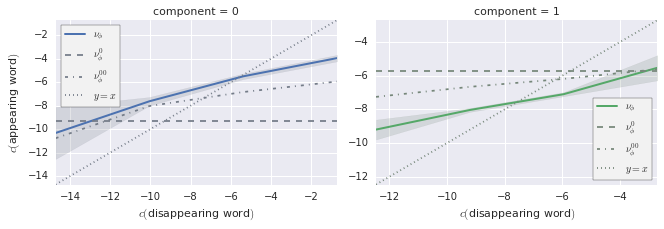

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1912 (cluster-unique) substitutions, but the PCA is in fact computed on 1567 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
   ** global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering


   ** global -> global
   ** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global
   ** global -> sentence-relative


    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------


Regressing global frequency with 1222 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.10204737194198765

intercept                      5.149621
global_aoa                     0.046589
global_clustering              0.043160
global_frequency               0.397901
global_letters_count          -0.020098
global_orthographic_density   -0.000227
global_synonyms_count         -0.044717
dtype: float64

Regressing global frequency with 1222 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.11966800181099402

intercept                                              12.885789
global_aoa                                             -0.469130
global_clustering                                       1.530579
global_frequency                                        0.128395
global_letters_count                                   -0.327822
global_orthographic_density                             0.752472
global_synonyms_count                                  -0.276021
global_ao

Regressing rel frequency with 1222 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.2842789313804227

intercept                  -1.437386
rel_aoa                     0.063151
rel_clustering              0.109423
rel_frequency               0.650218
rel_letters_count          -0.092170
rel_orthographic_density   -0.153520
rel_synonyms_count          0.003670
dtype: float64

Regressing rel frequency with 1222 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.29855018368081443

intercept                                       -1.473417
rel_aoa                                          0.044822
rel_clustering                                   0.179446
rel_frequency                                    0.677406
rel_letters_count                               -0.031575
rel_orthographic_density                        -0.228546
rel_synonyms_count                               0.170986
rel_aoa * rel_clustering                        -0.072132
rel_aoa * rel_frequency           

Regressing rel frequency with 1222 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.3720375824944512

intercept                      4.662449
global_aoa                     0.011713
global_clustering              0.164257
global_frequency              -0.543343
global_letters_count           0.127820
global_orthographic_density    0.121252
global_synonyms_count          0.061661
rel_aoa                        0.030837
rel_clustering                -0.124578
rel_frequency                  0.973666
rel_letters_count             -0.162919
rel_orthographic_density      -0.136235
rel_synonyms_count            -0.137002
dtype: float64

Regressing rel frequency with 1222 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.41405190862024466

intercept                                                -37.577760
global_aoa                                                 0.991240
global_clustering                                         -7.239545
global_frequency                 

Regressing global aoa with 1148 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.0451853716564914

intercept                   6.761617
rel_aoa                     0.108838
rel_clustering              0.339509
rel_frequency               0.062144
rel_letters_count           0.020040
rel_orthographic_density   -0.335321
rel_synonyms_count         -0.057097
dtype: float64

Regressing global aoa with 1148 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.0674802304198644

intercept                                        6.799792
rel_aoa                                         -0.089089
rel_clustering                                   0.215545
rel_frequency                                    0.089171
rel_letters_count                               -0.027152
rel_orthographic_density                        -0.468663
rel_synonyms_count                               0.060550
rel_aoa * rel_clustering                         0.028154
rel_aoa * rel_frequency                        

Regressing rel aoa with 1148 measures, no interactions
           ^^^^^^^
R^2 = 0.22269894923375633

intercept                      2.403602
global_aoa                    -0.377149
global_clustering             -0.040217
global_frequency              -0.008347
global_letters_count           0.125701
global_orthographic_density   -0.082162
global_synonyms_count         -0.088977
rel_aoa                        0.748636
rel_clustering                 0.130659
rel_frequency                 -0.039891
rel_letters_count             -0.108920
rel_orthographic_density       0.001217
rel_synonyms_count             0.018022
dtype: float64

Regressing rel aoa with 1148 measures, with interactions
           ^^^^^^^
R^2 = 0.27142952613185856

intercept                                                 49.655046
global_aoa                                                -1.063655
global_clustering                                          5.444221
global_frequency                                        

Regressing global clustering with 1023 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.06629884634974448

intercept                  -5.912485
rel_aoa                    -0.002922
rel_clustering              0.263014
rel_frequency              -0.012471
rel_letters_count          -0.000322
rel_orthographic_density   -0.003175
rel_synonyms_count         -0.071324
dtype: float64

Regressing global clustering with 1023 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.08971730062094019

intercept                                       -5.870192
rel_aoa                                         -0.011708
rel_clustering                                   0.088545
rel_frequency                                   -0.007183
rel_letters_count                               -0.029956
rel_orthographic_density                         0.000563
rel_synonyms_count                              -0.156304
rel_aoa * rel_clustering                         0.036705
rel_aoa * rel_fre

Regressing rel clustering with 1023 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.2956676732077258

intercept                     -1.585670
global_aoa                    -0.008434
global_clustering             -0.476207
global_frequency              -0.069411
global_letters_count          -0.043345
global_orthographic_density   -0.062981
global_synonyms_count         -0.018489
rel_aoa                       -0.011076
rel_clustering                 0.892261
rel_frequency                  0.044015
rel_letters_count              0.049561
rel_orthographic_density       0.060315
rel_synonyms_count            -0.034390
dtype: float64

Regressing rel clustering with 1023 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.38261654564449854

intercept                                                 11.142805
global_aoa                                                -0.065293
global_clustering                                          1.809287
global_frequency             

Regressing global letters_count with 1222 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.10262903624169362

intercept                   5.701485
rel_aoa                    -0.083698
rel_clustering              0.205182
rel_frequency               0.077593
rel_letters_count           0.292846
rel_orthographic_density   -0.267744
rel_synonyms_count         -0.248539
dtype: float64

Regressing global letters_count with 1222 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.11022989319675036

intercept                                        5.727219
rel_aoa                                         -0.150571
rel_clustering                                   0.162436
rel_frequency                                    0.138749
rel_letters_count                                0.334412
rel_orthographic_density                        -0.332756
rel_synonyms_count                              -0.074576
rel_aoa * rel_clustering                         0.047095
rel_a

Regressing rel letters_count with 1222 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.21072817063619897

intercept                     -1.018552
global_aoa                     0.077059
global_clustering             -0.310857
global_frequency               0.161985
global_letters_count          -0.357567
global_orthographic_density   -0.063851
global_synonyms_count         -0.371867
rel_aoa                       -0.124757
rel_clustering                 0.356761
rel_frequency                 -0.177754
rel_letters_count              0.745385
rel_orthographic_density      -0.024334
rel_synonyms_count             0.079834
dtype: float64

Regressing rel letters_count with 1222 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.2645364192871572

intercept                                                 11.199483
global_aoa                                                -0.795760
global_clustering                                         -1.118650
global_frequency 

Regressing global synonyms_count with 1187 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.04519537583451638

intercept                   0.356803
rel_aoa                    -0.006745
rel_clustering             -0.012602
rel_frequency              -0.011592
rel_letters_count           0.003977
rel_orthographic_density    0.029822
rel_synonyms_count          0.230918
dtype: float64

Regressing global synonyms_count with 1187 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.060819346016081965

intercept                                        0.364720
rel_aoa                                         -0.051455
rel_clustering                                  -0.052465
rel_frequency                                   -0.017823
rel_letters_count                               -0.012243
rel_orthographic_density                         0.051431
rel_synonyms_count                               0.168470
rel_aoa * rel_clustering                        -0.000254


Regressing rel synonyms_count with 1187 measures, no interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.19790690357399598

intercept                      0.870154
global_aoa                    -0.015206
global_clustering              0.048686
global_frequency              -0.019624
global_letters_count          -0.009756
global_orthographic_density   -0.006871
global_synonyms_count         -0.554398
rel_aoa                        0.002219
rel_clustering                -0.029632
rel_frequency                  0.008788
rel_letters_count              0.011281
rel_orthographic_density       0.015011
rel_synonyms_count             0.894609
dtype: float64

Regressing rel synonyms_count with 1187 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.26680053713878815

intercept                                                 13.594554
global_aoa                                                -0.526555
global_clustering                                          2.329133
global_frequ

Regressing global orthographic_density with 1059 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.11984489277629573

intercept                   1.621582
rel_aoa                     0.006861
rel_clustering             -0.091464
rel_frequency              -0.016372
rel_letters_count          -0.036522
rel_orthographic_density    0.313334
rel_synonyms_count          0.061659
dtype: float64

Regressing global orthographic_density with 1059 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.1307829022224244

intercept                                        1.569661
rel_aoa                                          0.050299
rel_clustering                                  -0.026875
rel_frequency                                   -0.036627
rel_letters_count                                0.003538
rel_orthographic_density                         0.334342
rel_synonyms_count                               0.209193
rel_aoa * rel_clustering            

Regressing rel orthographic_density with 1059 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.22516234820330994

intercept                      2.040222
global_aoa                    -0.035756
global_clustering              0.025747
global_frequency              -0.061048
global_letters_count          -0.111056
global_orthographic_density   -0.481473
global_synonyms_count          0.126907
rel_aoa                        0.034873
rel_clustering                -0.075934
rel_frequency                  0.072268
rel_letters_count              0.057708
rel_orthographic_density       0.800689
rel_synonyms_count            -0.059781
dtype: float64

Regressing rel orthographic_density with 1059 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.2646307800291178

intercept                                                -1.311812
global_aoa                                                0.032336
global_clustering                                         0